In [ ]:
#@title Mount your Google Drive
# If you run this notebook locally or on a cluster (i.e. not on Google Colab)
# you can delete this cell which is specific to Google Colab. You may also
# change the paths for data/logs in Arguments below.
%matplotlib inline
%load_ext autoreload
%autoreload 2

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/Othercomputers/'My Computer'/IFT6135_W25_A2_release/

checkpointing.py  main_base_trianing.ipynb  main_sanity_check.ipynb  README.md	       train.py
data.py		  main_data_scaling.ipynb   plots		     requirements.txt  Upload
gpt.py		  main_model_scaling.ipynb  plotter.py		     run_exp.py
lstm.py		  main_modulo.ipynb	    __pycache__		     trainer.py


In [ ]:
!ls /content/gdrive/MyDrive/'Colab Notebooks'/IFT6135_W25_A2_release/logs

0   11	14  17	2   22	25  28	30  33	36  39	41  44	47  5	6  9
1   12	15  18	20  23	26  29	31  34	37  4	42  45	48  50	7
10  13	16  19	21  24	27  3	32  35	38  40	43  46	49  51	8


In [ ]:
!ls /content/

gdrive	sample_data


In [ ]:
%cd /content/gdrive/MyDrive/'Colab Notebooks'/IFT6135_W25_A2_release

/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release


In [ ]:
import os
print("Current working directory:", os.getcwd())


Current working directory: /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release


In [ ]:
#@title Link your assignment folder & install requirements
#@markdown Enter the path to the assignment folder in your Google Drive
# If you run this notebook locally or on a cluster (i.e. not on Google Colab)
# you can delete this cell which is specific to Google Colab. You may also
# change the paths for data/logs in Arguments below.
import sys
import os
import shutil
import warnings

folder = "/content/gdrive/MyDrive/'Colab Notebooks'/IFT6135_W25_A2_release" #@param {type:"string"}
!ln -Ts "$folder" /content/assignment 2> /dev/null

# Add the assignment folder to Python path
if '/content/assignment' not in sys.path:
  sys.path.insert(0, '/content/assignment')

# Check if CUDA is available
import torch
if not torch.cuda.is_available():
  warnings.warn('CUDA is not available.')

In [ ]:
%matplotlib inline
import warnings

from dataclasses import dataclass
import torch
from torch import optim
from torchvision.datasets import CIFAR10
from torchvision import transforms
import json
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch.utils.data import DataLoader
import time
import os


# Testing batch sizes

## Training code

In [ ]:
import numpy as np
from train import Arguments, train_m_models
from checkpointing import get_extrema_performance_steps_per_trials
import pickle

# Define batch sizes and seeds
batch_sizes = [2**i for i in [5, 7, 9]]  # Selected batch sizes: 32, 128, 512
layer_counts = [1, 2, 3]                 # Number of layers to test
seeds = [0, 42]
T = 2 * 10**4 + 1

In [ ]:
print(range(5, 10))

range(5, 10)


In [ ]:
import torch
from train import Arguments, train_m_models
from plotter import plot_loss_accs
import matplotlib.pyplot as plt
import numpy as np

# Define batch sizes and seeds
batch_sizes = [2**i for i in [6, 7, 8]]  # Selected batch sizes: 32, 128, 512
layer_counts = [1, 2, 3]                 # Number of layers to test
seeds = [0, 42]
T = 2 * 10**4 + 1

# Store all metrics for plotting
all_results = {}

for num_layers in layer_counts:
    layer_results = {}
    for B in batch_sizes:
        args = Arguments()

        # === Data ===
        args.p = 31
        args.operator = "+"
        args.r_train = 0.5
        args.operation_orders = 2
        args.train_batch_size = B
        args.eval_batch_size = 2**12
        args.num_workers = 0

        # === Model ===
        args.model = 'lstm'
        args.num_heads = 4
        args.num_layers = num_layers  # Vary this parameter
        args.embedding_size = 2**7
        args.hidden_size = 2**7
        args.dropout = 0.0
        args.share_embeddings = False
        args.bias_classifier = True

        # === Optimization ===
        args.optimizer = 'adamw'
        args.lr = 1e-3
        args.weight_decay = 1e0

        # === Training ===
        args.n_steps = T
        args.eval_first = 10**2
        args.eval_period = 10**2
        args.print_step = 10**2
        args.save_model_step = 10**3
        args.save_statistic_step = 10**3

        # === Misc ===
        args.device = "cuda" if torch.cuda.is_available() else "cpu"
        args.exp_name = f"B={B}"
        args.exp_id = 0
        args.seed = 42

        args.verbose = True
         # Create hierarchical log directory structure
        base_log_dir = "/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs"
        model_dir = os.path.join(base_log_dir, args.model)  # Added lstm directory
        layer_dir = os.path.join(model_dir, f"layer_{num_layers}")
        batch_dir = os.path.join(layer_dir, f"b={B}")

        # Create directories if they don't exist
        os.makedirs(batch_dir, exist_ok=True)

        args.log_dir = batch_dir

        print(f"\n=== Training with batch size B={B}, layers={num_layers} ===")
        _, all_metrics, _ = train_m_models(args, M=len(seeds), seeds=seeds)

        layer_results[B] = all_metrics

    all_results[num_layers] = layer_results




=== Training with batch size B=64, layers=1 ===
Model 1/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 64
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 1
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=64
exp_id : 0
seed : 0
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_1/b=64
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0): LSTMCell(
        (input_gate): Linear(in_features=256, out_features=128, bias=True)
        (forget_gate): Linear(in_features=256, out_features=128, bias=True)
        (output_gate): Linear(in_features=256, out_features=128, bias=True)

Training:   0%|          | 0/2501 [00:00<?, ?it/s]


Train loss : 3.535554 | Train accuracy : 0.000000 | Test loss : 3.538541 | Test accuracy : 0.002079 | lr = 0.001


Training:   1%|          | 13/2501 [00:15<51:29,  1.24s/it]


Train loss : 1.709214 | Train accuracy : 0.056250 | Test loss : 1.773131 | Test accuracy : 0.008316 | lr = 0.001


Training:   1%|          | 26/2501 [00:17<06:55,  5.96it/s]


Train loss : 1.616845 | Train accuracy : 0.114583 | Test loss : 1.853561 | Test accuracy : 0.002079 | lr = 0.001


Training:   2%|▏         | 38/2501 [00:19<09:21,  4.39it/s]


Train loss : 1.414506 | Train accuracy : 0.331250 | Test loss : 2.036685 | Test accuracy : 0.000000 | lr = 0.001


Training:   2%|▏         | 51/2501 [00:22<06:56,  5.88it/s]


Train loss : 1.179903 | Train accuracy : 0.527083 | Test loss : 2.234790 | Test accuracy : 0.000000 | lr = 0.001


Training:   3%|▎         | 63/2501 [00:23<06:14,  6.51it/s]


Train loss : 0.938083 | Train accuracy : 0.733333 | Test loss : 2.421954 | Test accuracy : 0.000000 | lr = 0.001


Training:   3%|▎         | 76/2501 [00:25<06:04,  6.65it/s]


Train loss : 0.717798 | Train accuracy : 0.895833 | Test loss : 2.565790 | Test accuracy : 0.000000 | lr = 0.001


Training:   4%|▎         | 89/2501 [00:27<05:59,  6.71it/s]


Train loss : 0.541470 | Train accuracy : 0.966667 | Test loss : 2.675721 | Test accuracy : 0.000000 | lr = 0.001


Training:   4%|▍         | 101/2501 [00:29<05:45,  6.95it/s]


Train loss : 0.406913 | Train accuracy : 0.991667 | Test loss : 2.748674 | Test accuracy : 0.000000 | lr = 0.001


Training:   5%|▍         | 113/2501 [00:30<06:06,  6.51it/s]


Train loss : 0.315687 | Train accuracy : 0.995833 | Test loss : 2.778829 | Test accuracy : 0.000000 | lr = 0.001


Training:   5%|▍         | 125/2501 [00:32<08:50,  4.48it/s]


Train loss : 0.251049 | Train accuracy : 1.000000 | Test loss : 2.785950 | Test accuracy : 0.000000 | lr = 0.001


Training:   6%|▌         | 139/2501 [00:35<05:56,  6.62it/s]


Train loss : 0.212764 | Train accuracy : 1.000000 | Test loss : 2.773365 | Test accuracy : 0.000000 | lr = 0.001


Training:   6%|▌         | 151/2501 [00:36<05:59,  6.54it/s]


Train loss : 0.182235 | Train accuracy : 1.000000 | Test loss : 2.737525 | Test accuracy : 0.002079 | lr = 0.001


Training:   7%|▋         | 163/2501 [00:38<06:39,  5.85it/s]


Train loss : 0.163461 | Train accuracy : 1.000000 | Test loss : 2.697284 | Test accuracy : 0.002079 | lr = 0.001


Training:   7%|▋         | 175/2501 [00:42<16:13,  2.39it/s]


Train loss : 0.147161 | Train accuracy : 1.000000 | Test loss : 2.651218 | Test accuracy : 0.004158 | lr = 0.001


Training:   8%|▊         | 188/2501 [00:45<09:11,  4.20it/s]


Train loss : 0.136631 | Train accuracy : 1.000000 | Test loss : 2.608157 | Test accuracy : 0.006237 | lr = 0.001


Training:   8%|▊         | 201/2501 [00:48<05:49,  6.58it/s]


Train loss : 0.125444 | Train accuracy : 1.000000 | Test loss : 2.560145 | Test accuracy : 0.010395 | lr = 0.001


Training:   9%|▊         | 214/2501 [00:50<05:25,  7.03it/s]


Train loss : 0.118944 | Train accuracy : 1.000000 | Test loss : 2.510205 | Test accuracy : 0.008316 | lr = 0.001


Training:   9%|▉         | 226/2501 [00:51<05:26,  6.96it/s]


Train loss : 0.109396 | Train accuracy : 1.000000 | Test loss : 2.464577 | Test accuracy : 0.012474 | lr = 0.001


Training:  10%|▉         | 239/2501 [00:53<05:17,  7.12it/s]


Train loss : 0.104651 | Train accuracy : 1.000000 | Test loss : 2.411968 | Test accuracy : 0.014553 | lr = 0.001


Training:  10%|█         | 251/2501 [00:55<05:37,  6.67it/s]


Train loss : 0.098229 | Train accuracy : 1.000000 | Test loss : 2.371654 | Test accuracy : 0.016632 | lr = 0.001


Training:  11%|█         | 263/2501 [00:56<05:36,  6.66it/s]


Train loss : 0.093706 | Train accuracy : 1.000000 | Test loss : 2.322148 | Test accuracy : 0.024948 | lr = 0.001


Training:  11%|█         | 276/2501 [00:58<07:10,  5.16it/s]


Train loss : 0.088765 | Train accuracy : 1.000000 | Test loss : 2.286522 | Test accuracy : 0.037422 | lr = 0.001


Training:  12%|█▏        | 289/2501 [01:01<06:09,  5.98it/s]


Train loss : 0.084581 | Train accuracy : 1.000000 | Test loss : 2.240784 | Test accuracy : 0.037422 | lr = 0.001


Training:  12%|█▏        | 301/2501 [01:02<05:14,  7.00it/s]


Train loss : 0.080158 | Train accuracy : 1.000000 | Test loss : 2.197761 | Test accuracy : 0.039501 | lr = 0.001


Training:  13%|█▎        | 314/2501 [01:04<05:22,  6.79it/s]


Train loss : 0.076373 | Train accuracy : 1.000000 | Test loss : 2.157077 | Test accuracy : 0.051975 | lr = 0.001


Training:  13%|█▎        | 326/2501 [01:06<05:20,  6.78it/s]


Train loss : 0.072077 | Train accuracy : 1.000000 | Test loss : 2.111339 | Test accuracy : 0.056133 | lr = 0.001


Training:  14%|█▎        | 339/2501 [01:07<05:12,  6.92it/s]


Train loss : 0.070185 | Train accuracy : 1.000000 | Test loss : 2.071116 | Test accuracy : 0.062370 | lr = 0.001


Training:  14%|█▍        | 351/2501 [01:09<05:07,  6.98it/s]


Train loss : 0.065926 | Train accuracy : 1.000000 | Test loss : 2.020321 | Test accuracy : 0.066528 | lr = 0.001


Training:  15%|█▍        | 363/2501 [01:12<09:49,  3.63it/s]


Train loss : 0.063888 | Train accuracy : 1.000000 | Test loss : 1.981732 | Test accuracy : 0.064449 | lr = 0.001


Training:  15%|█▌        | 376/2501 [01:14<05:41,  6.22it/s]


Train loss : 0.061015 | Train accuracy : 1.000000 | Test loss : 1.941573 | Test accuracy : 0.085239 | lr = 0.001


Training:  16%|█▌        | 389/2501 [01:16<05:04,  6.93it/s]


Train loss : 0.059154 | Train accuracy : 1.000000 | Test loss : 1.904806 | Test accuracy : 0.081081 | lr = 0.001


Training:  16%|█▌        | 401/2501 [01:17<05:03,  6.93it/s]


Train loss : 0.054956 | Train accuracy : 1.000000 | Test loss : 1.855217 | Test accuracy : 0.091476 | lr = 0.001


Training:  17%|█▋        | 414/2501 [01:19<05:07,  6.79it/s]


Train loss : 0.053666 | Train accuracy : 1.000000 | Test loss : 1.822568 | Test accuracy : 0.091476 | lr = 0.001


Training:  17%|█▋        | 426/2501 [01:21<04:57,  6.97it/s]


Train loss : 0.051163 | Train accuracy : 1.000000 | Test loss : 1.791788 | Test accuracy : 0.116424 | lr = 0.001


Training:  18%|█▊        | 439/2501 [01:23<04:58,  6.90it/s]


Train loss : 0.048931 | Train accuracy : 1.000000 | Test loss : 1.739357 | Test accuracy : 0.114345 | lr = 0.001


Training:  18%|█▊        | 450/2501 [01:26<15:13,  2.24it/s]


Train loss : 0.046896 | Train accuracy : 1.000000 | Test loss : 1.705737 | Test accuracy : 0.122661 | lr = 0.001


Training:  19%|█▊        | 464/2501 [01:28<05:03,  6.72it/s]


Train loss : 0.045444 | Train accuracy : 1.000000 | Test loss : 1.677369 | Test accuracy : 0.143451 | lr = 0.001


Training:  19%|█▉        | 476/2501 [01:30<04:41,  7.19it/s]


Train loss : 0.042938 | Train accuracy : 1.000000 | Test loss : 1.631548 | Test accuracy : 0.145530 | lr = 0.001


Training:  20%|█▉        | 489/2501 [01:32<04:48,  6.97it/s]


Train loss : 0.042029 | Train accuracy : 1.000000 | Test loss : 1.602536 | Test accuracy : 0.164241 | lr = 0.001


Training:  20%|██        | 501/2501 [01:33<05:05,  6.54it/s]


Train loss : 0.039888 | Train accuracy : 1.000000 | Test loss : 1.562362 | Test accuracy : 0.172557 | lr = 0.001


Training:  21%|██        | 514/2501 [01:35<04:43,  7.01it/s]


Train loss : 0.037851 | Train accuracy : 1.000000 | Test loss : 1.528996 | Test accuracy : 0.197505 | lr = 0.001


Training:  21%|██        | 526/2501 [01:37<05:00,  6.57it/s]


Train loss : 0.036406 | Train accuracy : 1.000000 | Test loss : 1.491958 | Test accuracy : 0.218295 | lr = 0.001


Training:  22%|██▏       | 538/2501 [01:39<06:30,  5.03it/s]


Train loss : 0.035745 | Train accuracy : 1.000000 | Test loss : 1.467382 | Test accuracy : 0.218295 | lr = 0.001


Training:  22%|██▏       | 551/2501 [01:41<04:40,  6.94it/s]


Train loss : 0.033582 | Train accuracy : 1.000000 | Test loss : 1.418101 | Test accuracy : 0.234927 | lr = 0.001


Training:  23%|██▎       | 564/2501 [01:43<04:39,  6.93it/s]


Train loss : 0.032623 | Train accuracy : 1.000000 | Test loss : 1.394976 | Test accuracy : 0.243243 | lr = 0.001


Training:  23%|██▎       | 576/2501 [01:44<04:36,  6.97it/s]


Train loss : 0.030776 | Train accuracy : 1.000000 | Test loss : 1.364284 | Test accuracy : 0.259875 | lr = 0.001


Training:  24%|██▎       | 589/2501 [01:46<04:34,  6.96it/s]


Train loss : 0.029765 | Train accuracy : 1.000000 | Test loss : 1.327935 | Test accuracy : 0.270270 | lr = 0.001


Training:  24%|██▍       | 601/2501 [01:48<04:36,  6.86it/s]


Train loss : 0.028465 | Train accuracy : 1.000000 | Test loss : 1.300147 | Test accuracy : 0.299376 | lr = 0.001


Training:  25%|██▍       | 614/2501 [01:50<04:25,  7.09it/s]


Train loss : 0.027297 | Train accuracy : 1.000000 | Test loss : 1.272109 | Test accuracy : 0.303534 | lr = 0.001


Training:  25%|██▍       | 625/2501 [01:52<06:48,  4.59it/s]


Train loss : 0.026166 | Train accuracy : 1.000000 | Test loss : 1.243776 | Test accuracy : 0.318087 | lr = 0.001


Training:  26%|██▌       | 639/2501 [01:54<04:28,  6.94it/s]


Train loss : 0.025232 | Train accuracy : 1.000000 | Test loss : 1.216844 | Test accuracy : 0.334719 | lr = 0.001


Training:  26%|██▌       | 651/2501 [01:55<04:29,  6.87it/s]


Train loss : 0.024045 | Train accuracy : 1.000000 | Test loss : 1.185124 | Test accuracy : 0.347193 | lr = 0.001


Training:  27%|██▋       | 663/2501 [01:57<04:38,  6.60it/s]


Train loss : 0.023602 | Train accuracy : 1.000000 | Test loss : 1.161646 | Test accuracy : 0.359667 | lr = 0.001


Training:  27%|██▋       | 676/2501 [01:59<04:17,  7.08it/s]


Train loss : 0.022265 | Train accuracy : 1.000000 | Test loss : 1.134366 | Test accuracy : 0.384615 | lr = 0.001


Training:  28%|██▊       | 689/2501 [02:01<04:20,  6.95it/s]


Train loss : 0.021754 | Train accuracy : 1.000000 | Test loss : 1.099611 | Test accuracy : 0.395010 | lr = 0.001


Training:  28%|██▊       | 701/2501 [02:02<04:30,  6.67it/s]


Train loss : 0.020368 | Train accuracy : 1.000000 | Test loss : 1.076985 | Test accuracy : 0.411642 | lr = 0.001


Training:  29%|██▊       | 713/2501 [02:04<06:16,  4.75it/s]


Train loss : 0.020055 | Train accuracy : 1.000000 | Test loss : 1.057310 | Test accuracy : 0.413721 | lr = 0.001


Training:  29%|██▉       | 726/2501 [02:07<04:46,  6.20it/s]


Train loss : 0.019260 | Train accuracy : 1.000000 | Test loss : 1.030663 | Test accuracy : 0.430353 | lr = 0.001


Training:  30%|██▉       | 739/2501 [02:08<04:11,  7.00it/s]


Train loss : 0.018441 | Train accuracy : 1.000000 | Test loss : 1.009740 | Test accuracy : 0.451143 | lr = 0.001


Training:  30%|███       | 751/2501 [02:10<04:23,  6.64it/s]


Train loss : 0.017443 | Train accuracy : 1.000000 | Test loss : 0.982331 | Test accuracy : 0.465696 | lr = 0.001


Training:  31%|███       | 764/2501 [02:12<04:11,  6.90it/s]


Train loss : 0.017282 | Train accuracy : 1.000000 | Test loss : 0.954497 | Test accuracy : 0.478170 | lr = 0.001


Training:  31%|███       | 776/2501 [02:13<04:03,  7.09it/s]


Train loss : 0.016005 | Train accuracy : 1.000000 | Test loss : 0.936670 | Test accuracy : 0.490644 | lr = 0.001


Training:  32%|███▏      | 789/2501 [02:15<04:04,  7.01it/s]


Train loss : 0.015634 | Train accuracy : 1.000000 | Test loss : 0.921059 | Test accuracy : 0.496882 | lr = 0.001


Training:  32%|███▏      | 800/2501 [02:17<05:38,  5.02it/s]


Train loss : 0.015035 | Train accuracy : 1.000000 | Test loss : 0.900872 | Test accuracy : 0.517672 | lr = 0.001


Training:  33%|███▎      | 814/2501 [02:19<04:30,  6.24it/s]


Train loss : 0.014429 | Train accuracy : 1.000000 | Test loss : 0.878441 | Test accuracy : 0.536383 | lr = 0.001


Training:  33%|███▎      | 826/2501 [02:21<04:05,  6.83it/s]


Train loss : 0.013807 | Train accuracy : 1.000000 | Test loss : 0.855329 | Test accuracy : 0.536383 | lr = 0.001


Training:  34%|███▎      | 839/2501 [02:23<03:55,  7.06it/s]


Train loss : 0.013420 | Train accuracy : 1.000000 | Test loss : 0.843694 | Test accuracy : 0.563410 | lr = 0.001


Training:  34%|███▍      | 851/2501 [02:24<03:55,  7.01it/s]


Train loss : 0.012782 | Train accuracy : 1.000000 | Test loss : 0.825646 | Test accuracy : 0.561331 | lr = 0.001


Training:  35%|███▍      | 864/2501 [02:26<03:54,  6.97it/s]


Train loss : 0.012108 | Train accuracy : 1.000000 | Test loss : 0.808230 | Test accuracy : 0.565489 | lr = 0.001


Training:  35%|███▌      | 876/2501 [02:28<05:19,  5.08it/s]


Train loss : 0.011628 | Train accuracy : 1.000000 | Test loss : 0.785102 | Test accuracy : 0.590437 | lr = 0.001


Training:  36%|███▌      | 888/2501 [02:30<05:28,  4.91it/s]


Train loss : 0.011176 | Train accuracy : 1.000000 | Test loss : 0.771060 | Test accuracy : 0.590437 | lr = 0.001


Training:  36%|███▌      | 901/2501 [02:32<04:34,  5.83it/s]


Train loss : 0.010641 | Train accuracy : 1.000000 | Test loss : 0.751896 | Test accuracy : 0.611227 | lr = 0.001


Training:  37%|███▋      | 914/2501 [02:34<03:47,  6.97it/s]


Train loss : 0.010456 | Train accuracy : 1.000000 | Test loss : 0.747618 | Test accuracy : 0.607069 | lr = 0.001


Training:  37%|███▋      | 926/2501 [02:36<03:44,  7.02it/s]


Train loss : 0.009882 | Train accuracy : 1.000000 | Test loss : 0.728064 | Test accuracy : 0.625780 | lr = 0.001


Training:  38%|███▊      | 938/2501 [02:37<03:55,  6.63it/s]


Train loss : 0.009642 | Train accuracy : 1.000000 | Test loss : 0.710045 | Test accuracy : 0.627859 | lr = 0.001


Training:  38%|███▊      | 951/2501 [02:39<03:38,  7.08it/s]


Train loss : 0.009126 | Train accuracy : 1.000000 | Test loss : 0.693872 | Test accuracy : 0.636175 | lr = 0.001


Training:  39%|███▊      | 964/2501 [02:41<03:41,  6.93it/s]


Train loss : 0.008913 | Train accuracy : 1.000000 | Test loss : 0.686294 | Test accuracy : 0.638254 | lr = 0.001


Training:  39%|███▉      | 976/2501 [02:43<04:45,  5.35it/s]


Train loss : 0.008397 | Train accuracy : 1.000000 | Test loss : 0.666199 | Test accuracy : 0.654886 | lr = 0.001


Training:  40%|███▉      | 989/2501 [02:45<04:39,  5.42it/s]


Train loss : 0.008163 | Train accuracy : 1.000000 | Test loss : 0.660829 | Test accuracy : 0.667360 | lr = 0.001


Training:  40%|████      | 1001/2501 [02:47<03:41,  6.77it/s]


Train loss : 0.007750 | Train accuracy : 1.000000 | Test loss : 0.645024 | Test accuracy : 0.661123 | lr = 0.001


Training:  41%|████      | 1014/2501 [02:48<03:34,  6.92it/s]


Train loss : 0.007669 | Train accuracy : 1.000000 | Test loss : 0.629266 | Test accuracy : 0.677755 | lr = 0.001


Training:  41%|████      | 1026/2501 [02:50<03:32,  6.94it/s]


Train loss : 0.007161 | Train accuracy : 1.000000 | Test loss : 0.614866 | Test accuracy : 0.686071 | lr = 0.001


Training:  42%|████▏     | 1039/2501 [02:52<03:31,  6.90it/s]


Train loss : 0.006977 | Train accuracy : 1.000000 | Test loss : 0.606801 | Test accuracy : 0.677755 | lr = 0.001


Training:  42%|████▏     | 1051/2501 [02:53<03:27,  7.00it/s]


Train loss : 0.006653 | Train accuracy : 1.000000 | Test loss : 0.592750 | Test accuracy : 0.692308 | lr = 0.001


Training:  43%|████▎     | 1063/2501 [02:55<04:26,  5.41it/s]


Train loss : 0.006480 | Train accuracy : 1.000000 | Test loss : 0.586353 | Test accuracy : 0.700624 | lr = 0.001


Training:  43%|████▎     | 1076/2501 [02:58<04:59,  4.75it/s]


Train loss : 0.006166 | Train accuracy : 1.000000 | Test loss : 0.569077 | Test accuracy : 0.708940 | lr = 0.001


Training:  44%|████▎     | 1089/2501 [02:59<03:24,  6.90it/s]


Train loss : 0.005976 | Train accuracy : 1.000000 | Test loss : 0.551543 | Test accuracy : 0.731809 | lr = 0.001


Training:  44%|████▍     | 1101/2501 [03:01<03:19,  7.01it/s]


Train loss : 0.005633 | Train accuracy : 1.000000 | Test loss : 0.545081 | Test accuracy : 0.721414 | lr = 0.001


Training:  45%|████▍     | 1114/2501 [03:03<03:15,  7.08it/s]


Train loss : 0.005491 | Train accuracy : 1.000000 | Test loss : 0.526214 | Test accuracy : 0.731809 | lr = 0.001


Training:  45%|████▌     | 1126/2501 [03:04<03:29,  6.56it/s]


Train loss : 0.005226 | Train accuracy : 1.000000 | Test loss : 0.519459 | Test accuracy : 0.731809 | lr = 0.001


Training:  46%|████▌     | 1139/2501 [03:06<03:16,  6.93it/s]


Train loss : 0.005113 | Train accuracy : 1.000000 | Test loss : 0.511644 | Test accuracy : 0.735967 | lr = 0.001


Training:  46%|████▌     | 1151/2501 [03:08<03:36,  6.25it/s]


Train loss : 0.004817 | Train accuracy : 1.000000 | Test loss : 0.504592 | Test accuracy : 0.735967 | lr = 0.001


Training:  47%|████▋     | 1163/2501 [03:10<04:35,  4.86it/s]


Train loss : 0.004646 | Train accuracy : 1.000000 | Test loss : 0.489262 | Test accuracy : 0.752599 | lr = 0.001


Training:  47%|████▋     | 1176/2501 [03:12<03:10,  6.97it/s]


Train loss : 0.004435 | Train accuracy : 1.000000 | Test loss : 0.479624 | Test accuracy : 0.752599 | lr = 0.001


Training:  48%|████▊     | 1189/2501 [03:14<03:09,  6.92it/s]


Train loss : 0.004317 | Train accuracy : 1.000000 | Test loss : 0.472262 | Test accuracy : 0.760915 | lr = 0.001


Training:  48%|████▊     | 1201/2501 [03:15<03:05,  7.01it/s]


Train loss : 0.004127 | Train accuracy : 1.000000 | Test loss : 0.461567 | Test accuracy : 0.767152 | lr = 0.001


Training:  49%|████▊     | 1214/2501 [03:17<03:02,  7.04it/s]


Train loss : 0.004055 | Train accuracy : 1.000000 | Test loss : 0.456259 | Test accuracy : 0.760915 | lr = 0.001


Training:  49%|████▉     | 1226/2501 [03:19<03:02,  7.00it/s]


Train loss : 0.003789 | Train accuracy : 1.000000 | Test loss : 0.445515 | Test accuracy : 0.769231 | lr = 0.001


Training:  50%|████▉     | 1239/2501 [03:20<02:58,  7.07it/s]


Train loss : 0.003725 | Train accuracy : 1.000000 | Test loss : 0.437629 | Test accuracy : 0.787942 | lr = 0.001


Training:  50%|████▉     | 1250/2501 [03:23<04:37,  4.51it/s]


Train loss : 0.003562 | Train accuracy : 1.000000 | Test loss : 0.432349 | Test accuracy : 0.779626 | lr = 0.001


Training:  51%|█████     | 1264/2501 [03:25<03:06,  6.62it/s]


Train loss : 0.003462 | Train accuracy : 1.000000 | Test loss : 0.425576 | Test accuracy : 0.794179 | lr = 0.001


Training:  51%|█████     | 1276/2501 [03:26<02:54,  7.00it/s]


Train loss : 0.003282 | Train accuracy : 1.000000 | Test loss : 0.421840 | Test accuracy : 0.781705 | lr = 0.001


Training:  52%|█████▏    | 1289/2501 [03:28<02:56,  6.87it/s]


Train loss : 0.003151 | Train accuracy : 1.000000 | Test loss : 0.413662 | Test accuracy : 0.790021 | lr = 0.001


Training:  52%|█████▏    | 1301/2501 [03:30<02:49,  7.07it/s]


Train loss : 0.003020 | Train accuracy : 1.000000 | Test loss : 0.402386 | Test accuracy : 0.798337 | lr = 0.001


Training:  53%|█████▎    | 1314/2501 [03:32<02:48,  7.03it/s]


Train loss : 0.003000 | Train accuracy : 1.000000 | Test loss : 0.397872 | Test accuracy : 0.808732 | lr = 0.001


Training:  53%|█████▎    | 1326/2501 [03:33<02:51,  6.86it/s]


Train loss : 0.002797 | Train accuracy : 1.000000 | Test loss : 0.390617 | Test accuracy : 0.810811 | lr = 0.001


Training:  53%|█████▎    | 1338/2501 [03:35<04:09,  4.67it/s]


Train loss : 0.002728 | Train accuracy : 1.000000 | Test loss : 0.384009 | Test accuracy : 0.798337 | lr = 0.001


Training:  54%|█████▍    | 1351/2501 [03:37<02:57,  6.48it/s]


Train loss : 0.002586 | Train accuracy : 1.000000 | Test loss : 0.371321 | Test accuracy : 0.831601 | lr = 0.001


Training:  54%|█████▍    | 1363/2501 [03:39<02:47,  6.79it/s]


Train loss : 0.002512 | Train accuracy : 1.000000 | Test loss : 0.371757 | Test accuracy : 0.827443 | lr = 0.001


Training:  55%|█████▌    | 1376/2501 [03:41<02:46,  6.75it/s]


Train loss : 0.002398 | Train accuracy : 1.000000 | Test loss : 0.363995 | Test accuracy : 0.827443 | lr = 0.001


Training:  56%|█████▌    | 1389/2501 [03:43<02:38,  7.02it/s]


Train loss : 0.002306 | Train accuracy : 1.000000 | Test loss : 0.356658 | Test accuracy : 0.833680 | lr = 0.001


Training:  56%|█████▌    | 1401/2501 [03:44<02:37,  6.97it/s]


Train loss : 0.002224 | Train accuracy : 1.000000 | Test loss : 0.352350 | Test accuracy : 0.839917 | lr = 0.001


Training:  57%|█████▋    | 1414/2501 [03:46<02:34,  7.04it/s]


Train loss : 0.002185 | Train accuracy : 1.000000 | Test loss : 0.347285 | Test accuracy : 0.844075 | lr = 0.001


Training:  57%|█████▋    | 1426/2501 [03:48<03:35,  4.98it/s]


Train loss : 0.002068 | Train accuracy : 1.000000 | Test loss : 0.334507 | Test accuracy : 0.852391 | lr = 0.001


Training:  58%|█████▊    | 1439/2501 [03:50<02:47,  6.32it/s]


Train loss : 0.001986 | Train accuracy : 1.000000 | Test loss : 0.334734 | Test accuracy : 0.848233 | lr = 0.001


Training:  58%|█████▊    | 1451/2501 [03:52<02:31,  6.92it/s]


Train loss : 0.001891 | Train accuracy : 1.000000 | Test loss : 0.325460 | Test accuracy : 0.852391 | lr = 0.001


Training:  59%|█████▊    | 1464/2501 [03:54<02:26,  7.07it/s]


Train loss : 0.001853 | Train accuracy : 1.000000 | Test loss : 0.319859 | Test accuracy : 0.850312 | lr = 0.001


Training:  59%|█████▉    | 1476/2501 [03:55<02:28,  6.89it/s]


Train loss : 0.001781 | Train accuracy : 1.000000 | Test loss : 0.317156 | Test accuracy : 0.862786 | lr = 0.001


Training:  60%|█████▉    | 1489/2501 [03:57<02:26,  6.91it/s]


Train loss : 0.001713 | Train accuracy : 1.000000 | Test loss : 0.307247 | Test accuracy : 0.856549 | lr = 0.001


Training:  60%|██████    | 1501/2501 [03:59<02:32,  6.56it/s]


Train loss : 0.001654 | Train accuracy : 1.000000 | Test loss : 0.302223 | Test accuracy : 0.866944 | lr = 0.001


Training:  60%|██████    | 1513/2501 [04:01<03:19,  4.95it/s]


Train loss : 0.001573 | Train accuracy : 1.000000 | Test loss : 0.301744 | Test accuracy : 0.877339 | lr = 0.001


Training:  61%|██████    | 1526/2501 [04:03<02:45,  5.90it/s]


Train loss : 0.001500 | Train accuracy : 1.000000 | Test loss : 0.291163 | Test accuracy : 0.879418 | lr = 0.001


Training:  62%|██████▏   | 1539/2501 [04:05<02:17,  6.98it/s]


Train loss : 0.001483 | Train accuracy : 1.000000 | Test loss : 0.291552 | Test accuracy : 0.881497 | lr = 0.001


Training:  62%|██████▏   | 1551/2501 [04:06<02:21,  6.73it/s]


Train loss : 0.001398 | Train accuracy : 1.000000 | Test loss : 0.284893 | Test accuracy : 0.883576 | lr = 0.001


Training:  63%|██████▎   | 1564/2501 [04:08<02:16,  6.85it/s]


Train loss : 0.001361 | Train accuracy : 1.000000 | Test loss : 0.275584 | Test accuracy : 0.896050 | lr = 0.001


Training:  63%|██████▎   | 1576/2501 [04:10<02:14,  6.86it/s]


Train loss : 0.001298 | Train accuracy : 1.000000 | Test loss : 0.269903 | Test accuracy : 0.896050 | lr = 0.001


Training:  64%|██████▎   | 1589/2501 [04:12<02:14,  6.77it/s]


Train loss : 0.001255 | Train accuracy : 1.000000 | Test loss : 0.269607 | Test accuracy : 0.891892 | lr = 0.001


Training:  64%|██████▍   | 1601/2501 [04:13<02:50,  5.26it/s]


Train loss : 0.001201 | Train accuracy : 1.000000 | Test loss : 0.259826 | Test accuracy : 0.893971 | lr = 0.001


Training:  65%|██████▍   | 1614/2501 [04:16<02:38,  5.58it/s]


Train loss : 0.001157 | Train accuracy : 1.000000 | Test loss : 0.255702 | Test accuracy : 0.910603 | lr = 0.001


Training:  65%|██████▌   | 1626/2501 [04:18<02:16,  6.42it/s]


Train loss : 0.001106 | Train accuracy : 1.000000 | Test loss : 0.249198 | Test accuracy : 0.908524 | lr = 0.001


Training:  66%|██████▌   | 1639/2501 [04:19<02:03,  6.96it/s]


Train loss : 0.001082 | Train accuracy : 1.000000 | Test loss : 0.246100 | Test accuracy : 0.906445 | lr = 0.001


Training:  66%|██████▌   | 1651/2501 [04:21<02:01,  7.01it/s]


Train loss : 0.001025 | Train accuracy : 1.000000 | Test loss : 0.239424 | Test accuracy : 0.912682 | lr = 0.001


Training:  66%|██████▋   | 1663/2501 [04:23<02:10,  6.42it/s]


Train loss : 0.001006 | Train accuracy : 1.000000 | Test loss : 0.234590 | Test accuracy : 0.912682 | lr = 0.001


Training:  67%|██████▋   | 1676/2501 [04:24<01:56,  7.06it/s]


Train loss : 0.000942 | Train accuracy : 1.000000 | Test loss : 0.232621 | Test accuracy : 0.912682 | lr = 0.001


Training:  67%|██████▋   | 1688/2501 [04:26<02:31,  5.36it/s]


Train loss : 0.000923 | Train accuracy : 1.000000 | Test loss : 0.228045 | Test accuracy : 0.918919 | lr = 0.001


Training:  68%|██████▊   | 1700/2501 [04:28<02:52,  4.65it/s]


Train loss : 0.000870 | Train accuracy : 1.000000 | Test loss : 0.219887 | Test accuracy : 0.918919 | lr = 0.001


Training:  69%|██████▊   | 1714/2501 [04:30<01:54,  6.88it/s]


Train loss : 0.000853 | Train accuracy : 1.000000 | Test loss : 0.217304 | Test accuracy : 0.925156 | lr = 0.001


Training:  69%|██████▉   | 1726/2501 [04:32<01:52,  6.86it/s]


Train loss : 0.000811 | Train accuracy : 1.000000 | Test loss : 0.212787 | Test accuracy : 0.927235 | lr = 0.001


Training:  70%|██████▉   | 1739/2501 [04:34<01:51,  6.85it/s]


Train loss : 0.000798 | Train accuracy : 1.000000 | Test loss : 0.210649 | Test accuracy : 0.929314 | lr = 0.001


Training:  70%|███████   | 1751/2501 [04:35<01:55,  6.50it/s]


Train loss : 0.000754 | Train accuracy : 1.000000 | Test loss : 0.201783 | Test accuracy : 0.927235 | lr = 0.001


Training:  70%|███████   | 1763/2501 [04:37<01:52,  6.55it/s]


Train loss : 0.000736 | Train accuracy : 1.000000 | Test loss : 0.200888 | Test accuracy : 0.927235 | lr = 0.001


Training:  71%|███████   | 1776/2501 [04:39<01:55,  6.25it/s]


Train loss : 0.000695 | Train accuracy : 1.000000 | Test loss : 0.196352 | Test accuracy : 0.927235 | lr = 0.001


Training:  71%|███████▏  | 1788/2501 [04:41<02:28,  4.79it/s]


Train loss : 0.000676 | Train accuracy : 1.000000 | Test loss : 0.192286 | Test accuracy : 0.937630 | lr = 0.001


Training:  72%|███████▏  | 1801/2501 [04:43<01:40,  6.98it/s]


Train loss : 0.000645 | Train accuracy : 1.000000 | Test loss : 0.192539 | Test accuracy : 0.925156 | lr = 0.001


Training:  73%|███████▎  | 1814/2501 [04:45<02:07,  5.41it/s]


Train loss : 0.000653 | Train accuracy : 1.000000 | Test loss : 0.191192 | Test accuracy : 0.920998 | lr = 0.001


Training:  73%|███████▎  | 1826/2501 [04:47<01:37,  6.95it/s]


Train loss : 0.000595 | Train accuracy : 1.000000 | Test loss : 0.181412 | Test accuracy : 0.937630 | lr = 0.001


Training:  73%|███████▎  | 1838/2501 [04:48<01:38,  6.73it/s]


Train loss : 0.000588 | Train accuracy : 1.000000 | Test loss : 0.179696 | Test accuracy : 0.941788 | lr = 0.001


Training:  74%|███████▍  | 1851/2501 [04:50<01:35,  6.83it/s]


Train loss : 0.000552 | Train accuracy : 1.000000 | Test loss : 0.177133 | Test accuracy : 0.939709 | lr = 0.001


Training:  74%|███████▍  | 1863/2501 [04:52<01:39,  6.39it/s]


Train loss : 0.000541 | Train accuracy : 1.000000 | Test loss : 0.173058 | Test accuracy : 0.935551 | lr = 0.001


Training:  75%|███████▍  | 1875/2501 [04:54<02:17,  4.56it/s]


Train loss : 0.000514 | Train accuracy : 1.000000 | Test loss : 0.169589 | Test accuracy : 0.943867 | lr = 0.001


Training:  76%|███████▌  | 1889/2501 [04:56<01:28,  6.91it/s]


Train loss : 0.000503 | Train accuracy : 1.000000 | Test loss : 0.169990 | Test accuracy : 0.933472 | lr = 0.001


Training:  76%|███████▌  | 1901/2501 [04:58<01:27,  6.85it/s]


Train loss : 0.000478 | Train accuracy : 1.000000 | Test loss : 0.163273 | Test accuracy : 0.948025 | lr = 0.001


Training:  77%|███████▋  | 1914/2501 [04:59<01:23,  7.00it/s]


Train loss : 0.000465 | Train accuracy : 1.000000 | Test loss : 0.162230 | Test accuracy : 0.945946 | lr = 0.001


Training:  77%|███████▋  | 1926/2501 [05:01<01:31,  6.30it/s]


Train loss : 0.000448 | Train accuracy : 1.000000 | Test loss : 0.161862 | Test accuracy : 0.941788 | lr = 0.001


Training:  77%|███████▋  | 1938/2501 [05:03<01:44,  5.37it/s]


Train loss : 0.000430 | Train accuracy : 1.000000 | Test loss : 0.155718 | Test accuracy : 0.945946 | lr = 0.001


Training:  78%|███████▊  | 1950/2501 [05:05<01:46,  5.17it/s]


Train loss : 0.000410 | Train accuracy : 1.000000 | Test loss : 0.151896 | Test accuracy : 0.952183 | lr = 0.001


Training:  78%|███████▊  | 1963/2501 [05:07<02:01,  4.43it/s]


Train loss : 0.000397 | Train accuracy : 1.000000 | Test loss : 0.156511 | Test accuracy : 0.945946 | lr = 0.001


Training:  79%|███████▉  | 1976/2501 [05:09<01:20,  6.50it/s]


Train loss : 0.000381 | Train accuracy : 1.000000 | Test loss : 0.149212 | Test accuracy : 0.950104 | lr = 0.001


Training:  80%|███████▉  | 1989/2501 [05:11<01:15,  6.79it/s]


Train loss : 0.000369 | Train accuracy : 1.000000 | Test loss : 0.145441 | Test accuracy : 0.948025 | lr = 0.001


Training:  80%|████████  | 2001/2501 [05:13<01:17,  6.45it/s]


Train loss : 0.000350 | Train accuracy : 1.000000 | Test loss : 0.143655 | Test accuracy : 0.945946 | lr = 0.001


Training:  81%|████████  | 2014/2501 [05:15<01:10,  6.87it/s]


Train loss : 0.000346 | Train accuracy : 1.000000 | Test loss : 0.142272 | Test accuracy : 0.950104 | lr = 0.001


Training:  81%|████████  | 2026/2501 [05:16<01:10,  6.77it/s]


Train loss : 0.000326 | Train accuracy : 1.000000 | Test loss : 0.138076 | Test accuracy : 0.956341 | lr = 0.001


Training:  81%|████████▏ | 2038/2501 [05:18<01:29,  5.19it/s]


Train loss : 0.000322 | Train accuracy : 1.000000 | Test loss : 0.136813 | Test accuracy : 0.956341 | lr = 0.001


Training:  82%|████████▏ | 2050/2501 [05:20<01:40,  4.47it/s]


Train loss : 0.000302 | Train accuracy : 1.000000 | Test loss : 0.135774 | Test accuracy : 0.958420 | lr = 0.001


Training:  82%|████████▏ | 2063/2501 [05:22<01:08,  6.36it/s]


Train loss : 0.000298 | Train accuracy : 1.000000 | Test loss : 0.135997 | Test accuracy : 0.948025 | lr = 0.001


Training:  83%|████████▎ | 2076/2501 [05:24<01:00,  6.99it/s]


Train loss : 0.000281 | Train accuracy : 1.000000 | Test loss : 0.130249 | Test accuracy : 0.954262 | lr = 0.001


Training:  84%|████████▎ | 2089/2501 [05:26<00:59,  6.92it/s]


Train loss : 0.000274 | Train accuracy : 1.000000 | Test loss : 0.132127 | Test accuracy : 0.956341 | lr = 0.001


Training:  84%|████████▍ | 2101/2501 [05:27<00:59,  6.77it/s]


Train loss : 0.000262 | Train accuracy : 1.000000 | Test loss : 0.127096 | Test accuracy : 0.956341 | lr = 0.001


Training:  85%|████████▍ | 2114/2501 [05:29<00:56,  6.80it/s]


Train loss : 0.000261 | Train accuracy : 1.000000 | Test loss : 0.127915 | Test accuracy : 0.958420 | lr = 0.001


Training:  85%|████████▍ | 2125/2501 [05:31<01:13,  5.08it/s]


Train loss : 0.000242 | Train accuracy : 1.000000 | Test loss : 0.123474 | Test accuracy : 0.958420 | lr = 0.001


Training:  85%|████████▌ | 2138/2501 [05:33<01:21,  4.47it/s]


Train loss : 0.000235 | Train accuracy : 1.000000 | Test loss : 0.125759 | Test accuracy : 0.956341 | lr = 0.001


Training:  86%|████████▌ | 2151/2501 [05:35<00:53,  6.59it/s]


Train loss : 0.000226 | Train accuracy : 1.000000 | Test loss : 0.121379 | Test accuracy : 0.962578 | lr = 0.001


Training:  87%|████████▋ | 2164/2501 [05:37<00:50,  6.66it/s]


Train loss : 0.000223 | Train accuracy : 1.000000 | Test loss : 0.117126 | Test accuracy : 0.962578 | lr = 0.001


Training:  87%|████████▋ | 2176/2501 [05:39<00:50,  6.49it/s]


Train loss : 0.000208 | Train accuracy : 1.000000 | Test loss : 0.116307 | Test accuracy : 0.960499 | lr = 0.001


Training:  88%|████████▊ | 2189/2501 [05:41<00:47,  6.53it/s]


Train loss : 0.000202 | Train accuracy : 1.000000 | Test loss : 0.114056 | Test accuracy : 0.962578 | lr = 0.001


Training:  88%|████████▊ | 2201/2501 [05:43<00:44,  6.75it/s]


Train loss : 0.000195 | Train accuracy : 1.000000 | Test loss : 0.113640 | Test accuracy : 0.958420 | lr = 0.001


Training:  88%|████████▊ | 2213/2501 [05:45<00:58,  4.91it/s]


Train loss : 0.000191 | Train accuracy : 1.000000 | Test loss : 0.113606 | Test accuracy : 0.958420 | lr = 0.001


Training:  89%|████████▉ | 2226/2501 [05:47<00:50,  5.47it/s]


Train loss : 0.000180 | Train accuracy : 1.000000 | Test loss : 0.107326 | Test accuracy : 0.960499 | lr = 0.001


Training:  90%|████████▉ | 2239/2501 [05:49<00:38,  6.75it/s]


Train loss : 0.000176 | Train accuracy : 1.000000 | Test loss : 0.109355 | Test accuracy : 0.966736 | lr = 0.001


Training:  90%|█████████ | 2251/2501 [05:51<00:40,  6.23it/s]


Train loss : 0.000169 | Train accuracy : 1.000000 | Test loss : 0.106320 | Test accuracy : 0.962578 | lr = 0.001


Training:  90%|█████████ | 2263/2501 [05:52<00:37,  6.28it/s]


Train loss : 0.000165 | Train accuracy : 1.000000 | Test loss : 0.106502 | Test accuracy : 0.960499 | lr = 0.001


Training:  91%|█████████ | 2276/2501 [05:54<00:33,  6.81it/s]


Train loss : 0.000155 | Train accuracy : 1.000000 | Test loss : 0.100844 | Test accuracy : 0.964657 | lr = 0.001


Training:  92%|█████████▏| 2289/2501 [05:56<00:31,  6.72it/s]


Train loss : 0.000153 | Train accuracy : 1.000000 | Test loss : 0.101071 | Test accuracy : 0.964657 | lr = 0.001


Training:  92%|█████████▏| 2301/2501 [05:58<00:41,  4.84it/s]


Train loss : 0.000146 | Train accuracy : 1.000000 | Test loss : 0.101565 | Test accuracy : 0.960499 | lr = 0.001


Training:  93%|█████████▎| 2314/2501 [06:00<00:30,  6.18it/s]


Train loss : 0.000141 | Train accuracy : 1.000000 | Test loss : 0.097508 | Test accuracy : 0.964657 | lr = 0.001


Training:  93%|█████████▎| 2326/2501 [06:02<00:26,  6.68it/s]


Train loss : 0.000135 | Train accuracy : 1.000000 | Test loss : 0.095078 | Test accuracy : 0.964657 | lr = 0.001


Training:  94%|█████████▎| 2339/2501 [06:04<00:24,  6.68it/s]


Train loss : 0.000130 | Train accuracy : 1.000000 | Test loss : 0.092895 | Test accuracy : 0.964657 | lr = 0.001


Training:  94%|█████████▍| 2351/2501 [06:06<00:21,  6.83it/s]


Train loss : 0.000124 | Train accuracy : 1.000000 | Test loss : 0.092518 | Test accuracy : 0.970894 | lr = 0.001


Training:  95%|█████████▍| 2364/2501 [06:07<00:20,  6.74it/s]


Train loss : 0.000121 | Train accuracy : 1.000000 | Test loss : 0.086858 | Test accuracy : 0.970894 | lr = 0.001


Training:  95%|█████████▌| 2376/2501 [06:09<00:20,  6.22it/s]


Train loss : 0.000116 | Train accuracy : 1.000000 | Test loss : 0.090270 | Test accuracy : 0.962578 | lr = 0.001


Training:  95%|█████████▌| 2388/2501 [06:11<00:24,  4.66it/s]


Train loss : 0.000115 | Train accuracy : 1.000000 | Test loss : 0.087871 | Test accuracy : 0.964657 | lr = 0.001


Training:  96%|█████████▌| 2401/2501 [06:14<00:15,  6.44it/s]


Train loss : 0.000108 | Train accuracy : 1.000000 | Test loss : 0.083647 | Test accuracy : 0.964657 | lr = 0.001


Training:  97%|█████████▋| 2414/2501 [06:15<00:12,  6.83it/s]


Train loss : 0.000104 | Train accuracy : 1.000000 | Test loss : 0.083319 | Test accuracy : 0.968815 | lr = 0.001


Training:  97%|█████████▋| 2426/2501 [06:17<00:10,  7.01it/s]


Train loss : 0.000099 | Train accuracy : 1.000000 | Test loss : 0.082297 | Test accuracy : 0.968815 | lr = 0.001


Training:  98%|█████████▊| 2439/2501 [06:19<00:08,  6.93it/s]


Train loss : 0.000097 | Train accuracy : 1.000000 | Test loss : 0.082277 | Test accuracy : 0.968815 | lr = 0.001


Training:  98%|█████████▊| 2451/2501 [06:20<00:07,  6.92it/s]


Train loss : 0.000094 | Train accuracy : 1.000000 | Test loss : 0.077777 | Test accuracy : 0.972973 | lr = 0.001


Training:  98%|█████████▊| 2463/2501 [06:22<00:05,  6.74it/s]


Train loss : 0.000092 | Train accuracy : 1.000000 | Test loss : 0.077432 | Test accuracy : 0.966736 | lr = 0.001


Training:  99%|█████████▉| 2476/2501 [06:24<00:05,  4.93it/s]


Train loss : 0.000087 | Train accuracy : 1.000000 | Test loss : 0.075276 | Test accuracy : 0.970894 | lr = 0.001


Training: 100%|█████████▉| 2489/2501 [06:26<00:01,  6.34it/s]


Train loss : 0.000084 | Train accuracy : 1.000000 | Test loss : 0.071690 | Test accuracy : 0.972973 | lr = 0.001


Training: 100%|█████████▉| 2500/2501 [06:28<00:00,  6.12it/s]


Train loss : 0.000081 | Train accuracy : 1.000000 | Test loss : 0.071698 | Test accuracy : 0.970894 | lr = 0.001


Training: 100%|██████████| 2501/2501 [06:28<00:00,  6.43it/s]


Train loss : 0.000081 | Train accuracy : 1.000000 | Test loss : 0.074878 | Test accuracy : 0.975052 | lr = 0.001


Model 2/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 64
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 1
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=64
exp_id : 1
seed : 42
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_1/b=64
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0): LSTMCell(
        (input_gate): Linear(in_features=256, out_features=128, bias=True)
        (forget_gate): Linear(in_features=256, out_features=128, bias=True)
        (output_gate): Linear(in_features=256, out_features=128, bias=True)
        (candidate_cell): Linear(in_features=25

Training:   0%|          | 0/2501 [00:00<?, ?it/s]


Train loss : 3.523114 | Train accuracy : 0.000000 | Test loss : 3.520933 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 13/2501 [00:12<40:52,  1.01it/s]


Train loss : 1.713809 | Train accuracy : 0.062500 | Test loss : 1.765563 | Test accuracy : 0.008316 | lr = 0.001


Training:   1%|          | 26/2501 [00:14<06:20,  6.51it/s]


Train loss : 1.625075 | Train accuracy : 0.127083 | Test loss : 1.847319 | Test accuracy : 0.002079 | lr = 0.001


Training:   2%|▏         | 39/2501 [00:16<06:20,  6.48it/s]


Train loss : 1.461594 | Train accuracy : 0.264583 | Test loss : 1.997481 | Test accuracy : 0.000000 | lr = 0.001


Training:   2%|▏         | 51/2501 [00:17<05:51,  6.97it/s]


Train loss : 1.253849 | Train accuracy : 0.454167 | Test loss : 2.183059 | Test accuracy : 0.002079 | lr = 0.001


Training:   3%|▎         | 63/2501 [00:19<06:36,  6.14it/s]


Train loss : 1.034060 | Train accuracy : 0.604167 | Test loss : 2.363475 | Test accuracy : 0.004158 | lr = 0.001


Training:   3%|▎         | 76/2501 [00:21<07:59,  5.06it/s]


Train loss : 0.810591 | Train accuracy : 0.791667 | Test loss : 2.521593 | Test accuracy : 0.002079 | lr = 0.001


Training:   4%|▎         | 89/2501 [00:24<05:54,  6.81it/s]


Train loss : 0.613864 | Train accuracy : 0.897917 | Test loss : 2.642962 | Test accuracy : 0.002079 | lr = 0.001


Training:   4%|▍         | 101/2501 [00:25<05:56,  6.74it/s]


Train loss : 0.444993 | Train accuracy : 0.987500 | Test loss : 2.728420 | Test accuracy : 0.000000 | lr = 0.001


Training:   5%|▍         | 114/2501 [00:27<05:48,  6.85it/s]


Train loss : 0.335290 | Train accuracy : 0.997917 | Test loss : 2.775973 | Test accuracy : 0.000000 | lr = 0.001


Training:   5%|▌         | 126/2501 [00:29<06:05,  6.49it/s]


Train loss : 0.259840 | Train accuracy : 1.000000 | Test loss : 2.795437 | Test accuracy : 0.000000 | lr = 0.001


Training:   6%|▌         | 139/2501 [00:31<05:45,  6.84it/s]


Train loss : 0.217692 | Train accuracy : 1.000000 | Test loss : 2.793526 | Test accuracy : 0.000000 | lr = 0.001


Training:   6%|▌         | 151/2501 [00:32<05:39,  6.91it/s]


Train loss : 0.186118 | Train accuracy : 1.000000 | Test loss : 2.779054 | Test accuracy : 0.002079 | lr = 0.001


Training:   7%|▋         | 163/2501 [00:34<08:22,  4.66it/s]


Train loss : 0.168013 | Train accuracy : 1.000000 | Test loss : 2.765027 | Test accuracy : 0.000000 | lr = 0.001


Training:   7%|▋         | 176/2501 [00:37<05:59,  6.46it/s]


Train loss : 0.151088 | Train accuracy : 1.000000 | Test loss : 2.732248 | Test accuracy : 0.000000 | lr = 0.001


Training:   8%|▊         | 189/2501 [00:38<05:39,  6.82it/s]


Train loss : 0.140273 | Train accuracy : 1.000000 | Test loss : 2.700056 | Test accuracy : 0.000000 | lr = 0.001


Training:   8%|▊         | 201/2501 [00:40<05:27,  7.02it/s]


Train loss : 0.130072 | Train accuracy : 1.000000 | Test loss : 2.671844 | Test accuracy : 0.000000 | lr = 0.001


Training:   9%|▊         | 214/2501 [00:42<05:42,  6.69it/s]


Train loss : 0.124120 | Train accuracy : 1.000000 | Test loss : 2.633720 | Test accuracy : 0.000000 | lr = 0.001


Training:   9%|▉         | 226/2501 [00:43<05:26,  6.96it/s]


Train loss : 0.113285 | Train accuracy : 1.000000 | Test loss : 2.599214 | Test accuracy : 0.004158 | lr = 0.001


Training:  10%|▉         | 239/2501 [00:45<05:23,  6.99it/s]


Train loss : 0.108610 | Train accuracy : 1.000000 | Test loss : 2.565382 | Test accuracy : 0.008316 | lr = 0.001


Training:  10%|▉         | 250/2501 [00:47<08:21,  4.49it/s]


Train loss : 0.101508 | Train accuracy : 1.000000 | Test loss : 2.534642 | Test accuracy : 0.004158 | lr = 0.001


Training:  11%|█         | 264/2501 [00:50<05:37,  6.62it/s]


Train loss : 0.097334 | Train accuracy : 1.000000 | Test loss : 2.491761 | Test accuracy : 0.010395 | lr = 0.001


Training:  11%|█         | 276/2501 [00:51<05:19,  6.96it/s]


Train loss : 0.091467 | Train accuracy : 1.000000 | Test loss : 2.456760 | Test accuracy : 0.014553 | lr = 0.001


Training:  12%|█▏        | 289/2501 [00:53<05:23,  6.83it/s]


Train loss : 0.087359 | Train accuracy : 1.000000 | Test loss : 2.414495 | Test accuracy : 0.016632 | lr = 0.001


Training:  12%|█▏        | 301/2501 [00:55<05:14,  6.99it/s]


Train loss : 0.082455 | Train accuracy : 1.000000 | Test loss : 2.376668 | Test accuracy : 0.024948 | lr = 0.001


Training:  13%|█▎        | 314/2501 [00:56<05:16,  6.92it/s]


Train loss : 0.080044 | Train accuracy : 1.000000 | Test loss : 2.337383 | Test accuracy : 0.020790 | lr = 0.001


Training:  13%|█▎        | 326/2501 [00:58<05:18,  6.82it/s]


Train loss : 0.075952 | Train accuracy : 1.000000 | Test loss : 2.307314 | Test accuracy : 0.022869 | lr = 0.001


Training:  14%|█▎        | 338/2501 [01:00<07:31,  4.79it/s]


Train loss : 0.073753 | Train accuracy : 1.000000 | Test loss : 2.265846 | Test accuracy : 0.029106 | lr = 0.001


Training:  14%|█▍        | 351/2501 [01:02<05:30,  6.51it/s]


Train loss : 0.068825 | Train accuracy : 1.000000 | Test loss : 2.221918 | Test accuracy : 0.035343 | lr = 0.001


Training:  15%|█▍        | 364/2501 [01:04<05:11,  6.87it/s]


Train loss : 0.067361 | Train accuracy : 1.000000 | Test loss : 2.189394 | Test accuracy : 0.035343 | lr = 0.001


Training:  15%|█▌        | 376/2501 [01:06<05:25,  6.52it/s]


Train loss : 0.063361 | Train accuracy : 1.000000 | Test loss : 2.146363 | Test accuracy : 0.043659 | lr = 0.001


Training:  16%|█▌        | 389/2501 [01:08<05:09,  6.83it/s]


Train loss : 0.061104 | Train accuracy : 1.000000 | Test loss : 2.104334 | Test accuracy : 0.045738 | lr = 0.001


Training:  16%|█▌        | 401/2501 [01:09<05:06,  6.86it/s]


Train loss : 0.058031 | Train accuracy : 1.000000 | Test loss : 2.067589 | Test accuracy : 0.056133 | lr = 0.001


Training:  17%|█▋        | 414/2501 [01:11<04:59,  6.97it/s]


Train loss : 0.056259 | Train accuracy : 1.000000 | Test loss : 2.035860 | Test accuracy : 0.060291 | lr = 0.001


Training:  17%|█▋        | 426/2501 [01:13<06:59,  4.94it/s]


Train loss : 0.053697 | Train accuracy : 1.000000 | Test loss : 2.004543 | Test accuracy : 0.066528 | lr = 0.001


Training:  18%|█▊        | 438/2501 [01:15<05:42,  6.02it/s]


Train loss : 0.052085 | Train accuracy : 1.000000 | Test loss : 1.968578 | Test accuracy : 0.070686 | lr = 0.001


Training:  18%|█▊        | 451/2501 [01:17<05:00,  6.83it/s]


Train loss : 0.049354 | Train accuracy : 1.000000 | Test loss : 1.931594 | Test accuracy : 0.087318 | lr = 0.001


Training:  19%|█▊        | 464/2501 [01:19<04:56,  6.86it/s]


Train loss : 0.048062 | Train accuracy : 1.000000 | Test loss : 1.899440 | Test accuracy : 0.089397 | lr = 0.001


Training:  19%|█▉        | 476/2501 [01:20<04:58,  6.79it/s]


Train loss : 0.045425 | Train accuracy : 1.000000 | Test loss : 1.863841 | Test accuracy : 0.099792 | lr = 0.001


Training:  20%|█▉        | 489/2501 [01:22<04:57,  6.76it/s]


Train loss : 0.044092 | Train accuracy : 1.000000 | Test loss : 1.827428 | Test accuracy : 0.116424 | lr = 0.001


Training:  20%|██        | 501/2501 [01:24<05:00,  6.65it/s]


Train loss : 0.041724 | Train accuracy : 1.000000 | Test loss : 1.799035 | Test accuracy : 0.130977 | lr = 0.001


Training:  21%|██        | 513/2501 [01:26<07:10,  4.61it/s]


Train loss : 0.040372 | Train accuracy : 1.000000 | Test loss : 1.758684 | Test accuracy : 0.143451 | lr = 0.001


Training:  21%|██        | 526/2501 [01:28<05:28,  6.01it/s]


Train loss : 0.038468 | Train accuracy : 1.000000 | Test loss : 1.723201 | Test accuracy : 0.162162 | lr = 0.001


Training:  22%|██▏       | 539/2501 [01:30<04:45,  6.87it/s]


Train loss : 0.037171 | Train accuracy : 1.000000 | Test loss : 1.696651 | Test accuracy : 0.166320 | lr = 0.001


Training:  22%|██▏       | 551/2501 [01:32<04:44,  6.86it/s]


Train loss : 0.035432 | Train accuracy : 1.000000 | Test loss : 1.653760 | Test accuracy : 0.178794 | lr = 0.001


Training:  23%|██▎       | 564/2501 [01:33<04:39,  6.93it/s]


Train loss : 0.034598 | Train accuracy : 1.000000 | Test loss : 1.615784 | Test accuracy : 0.201663 | lr = 0.001


Training:  23%|██▎       | 576/2501 [01:35<04:39,  6.89it/s]


Train loss : 0.032315 | Train accuracy : 1.000000 | Test loss : 1.585328 | Test accuracy : 0.212058 | lr = 0.001


Training:  24%|██▎       | 589/2501 [01:37<04:43,  6.74it/s]


Train loss : 0.031658 | Train accuracy : 1.000000 | Test loss : 1.558770 | Test accuracy : 0.220374 | lr = 0.001


Training:  24%|██▍       | 600/2501 [01:39<06:18,  5.02it/s]


Train loss : 0.030210 | Train accuracy : 1.000000 | Test loss : 1.520556 | Test accuracy : 0.232848 | lr = 0.001


Training:  25%|██▍       | 614/2501 [01:41<05:18,  5.92it/s]


Train loss : 0.029138 | Train accuracy : 1.000000 | Test loss : 1.490846 | Test accuracy : 0.245322 | lr = 0.001


Training:  25%|██▌       | 626/2501 [01:43<04:49,  6.48it/s]


Train loss : 0.027692 | Train accuracy : 1.000000 | Test loss : 1.451775 | Test accuracy : 0.266112 | lr = 0.001


Training:  26%|██▌       | 639/2501 [01:45<04:28,  6.94it/s]


Train loss : 0.026887 | Train accuracy : 1.000000 | Test loss : 1.432700 | Test accuracy : 0.257796 | lr = 0.001


Training:  26%|██▌       | 651/2501 [01:46<04:30,  6.84it/s]


Train loss : 0.025361 | Train accuracy : 1.000000 | Test loss : 1.390710 | Test accuracy : 0.280665 | lr = 0.001


Training:  27%|██▋       | 664/2501 [01:48<04:30,  6.80it/s]


Train loss : 0.025159 | Train accuracy : 1.000000 | Test loss : 1.369305 | Test accuracy : 0.299376 | lr = 0.001


Training:  27%|██▋       | 676/2501 [01:50<04:21,  6.99it/s]


Train loss : 0.023349 | Train accuracy : 1.000000 | Test loss : 1.331894 | Test accuracy : 0.316008 | lr = 0.001


Training:  28%|██▊       | 688/2501 [01:52<06:02,  5.00it/s]


Train loss : 0.022899 | Train accuracy : 1.000000 | Test loss : 1.305350 | Test accuracy : 0.316008 | lr = 0.001


Training:  28%|██▊       | 701/2501 [01:54<05:39,  5.30it/s]


Train loss : 0.021727 | Train accuracy : 1.000000 | Test loss : 1.279217 | Test accuracy : 0.340956 | lr = 0.001


Training:  29%|██▊       | 714/2501 [01:56<04:23,  6.79it/s]


Train loss : 0.021145 | Train accuracy : 1.000000 | Test loss : 1.259537 | Test accuracy : 0.349272 | lr = 0.001


Training:  29%|██▉       | 726/2501 [01:58<04:19,  6.84it/s]


Train loss : 0.019957 | Train accuracy : 1.000000 | Test loss : 1.222188 | Test accuracy : 0.361746 | lr = 0.001


Training:  30%|██▉       | 739/2501 [01:59<04:11,  6.99it/s]


Train loss : 0.019539 | Train accuracy : 1.000000 | Test loss : 1.205426 | Test accuracy : 0.361746 | lr = 0.001


Training:  30%|███       | 751/2501 [02:01<04:28,  6.52it/s]


Train loss : 0.018197 | Train accuracy : 1.000000 | Test loss : 1.172676 | Test accuracy : 0.386694 | lr = 0.001


Training:  31%|███       | 763/2501 [02:03<04:21,  6.64it/s]


Train loss : 0.017672 | Train accuracy : 1.000000 | Test loss : 1.146021 | Test accuracy : 0.397089 | lr = 0.001


Training:  31%|███       | 776/2501 [02:05<05:23,  5.34it/s]


Train loss : 0.016939 | Train accuracy : 1.000000 | Test loss : 1.122648 | Test accuracy : 0.419958 | lr = 0.001


Training:  32%|███▏      | 789/2501 [02:07<05:28,  5.21it/s]


Train loss : 0.016480 | Train accuracy : 1.000000 | Test loss : 1.108993 | Test accuracy : 0.413721 | lr = 0.001


Training:  32%|███▏      | 801/2501 [02:09<04:09,  6.81it/s]


Train loss : 0.015673 | Train accuracy : 1.000000 | Test loss : 1.075770 | Test accuracy : 0.434511 | lr = 0.001


Training:  33%|███▎      | 814/2501 [02:11<04:03,  6.94it/s]


Train loss : 0.015135 | Train accuracy : 1.000000 | Test loss : 1.050872 | Test accuracy : 0.444906 | lr = 0.001


Training:  33%|███▎      | 826/2501 [02:12<04:17,  6.51it/s]


Train loss : 0.014413 | Train accuracy : 1.000000 | Test loss : 1.034199 | Test accuracy : 0.457381 | lr = 0.001


Training:  34%|███▎      | 839/2501 [02:14<04:07,  6.73it/s]


Train loss : 0.014124 | Train accuracy : 1.000000 | Test loss : 1.014855 | Test accuracy : 0.455301 | lr = 0.001


Training:  34%|███▍      | 851/2501 [02:16<03:57,  6.95it/s]


Train loss : 0.013247 | Train accuracy : 1.000000 | Test loss : 0.990041 | Test accuracy : 0.478170 | lr = 0.001


Training:  35%|███▍      | 863/2501 [02:18<05:18,  5.15it/s]


Train loss : 0.012916 | Train accuracy : 1.000000 | Test loss : 0.971202 | Test accuracy : 0.478170 | lr = 0.001


Training:  35%|███▍      | 875/2501 [02:20<06:24,  4.23it/s]


Train loss : 0.012274 | Train accuracy : 1.000000 | Test loss : 0.952224 | Test accuracy : 0.486486 | lr = 0.001


Training:  36%|███▌      | 889/2501 [02:22<03:52,  6.93it/s]


Train loss : 0.011903 | Train accuracy : 1.000000 | Test loss : 0.936294 | Test accuracy : 0.503119 | lr = 0.001


Training:  36%|███▌      | 901/2501 [02:23<03:53,  6.85it/s]


Train loss : 0.011386 | Train accuracy : 1.000000 | Test loss : 0.916762 | Test accuracy : 0.503119 | lr = 0.001


Training:  37%|███▋      | 914/2501 [02:25<03:50,  6.89it/s]


Train loss : 0.010932 | Train accuracy : 1.000000 | Test loss : 0.902245 | Test accuracy : 0.511434 | lr = 0.001


Training:  37%|███▋      | 926/2501 [02:27<03:48,  6.90it/s]


Train loss : 0.010434 | Train accuracy : 1.000000 | Test loss : 0.884215 | Test accuracy : 0.513514 | lr = 0.001


Training:  38%|███▊      | 939/2501 [02:29<03:46,  6.90it/s]


Train loss : 0.010346 | Train accuracy : 1.000000 | Test loss : 0.879056 | Test accuracy : 0.517672 | lr = 0.001


Training:  38%|███▊      | 951/2501 [02:30<04:45,  5.42it/s]


Train loss : 0.009671 | Train accuracy : 1.000000 | Test loss : 0.856829 | Test accuracy : 0.536383 | lr = 0.001


Training:  39%|███▊      | 963/2501 [02:33<05:39,  4.53it/s]


Train loss : 0.009429 | Train accuracy : 1.000000 | Test loss : 0.848661 | Test accuracy : 0.530146 | lr = 0.001


Training:  39%|███▉      | 976/2501 [02:35<04:59,  5.08it/s]


Train loss : 0.008945 | Train accuracy : 1.000000 | Test loss : 0.835449 | Test accuracy : 0.548857 | lr = 0.001


Training:  40%|███▉      | 989/2501 [02:37<03:41,  6.83it/s]


Train loss : 0.008727 | Train accuracy : 1.000000 | Test loss : 0.816437 | Test accuracy : 0.561331 | lr = 0.001


Training:  40%|████      | 1001/2501 [02:38<03:54,  6.39it/s]


Train loss : 0.008275 | Train accuracy : 1.000000 | Test loss : 0.801188 | Test accuracy : 0.563410 | lr = 0.001


Training:  41%|████      | 1014/2501 [02:40<03:35,  6.91it/s]


Train loss : 0.008022 | Train accuracy : 1.000000 | Test loss : 0.793449 | Test accuracy : 0.567568 | lr = 0.001


Training:  41%|████      | 1026/2501 [02:42<03:33,  6.92it/s]


Train loss : 0.007775 | Train accuracy : 1.000000 | Test loss : 0.787852 | Test accuracy : 0.567568 | lr = 0.001


Training:  42%|████▏     | 1038/2501 [02:44<04:44,  5.14it/s]


Train loss : 0.007432 | Train accuracy : 1.000000 | Test loss : 0.766665 | Test accuracy : 0.590437 | lr = 0.001


Training:  42%|████▏     | 1051/2501 [02:46<04:54,  4.92it/s]


Train loss : 0.007058 | Train accuracy : 1.000000 | Test loss : 0.747938 | Test accuracy : 0.590437 | lr = 0.001


Training:  43%|████▎     | 1064/2501 [02:48<03:31,  6.80it/s]


Train loss : 0.006837 | Train accuracy : 1.000000 | Test loss : 0.741326 | Test accuracy : 0.588358 | lr = 0.001


Training:  43%|████▎     | 1076/2501 [02:50<03:27,  6.86it/s]


Train loss : 0.006534 | Train accuracy : 1.000000 | Test loss : 0.725955 | Test accuracy : 0.602911 | lr = 0.001


Training:  44%|████▎     | 1089/2501 [02:51<03:27,  6.81it/s]


Train loss : 0.006503 | Train accuracy : 1.000000 | Test loss : 0.719315 | Test accuracy : 0.594595 | lr = 0.001


Training:  44%|████▍     | 1101/2501 [02:53<03:22,  6.91it/s]


Train loss : 0.006005 | Train accuracy : 1.000000 | Test loss : 0.696373 | Test accuracy : 0.625780 | lr = 0.001


Training:  45%|████▍     | 1114/2501 [02:55<03:22,  6.83it/s]


Train loss : 0.005896 | Train accuracy : 1.000000 | Test loss : 0.697007 | Test accuracy : 0.611227 | lr = 0.001


Training:  45%|████▍     | 1125/2501 [02:57<04:43,  4.86it/s]


Train loss : 0.005597 | Train accuracy : 1.000000 | Test loss : 0.682026 | Test accuracy : 0.627859 | lr = 0.001


Training:  46%|████▌     | 1139/2501 [02:59<04:17,  5.28it/s]


Train loss : 0.005366 | Train accuracy : 1.000000 | Test loss : 0.669769 | Test accuracy : 0.629938 | lr = 0.001


Training:  46%|████▌     | 1151/2501 [03:01<03:23,  6.64it/s]


Train loss : 0.005164 | Train accuracy : 1.000000 | Test loss : 0.659200 | Test accuracy : 0.640333 | lr = 0.001


Training:  47%|████▋     | 1164/2501 [03:03<03:14,  6.87it/s]


Train loss : 0.004998 | Train accuracy : 1.000000 | Test loss : 0.652374 | Test accuracy : 0.648649 | lr = 0.001


Training:  47%|████▋     | 1176/2501 [03:04<03:11,  6.92it/s]


Train loss : 0.004760 | Train accuracy : 1.000000 | Test loss : 0.638193 | Test accuracy : 0.648649 | lr = 0.001


Training:  48%|████▊     | 1189/2501 [03:06<03:14,  6.74it/s]


Train loss : 0.004713 | Train accuracy : 1.000000 | Test loss : 0.630829 | Test accuracy : 0.656965 | lr = 0.001


Training:  48%|████▊     | 1201/2501 [03:08<03:14,  6.69it/s]


Train loss : 0.004391 | Train accuracy : 1.000000 | Test loss : 0.613744 | Test accuracy : 0.659044 | lr = 0.001


Training:  49%|████▊     | 1213/2501 [03:10<04:09,  5.16it/s]


Train loss : 0.004302 | Train accuracy : 1.000000 | Test loss : 0.608700 | Test accuracy : 0.669439 | lr = 0.001


Training:  49%|████▉     | 1226/2501 [03:12<04:31,  4.70it/s]


Train loss : 0.004017 | Train accuracy : 1.000000 | Test loss : 0.589160 | Test accuracy : 0.677755 | lr = 0.001


Training:  50%|████▉     | 1238/2501 [03:14<03:11,  6.61it/s]


Train loss : 0.004003 | Train accuracy : 1.000000 | Test loss : 0.588205 | Test accuracy : 0.665281 | lr = 0.001


Training:  50%|█████     | 1251/2501 [03:16<03:07,  6.67it/s]


Train loss : 0.003765 | Train accuracy : 1.000000 | Test loss : 0.576555 | Test accuracy : 0.688150 | lr = 0.001


Training:  51%|█████     | 1264/2501 [03:17<03:09,  6.54it/s]


Train loss : 0.003638 | Train accuracy : 1.000000 | Test loss : 0.567092 | Test accuracy : 0.686071 | lr = 0.001


Training:  51%|█████     | 1276/2501 [03:19<03:03,  6.69it/s]


Train loss : 0.003487 | Train accuracy : 1.000000 | Test loss : 0.560133 | Test accuracy : 0.690229 | lr = 0.001


Training:  52%|█████▏    | 1289/2501 [03:21<02:55,  6.92it/s]


Train loss : 0.003373 | Train accuracy : 1.000000 | Test loss : 0.541880 | Test accuracy : 0.704782 | lr = 0.001


Training:  52%|█████▏    | 1301/2501 [03:23<03:40,  5.45it/s]


Train loss : 0.003205 | Train accuracy : 1.000000 | Test loss : 0.538430 | Test accuracy : 0.711019 | lr = 0.001


Training:  52%|█████▏    | 1313/2501 [03:25<04:27,  4.43it/s]


Train loss : 0.003131 | Train accuracy : 1.000000 | Test loss : 0.533359 | Test accuracy : 0.715177 | lr = 0.001


Training:  53%|█████▎    | 1326/2501 [03:27<02:52,  6.81it/s]


Train loss : 0.002970 | Train accuracy : 1.000000 | Test loss : 0.521714 | Test accuracy : 0.719335 | lr = 0.001


Training:  54%|█████▎    | 1339/2501 [03:29<02:49,  6.88it/s]


Train loss : 0.002938 | Train accuracy : 1.000000 | Test loss : 0.516374 | Test accuracy : 0.723493 | lr = 0.001


Training:  54%|█████▍    | 1351/2501 [03:30<02:46,  6.90it/s]


Train loss : 0.002759 | Train accuracy : 1.000000 | Test loss : 0.505302 | Test accuracy : 0.733888 | lr = 0.001


Training:  55%|█████▍    | 1364/2501 [03:32<02:46,  6.83it/s]


Train loss : 0.002715 | Train accuracy : 1.000000 | Test loss : 0.495884 | Test accuracy : 0.738046 | lr = 0.001


Training:  55%|█████▌    | 1376/2501 [03:34<03:01,  6.21it/s]


Train loss : 0.002545 | Train accuracy : 1.000000 | Test loss : 0.488525 | Test accuracy : 0.746362 | lr = 0.001


Training:  55%|█████▌    | 1388/2501 [03:36<03:38,  5.09it/s]


Train loss : 0.002486 | Train accuracy : 1.000000 | Test loss : 0.482328 | Test accuracy : 0.760915 | lr = 0.001


Training:  56%|█████▌    | 1400/2501 [03:38<04:10,  4.40it/s]


Train loss : 0.002371 | Train accuracy : 1.000000 | Test loss : 0.474841 | Test accuracy : 0.750520 | lr = 0.001


Training:  57%|█████▋    | 1414/2501 [03:40<02:41,  6.73it/s]


Train loss : 0.002324 | Train accuracy : 1.000000 | Test loss : 0.470210 | Test accuracy : 0.758836 | lr = 0.001


Training:  57%|█████▋    | 1426/2501 [03:42<02:33,  7.00it/s]


Train loss : 0.002195 | Train accuracy : 1.000000 | Test loss : 0.455686 | Test accuracy : 0.765073 | lr = 0.001


Training:  58%|█████▊    | 1439/2501 [03:43<02:39,  6.67it/s]


Train loss : 0.002126 | Train accuracy : 1.000000 | Test loss : 0.451878 | Test accuracy : 0.771310 | lr = 0.001


Training:  58%|█████▊    | 1451/2501 [03:45<02:35,  6.75it/s]


Train loss : 0.002040 | Train accuracy : 1.000000 | Test loss : 0.438005 | Test accuracy : 0.775468 | lr = 0.001


Training:  59%|█████▊    | 1464/2501 [03:47<02:29,  6.96it/s]


Train loss : 0.001964 | Train accuracy : 1.000000 | Test loss : 0.429909 | Test accuracy : 0.777547 | lr = 0.001


Training:  59%|█████▉    | 1476/2501 [03:49<03:05,  5.53it/s]


Train loss : 0.001865 | Train accuracy : 1.000000 | Test loss : 0.418600 | Test accuracy : 0.785863 | lr = 0.001


Training:  59%|█████▉    | 1488/2501 [03:51<03:40,  4.60it/s]


Train loss : 0.001821 | Train accuracy : 1.000000 | Test loss : 0.413862 | Test accuracy : 0.787942 | lr = 0.001


Training:  60%|██████    | 1501/2501 [03:53<02:34,  6.47it/s]


Train loss : 0.001744 | Train accuracy : 1.000000 | Test loss : 0.406461 | Test accuracy : 0.794179 | lr = 0.001


Training:  61%|██████    | 1514/2501 [03:55<02:23,  6.86it/s]


Train loss : 0.001705 | Train accuracy : 1.000000 | Test loss : 0.400525 | Test accuracy : 0.792100 | lr = 0.001


Training:  61%|██████    | 1526/2501 [03:56<02:22,  6.85it/s]


Train loss : 0.001611 | Train accuracy : 1.000000 | Test loss : 0.391777 | Test accuracy : 0.790021 | lr = 0.001


Training:  62%|██████▏   | 1539/2501 [03:58<02:20,  6.82it/s]


Train loss : 0.001563 | Train accuracy : 1.000000 | Test loss : 0.390096 | Test accuracy : 0.802495 | lr = 0.001


Training:  62%|██████▏   | 1551/2501 [04:00<02:17,  6.90it/s]


Train loss : 0.001503 | Train accuracy : 1.000000 | Test loss : 0.377815 | Test accuracy : 0.812890 | lr = 0.001


Training:  62%|██████▏   | 1563/2501 [04:01<02:51,  5.48it/s]


Train loss : 0.001449 | Train accuracy : 1.000000 | Test loss : 0.373568 | Test accuracy : 0.808732 | lr = 0.001


Training:  63%|██████▎   | 1575/2501 [04:04<03:15,  4.74it/s]


Train loss : 0.001387 | Train accuracy : 1.000000 | Test loss : 0.362307 | Test accuracy : 0.827443 | lr = 0.001


Training:  64%|██████▎   | 1589/2501 [04:06<02:15,  6.74it/s]


Train loss : 0.001346 | Train accuracy : 1.000000 | Test loss : 0.354332 | Test accuracy : 0.827443 | lr = 0.001


Training:  64%|██████▍   | 1601/2501 [04:07<02:10,  6.89it/s]


Train loss : 0.001289 | Train accuracy : 1.000000 | Test loss : 0.351527 | Test accuracy : 0.829522 | lr = 0.001


Training:  65%|██████▍   | 1614/2501 [04:09<02:08,  6.88it/s]


Train loss : 0.001252 | Train accuracy : 1.000000 | Test loss : 0.350426 | Test accuracy : 0.827443 | lr = 0.001


Training:  65%|██████▌   | 1626/2501 [04:11<02:16,  6.41it/s]


Train loss : 0.001187 | Train accuracy : 1.000000 | Test loss : 0.339702 | Test accuracy : 0.839917 | lr = 0.001


Training:  65%|██████▌   | 1638/2501 [04:13<02:09,  6.68it/s]


Train loss : 0.001181 | Train accuracy : 1.000000 | Test loss : 0.332431 | Test accuracy : 0.835759 | lr = 0.001


Training:  66%|██████▌   | 1651/2501 [04:15<02:28,  5.71it/s]


Train loss : 0.001100 | Train accuracy : 1.000000 | Test loss : 0.325454 | Test accuracy : 0.848233 | lr = 0.001


Training:  66%|██████▋   | 1663/2501 [04:17<03:02,  4.59it/s]


Train loss : 0.001068 | Train accuracy : 1.000000 | Test loss : 0.322051 | Test accuracy : 0.846154 | lr = 0.001


Training:  67%|██████▋   | 1676/2501 [04:19<02:00,  6.83it/s]


Train loss : 0.001020 | Train accuracy : 1.000000 | Test loss : 0.319181 | Test accuracy : 0.850312 | lr = 0.001


Training:  68%|██████▊   | 1689/2501 [04:21<01:57,  6.92it/s]


Train loss : 0.000992 | Train accuracy : 1.000000 | Test loss : 0.312086 | Test accuracy : 0.858628 | lr = 0.001


Training:  68%|██████▊   | 1701/2501 [04:22<01:56,  6.88it/s]


Train loss : 0.000946 | Train accuracy : 1.000000 | Test loss : 0.302653 | Test accuracy : 0.860707 | lr = 0.001


Training:  69%|██████▊   | 1714/2501 [04:24<01:54,  6.90it/s]


Train loss : 0.000913 | Train accuracy : 1.000000 | Test loss : 0.297975 | Test accuracy : 0.866944 | lr = 0.001


Training:  69%|██████▉   | 1726/2501 [04:26<01:51,  6.94it/s]


Train loss : 0.000874 | Train accuracy : 1.000000 | Test loss : 0.290495 | Test accuracy : 0.869023 | lr = 0.001


Training:  69%|██████▉   | 1738/2501 [04:27<02:07,  5.98it/s]


Train loss : 0.000890 | Train accuracy : 1.000000 | Test loss : 0.297090 | Test accuracy : 0.860707 | lr = 0.001


Training:  70%|██████▉   | 1750/2501 [04:30<02:50,  4.41it/s]


Train loss : 0.000807 | Train accuracy : 1.000000 | Test loss : 0.280274 | Test accuracy : 0.869023 | lr = 0.001


Training:  71%|███████   | 1764/2501 [04:32<01:48,  6.76it/s]


Train loss : 0.000795 | Train accuracy : 1.000000 | Test loss : 0.275635 | Test accuracy : 0.871102 | lr = 0.001


Training:  71%|███████   | 1776/2501 [04:34<01:47,  6.76it/s]


Train loss : 0.000761 | Train accuracy : 1.000000 | Test loss : 0.270399 | Test accuracy : 0.866944 | lr = 0.001


Training:  72%|███████▏  | 1789/2501 [04:35<01:43,  6.85it/s]


Train loss : 0.000735 | Train accuracy : 1.000000 | Test loss : 0.261962 | Test accuracy : 0.879418 | lr = 0.001


Training:  72%|███████▏  | 1801/2501 [04:37<01:44,  6.70it/s]


Train loss : 0.000699 | Train accuracy : 1.000000 | Test loss : 0.259959 | Test accuracy : 0.873181 | lr = 0.001


Training:  72%|███████▏  | 1813/2501 [04:39<01:46,  6.44it/s]


Train loss : 0.000685 | Train accuracy : 1.000000 | Test loss : 0.254512 | Test accuracy : 0.883576 | lr = 0.001


Training:  73%|███████▎  | 1826/2501 [04:41<02:06,  5.35it/s]


Train loss : 0.000651 | Train accuracy : 1.000000 | Test loss : 0.249985 | Test accuracy : 0.883576 | lr = 0.001


Training:  73%|███████▎  | 1838/2501 [04:43<03:18,  3.34it/s]


Train loss : 0.000632 | Train accuracy : 1.000000 | Test loss : 0.246842 | Test accuracy : 0.896050 | lr = 0.001


Training:  74%|███████▍  | 1851/2501 [04:45<01:36,  6.76it/s]


Train loss : 0.000600 | Train accuracy : 1.000000 | Test loss : 0.241898 | Test accuracy : 0.891892 | lr = 0.001


Training:  74%|███████▍  | 1863/2501 [04:47<01:35,  6.68it/s]


Train loss : 0.000589 | Train accuracy : 1.000000 | Test loss : 0.238033 | Test accuracy : 0.887734 | lr = 0.001


Training:  75%|███████▌  | 1876/2501 [04:48<01:35,  6.54it/s]


Train loss : 0.000557 | Train accuracy : 1.000000 | Test loss : 0.230227 | Test accuracy : 0.896050 | lr = 0.001


Training:  76%|███████▌  | 1889/2501 [04:50<01:28,  6.90it/s]


Train loss : 0.000552 | Train accuracy : 1.000000 | Test loss : 0.231247 | Test accuracy : 0.898129 | lr = 0.001


Training:  76%|███████▌  | 1901/2501 [04:52<01:30,  6.65it/s]


Train loss : 0.000515 | Train accuracy : 1.000000 | Test loss : 0.222433 | Test accuracy : 0.902287 | lr = 0.001


Training:  76%|███████▋  | 1913/2501 [04:54<01:55,  5.08it/s]


Train loss : 0.000499 | Train accuracy : 1.000000 | Test loss : 0.217748 | Test accuracy : 0.906445 | lr = 0.001


Training:  77%|███████▋  | 1925/2501 [04:56<02:07,  4.51it/s]


Train loss : 0.000479 | Train accuracy : 1.000000 | Test loss : 0.213327 | Test accuracy : 0.908524 | lr = 0.001


Training:  78%|███████▊  | 1939/2501 [04:58<01:21,  6.88it/s]


Train loss : 0.000462 | Train accuracy : 1.000000 | Test loss : 0.212475 | Test accuracy : 0.904366 | lr = 0.001


Training:  78%|███████▊  | 1951/2501 [05:00<01:21,  6.74it/s]


Train loss : 0.000443 | Train accuracy : 1.000000 | Test loss : 0.210172 | Test accuracy : 0.906445 | lr = 0.001


Training:  79%|███████▊  | 1964/2501 [05:02<01:18,  6.84it/s]


Train loss : 0.000436 | Train accuracy : 1.000000 | Test loss : 0.206121 | Test accuracy : 0.906445 | lr = 0.001


Training:  79%|███████▉  | 1976/2501 [05:03<01:18,  6.71it/s]


Train loss : 0.000414 | Train accuracy : 1.000000 | Test loss : 0.203601 | Test accuracy : 0.910603 | lr = 0.001


Training:  80%|███████▉  | 1989/2501 [05:05<01:14,  6.89it/s]


Train loss : 0.000402 | Train accuracy : 1.000000 | Test loss : 0.201214 | Test accuracy : 0.912682 | lr = 0.001


Training:  80%|███████▉  | 2000/2501 [05:07<01:41,  4.94it/s]


Train loss : 0.000385 | Train accuracy : 1.000000 | Test loss : 0.193759 | Test accuracy : 0.918919 | lr = 0.001


Training:  80%|████████  | 2013/2501 [05:09<01:49,  4.47it/s]


Train loss : 0.000375 | Train accuracy : 1.000000 | Test loss : 0.194766 | Test accuracy : 0.918919 | lr = 0.001


Training:  81%|████████  | 2026/2501 [05:11<01:09,  6.87it/s]


Train loss : 0.000354 | Train accuracy : 1.000000 | Test loss : 0.186601 | Test accuracy : 0.914761 | lr = 0.001


Training:  82%|████████▏ | 2039/2501 [05:13<01:07,  6.84it/s]


Train loss : 0.000359 | Train accuracy : 1.000000 | Test loss : 0.188780 | Test accuracy : 0.910603 | lr = 0.001


Training:  82%|████████▏ | 2051/2501 [05:14<01:07,  6.67it/s]


Train loss : 0.000332 | Train accuracy : 1.000000 | Test loss : 0.184126 | Test accuracy : 0.923077 | lr = 0.001


Training:  83%|████████▎ | 2064/2501 [05:16<01:03,  6.86it/s]


Train loss : 0.000320 | Train accuracy : 1.000000 | Test loss : 0.181066 | Test accuracy : 0.925156 | lr = 0.001


Training:  83%|████████▎ | 2076/2501 [05:18<01:02,  6.75it/s]


Train loss : 0.000307 | Train accuracy : 1.000000 | Test loss : 0.176691 | Test accuracy : 0.925156 | lr = 0.001


Training:  83%|████████▎ | 2088/2501 [05:20<01:20,  5.14it/s]


Train loss : 0.000298 | Train accuracy : 1.000000 | Test loss : 0.170892 | Test accuracy : 0.931393 | lr = 0.001


Training:  84%|████████▍ | 2100/2501 [05:22<01:29,  4.47it/s]


Train loss : 0.000285 | Train accuracy : 1.000000 | Test loss : 0.168621 | Test accuracy : 0.933472 | lr = 0.001


Training:  85%|████████▍ | 2114/2501 [05:24<00:56,  6.83it/s]


Train loss : 0.000277 | Train accuracy : 1.000000 | Test loss : 0.165660 | Test accuracy : 0.929314 | lr = 0.001


Training:  85%|████████▌ | 2126/2501 [05:26<00:58,  6.38it/s]


Train loss : 0.000266 | Train accuracy : 1.000000 | Test loss : 0.162285 | Test accuracy : 0.939709 | lr = 0.001


Training:  86%|████████▌ | 2139/2501 [05:28<00:52,  6.94it/s]


Train loss : 0.000258 | Train accuracy : 1.000000 | Test loss : 0.163679 | Test accuracy : 0.935551 | lr = 0.001


Training:  86%|████████▌ | 2151/2501 [05:29<00:51,  6.81it/s]


Train loss : 0.000247 | Train accuracy : 1.000000 | Test loss : 0.158354 | Test accuracy : 0.935551 | lr = 0.001


Training:  86%|████████▋ | 2163/2501 [05:31<00:52,  6.49it/s]


Train loss : 0.000240 | Train accuracy : 1.000000 | Test loss : 0.158625 | Test accuracy : 0.935551 | lr = 0.001


Training:  87%|████████▋ | 2176/2501 [05:33<00:59,  5.48it/s]


Train loss : 0.000229 | Train accuracy : 1.000000 | Test loss : 0.155194 | Test accuracy : 0.931393 | lr = 0.001


Training:  87%|████████▋ | 2188/2501 [05:35<01:08,  4.57it/s]


Train loss : 0.000228 | Train accuracy : 1.000000 | Test loss : 0.155949 | Test accuracy : 0.937630 | lr = 0.001


Training:  88%|████████▊ | 2201/2501 [05:37<00:45,  6.56it/s]


Train loss : 0.000213 | Train accuracy : 1.000000 | Test loss : 0.152418 | Test accuracy : 0.935551 | lr = 0.001


Training:  89%|████████▊ | 2214/2501 [05:39<00:41,  6.91it/s]


Train loss : 0.000208 | Train accuracy : 1.000000 | Test loss : 0.150751 | Test accuracy : 0.931393 | lr = 0.001


Training:  89%|████████▉ | 2226/2501 [05:40<00:39,  6.90it/s]


Train loss : 0.000199 | Train accuracy : 1.000000 | Test loss : 0.145185 | Test accuracy : 0.933472 | lr = 0.001


Training:  90%|████████▉ | 2239/2501 [05:42<00:38,  6.89it/s]


Train loss : 0.000194 | Train accuracy : 1.000000 | Test loss : 0.143811 | Test accuracy : 0.939709 | lr = 0.001


Training:  90%|█████████ | 2251/2501 [05:44<00:38,  6.44it/s]


Train loss : 0.000184 | Train accuracy : 1.000000 | Test loss : 0.141879 | Test accuracy : 0.937630 | lr = 0.001


Training:  90%|█████████ | 2263/2501 [05:46<00:44,  5.40it/s]


Train loss : 0.000179 | Train accuracy : 1.000000 | Test loss : 0.137827 | Test accuracy : 0.937630 | lr = 0.001


Training:  91%|█████████ | 2275/2501 [05:48<00:49,  4.58it/s]


Train loss : 0.000170 | Train accuracy : 1.000000 | Test loss : 0.137118 | Test accuracy : 0.933472 | lr = 0.001


Training:  92%|█████████▏| 2289/2501 [05:50<00:30,  6.85it/s]


Train loss : 0.000166 | Train accuracy : 1.000000 | Test loss : 0.136399 | Test accuracy : 0.941788 | lr = 0.001


Training:  92%|█████████▏| 2301/2501 [05:52<00:28,  7.03it/s]


Train loss : 0.000156 | Train accuracy : 1.000000 | Test loss : 0.128772 | Test accuracy : 0.941788 | lr = 0.001


Training:  93%|█████████▎| 2314/2501 [05:53<00:26,  6.96it/s]


Train loss : 0.000157 | Train accuracy : 1.000000 | Test loss : 0.133328 | Test accuracy : 0.939709 | lr = 0.001


Training:  93%|█████████▎| 2326/2501 [05:55<00:25,  6.85it/s]


Train loss : 0.000146 | Train accuracy : 1.000000 | Test loss : 0.127825 | Test accuracy : 0.943867 | lr = 0.001


Training:  93%|█████████▎| 2338/2501 [05:57<00:24,  6.66it/s]


Train loss : 0.000144 | Train accuracy : 1.000000 | Test loss : 0.126663 | Test accuracy : 0.948025 | lr = 0.001


Training:  94%|█████████▍| 2350/2501 [05:58<00:23,  6.39it/s]


Train loss : 0.000140 | Train accuracy : 1.000000 | Test loss : 0.126126 | Test accuracy : 0.943867 | lr = 0.001


Training:  94%|█████████▍| 2363/2501 [06:01<00:29,  4.75it/s]


Train loss : 0.000132 | Train accuracy : 1.000000 | Test loss : 0.120400 | Test accuracy : 0.943867 | lr = 0.001


Training:  95%|█████████▌| 2376/2501 [06:03<00:19,  6.42it/s]


Train loss : 0.000127 | Train accuracy : 1.000000 | Test loss : 0.118265 | Test accuracy : 0.950104 | lr = 0.001


Training:  96%|█████████▌| 2389/2501 [06:05<00:16,  6.85it/s]


Train loss : 0.000124 | Train accuracy : 1.000000 | Test loss : 0.116841 | Test accuracy : 0.948025 | lr = 0.001


Training:  96%|█████████▌| 2401/2501 [06:06<00:14,  6.84it/s]


Train loss : 0.000119 | Train accuracy : 1.000000 | Test loss : 0.112011 | Test accuracy : 0.945946 | lr = 0.001


Training:  97%|█████████▋| 2414/2501 [06:08<00:12,  6.82it/s]


Train loss : 0.000117 | Train accuracy : 1.000000 | Test loss : 0.115394 | Test accuracy : 0.945946 | lr = 0.001


Training:  97%|█████████▋| 2426/2501 [06:10<00:11,  6.75it/s]


Train loss : 0.000112 | Train accuracy : 1.000000 | Test loss : 0.111089 | Test accuracy : 0.950104 | lr = 0.001


Training:  97%|█████████▋| 2438/2501 [06:12<00:09,  6.44it/s]


Train loss : 0.000107 | Train accuracy : 1.000000 | Test loss : 0.110398 | Test accuracy : 0.952183 | lr = 0.001


Training:  98%|█████████▊| 2451/2501 [06:14<00:10,  4.85it/s]


Train loss : 0.000102 | Train accuracy : 1.000000 | Test loss : 0.106777 | Test accuracy : 0.952183 | lr = 0.001


Training:  99%|█████████▊| 2464/2501 [06:16<00:05,  6.79it/s]


Train loss : 0.000100 | Train accuracy : 1.000000 | Test loss : 0.104026 | Test accuracy : 0.954262 | lr = 0.001


Training:  99%|█████████▉| 2476/2501 [06:18<00:03,  6.85it/s]


Train loss : 0.000096 | Train accuracy : 1.000000 | Test loss : 0.104094 | Test accuracy : 0.950104 | lr = 0.001


Training: 100%|█████████▉| 2489/2501 [06:19<00:01,  6.86it/s]


Train loss : 0.000094 | Train accuracy : 1.000000 | Test loss : 0.104237 | Test accuracy : 0.948025 | lr = 0.001


Training: 100%|█████████▉| 2500/2501 [06:21<00:00,  5.96it/s]


Train loss : 0.000089 | Train accuracy : 1.000000 | Test loss : 0.099131 | Test accuracy : 0.954262 | lr = 0.001


Training: 100%|██████████| 2501/2501 [06:21<00:00,  6.55it/s]


Train loss : 0.000089 | Train accuracy : 1.000000 | Test loss : 0.102405 | Test accuracy : 0.952183 | lr = 0.001


Model 1/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_1/b=64/0
Model 2/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_1/b=64/1

=== Training with batch size B=128, layers=1 ===
Model 1/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 128
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 1
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=128
exp_id : 0
seed : 0
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_1/b=128
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0): LSTMCell(
        (input_gate): Line

Training:   0%|          | 0/5001 [00:00<?, ?it/s]


Train loss : 3.532218 | Train accuracy : 0.000000 | Test loss : 3.535516 | Test accuracy : 0.002079 | lr = 0.001


Training:   1%|          | 27/5001 [00:12<23:01,  3.60it/s]


Train loss : 1.696077 | Train accuracy : 0.060417 | Test loss : 1.782519 | Test accuracy : 0.006237 | lr = 0.001


Training:   1%|          | 52/5001 [00:14<08:04, 10.21it/s]


Train loss : 1.524810 | Train accuracy : 0.208333 | Test loss : 1.941780 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|▏         | 75/5001 [00:18<30:20,  2.71it/s]


Train loss : 1.172783 | Train accuracy : 0.531250 | Test loss : 2.232671 | Test accuracy : 0.000000 | lr = 0.001


Training:   2%|▏         | 101/5001 [00:20<08:02, 10.16it/s]


Train loss : 0.792300 | Train accuracy : 0.829167 | Test loss : 2.511331 | Test accuracy : 0.000000 | lr = 0.001


Training:   3%|▎         | 127/5001 [00:23<07:35, 10.71it/s]


Train loss : 0.485349 | Train accuracy : 0.972917 | Test loss : 2.718364 | Test accuracy : 0.000000 | lr = 0.001


Training:   3%|▎         | 151/5001 [00:25<07:56, 10.18it/s]


Train loss : 0.293250 | Train accuracy : 1.000000 | Test loss : 2.838313 | Test accuracy : 0.000000 | lr = 0.001


Training:   4%|▎         | 177/5001 [00:27<07:34, 10.60it/s]


Train loss : 0.192808 | Train accuracy : 1.000000 | Test loss : 2.891786 | Test accuracy : 0.002079 | lr = 0.001


Training:   4%|▍         | 201/5001 [00:30<11:27,  6.98it/s]


Train loss : 0.143871 | Train accuracy : 1.000000 | Test loss : 2.893395 | Test accuracy : 0.002079 | lr = 0.001


Training:   5%|▍         | 227/5001 [00:33<07:32, 10.55it/s]


Train loss : 0.117153 | Train accuracy : 1.000000 | Test loss : 2.873026 | Test accuracy : 0.002079 | lr = 0.001


Training:   5%|▌         | 251/5001 [00:35<08:14,  9.61it/s]


Train loss : 0.100666 | Train accuracy : 1.000000 | Test loss : 2.841752 | Test accuracy : 0.004158 | lr = 0.001


Training:   6%|▌         | 277/5001 [00:37<07:22, 10.68it/s]


Train loss : 0.089264 | Train accuracy : 1.000000 | Test loss : 2.805468 | Test accuracy : 0.006237 | lr = 0.001


Training:   6%|▌         | 301/5001 [00:39<07:31, 10.41it/s]


Train loss : 0.080603 | Train accuracy : 1.000000 | Test loss : 2.765063 | Test accuracy : 0.006237 | lr = 0.001


Training:   7%|▋         | 326/5001 [00:42<14:02,  5.55it/s]


Train loss : 0.073420 | Train accuracy : 1.000000 | Test loss : 2.720187 | Test accuracy : 0.014553 | lr = 0.001


Training:   7%|▋         | 351/5001 [00:45<07:54,  9.80it/s]


Train loss : 0.067367 | Train accuracy : 1.000000 | Test loss : 2.678683 | Test accuracy : 0.012474 | lr = 0.001


Training:   8%|▊         | 377/5001 [00:48<07:15, 10.61it/s]


Train loss : 0.062490 | Train accuracy : 1.000000 | Test loss : 2.632283 | Test accuracy : 0.012474 | lr = 0.001


Training:   8%|▊         | 401/5001 [00:50<07:20, 10.45it/s]


Train loss : 0.057971 | Train accuracy : 1.000000 | Test loss : 2.591728 | Test accuracy : 0.016632 | lr = 0.001


Training:   9%|▊         | 427/5001 [00:52<07:05, 10.76it/s]


Train loss : 0.053976 | Train accuracy : 1.000000 | Test loss : 2.545967 | Test accuracy : 0.018711 | lr = 0.001


Training:   9%|▉         | 451/5001 [00:54<07:57,  9.52it/s]


Train loss : 0.050489 | Train accuracy : 1.000000 | Test loss : 2.506273 | Test accuracy : 0.022869 | lr = 0.001


Training:  10%|▉         | 477/5001 [00:58<09:01,  8.35it/s]


Train loss : 0.047394 | Train accuracy : 1.000000 | Test loss : 2.461923 | Test accuracy : 0.024948 | lr = 0.001


Training:  10%|█         | 501/5001 [01:00<07:40,  9.78it/s]


Train loss : 0.044568 | Train accuracy : 1.000000 | Test loss : 2.417381 | Test accuracy : 0.027027 | lr = 0.001


Training:  11%|█         | 527/5001 [01:02<06:59, 10.67it/s]


Train loss : 0.042100 | Train accuracy : 1.000000 | Test loss : 2.378461 | Test accuracy : 0.027027 | lr = 0.001


Training:  11%|█         | 551/5001 [01:04<07:24, 10.02it/s]


Train loss : 0.039644 | Train accuracy : 1.000000 | Test loss : 2.335020 | Test accuracy : 0.033264 | lr = 0.001


Training:  12%|█▏        | 577/5001 [01:07<06:47, 10.85it/s]


Train loss : 0.037521 | Train accuracy : 1.000000 | Test loss : 2.297732 | Test accuracy : 0.035343 | lr = 0.001


Training:  12%|█▏        | 601/5001 [01:09<10:28,  7.00it/s]


Train loss : 0.035561 | Train accuracy : 1.000000 | Test loss : 2.258778 | Test accuracy : 0.035343 | lr = 0.001


Training:  13%|█▎        | 627/5001 [01:12<07:02, 10.34it/s]


Train loss : 0.033709 | Train accuracy : 1.000000 | Test loss : 2.224699 | Test accuracy : 0.037422 | lr = 0.001


Training:  13%|█▎        | 651/5001 [01:14<07:03, 10.27it/s]


Train loss : 0.031978 | Train accuracy : 1.000000 | Test loss : 2.186628 | Test accuracy : 0.041580 | lr = 0.001


Training:  14%|█▎        | 677/5001 [01:17<06:41, 10.76it/s]


Train loss : 0.030390 | Train accuracy : 1.000000 | Test loss : 2.146140 | Test accuracy : 0.047817 | lr = 0.001


Training:  14%|█▍        | 701/5001 [01:19<06:53, 10.39it/s]


Train loss : 0.028899 | Train accuracy : 1.000000 | Test loss : 2.111738 | Test accuracy : 0.043659 | lr = 0.001


Training:  15%|█▍        | 726/5001 [01:21<08:36,  8.28it/s]


Train loss : 0.027461 | Train accuracy : 1.000000 | Test loss : 2.071093 | Test accuracy : 0.051975 | lr = 0.001


Training:  15%|█▍        | 750/5001 [01:24<08:10,  8.67it/s]


Train loss : 0.026209 | Train accuracy : 1.000000 | Test loss : 2.041327 | Test accuracy : 0.056133 | lr = 0.001


Training:  16%|█▌        | 776/5001 [01:26<06:51, 10.26it/s]


Train loss : 0.024945 | Train accuracy : 1.000000 | Test loss : 2.005727 | Test accuracy : 0.064449 | lr = 0.001


Training:  16%|█▌        | 802/5001 [01:29<08:07,  8.60it/s]


Train loss : 0.023827 | Train accuracy : 1.000000 | Test loss : 1.970731 | Test accuracy : 0.074844 | lr = 0.001


Training:  17%|█▋        | 826/5001 [01:31<06:51, 10.14it/s]


Train loss : 0.022770 | Train accuracy : 1.000000 | Test loss : 1.941422 | Test accuracy : 0.079002 | lr = 0.001


Training:  17%|█▋        | 852/5001 [01:33<06:23, 10.81it/s]


Train loss : 0.021612 | Train accuracy : 1.000000 | Test loss : 1.901792 | Test accuracy : 0.083160 | lr = 0.001


Training:  18%|█▊        | 876/5001 [01:37<10:52,  6.32it/s]


Train loss : 0.020670 | Train accuracy : 1.000000 | Test loss : 1.868214 | Test accuracy : 0.087318 | lr = 0.001


Training:  18%|█▊        | 902/5001 [01:39<06:31, 10.47it/s]


Train loss : 0.019681 | Train accuracy : 1.000000 | Test loss : 1.839894 | Test accuracy : 0.097713 | lr = 0.001


Training:  19%|█▊        | 926/5001 [01:41<06:32, 10.38it/s]


Train loss : 0.018798 | Train accuracy : 1.000000 | Test loss : 1.803409 | Test accuracy : 0.106029 | lr = 0.001


Training:  19%|█▉        | 952/5001 [01:44<06:27, 10.45it/s]


Train loss : 0.017905 | Train accuracy : 1.000000 | Test loss : 1.768755 | Test accuracy : 0.114345 | lr = 0.001


Training:  20%|█▉        | 976/5001 [01:46<06:27, 10.39it/s]


Train loss : 0.017098 | Train accuracy : 1.000000 | Test loss : 1.734149 | Test accuracy : 0.128898 | lr = 0.001


Training:  20%|██        | 1001/5001 [01:48<09:57,  6.69it/s]


Train loss : 0.016345 | Train accuracy : 1.000000 | Test loss : 1.692196 | Test accuracy : 0.145530 | lr = 0.001


Training:  21%|██        | 1027/5001 [01:51<06:22, 10.38it/s]


Train loss : 0.015516 | Train accuracy : 1.000000 | Test loss : 1.651262 | Test accuracy : 0.166320 | lr = 0.001


Training:  21%|██        | 1051/5001 [01:53<06:26, 10.21it/s]


Train loss : 0.014866 | Train accuracy : 1.000000 | Test loss : 1.615344 | Test accuracy : 0.178794 | lr = 0.001


Training:  22%|██▏       | 1077/5001 [01:56<06:06, 10.71it/s]


Train loss : 0.014178 | Train accuracy : 1.000000 | Test loss : 1.578245 | Test accuracy : 0.191268 | lr = 0.001


Training:  22%|██▏       | 1101/5001 [01:58<06:13, 10.46it/s]


Train loss : 0.013514 | Train accuracy : 1.000000 | Test loss : 1.541065 | Test accuracy : 0.201663 | lr = 0.001


Training:  23%|██▎       | 1126/5001 [02:00<07:38,  8.45it/s]


Train loss : 0.012952 | Train accuracy : 1.000000 | Test loss : 1.509832 | Test accuracy : 0.209979 | lr = 0.001


Training:  23%|██▎       | 1152/5001 [02:03<06:40,  9.61it/s]


Train loss : 0.012370 | Train accuracy : 1.000000 | Test loss : 1.475374 | Test accuracy : 0.222453 | lr = 0.001


Training:  24%|██▎       | 1177/5001 [02:06<06:03, 10.52it/s]


Train loss : 0.011792 | Train accuracy : 1.000000 | Test loss : 1.440611 | Test accuracy : 0.232848 | lr = 0.001


Training:  24%|██▍       | 1201/5001 [02:08<06:12, 10.20it/s]


Train loss : 0.011288 | Train accuracy : 1.000000 | Test loss : 1.409610 | Test accuracy : 0.264033 | lr = 0.001


Training:  25%|██▍       | 1227/5001 [02:10<05:54, 10.64it/s]


Train loss : 0.010789 | Train accuracy : 1.000000 | Test loss : 1.370848 | Test accuracy : 0.272349 | lr = 0.001


Training:  25%|██▌       | 1251/5001 [02:12<06:25,  9.72it/s]


Train loss : 0.010271 | Train accuracy : 1.000000 | Test loss : 1.338640 | Test accuracy : 0.295218 | lr = 0.001


Training:  26%|██▌       | 1276/5001 [02:16<12:47,  4.85it/s]


Train loss : 0.009833 | Train accuracy : 1.000000 | Test loss : 1.310691 | Test accuracy : 0.305613 | lr = 0.001


Training:  26%|██▌       | 1302/5001 [02:18<05:55, 10.41it/s]


Train loss : 0.009398 | Train accuracy : 1.000000 | Test loss : 1.279325 | Test accuracy : 0.316008 | lr = 0.001


Training:  27%|██▋       | 1326/5001 [02:20<06:05, 10.06it/s]


Train loss : 0.009004 | Train accuracy : 1.000000 | Test loss : 1.251628 | Test accuracy : 0.332640 | lr = 0.001


Training:  27%|██▋       | 1352/5001 [02:23<05:54, 10.31it/s]


Train loss : 0.008629 | Train accuracy : 1.000000 | Test loss : 1.221941 | Test accuracy : 0.340956 | lr = 0.001


Training:  28%|██▊       | 1376/5001 [02:25<06:08,  9.84it/s]


Train loss : 0.008266 | Train accuracy : 1.000000 | Test loss : 1.194603 | Test accuracy : 0.351351 | lr = 0.001


Training:  28%|██▊       | 1401/5001 [02:28<08:57,  6.70it/s]


Train loss : 0.007892 | Train accuracy : 1.000000 | Test loss : 1.167437 | Test accuracy : 0.357588 | lr = 0.001


Training:  29%|██▊       | 1426/5001 [02:31<05:53, 10.10it/s]


Train loss : 0.007567 | Train accuracy : 1.000000 | Test loss : 1.139245 | Test accuracy : 0.363825 | lr = 0.001


Training:  29%|██▉       | 1452/5001 [02:33<05:31, 10.72it/s]


Train loss : 0.007213 | Train accuracy : 1.000000 | Test loss : 1.115987 | Test accuracy : 0.376299 | lr = 0.001


Training:  30%|██▉       | 1476/5001 [02:35<05:43, 10.26it/s]


Train loss : 0.006928 | Train accuracy : 1.000000 | Test loss : 1.090225 | Test accuracy : 0.380457 | lr = 0.001


Training:  30%|██▉       | 1500/5001 [02:37<05:54,  9.89it/s]


Train loss : 0.006594 | Train accuracy : 1.000000 | Test loss : 1.066225 | Test accuracy : 0.401247 | lr = 0.001


Training:  31%|███       | 1526/5001 [02:40<07:11,  8.06it/s]


Train loss : 0.006316 | Train accuracy : 1.000000 | Test loss : 1.039643 | Test accuracy : 0.417879 | lr = 0.001


Training:  31%|███       | 1551/5001 [02:43<06:23,  8.99it/s]


Train loss : 0.006033 | Train accuracy : 1.000000 | Test loss : 1.015427 | Test accuracy : 0.434511 | lr = 0.001


Training:  32%|███▏      | 1577/5001 [02:45<05:27, 10.44it/s]


Train loss : 0.005773 | Train accuracy : 1.000000 | Test loss : 0.988803 | Test accuracy : 0.453222 | lr = 0.001


Training:  32%|███▏      | 1601/5001 [02:47<05:32, 10.22it/s]


Train loss : 0.005522 | Train accuracy : 1.000000 | Test loss : 0.965091 | Test accuracy : 0.480249 | lr = 0.001


Training:  33%|███▎      | 1627/5001 [02:50<05:17, 10.62it/s]


Train loss : 0.005293 | Train accuracy : 1.000000 | Test loss : 0.942436 | Test accuracy : 0.492723 | lr = 0.001


Training:  33%|███▎      | 1651/5001 [02:52<05:23, 10.36it/s]


Train loss : 0.005077 | Train accuracy : 1.000000 | Test loss : 0.920538 | Test accuracy : 0.513514 | lr = 0.001


Training:  34%|███▎      | 1676/5001 [02:55<08:19,  6.66it/s]


Train loss : 0.004849 | Train accuracy : 1.000000 | Test loss : 0.901338 | Test accuracy : 0.509355 | lr = 0.001


Training:  34%|███▍      | 1701/5001 [02:57<05:25, 10.14it/s]


Train loss : 0.004649 | Train accuracy : 1.000000 | Test loss : 0.875208 | Test accuracy : 0.523909 | lr = 0.001


Training:  35%|███▍      | 1727/5001 [03:00<05:08, 10.63it/s]


Train loss : 0.004449 | Train accuracy : 1.000000 | Test loss : 0.854923 | Test accuracy : 0.538462 | lr = 0.001


Training:  35%|███▌      | 1751/5001 [03:02<05:48,  9.34it/s]


Train loss : 0.004260 | Train accuracy : 1.000000 | Test loss : 0.830478 | Test accuracy : 0.544699 | lr = 0.001


Training:  36%|███▌      | 1777/5001 [03:05<05:11, 10.34it/s]


Train loss : 0.004072 | Train accuracy : 1.000000 | Test loss : 0.811757 | Test accuracy : 0.557173 | lr = 0.001


Training:  36%|███▌      | 1801/5001 [03:07<07:27,  7.15it/s]


Train loss : 0.003891 | Train accuracy : 1.000000 | Test loss : 0.784734 | Test accuracy : 0.569647 | lr = 0.001


Training:  37%|███▋      | 1826/5001 [03:10<05:12, 10.16it/s]


Train loss : 0.003738 | Train accuracy : 1.000000 | Test loss : 0.766893 | Test accuracy : 0.582121 | lr = 0.001


Training:  37%|███▋      | 1852/5001 [03:12<04:57, 10.58it/s]


Train loss : 0.003574 | Train accuracy : 1.000000 | Test loss : 0.746003 | Test accuracy : 0.596674 | lr = 0.001


Training:  38%|███▊      | 1876/5001 [03:14<05:04, 10.26it/s]


Train loss : 0.003413 | Train accuracy : 1.000000 | Test loss : 0.721830 | Test accuracy : 0.611227 | lr = 0.001


Training:  38%|███▊      | 1902/5001 [03:17<04:41, 11.01it/s]


Train loss : 0.003265 | Train accuracy : 1.000000 | Test loss : 0.701913 | Test accuracy : 0.621622 | lr = 0.001


Training:  39%|███▊      | 1926/5001 [03:19<05:54,  8.67it/s]


Train loss : 0.003121 | Train accuracy : 1.000000 | Test loss : 0.679839 | Test accuracy : 0.644491 | lr = 0.001


Training:  39%|███▉      | 1951/5001 [03:22<06:15,  8.12it/s]


Train loss : 0.002990 | Train accuracy : 1.000000 | Test loss : 0.663623 | Test accuracy : 0.644491 | lr = 0.001


Training:  40%|███▉      | 1977/5001 [03:24<04:47, 10.52it/s]


Train loss : 0.002849 | Train accuracy : 1.000000 | Test loss : 0.640448 | Test accuracy : 0.665281 | lr = 0.001


Training:  40%|████      | 2001/5001 [03:27<05:06,  9.78it/s]


Train loss : 0.002740 | Train accuracy : 1.000000 | Test loss : 0.624477 | Test accuracy : 0.677755 | lr = 0.001


Training:  41%|████      | 2027/5001 [03:29<04:35, 10.80it/s]


Train loss : 0.002614 | Train accuracy : 1.000000 | Test loss : 0.601583 | Test accuracy : 0.683992 | lr = 0.001


Training:  41%|████      | 2051/5001 [03:31<04:49, 10.18it/s]


Train loss : 0.002492 | Train accuracy : 1.000000 | Test loss : 0.581664 | Test accuracy : 0.711019 | lr = 0.001


Training:  42%|████▏     | 2076/5001 [03:34<06:59,  6.97it/s]


Train loss : 0.002392 | Train accuracy : 1.000000 | Test loss : 0.559932 | Test accuracy : 0.727651 | lr = 0.001


Training:  42%|████▏     | 2101/5001 [03:37<04:48, 10.04it/s]


Train loss : 0.002288 | Train accuracy : 1.000000 | Test loss : 0.539489 | Test accuracy : 0.742204 | lr = 0.001


Training:  43%|████▎     | 2127/5001 [03:39<04:32, 10.53it/s]


Train loss : 0.002192 | Train accuracy : 1.000000 | Test loss : 0.522498 | Test accuracy : 0.744283 | lr = 0.001


Training:  43%|████▎     | 2151/5001 [03:41<04:35, 10.34it/s]


Train loss : 0.002085 | Train accuracy : 1.000000 | Test loss : 0.504841 | Test accuracy : 0.760915 | lr = 0.001


Training:  44%|████▎     | 2177/5001 [03:43<04:20, 10.84it/s]


Train loss : 0.001996 | Train accuracy : 1.000000 | Test loss : 0.485837 | Test accuracy : 0.767152 | lr = 0.001


Training:  44%|████▍     | 2201/5001 [03:46<05:38,  8.28it/s]


Train loss : 0.001904 | Train accuracy : 1.000000 | Test loss : 0.468024 | Test accuracy : 0.779626 | lr = 0.001


Training:  45%|████▍     | 2227/5001 [03:49<04:41,  9.85it/s]


Train loss : 0.001822 | Train accuracy : 1.000000 | Test loss : 0.450754 | Test accuracy : 0.794179 | lr = 0.001


Training:  45%|████▌     | 2251/5001 [03:51<05:28,  8.38it/s]


Train loss : 0.001742 | Train accuracy : 1.000000 | Test loss : 0.436948 | Test accuracy : 0.804574 | lr = 0.001


Training:  46%|████▌     | 2277/5001 [03:53<04:13, 10.73it/s]


Train loss : 0.001661 | Train accuracy : 1.000000 | Test loss : 0.420088 | Test accuracy : 0.810811 | lr = 0.001


Training:  46%|████▌     | 2301/5001 [03:56<04:23, 10.25it/s]


Train loss : 0.001593 | Train accuracy : 1.000000 | Test loss : 0.403325 | Test accuracy : 0.819127 | lr = 0.001


Training:  47%|████▋     | 2327/5001 [03:58<04:08, 10.78it/s]


Train loss : 0.001523 | Train accuracy : 1.000000 | Test loss : 0.391277 | Test accuracy : 0.827443 | lr = 0.001


Training:  47%|████▋     | 2351/5001 [04:01<07:02,  6.27it/s]


Train loss : 0.001459 | Train accuracy : 1.000000 | Test loss : 0.375421 | Test accuracy : 0.848233 | lr = 0.001


Training:  48%|████▊     | 2377/5001 [04:03<04:08, 10.54it/s]


Train loss : 0.001398 | Train accuracy : 1.000000 | Test loss : 0.360063 | Test accuracy : 0.858628 | lr = 0.001


Training:  48%|████▊     | 2401/5001 [04:06<04:12, 10.29it/s]


Train loss : 0.001333 | Train accuracy : 1.000000 | Test loss : 0.346285 | Test accuracy : 0.858628 | lr = 0.001


Training:  49%|████▊     | 2427/5001 [04:08<04:01, 10.67it/s]


Train loss : 0.001272 | Train accuracy : 1.000000 | Test loss : 0.333641 | Test accuracy : 0.869023 | lr = 0.001


Training:  49%|████▉     | 2451/5001 [04:10<04:09, 10.22it/s]


Train loss : 0.001224 | Train accuracy : 1.000000 | Test loss : 0.324337 | Test accuracy : 0.869023 | lr = 0.001


Training:  50%|████▉     | 2476/5001 [04:13<06:04,  6.93it/s]


Train loss : 0.001170 | Train accuracy : 1.000000 | Test loss : 0.313037 | Test accuracy : 0.875260 | lr = 0.001


Training:  50%|████▉     | 2500/5001 [04:15<04:24,  9.44it/s]


Train loss : 0.001117 | Train accuracy : 1.000000 | Test loss : 0.302317 | Test accuracy : 0.879418 | lr = 0.001


Training:  51%|█████     | 2526/5001 [04:18<04:04, 10.11it/s]


Train loss : 0.001072 | Train accuracy : 1.000000 | Test loss : 0.292815 | Test accuracy : 0.879418 | lr = 0.001


Training:  51%|█████     | 2552/5001 [04:20<03:58, 10.27it/s]


Train loss : 0.001026 | Train accuracy : 1.000000 | Test loss : 0.281495 | Test accuracy : 0.883576 | lr = 0.001


Training:  52%|█████▏    | 2576/5001 [04:22<03:54, 10.34it/s]


Train loss : 0.000983 | Train accuracy : 1.000000 | Test loss : 0.271076 | Test accuracy : 0.898129 | lr = 0.001


Training:  52%|█████▏    | 2601/5001 [04:25<04:44,  8.45it/s]


Train loss : 0.000940 | Train accuracy : 1.000000 | Test loss : 0.262109 | Test accuracy : 0.898129 | lr = 0.001


Training:  53%|█████▎    | 2627/5001 [04:28<04:15,  9.31it/s]


Train loss : 0.000900 | Train accuracy : 1.000000 | Test loss : 0.253367 | Test accuracy : 0.900208 | lr = 0.001


Training:  53%|█████▎    | 2652/5001 [04:30<03:42, 10.57it/s]


Train loss : 0.000860 | Train accuracy : 1.000000 | Test loss : 0.243202 | Test accuracy : 0.904366 | lr = 0.001


Training:  54%|█████▎    | 2676/5001 [04:32<03:45, 10.33it/s]


Train loss : 0.000824 | Train accuracy : 1.000000 | Test loss : 0.235535 | Test accuracy : 0.914761 | lr = 0.001


Training:  54%|█████▍    | 2702/5001 [04:35<03:37, 10.57it/s]


Train loss : 0.000789 | Train accuracy : 1.000000 | Test loss : 0.227646 | Test accuracy : 0.912682 | lr = 0.001


Training:  55%|█████▍    | 2726/5001 [04:37<03:37, 10.45it/s]


Train loss : 0.000756 | Train accuracy : 1.000000 | Test loss : 0.218904 | Test accuracy : 0.914761 | lr = 0.001


Training:  55%|█████▌    | 2751/5001 [04:40<06:03,  6.19it/s]


Train loss : 0.000724 | Train accuracy : 1.000000 | Test loss : 0.210678 | Test accuracy : 0.920998 | lr = 0.001


Training:  56%|█████▌    | 2776/5001 [04:43<03:36, 10.27it/s]


Train loss : 0.000692 | Train accuracy : 1.000000 | Test loss : 0.204954 | Test accuracy : 0.927235 | lr = 0.001


Training:  56%|█████▌    | 2802/5001 [04:45<03:33, 10.32it/s]


Train loss : 0.000663 | Train accuracy : 1.000000 | Test loss : 0.196318 | Test accuracy : 0.923077 | lr = 0.001


Training:  57%|█████▋    | 2826/5001 [04:47<03:30, 10.31it/s]


Train loss : 0.000634 | Train accuracy : 1.000000 | Test loss : 0.189829 | Test accuracy : 0.927235 | lr = 0.001


Training:  57%|█████▋    | 2852/5001 [04:49<03:20, 10.73it/s]


Train loss : 0.000606 | Train accuracy : 1.000000 | Test loss : 0.183665 | Test accuracy : 0.929314 | lr = 0.001


Training:  58%|█████▊    | 2876/5001 [04:52<05:15,  6.73it/s]


Train loss : 0.000580 | Train accuracy : 1.000000 | Test loss : 0.178091 | Test accuracy : 0.929314 | lr = 0.001


Training:  58%|█████▊    | 2901/5001 [04:55<03:42,  9.45it/s]


Train loss : 0.000555 | Train accuracy : 1.000000 | Test loss : 0.170779 | Test accuracy : 0.933472 | lr = 0.001


Training:  59%|█████▊    | 2927/5001 [04:57<03:16, 10.54it/s]


Train loss : 0.000531 | Train accuracy : 1.000000 | Test loss : 0.165356 | Test accuracy : 0.939709 | lr = 0.001


Training:  59%|█████▉    | 2951/5001 [04:59<03:17, 10.36it/s]


Train loss : 0.000509 | Train accuracy : 1.000000 | Test loss : 0.160340 | Test accuracy : 0.941788 | lr = 0.001


Training:  60%|█████▉    | 2977/5001 [05:02<03:09, 10.66it/s]


Train loss : 0.000487 | Train accuracy : 1.000000 | Test loss : 0.153911 | Test accuracy : 0.943867 | lr = 0.001


Training:  60%|██████    | 3001/5001 [05:04<04:23,  7.60it/s]


Train loss : 0.000466 | Train accuracy : 1.000000 | Test loss : 0.148063 | Test accuracy : 0.950104 | lr = 0.001


Training:  61%|██████    | 3027/5001 [05:07<03:31,  9.32it/s]


Train loss : 0.000446 | Train accuracy : 1.000000 | Test loss : 0.142539 | Test accuracy : 0.950104 | lr = 0.001


Training:  61%|██████    | 3051/5001 [05:10<03:15,  9.97it/s]


Train loss : 0.000426 | Train accuracy : 1.000000 | Test loss : 0.138135 | Test accuracy : 0.962578 | lr = 0.001


Training:  62%|██████▏   | 3077/5001 [05:12<03:04, 10.41it/s]


Train loss : 0.000408 | Train accuracy : 1.000000 | Test loss : 0.132513 | Test accuracy : 0.964657 | lr = 0.001


Training:  62%|██████▏   | 3101/5001 [05:14<03:10,  9.98it/s]


Train loss : 0.000391 | Train accuracy : 1.000000 | Test loss : 0.127954 | Test accuracy : 0.964657 | lr = 0.001


Training:  63%|██████▎   | 3127/5001 [05:17<02:58, 10.48it/s]


Train loss : 0.000372 | Train accuracy : 1.000000 | Test loss : 0.122673 | Test accuracy : 0.968815 | lr = 0.001


Training:  63%|██████▎   | 3151/5001 [05:20<04:47,  6.43it/s]


Train loss : 0.000357 | Train accuracy : 1.000000 | Test loss : 0.117226 | Test accuracy : 0.975052 | lr = 0.001


Training:  64%|██████▎   | 3176/5001 [05:22<02:59, 10.19it/s]


Train loss : 0.000342 | Train accuracy : 1.000000 | Test loss : 0.113436 | Test accuracy : 0.977131 | lr = 0.001


Training:  64%|██████▍   | 3202/5001 [05:25<02:52, 10.42it/s]


Train loss : 0.000327 | Train accuracy : 1.000000 | Test loss : 0.109962 | Test accuracy : 0.981289 | lr = 0.001


Training:  65%|██████▍   | 3226/5001 [05:27<02:58,  9.96it/s]


Train loss : 0.000313 | Train accuracy : 1.000000 | Test loss : 0.105002 | Test accuracy : 0.979210 | lr = 0.001


Training:  65%|██████▍   | 3250/5001 [05:29<03:08,  9.30it/s]


Train loss : 0.000299 | Train accuracy : 1.000000 | Test loss : 0.100282 | Test accuracy : 0.983368 | lr = 0.001


Training:  66%|██████▌   | 3276/5001 [05:33<04:43,  6.08it/s]


Train loss : 0.000286 | Train accuracy : 1.000000 | Test loss : 0.096176 | Test accuracy : 0.981289 | lr = 0.001


Training:  66%|██████▌   | 3301/5001 [05:35<02:59,  9.46it/s]


Train loss : 0.000274 | Train accuracy : 1.000000 | Test loss : 0.093341 | Test accuracy : 0.981289 | lr = 0.001


Training:  67%|██████▋   | 3327/5001 [05:38<02:42, 10.30it/s]


Train loss : 0.000262 | Train accuracy : 1.000000 | Test loss : 0.088691 | Test accuracy : 0.981289 | lr = 0.001


Training:  67%|██████▋   | 3351/5001 [05:40<02:47,  9.87it/s]


Train loss : 0.000251 | Train accuracy : 1.000000 | Test loss : 0.085095 | Test accuracy : 0.981289 | lr = 0.001


Training:  68%|██████▊   | 3377/5001 [05:42<02:40, 10.12it/s]


Train loss : 0.000240 | Train accuracy : 1.000000 | Test loss : 0.081321 | Test accuracy : 0.981289 | lr = 0.001


Training:  68%|██████▊   | 3401/5001 [05:45<03:59,  6.68it/s]


Train loss : 0.000229 | Train accuracy : 1.000000 | Test loss : 0.078032 | Test accuracy : 0.981289 | lr = 0.001


Training:  69%|██████▊   | 3426/5001 [05:48<02:39,  9.85it/s]


Train loss : 0.000220 | Train accuracy : 1.000000 | Test loss : 0.074740 | Test accuracy : 0.983368 | lr = 0.001


Training:  69%|██████▉   | 3452/5001 [05:50<02:29, 10.34it/s]


Train loss : 0.000210 | Train accuracy : 1.000000 | Test loss : 0.072400 | Test accuracy : 0.985447 | lr = 0.001


Training:  70%|██████▉   | 3476/5001 [05:53<02:33,  9.92it/s]


Train loss : 0.000201 | Train accuracy : 1.000000 | Test loss : 0.068351 | Test accuracy : 0.987526 | lr = 0.001


Training:  70%|██████▉   | 3500/5001 [05:55<02:40,  9.33it/s]


Train loss : 0.000192 | Train accuracy : 1.000000 | Test loss : 0.064860 | Test accuracy : 0.987526 | lr = 0.001


Training:  71%|███████   | 3526/5001 [05:58<03:46,  6.52it/s]


Train loss : 0.000183 | Train accuracy : 1.000000 | Test loss : 0.062158 | Test accuracy : 0.989605 | lr = 0.001


Training:  71%|███████   | 3551/5001 [06:01<02:28,  9.77it/s]


Train loss : 0.000175 | Train accuracy : 1.000000 | Test loss : 0.059047 | Test accuracy : 0.989605 | lr = 0.001


Training:  72%|███████▏  | 3577/5001 [06:03<02:21, 10.04it/s]


Train loss : 0.000167 | Train accuracy : 1.000000 | Test loss : 0.056101 | Test accuracy : 0.989605 | lr = 0.001


Training:  72%|███████▏  | 3601/5001 [06:05<02:22,  9.81it/s]


Train loss : 0.000159 | Train accuracy : 1.000000 | Test loss : 0.053359 | Test accuracy : 0.991684 | lr = 0.001


Training:  73%|███████▎  | 3627/5001 [06:08<02:07, 10.74it/s]


Train loss : 0.000153 | Train accuracy : 1.000000 | Test loss : 0.050199 | Test accuracy : 0.991684 | lr = 0.001


Training:  73%|███████▎  | 3651/5001 [06:10<03:00,  7.50it/s]


Train loss : 0.000147 | Train accuracy : 1.000000 | Test loss : 0.048354 | Test accuracy : 0.991684 | lr = 0.001


Training:  74%|███████▎  | 3676/5001 [06:13<02:22,  9.28it/s]


Train loss : 0.000140 | Train accuracy : 1.000000 | Test loss : 0.046361 | Test accuracy : 0.991684 | lr = 0.001


Training:  74%|███████▍  | 3702/5001 [06:16<02:37,  8.25it/s]


Train loss : 0.000134 | Train accuracy : 1.000000 | Test loss : 0.043713 | Test accuracy : 0.991684 | lr = 0.001


Training:  75%|███████▍  | 3726/5001 [06:18<02:06, 10.08it/s]


Train loss : 0.000129 | Train accuracy : 1.000000 | Test loss : 0.041631 | Test accuracy : 0.993763 | lr = 0.001


Training:  75%|███████▍  | 3750/5001 [06:20<02:11,  9.52it/s]


Train loss : 0.000123 | Train accuracy : 1.000000 | Test loss : 0.040022 | Test accuracy : 0.993763 | lr = 0.001


Training:  76%|███████▌  | 3776/5001 [06:23<02:35,  7.85it/s]


Train loss : 0.000117 | Train accuracy : 1.000000 | Test loss : 0.037783 | Test accuracy : 0.995842 | lr = 0.001


Training:  76%|███████▌  | 3802/5001 [06:26<02:05,  9.55it/s]


Train loss : 0.000112 | Train accuracy : 1.000000 | Test loss : 0.036133 | Test accuracy : 0.993763 | lr = 0.001


Training:  77%|███████▋  | 3826/5001 [06:28<01:53, 10.32it/s]


Train loss : 0.000108 | Train accuracy : 1.000000 | Test loss : 0.035121 | Test accuracy : 0.993763 | lr = 0.001


Training:  77%|███████▋  | 3852/5001 [06:31<01:52, 10.18it/s]


Train loss : 0.000103 | Train accuracy : 1.000000 | Test loss : 0.033013 | Test accuracy : 0.995842 | lr = 0.001


Training:  78%|███████▊  | 3876/5001 [06:33<01:51, 10.05it/s]


Train loss : 0.000099 | Train accuracy : 1.000000 | Test loss : 0.032251 | Test accuracy : 0.995842 | lr = 0.001


Training:  78%|███████▊  | 3902/5001 [06:35<01:44, 10.55it/s]


Train loss : 0.000094 | Train accuracy : 1.000000 | Test loss : 0.030559 | Test accuracy : 0.995842 | lr = 0.001


Training:  79%|███████▊  | 3926/5001 [06:39<02:49,  6.34it/s]


Train loss : 0.000090 | Train accuracy : 1.000000 | Test loss : 0.029471 | Test accuracy : 0.995842 | lr = 0.001


Training:  79%|███████▉  | 3951/5001 [06:41<01:46,  9.85it/s]


Train loss : 0.000086 | Train accuracy : 1.000000 | Test loss : 0.028036 | Test accuracy : 0.995842 | lr = 0.001


Training:  80%|███████▉  | 3977/5001 [06:43<01:39, 10.31it/s]


Train loss : 0.000083 | Train accuracy : 1.000000 | Test loss : 0.026928 | Test accuracy : 0.995842 | lr = 0.001


Training:  80%|████████  | 4001/5001 [06:46<01:46,  9.41it/s]


Train loss : 0.000079 | Train accuracy : 1.000000 | Test loss : 0.025893 | Test accuracy : 0.995842 | lr = 0.001


Training:  81%|████████  | 4027/5001 [06:48<01:32, 10.51it/s]


Train loss : 0.000076 | Train accuracy : 1.000000 | Test loss : 0.024910 | Test accuracy : 0.995842 | lr = 0.001


Training:  81%|████████  | 4051/5001 [06:51<02:21,  6.71it/s]


Train loss : 0.000072 | Train accuracy : 1.000000 | Test loss : 0.023997 | Test accuracy : 0.995842 | lr = 0.001


Training:  82%|████████▏ | 4077/5001 [06:53<01:27, 10.55it/s]


Train loss : 0.000070 | Train accuracy : 1.000000 | Test loss : 0.023239 | Test accuracy : 0.995842 | lr = 0.001


Training:  82%|████████▏ | 4101/5001 [06:56<01:30,  9.94it/s]


Train loss : 0.000066 | Train accuracy : 1.000000 | Test loss : 0.022282 | Test accuracy : 0.995842 | lr = 0.001


Training:  83%|████████▎ | 4127/5001 [06:58<01:23, 10.49it/s]


Train loss : 0.000064 | Train accuracy : 1.000000 | Test loss : 0.021480 | Test accuracy : 0.995842 | lr = 0.001


Training:  83%|████████▎ | 4151/5001 [07:00<01:22, 10.32it/s]


Train loss : 0.000061 | Train accuracy : 1.000000 | Test loss : 0.020342 | Test accuracy : 0.995842 | lr = 0.001


Training:  84%|████████▎ | 4176/5001 [07:03<01:42,  8.03it/s]


Train loss : 0.000058 | Train accuracy : 1.000000 | Test loss : 0.020310 | Test accuracy : 0.995842 | lr = 0.001


Training:  84%|████████▍ | 4202/5001 [07:06<01:42,  7.81it/s]


Train loss : 0.000056 | Train accuracy : 1.000000 | Test loss : 0.019119 | Test accuracy : 0.995842 | lr = 0.001


Training:  85%|████████▍ | 4226/5001 [07:08<01:16, 10.09it/s]


Train loss : 0.000053 | Train accuracy : 1.000000 | Test loss : 0.018492 | Test accuracy : 0.995842 | lr = 0.001


Training:  85%|████████▍ | 4250/5001 [07:10<01:18,  9.55it/s]


Train loss : 0.000051 | Train accuracy : 1.000000 | Test loss : 0.018009 | Test accuracy : 0.993763 | lr = 0.001


Training:  86%|████████▌ | 4276/5001 [07:13<01:10, 10.33it/s]


Train loss : 0.000049 | Train accuracy : 1.000000 | Test loss : 0.017627 | Test accuracy : 0.993763 | lr = 0.001


Training:  86%|████████▌ | 4300/5001 [07:15<01:08, 10.22it/s]


Train loss : 0.000047 | Train accuracy : 1.000000 | Test loss : 0.017092 | Test accuracy : 0.993763 | lr = 0.001


Training:  87%|████████▋ | 4327/5001 [07:18<01:28,  7.59it/s]


Train loss : 0.000045 | Train accuracy : 1.000000 | Test loss : 0.016293 | Test accuracy : 0.993763 | lr = 0.001


Training:  87%|████████▋ | 4351/5001 [07:21<01:06,  9.71it/s]


Train loss : 0.000043 | Train accuracy : 1.000000 | Test loss : 0.015831 | Test accuracy : 0.993763 | lr = 0.001


Training:  88%|████████▊ | 4377/5001 [07:23<00:59, 10.54it/s]


Train loss : 0.000041 | Train accuracy : 1.000000 | Test loss : 0.015263 | Test accuracy : 0.993763 | lr = 0.001


Training:  88%|████████▊ | 4401/5001 [07:25<00:59, 10.11it/s]


Train loss : 0.000040 | Train accuracy : 1.000000 | Test loss : 0.014855 | Test accuracy : 0.993763 | lr = 0.001


Training:  89%|████████▊ | 4427/5001 [07:28<00:54, 10.46it/s]


Train loss : 0.000038 | Train accuracy : 1.000000 | Test loss : 0.014459 | Test accuracy : 0.993763 | lr = 0.001


Training:  89%|████████▉ | 4451/5001 [07:30<01:18,  7.04it/s]


Train loss : 0.000036 | Train accuracy : 1.000000 | Test loss : 0.013691 | Test accuracy : 0.993763 | lr = 0.001


Training:  90%|████████▉ | 4476/5001 [07:33<00:53,  9.83it/s]


Train loss : 0.000035 | Train accuracy : 1.000000 | Test loss : 0.013274 | Test accuracy : 0.993763 | lr = 0.001


Training:  90%|████████▉ | 4500/5001 [07:35<00:52,  9.58it/s]


Train loss : 0.000033 | Train accuracy : 1.000000 | Test loss : 0.013044 | Test accuracy : 0.993763 | lr = 0.001


Training:  91%|█████████ | 4526/5001 [07:38<00:46, 10.16it/s]


Train loss : 0.000032 | Train accuracy : 1.000000 | Test loss : 0.012380 | Test accuracy : 0.995842 | lr = 0.001


Training:  91%|█████████ | 4552/5001 [07:40<00:44, 10.17it/s]


Train loss : 0.000031 | Train accuracy : 1.000000 | Test loss : 0.011998 | Test accuracy : 0.995842 | lr = 0.001


Training:  92%|█████████▏| 4576/5001 [07:43<01:02,  6.80it/s]


Train loss : 0.000029 | Train accuracy : 1.000000 | Test loss : 0.011671 | Test accuracy : 0.995842 | lr = 0.001


Training:  92%|█████████▏| 4602/5001 [07:46<00:39, 10.11it/s]


Train loss : 0.000028 | Train accuracy : 1.000000 | Test loss : 0.011494 | Test accuracy : 0.995842 | lr = 0.001


Training:  93%|█████████▎| 4626/5001 [07:48<00:36, 10.14it/s]


Train loss : 0.000027 | Train accuracy : 1.000000 | Test loss : 0.011314 | Test accuracy : 0.995842 | lr = 0.001


Training:  93%|█████████▎| 4652/5001 [07:50<00:32, 10.72it/s]


Train loss : 0.000026 | Train accuracy : 1.000000 | Test loss : 0.010880 | Test accuracy : 0.995842 | lr = 0.001


Training:  94%|█████████▎| 4676/5001 [07:52<00:31, 10.29it/s]


Train loss : 0.000025 | Train accuracy : 1.000000 | Test loss : 0.010978 | Test accuracy : 0.995842 | lr = 0.001


Training:  94%|█████████▍| 4701/5001 [07:55<00:37,  7.92it/s]


Train loss : 0.000024 | Train accuracy : 1.000000 | Test loss : 0.010432 | Test accuracy : 0.995842 | lr = 0.001


Training:  95%|█████████▍| 4727/5001 [07:58<00:29,  9.28it/s]


Train loss : 0.000023 | Train accuracy : 1.000000 | Test loss : 0.010420 | Test accuracy : 0.995842 | lr = 0.001


Training:  95%|█████████▌| 4751/5001 [08:00<00:26,  9.54it/s]


Train loss : 0.000022 | Train accuracy : 1.000000 | Test loss : 0.010006 | Test accuracy : 0.995842 | lr = 0.001


Training:  96%|█████████▌| 4777/5001 [08:03<00:21, 10.60it/s]


Train loss : 0.000021 | Train accuracy : 1.000000 | Test loss : 0.009848 | Test accuracy : 0.995842 | lr = 0.001


Training:  96%|█████████▌| 4801/5001 [08:05<00:20,  9.79it/s]


Train loss : 0.000020 | Train accuracy : 1.000000 | Test loss : 0.009616 | Test accuracy : 0.995842 | lr = 0.001


Training:  97%|█████████▋| 4827/5001 [08:07<00:16, 10.51it/s]


Train loss : 0.000019 | Train accuracy : 1.000000 | Test loss : 0.009457 | Test accuracy : 0.995842 | lr = 0.001


Training:  97%|█████████▋| 4851/5001 [08:11<00:25,  5.95it/s]


Train loss : 0.000019 | Train accuracy : 1.000000 | Test loss : 0.009167 | Test accuracy : 0.995842 | lr = 0.001


Training:  98%|█████████▊| 4877/5001 [08:13<00:11, 10.46it/s]


Train loss : 0.000018 | Train accuracy : 1.000000 | Test loss : 0.008892 | Test accuracy : 0.995842 | lr = 0.001


Training:  98%|█████████▊| 4901/5001 [08:15<00:10,  9.88it/s]


Train loss : 0.000017 | Train accuracy : 1.000000 | Test loss : 0.008813 | Test accuracy : 0.995842 | lr = 0.001


Training:  99%|█████████▊| 4927/5001 [08:18<00:07, 10.54it/s]


Train loss : 0.000017 | Train accuracy : 1.000000 | Test loss : 0.008597 | Test accuracy : 0.997921 | lr = 0.001


Training:  99%|█████████▉| 4951/5001 [08:20<00:05, 10.00it/s]


Train loss : 0.000016 | Train accuracy : 1.000000 | Test loss : 0.008693 | Test accuracy : 0.995842 | lr = 0.001


Training: 100%|█████████▉| 4976/5001 [08:23<00:03,  6.92it/s]


Train loss : 0.000015 | Train accuracy : 1.000000 | Test loss : 0.008211 | Test accuracy : 0.995842 | lr = 0.001


Training: 100%|█████████▉| 4999/5001 [08:25<00:00, 11.01it/s]


Train loss : 0.000015 | Train accuracy : 1.000000 | Test loss : 0.007989 | Test accuracy : 0.997921 | lr = 0.001


Training: 100%|██████████| 5001/5001 [08:26<00:00,  9.88it/s]


Train loss : 0.000015 | Train accuracy : 1.000000 | Test loss : 0.008121 | Test accuracy : 0.997921 | lr = 0.001


Model 2/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 128
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 1
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=128
exp_id : 1
seed : 42
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_1/b=128
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0): LSTMCell(
        (input_gate): Linear(in_features=256, out_features=128, bias=True)
        (forget_gate): Linear(in_features=256, out_features=128, bias=True)
        (output_gate): Linear(in_features=256, out_features=128, bias=True)
        (candidate_cell): Linear(in_features

Training:   0%|          | 0/5001 [00:00<?, ?it/s]


Train loss : 3.521139 | Train accuracy : 0.000000 | Test loss : 3.519543 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 27/5001 [00:13<30:17,  2.74it/s]


Train loss : 1.699681 | Train accuracy : 0.081250 | Test loss : 1.774279 | Test accuracy : 0.006237 | lr = 0.001


Training:   1%|          | 52/5001 [00:16<08:49,  9.34it/s]


Train loss : 1.546554 | Train accuracy : 0.195833 | Test loss : 1.921258 | Test accuracy : 0.004158 | lr = 0.001


Training:   2%|▏         | 76/5001 [00:18<08:08, 10.08it/s]


Train loss : 1.263085 | Train accuracy : 0.447917 | Test loss : 2.161975 | Test accuracy : 0.002079 | lr = 0.001


Training:   2%|▏         | 100/5001 [00:20<08:10,  9.98it/s]


Train loss : 0.913871 | Train accuracy : 0.695833 | Test loss : 2.428040 | Test accuracy : 0.000000 | lr = 0.001


Training:   3%|▎         | 127/5001 [00:24<09:17,  8.74it/s]


Train loss : 0.582778 | Train accuracy : 0.925000 | Test loss : 2.637372 | Test accuracy : 0.002079 | lr = 0.001


Training:   3%|▎         | 152/5001 [00:26<07:47, 10.37it/s]


Train loss : 0.344808 | Train accuracy : 0.997917 | Test loss : 2.777921 | Test accuracy : 0.002079 | lr = 0.001


Training:   4%|▎         | 176/5001 [00:28<07:57, 10.10it/s]


Train loss : 0.216448 | Train accuracy : 1.000000 | Test loss : 2.851017 | Test accuracy : 0.002079 | lr = 0.001


Training:   4%|▍         | 202/5001 [00:31<07:39, 10.45it/s]


Train loss : 0.154004 | Train accuracy : 1.000000 | Test loss : 2.872386 | Test accuracy : 0.002079 | lr = 0.001


Training:   5%|▍         | 226/5001 [00:33<07:37, 10.44it/s]


Train loss : 0.121523 | Train accuracy : 1.000000 | Test loss : 2.860502 | Test accuracy : 0.002079 | lr = 0.001


Training:   5%|▌         | 251/5001 [00:36<12:05,  6.54it/s]


Train loss : 0.102734 | Train accuracy : 1.000000 | Test loss : 2.834288 | Test accuracy : 0.002079 | lr = 0.001


Training:   6%|▌         | 277/5001 [00:39<07:31, 10.46it/s]


Train loss : 0.089660 | Train accuracy : 1.000000 | Test loss : 2.792804 | Test accuracy : 0.004158 | lr = 0.001


Training:   6%|▌         | 301/5001 [00:41<07:43, 10.15it/s]


Train loss : 0.080359 | Train accuracy : 1.000000 | Test loss : 2.750105 | Test accuracy : 0.006237 | lr = 0.001


Training:   7%|▋         | 327/5001 [00:43<07:20, 10.61it/s]


Train loss : 0.073034 | Train accuracy : 1.000000 | Test loss : 2.710949 | Test accuracy : 0.012474 | lr = 0.001


Training:   7%|▋         | 351/5001 [00:45<07:42, 10.06it/s]


Train loss : 0.067165 | Train accuracy : 1.000000 | Test loss : 2.663196 | Test accuracy : 0.012474 | lr = 0.001


Training:   8%|▊         | 376/5001 [00:48<11:33,  6.67it/s]


Train loss : 0.061762 | Train accuracy : 1.000000 | Test loss : 2.619506 | Test accuracy : 0.012474 | lr = 0.001


Training:   8%|▊         | 402/5001 [00:51<07:22, 10.39it/s]


Train loss : 0.057455 | Train accuracy : 1.000000 | Test loss : 2.573103 | Test accuracy : 0.014553 | lr = 0.001


Training:   9%|▊         | 426/5001 [00:53<07:24, 10.29it/s]


Train loss : 0.053749 | Train accuracy : 1.000000 | Test loss : 2.524638 | Test accuracy : 0.024948 | lr = 0.001


Training:   9%|▉         | 452/5001 [00:55<07:06, 10.67it/s]


Train loss : 0.050356 | Train accuracy : 1.000000 | Test loss : 2.478600 | Test accuracy : 0.029106 | lr = 0.001


Training:  10%|▉         | 476/5001 [00:58<07:18, 10.31it/s]


Train loss : 0.047222 | Train accuracy : 1.000000 | Test loss : 2.435798 | Test accuracy : 0.027027 | lr = 0.001


Training:  10%|▉         | 500/5001 [01:00<07:47,  9.63it/s]


Train loss : 0.044408 | Train accuracy : 1.000000 | Test loss : 2.393620 | Test accuracy : 0.033264 | lr = 0.001


Training:  11%|█         | 527/5001 [01:03<08:18,  8.98it/s]


Train loss : 0.041839 | Train accuracy : 1.000000 | Test loss : 2.347311 | Test accuracy : 0.039501 | lr = 0.001


Training:  11%|█         | 551/5001 [01:06<07:10, 10.35it/s]


Train loss : 0.039547 | Train accuracy : 1.000000 | Test loss : 2.304857 | Test accuracy : 0.037422 | lr = 0.001


Training:  12%|█▏        | 577/5001 [01:08<06:52, 10.72it/s]


Train loss : 0.037571 | Train accuracy : 1.000000 | Test loss : 2.265174 | Test accuracy : 0.039501 | lr = 0.001


Training:  12%|█▏        | 601/5001 [01:10<07:13, 10.15it/s]


Train loss : 0.035631 | Train accuracy : 1.000000 | Test loss : 2.222885 | Test accuracy : 0.045738 | lr = 0.001


Training:  13%|█▎        | 627/5001 [01:12<06:52, 10.62it/s]


Train loss : 0.033806 | Train accuracy : 1.000000 | Test loss : 2.174478 | Test accuracy : 0.049896 | lr = 0.001


Training:  13%|█▎        | 651/5001 [01:15<10:22,  6.98it/s]


Train loss : 0.032153 | Train accuracy : 1.000000 | Test loss : 2.135484 | Test accuracy : 0.060291 | lr = 0.001


Training:  14%|█▎        | 677/5001 [01:18<06:56, 10.39it/s]


Train loss : 0.030478 | Train accuracy : 1.000000 | Test loss : 2.090117 | Test accuracy : 0.066528 | lr = 0.001


Training:  14%|█▍        | 701/5001 [01:20<06:54, 10.36it/s]


Train loss : 0.029156 | Train accuracy : 1.000000 | Test loss : 2.046390 | Test accuracy : 0.068607 | lr = 0.001


Training:  15%|█▍        | 727/5001 [01:22<06:43, 10.59it/s]


Train loss : 0.027814 | Train accuracy : 1.000000 | Test loss : 2.009923 | Test accuracy : 0.079002 | lr = 0.001


Training:  15%|█▌        | 751/5001 [01:25<07:18,  9.70it/s]


Train loss : 0.026404 | Train accuracy : 1.000000 | Test loss : 1.964608 | Test accuracy : 0.087318 | lr = 0.001


Training:  16%|█▌        | 776/5001 [01:27<09:07,  7.72it/s]


Train loss : 0.025090 | Train accuracy : 1.000000 | Test loss : 1.922659 | Test accuracy : 0.101871 | lr = 0.001


Training:  16%|█▌        | 801/5001 [01:30<07:13,  9.69it/s]


Train loss : 0.023850 | Train accuracy : 1.000000 | Test loss : 1.878273 | Test accuracy : 0.110187 | lr = 0.001


Training:  17%|█▋        | 827/5001 [01:33<06:33, 10.61it/s]


Train loss : 0.022797 | Train accuracy : 1.000000 | Test loss : 1.831701 | Test accuracy : 0.128898 | lr = 0.001


Training:  17%|█▋        | 851/5001 [01:35<06:44, 10.26it/s]


Train loss : 0.021669 | Train accuracy : 1.000000 | Test loss : 1.788463 | Test accuracy : 0.135135 | lr = 0.001


Training:  18%|█▊        | 877/5001 [01:37<06:38, 10.36it/s]


Train loss : 0.020636 | Train accuracy : 1.000000 | Test loss : 1.744142 | Test accuracy : 0.141372 | lr = 0.001


Training:  18%|█▊        | 901/5001 [01:39<06:47, 10.07it/s]


Train loss : 0.019709 | Train accuracy : 1.000000 | Test loss : 1.700906 | Test accuracy : 0.162162 | lr = 0.001


Training:  19%|█▊        | 926/5001 [01:42<10:27,  6.49it/s]


Train loss : 0.018810 | Train accuracy : 1.000000 | Test loss : 1.664131 | Test accuracy : 0.170478 | lr = 0.001


Training:  19%|█▉        | 951/5001 [01:45<06:34, 10.27it/s]


Train loss : 0.017961 | Train accuracy : 1.000000 | Test loss : 1.624218 | Test accuracy : 0.182952 | lr = 0.001


Training:  20%|█▉        | 977/5001 [01:47<06:18, 10.64it/s]


Train loss : 0.017147 | Train accuracy : 1.000000 | Test loss : 1.582950 | Test accuracy : 0.197505 | lr = 0.001


Training:  20%|██        | 1001/5001 [01:49<06:55,  9.63it/s]


Train loss : 0.016347 | Train accuracy : 1.000000 | Test loss : 1.546717 | Test accuracy : 0.212058 | lr = 0.001


Training:  21%|██        | 1027/5001 [01:52<06:19, 10.46it/s]


Train loss : 0.015618 | Train accuracy : 1.000000 | Test loss : 1.503054 | Test accuracy : 0.237006 | lr = 0.001


Training:  21%|██        | 1051/5001 [01:55<09:32,  6.90it/s]


Train loss : 0.014941 | Train accuracy : 1.000000 | Test loss : 1.465641 | Test accuracy : 0.253638 | lr = 0.001


Training:  22%|██▏       | 1077/5001 [01:57<06:11, 10.57it/s]


Train loss : 0.014175 | Train accuracy : 1.000000 | Test loss : 1.422190 | Test accuracy : 0.274428 | lr = 0.001


Training:  22%|██▏       | 1101/5001 [02:00<06:22, 10.19it/s]


Train loss : 0.013556 | Train accuracy : 1.000000 | Test loss : 1.388199 | Test accuracy : 0.282744 | lr = 0.001


Training:  23%|██▎       | 1127/5001 [02:02<06:13, 10.38it/s]


Train loss : 0.012959 | Train accuracy : 1.000000 | Test loss : 1.350852 | Test accuracy : 0.297297 | lr = 0.001


Training:  23%|██▎       | 1151/5001 [02:04<06:14, 10.27it/s]


Train loss : 0.012397 | Train accuracy : 1.000000 | Test loss : 1.317357 | Test accuracy : 0.318087 | lr = 0.001


Training:  24%|██▎       | 1176/5001 [02:07<07:51,  8.11it/s]


Train loss : 0.011830 | Train accuracy : 1.000000 | Test loss : 1.284084 | Test accuracy : 0.340956 | lr = 0.001


Training:  24%|██▍       | 1202/5001 [02:10<06:43,  9.42it/s]


Train loss : 0.011323 | Train accuracy : 1.000000 | Test loss : 1.253590 | Test accuracy : 0.351351 | lr = 0.001


Training:  25%|██▍       | 1226/5001 [02:12<06:06, 10.30it/s]


Train loss : 0.010800 | Train accuracy : 1.000000 | Test loss : 1.219648 | Test accuracy : 0.359667 | lr = 0.001


Training:  25%|██▍       | 1250/5001 [02:14<06:29,  9.64it/s]


Train loss : 0.010337 | Train accuracy : 1.000000 | Test loss : 1.189777 | Test accuracy : 0.370062 | lr = 0.001


Training:  26%|██▌       | 1276/5001 [02:16<06:15,  9.93it/s]


Train loss : 0.009877 | Train accuracy : 1.000000 | Test loss : 1.161154 | Test accuracy : 0.395010 | lr = 0.001


Training:  26%|██▌       | 1302/5001 [02:19<05:49, 10.59it/s]


Train loss : 0.009471 | Train accuracy : 1.000000 | Test loss : 1.130358 | Test accuracy : 0.409563 | lr = 0.001


Training:  27%|██▋       | 1326/5001 [02:22<09:29,  6.46it/s]


Train loss : 0.009054 | Train accuracy : 1.000000 | Test loss : 1.100585 | Test accuracy : 0.424116 | lr = 0.001


Training:  27%|██▋       | 1351/5001 [02:24<06:05,  9.98it/s]


Train loss : 0.008676 | Train accuracy : 1.000000 | Test loss : 1.075403 | Test accuracy : 0.422037 | lr = 0.001


Training:  28%|██▊       | 1377/5001 [02:27<05:47, 10.44it/s]


Train loss : 0.008271 | Train accuracy : 1.000000 | Test loss : 1.047505 | Test accuracy : 0.436590 | lr = 0.001


Training:  28%|██▊       | 1401/5001 [02:29<05:52, 10.23it/s]


Train loss : 0.007947 | Train accuracy : 1.000000 | Test loss : 1.022743 | Test accuracy : 0.449064 | lr = 0.001


Training:  29%|██▊       | 1427/5001 [02:31<05:35, 10.64it/s]


Train loss : 0.007608 | Train accuracy : 1.000000 | Test loss : 0.995753 | Test accuracy : 0.455301 | lr = 0.001


Training:  29%|██▉       | 1451/5001 [02:34<08:55,  6.63it/s]


Train loss : 0.007255 | Train accuracy : 1.000000 | Test loss : 0.968746 | Test accuracy : 0.465696 | lr = 0.001


Training:  30%|██▉       | 1476/5001 [02:37<05:51, 10.03it/s]


Train loss : 0.006954 | Train accuracy : 1.000000 | Test loss : 0.947390 | Test accuracy : 0.478170 | lr = 0.001


Training:  30%|██▉       | 1500/5001 [02:39<06:11,  9.43it/s]


Train loss : 0.006651 | Train accuracy : 1.000000 | Test loss : 0.926948 | Test accuracy : 0.482328 | lr = 0.001


Training:  31%|███       | 1526/5001 [02:42<06:10,  9.37it/s]


Train loss : 0.006358 | Train accuracy : 1.000000 | Test loss : 0.900197 | Test accuracy : 0.507277 | lr = 0.001


Training:  31%|███       | 1552/5001 [02:44<05:23, 10.65it/s]


Train loss : 0.006098 | Train accuracy : 1.000000 | Test loss : 0.879139 | Test accuracy : 0.511434 | lr = 0.001


Training:  32%|███▏      | 1576/5001 [02:47<08:24,  6.79it/s]


Train loss : 0.005841 | Train accuracy : 1.000000 | Test loss : 0.853928 | Test accuracy : 0.521830 | lr = 0.001


Training:  32%|███▏      | 1601/5001 [02:50<05:53,  9.61it/s]


Train loss : 0.005587 | Train accuracy : 1.000000 | Test loss : 0.833621 | Test accuracy : 0.534304 | lr = 0.001


Training:  33%|███▎      | 1627/5001 [02:52<05:23, 10.44it/s]


Train loss : 0.005345 | Train accuracy : 1.000000 | Test loss : 0.811255 | Test accuracy : 0.546778 | lr = 0.001


Training:  33%|███▎      | 1651/5001 [02:54<05:29, 10.17it/s]


Train loss : 0.005115 | Train accuracy : 1.000000 | Test loss : 0.788571 | Test accuracy : 0.557173 | lr = 0.001


Training:  34%|███▎      | 1677/5001 [02:56<05:15, 10.52it/s]


Train loss : 0.004913 | Train accuracy : 1.000000 | Test loss : 0.769865 | Test accuracy : 0.575884 | lr = 0.001


Training:  34%|███▍      | 1701/5001 [02:59<05:39,  9.72it/s]


Train loss : 0.004675 | Train accuracy : 1.000000 | Test loss : 0.744750 | Test accuracy : 0.592516 | lr = 0.001


Training:  35%|███▍      | 1727/5001 [03:02<07:26,  7.33it/s]


Train loss : 0.004476 | Train accuracy : 1.000000 | Test loss : 0.725421 | Test accuracy : 0.600832 | lr = 0.001


Training:  35%|███▍      | 1750/5001 [03:04<05:39,  9.57it/s]


Train loss : 0.004288 | Train accuracy : 1.000000 | Test loss : 0.704939 | Test accuracy : 0.617464 | lr = 0.001


Training:  36%|███▌      | 1776/5001 [03:07<05:15, 10.23it/s]


Train loss : 0.004095 | Train accuracy : 1.000000 | Test loss : 0.685732 | Test accuracy : 0.623701 | lr = 0.001


Training:  36%|███▌      | 1802/5001 [03:09<04:57, 10.74it/s]


Train loss : 0.003921 | Train accuracy : 1.000000 | Test loss : 0.666824 | Test accuracy : 0.629938 | lr = 0.001


Training:  37%|███▋      | 1826/5001 [03:11<05:09, 10.25it/s]


Train loss : 0.003737 | Train accuracy : 1.000000 | Test loss : 0.643524 | Test accuracy : 0.652807 | lr = 0.001


Training:  37%|███▋      | 1851/5001 [03:14<07:33,  6.94it/s]


Train loss : 0.003579 | Train accuracy : 1.000000 | Test loss : 0.622609 | Test accuracy : 0.669439 | lr = 0.001


Training:  38%|███▊      | 1877/5001 [03:17<05:11, 10.03it/s]


Train loss : 0.003415 | Train accuracy : 1.000000 | Test loss : 0.604108 | Test accuracy : 0.677755 | lr = 0.001


Training:  38%|███▊      | 1901/5001 [03:19<04:58, 10.39it/s]


Train loss : 0.003252 | Train accuracy : 1.000000 | Test loss : 0.583769 | Test accuracy : 0.686071 | lr = 0.001


Training:  39%|███▊      | 1927/5001 [03:21<04:46, 10.71it/s]


Train loss : 0.003109 | Train accuracy : 1.000000 | Test loss : 0.565301 | Test accuracy : 0.696466 | lr = 0.001


Training:  39%|███▉      | 1951/5001 [03:23<05:02, 10.09it/s]


Train loss : 0.002976 | Train accuracy : 1.000000 | Test loss : 0.549978 | Test accuracy : 0.700624 | lr = 0.001


Training:  40%|███▉      | 1976/5001 [03:26<06:31,  7.72it/s]


Train loss : 0.002847 | Train accuracy : 1.000000 | Test loss : 0.533392 | Test accuracy : 0.713098 | lr = 0.001


Training:  40%|███▉      | 2000/5001 [03:29<05:52,  8.52it/s]


Train loss : 0.002719 | Train accuracy : 1.000000 | Test loss : 0.518156 | Test accuracy : 0.717256 | lr = 0.001


Training:  41%|████      | 2026/5001 [03:32<06:26,  7.69it/s]


Train loss : 0.002596 | Train accuracy : 1.000000 | Test loss : 0.500840 | Test accuracy : 0.731809 | lr = 0.001


Training:  41%|████      | 2052/5001 [03:34<04:42, 10.44it/s]


Train loss : 0.002483 | Train accuracy : 1.000000 | Test loss : 0.484854 | Test accuracy : 0.740125 | lr = 0.001


Training:  42%|████▏     | 2076/5001 [03:36<04:54,  9.94it/s]


Train loss : 0.002376 | Train accuracy : 1.000000 | Test loss : 0.473004 | Test accuracy : 0.748441 | lr = 0.001


Training:  42%|████▏     | 2101/5001 [03:39<05:28,  8.83it/s]


Train loss : 0.002281 | Train accuracy : 1.000000 | Test loss : 0.461406 | Test accuracy : 0.762994 | lr = 0.001


Training:  43%|████▎     | 2127/5001 [03:42<05:15,  9.11it/s]


Train loss : 0.002172 | Train accuracy : 1.000000 | Test loss : 0.445707 | Test accuracy : 0.775468 | lr = 0.001


Training:  43%|████▎     | 2151/5001 [03:44<04:38, 10.22it/s]


Train loss : 0.002089 | Train accuracy : 1.000000 | Test loss : 0.433430 | Test accuracy : 0.779626 | lr = 0.001


Training:  44%|████▎     | 2177/5001 [03:46<04:30, 10.46it/s]


Train loss : 0.001997 | Train accuracy : 1.000000 | Test loss : 0.420624 | Test accuracy : 0.792100 | lr = 0.001


Training:  44%|████▍     | 2201/5001 [03:48<04:36, 10.13it/s]


Train loss : 0.001915 | Train accuracy : 1.000000 | Test loss : 0.409725 | Test accuracy : 0.802495 | lr = 0.001


Training:  45%|████▍     | 2227/5001 [03:51<04:23, 10.55it/s]


Train loss : 0.001835 | Train accuracy : 1.000000 | Test loss : 0.396672 | Test accuracy : 0.808732 | lr = 0.001


Training:  45%|████▌     | 2251/5001 [03:54<06:55,  6.62it/s]


Train loss : 0.001761 | Train accuracy : 1.000000 | Test loss : 0.387996 | Test accuracy : 0.810811 | lr = 0.001


Training:  46%|████▌     | 2277/5001 [03:56<04:16, 10.61it/s]


Train loss : 0.001674 | Train accuracy : 1.000000 | Test loss : 0.376228 | Test accuracy : 0.823285 | lr = 0.001


Training:  46%|████▌     | 2301/5001 [03:59<04:20, 10.35it/s]


Train loss : 0.001604 | Train accuracy : 1.000000 | Test loss : 0.365758 | Test accuracy : 0.829522 | lr = 0.001


Training:  47%|████▋     | 2327/5001 [04:01<04:14, 10.51it/s]


Train loss : 0.001533 | Train accuracy : 1.000000 | Test loss : 0.355029 | Test accuracy : 0.837838 | lr = 0.001


Training:  47%|████▋     | 2351/5001 [04:03<04:22, 10.09it/s]


Train loss : 0.001470 | Train accuracy : 1.000000 | Test loss : 0.346778 | Test accuracy : 0.844075 | lr = 0.001


Training:  48%|████▊     | 2376/5001 [04:06<06:24,  6.83it/s]


Train loss : 0.001411 | Train accuracy : 1.000000 | Test loss : 0.337755 | Test accuracy : 0.848233 | lr = 0.001


Training:  48%|████▊     | 2401/5001 [04:09<04:29,  9.65it/s]


Train loss : 0.001352 | Train accuracy : 1.000000 | Test loss : 0.326167 | Test accuracy : 0.850312 | lr = 0.001


Training:  49%|████▊     | 2427/5001 [04:11<04:05, 10.50it/s]


Train loss : 0.001290 | Train accuracy : 1.000000 | Test loss : 0.318488 | Test accuracy : 0.858628 | lr = 0.001


Training:  49%|████▉     | 2451/5001 [04:13<04:14, 10.01it/s]


Train loss : 0.001234 | Train accuracy : 1.000000 | Test loss : 0.311988 | Test accuracy : 0.858628 | lr = 0.001


Training:  50%|████▉     | 2477/5001 [04:16<03:55, 10.71it/s]


Train loss : 0.001183 | Train accuracy : 1.000000 | Test loss : 0.302969 | Test accuracy : 0.864865 | lr = 0.001


Training:  50%|█████     | 2501/5001 [04:18<06:08,  6.78it/s]


Train loss : 0.001132 | Train accuracy : 1.000000 | Test loss : 0.295403 | Test accuracy : 0.869023 | lr = 0.001


Training:  51%|█████     | 2527/5001 [04:21<04:48,  8.57it/s]


Train loss : 0.001087 | Train accuracy : 1.000000 | Test loss : 0.286651 | Test accuracy : 0.879418 | lr = 0.001


Training:  51%|█████     | 2551/5001 [04:23<04:00, 10.18it/s]


Train loss : 0.001038 | Train accuracy : 1.000000 | Test loss : 0.281275 | Test accuracy : 0.879418 | lr = 0.001


Training:  52%|█████▏    | 2577/5001 [04:26<03:50, 10.50it/s]


Train loss : 0.000997 | Train accuracy : 1.000000 | Test loss : 0.272428 | Test accuracy : 0.885655 | lr = 0.001


Training:  52%|█████▏    | 2601/5001 [04:28<03:56, 10.15it/s]


Train loss : 0.000954 | Train accuracy : 1.000000 | Test loss : 0.266117 | Test accuracy : 0.891892 | lr = 0.001


Training:  53%|█████▎    | 2627/5001 [04:30<03:41, 10.73it/s]


Train loss : 0.000916 | Train accuracy : 1.000000 | Test loss : 0.261905 | Test accuracy : 0.898129 | lr = 0.001


Training:  53%|█████▎    | 2651/5001 [04:33<05:39,  6.92it/s]


Train loss : 0.000876 | Train accuracy : 1.000000 | Test loss : 0.254427 | Test accuracy : 0.902287 | lr = 0.001


Training:  54%|█████▎    | 2677/5001 [04:36<03:44, 10.33it/s]


Train loss : 0.000838 | Train accuracy : 1.000000 | Test loss : 0.249880 | Test accuracy : 0.900208 | lr = 0.001


Training:  54%|█████▍    | 2701/5001 [04:38<03:45, 10.18it/s]


Train loss : 0.000801 | Train accuracy : 1.000000 | Test loss : 0.241180 | Test accuracy : 0.908524 | lr = 0.001


Training:  55%|█████▍    | 2727/5001 [04:40<03:33, 10.67it/s]


Train loss : 0.000769 | Train accuracy : 1.000000 | Test loss : 0.235021 | Test accuracy : 0.906445 | lr = 0.001


Training:  55%|█████▌    | 2751/5001 [04:43<03:50,  9.74it/s]


Train loss : 0.000738 | Train accuracy : 1.000000 | Test loss : 0.230613 | Test accuracy : 0.910603 | lr = 0.001


Training:  56%|█████▌    | 2776/5001 [04:45<04:35,  8.09it/s]


Train loss : 0.000709 | Train accuracy : 1.000000 | Test loss : 0.224490 | Test accuracy : 0.918919 | lr = 0.001


Training:  56%|█████▌    | 2802/5001 [04:48<03:50,  9.55it/s]


Train loss : 0.000677 | Train accuracy : 1.000000 | Test loss : 0.221313 | Test accuracy : 0.920998 | lr = 0.001


Training:  57%|█████▋    | 2826/5001 [04:50<03:31, 10.27it/s]


Train loss : 0.000649 | Train accuracy : 1.000000 | Test loss : 0.216286 | Test accuracy : 0.927235 | lr = 0.001


Training:  57%|█████▋    | 2852/5001 [04:53<03:23, 10.55it/s]


Train loss : 0.000622 | Train accuracy : 1.000000 | Test loss : 0.211812 | Test accuracy : 0.925156 | lr = 0.001


Training:  58%|█████▊    | 2876/5001 [04:55<03:25, 10.32it/s]


Train loss : 0.000596 | Train accuracy : 1.000000 | Test loss : 0.208314 | Test accuracy : 0.929314 | lr = 0.001


Training:  58%|█████▊    | 2902/5001 [04:57<03:17, 10.62it/s]


Train loss : 0.000572 | Train accuracy : 1.000000 | Test loss : 0.203591 | Test accuracy : 0.931393 | lr = 0.001


Training:  59%|█████▊    | 2926/5001 [05:00<05:30,  6.29it/s]


Train loss : 0.000546 | Train accuracy : 1.000000 | Test loss : 0.200339 | Test accuracy : 0.927235 | lr = 0.001


Training:  59%|█████▉    | 2951/5001 [05:03<03:17, 10.39it/s]


Train loss : 0.000524 | Train accuracy : 1.000000 | Test loss : 0.195652 | Test accuracy : 0.933472 | lr = 0.001


Training:  60%|█████▉    | 2977/5001 [05:05<03:10, 10.60it/s]


Train loss : 0.000501 | Train accuracy : 1.000000 | Test loss : 0.191661 | Test accuracy : 0.933472 | lr = 0.001


Training:  60%|██████    | 3001/5001 [05:07<04:33,  7.31it/s]


Train loss : 0.000481 | Train accuracy : 1.000000 | Test loss : 0.188237 | Test accuracy : 0.933472 | lr = 0.001


Training:  61%|██████    | 3027/5001 [05:10<03:05, 10.66it/s]


Train loss : 0.000460 | Train accuracy : 1.000000 | Test loss : 0.183715 | Test accuracy : 0.937630 | lr = 0.001


Training:  61%|██████    | 3051/5001 [05:13<04:43,  6.88it/s]


Train loss : 0.000441 | Train accuracy : 1.000000 | Test loss : 0.179917 | Test accuracy : 0.935551 | lr = 0.001


Training:  62%|██████▏   | 3077/5001 [05:15<03:02, 10.55it/s]


Train loss : 0.000424 | Train accuracy : 1.000000 | Test loss : 0.178911 | Test accuracy : 0.941788 | lr = 0.001


Training:  62%|██████▏   | 3101/5001 [05:17<03:04, 10.28it/s]


Train loss : 0.000404 | Train accuracy : 1.000000 | Test loss : 0.174377 | Test accuracy : 0.939709 | lr = 0.001


Training:  63%|██████▎   | 3127/5001 [05:20<02:54, 10.75it/s]


Train loss : 0.000388 | Train accuracy : 1.000000 | Test loss : 0.171757 | Test accuracy : 0.943867 | lr = 0.001


Training:  63%|██████▎   | 3151/5001 [05:22<02:57, 10.41it/s]


Train loss : 0.000371 | Train accuracy : 1.000000 | Test loss : 0.168043 | Test accuracy : 0.948025 | lr = 0.001


Training:  64%|██████▎   | 3176/5001 [05:24<03:44,  8.14it/s]


Train loss : 0.000356 | Train accuracy : 1.000000 | Test loss : 0.164695 | Test accuracy : 0.945946 | lr = 0.001


Training:  64%|██████▍   | 3202/5001 [05:28<03:10,  9.45it/s]


Train loss : 0.000341 | Train accuracy : 1.000000 | Test loss : 0.163698 | Test accuracy : 0.945946 | lr = 0.001


Training:  65%|██████▍   | 3226/5001 [05:30<02:53, 10.23it/s]


Train loss : 0.000326 | Train accuracy : 1.000000 | Test loss : 0.159227 | Test accuracy : 0.950104 | lr = 0.001


Training:  65%|██████▍   | 3250/5001 [05:32<02:59,  9.75it/s]


Train loss : 0.000313 | Train accuracy : 1.000000 | Test loss : 0.155895 | Test accuracy : 0.954262 | lr = 0.001


Training:  66%|██████▌   | 3276/5001 [05:34<02:47, 10.30it/s]


Train loss : 0.000299 | Train accuracy : 1.000000 | Test loss : 0.152736 | Test accuracy : 0.956341 | lr = 0.001


Training:  66%|██████▌   | 3302/5001 [05:37<02:36, 10.87it/s]


Train loss : 0.000287 | Train accuracy : 1.000000 | Test loss : 0.151100 | Test accuracy : 0.952183 | lr = 0.001


Training:  67%|██████▋   | 3326/5001 [05:39<04:02,  6.92it/s]


Train loss : 0.000276 | Train accuracy : 1.000000 | Test loss : 0.146932 | Test accuracy : 0.954262 | lr = 0.001


Training:  67%|██████▋   | 3351/5001 [05:42<02:42, 10.15it/s]


Train loss : 0.000263 | Train accuracy : 1.000000 | Test loss : 0.145329 | Test accuracy : 0.954262 | lr = 0.001


Training:  68%|██████▊   | 3377/5001 [05:44<02:34, 10.54it/s]


Train loss : 0.000252 | Train accuracy : 1.000000 | Test loss : 0.140957 | Test accuracy : 0.954262 | lr = 0.001


Training:  68%|██████▊   | 3401/5001 [05:46<02:36, 10.23it/s]


Train loss : 0.000242 | Train accuracy : 1.000000 | Test loss : 0.139398 | Test accuracy : 0.954262 | lr = 0.001


Training:  69%|██████▊   | 3427/5001 [05:49<02:27, 10.64it/s]


Train loss : 0.000232 | Train accuracy : 1.000000 | Test loss : 0.135107 | Test accuracy : 0.956341 | lr = 0.001


Training:  69%|██████▉   | 3451/5001 [05:51<03:37,  7.13it/s]


Train loss : 0.000222 | Train accuracy : 1.000000 | Test loss : 0.133882 | Test accuracy : 0.960499 | lr = 0.001


Training:  70%|██████▉   | 3477/5001 [05:54<02:28, 10.26it/s]


Train loss : 0.000213 | Train accuracy : 1.000000 | Test loss : 0.130750 | Test accuracy : 0.962578 | lr = 0.001


Training:  70%|███████   | 3501/5001 [05:57<02:37,  9.51it/s]


Train loss : 0.000205 | Train accuracy : 1.000000 | Test loss : 0.128379 | Test accuracy : 0.964657 | lr = 0.001


Training:  71%|███████   | 3527/5001 [05:59<02:17, 10.73it/s]


Train loss : 0.000197 | Train accuracy : 1.000000 | Test loss : 0.126825 | Test accuracy : 0.960499 | lr = 0.001


Training:  71%|███████   | 3551/5001 [06:01<02:19, 10.38it/s]


Train loss : 0.000188 | Train accuracy : 1.000000 | Test loss : 0.123767 | Test accuracy : 0.964657 | lr = 0.001


Training:  71%|███████▏  | 3575/5001 [06:03<02:17, 10.37it/s]


Train loss : 0.000181 | Train accuracy : 1.000000 | Test loss : 0.121012 | Test accuracy : 0.964657 | lr = 0.001


Training:  72%|███████▏  | 3602/5001 [06:07<03:10,  7.36it/s]


Train loss : 0.000173 | Train accuracy : 1.000000 | Test loss : 0.118017 | Test accuracy : 0.960499 | lr = 0.001


Training:  73%|███████▎  | 3626/5001 [06:09<02:15, 10.15it/s]


Train loss : 0.000166 | Train accuracy : 1.000000 | Test loss : 0.116292 | Test accuracy : 0.966736 | lr = 0.001


Training:  73%|███████▎  | 3652/5001 [06:11<02:08, 10.53it/s]


Train loss : 0.000159 | Train accuracy : 1.000000 | Test loss : 0.113350 | Test accuracy : 0.966736 | lr = 0.001


Training:  74%|███████▎  | 3676/5001 [06:13<02:07, 10.36it/s]


Train loss : 0.000152 | Train accuracy : 1.000000 | Test loss : 0.110024 | Test accuracy : 0.968815 | lr = 0.001


Training:  74%|███████▍  | 3702/5001 [06:16<02:01, 10.69it/s]


Train loss : 0.000146 | Train accuracy : 1.000000 | Test loss : 0.108298 | Test accuracy : 0.968815 | lr = 0.001


Training:  75%|███████▍  | 3726/5001 [06:18<03:08,  6.75it/s]


Train loss : 0.000141 | Train accuracy : 1.000000 | Test loss : 0.106605 | Test accuracy : 0.970894 | lr = 0.001


Training:  75%|███████▌  | 3751/5001 [06:21<02:13,  9.34it/s]


Train loss : 0.000134 | Train accuracy : 1.000000 | Test loss : 0.104829 | Test accuracy : 0.972973 | lr = 0.001


Training:  76%|███████▌  | 3777/5001 [06:24<01:54, 10.65it/s]


Train loss : 0.000129 | Train accuracy : 1.000000 | Test loss : 0.103094 | Test accuracy : 0.972973 | lr = 0.001


Training:  76%|███████▌  | 3801/5001 [06:26<01:57, 10.24it/s]


Train loss : 0.000124 | Train accuracy : 1.000000 | Test loss : 0.101017 | Test accuracy : 0.972973 | lr = 0.001


Training:  77%|███████▋  | 3827/5001 [06:28<01:51, 10.54it/s]


Train loss : 0.000119 | Train accuracy : 1.000000 | Test loss : 0.099491 | Test accuracy : 0.972973 | lr = 0.001


Training:  77%|███████▋  | 3851/5001 [06:30<02:24,  7.98it/s]


Train loss : 0.000114 | Train accuracy : 1.000000 | Test loss : 0.098063 | Test accuracy : 0.972973 | lr = 0.001


Training:  78%|███████▊  | 3877/5001 [06:34<01:56,  9.63it/s]


Train loss : 0.000109 | Train accuracy : 1.000000 | Test loss : 0.094857 | Test accuracy : 0.970894 | lr = 0.001


Training:  78%|███████▊  | 3901/5001 [06:36<01:48, 10.18it/s]


Train loss : 0.000105 | Train accuracy : 1.000000 | Test loss : 0.094566 | Test accuracy : 0.970894 | lr = 0.001


Training:  79%|███████▊  | 3927/5001 [06:38<01:40, 10.68it/s]


Train loss : 0.000101 | Train accuracy : 1.000000 | Test loss : 0.092630 | Test accuracy : 0.972973 | lr = 0.001


Training:  79%|███████▉  | 3951/5001 [06:40<01:41, 10.37it/s]


Train loss : 0.000096 | Train accuracy : 1.000000 | Test loss : 0.090931 | Test accuracy : 0.972973 | lr = 0.001


Training:  80%|███████▉  | 3977/5001 [06:43<01:57,  8.73it/s]


Train loss : 0.000092 | Train accuracy : 1.000000 | Test loss : 0.089331 | Test accuracy : 0.972973 | lr = 0.001


Training:  80%|████████  | 4001/5001 [06:46<02:51,  5.84it/s]


Train loss : 0.000088 | Train accuracy : 1.000000 | Test loss : 0.088252 | Test accuracy : 0.972973 | lr = 0.001


Training:  81%|████████  | 4026/5001 [06:48<01:35, 10.16it/s]


Train loss : 0.000085 | Train accuracy : 1.000000 | Test loss : 0.086765 | Test accuracy : 0.975052 | lr = 0.001


Training:  81%|████████  | 4052/5001 [06:51<01:29, 10.59it/s]


Train loss : 0.000081 | Train accuracy : 1.000000 | Test loss : 0.084058 | Test accuracy : 0.977131 | lr = 0.001


Training:  82%|████████▏ | 4076/5001 [06:53<01:29, 10.32it/s]


Train loss : 0.000078 | Train accuracy : 1.000000 | Test loss : 0.083148 | Test accuracy : 0.977131 | lr = 0.001


Training:  82%|████████▏ | 4102/5001 [06:55<01:23, 10.75it/s]


Train loss : 0.000075 | Train accuracy : 1.000000 | Test loss : 0.081328 | Test accuracy : 0.975052 | lr = 0.001


Training:  83%|████████▎ | 4126/5001 [06:58<02:12,  6.61it/s]


Train loss : 0.000072 | Train accuracy : 1.000000 | Test loss : 0.079774 | Test accuracy : 0.975052 | lr = 0.001


Training:  83%|████████▎ | 4152/5001 [07:01<01:22, 10.31it/s]


Train loss : 0.000069 | Train accuracy : 1.000000 | Test loss : 0.078629 | Test accuracy : 0.975052 | lr = 0.001


Training:  84%|████████▎ | 4176/5001 [07:03<01:19, 10.36it/s]


Train loss : 0.000066 | Train accuracy : 1.000000 | Test loss : 0.076614 | Test accuracy : 0.977131 | lr = 0.001


Training:  84%|████████▍ | 4202/5001 [07:05<01:14, 10.75it/s]


Train loss : 0.000063 | Train accuracy : 1.000000 | Test loss : 0.076342 | Test accuracy : 0.975052 | lr = 0.001


Training:  85%|████████▍ | 4226/5001 [07:07<01:14, 10.45it/s]


Train loss : 0.000061 | Train accuracy : 1.000000 | Test loss : 0.075078 | Test accuracy : 0.977131 | lr = 0.001


Training:  85%|████████▌ | 4251/5001 [07:10<01:34,  7.98it/s]


Train loss : 0.000058 | Train accuracy : 1.000000 | Test loss : 0.072154 | Test accuracy : 0.979210 | lr = 0.001


Training:  86%|████████▌ | 4277/5001 [07:13<01:18,  9.26it/s]


Train loss : 0.000056 | Train accuracy : 1.000000 | Test loss : 0.072934 | Test accuracy : 0.977131 | lr = 0.001


Training:  86%|████████▌ | 4301/5001 [07:15<01:08, 10.28it/s]


Train loss : 0.000054 | Train accuracy : 1.000000 | Test loss : 0.070681 | Test accuracy : 0.979210 | lr = 0.001


Training:  87%|████████▋ | 4327/5001 [07:17<01:03, 10.53it/s]


Train loss : 0.000052 | Train accuracy : 1.000000 | Test loss : 0.069046 | Test accuracy : 0.979210 | lr = 0.001


Training:  87%|████████▋ | 4351/5001 [07:20<01:03, 10.27it/s]


Train loss : 0.000049 | Train accuracy : 1.000000 | Test loss : 0.067148 | Test accuracy : 0.979210 | lr = 0.001


Training:  88%|████████▊ | 4377/5001 [07:22<00:57, 10.79it/s]


Train loss : 0.000047 | Train accuracy : 1.000000 | Test loss : 0.066099 | Test accuracy : 0.979210 | lr = 0.001


Training:  88%|████████▊ | 4401/5001 [07:25<01:26,  6.93it/s]


Train loss : 0.000046 | Train accuracy : 1.000000 | Test loss : 0.066455 | Test accuracy : 0.977131 | lr = 0.001


Training:  89%|████████▊ | 4426/5001 [07:27<00:56, 10.10it/s]


Train loss : 0.000044 | Train accuracy : 1.000000 | Test loss : 0.063522 | Test accuracy : 0.979210 | lr = 0.001


Training:  89%|████████▉ | 4452/5001 [07:30<00:51, 10.60it/s]


Train loss : 0.000042 | Train accuracy : 1.000000 | Test loss : 0.062547 | Test accuracy : 0.977131 | lr = 0.001


Training:  90%|████████▉ | 4476/5001 [07:32<00:51, 10.26it/s]


Train loss : 0.000040 | Train accuracy : 1.000000 | Test loss : 0.062176 | Test accuracy : 0.977131 | lr = 0.001


Training:  90%|████████▉ | 4500/5001 [07:34<00:55,  9.04it/s]


Train loss : 0.000039 | Train accuracy : 1.000000 | Test loss : 0.060464 | Test accuracy : 0.979210 | lr = 0.001


Training:  91%|█████████ | 4526/5001 [07:37<01:12,  6.53it/s]


Train loss : 0.000037 | Train accuracy : 1.000000 | Test loss : 0.059292 | Test accuracy : 0.979210 | lr = 0.001


Training:  91%|█████████ | 4551/5001 [07:40<00:45,  9.95it/s]


Train loss : 0.000036 | Train accuracy : 1.000000 | Test loss : 0.058522 | Test accuracy : 0.979210 | lr = 0.001


Training:  92%|█████████▏| 4577/5001 [07:42<00:40, 10.57it/s]


Train loss : 0.000034 | Train accuracy : 1.000000 | Test loss : 0.057329 | Test accuracy : 0.981289 | lr = 0.001


Training:  92%|█████████▏| 4601/5001 [07:44<00:39, 10.19it/s]


Train loss : 0.000033 | Train accuracy : 1.000000 | Test loss : 0.056501 | Test accuracy : 0.981289 | lr = 0.001


Training:  93%|█████████▎| 4627/5001 [07:47<00:34, 10.82it/s]


Train loss : 0.000032 | Train accuracy : 1.000000 | Test loss : 0.053490 | Test accuracy : 0.983368 | lr = 0.001


Training:  93%|█████████▎| 4651/5001 [07:49<00:41,  8.40it/s]


Train loss : 0.000030 | Train accuracy : 1.000000 | Test loss : 0.052672 | Test accuracy : 0.983368 | lr = 0.001


Training:  94%|█████████▎| 4677/5001 [07:52<00:36,  8.99it/s]


Train loss : 0.000029 | Train accuracy : 1.000000 | Test loss : 0.051205 | Test accuracy : 0.983368 | lr = 0.001


Training:  94%|█████████▍| 4701/5001 [07:54<00:29, 10.20it/s]


Train loss : 0.000028 | Train accuracy : 1.000000 | Test loss : 0.051740 | Test accuracy : 0.983368 | lr = 0.001


Training:  95%|█████████▍| 4727/5001 [07:57<00:25, 10.73it/s]


Train loss : 0.000027 | Train accuracy : 1.000000 | Test loss : 0.050036 | Test accuracy : 0.985447 | lr = 0.001


Training:  95%|█████████▌| 4751/5001 [07:59<00:25,  9.74it/s]


Train loss : 0.000026 | Train accuracy : 1.000000 | Test loss : 0.048868 | Test accuracy : 0.983368 | lr = 0.001


Training:  96%|█████████▌| 4777/5001 [08:01<00:21, 10.48it/s]


Train loss : 0.000025 | Train accuracy : 1.000000 | Test loss : 0.047708 | Test accuracy : 0.983368 | lr = 0.001


Training:  96%|█████████▌| 4801/5001 [08:04<00:27,  7.30it/s]


Train loss : 0.000024 | Train accuracy : 1.000000 | Test loss : 0.047273 | Test accuracy : 0.983368 | lr = 0.001


Training:  97%|█████████▋| 4826/5001 [08:07<00:17, 10.13it/s]


Train loss : 0.000023 | Train accuracy : 1.000000 | Test loss : 0.046008 | Test accuracy : 0.985447 | lr = 0.001


Training:  97%|█████████▋| 4852/5001 [08:09<00:14, 10.59it/s]


Train loss : 0.000022 | Train accuracy : 1.000000 | Test loss : 0.045325 | Test accuracy : 0.985447 | lr = 0.001


Training:  98%|█████████▊| 4876/5001 [08:11<00:12, 10.29it/s]


Train loss : 0.000021 | Train accuracy : 1.000000 | Test loss : 0.044833 | Test accuracy : 0.985447 | lr = 0.001


Training:  98%|█████████▊| 4902/5001 [08:14<00:09, 10.85it/s]


Train loss : 0.000020 | Train accuracy : 1.000000 | Test loss : 0.043141 | Test accuracy : 0.987526 | lr = 0.001


Training:  99%|█████████▊| 4926/5001 [08:16<00:09,  7.56it/s]


Train loss : 0.000020 | Train accuracy : 1.000000 | Test loss : 0.042091 | Test accuracy : 0.987526 | lr = 0.001


Training:  99%|█████████▉| 4952/5001 [08:19<00:04,  9.95it/s]


Train loss : 0.000019 | Train accuracy : 1.000000 | Test loss : 0.041460 | Test accuracy : 0.987526 | lr = 0.001


Training: 100%|█████████▉| 4976/5001 [08:21<00:02, 10.37it/s]


Train loss : 0.000018 | Train accuracy : 1.000000 | Test loss : 0.040675 | Test accuracy : 0.987526 | lr = 0.001


Training: 100%|█████████▉| 5000/5001 [08:24<00:00,  7.95it/s]


Train loss : 0.000017 | Train accuracy : 1.000000 | Test loss : 0.039450 | Test accuracy : 0.989605 | lr = 0.001


Training: 100%|██████████| 5001/5001 [08:24<00:00,  9.92it/s]


Train loss : 0.000017 | Train accuracy : 1.000000 | Test loss : 0.039886 | Test accuracy : 0.989605 | lr = 0.001


Model 1/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_1/b=128/0
Model 2/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_1/b=128/1

=== Training with batch size B=256, layers=1 ===
Model 1/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 256
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 1
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=256
exp_id : 0
seed : 0
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_1/b=256
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0): LSTMCell(
        (input_gate): Li

Training:   0%|          | 1/10001 [00:00<42:35,  3.91it/s]


Train loss : 3.530598 | Train accuracy : 0.000000 | Test loss : 3.534492 | Test accuracy : 0.002079 | lr = 0.001


Training:   1%|          | 52/10001 [00:13<27:06,  6.12it/s]


Train loss : 1.677335 | Train accuracy : 0.081250 | Test loss : 1.799717 | Test accuracy : 0.004158 | lr = 0.001


Training:   1%|          | 101/10001 [00:18<31:51,  5.18it/s]


Train loss : 1.376170 | Train accuracy : 0.343750 | Test loss : 2.071670 | Test accuracy : 0.000000 | lr = 0.001


Training:   2%|▏         | 152/10001 [00:22<13:02, 12.59it/s]


Train loss : 0.813035 | Train accuracy : 0.812500 | Test loss : 2.494877 | Test accuracy : 0.000000 | lr = 0.001


Training:   2%|▏         | 202/10001 [00:26<12:04, 13.53it/s]


Train loss : 0.361811 | Train accuracy : 0.993750 | Test loss : 2.800165 | Test accuracy : 0.000000 | lr = 0.001


Training:   3%|▎         | 252/10001 [00:29<11:36, 14.00it/s]


Train loss : 0.168040 | Train accuracy : 1.000000 | Test loss : 2.927948 | Test accuracy : 0.002079 | lr = 0.001


Training:   3%|▎         | 302/10001 [00:33<12:31, 12.90it/s]


Train loss : 0.102787 | Train accuracy : 1.000000 | Test loss : 2.952164 | Test accuracy : 0.002079 | lr = 0.001


Training:   4%|▎         | 352/10001 [00:37<11:58, 13.43it/s]


Train loss : 0.076577 | Train accuracy : 1.000000 | Test loss : 2.933541 | Test accuracy : 0.002079 | lr = 0.001


Training:   4%|▍         | 402/10001 [00:40<12:06, 13.22it/s]


Train loss : 0.062692 | Train accuracy : 1.000000 | Test loss : 2.896564 | Test accuracy : 0.002079 | lr = 0.001


Training:   5%|▍         | 452/10001 [00:44<16:16,  9.78it/s]


Train loss : 0.053804 | Train accuracy : 1.000000 | Test loss : 2.849602 | Test accuracy : 0.004158 | lr = 0.001


Training:   5%|▌         | 502/10001 [00:48<12:58, 12.20it/s]


Train loss : 0.047345 | Train accuracy : 1.000000 | Test loss : 2.799183 | Test accuracy : 0.006237 | lr = 0.001


Training:   6%|▌         | 552/10001 [00:52<11:48, 13.33it/s]


Train loss : 0.042441 | Train accuracy : 1.000000 | Test loss : 2.751262 | Test accuracy : 0.006237 | lr = 0.001


Training:   6%|▌         | 602/10001 [00:55<11:27, 13.68it/s]


Train loss : 0.038488 | Train accuracy : 1.000000 | Test loss : 2.701815 | Test accuracy : 0.006237 | lr = 0.001


Training:   7%|▋         | 652/10001 [00:59<13:38, 11.42it/s]


Train loss : 0.035038 | Train accuracy : 1.000000 | Test loss : 2.655603 | Test accuracy : 0.004158 | lr = 0.001


Training:   7%|▋         | 702/10001 [01:03<11:08, 13.90it/s]


Train loss : 0.032068 | Train accuracy : 1.000000 | Test loss : 2.605822 | Test accuracy : 0.008316 | lr = 0.001


Training:   8%|▊         | 752/10001 [01:06<11:19, 13.61it/s]


Train loss : 0.029545 | Train accuracy : 1.000000 | Test loss : 2.554222 | Test accuracy : 0.012474 | lr = 0.001


Training:   8%|▊         | 802/10001 [01:10<14:30, 10.57it/s]


Train loss : 0.027299 | Train accuracy : 1.000000 | Test loss : 2.499843 | Test accuracy : 0.018711 | lr = 0.001


Training:   9%|▊         | 853/10001 [01:14<11:09, 13.67it/s]


Train loss : 0.025339 | Train accuracy : 1.000000 | Test loss : 2.447618 | Test accuracy : 0.020790 | lr = 0.001


Training:   9%|▉         | 901/10001 [01:17<11:25, 13.27it/s]


Train loss : 0.023622 | Train accuracy : 1.000000 | Test loss : 2.397467 | Test accuracy : 0.022869 | lr = 0.001


Training:  10%|▉         | 951/10001 [01:21<11:22, 13.27it/s]


Train loss : 0.022053 | Train accuracy : 1.000000 | Test loss : 2.348034 | Test accuracy : 0.024948 | lr = 0.001


Training:  10%|█         | 1001/10001 [01:25<17:46,  8.44it/s]


Train loss : 0.020631 | Train accuracy : 1.000000 | Test loss : 2.299879 | Test accuracy : 0.041580 | lr = 0.001


Training:  11%|█         | 1053/10001 [01:28<10:43, 13.90it/s]


Train loss : 0.019226 | Train accuracy : 1.000000 | Test loss : 2.247915 | Test accuracy : 0.045738 | lr = 0.001


Training:  11%|█         | 1103/10001 [01:32<10:56, 13.55it/s]


Train loss : 0.018116 | Train accuracy : 1.000000 | Test loss : 2.195920 | Test accuracy : 0.045738 | lr = 0.001


Training:  12%|█▏        | 1151/10001 [01:35<12:38, 11.66it/s]


Train loss : 0.017031 | Train accuracy : 1.000000 | Test loss : 2.150515 | Test accuracy : 0.051975 | lr = 0.001


Training:  12%|█▏        | 1203/10001 [01:40<10:39, 13.76it/s]


Train loss : 0.016050 | Train accuracy : 1.000000 | Test loss : 2.109393 | Test accuracy : 0.060291 | lr = 0.001


Training:  13%|█▎        | 1253/10001 [01:43<10:40, 13.67it/s]


Train loss : 0.015140 | Train accuracy : 1.000000 | Test loss : 2.063614 | Test accuracy : 0.068607 | lr = 0.001


Training:  13%|█▎        | 1303/10001 [01:46<10:30, 13.80it/s]


Train loss : 0.014300 | Train accuracy : 1.000000 | Test loss : 2.026723 | Test accuracy : 0.081081 | lr = 0.001


Training:  14%|█▎        | 1351/10001 [01:50<15:21,  9.38it/s]


Train loss : 0.013523 | Train accuracy : 1.000000 | Test loss : 1.985676 | Test accuracy : 0.074844 | lr = 0.001


Training:  14%|█▍        | 1403/10001 [01:54<10:20, 13.85it/s]


Train loss : 0.012774 | Train accuracy : 1.000000 | Test loss : 1.948539 | Test accuracy : 0.091476 | lr = 0.001


Training:  14%|█▍        | 1449/10001 [01:57<09:17, 15.35it/s]


Train loss : 0.012099 | Train accuracy : 1.000000 | Test loss : 1.910730 | Test accuracy : 0.097713 | lr = 0.001


Training:  15%|█▌        | 1501/10001 [02:01<11:28, 12.35it/s]


Train loss : 0.011476 | Train accuracy : 1.000000 | Test loss : 1.877879 | Test accuracy : 0.099792 | lr = 0.001


Training:  16%|█▌        | 1553/10001 [02:06<10:35, 13.28it/s]


Train loss : 0.010861 | Train accuracy : 1.000000 | Test loss : 1.842132 | Test accuracy : 0.112266 | lr = 0.001


Training:  16%|█▌        | 1601/10001 [02:09<10:48, 12.96it/s]


Train loss : 0.010310 | Train accuracy : 1.000000 | Test loss : 1.809369 | Test accuracy : 0.122661 | lr = 0.001


Training:  17%|█▋        | 1653/10001 [02:12<10:00, 13.89it/s]


Train loss : 0.009779 | Train accuracy : 1.000000 | Test loss : 1.779889 | Test accuracy : 0.135135 | lr = 0.001


Training:  17%|█▋        | 1702/10001 [02:16<15:23,  8.98it/s]


Train loss : 0.009276 | Train accuracy : 1.000000 | Test loss : 1.749337 | Test accuracy : 0.145530 | lr = 0.001


Training:  18%|█▊        | 1752/10001 [02:20<10:21, 13.28it/s]


Train loss : 0.008832 | Train accuracy : 1.000000 | Test loss : 1.718460 | Test accuracy : 0.155925 | lr = 0.001


Training:  18%|█▊        | 1802/10001 [02:24<09:59, 13.68it/s]


Train loss : 0.008382 | Train accuracy : 1.000000 | Test loss : 1.690505 | Test accuracy : 0.168399 | lr = 0.001


Training:  19%|█▊        | 1852/10001 [02:28<09:55, 13.68it/s]


Train loss : 0.007970 | Train accuracy : 1.000000 | Test loss : 1.659843 | Test accuracy : 0.176715 | lr = 0.001


Training:  19%|█▉        | 1902/10001 [02:32<10:25, 12.94it/s]


Train loss : 0.007578 | Train accuracy : 1.000000 | Test loss : 1.629468 | Test accuracy : 0.189189 | lr = 0.001


Training:  20%|█▉        | 1952/10001 [02:35<10:00, 13.41it/s]


Train loss : 0.007205 | Train accuracy : 1.000000 | Test loss : 1.599867 | Test accuracy : 0.197505 | lr = 0.001


Training:  20%|██        | 2002/10001 [02:39<10:30, 12.68it/s]


Train loss : 0.006857 | Train accuracy : 1.000000 | Test loss : 1.567426 | Test accuracy : 0.207900 | lr = 0.001


Training:  21%|██        | 2051/10001 [02:43<14:39,  9.04it/s]


Train loss : 0.006516 | Train accuracy : 1.000000 | Test loss : 1.534823 | Test accuracy : 0.216216 | lr = 0.001


Training:  21%|██        | 2102/10001 [02:47<12:37, 10.42it/s]


Train loss : 0.006176 | Train accuracy : 1.000000 | Test loss : 1.500317 | Test accuracy : 0.230769 | lr = 0.001


Training:  22%|██▏       | 2152/10001 [02:50<09:36, 13.61it/s]


Train loss : 0.005837 | Train accuracy : 1.000000 | Test loss : 1.463756 | Test accuracy : 0.239085 | lr = 0.001


Training:  22%|██▏       | 2202/10001 [02:54<09:40, 13.44it/s]


Train loss : 0.005554 | Train accuracy : 1.000000 | Test loss : 1.425315 | Test accuracy : 0.249480 | lr = 0.001


Training:  23%|██▎       | 2252/10001 [02:58<10:16, 12.56it/s]


Train loss : 0.005290 | Train accuracy : 1.000000 | Test loss : 1.387924 | Test accuracy : 0.268191 | lr = 0.001


Training:  23%|██▎       | 2302/10001 [03:02<09:39, 13.29it/s]


Train loss : 0.005042 | Train accuracy : 1.000000 | Test loss : 1.352565 | Test accuracy : 0.270270 | lr = 0.001


Training:  24%|██▎       | 2352/10001 [03:05<09:41, 13.15it/s]


Train loss : 0.004793 | Train accuracy : 1.000000 | Test loss : 1.314065 | Test accuracy : 0.288981 | lr = 0.001


Training:  24%|██▍       | 2402/10001 [03:09<13:37,  9.29it/s]


Train loss : 0.004568 | Train accuracy : 1.000000 | Test loss : 1.279156 | Test accuracy : 0.311850 | lr = 0.001


Training:  25%|██▍       | 2453/10001 [03:13<09:23, 13.39it/s]


Train loss : 0.004351 | Train accuracy : 1.000000 | Test loss : 1.240231 | Test accuracy : 0.326403 | lr = 0.001


Training:  25%|██▌       | 2501/10001 [03:17<10:47, 11.59it/s]


Train loss : 0.004158 | Train accuracy : 1.000000 | Test loss : 1.203194 | Test accuracy : 0.336798 | lr = 0.001


Training:  26%|██▌       | 2551/10001 [03:20<09:49, 12.63it/s]


Train loss : 0.003960 | Train accuracy : 1.000000 | Test loss : 1.169855 | Test accuracy : 0.349272 | lr = 0.001


Training:  26%|██▌       | 2603/10001 [03:25<09:12, 13.40it/s]


Train loss : 0.003776 | Train accuracy : 1.000000 | Test loss : 1.134043 | Test accuracy : 0.367983 | lr = 0.001


Training:  27%|██▋       | 2651/10001 [03:28<09:24, 13.01it/s]


Train loss : 0.003606 | Train accuracy : 1.000000 | Test loss : 1.104926 | Test accuracy : 0.390852 | lr = 0.001


Training:  27%|██▋       | 2703/10001 [03:32<09:06, 13.36it/s]


Train loss : 0.003431 | Train accuracy : 1.000000 | Test loss : 1.072903 | Test accuracy : 0.411642 | lr = 0.001


Training:  28%|██▊       | 2751/10001 [03:36<15:18,  7.89it/s]


Train loss : 0.003270 | Train accuracy : 1.000000 | Test loss : 1.043027 | Test accuracy : 0.419958 | lr = 0.001


Training:  28%|██▊       | 2802/10001 [03:40<08:50, 13.57it/s]


Train loss : 0.003123 | Train accuracy : 1.000000 | Test loss : 1.014021 | Test accuracy : 0.430353 | lr = 0.001


Training:  29%|██▊       | 2852/10001 [03:43<08:43, 13.65it/s]


Train loss : 0.002981 | Train accuracy : 1.000000 | Test loss : 0.988412 | Test accuracy : 0.440748 | lr = 0.001


Training:  29%|██▉       | 2902/10001 [03:47<08:40, 13.63it/s]


Train loss : 0.002846 | Train accuracy : 1.000000 | Test loss : 0.962241 | Test accuracy : 0.444906 | lr = 0.001


Training:  30%|██▉       | 2952/10001 [03:51<08:48, 13.35it/s]


Train loss : 0.002716 | Train accuracy : 1.000000 | Test loss : 0.934915 | Test accuracy : 0.459459 | lr = 0.001


Training:  30%|███       | 3002/10001 [03:54<09:00, 12.95it/s]


Train loss : 0.002594 | Train accuracy : 1.000000 | Test loss : 0.910868 | Test accuracy : 0.480249 | lr = 0.001


Training:  31%|███       | 3052/10001 [03:58<08:39, 13.38it/s]


Train loss : 0.002476 | Train accuracy : 1.000000 | Test loss : 0.885138 | Test accuracy : 0.498960 | lr = 0.001


Training:  31%|███       | 3102/10001 [04:02<11:41,  9.84it/s]


Train loss : 0.002364 | Train accuracy : 1.000000 | Test loss : 0.862651 | Test accuracy : 0.507277 | lr = 0.001


Training:  32%|███▏      | 3153/10001 [04:06<08:26, 13.52it/s]


Train loss : 0.002254 | Train accuracy : 1.000000 | Test loss : 0.838970 | Test accuracy : 0.519751 | lr = 0.001


Training:  32%|███▏      | 3203/10001 [04:09<08:19, 13.61it/s]


Train loss : 0.002151 | Train accuracy : 1.000000 | Test loss : 0.816218 | Test accuracy : 0.540541 | lr = 0.001


Training:  33%|███▎      | 3253/10001 [04:13<08:17, 13.56it/s]


Train loss : 0.002053 | Train accuracy : 1.000000 | Test loss : 0.794808 | Test accuracy : 0.553015 | lr = 0.001


Training:  33%|███▎      | 3301/10001 [04:17<08:55, 12.52it/s]


Train loss : 0.001960 | Train accuracy : 1.000000 | Test loss : 0.771119 | Test accuracy : 0.565489 | lr = 0.001


Training:  34%|███▎      | 3353/10001 [04:20<08:07, 13.64it/s]


Train loss : 0.001867 | Train accuracy : 1.000000 | Test loss : 0.748538 | Test accuracy : 0.571726 | lr = 0.001


Training:  34%|███▍      | 3403/10001 [04:24<09:09, 12.00it/s]


Train loss : 0.001777 | Train accuracy : 1.000000 | Test loss : 0.722101 | Test accuracy : 0.588358 | lr = 0.001


Training:  35%|███▍      | 3451/10001 [04:28<12:09,  8.98it/s]


Train loss : 0.001693 | Train accuracy : 1.000000 | Test loss : 0.700063 | Test accuracy : 0.602911 | lr = 0.001


Training:  35%|███▌      | 3501/10001 [04:32<08:58, 12.07it/s]


Train loss : 0.001615 | Train accuracy : 1.000000 | Test loss : 0.678144 | Test accuracy : 0.609148 | lr = 0.001


Training:  36%|███▌      | 3553/10001 [04:35<07:51, 13.68it/s]


Train loss : 0.001540 | Train accuracy : 1.000000 | Test loss : 0.657723 | Test accuracy : 0.613306 | lr = 0.001


Training:  36%|███▌      | 3603/10001 [04:38<07:45, 13.73it/s]


Train loss : 0.001470 | Train accuracy : 1.000000 | Test loss : 0.638221 | Test accuracy : 0.623701 | lr = 0.001


Training:  37%|███▋      | 3653/10001 [04:43<08:44, 12.10it/s]


Train loss : 0.001401 | Train accuracy : 1.000000 | Test loss : 0.617841 | Test accuracy : 0.636175 | lr = 0.001


Training:  37%|███▋      | 3703/10001 [04:46<07:34, 13.85it/s]


Train loss : 0.001337 | Train accuracy : 1.000000 | Test loss : 0.597860 | Test accuracy : 0.650728 | lr = 0.001


Training:  38%|███▊      | 3753/10001 [04:50<07:36, 13.68it/s]


Train loss : 0.001275 | Train accuracy : 1.000000 | Test loss : 0.577167 | Test accuracy : 0.669439 | lr = 0.001


Training:  38%|███▊      | 3801/10001 [04:54<11:21,  9.10it/s]


Train loss : 0.001216 | Train accuracy : 1.000000 | Test loss : 0.558837 | Test accuracy : 0.681913 | lr = 0.001


Training:  39%|███▊      | 3852/10001 [04:58<07:29, 13.69it/s]


Train loss : 0.001161 | Train accuracy : 1.000000 | Test loss : 0.538940 | Test accuracy : 0.688150 | lr = 0.001


Training:  39%|███▉      | 3902/10001 [05:01<07:26, 13.65it/s]


Train loss : 0.001108 | Train accuracy : 1.000000 | Test loss : 0.520567 | Test accuracy : 0.700624 | lr = 0.001


Training:  40%|███▉      | 3952/10001 [05:04<07:17, 13.84it/s]


Train loss : 0.001057 | Train accuracy : 1.000000 | Test loss : 0.502395 | Test accuracy : 0.711019 | lr = 0.001


Training:  40%|████      | 4002/10001 [05:09<10:00,  9.99it/s]


Train loss : 0.001008 | Train accuracy : 1.000000 | Test loss : 0.485024 | Test accuracy : 0.725572 | lr = 0.001


Training:  41%|████      | 4052/10001 [05:12<07:24, 13.38it/s]


Train loss : 0.000963 | Train accuracy : 1.000000 | Test loss : 0.468880 | Test accuracy : 0.731809 | lr = 0.001


Training:  41%|████      | 4102/10001 [05:16<07:09, 13.75it/s]


Train loss : 0.000919 | Train accuracy : 1.000000 | Test loss : 0.450444 | Test accuracy : 0.740125 | lr = 0.001


Training:  42%|████▏     | 4152/10001 [05:19<09:55,  9.82it/s]


Train loss : 0.000876 | Train accuracy : 1.000000 | Test loss : 0.435333 | Test accuracy : 0.760915 | lr = 0.001


Training:  42%|████▏     | 4203/10001 [05:24<07:04, 13.67it/s]


Train loss : 0.000836 | Train accuracy : 1.000000 | Test loss : 0.418807 | Test accuracy : 0.773389 | lr = 0.001


Training:  43%|████▎     | 4253/10001 [05:27<06:59, 13.71it/s]


Train loss : 0.000797 | Train accuracy : 1.000000 | Test loss : 0.400924 | Test accuracy : 0.790021 | lr = 0.001


Training:  43%|████▎     | 4303/10001 [05:30<06:57, 13.64it/s]


Train loss : 0.000760 | Train accuracy : 1.000000 | Test loss : 0.383914 | Test accuracy : 0.804574 | lr = 0.001


Training:  44%|████▎     | 4353/10001 [05:35<11:26,  8.22it/s]


Train loss : 0.000723 | Train accuracy : 1.000000 | Test loss : 0.367558 | Test accuracy : 0.817048 | lr = 0.001


Training:  44%|████▍     | 4403/10001 [05:38<06:44, 13.84it/s]


Train loss : 0.000690 | Train accuracy : 1.000000 | Test loss : 0.354336 | Test accuracy : 0.823285 | lr = 0.001


Training:  45%|████▍     | 4451/10001 [05:42<06:59, 13.21it/s]


Train loss : 0.000659 | Train accuracy : 1.000000 | Test loss : 0.340253 | Test accuracy : 0.837838 | lr = 0.001


Training:  45%|████▌     | 4501/10001 [05:45<09:36,  9.54it/s]


Train loss : 0.000629 | Train accuracy : 1.000000 | Test loss : 0.328571 | Test accuracy : 0.839917 | lr = 0.001


Training:  46%|████▌     | 4553/10001 [05:49<06:34, 13.82it/s]


Train loss : 0.000601 | Train accuracy : 1.000000 | Test loss : 0.317536 | Test accuracy : 0.850312 | lr = 0.001


Training:  46%|████▌     | 4601/10001 [05:53<06:54, 13.04it/s]


Train loss : 0.000575 | Train accuracy : 1.000000 | Test loss : 0.306343 | Test accuracy : 0.852391 | lr = 0.001


Training:  47%|████▋     | 4653/10001 [05:56<06:36, 13.49it/s]


Train loss : 0.000549 | Train accuracy : 1.000000 | Test loss : 0.297925 | Test accuracy : 0.864865 | lr = 0.001


Training:  47%|████▋     | 4702/10001 [06:01<09:39,  9.14it/s]


Train loss : 0.000524 | Train accuracy : 1.000000 | Test loss : 0.288897 | Test accuracy : 0.869023 | lr = 0.001


Training:  48%|████▊     | 4753/10001 [06:04<06:22, 13.71it/s]


Train loss : 0.000501 | Train accuracy : 1.000000 | Test loss : 0.279069 | Test accuracy : 0.877339 | lr = 0.001


Training:  48%|████▊     | 4803/10001 [06:08<06:23, 13.56it/s]


Train loss : 0.000479 | Train accuracy : 1.000000 | Test loss : 0.269913 | Test accuracy : 0.879418 | lr = 0.001


Training:  49%|████▊     | 4851/10001 [06:11<06:30, 13.19it/s]


Train loss : 0.000457 | Train accuracy : 1.000000 | Test loss : 0.262697 | Test accuracy : 0.889813 | lr = 0.001


Training:  49%|████▉     | 4903/10001 [06:15<06:18, 13.47it/s]


Train loss : 0.000436 | Train accuracy : 1.000000 | Test loss : 0.253653 | Test accuracy : 0.891892 | lr = 0.001


Training:  50%|████▉     | 4953/10001 [06:19<06:13, 13.52it/s]


Train loss : 0.000417 | Train accuracy : 1.000000 | Test loss : 0.244223 | Test accuracy : 0.893971 | lr = 0.001


Training:  50%|█████     | 5001/10001 [06:22<08:01, 10.39it/s]


Train loss : 0.000398 | Train accuracy : 1.000000 | Test loss : 0.235724 | Test accuracy : 0.898129 | lr = 0.001


Training:  51%|█████     | 5051/10001 [06:26<08:54,  9.27it/s]


Train loss : 0.000380 | Train accuracy : 1.000000 | Test loss : 0.228346 | Test accuracy : 0.898129 | lr = 0.001


Training:  51%|█████     | 5101/10001 [06:30<06:07, 13.33it/s]


Train loss : 0.000362 | Train accuracy : 1.000000 | Test loss : 0.219104 | Test accuracy : 0.902287 | lr = 0.001


Training:  52%|█████▏    | 5153/10001 [06:34<05:57, 13.56it/s]


Train loss : 0.000345 | Train accuracy : 1.000000 | Test loss : 0.211628 | Test accuracy : 0.904366 | lr = 0.001


Training:  52%|█████▏    | 5203/10001 [06:37<05:48, 13.76it/s]


Train loss : 0.000329 | Train accuracy : 1.000000 | Test loss : 0.202932 | Test accuracy : 0.906445 | lr = 0.001


Training:  53%|█████▎    | 5252/10001 [06:41<06:04, 13.03it/s]


Train loss : 0.000313 | Train accuracy : 1.000000 | Test loss : 0.194847 | Test accuracy : 0.912682 | lr = 0.001


Training:  53%|█████▎    | 5302/10001 [06:45<05:55, 13.21it/s]


Train loss : 0.000299 | Train accuracy : 1.000000 | Test loss : 0.186750 | Test accuracy : 0.916840 | lr = 0.001


Training:  54%|█████▎    | 5352/10001 [06:48<05:37, 13.76it/s]


Train loss : 0.000286 | Train accuracy : 1.000000 | Test loss : 0.179632 | Test accuracy : 0.920998 | lr = 0.001


Training:  54%|█████▍    | 5402/10001 [06:53<07:55,  9.67it/s]


Train loss : 0.000273 | Train accuracy : 1.000000 | Test loss : 0.173521 | Test accuracy : 0.923077 | lr = 0.001


Training:  55%|█████▍    | 5452/10001 [06:56<05:40, 13.35it/s]


Train loss : 0.000261 | Train accuracy : 1.000000 | Test loss : 0.166979 | Test accuracy : 0.929314 | lr = 0.001


Training:  55%|█████▌    | 5502/10001 [07:00<05:51, 12.80it/s]


Train loss : 0.000249 | Train accuracy : 1.000000 | Test loss : 0.161666 | Test accuracy : 0.931393 | lr = 0.001


Training:  56%|█████▌    | 5552/10001 [07:03<05:37, 13.18it/s]


Train loss : 0.000238 | Train accuracy : 1.000000 | Test loss : 0.155898 | Test accuracy : 0.939709 | lr = 0.001


Training:  56%|█████▌    | 5602/10001 [07:08<05:37, 13.05it/s]


Train loss : 0.000228 | Train accuracy : 1.000000 | Test loss : 0.150454 | Test accuracy : 0.941788 | lr = 0.001


Training:  57%|█████▋    | 5652/10001 [07:11<05:24, 13.39it/s]


Train loss : 0.000217 | Train accuracy : 1.000000 | Test loss : 0.145244 | Test accuracy : 0.943867 | lr = 0.001


Training:  57%|█████▋    | 5702/10001 [07:15<05:25, 13.22it/s]


Train loss : 0.000207 | Train accuracy : 1.000000 | Test loss : 0.140177 | Test accuracy : 0.948025 | lr = 0.001


Training:  58%|█████▊    | 5752/10001 [07:19<07:13,  9.80it/s]


Train loss : 0.000198 | Train accuracy : 1.000000 | Test loss : 0.135511 | Test accuracy : 0.950104 | lr = 0.001


Training:  58%|█████▊    | 5802/10001 [07:23<05:14, 13.34it/s]


Train loss : 0.000189 | Train accuracy : 1.000000 | Test loss : 0.130602 | Test accuracy : 0.952183 | lr = 0.001


Training:  59%|█████▊    | 5852/10001 [07:26<05:10, 13.36it/s]


Train loss : 0.000181 | Train accuracy : 1.000000 | Test loss : 0.126734 | Test accuracy : 0.954262 | lr = 0.001


Training:  59%|█████▉    | 5902/10001 [07:29<05:01, 13.61it/s]


Train loss : 0.000172 | Train accuracy : 1.000000 | Test loss : 0.122831 | Test accuracy : 0.954262 | lr = 0.001


Training:  60%|█████▉    | 5951/10001 [07:34<05:28, 12.31it/s]


Train loss : 0.000165 | Train accuracy : 1.000000 | Test loss : 0.118217 | Test accuracy : 0.960499 | lr = 0.001


Training:  60%|██████    | 6001/10001 [07:37<05:30, 12.10it/s]


Train loss : 0.000158 | Train accuracy : 1.000000 | Test loss : 0.114649 | Test accuracy : 0.960499 | lr = 0.001


Training:  61%|██████    | 6053/10001 [07:41<04:48, 13.69it/s]


Train loss : 0.000151 | Train accuracy : 1.000000 | Test loss : 0.110383 | Test accuracy : 0.960499 | lr = 0.001


Training:  61%|██████    | 6101/10001 [07:45<07:14,  8.98it/s]


Train loss : 0.000144 | Train accuracy : 1.000000 | Test loss : 0.107275 | Test accuracy : 0.962578 | lr = 0.001


Training:  62%|██████▏   | 6153/10001 [07:49<04:45, 13.47it/s]


Train loss : 0.000138 | Train accuracy : 1.000000 | Test loss : 0.104109 | Test accuracy : 0.964657 | lr = 0.001


Training:  62%|██████▏   | 6201/10001 [07:52<04:54, 12.91it/s]


Train loss : 0.000132 | Train accuracy : 1.000000 | Test loss : 0.100473 | Test accuracy : 0.964657 | lr = 0.001


Training:  63%|██████▎   | 6253/10001 [07:56<04:39, 13.41it/s]


Train loss : 0.000126 | Train accuracy : 1.000000 | Test loss : 0.097176 | Test accuracy : 0.972973 | lr = 0.001


Training:  63%|██████▎   | 6303/10001 [08:01<04:36, 13.40it/s]


Train loss : 0.000120 | Train accuracy : 1.000000 | Test loss : 0.094341 | Test accuracy : 0.977131 | lr = 0.001


Training:  64%|██████▎   | 6351/10001 [08:04<04:36, 13.21it/s]


Train loss : 0.000115 | Train accuracy : 1.000000 | Test loss : 0.091012 | Test accuracy : 0.981289 | lr = 0.001


Training:  64%|██████▍   | 6403/10001 [08:08<04:21, 13.78it/s]


Train loss : 0.000110 | Train accuracy : 1.000000 | Test loss : 0.088403 | Test accuracy : 0.979210 | lr = 0.001


Training:  65%|██████▍   | 6452/10001 [08:12<06:36,  8.94it/s]


Train loss : 0.000105 | Train accuracy : 1.000000 | Test loss : 0.085972 | Test accuracy : 0.981289 | lr = 0.001


Training:  65%|██████▌   | 6501/10001 [08:15<04:52, 11.95it/s]


Train loss : 0.000101 | Train accuracy : 1.000000 | Test loss : 0.082884 | Test accuracy : 0.981289 | lr = 0.001


Training:  66%|██████▌   | 6553/10001 [08:19<04:13, 13.62it/s]


Train loss : 0.000096 | Train accuracy : 1.000000 | Test loss : 0.080890 | Test accuracy : 0.981289 | lr = 0.001


Training:  66%|██████▌   | 6601/10001 [08:22<04:23, 12.90it/s]


Train loss : 0.000092 | Train accuracy : 1.000000 | Test loss : 0.078620 | Test accuracy : 0.981289 | lr = 0.001


Training:  67%|██████▋   | 6651/10001 [08:27<04:18, 12.98it/s]


Train loss : 0.000088 | Train accuracy : 1.000000 | Test loss : 0.076115 | Test accuracy : 0.981289 | lr = 0.001


Training:  67%|██████▋   | 6703/10001 [08:30<04:01, 13.68it/s]


Train loss : 0.000084 | Train accuracy : 1.000000 | Test loss : 0.073348 | Test accuracy : 0.981289 | lr = 0.001


Training:  68%|██████▊   | 6753/10001 [08:34<03:56, 13.74it/s]


Train loss : 0.000080 | Train accuracy : 1.000000 | Test loss : 0.071370 | Test accuracy : 0.981289 | lr = 0.001


Training:  68%|██████▊   | 6801/10001 [08:37<05:44,  9.28it/s]


Train loss : 0.000077 | Train accuracy : 1.000000 | Test loss : 0.068764 | Test accuracy : 0.983368 | lr = 0.001


Training:  69%|██████▊   | 6851/10001 [08:41<04:01, 13.07it/s]


Train loss : 0.000073 | Train accuracy : 1.000000 | Test loss : 0.066668 | Test accuracy : 0.983368 | lr = 0.001


Training:  69%|██████▉   | 6903/10001 [08:45<03:56, 13.10it/s]


Train loss : 0.000070 | Train accuracy : 1.000000 | Test loss : 0.064742 | Test accuracy : 0.983368 | lr = 0.001


Training:  70%|██████▉   | 6951/10001 [08:48<03:52, 13.14it/s]


Train loss : 0.000067 | Train accuracy : 1.000000 | Test loss : 0.062661 | Test accuracy : 0.987526 | lr = 0.001


Training:  70%|███████   | 7001/10001 [08:53<04:25, 11.30it/s]


Train loss : 0.000064 | Train accuracy : 1.000000 | Test loss : 0.060924 | Test accuracy : 0.989605 | lr = 0.001


Training:  71%|███████   | 7051/10001 [08:56<03:49, 12.86it/s]


Train loss : 0.000061 | Train accuracy : 1.000000 | Test loss : 0.059121 | Test accuracy : 0.991684 | lr = 0.001


Training:  71%|███████   | 7101/10001 [09:00<03:50, 12.56it/s]


Train loss : 0.000059 | Train accuracy : 1.000000 | Test loss : 0.057031 | Test accuracy : 0.991684 | lr = 0.001


Training:  72%|███████▏  | 7151/10001 [09:04<05:05,  9.33it/s]


Train loss : 0.000056 | Train accuracy : 1.000000 | Test loss : 0.055525 | Test accuracy : 0.991684 | lr = 0.001


Training:  72%|███████▏  | 7201/10001 [09:08<03:34, 13.05it/s]


Train loss : 0.000054 | Train accuracy : 1.000000 | Test loss : 0.053840 | Test accuracy : 0.989605 | lr = 0.001


Training:  73%|███████▎  | 7253/10001 [09:11<04:00, 11.43it/s]


Train loss : 0.000051 | Train accuracy : 1.000000 | Test loss : 0.051607 | Test accuracy : 0.991684 | lr = 0.001


Training:  73%|███████▎  | 7301/10001 [09:15<03:45, 11.98it/s]


Train loss : 0.000049 | Train accuracy : 1.000000 | Test loss : 0.050216 | Test accuracy : 0.991684 | lr = 0.001


Training:  74%|███████▎  | 7353/10001 [09:19<03:17, 13.44it/s]


Train loss : 0.000047 | Train accuracy : 1.000000 | Test loss : 0.049270 | Test accuracy : 0.991684 | lr = 0.001


Training:  74%|███████▍  | 7403/10001 [09:23<03:15, 13.32it/s]


Train loss : 0.000045 | Train accuracy : 1.000000 | Test loss : 0.047034 | Test accuracy : 0.991684 | lr = 0.001


Training:  75%|███████▍  | 7451/10001 [09:26<03:17, 12.92it/s]


Train loss : 0.000043 | Train accuracy : 1.000000 | Test loss : 0.045926 | Test accuracy : 0.993763 | lr = 0.001


Training:  75%|███████▌  | 7501/10001 [09:30<04:52,  8.54it/s]


Train loss : 0.000041 | Train accuracy : 1.000000 | Test loss : 0.044251 | Test accuracy : 0.993763 | lr = 0.001


Training:  76%|███████▌  | 7553/10001 [09:34<03:02, 13.44it/s]


Train loss : 0.000039 | Train accuracy : 1.000000 | Test loss : 0.043117 | Test accuracy : 0.993763 | lr = 0.001


Training:  76%|███████▌  | 7603/10001 [09:38<02:59, 13.38it/s]


Train loss : 0.000037 | Train accuracy : 1.000000 | Test loss : 0.041371 | Test accuracy : 0.995842 | lr = 0.001


Training:  77%|███████▋  | 7651/10001 [09:41<03:08, 12.47it/s]


Train loss : 0.000036 | Train accuracy : 1.000000 | Test loss : 0.040182 | Test accuracy : 0.995842 | lr = 0.001


Training:  77%|███████▋  | 7703/10001 [09:46<02:53, 13.26it/s]


Train loss : 0.000034 | Train accuracy : 1.000000 | Test loss : 0.038867 | Test accuracy : 0.995842 | lr = 0.001


Training:  78%|███████▊  | 7753/10001 [09:49<02:42, 13.84it/s]


Train loss : 0.000033 | Train accuracy : 1.000000 | Test loss : 0.037934 | Test accuracy : 0.995842 | lr = 0.001


Training:  78%|███████▊  | 7801/10001 [09:53<02:55, 12.57it/s]


Train loss : 0.000031 | Train accuracy : 1.000000 | Test loss : 0.036615 | Test accuracy : 0.995842 | lr = 0.001


Training:  79%|███████▊  | 7851/10001 [09:57<04:00,  8.94it/s]


Train loss : 0.000030 | Train accuracy : 1.000000 | Test loss : 0.035340 | Test accuracy : 0.995842 | lr = 0.001


Training:  79%|███████▉  | 7902/10001 [10:01<02:41, 13.00it/s]


Train loss : 0.000029 | Train accuracy : 1.000000 | Test loss : 0.033993 | Test accuracy : 0.997921 | lr = 0.001


Training:  80%|███████▉  | 7952/10001 [10:04<02:31, 13.53it/s]


Train loss : 0.000028 | Train accuracy : 1.000000 | Test loss : 0.032938 | Test accuracy : 0.997921 | lr = 0.001


Training:  80%|███████▉  | 8000/10001 [10:08<02:58, 11.20it/s]


Train loss : 0.000026 | Train accuracy : 1.000000 | Test loss : 0.031886 | Test accuracy : 0.997921 | lr = 0.001


Training:  81%|████████  | 8052/10001 [10:12<02:27, 13.20it/s]


Train loss : 0.000025 | Train accuracy : 1.000000 | Test loss : 0.031111 | Test accuracy : 0.997921 | lr = 0.001


Training:  81%|████████  | 8102/10001 [10:16<02:29, 12.72it/s]


Train loss : 0.000024 | Train accuracy : 1.000000 | Test loss : 0.030435 | Test accuracy : 0.997921 | lr = 0.001


Training:  82%|████████▏ | 8152/10001 [10:19<02:20, 13.18it/s]


Train loss : 0.000023 | Train accuracy : 1.000000 | Test loss : 0.029330 | Test accuracy : 0.997921 | lr = 0.001


Training:  82%|████████▏ | 8201/10001 [10:24<04:17,  6.98it/s]


Train loss : 0.000022 | Train accuracy : 1.000000 | Test loss : 0.028548 | Test accuracy : 0.997921 | lr = 0.001


Training:  83%|████████▎ | 8252/10001 [10:27<02:08, 13.60it/s]


Train loss : 0.000021 | Train accuracy : 1.000000 | Test loss : 0.027498 | Test accuracy : 0.997921 | lr = 0.001


Training:  83%|████████▎ | 8302/10001 [10:31<02:07, 13.31it/s]


Train loss : 0.000020 | Train accuracy : 1.000000 | Test loss : 0.027072 | Test accuracy : 0.997921 | lr = 0.001


Training:  84%|████████▎ | 8352/10001 [10:34<02:20, 11.70it/s]


Train loss : 0.000019 | Train accuracy : 1.000000 | Test loss : 0.026219 | Test accuracy : 0.997921 | lr = 0.001


Training:  84%|████████▍ | 8402/10001 [10:38<01:57, 13.59it/s]


Train loss : 0.000019 | Train accuracy : 1.000000 | Test loss : 0.025554 | Test accuracy : 0.997921 | lr = 0.001


Training:  85%|████████▍ | 8452/10001 [10:42<01:55, 13.41it/s]


Train loss : 0.000018 | Train accuracy : 1.000000 | Test loss : 0.024677 | Test accuracy : 0.997921 | lr = 0.001


Training:  85%|████████▌ | 8502/10001 [10:45<01:58, 12.62it/s]


Train loss : 0.000017 | Train accuracy : 1.000000 | Test loss : 0.024360 | Test accuracy : 0.997921 | lr = 0.001


Training:  86%|████████▌ | 8551/10001 [10:50<02:37,  9.23it/s]


Train loss : 0.000016 | Train accuracy : 1.000000 | Test loss : 0.023915 | Test accuracy : 0.997921 | lr = 0.001


Training:  86%|████████▌ | 8603/10001 [10:53<01:43, 13.54it/s]


Train loss : 0.000016 | Train accuracy : 1.000000 | Test loss : 0.022929 | Test accuracy : 0.997921 | lr = 0.001


Training:  87%|████████▋ | 8651/10001 [10:57<01:44, 12.90it/s]


Train loss : 0.000015 | Train accuracy : 1.000000 | Test loss : 0.022288 | Test accuracy : 0.997921 | lr = 0.001


Training:  87%|████████▋ | 8701/10001 [11:00<01:41, 12.82it/s]


Train loss : 0.000014 | Train accuracy : 1.000000 | Test loss : 0.021946 | Test accuracy : 0.997921 | lr = 0.001


Training:  88%|████████▊ | 8753/10001 [11:05<01:32, 13.51it/s]


Train loss : 0.000014 | Train accuracy : 1.000000 | Test loss : 0.021698 | Test accuracy : 0.997921 | lr = 0.001


Training:  88%|████████▊ | 8801/10001 [11:08<01:32, 13.02it/s]


Train loss : 0.000013 | Train accuracy : 1.000000 | Test loss : 0.021211 | Test accuracy : 0.997921 | lr = 0.001


Training:  89%|████████▊ | 8853/10001 [11:11<01:26, 13.34it/s]


Train loss : 0.000013 | Train accuracy : 1.000000 | Test loss : 0.020562 | Test accuracy : 0.997921 | lr = 0.001


Training:  89%|████████▉ | 8901/10001 [11:16<02:03,  8.89it/s]


Train loss : 0.000012 | Train accuracy : 1.000000 | Test loss : 0.020043 | Test accuracy : 0.995842 | lr = 0.001


Training:  90%|████████▉ | 8952/10001 [11:20<01:18, 13.39it/s]


Train loss : 0.000012 | Train accuracy : 1.000000 | Test loss : 0.019625 | Test accuracy : 0.995842 | lr = 0.001


Training:  90%|█████████ | 9002/10001 [11:23<01:18, 12.69it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Test loss : 0.019056 | Test accuracy : 0.995842 | lr = 0.001


Training:  91%|█████████ | 9052/10001 [11:26<01:09, 13.58it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Test loss : 0.018711 | Test accuracy : 0.995842 | lr = 0.001


Training:  91%|█████████ | 9103/10001 [11:31<01:07, 13.28it/s]


Train loss : 0.000010 | Train accuracy : 1.000000 | Test loss : 0.018623 | Test accuracy : 0.993763 | lr = 0.001


Training:  92%|█████████▏| 9153/10001 [11:34<01:01, 13.71it/s]


Train loss : 0.000010 | Train accuracy : 1.000000 | Test loss : 0.018047 | Test accuracy : 0.995842 | lr = 0.001


Training:  92%|█████████▏| 9201/10001 [11:38<01:00, 13.30it/s]


Train loss : 0.000010 | Train accuracy : 1.000000 | Test loss : 0.017673 | Test accuracy : 0.997921 | lr = 0.001


Training:  93%|█████████▎| 9252/10001 [11:42<01:21,  9.19it/s]


Train loss : 0.000009 | Train accuracy : 1.000000 | Test loss : 0.017089 | Test accuracy : 0.997921 | lr = 0.001


Training:  93%|█████████▎| 9303/10001 [11:46<00:51, 13.64it/s]


Train loss : 0.000009 | Train accuracy : 1.000000 | Test loss : 0.017129 | Test accuracy : 0.995842 | lr = 0.001


Training:  94%|█████████▎| 9353/10001 [11:49<00:47, 13.70it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Test loss : 0.016592 | Test accuracy : 0.995842 | lr = 0.001


Training:  94%|█████████▍| 9403/10001 [11:53<00:44, 13.50it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Test loss : 0.016176 | Test accuracy : 0.995842 | lr = 0.001


Training:  95%|█████████▍| 9453/10001 [11:57<00:41, 13.30it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Test loss : 0.016239 | Test accuracy : 0.995842 | lr = 0.001


Training:  95%|█████████▌| 9501/10001 [12:00<00:58,  8.58it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.015659 | Test accuracy : 0.995842 | lr = 0.001


Training:  96%|█████████▌| 9553/10001 [12:04<00:32, 13.58it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.015546 | Test accuracy : 0.995842 | lr = 0.001


Training:  96%|█████████▌| 9601/10001 [12:08<00:42,  9.51it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.015188 | Test accuracy : 0.995842 | lr = 0.001


Training:  97%|█████████▋| 9653/10001 [12:12<00:25, 13.57it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.014657 | Test accuracy : 0.995842 | lr = 0.001


Training:  97%|█████████▋| 9701/10001 [12:15<00:22, 13.41it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.014485 | Test accuracy : 0.995842 | lr = 0.001


Training:  98%|█████████▊| 9753/10001 [12:19<00:18, 13.69it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.014071 | Test accuracy : 0.997921 | lr = 0.001


Training:  98%|█████████▊| 9803/10001 [12:23<00:15, 12.51it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.013478 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▊| 9853/10001 [12:27<00:10, 13.68it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.013245 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 9903/10001 [12:30<00:07, 13.59it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.012708 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 9951/10001 [12:34<00:05,  9.44it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.012476 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 9999/10001 [12:37<00:00, 15.24it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.011998 | Test accuracy : 1.000000 | lr = 0.001

Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.012004 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 10001/10001 [12:38<00:00, 13.19it/s]


Model 2/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 256
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 1
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=256
exp_id : 1
seed : 42
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_1/b=256
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0): LSTMCell(
        (input_gate): Linear(in_features=256, out_features=128, bias=True)
        (forget_gate): Linear(in_features=256, out_features=128, bias=True)
        (output_gate): Linear(in_features=256, out_features=128, bias=True)
        (candidate_cell): Linear(in_features

Training:   0%|          | 1/10001 [00:00<39:59,  4.17it/s]


Train loss : 3.518976 | Train accuracy : 0.000000 | Test loss : 3.517123 | Test accuracy : 0.000000 | lr = 0.001


Training:   0%|          | 50/10001 [00:14<1:04:16,  2.58it/s]


Train loss : 1.685160 | Train accuracy : 0.093750 | Test loss : 1.787968 | Test accuracy : 0.002079 | lr = 0.001


Training:   1%|          | 103/10001 [00:17<11:48, 13.96it/s]


Train loss : 1.429397 | Train accuracy : 0.318750 | Test loss : 2.024232 | Test accuracy : 0.000000 | lr = 0.001


Training:   2%|▏         | 151/10001 [00:22<17:36,  9.33it/s]


Train loss : 0.958737 | Train accuracy : 0.656250 | Test loss : 2.405945 | Test accuracy : 0.000000 | lr = 0.001


Training:   2%|▏         | 202/10001 [00:26<11:49, 13.81it/s]


Train loss : 0.482857 | Train accuracy : 0.956250 | Test loss : 2.773564 | Test accuracy : 0.000000 | lr = 0.001


Training:   3%|▎         | 252/10001 [00:29<11:59, 13.56it/s]


Train loss : 0.210214 | Train accuracy : 1.000000 | Test loss : 2.992739 | Test accuracy : 0.000000 | lr = 0.001


Training:   3%|▎         | 302/10001 [00:32<11:45, 13.76it/s]


Train loss : 0.115835 | Train accuracy : 1.000000 | Test loss : 3.060889 | Test accuracy : 0.000000 | lr = 0.001


Training:   4%|▎         | 352/10001 [00:37<13:41, 11.74it/s]


Train loss : 0.081938 | Train accuracy : 1.000000 | Test loss : 3.062420 | Test accuracy : 0.000000 | lr = 0.001


Training:   4%|▍         | 402/10001 [00:40<11:32, 13.86it/s]


Train loss : 0.066070 | Train accuracy : 1.000000 | Test loss : 3.040341 | Test accuracy : 0.000000 | lr = 0.001


Training:   5%|▍         | 452/10001 [00:44<11:49, 13.46it/s]


Train loss : 0.056577 | Train accuracy : 1.000000 | Test loss : 3.005422 | Test accuracy : 0.002079 | lr = 0.001


Training:   5%|▌         | 501/10001 [00:48<17:21,  9.12it/s]


Train loss : 0.049622 | Train accuracy : 1.000000 | Test loss : 2.966078 | Test accuracy : 0.006237 | lr = 0.001


Training:   6%|▌         | 553/10001 [00:52<11:27, 13.74it/s]


Train loss : 0.044188 | Train accuracy : 1.000000 | Test loss : 2.923365 | Test accuracy : 0.008316 | lr = 0.001


Training:   6%|▌         | 603/10001 [00:55<11:36, 13.48it/s]


Train loss : 0.039823 | Train accuracy : 1.000000 | Test loss : 2.876250 | Test accuracy : 0.006237 | lr = 0.001


Training:   7%|▋         | 653/10001 [00:59<11:27, 13.60it/s]


Train loss : 0.036262 | Train accuracy : 1.000000 | Test loss : 2.829224 | Test accuracy : 0.008316 | lr = 0.001


Training:   7%|▋         | 702/10001 [01:03<14:54, 10.40it/s]


Train loss : 0.033246 | Train accuracy : 1.000000 | Test loss : 2.777714 | Test accuracy : 0.010395 | lr = 0.001


Training:   8%|▊         | 752/10001 [01:06<11:19, 13.62it/s]


Train loss : 0.030609 | Train accuracy : 1.000000 | Test loss : 2.726023 | Test accuracy : 0.012474 | lr = 0.001


Training:   8%|▊         | 802/10001 [01:10<11:42, 13.09it/s]


Train loss : 0.028336 | Train accuracy : 1.000000 | Test loss : 2.674942 | Test accuracy : 0.016632 | lr = 0.001


Training:   8%|▊         | 850/10001 [01:13<16:15,  9.38it/s]


Train loss : 0.026313 | Train accuracy : 1.000000 | Test loss : 2.626262 | Test accuracy : 0.018711 | lr = 0.001


Training:   9%|▉         | 902/10001 [01:18<11:16, 13.45it/s]


Train loss : 0.024502 | Train accuracy : 1.000000 | Test loss : 2.576685 | Test accuracy : 0.018711 | lr = 0.001


Training:  10%|▉         | 952/10001 [01:21<11:10, 13.49it/s]


Train loss : 0.022903 | Train accuracy : 1.000000 | Test loss : 2.526579 | Test accuracy : 0.029106 | lr = 0.001


Training:  10%|█         | 1002/10001 [01:25<11:31, 13.01it/s]


Train loss : 0.021406 | Train accuracy : 1.000000 | Test loss : 2.475349 | Test accuracy : 0.029106 | lr = 0.001


Training:  11%|█         | 1052/10001 [01:29<13:53, 10.73it/s]


Train loss : 0.019985 | Train accuracy : 1.000000 | Test loss : 2.418096 | Test accuracy : 0.035343 | lr = 0.001


Training:  11%|█         | 1102/10001 [01:32<10:45, 13.79it/s]


Train loss : 0.018728 | Train accuracy : 1.000000 | Test loss : 2.361177 | Test accuracy : 0.033264 | lr = 0.001


Training:  12%|█▏        | 1152/10001 [01:36<11:21, 12.99it/s]


Train loss : 0.017631 | Train accuracy : 1.000000 | Test loss : 2.309582 | Test accuracy : 0.043659 | lr = 0.001


Training:  12%|█▏        | 1202/10001 [01:40<14:53,  9.84it/s]


Train loss : 0.016639 | Train accuracy : 1.000000 | Test loss : 2.262220 | Test accuracy : 0.047817 | lr = 0.001


Training:  13%|█▎        | 1252/10001 [01:44<11:01, 13.23it/s]


Train loss : 0.015712 | Train accuracy : 1.000000 | Test loss : 2.218533 | Test accuracy : 0.051975 | lr = 0.001


Training:  13%|█▎        | 1302/10001 [01:47<10:49, 13.39it/s]


Train loss : 0.014852 | Train accuracy : 1.000000 | Test loss : 2.176010 | Test accuracy : 0.056133 | lr = 0.001


Training:  14%|█▎        | 1352/10001 [01:51<10:44, 13.43it/s]


Train loss : 0.014041 | Train accuracy : 1.000000 | Test loss : 2.130620 | Test accuracy : 0.060291 | lr = 0.001


Training:  14%|█▍        | 1402/10001 [01:56<13:01, 11.00it/s]


Train loss : 0.013284 | Train accuracy : 1.000000 | Test loss : 2.085166 | Test accuracy : 0.066528 | lr = 0.001


Training:  15%|█▍        | 1452/10001 [01:59<10:59, 12.97it/s]


Train loss : 0.012555 | Train accuracy : 1.000000 | Test loss : 2.038741 | Test accuracy : 0.070686 | lr = 0.001


Training:  15%|█▌        | 1502/10001 [02:02<11:09, 12.69it/s]


Train loss : 0.011879 | Train accuracy : 1.000000 | Test loss : 1.990205 | Test accuracy : 0.083160 | lr = 0.001


Training:  16%|█▌        | 1552/10001 [02:06<14:07,  9.97it/s]


Train loss : 0.011264 | Train accuracy : 1.000000 | Test loss : 1.941986 | Test accuracy : 0.095634 | lr = 0.001


Training:  16%|█▌        | 1603/10001 [02:10<10:21, 13.51it/s]


Train loss : 0.010671 | Train accuracy : 1.000000 | Test loss : 1.896333 | Test accuracy : 0.103950 | lr = 0.001


Training:  17%|█▋        | 1651/10001 [02:14<10:48, 12.88it/s]


Train loss : 0.010114 | Train accuracy : 1.000000 | Test loss : 1.849074 | Test accuracy : 0.112266 | lr = 0.001


Training:  17%|█▋        | 1701/10001 [02:17<10:35, 13.05it/s]


Train loss : 0.009612 | Train accuracy : 1.000000 | Test loss : 1.806608 | Test accuracy : 0.126819 | lr = 0.001


Training:  18%|█▊        | 1753/10001 [02:22<12:06, 11.35it/s]


Train loss : 0.009126 | Train accuracy : 1.000000 | Test loss : 1.761698 | Test accuracy : 0.141372 | lr = 0.001


Training:  18%|█▊        | 1803/10001 [02:25<10:00, 13.65it/s]


Train loss : 0.008679 | Train accuracy : 1.000000 | Test loss : 1.722419 | Test accuracy : 0.158004 | lr = 0.001


Training:  19%|█▊        | 1853/10001 [02:29<09:52, 13.76it/s]


Train loss : 0.008242 | Train accuracy : 1.000000 | Test loss : 1.684685 | Test accuracy : 0.170478 | lr = 0.001


Training:  19%|█▉        | 1901/10001 [02:32<13:38,  9.90it/s]


Train loss : 0.007830 | Train accuracy : 1.000000 | Test loss : 1.645502 | Test accuracy : 0.187110 | lr = 0.001


Training:  20%|█▉        | 1952/10001 [02:36<09:55, 13.52it/s]


Train loss : 0.007436 | Train accuracy : 1.000000 | Test loss : 1.605747 | Test accuracy : 0.195426 | lr = 0.001


Training:  20%|██        | 2002/10001 [02:40<10:37, 12.55it/s]


Train loss : 0.007061 | Train accuracy : 1.000000 | Test loss : 1.569074 | Test accuracy : 0.209979 | lr = 0.001


Training:  21%|██        | 2052/10001 [02:44<09:43, 13.62it/s]


Train loss : 0.006714 | Train accuracy : 1.000000 | Test loss : 1.531994 | Test accuracy : 0.218295 | lr = 0.001


Training:  21%|██        | 2102/10001 [02:48<13:01, 10.11it/s]


Train loss : 0.006397 | Train accuracy : 1.000000 | Test loss : 1.493239 | Test accuracy : 0.230769 | lr = 0.001


Training:  22%|██▏       | 2152/10001 [02:51<09:41, 13.50it/s]


Train loss : 0.006078 | Train accuracy : 1.000000 | Test loss : 1.453925 | Test accuracy : 0.243243 | lr = 0.001


Training:  22%|██▏       | 2202/10001 [02:55<09:31, 13.65it/s]


Train loss : 0.005794 | Train accuracy : 1.000000 | Test loss : 1.419247 | Test accuracy : 0.257796 | lr = 0.001


Training:  23%|██▎       | 2252/10001 [02:58<12:08, 10.64it/s]


Train loss : 0.005516 | Train accuracy : 1.000000 | Test loss : 1.387316 | Test accuracy : 0.288981 | lr = 0.001


Training:  23%|██▎       | 2302/10001 [03:02<09:18, 13.78it/s]


Train loss : 0.005260 | Train accuracy : 1.000000 | Test loss : 1.355681 | Test accuracy : 0.299376 | lr = 0.001


Training:  24%|██▎       | 2352/10001 [03:06<10:27, 12.19it/s]


Train loss : 0.005009 | Train accuracy : 1.000000 | Test loss : 1.324297 | Test accuracy : 0.305613 | lr = 0.001


Training:  24%|██▍       | 2402/10001 [03:09<09:17, 13.62it/s]


Train loss : 0.004784 | Train accuracy : 1.000000 | Test loss : 1.295197 | Test accuracy : 0.311850 | lr = 0.001


Training:  25%|██▍       | 2451/10001 [03:14<14:01,  8.97it/s]


Train loss : 0.004551 | Train accuracy : 1.000000 | Test loss : 1.264666 | Test accuracy : 0.320166 | lr = 0.001


Training:  25%|██▌       | 2502/10001 [03:17<09:29, 13.16it/s]


Train loss : 0.004342 | Train accuracy : 1.000000 | Test loss : 1.236370 | Test accuracy : 0.330561 | lr = 0.001


Training:  26%|██▌       | 2552/10001 [03:21<09:01, 13.76it/s]


Train loss : 0.004142 | Train accuracy : 1.000000 | Test loss : 1.209229 | Test accuracy : 0.349272 | lr = 0.001


Training:  26%|██▌       | 2602/10001 [03:24<10:31, 11.71it/s]


Train loss : 0.003952 | Train accuracy : 1.000000 | Test loss : 1.181519 | Test accuracy : 0.359667 | lr = 0.001


Training:  27%|██▋       | 2652/10001 [03:28<08:57, 13.67it/s]


Train loss : 0.003764 | Train accuracy : 1.000000 | Test loss : 1.154498 | Test accuracy : 0.372141 | lr = 0.001


Training:  27%|██▋       | 2702/10001 [03:32<08:58, 13.56it/s]


Train loss : 0.003599 | Train accuracy : 1.000000 | Test loss : 1.127211 | Test accuracy : 0.388773 | lr = 0.001


Training:  28%|██▊       | 2752/10001 [03:35<08:47, 13.74it/s]


Train loss : 0.003430 | Train accuracy : 1.000000 | Test loss : 1.102247 | Test accuracy : 0.399168 | lr = 0.001


Training:  28%|██▊       | 2801/10001 [03:40<12:38,  9.49it/s]


Train loss : 0.003270 | Train accuracy : 1.000000 | Test loss : 1.076157 | Test accuracy : 0.417879 | lr = 0.001


Training:  29%|██▊       | 2851/10001 [03:43<09:15, 12.87it/s]


Train loss : 0.003108 | Train accuracy : 1.000000 | Test loss : 1.050434 | Test accuracy : 0.430353 | lr = 0.001


Training:  29%|██▉       | 2903/10001 [03:47<08:36, 13.75it/s]


Train loss : 0.002960 | Train accuracy : 1.000000 | Test loss : 1.022713 | Test accuracy : 0.461538 | lr = 0.001


Training:  30%|██▉       | 2953/10001 [03:50<08:28, 13.85it/s]


Train loss : 0.002826 | Train accuracy : 1.000000 | Test loss : 0.997159 | Test accuracy : 0.467775 | lr = 0.001


Training:  30%|███       | 3001/10001 [03:55<14:06,  8.27it/s]


Train loss : 0.002688 | Train accuracy : 1.000000 | Test loss : 0.970682 | Test accuracy : 0.480249 | lr = 0.001


Training:  31%|███       | 3053/10001 [03:58<08:30, 13.62it/s]


Train loss : 0.002560 | Train accuracy : 1.000000 | Test loss : 0.945925 | Test accuracy : 0.486486 | lr = 0.001


Training:  31%|███       | 3103/10001 [04:02<08:20, 13.77it/s]


Train loss : 0.002442 | Train accuracy : 1.000000 | Test loss : 0.922655 | Test accuracy : 0.498960 | lr = 0.001


Training:  32%|███▏      | 3151/10001 [04:06<12:54,  8.84it/s]


Train loss : 0.002331 | Train accuracy : 1.000000 | Test loss : 0.901104 | Test accuracy : 0.507277 | lr = 0.001


Training:  32%|███▏      | 3202/10001 [04:09<08:30, 13.32it/s]


Train loss : 0.002225 | Train accuracy : 1.000000 | Test loss : 0.879231 | Test accuracy : 0.519751 | lr = 0.001


Training:  33%|███▎      | 3252/10001 [04:13<08:19, 13.50it/s]


Train loss : 0.002125 | Train accuracy : 1.000000 | Test loss : 0.860510 | Test accuracy : 0.532225 | lr = 0.001


Training:  33%|███▎      | 3302/10001 [04:16<08:15, 13.51it/s]


Train loss : 0.002029 | Train accuracy : 1.000000 | Test loss : 0.839178 | Test accuracy : 0.538462 | lr = 0.001


Training:  34%|███▎      | 3353/10001 [04:21<08:23, 13.21it/s]


Train loss : 0.001933 | Train accuracy : 1.000000 | Test loss : 0.817003 | Test accuracy : 0.557173 | lr = 0.001


Training:  34%|███▍      | 3403/10001 [04:24<08:09, 13.49it/s]


Train loss : 0.001847 | Train accuracy : 1.000000 | Test loss : 0.796183 | Test accuracy : 0.567568 | lr = 0.001


Training:  35%|███▍      | 3451/10001 [04:28<08:20, 13.07it/s]


Train loss : 0.001765 | Train accuracy : 1.000000 | Test loss : 0.777434 | Test accuracy : 0.582121 | lr = 0.001


Training:  35%|███▌      | 3501/10001 [04:32<12:41,  8.53it/s]


Train loss : 0.001683 | Train accuracy : 1.000000 | Test loss : 0.758025 | Test accuracy : 0.600832 | lr = 0.001


Training:  36%|███▌      | 3552/10001 [04:36<07:47, 13.81it/s]


Train loss : 0.001609 | Train accuracy : 1.000000 | Test loss : 0.738527 | Test accuracy : 0.604990 | lr = 0.001


Training:  36%|███▌      | 3602/10001 [04:39<07:50, 13.59it/s]


Train loss : 0.001534 | Train accuracy : 1.000000 | Test loss : 0.719849 | Test accuracy : 0.611227 | lr = 0.001


Training:  37%|███▋      | 3652/10001 [04:42<07:48, 13.56it/s]


Train loss : 0.001464 | Train accuracy : 1.000000 | Test loss : 0.701243 | Test accuracy : 0.611227 | lr = 0.001


Training:  37%|███▋      | 3702/10001 [04:47<08:04, 13.01it/s]


Train loss : 0.001400 | Train accuracy : 1.000000 | Test loss : 0.685448 | Test accuracy : 0.619543 | lr = 0.001


Training:  38%|███▊      | 3752/10001 [04:50<07:44, 13.44it/s]


Train loss : 0.001336 | Train accuracy : 1.000000 | Test loss : 0.667653 | Test accuracy : 0.623701 | lr = 0.001


Training:  38%|███▊      | 3802/10001 [04:54<07:36, 13.57it/s]


Train loss : 0.001276 | Train accuracy : 1.000000 | Test loss : 0.650424 | Test accuracy : 0.627859 | lr = 0.001


Training:  39%|███▊      | 3852/10001 [04:58<10:46,  9.52it/s]


Train loss : 0.001219 | Train accuracy : 1.000000 | Test loss : 0.632230 | Test accuracy : 0.632017 | lr = 0.001


Training:  39%|███▉      | 3902/10001 [05:02<07:27, 13.63it/s]


Train loss : 0.001158 | Train accuracy : 1.000000 | Test loss : 0.617227 | Test accuracy : 0.644491 | lr = 0.001


Training:  40%|███▉      | 3952/10001 [05:05<07:31, 13.41it/s]


Train loss : 0.001102 | Train accuracy : 1.000000 | Test loss : 0.600907 | Test accuracy : 0.659044 | lr = 0.001


Training:  40%|████      | 4002/10001 [05:09<07:57, 12.57it/s]


Train loss : 0.001053 | Train accuracy : 1.000000 | Test loss : 0.586411 | Test accuracy : 0.667360 | lr = 0.001


Training:  41%|████      | 4052/10001 [05:13<08:14, 12.02it/s]


Train loss : 0.001006 | Train accuracy : 1.000000 | Test loss : 0.568623 | Test accuracy : 0.679834 | lr = 0.001


Training:  41%|████      | 4102/10001 [05:16<07:16, 13.51it/s]


Train loss : 0.000960 | Train accuracy : 1.000000 | Test loss : 0.554114 | Test accuracy : 0.683992 | lr = 0.001


Training:  42%|████▏     | 4152/10001 [05:20<07:04, 13.77it/s]


Train loss : 0.000917 | Train accuracy : 1.000000 | Test loss : 0.539808 | Test accuracy : 0.698545 | lr = 0.001


Training:  42%|████▏     | 4202/10001 [05:23<09:26, 10.23it/s]


Train loss : 0.000875 | Train accuracy : 1.000000 | Test loss : 0.524055 | Test accuracy : 0.698545 | lr = 0.001


Training:  43%|████▎     | 4252/10001 [05:28<06:56, 13.81it/s]


Train loss : 0.000836 | Train accuracy : 1.000000 | Test loss : 0.511506 | Test accuracy : 0.708940 | lr = 0.001


Training:  43%|████▎     | 4302/10001 [05:31<06:58, 13.60it/s]


Train loss : 0.000799 | Train accuracy : 1.000000 | Test loss : 0.500514 | Test accuracy : 0.719335 | lr = 0.001


Training:  44%|████▎     | 4352/10001 [05:35<06:55, 13.60it/s]


Train loss : 0.000763 | Train accuracy : 1.000000 | Test loss : 0.485435 | Test accuracy : 0.723493 | lr = 0.001


Training:  44%|████▍     | 4402/10001 [05:39<08:54, 10.47it/s]


Train loss : 0.000730 | Train accuracy : 1.000000 | Test loss : 0.473859 | Test accuracy : 0.733888 | lr = 0.001


Training:  45%|████▍     | 4452/10001 [05:42<06:54, 13.39it/s]


Train loss : 0.000696 | Train accuracy : 1.000000 | Test loss : 0.461322 | Test accuracy : 0.744283 | lr = 0.001


Training:  45%|████▌     | 4502/10001 [05:46<07:01, 13.06it/s]


Train loss : 0.000665 | Train accuracy : 1.000000 | Test loss : 0.448728 | Test accuracy : 0.754678 | lr = 0.001


Training:  46%|████▌     | 4552/10001 [05:49<08:46, 10.35it/s]


Train loss : 0.000636 | Train accuracy : 1.000000 | Test loss : 0.436795 | Test accuracy : 0.762994 | lr = 0.001


Training:  46%|████▌     | 4602/10001 [05:53<06:42, 13.42it/s]


Train loss : 0.000607 | Train accuracy : 1.000000 | Test loss : 0.424657 | Test accuracy : 0.765073 | lr = 0.001


Training:  47%|████▋     | 4652/10001 [05:57<06:38, 13.44it/s]


Train loss : 0.000580 | Train accuracy : 1.000000 | Test loss : 0.414574 | Test accuracy : 0.769231 | lr = 0.001


Training:  47%|████▋     | 4702/10001 [06:00<06:26, 13.70it/s]


Train loss : 0.000554 | Train accuracy : 1.000000 | Test loss : 0.403724 | Test accuracy : 0.773389 | lr = 0.001


Training:  48%|████▊     | 4751/10001 [06:05<09:31,  9.19it/s]


Train loss : 0.000529 | Train accuracy : 1.000000 | Test loss : 0.392877 | Test accuracy : 0.787942 | lr = 0.001


Training:  48%|████▊     | 4803/10001 [06:08<06:18, 13.73it/s]


Train loss : 0.000507 | Train accuracy : 1.000000 | Test loss : 0.382432 | Test accuracy : 0.790021 | lr = 0.001


Training:  49%|████▊     | 4853/10001 [06:12<06:17, 13.63it/s]


Train loss : 0.000484 | Train accuracy : 1.000000 | Test loss : 0.375066 | Test accuracy : 0.794179 | lr = 0.001


Training:  49%|████▉     | 4901/10001 [06:15<07:56, 10.70it/s]


Train loss : 0.000462 | Train accuracy : 1.000000 | Test loss : 0.364606 | Test accuracy : 0.794179 | lr = 0.001


Training:  50%|████▉     | 4953/10001 [06:20<06:12, 13.55it/s]


Train loss : 0.000442 | Train accuracy : 1.000000 | Test loss : 0.355422 | Test accuracy : 0.802495 | lr = 0.001


Training:  50%|█████     | 5001/10001 [06:23<06:49, 12.22it/s]


Train loss : 0.000422 | Train accuracy : 1.000000 | Test loss : 0.345922 | Test accuracy : 0.810811 | lr = 0.001


Training:  51%|█████     | 5053/10001 [06:27<06:00, 13.72it/s]


Train loss : 0.000403 | Train accuracy : 1.000000 | Test loss : 0.336070 | Test accuracy : 0.821206 | lr = 0.001


Training:  51%|█████     | 5101/10001 [06:31<08:54,  9.16it/s]


Train loss : 0.000386 | Train accuracy : 1.000000 | Test loss : 0.328251 | Test accuracy : 0.821206 | lr = 0.001


Training:  52%|█████▏    | 5152/10001 [06:34<05:55, 13.62it/s]


Train loss : 0.000368 | Train accuracy : 1.000000 | Test loss : 0.320695 | Test accuracy : 0.823285 | lr = 0.001


Training:  52%|█████▏    | 5202/10001 [06:38<05:59, 13.35it/s]


Train loss : 0.000352 | Train accuracy : 1.000000 | Test loss : 0.313339 | Test accuracy : 0.831601 | lr = 0.001


Training:  53%|█████▎    | 5252/10001 [06:41<05:53, 13.43it/s]


Train loss : 0.000336 | Train accuracy : 1.000000 | Test loss : 0.306037 | Test accuracy : 0.835759 | lr = 0.001


Training:  53%|█████▎    | 5302/10001 [06:46<05:55, 13.20it/s]


Train loss : 0.000322 | Train accuracy : 1.000000 | Test loss : 0.298987 | Test accuracy : 0.841996 | lr = 0.001


Training:  54%|█████▎    | 5352/10001 [06:49<05:36, 13.82it/s]


Train loss : 0.000307 | Train accuracy : 1.000000 | Test loss : 0.290503 | Test accuracy : 0.848233 | lr = 0.001


Training:  54%|█████▍    | 5402/10001 [06:53<05:42, 13.42it/s]


Train loss : 0.000294 | Train accuracy : 1.000000 | Test loss : 0.284940 | Test accuracy : 0.856549 | lr = 0.001


Training:  55%|█████▍    | 5452/10001 [06:57<07:47,  9.73it/s]


Train loss : 0.000281 | Train accuracy : 1.000000 | Test loss : 0.276899 | Test accuracy : 0.858628 | lr = 0.001


Training:  55%|█████▌    | 5502/10001 [07:00<05:48, 12.93it/s]


Train loss : 0.000269 | Train accuracy : 1.000000 | Test loss : 0.270250 | Test accuracy : 0.862786 | lr = 0.001


Training:  56%|█████▌    | 5552/10001 [07:04<05:35, 13.27it/s]


Train loss : 0.000257 | Train accuracy : 1.000000 | Test loss : 0.264786 | Test accuracy : 0.862786 | lr = 0.001


Training:  56%|█████▌    | 5602/10001 [07:07<05:25, 13.51it/s]


Train loss : 0.000245 | Train accuracy : 1.000000 | Test loss : 0.258133 | Test accuracy : 0.864865 | lr = 0.001


Training:  57%|█████▋    | 5651/10001 [07:12<06:11, 11.71it/s]


Train loss : 0.000235 | Train accuracy : 1.000000 | Test loss : 0.252306 | Test accuracy : 0.866944 | lr = 0.001


Training:  57%|█████▋    | 5703/10001 [07:16<05:25, 13.20it/s]


Train loss : 0.000224 | Train accuracy : 1.000000 | Test loss : 0.246896 | Test accuracy : 0.871102 | lr = 0.001


Training:  58%|█████▊    | 5751/10001 [07:19<05:31, 12.82it/s]


Train loss : 0.000215 | Train accuracy : 1.000000 | Test loss : 0.240613 | Test accuracy : 0.871102 | lr = 0.001


Training:  58%|█████▊    | 5801/10001 [07:23<07:36,  9.20it/s]


Train loss : 0.000205 | Train accuracy : 1.000000 | Test loss : 0.235126 | Test accuracy : 0.877339 | lr = 0.001


Training:  59%|█████▊    | 5852/10001 [07:27<05:06, 13.54it/s]


Train loss : 0.000196 | Train accuracy : 1.000000 | Test loss : 0.229908 | Test accuracy : 0.881497 | lr = 0.001


Training:  59%|█████▉    | 5902/10001 [07:30<04:58, 13.72it/s]


Train loss : 0.000187 | Train accuracy : 1.000000 | Test loss : 0.223925 | Test accuracy : 0.881497 | lr = 0.001


Training:  60%|█████▉    | 5952/10001 [07:34<05:08, 13.13it/s]


Train loss : 0.000179 | Train accuracy : 1.000000 | Test loss : 0.218600 | Test accuracy : 0.887734 | lr = 0.001


Training:  60%|██████    | 6002/10001 [07:38<05:21, 12.46it/s]


Train loss : 0.000171 | Train accuracy : 1.000000 | Test loss : 0.213874 | Test accuracy : 0.887734 | lr = 0.001


Training:  61%|██████    | 6052/10001 [07:42<04:45, 13.81it/s]


Train loss : 0.000164 | Train accuracy : 1.000000 | Test loss : 0.209290 | Test accuracy : 0.889813 | lr = 0.001


Training:  61%|██████    | 6102/10001 [07:45<04:52, 13.31it/s]


Train loss : 0.000157 | Train accuracy : 1.000000 | Test loss : 0.204097 | Test accuracy : 0.896050 | lr = 0.001


Training:  62%|██████▏   | 6152/10001 [07:49<06:46,  9.46it/s]


Train loss : 0.000150 | Train accuracy : 1.000000 | Test loss : 0.199534 | Test accuracy : 0.898129 | lr = 0.001


Training:  62%|██████▏   | 6203/10001 [07:53<04:36, 13.73it/s]


Train loss : 0.000143 | Train accuracy : 1.000000 | Test loss : 0.194529 | Test accuracy : 0.900208 | lr = 0.001


Training:  63%|██████▎   | 6253/10001 [07:57<05:15, 11.88it/s]


Train loss : 0.000136 | Train accuracy : 1.000000 | Test loss : 0.188960 | Test accuracy : 0.902287 | lr = 0.001


Training:  63%|██████▎   | 6301/10001 [08:00<05:34, 11.06it/s]


Train loss : 0.000130 | Train accuracy : 1.000000 | Test loss : 0.184370 | Test accuracy : 0.906445 | lr = 0.001


Training:  64%|██████▎   | 6352/10001 [08:05<04:50, 12.58it/s]


Train loss : 0.000125 | Train accuracy : 1.000000 | Test loss : 0.181154 | Test accuracy : 0.908524 | lr = 0.001


Training:  64%|██████▍   | 6402/10001 [08:08<04:30, 13.30it/s]


Train loss : 0.000119 | Train accuracy : 1.000000 | Test loss : 0.175823 | Test accuracy : 0.908524 | lr = 0.001


Training:  65%|██████▍   | 6452/10001 [08:12<04:52, 12.14it/s]


Train loss : 0.000114 | Train accuracy : 1.000000 | Test loss : 0.170083 | Test accuracy : 0.912682 | lr = 0.001


Training:  65%|██████▌   | 6502/10001 [08:17<06:20,  9.20it/s]


Train loss : 0.000109 | Train accuracy : 1.000000 | Test loss : 0.166118 | Test accuracy : 0.914761 | lr = 0.001


Training:  66%|██████▌   | 6552/10001 [08:20<04:23, 13.11it/s]


Train loss : 0.000104 | Train accuracy : 1.000000 | Test loss : 0.162149 | Test accuracy : 0.912682 | lr = 0.001


Training:  66%|██████▌   | 6602/10001 [08:24<04:26, 12.75it/s]


Train loss : 0.000100 | Train accuracy : 1.000000 | Test loss : 0.158254 | Test accuracy : 0.918919 | lr = 0.001


Training:  67%|██████▋   | 6652/10001 [08:28<05:57,  9.36it/s]


Train loss : 0.000095 | Train accuracy : 1.000000 | Test loss : 0.155730 | Test accuracy : 0.918919 | lr = 0.001


Training:  67%|██████▋   | 6701/10001 [08:32<04:34, 12.03it/s]


Train loss : 0.000091 | Train accuracy : 1.000000 | Test loss : 0.151560 | Test accuracy : 0.923077 | lr = 0.001


Training:  68%|██████▊   | 6751/10001 [08:36<04:21, 12.45it/s]


Train loss : 0.000087 | Train accuracy : 1.000000 | Test loss : 0.148424 | Test accuracy : 0.920998 | lr = 0.001


Training:  68%|██████▊   | 6801/10001 [08:40<04:14, 12.59it/s]


Train loss : 0.000083 | Train accuracy : 1.000000 | Test loss : 0.145878 | Test accuracy : 0.923077 | lr = 0.001


Training:  69%|██████▊   | 6851/10001 [08:44<04:44, 11.08it/s]


Train loss : 0.000080 | Train accuracy : 1.000000 | Test loss : 0.143290 | Test accuracy : 0.925156 | lr = 0.001


Training:  69%|██████▉   | 6901/10001 [08:48<04:02, 12.79it/s]


Train loss : 0.000076 | Train accuracy : 1.000000 | Test loss : 0.139908 | Test accuracy : 0.929314 | lr = 0.001


Training:  70%|██████▉   | 6951/10001 [08:52<04:16, 11.91it/s]


Train loss : 0.000073 | Train accuracy : 1.000000 | Test loss : 0.137481 | Test accuracy : 0.927235 | lr = 0.001


Training:  70%|███████   | 7001/10001 [08:56<06:12,  8.06it/s]


Train loss : 0.000070 | Train accuracy : 1.000000 | Test loss : 0.135095 | Test accuracy : 0.931393 | lr = 0.001


Training:  71%|███████   | 7052/10001 [09:00<03:42, 13.23it/s]


Train loss : 0.000067 | Train accuracy : 1.000000 | Test loss : 0.131957 | Test accuracy : 0.933472 | lr = 0.001


Training:  71%|███████   | 7102/10001 [09:04<03:39, 13.24it/s]


Train loss : 0.000064 | Train accuracy : 1.000000 | Test loss : 0.130201 | Test accuracy : 0.933472 | lr = 0.001


Training:  72%|███████▏  | 7152/10001 [09:07<04:04, 11.66it/s]


Train loss : 0.000061 | Train accuracy : 1.000000 | Test loss : 0.128596 | Test accuracy : 0.935551 | lr = 0.001


Training:  72%|███████▏  | 7202/10001 [09:11<03:33, 13.12it/s]


Train loss : 0.000059 | Train accuracy : 1.000000 | Test loss : 0.125921 | Test accuracy : 0.935551 | lr = 0.001


Training:  73%|███████▎  | 7252/10001 [09:15<03:31, 13.00it/s]


Train loss : 0.000056 | Train accuracy : 1.000000 | Test loss : 0.123956 | Test accuracy : 0.939709 | lr = 0.001


Training:  73%|███████▎  | 7302/10001 [09:19<03:23, 13.27it/s]


Train loss : 0.000054 | Train accuracy : 1.000000 | Test loss : 0.121233 | Test accuracy : 0.941788 | lr = 0.001


Training:  74%|███████▎  | 7351/10001 [09:23<05:30,  8.02it/s]


Train loss : 0.000052 | Train accuracy : 1.000000 | Test loss : 0.120249 | Test accuracy : 0.941788 | lr = 0.001


Training:  74%|███████▍  | 7402/10001 [09:27<03:16, 13.20it/s]


Train loss : 0.000049 | Train accuracy : 1.000000 | Test loss : 0.117787 | Test accuracy : 0.941788 | lr = 0.001


Training:  75%|███████▍  | 7452/10001 [09:30<03:12, 13.25it/s]


Train loss : 0.000047 | Train accuracy : 1.000000 | Test loss : 0.116003 | Test accuracy : 0.941788 | lr = 0.001


Training:  75%|███████▍  | 7500/10001 [09:34<04:37,  9.01it/s]


Train loss : 0.000045 | Train accuracy : 1.000000 | Test loss : 0.113899 | Test accuracy : 0.943867 | lr = 0.001


Training:  76%|███████▌  | 7552/10001 [09:38<03:04, 13.29it/s]


Train loss : 0.000044 | Train accuracy : 1.000000 | Test loss : 0.112532 | Test accuracy : 0.948025 | lr = 0.001


Training:  76%|███████▌  | 7602/10001 [09:42<03:18, 12.08it/s]


Train loss : 0.000042 | Train accuracy : 1.000000 | Test loss : 0.110331 | Test accuracy : 0.952183 | lr = 0.001


Training:  77%|███████▋  | 7652/10001 [09:46<02:56, 13.32it/s]


Train loss : 0.000040 | Train accuracy : 1.000000 | Test loss : 0.108401 | Test accuracy : 0.948025 | lr = 0.001


Training:  77%|███████▋  | 7701/10001 [09:50<03:40, 10.45it/s]


Train loss : 0.000038 | Train accuracy : 1.000000 | Test loss : 0.105713 | Test accuracy : 0.954262 | lr = 0.001


Training:  78%|███████▊  | 7751/10001 [09:54<03:14, 11.57it/s]


Train loss : 0.000037 | Train accuracy : 1.000000 | Test loss : 0.103978 | Test accuracy : 0.954262 | lr = 0.001


Training:  78%|███████▊  | 7801/10001 [09:57<02:55, 12.56it/s]


Train loss : 0.000035 | Train accuracy : 1.000000 | Test loss : 0.102071 | Test accuracy : 0.954262 | lr = 0.001


Training:  79%|███████▊  | 7851/10001 [10:01<03:50,  9.34it/s]


Train loss : 0.000034 | Train accuracy : 1.000000 | Test loss : 0.100248 | Test accuracy : 0.958420 | lr = 0.001


Training:  79%|███████▉  | 7902/10001 [10:05<02:37, 13.34it/s]


Train loss : 0.000032 | Train accuracy : 1.000000 | Test loss : 0.097922 | Test accuracy : 0.958420 | lr = 0.001


Training:  80%|███████▉  | 7952/10001 [10:09<02:35, 13.16it/s]


Train loss : 0.000031 | Train accuracy : 1.000000 | Test loss : 0.096468 | Test accuracy : 0.960499 | lr = 0.001


Training:  80%|████████  | 8002/10001 [10:13<02:37, 12.69it/s]


Train loss : 0.000030 | Train accuracy : 1.000000 | Test loss : 0.094395 | Test accuracy : 0.956341 | lr = 0.001


Training:  81%|████████  | 8052/10001 [10:17<02:37, 12.35it/s]


Train loss : 0.000028 | Train accuracy : 1.000000 | Test loss : 0.092599 | Test accuracy : 0.956341 | lr = 0.001


Training:  81%|████████  | 8102/10001 [10:21<02:21, 13.46it/s]


Train loss : 0.000027 | Train accuracy : 1.000000 | Test loss : 0.090773 | Test accuracy : 0.956341 | lr = 0.001


Training:  82%|████████▏ | 8152/10001 [10:24<02:17, 13.49it/s]


Train loss : 0.000026 | Train accuracy : 1.000000 | Test loss : 0.089823 | Test accuracy : 0.958420 | lr = 0.001


Training:  82%|████████▏ | 8201/10001 [10:28<03:15,  9.20it/s]


Train loss : 0.000025 | Train accuracy : 1.000000 | Test loss : 0.087664 | Test accuracy : 0.960499 | lr = 0.001


Training:  83%|████████▎ | 8253/10001 [10:32<02:13, 13.13it/s]


Train loss : 0.000024 | Train accuracy : 1.000000 | Test loss : 0.086009 | Test accuracy : 0.960499 | lr = 0.001


Training:  83%|████████▎ | 8301/10001 [10:36<02:10, 13.04it/s]


Train loss : 0.000023 | Train accuracy : 1.000000 | Test loss : 0.083751 | Test accuracy : 0.960499 | lr = 0.001


Training:  84%|████████▎ | 8353/10001 [10:39<02:03, 13.33it/s]


Train loss : 0.000022 | Train accuracy : 1.000000 | Test loss : 0.082792 | Test accuracy : 0.962578 | lr = 0.001


Training:  84%|████████▍ | 8402/10001 [10:44<02:03, 12.98it/s]


Train loss : 0.000021 | Train accuracy : 1.000000 | Test loss : 0.081189 | Test accuracy : 0.962578 | lr = 0.001


Training:  85%|████████▍ | 8452/10001 [10:47<01:55, 13.43it/s]


Train loss : 0.000020 | Train accuracy : 1.000000 | Test loss : 0.079235 | Test accuracy : 0.968815 | lr = 0.001


Training:  85%|████████▌ | 8502/10001 [10:51<01:57, 12.71it/s]


Train loss : 0.000019 | Train accuracy : 1.000000 | Test loss : 0.078529 | Test accuracy : 0.968815 | lr = 0.001


Training:  86%|████████▌ | 8551/10001 [10:55<02:38,  9.15it/s]


Train loss : 0.000018 | Train accuracy : 1.000000 | Test loss : 0.077046 | Test accuracy : 0.966736 | lr = 0.001


Training:  86%|████████▌ | 8603/10001 [10:59<01:42, 13.64it/s]


Train loss : 0.000018 | Train accuracy : 1.000000 | Test loss : 0.075952 | Test accuracy : 0.966736 | lr = 0.001


Training:  87%|████████▋ | 8653/10001 [11:02<01:39, 13.54it/s]


Train loss : 0.000017 | Train accuracy : 1.000000 | Test loss : 0.074086 | Test accuracy : 0.970894 | lr = 0.001


Training:  87%|████████▋ | 8703/10001 [11:06<01:34, 13.78it/s]


Train loss : 0.000016 | Train accuracy : 1.000000 | Test loss : 0.073584 | Test accuracy : 0.968815 | lr = 0.001


Training:  88%|████████▊ | 8751/10001 [11:10<01:43, 12.14it/s]


Train loss : 0.000016 | Train accuracy : 1.000000 | Test loss : 0.072160 | Test accuracy : 0.972973 | lr = 0.001


Training:  88%|████████▊ | 8803/10001 [11:13<01:27, 13.68it/s]


Train loss : 0.000015 | Train accuracy : 1.000000 | Test loss : 0.070719 | Test accuracy : 0.970894 | lr = 0.001


Training:  89%|████████▊ | 8853/10001 [11:17<01:24, 13.55it/s]


Train loss : 0.000014 | Train accuracy : 1.000000 | Test loss : 0.070197 | Test accuracy : 0.975052 | lr = 0.001


Training:  89%|████████▉ | 8902/10001 [11:21<02:35,  7.08it/s]


Train loss : 0.000014 | Train accuracy : 1.000000 | Test loss : 0.068868 | Test accuracy : 0.975052 | lr = 0.001


Training:  90%|████████▉ | 8952/10001 [11:25<01:16, 13.79it/s]


Train loss : 0.000013 | Train accuracy : 1.000000 | Test loss : 0.067706 | Test accuracy : 0.972973 | lr = 0.001


Training:  90%|█████████ | 9002/10001 [11:28<01:17, 12.93it/s]


Train loss : 0.000013 | Train accuracy : 1.000000 | Test loss : 0.067019 | Test accuracy : 0.972973 | lr = 0.001


Training:  91%|█████████ | 9052/10001 [11:31<01:07, 13.96it/s]


Train loss : 0.000012 | Train accuracy : 1.000000 | Test loss : 0.066272 | Test accuracy : 0.977131 | lr = 0.001


Training:  91%|█████████ | 9102/10001 [11:36<01:21, 11.08it/s]


Train loss : 0.000012 | Train accuracy : 1.000000 | Test loss : 0.064955 | Test accuracy : 0.977131 | lr = 0.001


Training:  92%|█████████▏| 9152/10001 [11:39<01:02, 13.54it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Test loss : 0.063536 | Test accuracy : 0.977131 | lr = 0.001


Training:  92%|█████████▏| 9202/10001 [11:43<00:58, 13.63it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Test loss : 0.063144 | Test accuracy : 0.977131 | lr = 0.001


Training:  92%|█████████▏| 9250/10001 [11:46<01:17,  9.73it/s]


Train loss : 0.000010 | Train accuracy : 1.000000 | Test loss : 0.062467 | Test accuracy : 0.977131 | lr = 0.001


Training:  93%|█████████▎| 9302/10001 [11:51<00:50, 13.77it/s]


Train loss : 0.000010 | Train accuracy : 1.000000 | Test loss : 0.061642 | Test accuracy : 0.977131 | lr = 0.001


Training:  94%|█████████▎| 9352/10001 [11:54<00:47, 13.57it/s]


Train loss : 0.000010 | Train accuracy : 1.000000 | Test loss : 0.061156 | Test accuracy : 0.977131 | lr = 0.001


Training:  94%|█████████▍| 9402/10001 [11:57<00:44, 13.59it/s]


Train loss : 0.000009 | Train accuracy : 1.000000 | Test loss : 0.060414 | Test accuracy : 0.977131 | lr = 0.001


Training:  95%|█████████▍| 9452/10001 [12:02<00:55,  9.82it/s]


Train loss : 0.000009 | Train accuracy : 1.000000 | Test loss : 0.060146 | Test accuracy : 0.977131 | lr = 0.001


Training:  95%|█████████▌| 9502/10001 [12:05<00:39, 12.79it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Test loss : 0.060297 | Test accuracy : 0.975052 | lr = 0.001


Training:  96%|█████████▌| 9552/10001 [12:09<00:32, 13.83it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Test loss : 0.058988 | Test accuracy : 0.975052 | lr = 0.001


Training:  96%|█████████▌| 9602/10001 [12:13<00:37, 10.53it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Test loss : 0.058729 | Test accuracy : 0.975052 | lr = 0.001


Training:  97%|█████████▋| 9652/10001 [12:17<00:25, 13.55it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Test loss : 0.057421 | Test accuracy : 0.975052 | lr = 0.001


Training:  97%|█████████▋| 9702/10001 [12:20<00:22, 13.21it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.057448 | Test accuracy : 0.975052 | lr = 0.001


Training:  98%|█████████▊| 9752/10001 [12:24<00:18, 13.78it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.057340 | Test accuracy : 0.975052 | lr = 0.001


Training:  98%|█████████▊| 9801/10001 [12:28<00:21,  9.11it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.056254 | Test accuracy : 0.975052 | lr = 0.001


Training:  99%|█████████▊| 9853/10001 [12:31<00:10, 13.75it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.055891 | Test accuracy : 0.975052 | lr = 0.001


Training:  99%|█████████▉| 9901/10001 [12:35<00:08, 12.21it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.055703 | Test accuracy : 0.977131 | lr = 0.001


Training: 100%|█████████▉| 9951/10001 [12:38<00:04, 10.80it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.054392 | Test accuracy : 0.977131 | lr = 0.001


Training: 100%|█████████▉| 9999/10001 [12:42<00:00, 15.11it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.053881 | Test accuracy : 0.977131 | lr = 0.001

Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.053715 | Test accuracy : 0.979210 | lr = 0.001


Training: 100%|██████████| 10001/10001 [12:43<00:00, 13.10it/s]


Model 1/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_1/b=256/0
Model 2/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_1/b=256/1

=== Training with batch size B=64, layers=2 ===
Model 1/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 64
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=64
exp_id : 0
seed : 0
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=64
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0-1): 2 x LSTMCell(
        (input_gate): 

Training:   0%|          | 0/2501 [00:00<?, ?it/s]


Train loss : 3.500958 | Train accuracy : 0.000000 | Test loss : 3.502343 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 13/2501 [00:15<45:00,  1.09s/it]


Train loss : 1.726768 | Train accuracy : 0.058333 | Test loss : 1.770142 | Test accuracy : 0.006237 | lr = 0.001


Training:   1%|          | 25/2501 [00:17<09:51,  4.19it/s]


Train loss : 1.610340 | Train accuracy : 0.112500 | Test loss : 1.909780 | Test accuracy : 0.002079 | lr = 0.001


Training:   2%|▏         | 38/2501 [00:22<16:35,  2.47it/s]


Train loss : 1.280974 | Train accuracy : 0.358333 | Test loss : 2.318717 | Test accuracy : 0.002079 | lr = 0.001


Training:   2%|▏         | 51/2501 [00:25<09:08,  4.47it/s]


Train loss : 0.823965 | Train accuracy : 0.754167 | Test loss : 2.680611 | Test accuracy : 0.000000 | lr = 0.001


Training:   3%|▎         | 63/2501 [00:28<09:30,  4.27it/s]


Train loss : 0.424395 | Train accuracy : 0.966667 | Test loss : 2.955837 | Test accuracy : 0.000000 | lr = 0.001


Training:   3%|▎         | 76/2501 [00:31<08:39,  4.67it/s]


Train loss : 0.202519 | Train accuracy : 1.000000 | Test loss : 3.093285 | Test accuracy : 0.002079 | lr = 0.001


Training:   4%|▎         | 88/2501 [00:33<09:22,  4.29it/s]


Train loss : 0.124566 | Train accuracy : 1.000000 | Test loss : 3.124140 | Test accuracy : 0.002079 | lr = 0.001


Training:   4%|▍         | 100/2501 [00:37<13:17,  3.01it/s]


Train loss : 0.095356 | Train accuracy : 1.000000 | Test loss : 3.105204 | Test accuracy : 0.004158 | lr = 0.001


Training:   5%|▍         | 113/2501 [00:40<09:19,  4.27it/s]


Train loss : 0.085358 | Train accuracy : 1.000000 | Test loss : 3.065852 | Test accuracy : 0.008316 | lr = 0.001


Training:   5%|▍         | 125/2501 [00:42<10:02,  3.94it/s]


Train loss : 0.067511 | Train accuracy : 1.000000 | Test loss : 2.986506 | Test accuracy : 0.006237 | lr = 0.001


Training:   6%|▌         | 138/2501 [00:45<08:59,  4.38it/s]


Train loss : 0.059675 | Train accuracy : 1.000000 | Test loss : 2.928395 | Test accuracy : 0.006237 | lr = 0.001


Training:   6%|▌         | 150/2501 [00:48<11:55,  3.29it/s]


Train loss : 0.053528 | Train accuracy : 1.000000 | Test loss : 2.839574 | Test accuracy : 0.006237 | lr = 0.001


Training:   7%|▋         | 163/2501 [00:51<09:35,  4.06it/s]


Train loss : 0.048456 | Train accuracy : 1.000000 | Test loss : 2.764644 | Test accuracy : 0.016632 | lr = 0.001


Training:   7%|▋         | 175/2501 [00:54<08:47,  4.41it/s]


Train loss : 0.043273 | Train accuracy : 1.000000 | Test loss : 2.676876 | Test accuracy : 0.012474 | lr = 0.001


Training:   8%|▊         | 188/2501 [00:57<08:38,  4.46it/s]


Train loss : 0.041020 | Train accuracy : 1.000000 | Test loss : 2.584625 | Test accuracy : 0.022869 | lr = 0.001


Training:   8%|▊         | 200/2501 [00:59<08:44,  4.38it/s]


Train loss : 0.042819 | Train accuracy : 1.000000 | Test loss : 2.551627 | Test accuracy : 0.027027 | lr = 0.001


Training:   9%|▊         | 213/2501 [01:03<12:11,  3.13it/s]


Train loss : 0.035127 | Train accuracy : 1.000000 | Test loss : 2.419867 | Test accuracy : 0.029106 | lr = 0.001


Training:   9%|▉         | 225/2501 [01:06<08:39,  4.38it/s]


Train loss : 0.034497 | Train accuracy : 1.000000 | Test loss : 2.309806 | Test accuracy : 0.037422 | lr = 0.001


Training:  10%|▉         | 238/2501 [01:08<08:18,  4.54it/s]


Train loss : 0.028996 | Train accuracy : 1.000000 | Test loss : 2.234346 | Test accuracy : 0.039501 | lr = 0.001


Training:  10%|▉         | 250/2501 [01:11<08:47,  4.27it/s]


Train loss : 0.027085 | Train accuracy : 1.000000 | Test loss : 2.145763 | Test accuracy : 0.056133 | lr = 0.001


Training:  11%|█         | 263/2501 [01:14<08:10,  4.57it/s]


Train loss : 0.029235 | Train accuracy : 1.000000 | Test loss : 2.066363 | Test accuracy : 0.058212 | lr = 0.001


Training:  11%|█         | 276/2501 [01:17<10:10,  3.64it/s]


Train loss : 0.026113 | Train accuracy : 1.000000 | Test loss : 1.990217 | Test accuracy : 0.074844 | lr = 0.001


Training:  12%|█▏        | 288/2501 [01:20<08:13,  4.48it/s]


Train loss : 0.025215 | Train accuracy : 1.000000 | Test loss : 1.862208 | Test accuracy : 0.103950 | lr = 0.001


Training:  12%|█▏        | 300/2501 [01:22<08:29,  4.32it/s]


Train loss : 0.025117 | Train accuracy : 1.000000 | Test loss : 1.811464 | Test accuracy : 0.128898 | lr = 0.001


Training:  13%|█▎        | 313/2501 [01:25<08:06,  4.50it/s]


Train loss : 0.020678 | Train accuracy : 1.000000 | Test loss : 1.689983 | Test accuracy : 0.151767 | lr = 0.001


Training:  13%|█▎        | 325/2501 [01:28<09:52,  3.67it/s]


Train loss : 0.020408 | Train accuracy : 1.000000 | Test loss : 1.611516 | Test accuracy : 0.170478 | lr = 0.001


Training:  14%|█▎        | 338/2501 [01:31<08:38,  4.17it/s]


Train loss : 0.018675 | Train accuracy : 1.000000 | Test loss : 1.522501 | Test accuracy : 0.187110 | lr = 0.001


Training:  14%|█▍        | 351/2501 [01:34<07:41,  4.66it/s]


Train loss : 0.017661 | Train accuracy : 1.000000 | Test loss : 1.413491 | Test accuracy : 0.243243 | lr = 0.001


Training:  15%|█▍        | 363/2501 [01:36<07:41,  4.63it/s]


Train loss : 0.018151 | Train accuracy : 1.000000 | Test loss : 1.349033 | Test accuracy : 0.243243 | lr = 0.001


Training:  15%|█▍        | 375/2501 [01:39<08:27,  4.19it/s]


Train loss : 0.019263 | Train accuracy : 1.000000 | Test loss : 1.285511 | Test accuracy : 0.276507 | lr = 0.001


Training:  16%|█▌        | 388/2501 [01:42<10:55,  3.22it/s]


Train loss : 0.014089 | Train accuracy : 1.000000 | Test loss : 1.159471 | Test accuracy : 0.324324 | lr = 0.001


Training:  16%|█▌        | 400/2501 [01:45<07:49,  4.48it/s]


Train loss : 0.015591 | Train accuracy : 1.000000 | Test loss : 1.109065 | Test accuracy : 0.340956 | lr = 0.001


Training:  17%|█▋        | 413/2501 [01:48<07:49,  4.45it/s]


Train loss : 0.014961 | Train accuracy : 1.000000 | Test loss : 1.006715 | Test accuracy : 0.417879 | lr = 0.001


Training:  17%|█▋        | 425/2501 [01:50<07:35,  4.56it/s]


Train loss : 0.013458 | Train accuracy : 1.000000 | Test loss : 0.939258 | Test accuracy : 0.434511 | lr = 0.001


Training:  18%|█▊        | 438/2501 [01:53<07:30,  4.58it/s]


Train loss : 0.012938 | Train accuracy : 1.000000 | Test loss : 0.836503 | Test accuracy : 0.465696 | lr = 0.001


Training:  18%|█▊        | 450/2501 [01:56<10:04,  3.39it/s]


Train loss : 0.012034 | Train accuracy : 1.000000 | Test loss : 0.771225 | Test accuracy : 0.538462 | lr = 0.001


Training:  19%|█▊        | 463/2501 [01:59<07:54,  4.29it/s]


Train loss : 0.012146 | Train accuracy : 1.000000 | Test loss : 0.716328 | Test accuracy : 0.550936 | lr = 0.001


Training:  19%|█▉        | 475/2501 [02:01<07:20,  4.60it/s]


Train loss : 0.010752 | Train accuracy : 1.000000 | Test loss : 0.632380 | Test accuracy : 0.592516 | lr = 0.001


Training:  20%|█▉        | 488/2501 [02:04<07:29,  4.47it/s]


Train loss : 0.011072 | Train accuracy : 1.000000 | Test loss : 0.597853 | Test accuracy : 0.636175 | lr = 0.001


Training:  20%|█▉        | 500/2501 [02:07<08:38,  3.86it/s]


Train loss : 0.010591 | Train accuracy : 1.000000 | Test loss : 0.513816 | Test accuracy : 0.694387 | lr = 0.001


Training:  21%|██        | 513/2501 [02:10<08:50,  3.75it/s]


Train loss : 0.009795 | Train accuracy : 1.000000 | Test loss : 0.462835 | Test accuracy : 0.744283 | lr = 0.001


Training:  21%|██        | 526/2501 [02:13<07:04,  4.65it/s]


Train loss : 0.008805 | Train accuracy : 1.000000 | Test loss : 0.404428 | Test accuracy : 0.771310 | lr = 0.001


Training:  22%|██▏       | 538/2501 [02:15<07:14,  4.51it/s]


Train loss : 0.008870 | Train accuracy : 1.000000 | Test loss : 0.354988 | Test accuracy : 0.796258 | lr = 0.001


Training:  22%|██▏       | 551/2501 [02:18<07:09,  4.54it/s]


Train loss : 0.008334 | Train accuracy : 1.000000 | Test loss : 0.330289 | Test accuracy : 0.823285 | lr = 0.001


Training:  23%|██▎       | 563/2501 [02:21<09:42,  3.33it/s]


Train loss : 0.007400 | Train accuracy : 1.000000 | Test loss : 0.262662 | Test accuracy : 0.875260 | lr = 0.001


Training:  23%|██▎       | 575/2501 [02:24<07:36,  4.22it/s]


Train loss : 0.007526 | Train accuracy : 1.000000 | Test loss : 0.241523 | Test accuracy : 0.893971 | lr = 0.001


Training:  24%|██▎       | 588/2501 [02:27<09:19,  3.42it/s]


Train loss : 0.010216 | Train accuracy : 1.000000 | Test loss : 0.251791 | Test accuracy : 0.881497 | lr = 0.001


Training:  24%|██▍       | 601/2501 [02:30<06:43,  4.71it/s]


Train loss : 0.006703 | Train accuracy : 1.000000 | Test loss : 0.174037 | Test accuracy : 0.933472 | lr = 0.001


Training:  25%|██▍       | 613/2501 [02:32<06:46,  4.64it/s]


Train loss : 0.006535 | Train accuracy : 1.000000 | Test loss : 0.151409 | Test accuracy : 0.950104 | lr = 0.001


Training:  25%|██▍       | 625/2501 [02:36<10:04,  3.11it/s]


Train loss : 0.006944 | Train accuracy : 1.000000 | Test loss : 0.142883 | Test accuracy : 0.945946 | lr = 0.001


Training:  26%|██▌       | 638/2501 [02:38<06:55,  4.49it/s]


Train loss : 0.006421 | Train accuracy : 1.000000 | Test loss : 0.118932 | Test accuracy : 0.972973 | lr = 0.001


Training:  26%|██▌       | 651/2501 [02:41<06:32,  4.72it/s]


Train loss : 0.005621 | Train accuracy : 1.000000 | Test loss : 0.091603 | Test accuracy : 0.987526 | lr = 0.001


Training:  27%|██▋       | 663/2501 [02:44<06:44,  4.54it/s]


Train loss : 0.005521 | Train accuracy : 1.000000 | Test loss : 0.076207 | Test accuracy : 0.989605 | lr = 0.001


Training:  27%|██▋       | 676/2501 [02:46<06:37,  4.59it/s]


Train loss : 0.005174 | Train accuracy : 1.000000 | Test loss : 0.065057 | Test accuracy : 0.995842 | lr = 0.001


Training:  28%|██▊       | 688/2501 [02:50<08:47,  3.43it/s]


Train loss : 0.004851 | Train accuracy : 1.000000 | Test loss : 0.055122 | Test accuracy : 0.993763 | lr = 0.001


Training:  28%|██▊       | 700/2501 [02:52<06:59,  4.29it/s]


Train loss : 0.004501 | Train accuracy : 1.000000 | Test loss : 0.045338 | Test accuracy : 0.997921 | lr = 0.001


Training:  29%|██▊       | 713/2501 [02:55<07:43,  3.86it/s]


Train loss : 0.004280 | Train accuracy : 1.000000 | Test loss : 0.040006 | Test accuracy : 0.995842 | lr = 0.001


Training:  29%|██▉       | 725/2501 [02:58<08:09,  3.63it/s]


Train loss : 0.004526 | Train accuracy : 1.000000 | Test loss : 0.039855 | Test accuracy : 0.995842 | lr = 0.001


Training:  30%|██▉       | 738/2501 [03:02<09:49,  2.99it/s]


Train loss : 0.003977 | Train accuracy : 1.000000 | Test loss : 0.030874 | Test accuracy : 0.997921 | lr = 0.001


Training:  30%|██▉       | 750/2501 [03:05<07:40,  3.80it/s]


Train loss : 0.003920 | Train accuracy : 1.000000 | Test loss : 0.028396 | Test accuracy : 0.997921 | lr = 0.001


Training:  31%|███       | 763/2501 [03:08<07:08,  4.06it/s]


Train loss : 0.003592 | Train accuracy : 1.000000 | Test loss : 0.024106 | Test accuracy : 0.997921 | lr = 0.001


Training:  31%|███       | 775/2501 [03:11<08:45,  3.28it/s]


Train loss : 0.003490 | Train accuracy : 1.000000 | Test loss : 0.022982 | Test accuracy : 0.997921 | lr = 0.001


Training:  32%|███▏      | 788/2501 [03:16<11:48,  2.42it/s]


Train loss : 0.003513 | Train accuracy : 1.000000 | Test loss : 0.021716 | Test accuracy : 0.997921 | lr = 0.001


Training:  32%|███▏      | 800/2501 [03:20<08:25,  3.37it/s]


Train loss : 0.003136 | Train accuracy : 1.000000 | Test loss : 0.018105 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 813/2501 [03:23<08:04,  3.48it/s]


Train loss : 0.003021 | Train accuracy : 1.000000 | Test loss : 0.015969 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 825/2501 [03:26<07:59,  3.49it/s]


Train loss : 0.002885 | Train accuracy : 1.000000 | Test loss : 0.014550 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 837/2501 [03:30<10:01,  2.76it/s]


Train loss : 0.002612 | Train accuracy : 1.000000 | Test loss : 0.013085 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▍      | 850/2501 [03:34<08:17,  3.32it/s]


Train loss : 0.002599 | Train accuracy : 1.000000 | Test loss : 0.012158 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 863/2501 [03:38<07:52,  3.47it/s]


Train loss : 0.002463 | Train accuracy : 1.000000 | Test loss : 0.011687 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 875/2501 [03:41<08:16,  3.28it/s]


Train loss : 0.002274 | Train accuracy : 1.000000 | Test loss : 0.009874 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 888/2501 [03:46<09:16,  2.90it/s]


Train loss : 0.002147 | Train accuracy : 1.000000 | Test loss : 0.009331 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 900/2501 [03:49<08:09,  3.27it/s]


Train loss : 0.001970 | Train accuracy : 1.000000 | Test loss : 0.008420 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 913/2501 [03:52<07:38,  3.46it/s]


Train loss : 0.001944 | Train accuracy : 1.000000 | Test loss : 0.008114 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 925/2501 [03:56<09:43,  2.70it/s]


Train loss : 0.001973 | Train accuracy : 1.000000 | Test loss : 0.008085 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 938/2501 [04:00<08:00,  3.25it/s]


Train loss : 0.001864 | Train accuracy : 1.000000 | Test loss : 0.007290 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 950/2501 [04:04<07:32,  3.43it/s]


Train loss : 0.001720 | Train accuracy : 1.000000 | Test loss : 0.006634 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▊      | 963/2501 [04:07<07:27,  3.43it/s]


Train loss : 0.001684 | Train accuracy : 1.000000 | Test loss : 0.006333 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▉      | 975/2501 [04:11<10:01,  2.54it/s]


Train loss : 0.001535 | Train accuracy : 1.000000 | Test loss : 0.005535 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 988/2501 [04:15<07:31,  3.35it/s]


Train loss : 0.001484 | Train accuracy : 1.000000 | Test loss : 0.005159 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 1000/2501 [04:18<07:35,  3.29it/s]


Train loss : 0.001406 | Train accuracy : 1.000000 | Test loss : 0.004661 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 1013/2501 [04:22<07:40,  3.23it/s]


Train loss : 0.001328 | Train accuracy : 1.000000 | Test loss : 0.004373 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 1025/2501 [04:26<09:27,  2.60it/s]


Train loss : 0.001278 | Train accuracy : 1.000000 | Test loss : 0.004201 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 1038/2501 [04:30<07:13,  3.38it/s]


Train loss : 0.001225 | Train accuracy : 1.000000 | Test loss : 0.003934 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 1050/2501 [04:33<07:02,  3.44it/s]


Train loss : 0.001170 | Train accuracy : 1.000000 | Test loss : 0.003690 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 1063/2501 [04:37<08:31,  2.81it/s]


Train loss : 0.001112 | Train accuracy : 1.000000 | Test loss : 0.003587 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 1075/2501 [04:41<07:35,  3.13it/s]


Train loss : 0.001074 | Train accuracy : 1.000000 | Test loss : 0.003313 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▎     | 1088/2501 [04:44<06:48,  3.46it/s]


Train loss : 0.001004 | Train accuracy : 1.000000 | Test loss : 0.002988 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▍     | 1100/2501 [04:48<06:44,  3.47it/s]


Train loss : 0.000984 | Train accuracy : 1.000000 | Test loss : 0.003086 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 1113/2501 [04:52<09:05,  2.54it/s]


Train loss : 0.000933 | Train accuracy : 1.000000 | Test loss : 0.002779 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 1125/2501 [04:56<07:41,  2.98it/s]


Train loss : 0.000866 | Train accuracy : 1.000000 | Test loss : 0.002497 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 1138/2501 [04:59<06:33,  3.46it/s]


Train loss : 0.000817 | Train accuracy : 1.000000 | Test loss : 0.002379 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 1150/2501 [05:02<06:30,  3.46it/s]


Train loss : 0.000785 | Train accuracy : 1.000000 | Test loss : 0.002218 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 1163/2501 [05:07<09:18,  2.40it/s]


Train loss : 0.000789 | Train accuracy : 1.000000 | Test loss : 0.002119 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 1175/2501 [05:10<06:29,  3.40it/s]


Train loss : 0.000715 | Train accuracy : 1.000000 | Test loss : 0.001955 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 1188/2501 [05:14<06:18,  3.47it/s]


Train loss : 0.000668 | Train accuracy : 1.000000 | Test loss : 0.001921 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 1200/2501 [05:17<06:13,  3.48it/s]


Train loss : 0.000675 | Train accuracy : 1.000000 | Test loss : 0.001735 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▊     | 1213/2501 [05:22<07:24,  2.90it/s]


Train loss : 0.000613 | Train accuracy : 1.000000 | Test loss : 0.001728 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▉     | 1225/2501 [05:25<06:18,  3.37it/s]


Train loss : 0.000612 | Train accuracy : 1.000000 | Test loss : 0.001627 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 1238/2501 [05:29<06:37,  3.18it/s]


Train loss : 0.000601 | Train accuracy : 1.000000 | Test loss : 0.001665 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 1250/2501 [05:32<08:11,  2.55it/s]


Train loss : 0.000567 | Train accuracy : 1.000000 | Test loss : 0.001546 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|█████     | 1263/2501 [05:37<06:24,  3.22it/s]


Train loss : 0.000521 | Train accuracy : 1.000000 | Test loss : 0.001377 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 1275/2501 [05:40<05:52,  3.48it/s]


Train loss : 0.000519 | Train accuracy : 1.000000 | Test loss : 0.001442 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████▏    | 1288/2501 [05:43<05:59,  3.37it/s]


Train loss : 0.000466 | Train accuracy : 1.000000 | Test loss : 0.001249 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 1300/2501 [05:47<07:49,  2.56it/s]


Train loss : 0.000449 | Train accuracy : 1.000000 | Test loss : 0.001232 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 1313/2501 [05:51<05:44,  3.45it/s]


Train loss : 0.000432 | Train accuracy : 1.000000 | Test loss : 0.001136 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 1325/2501 [05:54<05:40,  3.46it/s]


Train loss : 0.000425 | Train accuracy : 1.000000 | Test loss : 0.001140 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 1338/2501 [05:58<05:44,  3.38it/s]


Train loss : 0.000387 | Train accuracy : 1.000000 | Test loss : 0.001002 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 1350/2501 [06:03<07:58,  2.41it/s]


Train loss : 0.000386 | Train accuracy : 1.000000 | Test loss : 0.001015 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 1363/2501 [06:06<05:31,  3.43it/s]


Train loss : 0.000360 | Train accuracy : 1.000000 | Test loss : 0.000950 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 1375/2501 [06:09<05:42,  3.28it/s]


Train loss : 0.000339 | Train accuracy : 1.000000 | Test loss : 0.000903 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▌    | 1388/2501 [06:13<06:38,  2.79it/s]


Train loss : 0.000331 | Train accuracy : 1.000000 | Test loss : 0.000869 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 1400/2501 [06:17<05:48,  3.16it/s]


Train loss : 0.000316 | Train accuracy : 1.000000 | Test loss : 0.000792 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▋    | 1413/2501 [06:21<05:17,  3.43it/s]


Train loss : 0.000307 | Train accuracy : 1.000000 | Test loss : 0.000756 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 1425/2501 [06:24<05:07,  3.49it/s]


Train loss : 0.000284 | Train accuracy : 1.000000 | Test loss : 0.000729 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 1438/2501 [06:28<07:01,  2.52it/s]


Train loss : 0.000276 | Train accuracy : 1.000000 | Test loss : 0.000725 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 1450/2501 [06:32<05:14,  3.34it/s]


Train loss : 0.000257 | Train accuracy : 1.000000 | Test loss : 0.000664 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 1463/2501 [06:35<05:24,  3.20it/s]


Train loss : 0.000242 | Train accuracy : 1.000000 | Test loss : 0.000613 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▉    | 1475/2501 [06:39<04:57,  3.45it/s]


Train loss : 0.000237 | Train accuracy : 1.000000 | Test loss : 0.000595 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▉    | 1488/2501 [06:43<06:55,  2.44it/s]


Train loss : 0.000229 | Train accuracy : 1.000000 | Test loss : 0.000565 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 1500/2501 [06:47<05:13,  3.20it/s]


Train loss : 0.000233 | Train accuracy : 1.000000 | Test loss : 0.000573 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|██████    | 1513/2501 [06:50<04:44,  3.48it/s]


Train loss : 0.000206 | Train accuracy : 1.000000 | Test loss : 0.000504 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 1525/2501 [06:53<04:42,  3.45it/s]


Train loss : 0.000198 | Train accuracy : 1.000000 | Test loss : 0.000469 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████▏   | 1538/2501 [06:58<05:39,  2.84it/s]


Train loss : 0.000185 | Train accuracy : 1.000000 | Test loss : 0.000443 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 1550/2501 [07:01<04:38,  3.42it/s]


Train loss : 0.000182 | Train accuracy : 1.000000 | Test loss : 0.000438 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 1563/2501 [07:05<04:31,  3.45it/s]


Train loss : 0.000174 | Train accuracy : 1.000000 | Test loss : 0.000415 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 1575/2501 [07:08<05:48,  2.66it/s]


Train loss : 0.000162 | Train accuracy : 1.000000 | Test loss : 0.000371 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 1588/2501 [07:13<04:41,  3.24it/s]


Train loss : 0.000154 | Train accuracy : 1.000000 | Test loss : 0.000363 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▍   | 1600/2501 [07:16<04:21,  3.45it/s]


Train loss : 0.000146 | Train accuracy : 1.000000 | Test loss : 0.000339 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▍   | 1613/2501 [07:19<04:20,  3.41it/s]


Train loss : 0.000143 | Train accuracy : 1.000000 | Test loss : 0.000330 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 1625/2501 [07:23<06:03,  2.41it/s]


Train loss : 0.000136 | Train accuracy : 1.000000 | Test loss : 0.000315 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▌   | 1638/2501 [07:27<04:13,  3.41it/s]


Train loss : 0.000134 | Train accuracy : 1.000000 | Test loss : 0.000289 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 1650/2501 [07:31<04:05,  3.47it/s]


Train loss : 0.000121 | Train accuracy : 1.000000 | Test loss : 0.000266 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▋   | 1663/2501 [07:34<04:05,  3.41it/s]


Train loss : 0.000123 | Train accuracy : 1.000000 | Test loss : 0.000265 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 1675/2501 [07:38<05:41,  2.42it/s]


Train loss : 0.000113 | Train accuracy : 1.000000 | Test loss : 0.000244 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 1688/2501 [07:42<05:43,  2.37it/s]


Train loss : 0.000109 | Train accuracy : 1.000000 | Test loss : 0.000228 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 1700/2501 [07:46<03:54,  3.42it/s]


Train loss : 0.000102 | Train accuracy : 1.000000 | Test loss : 0.000214 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 1713/2501 [07:49<04:44,  2.77it/s]


Train loss : 0.000097 | Train accuracy : 1.000000 | Test loss : 0.000214 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 1725/2501 [07:54<04:05,  3.16it/s]


Train loss : 0.000094 | Train accuracy : 1.000000 | Test loss : 0.000204 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 1738/2501 [07:57<03:42,  3.42it/s]


Train loss : 0.000088 | Train accuracy : 1.000000 | Test loss : 0.000189 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 1750/2501 [08:00<03:54,  3.20it/s]


Train loss : 0.000088 | Train accuracy : 1.000000 | Test loss : 0.000187 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|███████   | 1763/2501 [08:05<04:57,  2.48it/s]


Train loss : 0.000080 | Train accuracy : 1.000000 | Test loss : 0.000173 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 1775/2501 [08:08<03:33,  3.40it/s]


Train loss : 0.000078 | Train accuracy : 1.000000 | Test loss : 0.000164 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████▏  | 1788/2501 [08:12<03:29,  3.40it/s]


Train loss : 0.000075 | Train accuracy : 1.000000 | Test loss : 0.000162 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 1800/2501 [08:15<03:34,  3.27it/s]


Train loss : 0.000071 | Train accuracy : 1.000000 | Test loss : 0.000150 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 1813/2501 [08:20<04:39,  2.46it/s]


Train loss : 0.000068 | Train accuracy : 1.000000 | Test loss : 0.000154 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 1825/2501 [08:23<03:17,  3.42it/s]


Train loss : 0.000066 | Train accuracy : 1.000000 | Test loss : 0.000154 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 1838/2501 [08:26<03:13,  3.43it/s]


Train loss : 0.000065 | Train accuracy : 1.000000 | Test loss : 0.000147 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▍  | 1850/2501 [08:30<03:09,  3.43it/s]


Train loss : 0.000059 | Train accuracy : 1.000000 | Test loss : 0.000137 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▍  | 1863/2501 [08:34<03:37,  2.93it/s]


Train loss : 0.000056 | Train accuracy : 1.000000 | Test loss : 0.000121 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▍  | 1875/2501 [08:38<03:16,  3.18it/s]


Train loss : 0.000053 | Train accuracy : 1.000000 | Test loss : 0.000118 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▌  | 1888/2501 [08:41<02:59,  3.42it/s]


Train loss : 0.000050 | Train accuracy : 1.000000 | Test loss : 0.000112 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 1900/2501 [08:45<03:39,  2.74it/s]


Train loss : 0.000050 | Train accuracy : 1.000000 | Test loss : 0.000115 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▋  | 1913/2501 [08:49<03:07,  3.14it/s]


Train loss : 0.000046 | Train accuracy : 1.000000 | Test loss : 0.000102 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 1925/2501 [08:53<02:58,  3.23it/s]


Train loss : 0.000044 | Train accuracy : 1.000000 | Test loss : 0.000100 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 1938/2501 [08:56<02:43,  3.44it/s]


Train loss : 0.000043 | Train accuracy : 1.000000 | Test loss : 0.000098 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 1950/2501 [09:00<03:37,  2.53it/s]


Train loss : 0.000041 | Train accuracy : 1.000000 | Test loss : 0.000090 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 1963/2501 [09:04<02:39,  3.37it/s]


Train loss : 0.000039 | Train accuracy : 1.000000 | Test loss : 0.000087 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 1975/2501 [09:07<02:39,  3.29it/s]


Train loss : 0.000037 | Train accuracy : 1.000000 | Test loss : 0.000084 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 1988/2501 [09:11<02:29,  3.42it/s]


Train loss : 0.000036 | Train accuracy : 1.000000 | Test loss : 0.000080 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 2000/2501 [09:15<03:30,  2.38it/s]


Train loss : 0.000034 | Train accuracy : 1.000000 | Test loss : 0.000076 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|████████  | 2013/2501 [09:19<02:24,  3.37it/s]


Train loss : 0.000033 | Train accuracy : 1.000000 | Test loss : 0.000079 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 2025/2501 [09:22<02:18,  3.44it/s]


Train loss : 0.000034 | Train accuracy : 1.000000 | Test loss : 0.000081 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████▏ | 2038/2501 [09:26<02:49,  2.73it/s]


Train loss : 0.000029 | Train accuracy : 1.000000 | Test loss : 0.000065 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 2050/2501 [09:30<02:24,  3.12it/s]


Train loss : 0.000029 | Train accuracy : 1.000000 | Test loss : 0.000065 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 2063/2501 [09:33<02:08,  3.41it/s]


Train loss : 0.000026 | Train accuracy : 1.000000 | Test loss : 0.000061 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 2075/2501 [09:37<02:08,  3.32it/s]


Train loss : 0.000026 | Train accuracy : 1.000000 | Test loss : 0.000063 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 2088/2501 [09:41<02:40,  2.57it/s]


Train loss : 0.000025 | Train accuracy : 1.000000 | Test loss : 0.000058 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 2100/2501 [09:45<01:59,  3.34it/s]


Train loss : 0.000024 | Train accuracy : 1.000000 | Test loss : 0.000056 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 2113/2501 [09:48<01:52,  3.45it/s]


Train loss : 0.000023 | Train accuracy : 1.000000 | Test loss : 0.000052 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▍ | 2125/2501 [09:51<01:56,  3.23it/s]


Train loss : 0.000022 | Train accuracy : 1.000000 | Test loss : 0.000050 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▌ | 2138/2501 [09:56<02:31,  2.40it/s]


Train loss : 0.000020 | Train accuracy : 1.000000 | Test loss : 0.000049 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 2150/2501 [09:59<01:43,  3.39it/s]


Train loss : 0.000020 | Train accuracy : 1.000000 | Test loss : 0.000047 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▋ | 2163/2501 [10:03<01:37,  3.47it/s]


Train loss : 0.000018 | Train accuracy : 1.000000 | Test loss : 0.000043 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 2175/2501 [10:06<01:35,  3.43it/s]


Train loss : 0.000018 | Train accuracy : 1.000000 | Test loss : 0.000041 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 2188/2501 [10:11<01:50,  2.84it/s]


Train loss : 0.000017 | Train accuracy : 1.000000 | Test loss : 0.000040 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 2200/2501 [10:14<01:27,  3.42it/s]


Train loss : 0.000016 | Train accuracy : 1.000000 | Test loss : 0.000040 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 2213/2501 [10:17<01:22,  3.47it/s]


Train loss : 0.000016 | Train accuracy : 1.000000 | Test loss : 0.000037 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 2225/2501 [10:21<01:35,  2.88it/s]


Train loss : 0.000015 | Train accuracy : 1.000000 | Test loss : 0.000037 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 2238/2501 [10:25<01:14,  3.52it/s]


Train loss : 0.000014 | Train accuracy : 1.000000 | Test loss : 0.000034 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 2250/2501 [10:28<01:08,  3.65it/s]


Train loss : 0.000014 | Train accuracy : 1.000000 | Test loss : 0.000033 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|█████████ | 2263/2501 [10:31<01:02,  3.81it/s]


Train loss : 0.000013 | Train accuracy : 1.000000 | Test loss : 0.000031 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 2275/2501 [10:34<01:02,  3.60it/s]


Train loss : 0.000013 | Train accuracy : 1.000000 | Test loss : 0.000030 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████▏| 2288/2501 [10:38<01:03,  3.34it/s]


Train loss : 0.000012 | Train accuracy : 1.000000 | Test loss : 0.000030 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 2301/2501 [10:41<00:42,  4.67it/s]


Train loss : 0.000012 | Train accuracy : 1.000000 | Test loss : 0.000029 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 2313/2501 [10:43<00:41,  4.56it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Test loss : 0.000028 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 2325/2501 [10:46<00:45,  3.87it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Test loss : 0.000029 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 2338/2501 [10:49<00:50,  3.24it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Test loss : 0.000028 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 2350/2501 [10:52<00:33,  4.47it/s]


Train loss : 0.000009 | Train accuracy : 1.000000 | Test loss : 0.000023 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 2363/2501 [10:55<00:30,  4.55it/s]


Train loss : 0.000009 | Train accuracy : 1.000000 | Test loss : 0.000023 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 2375/2501 [10:57<00:29,  4.22it/s]


Train loss : 0.000009 | Train accuracy : 1.000000 | Test loss : 0.000021 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▌| 2388/2501 [11:00<00:25,  4.45it/s]


Train loss : 0.000009 | Train accuracy : 1.000000 | Test loss : 0.000021 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 2400/2501 [11:03<00:30,  3.27it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Test loss : 0.000022 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▋| 2413/2501 [11:06<00:19,  4.56it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Test loss : 0.000020 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 2426/2501 [11:09<00:16,  4.67it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Test loss : 0.000020 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 2438/2501 [11:11<00:14,  4.46it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.000019 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 2450/2501 [11:14<00:11,  4.55it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.000019 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 2463/2501 [11:17<00:11,  3.40it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.000017 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 2475/2501 [11:20<00:05,  4.50it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.000015 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 2488/2501 [11:23<00:02,  4.46it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.000016 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 2500/2501 [11:25<00:00,  4.28it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.000014 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 2501/2501 [11:25<00:00,  3.65it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.000014 | Test accuracy : 1.000000 | lr = 0.001


Model 2/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 64
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=64
exp_id : 1
seed : 42
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=64
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0-1): 2 x LSTMCell(
        (input_gate): Linear(in_features=256, out_features=128, bias=True)
        (forget_gate): Linear(in_features=256, out_features=128, bias=True)
        (output_gate): Linear(in_features=256, out_features=128, bias=True)
        (candidate_cell): Linear(in_featu

Training:   0%|          | 0/2501 [00:00<?, ?it/s]


Train loss : 3.547480 | Train accuracy : 0.010417 | Test loss : 3.545190 | Test accuracy : 0.014553 | lr = 0.001


Training:   1%|          | 13/2501 [00:16<55:55,  1.35s/it]


Train loss : 1.724335 | Train accuracy : 0.041667 | Test loss : 1.753981 | Test accuracy : 0.022869 | lr = 0.001


Training:   1%|          | 25/2501 [00:19<11:12,  3.68it/s]


Train loss : 1.625696 | Train accuracy : 0.137500 | Test loss : 1.874720 | Test accuracy : 0.002079 | lr = 0.001


Training:   2%|▏         | 38/2501 [00:22<13:09,  3.12it/s]


Train loss : 1.372173 | Train accuracy : 0.300000 | Test loss : 2.200022 | Test accuracy : 0.004158 | lr = 0.001


Training:   2%|▏         | 51/2501 [00:25<08:51,  4.61it/s]


Train loss : 0.967432 | Train accuracy : 0.641667 | Test loss : 2.525306 | Test accuracy : 0.000000 | lr = 0.001


Training:   3%|▎         | 63/2501 [00:28<09:05,  4.47it/s]


Train loss : 0.534976 | Train accuracy : 0.931250 | Test loss : 2.810662 | Test accuracy : 0.000000 | lr = 0.001


Training:   3%|▎         | 76/2501 [00:31<11:01,  3.67it/s]


Train loss : 0.243863 | Train accuracy : 0.997917 | Test loss : 2.978269 | Test accuracy : 0.000000 | lr = 0.001


Training:   4%|▎         | 88/2501 [00:34<08:53,  4.52it/s]


Train loss : 0.135386 | Train accuracy : 1.000000 | Test loss : 2.997187 | Test accuracy : 0.000000 | lr = 0.001


Training:   4%|▍         | 101/2501 [00:36<08:27,  4.73it/s]


Train loss : 0.092783 | Train accuracy : 1.000000 | Test loss : 2.958815 | Test accuracy : 0.000000 | lr = 0.001


Training:   5%|▍         | 113/2501 [00:39<08:47,  4.52it/s]


Train loss : 0.083231 | Train accuracy : 1.000000 | Test loss : 2.883449 | Test accuracy : 0.004158 | lr = 0.001


Training:   5%|▍         | 125/2501 [00:42<11:56,  3.32it/s]


Train loss : 0.064549 | Train accuracy : 1.000000 | Test loss : 2.810645 | Test accuracy : 0.002079 | lr = 0.001


Training:   6%|▌         | 138/2501 [00:45<09:39,  4.08it/s]


Train loss : 0.060092 | Train accuracy : 1.000000 | Test loss : 2.749558 | Test accuracy : 0.004158 | lr = 0.001


Training:   6%|▌         | 151/2501 [00:48<08:24,  4.66it/s]


Train loss : 0.054137 | Train accuracy : 1.000000 | Test loss : 2.642328 | Test accuracy : 0.002079 | lr = 0.001


Training:   7%|▋         | 163/2501 [00:50<08:29,  4.59it/s]


Train loss : 0.045893 | Train accuracy : 1.000000 | Test loss : 2.552743 | Test accuracy : 0.006237 | lr = 0.001


Training:   7%|▋         | 175/2501 [00:53<08:36,  4.51it/s]


Train loss : 0.041774 | Train accuracy : 1.000000 | Test loss : 2.454176 | Test accuracy : 0.012474 | lr = 0.001


Training:   8%|▊         | 188/2501 [00:56<12:17,  3.14it/s]


Train loss : 0.039130 | Train accuracy : 1.000000 | Test loss : 2.322785 | Test accuracy : 0.022869 | lr = 0.001


Training:   8%|▊         | 201/2501 [00:59<08:30,  4.51it/s]


Train loss : 0.036581 | Train accuracy : 1.000000 | Test loss : 2.230689 | Test accuracy : 0.039501 | lr = 0.001


Training:   9%|▊         | 213/2501 [01:02<08:22,  4.55it/s]


Train loss : 0.033927 | Train accuracy : 1.000000 | Test loss : 2.163818 | Test accuracy : 0.037422 | lr = 0.001


Training:   9%|▉         | 226/2501 [01:04<08:07,  4.66it/s]


Train loss : 0.034310 | Train accuracy : 1.000000 | Test loss : 2.064971 | Test accuracy : 0.049896 | lr = 0.001


Training:  10%|▉         | 238/2501 [01:07<08:14,  4.58it/s]


Train loss : 0.029558 | Train accuracy : 1.000000 | Test loss : 1.896778 | Test accuracy : 0.091476 | lr = 0.001


Training:  10%|▉         | 250/2501 [01:10<12:27,  3.01it/s]


Train loss : 0.026312 | Train accuracy : 1.000000 | Test loss : 1.773182 | Test accuracy : 0.106029 | lr = 0.001


Training:  11%|█         | 263/2501 [01:13<08:45,  4.26it/s]


Train loss : 0.026216 | Train accuracy : 1.000000 | Test loss : 1.687774 | Test accuracy : 0.126819 | lr = 0.001


Training:  11%|█         | 276/2501 [01:16<07:54,  4.69it/s]


Train loss : 0.028732 | Train accuracy : 1.000000 | Test loss : 1.584775 | Test accuracy : 0.174636 | lr = 0.001


Training:  12%|█▏        | 288/2501 [01:18<08:05,  4.56it/s]


Train loss : 0.021643 | Train accuracy : 1.000000 | Test loss : 1.429547 | Test accuracy : 0.197505 | lr = 0.001


Training:  12%|█▏        | 300/2501 [01:21<08:27,  4.34it/s]


Train loss : 0.020800 | Train accuracy : 1.000000 | Test loss : 1.302397 | Test accuracy : 0.259875 | lr = 0.001


Training:  13%|█▎        | 313/2501 [01:24<09:52,  3.69it/s]


Train loss : 0.019842 | Train accuracy : 1.000000 | Test loss : 1.197487 | Test accuracy : 0.307692 | lr = 0.001


Training:  13%|█▎        | 325/2501 [01:27<07:54,  4.59it/s]


Train loss : 0.019853 | Train accuracy : 1.000000 | Test loss : 1.078708 | Test accuracy : 0.370062 | lr = 0.001


Training:  14%|█▎        | 338/2501 [01:30<07:47,  4.63it/s]


Train loss : 0.017812 | Train accuracy : 1.000000 | Test loss : 0.998032 | Test accuracy : 0.430353 | lr = 0.001


Training:  14%|█▍        | 350/2501 [01:32<08:00,  4.48it/s]


Train loss : 0.016078 | Train accuracy : 1.000000 | Test loss : 0.878414 | Test accuracy : 0.469854 | lr = 0.001


Training:  15%|█▍        | 363/2501 [01:35<10:11,  3.50it/s]


Train loss : 0.015679 | Train accuracy : 1.000000 | Test loss : 0.771751 | Test accuracy : 0.536383 | lr = 0.001


Training:  15%|█▍        | 375/2501 [01:39<11:46,  3.01it/s]


Train loss : 0.014932 | Train accuracy : 1.000000 | Test loss : 0.693923 | Test accuracy : 0.598753 | lr = 0.001


Training:  16%|█▌        | 388/2501 [01:41<08:10,  4.30it/s]


Train loss : 0.014260 | Train accuracy : 1.000000 | Test loss : 0.621812 | Test accuracy : 0.634096 | lr = 0.001


Training:  16%|█▌        | 401/2501 [01:44<07:39,  4.57it/s]


Train loss : 0.012944 | Train accuracy : 1.000000 | Test loss : 0.536173 | Test accuracy : 0.681913 | lr = 0.001


Training:  17%|█▋        | 413/2501 [01:47<07:54,  4.40it/s]


Train loss : 0.012850 | Train accuracy : 1.000000 | Test loss : 0.460263 | Test accuracy : 0.750520 | lr = 0.001


Training:  17%|█▋        | 425/2501 [01:50<10:38,  3.25it/s]


Train loss : 0.011492 | Train accuracy : 1.000000 | Test loss : 0.392330 | Test accuracy : 0.794179 | lr = 0.001


Training:  18%|█▊        | 438/2501 [01:53<07:37,  4.51it/s]


Train loss : 0.011125 | Train accuracy : 1.000000 | Test loss : 0.342793 | Test accuracy : 0.831601 | lr = 0.001


Training:  18%|█▊        | 451/2501 [01:55<07:26,  4.59it/s]


Train loss : 0.010371 | Train accuracy : 1.000000 | Test loss : 0.282471 | Test accuracy : 0.875260 | lr = 0.001


Training:  19%|█▊        | 463/2501 [01:58<07:34,  4.49it/s]


Train loss : 0.009996 | Train accuracy : 1.000000 | Test loss : 0.227484 | Test accuracy : 0.898129 | lr = 0.001


Training:  19%|█▉        | 476/2501 [02:01<07:11,  4.69it/s]


Train loss : 0.009494 | Train accuracy : 1.000000 | Test loss : 0.185693 | Test accuracy : 0.935551 | lr = 0.001


Training:  20%|█▉        | 488/2501 [02:04<10:08,  3.31it/s]


Train loss : 0.008575 | Train accuracy : 1.000000 | Test loss : 0.149632 | Test accuracy : 0.945946 | lr = 0.001


Training:  20%|█▉        | 500/2501 [02:07<07:58,  4.18it/s]


Train loss : 0.008401 | Train accuracy : 1.000000 | Test loss : 0.125464 | Test accuracy : 0.958420 | lr = 0.001


Training:  21%|██        | 513/2501 [02:09<07:19,  4.53it/s]


Train loss : 0.008281 | Train accuracy : 1.000000 | Test loss : 0.096280 | Test accuracy : 0.981289 | lr = 0.001


Training:  21%|██        | 525/2501 [02:12<07:17,  4.52it/s]


Train loss : 0.007620 | Train accuracy : 1.000000 | Test loss : 0.073710 | Test accuracy : 0.991684 | lr = 0.001


Training:  22%|██▏       | 538/2501 [02:15<09:20,  3.51it/s]


Train loss : 0.006927 | Train accuracy : 1.000000 | Test loss : 0.056825 | Test accuracy : 1.000000 | lr = 0.001


Training:  22%|██▏       | 551/2501 [02:18<07:41,  4.23it/s]


Train loss : 0.007103 | Train accuracy : 1.000000 | Test loss : 0.048341 | Test accuracy : 1.000000 | lr = 0.001


Training:  23%|██▎       | 563/2501 [02:21<07:03,  4.58it/s]


Train loss : 0.006244 | Train accuracy : 1.000000 | Test loss : 0.034138 | Test accuracy : 1.000000 | lr = 0.001


Training:  23%|██▎       | 576/2501 [02:23<06:56,  4.62it/s]


Train loss : 0.006304 | Train accuracy : 1.000000 | Test loss : 0.027847 | Test accuracy : 1.000000 | lr = 0.001


Training:  24%|██▎       | 588/2501 [02:26<06:59,  4.56it/s]


Train loss : 0.005643 | Train accuracy : 1.000000 | Test loss : 0.022655 | Test accuracy : 1.000000 | lr = 0.001


Training:  24%|██▍       | 600/2501 [02:29<09:47,  3.23it/s]


Train loss : 0.005430 | Train accuracy : 1.000000 | Test loss : 0.018914 | Test accuracy : 1.000000 | lr = 0.001


Training:  25%|██▍       | 613/2501 [02:32<07:34,  4.16it/s]


Train loss : 0.005099 | Train accuracy : 1.000000 | Test loss : 0.016164 | Test accuracy : 1.000000 | lr = 0.001


Training:  25%|██▍       | 625/2501 [02:35<07:12,  4.34it/s]


Train loss : 0.005061 | Train accuracy : 1.000000 | Test loss : 0.015329 | Test accuracy : 1.000000 | lr = 0.001


Training:  26%|██▌       | 638/2501 [02:37<06:40,  4.65it/s]


Train loss : 0.004626 | Train accuracy : 1.000000 | Test loss : 0.012386 | Test accuracy : 1.000000 | lr = 0.001


Training:  26%|██▌       | 651/2501 [02:40<06:33,  4.70it/s]


Train loss : 0.004595 | Train accuracy : 1.000000 | Test loss : 0.012412 | Test accuracy : 1.000000 | lr = 0.001


Training:  27%|██▋       | 663/2501 [02:43<09:09,  3.34it/s]


Train loss : 0.004306 | Train accuracy : 1.000000 | Test loss : 0.010952 | Test accuracy : 1.000000 | lr = 0.001


Training:  27%|██▋       | 675/2501 [02:46<07:29,  4.06it/s]


Train loss : 0.004150 | Train accuracy : 1.000000 | Test loss : 0.009724 | Test accuracy : 1.000000 | lr = 0.001


Training:  28%|██▊       | 688/2501 [02:49<06:35,  4.58it/s]


Train loss : 0.003868 | Train accuracy : 1.000000 | Test loss : 0.008882 | Test accuracy : 1.000000 | lr = 0.001


Training:  28%|██▊       | 701/2501 [02:51<06:22,  4.70it/s]


Train loss : 0.003806 | Train accuracy : 1.000000 | Test loss : 0.008531 | Test accuracy : 1.000000 | lr = 0.001


Training:  29%|██▊       | 713/2501 [02:54<06:37,  4.49it/s]


Train loss : 0.003552 | Train accuracy : 1.000000 | Test loss : 0.007606 | Test accuracy : 1.000000 | lr = 0.001


Training:  29%|██▉       | 725/2501 [02:57<08:40,  3.41it/s]


Train loss : 0.003367 | Train accuracy : 1.000000 | Test loss : 0.007113 | Test accuracy : 1.000000 | lr = 0.001


Training:  30%|██▉       | 738/2501 [03:00<06:28,  4.54it/s]


Train loss : 0.003212 | Train accuracy : 1.000000 | Test loss : 0.006686 | Test accuracy : 1.000000 | lr = 0.001


Training:  30%|██▉       | 750/2501 [03:02<06:48,  4.28it/s]


Train loss : 0.003017 | Train accuracy : 1.000000 | Test loss : 0.006064 | Test accuracy : 1.000000 | lr = 0.001


Training:  31%|███       | 763/2501 [03:05<06:14,  4.64it/s]


Train loss : 0.002846 | Train accuracy : 1.000000 | Test loss : 0.005720 | Test accuracy : 1.000000 | lr = 0.001


Training:  31%|███       | 775/2501 [03:08<07:43,  3.72it/s]


Train loss : 0.002778 | Train accuracy : 1.000000 | Test loss : 0.005438 | Test accuracy : 1.000000 | lr = 0.001


Training:  32%|███▏      | 788/2501 [03:11<06:55,  4.12it/s]


Train loss : 0.002569 | Train accuracy : 1.000000 | Test loss : 0.004969 | Test accuracy : 1.000000 | lr = 0.001


Training:  32%|███▏      | 801/2501 [03:14<06:01,  4.70it/s]


Train loss : 0.002570 | Train accuracy : 1.000000 | Test loss : 0.004966 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 813/2501 [03:16<06:08,  4.59it/s]


Train loss : 0.002346 | Train accuracy : 1.000000 | Test loss : 0.004476 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 826/2501 [03:19<05:45,  4.85it/s]


Train loss : 0.002324 | Train accuracy : 1.000000 | Test loss : 0.004525 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▎      | 838/2501 [03:21<07:54,  3.50it/s]


Train loss : 0.002170 | Train accuracy : 1.000000 | Test loss : 0.004213 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▍      | 851/2501 [03:25<06:00,  4.58it/s]


Train loss : 0.002051 | Train accuracy : 1.000000 | Test loss : 0.003979 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 863/2501 [03:27<06:00,  4.54it/s]


Train loss : 0.001965 | Train accuracy : 1.000000 | Test loss : 0.003611 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 875/2501 [03:30<06:09,  4.40it/s]


Train loss : 0.001829 | Train accuracy : 1.000000 | Test loss : 0.003430 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 888/2501 [03:32<05:52,  4.57it/s]


Train loss : 0.001748 | Train accuracy : 1.000000 | Test loss : 0.003236 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 900/2501 [03:35<07:54,  3.38it/s]


Train loss : 0.001769 | Train accuracy : 1.000000 | Test loss : 0.003205 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 913/2501 [03:38<05:53,  4.50it/s]


Train loss : 0.001625 | Train accuracy : 1.000000 | Test loss : 0.003101 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 926/2501 [03:41<05:29,  4.79it/s]


Train loss : 0.001537 | Train accuracy : 1.000000 | Test loss : 0.002853 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 938/2501 [03:43<05:37,  4.63it/s]


Train loss : 0.001468 | Train accuracy : 1.000000 | Test loss : 0.002724 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 950/2501 [03:46<05:41,  4.55it/s]


Train loss : 0.001372 | Train accuracy : 1.000000 | Test loss : 0.002514 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▊      | 963/2501 [03:49<07:27,  3.44it/s]


Train loss : 0.001328 | Train accuracy : 1.000000 | Test loss : 0.002430 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▉      | 976/2501 [03:52<05:14,  4.85it/s]


Train loss : 0.001244 | Train accuracy : 1.000000 | Test loss : 0.002267 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 988/2501 [03:54<05:22,  4.70it/s]


Train loss : 0.001211 | Train accuracy : 1.000000 | Test loss : 0.002239 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 1000/2501 [03:57<05:38,  4.43it/s]


Train loss : 0.001201 | Train accuracy : 1.000000 | Test loss : 0.002317 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 1013/2501 [03:59<05:17,  4.69it/s]


Train loss : 0.001093 | Train accuracy : 1.000000 | Test loss : 0.002056 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 1025/2501 [04:02<07:09,  3.44it/s]


Train loss : 0.001073 | Train accuracy : 1.000000 | Test loss : 0.002022 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 1038/2501 [04:05<05:15,  4.64it/s]


Train loss : 0.001005 | Train accuracy : 1.000000 | Test loss : 0.001824 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 1051/2501 [04:08<04:58,  4.86it/s]


Train loss : 0.000944 | Train accuracy : 1.000000 | Test loss : 0.001765 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 1063/2501 [04:10<05:11,  4.62it/s]


Train loss : 0.000902 | Train accuracy : 1.000000 | Test loss : 0.001694 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 1076/2501 [04:13<04:50,  4.90it/s]


Train loss : 0.000863 | Train accuracy : 1.000000 | Test loss : 0.001576 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▎     | 1088/2501 [04:16<06:57,  3.38it/s]


Train loss : 0.000816 | Train accuracy : 1.000000 | Test loss : 0.001526 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▍     | 1101/2501 [04:18<04:45,  4.90it/s]


Train loss : 0.000788 | Train accuracy : 1.000000 | Test loss : 0.001490 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 1113/2501 [04:21<04:47,  4.84it/s]


Train loss : 0.000759 | Train accuracy : 1.000000 | Test loss : 0.001451 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 1125/2501 [04:23<05:17,  4.33it/s]


Train loss : 0.000720 | Train accuracy : 1.000000 | Test loss : 0.001336 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 1138/2501 [04:26<04:41,  4.84it/s]


Train loss : 0.000681 | Train accuracy : 1.000000 | Test loss : 0.001269 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 1150/2501 [04:29<06:56,  3.24it/s]


Train loss : 0.000672 | Train accuracy : 1.000000 | Test loss : 0.001227 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 1163/2501 [04:32<04:51,  4.59it/s]


Train loss : 0.000638 | Train accuracy : 1.000000 | Test loss : 0.001204 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 1176/2501 [04:35<04:39,  4.74it/s]


Train loss : 0.000611 | Train accuracy : 1.000000 | Test loss : 0.001123 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 1188/2501 [04:37<04:38,  4.71it/s]


Train loss : 0.000571 | Train accuracy : 1.000000 | Test loss : 0.001071 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 1200/2501 [04:39<04:32,  4.77it/s]


Train loss : 0.000560 | Train accuracy : 1.000000 | Test loss : 0.001054 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▊     | 1213/2501 [04:43<06:36,  3.25it/s]


Train loss : 0.000519 | Train accuracy : 1.000000 | Test loss : 0.000979 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▉     | 1226/2501 [04:46<04:36,  4.62it/s]


Train loss : 0.000503 | Train accuracy : 1.000000 | Test loss : 0.000932 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 1238/2501 [04:48<04:36,  4.58it/s]


Train loss : 0.000482 | Train accuracy : 1.000000 | Test loss : 0.000915 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 1250/2501 [04:50<04:46,  4.36it/s]


Train loss : 0.000451 | Train accuracy : 1.000000 | Test loss : 0.000850 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|█████     | 1263/2501 [04:53<05:01,  4.10it/s]


Train loss : 0.000434 | Train accuracy : 1.000000 | Test loss : 0.000838 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 1276/2501 [04:57<05:06,  3.99it/s]


Train loss : 0.000407 | Train accuracy : 1.000000 | Test loss : 0.000754 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████▏    | 1288/2501 [04:59<05:53,  3.43it/s]


Train loss : 0.000393 | Train accuracy : 1.000000 | Test loss : 0.000737 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 1301/2501 [05:02<04:10,  4.79it/s]


Train loss : 0.000375 | Train accuracy : 1.000000 | Test loss : 0.000719 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 1313/2501 [05:04<04:10,  4.73it/s]


Train loss : 0.000354 | Train accuracy : 1.000000 | Test loss : 0.000677 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 1325/2501 [05:07<05:21,  3.66it/s]


Train loss : 0.000341 | Train accuracy : 1.000000 | Test loss : 0.000660 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 1338/2501 [05:10<04:29,  4.32it/s]


Train loss : 0.000336 | Train accuracy : 1.000000 | Test loss : 0.000676 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 1351/2501 [05:13<04:02,  4.75it/s]


Train loss : 0.000324 | Train accuracy : 1.000000 | Test loss : 0.000628 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 1363/2501 [05:15<04:10,  4.55it/s]


Train loss : 0.000297 | Train accuracy : 1.000000 | Test loss : 0.000569 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 1375/2501 [05:18<04:23,  4.28it/s]


Train loss : 0.000286 | Train accuracy : 1.000000 | Test loss : 0.000546 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▌    | 1388/2501 [05:21<05:33,  3.34it/s]


Train loss : 0.000272 | Train accuracy : 1.000000 | Test loss : 0.000524 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 1400/2501 [05:24<04:06,  4.47it/s]


Train loss : 0.000259 | Train accuracy : 1.000000 | Test loss : 0.000489 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▋    | 1413/2501 [05:26<03:56,  4.61it/s]


Train loss : 0.000244 | Train accuracy : 1.000000 | Test loss : 0.000477 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 1425/2501 [05:29<03:53,  4.60it/s]


Train loss : 0.000242 | Train accuracy : 1.000000 | Test loss : 0.000474 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 1438/2501 [05:31<03:52,  4.56it/s]


Train loss : 0.000224 | Train accuracy : 1.000000 | Test loss : 0.000435 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 1450/2501 [05:35<05:14,  3.34it/s]


Train loss : 0.000213 | Train accuracy : 1.000000 | Test loss : 0.000407 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 1463/2501 [05:38<03:53,  4.45it/s]


Train loss : 0.000205 | Train accuracy : 1.000000 | Test loss : 0.000398 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▉    | 1476/2501 [05:40<03:34,  4.79it/s]


Train loss : 0.000194 | Train accuracy : 1.000000 | Test loss : 0.000375 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▉    | 1488/2501 [05:43<03:39,  4.62it/s]


Train loss : 0.000189 | Train accuracy : 1.000000 | Test loss : 0.000363 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 1500/2501 [05:45<03:54,  4.26it/s]


Train loss : 0.000185 | Train accuracy : 1.000000 | Test loss : 0.000356 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|██████    | 1513/2501 [05:49<04:58,  3.31it/s]


Train loss : 0.000168 | Train accuracy : 1.000000 | Test loss : 0.000329 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 1526/2501 [05:51<03:21,  4.84it/s]


Train loss : 0.000166 | Train accuracy : 1.000000 | Test loss : 0.000333 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████▏   | 1538/2501 [05:54<03:23,  4.73it/s]


Train loss : 0.000154 | Train accuracy : 1.000000 | Test loss : 0.000300 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 1551/2501 [05:56<03:18,  4.79it/s]


Train loss : 0.000148 | Train accuracy : 1.000000 | Test loss : 0.000287 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 1563/2501 [05:59<03:31,  4.43it/s]


Train loss : 0.000146 | Train accuracy : 1.000000 | Test loss : 0.000289 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 1576/2501 [06:02<03:55,  3.93it/s]


Train loss : 0.000132 | Train accuracy : 1.000000 | Test loss : 0.000257 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 1588/2501 [06:05<03:14,  4.69it/s]


Train loss : 0.000130 | Train accuracy : 1.000000 | Test loss : 0.000258 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▍   | 1601/2501 [06:07<03:05,  4.84it/s]


Train loss : 0.000124 | Train accuracy : 1.000000 | Test loss : 0.000254 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▍   | 1613/2501 [06:10<03:10,  4.66it/s]


Train loss : 0.000117 | Train accuracy : 1.000000 | Test loss : 0.000232 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 1625/2501 [06:12<03:55,  3.73it/s]


Train loss : 0.000112 | Train accuracy : 1.000000 | Test loss : 0.000228 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▌   | 1638/2501 [06:16<03:29,  4.12it/s]


Train loss : 0.000107 | Train accuracy : 1.000000 | Test loss : 0.000214 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 1651/2501 [06:18<02:57,  4.78it/s]


Train loss : 0.000102 | Train accuracy : 1.000000 | Test loss : 0.000201 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▋   | 1663/2501 [06:21<02:58,  4.69it/s]


Train loss : 0.000097 | Train accuracy : 1.000000 | Test loss : 0.000199 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 1676/2501 [06:23<02:51,  4.81it/s]


Train loss : 0.000094 | Train accuracy : 1.000000 | Test loss : 0.000192 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 1688/2501 [06:26<03:37,  3.74it/s]


Train loss : 0.000090 | Train accuracy : 1.000000 | Test loss : 0.000184 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 1700/2501 [06:29<03:08,  4.26it/s]


Train loss : 0.000086 | Train accuracy : 1.000000 | Test loss : 0.000177 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 1713/2501 [06:31<02:49,  4.65it/s]


Train loss : 0.000081 | Train accuracy : 1.000000 | Test loss : 0.000164 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 1726/2501 [06:34<02:38,  4.88it/s]


Train loss : 0.000079 | Train accuracy : 1.000000 | Test loss : 0.000157 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 1738/2501 [06:36<02:43,  4.67it/s]


Train loss : 0.000075 | Train accuracy : 1.000000 | Test loss : 0.000155 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 1750/2501 [06:39<03:40,  3.40it/s]


Train loss : 0.000071 | Train accuracy : 1.000000 | Test loss : 0.000147 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|███████   | 1763/2501 [06:42<02:45,  4.45it/s]


Train loss : 0.000069 | Train accuracy : 1.000000 | Test loss : 0.000142 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 1776/2501 [06:45<02:30,  4.82it/s]


Train loss : 0.000064 | Train accuracy : 1.000000 | Test loss : 0.000131 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████▏  | 1788/2501 [06:47<02:32,  4.67it/s]


Train loss : 0.000061 | Train accuracy : 1.000000 | Test loss : 0.000125 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 1800/2501 [06:50<02:32,  4.61it/s]


Train loss : 0.000059 | Train accuracy : 1.000000 | Test loss : 0.000120 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 1813/2501 [06:53<03:18,  3.46it/s]


Train loss : 0.000057 | Train accuracy : 1.000000 | Test loss : 0.000118 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 1825/2501 [06:56<02:30,  4.48it/s]


Train loss : 0.000053 | Train accuracy : 1.000000 | Test loss : 0.000109 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 1838/2501 [06:58<02:21,  4.69it/s]


Train loss : 0.000051 | Train accuracy : 1.000000 | Test loss : 0.000107 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▍  | 1851/2501 [07:01<02:15,  4.79it/s]


Train loss : 0.000050 | Train accuracy : 1.000000 | Test loss : 0.000104 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▍  | 1863/2501 [07:03<02:19,  4.58it/s]


Train loss : 0.000047 | Train accuracy : 1.000000 | Test loss : 0.000099 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▍  | 1875/2501 [07:06<03:15,  3.21it/s]


Train loss : 0.000044 | Train accuracy : 1.000000 | Test loss : 0.000092 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▌  | 1888/2501 [07:09<02:13,  4.61it/s]


Train loss : 0.000043 | Train accuracy : 1.000000 | Test loss : 0.000092 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 1901/2501 [07:12<02:05,  4.79it/s]


Train loss : 0.000042 | Train accuracy : 1.000000 | Test loss : 0.000090 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▋  | 1913/2501 [07:14<02:04,  4.71it/s]


Train loss : 0.000040 | Train accuracy : 1.000000 | Test loss : 0.000083 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 1926/2501 [07:17<02:00,  4.77it/s]


Train loss : 0.000038 | Train accuracy : 1.000000 | Test loss : 0.000078 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 1938/2501 [07:20<02:47,  3.36it/s]


Train loss : 0.000035 | Train accuracy : 1.000000 | Test loss : 0.000073 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 1951/2501 [07:23<01:55,  4.76it/s]


Train loss : 0.000034 | Train accuracy : 1.000000 | Test loss : 0.000073 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 1963/2501 [07:25<01:54,  4.72it/s]


Train loss : 0.000033 | Train accuracy : 1.000000 | Test loss : 0.000069 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 1976/2501 [07:28<01:47,  4.88it/s]


Train loss : 0.000032 | Train accuracy : 1.000000 | Test loss : 0.000067 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 1988/2501 [07:30<01:48,  4.74it/s]


Train loss : 0.000030 | Train accuracy : 1.000000 | Test loss : 0.000066 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 2000/2501 [07:33<02:35,  3.22it/s]


Train loss : 0.000029 | Train accuracy : 1.000000 | Test loss : 0.000061 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|████████  | 2013/2501 [07:36<01:45,  4.64it/s]


Train loss : 0.000027 | Train accuracy : 1.000000 | Test loss : 0.000058 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 2026/2501 [07:39<01:38,  4.83it/s]


Train loss : 0.000026 | Train accuracy : 1.000000 | Test loss : 0.000054 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████▏ | 2038/2501 [07:41<01:36,  4.78it/s]


Train loss : 0.000025 | Train accuracy : 1.000000 | Test loss : 0.000054 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 2051/2501 [07:44<01:34,  4.75it/s]


Train loss : 0.000024 | Train accuracy : 1.000000 | Test loss : 0.000050 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 2063/2501 [07:47<02:11,  3.32it/s]


Train loss : 0.000023 | Train accuracy : 1.000000 | Test loss : 0.000048 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 2075/2501 [07:49<01:32,  4.58it/s]


Train loss : 0.000022 | Train accuracy : 1.000000 | Test loss : 0.000047 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 2088/2501 [07:52<01:29,  4.62it/s]


Train loss : 0.000021 | Train accuracy : 1.000000 | Test loss : 0.000045 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 2101/2501 [07:54<01:21,  4.89it/s]


Train loss : 0.000020 | Train accuracy : 1.000000 | Test loss : 0.000045 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 2113/2501 [07:57<01:22,  4.70it/s]


Train loss : 0.000019 | Train accuracy : 1.000000 | Test loss : 0.000041 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▍ | 2125/2501 [08:00<02:04,  3.03it/s]


Train loss : 0.000018 | Train accuracy : 1.000000 | Test loss : 0.000041 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▌ | 2138/2501 [08:03<01:18,  4.63it/s]


Train loss : 0.000017 | Train accuracy : 1.000000 | Test loss : 0.000038 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 2151/2501 [08:05<01:12,  4.84it/s]


Train loss : 0.000016 | Train accuracy : 1.000000 | Test loss : 0.000035 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▋ | 2163/2501 [08:08<01:10,  4.76it/s]


Train loss : 0.000016 | Train accuracy : 1.000000 | Test loss : 0.000035 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 2176/2501 [08:10<01:08,  4.78it/s]


Train loss : 0.000015 | Train accuracy : 1.000000 | Test loss : 0.000035 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 2188/2501 [08:14<01:34,  3.31it/s]


Train loss : 0.000014 | Train accuracy : 1.000000 | Test loss : 0.000032 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 2201/2501 [08:16<01:01,  4.90it/s]


Train loss : 0.000014 | Train accuracy : 1.000000 | Test loss : 0.000031 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 2213/2501 [08:19<01:03,  4.57it/s]


Train loss : 0.000013 | Train accuracy : 1.000000 | Test loss : 0.000029 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 2226/2501 [08:21<00:56,  4.86it/s]


Train loss : 0.000013 | Train accuracy : 1.000000 | Test loss : 0.000028 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 2238/2501 [08:24<00:56,  4.64it/s]


Train loss : 0.000012 | Train accuracy : 1.000000 | Test loss : 0.000027 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 2250/2501 [08:27<01:17,  3.23it/s]


Train loss : 0.000012 | Train accuracy : 1.000000 | Test loss : 0.000026 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|█████████ | 2263/2501 [08:30<01:08,  3.47it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Test loss : 0.000025 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 2276/2501 [08:32<00:46,  4.79it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Test loss : 0.000024 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████▏| 2288/2501 [08:35<00:45,  4.73it/s]


Train loss : 0.000010 | Train accuracy : 1.000000 | Test loss : 0.000023 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 2300/2501 [08:37<00:53,  3.76it/s]


Train loss : 0.000010 | Train accuracy : 1.000000 | Test loss : 0.000022 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 2313/2501 [08:41<00:44,  4.26it/s]


Train loss : 0.000010 | Train accuracy : 1.000000 | Test loss : 0.000022 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 2325/2501 [08:43<00:37,  4.71it/s]


Train loss : 0.000009 | Train accuracy : 1.000000 | Test loss : 0.000021 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 2338/2501 [08:46<00:34,  4.66it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Test loss : 0.000019 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 2351/2501 [08:48<00:30,  4.87it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Test loss : 0.000018 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 2363/2501 [08:51<00:37,  3.71it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Test loss : 0.000018 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 2375/2501 [08:54<00:31,  4.00it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Test loss : 0.000017 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▌| 2388/2501 [08:57<00:24,  4.69it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.000016 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 2401/2501 [08:59<00:20,  4.86it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.000015 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▋| 2413/2501 [09:02<00:18,  4.72it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.000016 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 2425/2501 [09:04<00:21,  3.58it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.000015 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 2438/2501 [09:07<00:14,  4.45it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.000014 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 2451/2501 [09:10<00:10,  4.78it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.000014 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 2463/2501 [09:12<00:08,  4.65it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.000013 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 2476/2501 [09:15<00:05,  4.84it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.000012 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 2488/2501 [09:18<00:03,  3.38it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.000012 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 2500/2501 [09:21<00:00,  4.15it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.000012 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 2501/2501 [09:21<00:00,  4.45it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.000012 | Test accuracy : 1.000000 | lr = 0.001


Model 1/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=64/0
Model 2/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=64/1

=== Training with batch size B=128, layers=2 ===
Model 1/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 128
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=128
exp_id : 0
seed : 0
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=128
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0-1): 2 x LSTMCell(
        (input_gate)

Training:   0%|          | 0/5001 [00:00<?, ?it/s]


Train loss : 3.499933 | Train accuracy : 0.000000 | Test loss : 3.501179 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 26/5001 [00:15<35:59,  2.30it/s]


Train loss : 1.721478 | Train accuracy : 0.045833 | Test loss : 1.769305 | Test accuracy : 0.018711 | lr = 0.001


Training:   1%|          | 51/5001 [00:19<11:10,  7.38it/s]


Train loss : 1.491110 | Train accuracy : 0.208333 | Test loss : 2.095695 | Test accuracy : 0.002079 | lr = 0.001


Training:   2%|▏         | 76/5001 [00:24<24:02,  3.42it/s]


Train loss : 0.869272 | Train accuracy : 0.720833 | Test loss : 2.675440 | Test accuracy : 0.000000 | lr = 0.001


Training:   2%|▏         | 101/5001 [00:27<11:37,  7.02it/s]


Train loss : 0.307253 | Train accuracy : 0.991667 | Test loss : 3.093678 | Test accuracy : 0.002079 | lr = 0.001


Training:   3%|▎         | 126/5001 [00:30<11:35,  7.01it/s]


Train loss : 0.116411 | Train accuracy : 1.000000 | Test loss : 3.248915 | Test accuracy : 0.002079 | lr = 0.001


Training:   3%|▎         | 151/5001 [00:33<12:52,  6.28it/s]


Train loss : 0.072776 | Train accuracy : 1.000000 | Test loss : 3.239721 | Test accuracy : 0.002079 | lr = 0.001


Training:   4%|▎         | 176/5001 [00:38<11:26,  7.03it/s]


Train loss : 0.057027 | Train accuracy : 1.000000 | Test loss : 3.185205 | Test accuracy : 0.006237 | lr = 0.001


Training:   4%|▍         | 201/5001 [00:41<10:51,  7.37it/s]


Train loss : 0.047288 | Train accuracy : 1.000000 | Test loss : 3.114898 | Test accuracy : 0.004158 | lr = 0.001


Training:   5%|▍         | 226/5001 [00:44<10:50,  7.34it/s]


Train loss : 0.041045 | Train accuracy : 1.000000 | Test loss : 3.041208 | Test accuracy : 0.002079 | lr = 0.001


Training:   5%|▍         | 250/5001 [00:47<16:06,  4.92it/s]


Train loss : 0.038883 | Train accuracy : 1.000000 | Test loss : 2.976162 | Test accuracy : 0.004158 | lr = 0.001


Training:   6%|▌         | 276/5001 [00:52<10:58,  7.18it/s]


Train loss : 0.032347 | Train accuracy : 1.000000 | Test loss : 2.890782 | Test accuracy : 0.004158 | lr = 0.001


Training:   6%|▌         | 301/5001 [00:55<10:42,  7.31it/s]


Train loss : 0.030961 | Train accuracy : 1.000000 | Test loss : 2.816618 | Test accuracy : 0.004158 | lr = 0.001


Training:   7%|▋         | 326/5001 [00:58<11:04,  7.04it/s]


Train loss : 0.027118 | Train accuracy : 1.000000 | Test loss : 2.719441 | Test accuracy : 0.008316 | lr = 0.001


Training:   7%|▋         | 351/5001 [01:01<14:38,  5.29it/s]


Train loss : 0.025264 | Train accuracy : 1.000000 | Test loss : 2.641077 | Test accuracy : 0.008316 | lr = 0.001


Training:   8%|▊         | 376/5001 [01:05<10:27,  7.37it/s]


Train loss : 0.024599 | Train accuracy : 1.000000 | Test loss : 2.531534 | Test accuracy : 0.020790 | lr = 0.001


Training:   8%|▊         | 401/5001 [01:08<10:38,  7.21it/s]


Train loss : 0.021329 | Train accuracy : 1.000000 | Test loss : 2.446561 | Test accuracy : 0.024948 | lr = 0.001


Training:   9%|▊         | 426/5001 [01:11<10:39,  7.16it/s]


Train loss : 0.019590 | Train accuracy : 1.000000 | Test loss : 2.333765 | Test accuracy : 0.035343 | lr = 0.001


Training:   9%|▉         | 451/5001 [01:15<14:26,  5.25it/s]


Train loss : 0.017973 | Train accuracy : 1.000000 | Test loss : 2.249672 | Test accuracy : 0.054054 | lr = 0.001


Training:  10%|▉         | 476/5001 [01:19<10:17,  7.33it/s]


Train loss : 0.018224 | Train accuracy : 1.000000 | Test loss : 2.154348 | Test accuracy : 0.062370 | lr = 0.001


Training:  10%|█         | 501/5001 [01:22<10:48,  6.94it/s]


Train loss : 0.016472 | Train accuracy : 1.000000 | Test loss : 2.036279 | Test accuracy : 0.076923 | lr = 0.001


Training:  11%|█         | 526/5001 [01:25<10:12,  7.30it/s]


Train loss : 0.014524 | Train accuracy : 1.000000 | Test loss : 1.916147 | Test accuracy : 0.106029 | lr = 0.001


Training:  11%|█         | 551/5001 [01:29<13:45,  5.39it/s]


Train loss : 0.014654 | Train accuracy : 1.000000 | Test loss : 1.843609 | Test accuracy : 0.118503 | lr = 0.001


Training:  12%|█▏        | 576/5001 [01:32<10:11,  7.24it/s]


Train loss : 0.013489 | Train accuracy : 1.000000 | Test loss : 1.727315 | Test accuracy : 0.141372 | lr = 0.001


Training:  12%|█▏        | 601/5001 [01:35<10:05,  7.27it/s]


Train loss : 0.012597 | Train accuracy : 1.000000 | Test loss : 1.600734 | Test accuracy : 0.160083 | lr = 0.001


Training:  13%|█▎        | 626/5001 [01:39<10:00,  7.29it/s]


Train loss : 0.012851 | Train accuracy : 1.000000 | Test loss : 1.507644 | Test accuracy : 0.199584 | lr = 0.001


Training:  13%|█▎        | 651/5001 [01:42<13:57,  5.20it/s]


Train loss : 0.010768 | Train accuracy : 1.000000 | Test loss : 1.382422 | Test accuracy : 0.226611 | lr = 0.001


Training:  14%|█▎        | 676/5001 [01:46<09:39,  7.46it/s]


Train loss : 0.010372 | Train accuracy : 1.000000 | Test loss : 1.295659 | Test accuracy : 0.259875 | lr = 0.001


Training:  14%|█▍        | 701/5001 [01:49<09:45,  7.35it/s]


Train loss : 0.010257 | Train accuracy : 1.000000 | Test loss : 1.198890 | Test accuracy : 0.301455 | lr = 0.001


Training:  15%|█▍        | 726/5001 [01:52<09:27,  7.53it/s]


Train loss : 0.008992 | Train accuracy : 1.000000 | Test loss : 1.069243 | Test accuracy : 0.370062 | lr = 0.001


Training:  15%|█▍        | 750/5001 [01:56<15:08,  4.68it/s]


Train loss : 0.008605 | Train accuracy : 1.000000 | Test loss : 0.966679 | Test accuracy : 0.422037 | lr = 0.001


Training:  16%|█▌        | 776/5001 [02:00<09:25,  7.47it/s]


Train loss : 0.008275 | Train accuracy : 1.000000 | Test loss : 0.861067 | Test accuracy : 0.471933 | lr = 0.001


Training:  16%|█▌        | 801/5001 [02:03<09:33,  7.32it/s]


Train loss : 0.007498 | Train accuracy : 1.000000 | Test loss : 0.751875 | Test accuracy : 0.542620 | lr = 0.001


Training:  17%|█▋        | 826/5001 [02:06<09:49,  7.08it/s]


Train loss : 0.007107 | Train accuracy : 1.000000 | Test loss : 0.651233 | Test accuracy : 0.598753 | lr = 0.001


Training:  17%|█▋        | 851/5001 [02:10<14:15,  4.85it/s]


Train loss : 0.006985 | Train accuracy : 1.000000 | Test loss : 0.579461 | Test accuracy : 0.663202 | lr = 0.001


Training:  18%|█▊        | 876/5001 [02:13<09:05,  7.56it/s]


Train loss : 0.006533 | Train accuracy : 1.000000 | Test loss : 0.487646 | Test accuracy : 0.733888 | lr = 0.001


Training:  18%|█▊        | 901/5001 [02:16<09:20,  7.31it/s]


Train loss : 0.005989 | Train accuracy : 1.000000 | Test loss : 0.401280 | Test accuracy : 0.794179 | lr = 0.001


Training:  19%|█▊        | 926/5001 [02:19<09:36,  7.07it/s]


Train loss : 0.005706 | Train accuracy : 1.000000 | Test loss : 0.331755 | Test accuracy : 0.841996 | lr = 0.001


Training:  19%|█▉        | 951/5001 [02:24<12:12,  5.53it/s]


Train loss : 0.005328 | Train accuracy : 1.000000 | Test loss : 0.273331 | Test accuracy : 0.891892 | lr = 0.001


Training:  20%|█▉        | 976/5001 [02:27<09:15,  7.25it/s]


Train loss : 0.005112 | Train accuracy : 1.000000 | Test loss : 0.226250 | Test accuracy : 0.929314 | lr = 0.001


Training:  20%|██        | 1001/5001 [02:30<09:52,  6.76it/s]


Train loss : 0.004642 | Train accuracy : 1.000000 | Test loss : 0.177083 | Test accuracy : 0.948025 | lr = 0.001


Training:  21%|██        | 1026/5001 [02:33<09:08,  7.25it/s]


Train loss : 0.004623 | Train accuracy : 1.000000 | Test loss : 0.148685 | Test accuracy : 0.958420 | lr = 0.001


Training:  21%|██        | 1051/5001 [02:37<10:08,  6.50it/s]


Train loss : 0.004235 | Train accuracy : 1.000000 | Test loss : 0.115331 | Test accuracy : 0.981289 | lr = 0.001


Training:  22%|██▏       | 1076/5001 [02:40<09:08,  7.15it/s]


Train loss : 0.004021 | Train accuracy : 1.000000 | Test loss : 0.096284 | Test accuracy : 0.989605 | lr = 0.001


Training:  22%|██▏       | 1101/5001 [02:43<08:57,  7.25it/s]


Train loss : 0.003804 | Train accuracy : 1.000000 | Test loss : 0.073906 | Test accuracy : 0.991684 | lr = 0.001


Training:  23%|██▎       | 1126/5001 [02:47<08:41,  7.43it/s]


Train loss : 0.003689 | Train accuracy : 1.000000 | Test loss : 0.063696 | Test accuracy : 0.993763 | lr = 0.001


Training:  23%|██▎       | 1151/5001 [02:51<09:19,  6.88it/s]


Train loss : 0.003435 | Train accuracy : 1.000000 | Test loss : 0.051037 | Test accuracy : 0.995842 | lr = 0.001


Training:  24%|██▎       | 1176/5001 [02:54<08:39,  7.36it/s]


Train loss : 0.003260 | Train accuracy : 1.000000 | Test loss : 0.041192 | Test accuracy : 0.997921 | lr = 0.001


Training:  24%|██▍       | 1201/5001 [02:57<08:23,  7.55it/s]


Train loss : 0.003073 | Train accuracy : 1.000000 | Test loss : 0.034007 | Test accuracy : 0.997921 | lr = 0.001


Training:  25%|██▍       | 1226/5001 [03:00<10:01,  6.27it/s]


Train loss : 0.002878 | Train accuracy : 1.000000 | Test loss : 0.027617 | Test accuracy : 0.997921 | lr = 0.001


Training:  25%|██▌       | 1251/5001 [03:04<09:24,  6.64it/s]


Train loss : 0.002737 | Train accuracy : 1.000000 | Test loss : 0.023894 | Test accuracy : 1.000000 | lr = 0.001


Training:  26%|██▌       | 1276/5001 [03:07<08:25,  7.37it/s]


Train loss : 0.002615 | Train accuracy : 1.000000 | Test loss : 0.020172 | Test accuracy : 1.000000 | lr = 0.001


Training:  26%|██▌       | 1301/5001 [03:11<08:23,  7.34it/s]


Train loss : 0.002474 | Train accuracy : 1.000000 | Test loss : 0.016872 | Test accuracy : 1.000000 | lr = 0.001


Training:  27%|██▋       | 1326/5001 [03:14<10:53,  5.63it/s]


Train loss : 0.002415 | Train accuracy : 1.000000 | Test loss : 0.015532 | Test accuracy : 1.000000 | lr = 0.001


Training:  27%|██▋       | 1351/5001 [03:18<08:25,  7.22it/s]


Train loss : 0.002245 | Train accuracy : 1.000000 | Test loss : 0.012804 | Test accuracy : 1.000000 | lr = 0.001


Training:  28%|██▊       | 1376/5001 [03:21<08:03,  7.49it/s]


Train loss : 0.002108 | Train accuracy : 1.000000 | Test loss : 0.011125 | Test accuracy : 1.000000 | lr = 0.001


Training:  28%|██▊       | 1401/5001 [03:24<07:57,  7.54it/s]


Train loss : 0.002011 | Train accuracy : 1.000000 | Test loss : 0.009851 | Test accuracy : 1.000000 | lr = 0.001


Training:  29%|██▊       | 1426/5001 [03:28<11:40,  5.10it/s]


Train loss : 0.001909 | Train accuracy : 1.000000 | Test loss : 0.008634 | Test accuracy : 1.000000 | lr = 0.001


Training:  29%|██▉       | 1451/5001 [03:32<08:09,  7.26it/s]


Train loss : 0.001807 | Train accuracy : 1.000000 | Test loss : 0.007707 | Test accuracy : 1.000000 | lr = 0.001


Training:  30%|██▉       | 1476/5001 [03:35<07:55,  7.42it/s]


Train loss : 0.001718 | Train accuracy : 1.000000 | Test loss : 0.006933 | Test accuracy : 1.000000 | lr = 0.001


Training:  30%|███       | 1501/5001 [03:38<08:31,  6.84it/s]


Train loss : 0.001635 | Train accuracy : 1.000000 | Test loss : 0.006076 | Test accuracy : 1.000000 | lr = 0.001


Training:  31%|███       | 1526/5001 [03:41<11:01,  5.25it/s]


Train loss : 0.001558 | Train accuracy : 1.000000 | Test loss : 0.005672 | Test accuracy : 1.000000 | lr = 0.001


Training:  31%|███       | 1551/5001 [03:45<07:43,  7.45it/s]


Train loss : 0.001486 | Train accuracy : 1.000000 | Test loss : 0.005244 | Test accuracy : 1.000000 | lr = 0.001


Training:  32%|███▏      | 1576/5001 [03:48<07:52,  7.25it/s]


Train loss : 0.001398 | Train accuracy : 1.000000 | Test loss : 0.004610 | Test accuracy : 1.000000 | lr = 0.001


Training:  32%|███▏      | 1601/5001 [03:51<07:47,  7.27it/s]


Train loss : 0.001350 | Train accuracy : 1.000000 | Test loss : 0.004330 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 1626/5001 [03:55<10:37,  5.29it/s]


Train loss : 0.001268 | Train accuracy : 1.000000 | Test loss : 0.003922 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 1651/5001 [03:59<07:28,  7.47it/s]


Train loss : 0.001212 | Train accuracy : 1.000000 | Test loss : 0.003671 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▎      | 1676/5001 [04:02<07:26,  7.45it/s]


Train loss : 0.001158 | Train accuracy : 1.000000 | Test loss : 0.003301 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▍      | 1701/5001 [04:05<07:21,  7.48it/s]


Train loss : 0.001102 | Train accuracy : 1.000000 | Test loss : 0.003063 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 1726/5001 [04:08<10:27,  5.22it/s]


Train loss : 0.001042 | Train accuracy : 1.000000 | Test loss : 0.002934 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▌      | 1751/5001 [04:12<07:52,  6.87it/s]


Train loss : 0.001010 | Train accuracy : 1.000000 | Test loss : 0.002750 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 1776/5001 [04:15<07:17,  7.37it/s]


Train loss : 0.000949 | Train accuracy : 1.000000 | Test loss : 0.002576 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 1801/5001 [04:18<07:23,  7.21it/s]


Train loss : 0.000903 | Train accuracy : 1.000000 | Test loss : 0.002400 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 1826/5001 [04:22<10:08,  5.22it/s]


Train loss : 0.000866 | Train accuracy : 1.000000 | Test loss : 0.002283 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 1851/5001 [04:26<07:24,  7.08it/s]


Train loss : 0.000838 | Train accuracy : 1.000000 | Test loss : 0.002143 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 1876/5001 [04:29<07:01,  7.41it/s]


Train loss : 0.000795 | Train accuracy : 1.000000 | Test loss : 0.001992 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 1901/5001 [04:32<07:10,  7.20it/s]


Train loss : 0.000751 | Train accuracy : 1.000000 | Test loss : 0.001924 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▊      | 1926/5001 [04:36<09:50,  5.21it/s]


Train loss : 0.000721 | Train accuracy : 1.000000 | Test loss : 0.001741 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▉      | 1951/5001 [04:39<07:00,  7.25it/s]


Train loss : 0.000676 | Train accuracy : 1.000000 | Test loss : 0.001672 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 1976/5001 [04:42<06:52,  7.33it/s]


Train loss : 0.000652 | Train accuracy : 1.000000 | Test loss : 0.001594 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|████      | 2001/5001 [04:46<07:26,  6.72it/s]


Train loss : 0.000617 | Train accuracy : 1.000000 | Test loss : 0.001486 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 2026/5001 [04:50<10:17,  4.82it/s]


Train loss : 0.000587 | Train accuracy : 1.000000 | Test loss : 0.001411 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 2051/5001 [04:53<06:40,  7.36it/s]


Train loss : 0.000558 | Train accuracy : 1.000000 | Test loss : 0.001315 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 2076/5001 [04:56<06:39,  7.32it/s]


Train loss : 0.000543 | Train accuracy : 1.000000 | Test loss : 0.001296 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 2101/5001 [04:59<06:35,  7.33it/s]


Train loss : 0.000507 | Train accuracy : 1.000000 | Test loss : 0.001169 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 2126/5001 [05:03<09:00,  5.32it/s]


Train loss : 0.000488 | Train accuracy : 1.000000 | Test loss : 0.001114 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 2151/5001 [05:06<06:33,  7.24it/s]


Train loss : 0.000459 | Train accuracy : 1.000000 | Test loss : 0.001025 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▎     | 2176/5001 [05:10<06:27,  7.30it/s]


Train loss : 0.000447 | Train accuracy : 1.000000 | Test loss : 0.001000 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▍     | 2201/5001 [05:13<06:20,  7.36it/s]


Train loss : 0.000419 | Train accuracy : 1.000000 | Test loss : 0.000918 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 2226/5001 [05:17<08:05,  5.72it/s]


Train loss : 0.000409 | Train accuracy : 1.000000 | Test loss : 0.000898 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▌     | 2251/5001 [05:20<06:41,  6.85it/s]


Train loss : 0.000384 | Train accuracy : 1.000000 | Test loss : 0.000825 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 2276/5001 [05:23<06:11,  7.34it/s]


Train loss : 0.000362 | Train accuracy : 1.000000 | Test loss : 0.000788 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 2301/5001 [05:26<06:06,  7.36it/s]


Train loss : 0.000346 | Train accuracy : 1.000000 | Test loss : 0.000751 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 2326/5001 [05:30<07:45,  5.75it/s]


Train loss : 0.000331 | Train accuracy : 1.000000 | Test loss : 0.000715 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 2351/5001 [05:34<06:05,  7.26it/s]


Train loss : 0.000315 | Train accuracy : 1.000000 | Test loss : 0.000679 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 2376/5001 [05:37<05:55,  7.38it/s]


Train loss : 0.000301 | Train accuracy : 1.000000 | Test loss : 0.000658 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 2401/5001 [05:40<05:43,  7.56it/s]


Train loss : 0.000287 | Train accuracy : 1.000000 | Test loss : 0.000603 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▊     | 2426/5001 [05:44<06:18,  6.80it/s]


Train loss : 0.000274 | Train accuracy : 1.000000 | Test loss : 0.000575 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▉     | 2451/5001 [05:47<05:45,  7.38it/s]


Train loss : 0.000260 | Train accuracy : 1.000000 | Test loss : 0.000553 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 2476/5001 [05:50<05:46,  7.30it/s]


Train loss : 0.000248 | Train accuracy : 1.000000 | Test loss : 0.000533 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 2500/5001 [05:54<08:30,  4.90it/s]


Train loss : 0.000238 | Train accuracy : 1.000000 | Test loss : 0.000502 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 2526/5001 [05:58<05:47,  7.11it/s]


Train loss : 0.000226 | Train accuracy : 1.000000 | Test loss : 0.000480 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 2551/5001 [06:01<05:47,  7.06it/s]


Train loss : 0.000216 | Train accuracy : 1.000000 | Test loss : 0.000458 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 2576/5001 [06:04<05:41,  7.10it/s]


Train loss : 0.000207 | Train accuracy : 1.000000 | Test loss : 0.000444 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 2601/5001 [06:07<07:15,  5.51it/s]


Train loss : 0.000198 | Train accuracy : 1.000000 | Test loss : 0.000413 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 2626/5001 [06:11<05:31,  7.18it/s]


Train loss : 0.000186 | Train accuracy : 1.000000 | Test loss : 0.000404 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 2651/5001 [06:14<05:19,  7.36it/s]


Train loss : 0.000178 | Train accuracy : 1.000000 | Test loss : 0.000373 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▎    | 2676/5001 [06:18<05:19,  7.29it/s]


Train loss : 0.000171 | Train accuracy : 1.000000 | Test loss : 0.000363 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 2701/5001 [06:21<07:30,  5.11it/s]


Train loss : 0.000163 | Train accuracy : 1.000000 | Test loss : 0.000344 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 2726/5001 [06:25<05:07,  7.39it/s]


Train loss : 0.000155 | Train accuracy : 1.000000 | Test loss : 0.000329 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▌    | 2751/5001 [06:28<05:29,  6.83it/s]


Train loss : 0.000150 | Train accuracy : 1.000000 | Test loss : 0.000323 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 2776/5001 [06:31<05:31,  6.72it/s]


Train loss : 0.000141 | Train accuracy : 1.000000 | Test loss : 0.000297 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 2801/5001 [06:35<06:46,  5.41it/s]


Train loss : 0.000134 | Train accuracy : 1.000000 | Test loss : 0.000287 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 2826/5001 [06:38<05:04,  7.15it/s]


Train loss : 0.000129 | Train accuracy : 1.000000 | Test loss : 0.000277 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 2851/5001 [06:42<04:52,  7.35it/s]


Train loss : 0.000123 | Train accuracy : 1.000000 | Test loss : 0.000263 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 2876/5001 [06:45<04:44,  7.47it/s]


Train loss : 0.000118 | Train accuracy : 1.000000 | Test loss : 0.000251 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 2901/5001 [06:48<06:31,  5.36it/s]


Train loss : 0.000113 | Train accuracy : 1.000000 | Test loss : 0.000243 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▊    | 2926/5001 [06:52<04:44,  7.30it/s]


Train loss : 0.000107 | Train accuracy : 1.000000 | Test loss : 0.000230 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▉    | 2951/5001 [06:55<04:38,  7.36it/s]


Train loss : 0.000102 | Train accuracy : 1.000000 | Test loss : 0.000221 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 2976/5001 [06:58<04:32,  7.42it/s]


Train loss : 0.000097 | Train accuracy : 1.000000 | Test loss : 0.000213 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 3000/5001 [07:02<07:31,  4.43it/s]


Train loss : 0.000093 | Train accuracy : 1.000000 | Test loss : 0.000200 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 3026/5001 [07:05<04:30,  7.31it/s]


Train loss : 0.000089 | Train accuracy : 1.000000 | Test loss : 0.000192 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 3051/5001 [07:09<04:26,  7.32it/s]


Train loss : 0.000085 | Train accuracy : 1.000000 | Test loss : 0.000183 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 3076/5001 [07:12<04:21,  7.35it/s]


Train loss : 0.000081 | Train accuracy : 1.000000 | Test loss : 0.000173 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 3101/5001 [07:16<05:52,  5.39it/s]


Train loss : 0.000077 | Train accuracy : 1.000000 | Test loss : 0.000168 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 3126/5001 [07:19<04:15,  7.34it/s]


Train loss : 0.000074 | Train accuracy : 1.000000 | Test loss : 0.000157 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 3151/5001 [07:22<04:14,  7.27it/s]


Train loss : 0.000070 | Train accuracy : 1.000000 | Test loss : 0.000153 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▎   | 3176/5001 [07:25<04:06,  7.41it/s]


Train loss : 0.000067 | Train accuracy : 1.000000 | Test loss : 0.000144 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▍   | 3201/5001 [07:29<05:55,  5.06it/s]


Train loss : 0.000064 | Train accuracy : 1.000000 | Test loss : 0.000138 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 3226/5001 [07:33<04:04,  7.27it/s]


Train loss : 0.000061 | Train accuracy : 1.000000 | Test loss : 0.000131 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▌   | 3251/5001 [07:36<04:12,  6.92it/s]


Train loss : 0.000059 | Train accuracy : 1.000000 | Test loss : 0.000129 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 3276/5001 [07:39<03:55,  7.32it/s]


Train loss : 0.000055 | Train accuracy : 1.000000 | Test loss : 0.000119 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 3301/5001 [07:43<05:21,  5.29it/s]


Train loss : 0.000053 | Train accuracy : 1.000000 | Test loss : 0.000115 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 3326/5001 [07:46<03:54,  7.15it/s]


Train loss : 0.000051 | Train accuracy : 1.000000 | Test loss : 0.000110 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 3351/5001 [07:50<03:49,  7.20it/s]


Train loss : 0.000048 | Train accuracy : 1.000000 | Test loss : 0.000104 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 3376/5001 [07:53<03:43,  7.28it/s]


Train loss : 0.000046 | Train accuracy : 1.000000 | Test loss : 0.000099 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 3401/5001 [07:57<04:41,  5.68it/s]


Train loss : 0.000044 | Train accuracy : 1.000000 | Test loss : 0.000097 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▊   | 3426/5001 [08:00<03:37,  7.24it/s]


Train loss : 0.000042 | Train accuracy : 1.000000 | Test loss : 0.000090 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 3451/5001 [08:03<03:35,  7.20it/s]


Train loss : 0.000040 | Train accuracy : 1.000000 | Test loss : 0.000088 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 3476/5001 [08:06<03:30,  7.25it/s]


Train loss : 0.000038 | Train accuracy : 1.000000 | Test loss : 0.000084 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|███████   | 3501/5001 [08:10<04:11,  5.96it/s]


Train loss : 0.000037 | Train accuracy : 1.000000 | Test loss : 0.000079 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 3526/5001 [08:13<03:22,  7.30it/s]


Train loss : 0.000035 | Train accuracy : 1.000000 | Test loss : 0.000078 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 3551/5001 [08:17<03:21,  7.19it/s]


Train loss : 0.000033 | Train accuracy : 1.000000 | Test loss : 0.000073 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 3576/5001 [08:20<03:13,  7.37it/s]


Train loss : 0.000032 | Train accuracy : 1.000000 | Test loss : 0.000070 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 3601/5001 [08:24<03:19,  7.01it/s]


Train loss : 0.000030 | Train accuracy : 1.000000 | Test loss : 0.000066 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 3626/5001 [08:27<03:06,  7.37it/s]


Train loss : 0.000029 | Train accuracy : 1.000000 | Test loss : 0.000063 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 3651/5001 [08:30<03:01,  7.43it/s]


Train loss : 0.000028 | Train accuracy : 1.000000 | Test loss : 0.000059 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▎  | 3676/5001 [08:34<04:00,  5.50it/s]


Train loss : 0.000027 | Train accuracy : 1.000000 | Test loss : 0.000059 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▍  | 3701/5001 [08:38<02:56,  7.37it/s]


Train loss : 0.000026 | Train accuracy : 1.000000 | Test loss : 0.000056 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▍  | 3726/5001 [08:41<02:54,  7.30it/s]


Train loss : 0.000024 | Train accuracy : 1.000000 | Test loss : 0.000053 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▌  | 3751/5001 [08:44<03:06,  6.72it/s]


Train loss : 0.000023 | Train accuracy : 1.000000 | Test loss : 0.000052 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 3776/5001 [08:47<03:42,  5.50it/s]


Train loss : 0.000022 | Train accuracy : 1.000000 | Test loss : 0.000048 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 3801/5001 [08:51<02:45,  7.27it/s]


Train loss : 0.000021 | Train accuracy : 1.000000 | Test loss : 0.000046 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 3826/5001 [08:54<02:40,  7.32it/s]


Train loss : 0.000020 | Train accuracy : 1.000000 | Test loss : 0.000044 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 3851/5001 [08:58<02:32,  7.52it/s]


Train loss : 0.000019 | Train accuracy : 1.000000 | Test loss : 0.000042 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 3876/5001 [09:01<03:40,  5.11it/s]


Train loss : 0.000018 | Train accuracy : 1.000000 | Test loss : 0.000041 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 3901/5001 [09:05<02:28,  7.43it/s]


Train loss : 0.000018 | Train accuracy : 1.000000 | Test loss : 0.000040 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▊  | 3926/5001 [09:08<02:22,  7.52it/s]


Train loss : 0.000017 | Train accuracy : 1.000000 | Test loss : 0.000037 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 3951/5001 [09:11<02:21,  7.43it/s]


Train loss : 0.000016 | Train accuracy : 1.000000 | Test loss : 0.000035 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 3976/5001 [09:15<03:15,  5.25it/s]


Train loss : 0.000015 | Train accuracy : 1.000000 | Test loss : 0.000033 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|████████  | 4001/5001 [09:18<02:26,  6.83it/s]


Train loss : 0.000015 | Train accuracy : 1.000000 | Test loss : 0.000032 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 4026/5001 [09:22<02:13,  7.30it/s]


Train loss : 0.000014 | Train accuracy : 1.000000 | Test loss : 0.000031 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 4051/5001 [09:25<02:12,  7.17it/s]


Train loss : 0.000013 | Train accuracy : 1.000000 | Test loss : 0.000030 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 4076/5001 [09:28<03:02,  5.08it/s]


Train loss : 0.000013 | Train accuracy : 1.000000 | Test loss : 0.000028 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 4101/5001 [09:32<02:03,  7.31it/s]


Train loss : 0.000012 | Train accuracy : 1.000000 | Test loss : 0.000026 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 4126/5001 [09:35<02:01,  7.18it/s]


Train loss : 0.000012 | Train accuracy : 1.000000 | Test loss : 0.000026 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 4151/5001 [09:38<01:57,  7.25it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Test loss : 0.000025 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▎ | 4176/5001 [09:42<02:43,  5.04it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Test loss : 0.000023 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 4201/5001 [09:46<01:47,  7.43it/s]


Train loss : 0.000010 | Train accuracy : 1.000000 | Test loss : 0.000023 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▍ | 4226/5001 [09:49<01:46,  7.27it/s]


Train loss : 0.000010 | Train accuracy : 1.000000 | Test loss : 0.000022 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▌ | 4251/5001 [09:52<01:49,  6.85it/s]


Train loss : 0.000009 | Train accuracy : 1.000000 | Test loss : 0.000021 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 4276/5001 [09:56<02:16,  5.30it/s]


Train loss : 0.000009 | Train accuracy : 1.000000 | Test loss : 0.000020 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 4301/5001 [09:59<01:36,  7.25it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Test loss : 0.000019 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 4326/5001 [10:02<01:33,  7.24it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Test loss : 0.000018 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 4351/5001 [10:06<01:28,  7.38it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Test loss : 0.000018 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 4376/5001 [10:10<01:40,  6.19it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.000017 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 4401/5001 [10:13<01:21,  7.38it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.000016 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▊ | 4426/5001 [10:16<01:17,  7.40it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.000016 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 4451/5001 [10:19<01:14,  7.41it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.000015 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 4476/5001 [10:23<01:19,  6.64it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.000014 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|█████████ | 4501/5001 [10:26<01:14,  6.70it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.000013 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 4526/5001 [10:29<01:04,  7.32it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.000013 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 4551/5001 [10:33<01:05,  6.86it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.000012 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 4576/5001 [10:37<01:00,  7.00it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.000012 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 4601/5001 [10:40<00:54,  7.34it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.000011 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 4626/5001 [10:43<00:52,  7.20it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.000011 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 4651/5001 [10:46<01:00,  5.77it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.000011 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▎| 4676/5001 [10:50<00:45,  7.19it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Test loss : 0.000010 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 4701/5001 [10:54<00:43,  6.94it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Test loss : 0.000010 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 4726/5001 [10:57<00:42,  6.50it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Test loss : 0.000009 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 4750/5001 [11:00<00:54,  4.59it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Test loss : 0.000009 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 4776/5001 [11:04<00:30,  7.31it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Test loss : 0.000009 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 4801/5001 [11:08<00:27,  7.18it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Test loss : 0.000008 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 4826/5001 [11:11<00:24,  7.22it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000008 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 4851/5001 [11:14<00:29,  5.15it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000008 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 4876/5001 [11:18<00:16,  7.38it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000007 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 4901/5001 [11:21<00:13,  7.47it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000007 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▊| 4926/5001 [11:24<00:10,  7.34it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000007 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 4951/5001 [11:28<00:09,  5.22it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000006 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 4976/5001 [11:31<00:03,  7.39it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000006 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 5000/5001 [11:35<00:00,  6.23it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000006 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 5001/5001 [11:35<00:00,  7.19it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000006 | Test accuracy : 1.000000 | lr = 0.001


Model 2/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 128
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=128
exp_id : 1
seed : 42
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=128
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0-1): 2 x LSTMCell(
        (input_gate): Linear(in_features=256, out_features=128, bias=True)
        (forget_gate): Linear(in_features=256, out_features=128, bias=True)
        (output_gate): Linear(in_features=256, out_features=128, bias=True)
        (candidate_cell): Linear(in_fe

Training:   0%|          | 0/5001 [00:00<?, ?it/s]


Train loss : 3.546886 | Train accuracy : 0.014583 | Test loss : 3.544677 | Test accuracy : 0.014553 | lr = 0.001


Training:   1%|          | 26/5001 [00:14<36:51,  2.25it/s]


Train loss : 1.718782 | Train accuracy : 0.047917 | Test loss : 1.755029 | Test accuracy : 0.014553 | lr = 0.001


Training:   1%|          | 51/5001 [00:19<18:07,  4.55it/s]


Train loss : 1.518007 | Train accuracy : 0.208333 | Test loss : 2.023685 | Test accuracy : 0.002079 | lr = 0.001


Training:   2%|▏         | 76/5001 [00:23<14:05,  5.82it/s]


Train loss : 0.998554 | Train accuracy : 0.635417 | Test loss : 2.496601 | Test accuracy : 0.000000 | lr = 0.001


Training:   2%|▏         | 101/5001 [00:26<11:07,  7.34it/s]


Train loss : 0.398712 | Train accuracy : 0.985417 | Test loss : 2.910899 | Test accuracy : 0.000000 | lr = 0.001


Training:   3%|▎         | 126/5001 [00:30<11:41,  6.95it/s]


Train loss : 0.140648 | Train accuracy : 1.000000 | Test loss : 3.048748 | Test accuracy : 0.002079 | lr = 0.001


Training:   3%|▎         | 151/5001 [00:34<11:59,  6.74it/s]


Train loss : 0.078721 | Train accuracy : 1.000000 | Test loss : 3.033921 | Test accuracy : 0.000000 | lr = 0.001


Training:   4%|▎         | 176/5001 [00:37<11:01,  7.30it/s]


Train loss : 0.058014 | Train accuracy : 1.000000 | Test loss : 2.974235 | Test accuracy : 0.002079 | lr = 0.001


Training:   4%|▍         | 201/5001 [00:40<10:48,  7.40it/s]


Train loss : 0.048430 | Train accuracy : 1.000000 | Test loss : 2.896164 | Test accuracy : 0.006237 | lr = 0.001


Training:   5%|▍         | 226/5001 [00:44<13:53,  5.73it/s]


Train loss : 0.040813 | Train accuracy : 1.000000 | Test loss : 2.773446 | Test accuracy : 0.004158 | lr = 0.001


Training:   5%|▌         | 251/5001 [00:48<11:52,  6.67it/s]


Train loss : 0.037456 | Train accuracy : 1.000000 | Test loss : 2.652625 | Test accuracy : 0.004158 | lr = 0.001


Training:   6%|▌         | 276/5001 [00:51<10:38,  7.40it/s]


Train loss : 0.032137 | Train accuracy : 1.000000 | Test loss : 2.536813 | Test accuracy : 0.002079 | lr = 0.001


Training:   6%|▌         | 301/5001 [00:54<10:32,  7.43it/s]


Train loss : 0.029463 | Train accuracy : 1.000000 | Test loss : 2.426009 | Test accuracy : 0.016632 | lr = 0.001


Training:   7%|▋         | 326/5001 [00:57<14:20,  5.43it/s]


Train loss : 0.026776 | Train accuracy : 1.000000 | Test loss : 2.314169 | Test accuracy : 0.024948 | lr = 0.001


Training:   7%|▋         | 351/5001 [01:01<11:01,  7.02it/s]


Train loss : 0.024947 | Train accuracy : 1.000000 | Test loss : 2.194259 | Test accuracy : 0.031185 | lr = 0.001


Training:   8%|▊         | 376/5001 [01:05<10:36,  7.27it/s]


Train loss : 0.022946 | Train accuracy : 1.000000 | Test loss : 2.075804 | Test accuracy : 0.043659 | lr = 0.001


Training:   8%|▊         | 401/5001 [01:08<10:32,  7.28it/s]


Train loss : 0.020429 | Train accuracy : 1.000000 | Test loss : 1.957766 | Test accuracy : 0.054054 | lr = 0.001


Training:   8%|▊         | 425/5001 [01:11<14:54,  5.11it/s]


Train loss : 0.019675 | Train accuracy : 1.000000 | Test loss : 1.845143 | Test accuracy : 0.068607 | lr = 0.001


Training:   9%|▉         | 451/5001 [01:15<10:20,  7.33it/s]


Train loss : 0.018170 | Train accuracy : 1.000000 | Test loss : 1.706547 | Test accuracy : 0.099792 | lr = 0.001


Training:  10%|▉         | 476/5001 [01:18<10:12,  7.38it/s]


Train loss : 0.017581 | Train accuracy : 1.000000 | Test loss : 1.587397 | Test accuracy : 0.145530 | lr = 0.001


Training:  10%|█         | 501/5001 [01:21<10:54,  6.87it/s]


Train loss : 0.015732 | Train accuracy : 1.000000 | Test loss : 1.470382 | Test accuracy : 0.174636 | lr = 0.001


Training:  11%|█         | 526/5001 [01:25<13:58,  5.34it/s]


Train loss : 0.014620 | Train accuracy : 1.000000 | Test loss : 1.339589 | Test accuracy : 0.234927 | lr = 0.001


Training:  11%|█         | 551/5001 [01:29<10:26,  7.10it/s]


Train loss : 0.013847 | Train accuracy : 1.000000 | Test loss : 1.230543 | Test accuracy : 0.276507 | lr = 0.001


Training:  12%|█▏        | 576/5001 [01:32<10:12,  7.22it/s]


Train loss : 0.012832 | Train accuracy : 1.000000 | Test loss : 1.115733 | Test accuracy : 0.332640 | lr = 0.001


Training:  12%|█▏        | 601/5001 [01:35<09:49,  7.46it/s]


Train loss : 0.012414 | Train accuracy : 1.000000 | Test loss : 0.991210 | Test accuracy : 0.415800 | lr = 0.001


Training:  13%|█▎        | 626/5001 [01:39<14:01,  5.20it/s]


Train loss : 0.011674 | Train accuracy : 1.000000 | Test loss : 0.897463 | Test accuracy : 0.457381 | lr = 0.001


Training:  13%|█▎        | 651/5001 [01:42<09:49,  7.38it/s]


Train loss : 0.010970 | Train accuracy : 1.000000 | Test loss : 0.805249 | Test accuracy : 0.511434 | lr = 0.001


Training:  14%|█▎        | 676/5001 [01:45<09:50,  7.33it/s]


Train loss : 0.009964 | Train accuracy : 1.000000 | Test loss : 0.679163 | Test accuracy : 0.602911 | lr = 0.001


Training:  14%|█▍        | 701/5001 [01:48<09:45,  7.34it/s]


Train loss : 0.009559 | Train accuracy : 1.000000 | Test loss : 0.588995 | Test accuracy : 0.667360 | lr = 0.001


Training:  15%|█▍        | 726/5001 [01:52<13:18,  5.35it/s]


Train loss : 0.009133 | Train accuracy : 1.000000 | Test loss : 0.512434 | Test accuracy : 0.706861 | lr = 0.001


Training:  15%|█▌        | 751/5001 [01:56<13:47,  5.13it/s]


Train loss : 0.008332 | Train accuracy : 1.000000 | Test loss : 0.432862 | Test accuracy : 0.783784 | lr = 0.001


Training:  16%|█▌        | 776/5001 [01:59<09:52,  7.13it/s]


Train loss : 0.007755 | Train accuracy : 1.000000 | Test loss : 0.358383 | Test accuracy : 0.835759 | lr = 0.001


Training:  16%|█▌        | 801/5001 [02:02<10:00,  6.99it/s]


Train loss : 0.007447 | Train accuracy : 1.000000 | Test loss : 0.302608 | Test accuracy : 0.864865 | lr = 0.001


Training:  17%|█▋        | 826/5001 [02:06<13:15,  5.25it/s]


Train loss : 0.007186 | Train accuracy : 1.000000 | Test loss : 0.262960 | Test accuracy : 0.900208 | lr = 0.001


Training:  17%|█▋        | 851/5001 [02:10<09:47,  7.07it/s]


Train loss : 0.007269 | Train accuracy : 1.000000 | Test loss : 0.211980 | Test accuracy : 0.910603 | lr = 0.001


Training:  18%|█▊        | 876/5001 [02:13<09:24,  7.31it/s]


Train loss : 0.006346 | Train accuracy : 1.000000 | Test loss : 0.174451 | Test accuracy : 0.929314 | lr = 0.001


Training:  18%|█▊        | 901/5001 [02:16<09:18,  7.34it/s]


Train loss : 0.005865 | Train accuracy : 1.000000 | Test loss : 0.141114 | Test accuracy : 0.943867 | lr = 0.001


Training:  19%|█▊        | 926/5001 [02:20<13:58,  4.86it/s]


Train loss : 0.005709 | Train accuracy : 1.000000 | Test loss : 0.123760 | Test accuracy : 0.952183 | lr = 0.001


Training:  19%|█▉        | 951/5001 [02:23<09:17,  7.26it/s]


Train loss : 0.005555 | Train accuracy : 1.000000 | Test loss : 0.106697 | Test accuracy : 0.964657 | lr = 0.001


Training:  20%|█▉        | 976/5001 [02:26<09:28,  7.07it/s]


Train loss : 0.004938 | Train accuracy : 1.000000 | Test loss : 0.080168 | Test accuracy : 0.983368 | lr = 0.001


Training:  20%|██        | 1001/5001 [02:29<09:55,  6.71it/s]


Train loss : 0.004741 | Train accuracy : 1.000000 | Test loss : 0.069840 | Test accuracy : 0.981289 | lr = 0.001


Training:  21%|██        | 1026/5001 [02:34<13:13,  5.01it/s]


Train loss : 0.004485 | Train accuracy : 1.000000 | Test loss : 0.057124 | Test accuracy : 0.991684 | lr = 0.001


Training:  21%|██        | 1051/5001 [02:37<08:57,  7.34it/s]


Train loss : 0.004308 | Train accuracy : 1.000000 | Test loss : 0.048973 | Test accuracy : 0.991684 | lr = 0.001


Training:  22%|██▏       | 1076/5001 [02:40<09:12,  7.10it/s]


Train loss : 0.004030 | Train accuracy : 1.000000 | Test loss : 0.039543 | Test accuracy : 0.997921 | lr = 0.001


Training:  22%|██▏       | 1101/5001 [02:43<08:53,  7.32it/s]


Train loss : 0.003786 | Train accuracy : 1.000000 | Test loss : 0.033025 | Test accuracy : 1.000000 | lr = 0.001


Training:  23%|██▎       | 1126/5001 [02:47<10:50,  5.95it/s]


Train loss : 0.003650 | Train accuracy : 1.000000 | Test loss : 0.028860 | Test accuracy : 1.000000 | lr = 0.001


Training:  23%|██▎       | 1151/5001 [02:50<08:52,  7.23it/s]


Train loss : 0.003536 | Train accuracy : 1.000000 | Test loss : 0.024202 | Test accuracy : 1.000000 | lr = 0.001


Training:  24%|██▎       | 1176/5001 [02:53<08:47,  7.26it/s]


Train loss : 0.003369 | Train accuracy : 1.000000 | Test loss : 0.023418 | Test accuracy : 0.997921 | lr = 0.001


Training:  24%|██▍       | 1201/5001 [02:57<08:42,  7.27it/s]


Train loss : 0.003093 | Train accuracy : 1.000000 | Test loss : 0.017573 | Test accuracy : 1.000000 | lr = 0.001


Training:  25%|██▍       | 1226/5001 [03:01<09:31,  6.60it/s]


Train loss : 0.002926 | Train accuracy : 1.000000 | Test loss : 0.015904 | Test accuracy : 1.000000 | lr = 0.001


Training:  25%|██▌       | 1251/5001 [03:04<09:01,  6.92it/s]


Train loss : 0.002774 | Train accuracy : 1.000000 | Test loss : 0.013536 | Test accuracy : 1.000000 | lr = 0.001


Training:  26%|██▌       | 1276/5001 [03:07<08:24,  7.38it/s]


Train loss : 0.002638 | Train accuracy : 1.000000 | Test loss : 0.012001 | Test accuracy : 1.000000 | lr = 0.001


Training:  26%|██▌       | 1301/5001 [03:10<08:22,  7.36it/s]


Train loss : 0.002522 | Train accuracy : 1.000000 | Test loss : 0.011557 | Test accuracy : 1.000000 | lr = 0.001


Training:  27%|██▋       | 1326/5001 [03:15<08:52,  6.90it/s]


Train loss : 0.002391 | Train accuracy : 1.000000 | Test loss : 0.010262 | Test accuracy : 1.000000 | lr = 0.001


Training:  27%|██▋       | 1351/5001 [03:18<08:26,  7.20it/s]


Train loss : 0.002257 | Train accuracy : 1.000000 | Test loss : 0.008762 | Test accuracy : 1.000000 | lr = 0.001


Training:  28%|██▊       | 1376/5001 [03:21<08:15,  7.31it/s]


Train loss : 0.002163 | Train accuracy : 1.000000 | Test loss : 0.008330 | Test accuracy : 1.000000 | lr = 0.001


Training:  28%|██▊       | 1401/5001 [03:24<10:48,  5.55it/s]


Train loss : 0.002058 | Train accuracy : 1.000000 | Test loss : 0.007241 | Test accuracy : 1.000000 | lr = 0.001


Training:  29%|██▊       | 1426/5001 [03:28<08:22,  7.11it/s]


Train loss : 0.001972 | Train accuracy : 1.000000 | Test loss : 0.007031 | Test accuracy : 1.000000 | lr = 0.001


Training:  29%|██▉       | 1451/5001 [03:31<08:42,  6.80it/s]


Train loss : 0.001845 | Train accuracy : 1.000000 | Test loss : 0.006176 | Test accuracy : 1.000000 | lr = 0.001


Training:  30%|██▉       | 1476/5001 [03:35<08:00,  7.33it/s]


Train loss : 0.001780 | Train accuracy : 1.000000 | Test loss : 0.005741 | Test accuracy : 1.000000 | lr = 0.001


Training:  30%|██▉       | 1500/5001 [03:38<11:53,  4.91it/s]


Train loss : 0.001685 | Train accuracy : 1.000000 | Test loss : 0.005220 | Test accuracy : 1.000000 | lr = 0.001


Training:  31%|███       | 1526/5001 [03:42<07:59,  7.25it/s]


Train loss : 0.001614 | Train accuracy : 1.000000 | Test loss : 0.005046 | Test accuracy : 1.000000 | lr = 0.001


Training:  31%|███       | 1551/5001 [03:45<07:54,  7.27it/s]


Train loss : 0.001519 | Train accuracy : 1.000000 | Test loss : 0.004534 | Test accuracy : 1.000000 | lr = 0.001


Training:  32%|███▏      | 1576/5001 [03:48<07:56,  7.18it/s]


Train loss : 0.001452 | Train accuracy : 1.000000 | Test loss : 0.004259 | Test accuracy : 1.000000 | lr = 0.001


Training:  32%|███▏      | 1601/5001 [03:52<10:55,  5.19it/s]


Train loss : 0.001379 | Train accuracy : 1.000000 | Test loss : 0.004004 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 1626/5001 [03:56<07:44,  7.26it/s]


Train loss : 0.001309 | Train accuracy : 1.000000 | Test loss : 0.003657 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 1651/5001 [03:59<07:35,  7.36it/s]


Train loss : 0.001248 | Train accuracy : 1.000000 | Test loss : 0.003414 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▎      | 1676/5001 [04:02<07:52,  7.04it/s]


Train loss : 0.001183 | Train accuracy : 1.000000 | Test loss : 0.003161 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▍      | 1701/5001 [04:06<10:25,  5.28it/s]


Train loss : 0.001128 | Train accuracy : 1.000000 | Test loss : 0.002936 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 1726/5001 [04:09<07:28,  7.30it/s]


Train loss : 0.001080 | Train accuracy : 1.000000 | Test loss : 0.002708 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▌      | 1751/5001 [04:12<07:55,  6.83it/s]


Train loss : 0.001028 | Train accuracy : 1.000000 | Test loss : 0.002575 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 1776/5001 [04:15<07:17,  7.37it/s]


Train loss : 0.000982 | Train accuracy : 1.000000 | Test loss : 0.002423 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 1801/5001 [04:19<09:58,  5.34it/s]


Train loss : 0.000946 | Train accuracy : 1.000000 | Test loss : 0.002242 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 1826/5001 [04:23<07:21,  7.20it/s]


Train loss : 0.000897 | Train accuracy : 1.000000 | Test loss : 0.002154 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 1851/5001 [04:26<07:06,  7.38it/s]


Train loss : 0.000847 | Train accuracy : 1.000000 | Test loss : 0.001998 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 1876/5001 [04:29<10:04,  5.17it/s]


Train loss : 0.000811 | Train accuracy : 1.000000 | Test loss : 0.001918 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 1901/5001 [04:33<09:41,  5.33it/s]


Train loss : 0.000773 | Train accuracy : 1.000000 | Test loss : 0.001753 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▊      | 1926/5001 [04:37<07:00,  7.31it/s]


Train loss : 0.000732 | Train accuracy : 1.000000 | Test loss : 0.001675 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▉      | 1951/5001 [04:40<06:56,  7.32it/s]


Train loss : 0.000706 | Train accuracy : 1.000000 | Test loss : 0.001625 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 1976/5001 [04:43<06:59,  7.21it/s]


Train loss : 0.000671 | Train accuracy : 1.000000 | Test loss : 0.001535 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 2000/5001 [04:47<11:39,  4.29it/s]


Train loss : 0.000637 | Train accuracy : 1.000000 | Test loss : 0.001460 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 2026/5001 [04:50<06:50,  7.25it/s]


Train loss : 0.000609 | Train accuracy : 1.000000 | Test loss : 0.001400 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 2051/5001 [04:53<06:41,  7.34it/s]


Train loss : 0.000584 | Train accuracy : 1.000000 | Test loss : 0.001336 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 2076/5001 [04:57<06:38,  7.34it/s]


Train loss : 0.000554 | Train accuracy : 1.000000 | Test loss : 0.001245 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 2101/5001 [05:01<09:00,  5.37it/s]


Train loss : 0.000531 | Train accuracy : 1.000000 | Test loss : 0.001188 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 2126/5001 [05:04<06:28,  7.39it/s]


Train loss : 0.000502 | Train accuracy : 1.000000 | Test loss : 0.001114 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 2151/5001 [05:07<06:26,  7.38it/s]


Train loss : 0.000479 | Train accuracy : 1.000000 | Test loss : 0.001077 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▎     | 2176/5001 [05:10<06:27,  7.29it/s]


Train loss : 0.000457 | Train accuracy : 1.000000 | Test loss : 0.001033 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▍     | 2201/5001 [05:14<07:36,  6.13it/s]


Train loss : 0.000444 | Train accuracy : 1.000000 | Test loss : 0.000987 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 2226/5001 [05:17<06:18,  7.32it/s]


Train loss : 0.000415 | Train accuracy : 1.000000 | Test loss : 0.000922 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▌     | 2251/5001 [05:21<06:57,  6.59it/s]


Train loss : 0.000397 | Train accuracy : 1.000000 | Test loss : 0.000877 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 2276/5001 [05:24<06:17,  7.22it/s]


Train loss : 0.000379 | Train accuracy : 1.000000 | Test loss : 0.000844 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 2301/5001 [05:28<06:28,  6.95it/s]


Train loss : 0.000362 | Train accuracy : 1.000000 | Test loss : 0.000819 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 2326/5001 [05:31<06:17,  7.08it/s]


Train loss : 0.000343 | Train accuracy : 1.000000 | Test loss : 0.000768 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 2351/5001 [05:34<06:02,  7.31it/s]


Train loss : 0.000329 | Train accuracy : 1.000000 | Test loss : 0.000717 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 2376/5001 [05:38<06:57,  6.29it/s]


Train loss : 0.000313 | Train accuracy : 1.000000 | Test loss : 0.000696 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 2401/5001 [05:42<06:03,  7.15it/s]


Train loss : 0.000300 | Train accuracy : 1.000000 | Test loss : 0.000666 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▊     | 2426/5001 [05:45<05:57,  7.20it/s]


Train loss : 0.000286 | Train accuracy : 1.000000 | Test loss : 0.000630 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▉     | 2451/5001 [05:48<05:43,  7.42it/s]


Train loss : 0.000272 | Train accuracy : 1.000000 | Test loss : 0.000599 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 2476/5001 [05:52<07:58,  5.28it/s]


Train loss : 0.000259 | Train accuracy : 1.000000 | Test loss : 0.000581 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|█████     | 2501/5001 [05:55<06:17,  6.62it/s]


Train loss : 0.000249 | Train accuracy : 1.000000 | Test loss : 0.000550 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 2526/5001 [05:59<05:42,  7.23it/s]


Train loss : 0.000236 | Train accuracy : 1.000000 | Test loss : 0.000515 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 2551/5001 [06:02<05:36,  7.28it/s]


Train loss : 0.000226 | Train accuracy : 1.000000 | Test loss : 0.000492 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 2576/5001 [06:05<07:53,  5.12it/s]


Train loss : 0.000215 | Train accuracy : 1.000000 | Test loss : 0.000481 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 2601/5001 [06:09<05:28,  7.31it/s]


Train loss : 0.000204 | Train accuracy : 1.000000 | Test loss : 0.000456 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 2626/5001 [06:12<05:28,  7.23it/s]


Train loss : 0.000196 | Train accuracy : 1.000000 | Test loss : 0.000436 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 2651/5001 [06:15<05:21,  7.31it/s]


Train loss : 0.000187 | Train accuracy : 1.000000 | Test loss : 0.000417 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▎    | 2676/5001 [06:19<07:33,  5.13it/s]


Train loss : 0.000179 | Train accuracy : 1.000000 | Test loss : 0.000396 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 2701/5001 [06:23<05:17,  7.25it/s]


Train loss : 0.000170 | Train accuracy : 1.000000 | Test loss : 0.000375 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 2726/5001 [06:26<05:11,  7.31it/s]


Train loss : 0.000164 | Train accuracy : 1.000000 | Test loss : 0.000364 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▌    | 2751/5001 [06:29<05:27,  6.87it/s]


Train loss : 0.000157 | Train accuracy : 1.000000 | Test loss : 0.000351 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 2776/5001 [06:33<07:15,  5.11it/s]


Train loss : 0.000148 | Train accuracy : 1.000000 | Test loss : 0.000323 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 2801/5001 [06:36<04:59,  7.35it/s]


Train loss : 0.000142 | Train accuracy : 1.000000 | Test loss : 0.000312 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 2826/5001 [06:39<04:58,  7.29it/s]


Train loss : 0.000135 | Train accuracy : 1.000000 | Test loss : 0.000297 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 2851/5001 [06:43<05:04,  7.06it/s]


Train loss : 0.000129 | Train accuracy : 1.000000 | Test loss : 0.000283 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 2876/5001 [06:46<06:41,  5.29it/s]


Train loss : 0.000123 | Train accuracy : 1.000000 | Test loss : 0.000274 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 2901/5001 [06:50<04:45,  7.36it/s]


Train loss : 0.000117 | Train accuracy : 1.000000 | Test loss : 0.000258 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▊    | 2926/5001 [06:53<04:40,  7.41it/s]


Train loss : 0.000112 | Train accuracy : 1.000000 | Test loss : 0.000251 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▉    | 2951/5001 [06:56<04:37,  7.40it/s]


Train loss : 0.000106 | Train accuracy : 1.000000 | Test loss : 0.000236 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 2976/5001 [07:00<06:37,  5.10it/s]


Train loss : 0.000101 | Train accuracy : 1.000000 | Test loss : 0.000224 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 3000/5001 [07:03<05:24,  6.17it/s]


Train loss : 0.000097 | Train accuracy : 1.000000 | Test loss : 0.000215 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 3026/5001 [07:07<04:34,  7.18it/s]


Train loss : 0.000093 | Train accuracy : 1.000000 | Test loss : 0.000206 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 3051/5001 [07:10<04:22,  7.43it/s]


Train loss : 0.000089 | Train accuracy : 1.000000 | Test loss : 0.000195 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 3076/5001 [07:14<06:10,  5.20it/s]


Train loss : 0.000084 | Train accuracy : 1.000000 | Test loss : 0.000188 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 3101/5001 [07:17<04:25,  7.17it/s]


Train loss : 0.000081 | Train accuracy : 1.000000 | Test loss : 0.000180 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 3126/5001 [07:20<04:23,  7.11it/s]


Train loss : 0.000077 | Train accuracy : 1.000000 | Test loss : 0.000173 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 3151/5001 [07:23<04:16,  7.22it/s]


Train loss : 0.000074 | Train accuracy : 1.000000 | Test loss : 0.000162 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▎   | 3176/5001 [07:28<05:11,  5.86it/s]


Train loss : 0.000070 | Train accuracy : 1.000000 | Test loss : 0.000156 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▍   | 3201/5001 [07:31<04:16,  7.03it/s]


Train loss : 0.000067 | Train accuracy : 1.000000 | Test loss : 0.000151 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 3226/5001 [07:34<04:15,  6.95it/s]


Train loss : 0.000064 | Train accuracy : 1.000000 | Test loss : 0.000144 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▌   | 3251/5001 [07:37<04:21,  6.69it/s]


Train loss : 0.000061 | Train accuracy : 1.000000 | Test loss : 0.000135 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 3276/5001 [07:41<04:14,  6.79it/s]


Train loss : 0.000058 | Train accuracy : 1.000000 | Test loss : 0.000131 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 3301/5001 [07:44<03:55,  7.22it/s]


Train loss : 0.000056 | Train accuracy : 1.000000 | Test loss : 0.000125 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 3326/5001 [07:48<03:53,  7.18it/s]


Train loss : 0.000053 | Train accuracy : 1.000000 | Test loss : 0.000120 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 3351/5001 [07:51<03:53,  7.08it/s]


Train loss : 0.000051 | Train accuracy : 1.000000 | Test loss : 0.000112 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 3376/5001 [07:55<03:55,  6.90it/s]


Train loss : 0.000048 | Train accuracy : 1.000000 | Test loss : 0.000108 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 3401/5001 [07:58<03:40,  7.27it/s]


Train loss : 0.000046 | Train accuracy : 1.000000 | Test loss : 0.000103 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▊   | 3426/5001 [08:01<03:36,  7.29it/s]


Train loss : 0.000044 | Train accuracy : 1.000000 | Test loss : 0.000097 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 3451/5001 [08:04<04:23,  5.87it/s]


Train loss : 0.000042 | Train accuracy : 1.000000 | Test loss : 0.000095 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 3476/5001 [08:08<03:36,  7.04it/s]


Train loss : 0.000040 | Train accuracy : 1.000000 | Test loss : 0.000089 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|███████   | 3501/5001 [08:12<03:41,  6.79it/s]


Train loss : 0.000039 | Train accuracy : 1.000000 | Test loss : 0.000085 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 3526/5001 [08:15<03:23,  7.26it/s]


Train loss : 0.000037 | Train accuracy : 1.000000 | Test loss : 0.000081 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 3551/5001 [08:18<04:20,  5.57it/s]


Train loss : 0.000035 | Train accuracy : 1.000000 | Test loss : 0.000079 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 3576/5001 [08:22<03:15,  7.30it/s]


Train loss : 0.000033 | Train accuracy : 1.000000 | Test loss : 0.000073 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 3601/5001 [08:25<03:14,  7.21it/s]


Train loss : 0.000032 | Train accuracy : 1.000000 | Test loss : 0.000069 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 3626/5001 [08:28<03:05,  7.40it/s]


Train loss : 0.000031 | Train accuracy : 1.000000 | Test loss : 0.000066 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 3651/5001 [08:32<04:44,  4.75it/s]


Train loss : 0.000029 | Train accuracy : 1.000000 | Test loss : 0.000064 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▎  | 3676/5001 [08:36<03:03,  7.21it/s]


Train loss : 0.000028 | Train accuracy : 1.000000 | Test loss : 0.000061 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▍  | 3701/5001 [08:39<03:03,  7.08it/s]


Train loss : 0.000027 | Train accuracy : 1.000000 | Test loss : 0.000058 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▍  | 3726/5001 [08:42<02:58,  7.14it/s]


Train loss : 0.000025 | Train accuracy : 1.000000 | Test loss : 0.000055 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▍  | 3750/5001 [08:46<04:47,  4.36it/s]


Train loss : 0.000024 | Train accuracy : 1.000000 | Test loss : 0.000054 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 3776/5001 [08:50<02:46,  7.34it/s]


Train loss : 0.000023 | Train accuracy : 1.000000 | Test loss : 0.000051 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 3801/5001 [08:53<02:46,  7.22it/s]


Train loss : 0.000022 | Train accuracy : 1.000000 | Test loss : 0.000048 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 3826/5001 [08:56<02:50,  6.88it/s]


Train loss : 0.000021 | Train accuracy : 1.000000 | Test loss : 0.000046 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 3851/5001 [09:00<03:55,  4.88it/s]


Train loss : 0.000020 | Train accuracy : 1.000000 | Test loss : 0.000044 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 3876/5001 [09:04<02:38,  7.11it/s]


Train loss : 0.000019 | Train accuracy : 1.000000 | Test loss : 0.000042 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 3901/5001 [09:07<02:32,  7.20it/s]


Train loss : 0.000018 | Train accuracy : 1.000000 | Test loss : 0.000040 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▊  | 3926/5001 [09:10<02:33,  7.01it/s]


Train loss : 0.000018 | Train accuracy : 1.000000 | Test loss : 0.000039 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 3951/5001 [09:14<03:23,  5.17it/s]


Train loss : 0.000017 | Train accuracy : 1.000000 | Test loss : 0.000037 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 3976/5001 [09:18<02:25,  7.05it/s]


Train loss : 0.000016 | Train accuracy : 1.000000 | Test loss : 0.000035 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|████████  | 4001/5001 [09:21<02:33,  6.53it/s]


Train loss : 0.000015 | Train accuracy : 1.000000 | Test loss : 0.000034 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 4026/5001 [09:24<02:18,  7.02it/s]


Train loss : 0.000015 | Train accuracy : 1.000000 | Test loss : 0.000032 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 4051/5001 [09:28<02:21,  6.72it/s]


Train loss : 0.000014 | Train accuracy : 1.000000 | Test loss : 0.000031 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 4076/5001 [09:32<02:12,  7.01it/s]


Train loss : 0.000013 | Train accuracy : 1.000000 | Test loss : 0.000030 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 4101/5001 [09:35<02:11,  6.84it/s]


Train loss : 0.000013 | Train accuracy : 1.000000 | Test loss : 0.000029 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 4126/5001 [09:39<03:06,  4.68it/s]


Train loss : 0.000012 | Train accuracy : 1.000000 | Test loss : 0.000027 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 4151/5001 [09:43<01:59,  7.14it/s]


Train loss : 0.000012 | Train accuracy : 1.000000 | Test loss : 0.000027 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▎ | 4176/5001 [09:46<01:58,  6.97it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Test loss : 0.000025 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 4201/5001 [09:49<01:52,  7.08it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Test loss : 0.000024 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▍ | 4226/5001 [09:53<02:32,  5.07it/s]


Train loss : 0.000010 | Train accuracy : 1.000000 | Test loss : 0.000023 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▌ | 4251/5001 [09:57<01:52,  6.64it/s]


Train loss : 0.000010 | Train accuracy : 1.000000 | Test loss : 0.000022 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 4276/5001 [10:00<01:43,  7.00it/s]


Train loss : 0.000009 | Train accuracy : 1.000000 | Test loss : 0.000021 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 4301/5001 [10:03<01:38,  7.09it/s]


Train loss : 0.000009 | Train accuracy : 1.000000 | Test loss : 0.000020 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 4326/5001 [10:07<02:20,  4.79it/s]


Train loss : 0.000009 | Train accuracy : 1.000000 | Test loss : 0.000019 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 4351/5001 [10:11<01:28,  7.37it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Test loss : 0.000019 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 4376/5001 [10:14<01:24,  7.37it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Test loss : 0.000018 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 4401/5001 [10:17<01:22,  7.29it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.000017 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▊ | 4426/5001 [10:21<01:49,  5.27it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.000016 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 4451/5001 [10:24<01:17,  7.12it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.000016 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 4476/5001 [10:28<01:12,  7.28it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.000015 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|█████████ | 4501/5001 [10:31<01:14,  6.75it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.000015 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 4526/5001 [10:35<01:16,  6.22it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.000014 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 4551/5001 [10:38<01:03,  7.10it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.000013 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 4576/5001 [10:41<00:59,  7.16it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.000013 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 4601/5001 [10:44<00:55,  7.16it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.000012 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 4626/5001 [10:49<00:56,  6.62it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.000012 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 4651/5001 [10:52<00:47,  7.33it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.000011 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▎| 4676/5001 [10:55<00:43,  7.40it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.000011 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 4701/5001 [10:59<00:56,  5.34it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Test loss : 0.000010 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 4726/5001 [11:03<00:38,  7.19it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Test loss : 0.000010 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 4750/5001 [11:06<00:41,  6.11it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Test loss : 0.000009 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 4776/5001 [11:09<00:30,  7.33it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Test loss : 0.000009 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 4801/5001 [11:13<00:38,  5.18it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Test loss : 0.000009 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 4826/5001 [11:16<00:24,  7.17it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Test loss : 0.000009 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 4851/5001 [11:20<00:20,  7.34it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000008 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 4876/5001 [11:23<00:17,  7.12it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000008 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 4901/5001 [11:27<00:19,  5.04it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000008 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▊| 4926/5001 [11:30<00:10,  7.05it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000007 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 4951/5001 [11:34<00:07,  7.13it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000007 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 4976/5001 [11:37<00:03,  6.93it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000007 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 5000/5001 [11:41<00:00,  4.40it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000006 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 5001/5001 [11:41<00:00,  7.13it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000006 | Test accuracy : 1.000000 | lr = 0.001


Model 1/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=128/0
Model 2/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=128/1

=== Training with batch size B=256, layers=2 ===
Model 1/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 256
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=256
exp_id : 0
seed : 0
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=256
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0-1): 2 x LSTMCell(
        (input_gat

Training:   0%|          | 1/10001 [00:00<50:46,  3.28it/s]


Train loss : 3.499351 | Train accuracy : 0.000000 | Test loss : 3.500710 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 52/10001 [00:18<47:21,  3.50it/s]  


Train loss : 1.715717 | Train accuracy : 0.045833 | Test loss : 1.768717 | Test accuracy : 0.020790 | lr = 0.001


Training:   1%|          | 101/10001 [00:23<36:41,  4.50it/s]


Train loss : 1.321037 | Train accuracy : 0.350000 | Test loss : 2.330648 | Test accuracy : 0.000000 | lr = 0.001


Training:   2%|▏         | 152/10001 [00:28<15:13, 10.78it/s]


Train loss : 0.384114 | Train accuracy : 0.977083 | Test loss : 3.100145 | Test accuracy : 0.002079 | lr = 0.001


Training:   2%|▏         | 202/10001 [00:33<14:45, 11.06it/s]


Train loss : 0.088703 | Train accuracy : 1.000000 | Test loss : 3.415610 | Test accuracy : 0.004158 | lr = 0.001


Training:   3%|▎         | 251/10001 [00:38<24:00,  6.77it/s]


Train loss : 0.049696 | Train accuracy : 1.000000 | Test loss : 3.409109 | Test accuracy : 0.004158 | lr = 0.001


Training:   3%|▎         | 301/10001 [00:42<15:33, 10.39it/s]


Train loss : 0.037299 | Train accuracy : 1.000000 | Test loss : 3.343256 | Test accuracy : 0.004158 | lr = 0.001


Training:   4%|▎         | 351/10001 [00:47<15:31, 10.36it/s]


Train loss : 0.030952 | Train accuracy : 1.000000 | Test loss : 3.255330 | Test accuracy : 0.006237 | lr = 0.001


Training:   4%|▍         | 401/10001 [00:52<25:39,  6.24it/s]


Train loss : 0.026149 | Train accuracy : 1.000000 | Test loss : 3.172835 | Test accuracy : 0.008316 | lr = 0.001


Training:   5%|▍         | 452/10001 [00:57<19:07,  8.32it/s]


Train loss : 0.023222 | Train accuracy : 1.000000 | Test loss : 3.090362 | Test accuracy : 0.008316 | lr = 0.001


Training:   5%|▍         | 500/10001 [01:01<16:12,  9.77it/s]


Train loss : 0.020612 | Train accuracy : 1.000000 | Test loss : 3.013350 | Test accuracy : 0.008316 | lr = 0.001


Training:   6%|▌         | 552/10001 [01:07<16:23,  9.61it/s]


Train loss : 0.018159 | Train accuracy : 1.000000 | Test loss : 2.927603 | Test accuracy : 0.012474 | lr = 0.001


Training:   6%|▌         | 602/10001 [01:11<14:36, 10.72it/s]


Train loss : 0.017196 | Train accuracy : 1.000000 | Test loss : 2.854426 | Test accuracy : 0.016632 | lr = 0.001


Training:   7%|▋         | 652/10001 [01:16<14:22, 10.84it/s]


Train loss : 0.015212 | Train accuracy : 1.000000 | Test loss : 2.746083 | Test accuracy : 0.016632 | lr = 0.001


Training:   7%|▋         | 701/10001 [01:21<15:22, 10.08it/s]


Train loss : 0.014271 | Train accuracy : 1.000000 | Test loss : 2.658977 | Test accuracy : 0.018711 | lr = 0.001


Training:   8%|▊         | 751/10001 [01:25<14:26, 10.68it/s]


Train loss : 0.013584 | Train accuracy : 1.000000 | Test loss : 2.575278 | Test accuracy : 0.020790 | lr = 0.001


Training:   8%|▊         | 801/10001 [01:30<17:31,  8.75it/s]


Train loss : 0.011833 | Train accuracy : 1.000000 | Test loss : 2.489334 | Test accuracy : 0.031185 | lr = 0.001


Training:   9%|▊         | 852/10001 [01:36<13:46, 11.07it/s]


Train loss : 0.011015 | Train accuracy : 1.000000 | Test loss : 2.408006 | Test accuracy : 0.037422 | lr = 0.001


Training:   9%|▉         | 902/10001 [01:40<13:52, 10.93it/s]


Train loss : 0.010394 | Train accuracy : 1.000000 | Test loss : 2.319871 | Test accuracy : 0.047817 | lr = 0.001


Training:  10%|▉         | 951/10001 [01:44<19:22,  7.78it/s]


Train loss : 0.009612 | Train accuracy : 1.000000 | Test loss : 2.224515 | Test accuracy : 0.064449 | lr = 0.001


Training:  10%|█         | 1001/10001 [01:50<15:11,  9.88it/s]


Train loss : 0.008780 | Train accuracy : 1.000000 | Test loss : 2.139618 | Test accuracy : 0.074844 | lr = 0.001


Training:  11%|█         | 1051/10001 [01:54<14:03, 10.61it/s]


Train loss : 0.008304 | Train accuracy : 1.000000 | Test loss : 2.056751 | Test accuracy : 0.079002 | lr = 0.001


Training:  11%|█         | 1101/10001 [01:59<22:59,  6.45it/s]


Train loss : 0.007760 | Train accuracy : 1.000000 | Test loss : 1.972301 | Test accuracy : 0.101871 | lr = 0.001


Training:  12%|█▏        | 1152/10001 [02:04<13:31, 10.90it/s]


Train loss : 0.007330 | Train accuracy : 1.000000 | Test loss : 1.910499 | Test accuracy : 0.114345 | lr = 0.001


Training:  12%|█▏        | 1202/10001 [02:08<13:27, 10.90it/s]


Train loss : 0.007012 | Train accuracy : 1.000000 | Test loss : 1.826202 | Test accuracy : 0.128898 | lr = 0.001


Training:  13%|█▎        | 1251/10001 [02:13<19:14,  7.58it/s]


Train loss : 0.006589 | Train accuracy : 1.000000 | Test loss : 1.752762 | Test accuracy : 0.162162 | lr = 0.001


Training:  13%|█▎        | 1302/10001 [02:18<12:57, 11.18it/s]


Train loss : 0.006071 | Train accuracy : 1.000000 | Test loss : 1.667638 | Test accuracy : 0.182952 | lr = 0.001


Training:  14%|█▎        | 1352/10001 [02:22<12:54, 11.17it/s]


Train loss : 0.005570 | Train accuracy : 1.000000 | Test loss : 1.585662 | Test accuracy : 0.226611 | lr = 0.001


Training:  14%|█▍        | 1401/10001 [02:27<22:08,  6.47it/s]


Train loss : 0.005410 | Train accuracy : 1.000000 | Test loss : 1.509329 | Test accuracy : 0.230769 | lr = 0.001


Training:  15%|█▍        | 1451/10001 [02:32<13:25, 10.62it/s]


Train loss : 0.005018 | Train accuracy : 1.000000 | Test loss : 1.426287 | Test accuracy : 0.257796 | lr = 0.001


Training:  15%|█▌        | 1501/10001 [02:36<14:06, 10.04it/s]


Train loss : 0.004765 | Train accuracy : 1.000000 | Test loss : 1.343385 | Test accuracy : 0.286902 | lr = 0.001


Training:  16%|█▌        | 1552/10001 [02:42<20:31,  6.86it/s]


Train loss : 0.004507 | Train accuracy : 1.000000 | Test loss : 1.268454 | Test accuracy : 0.288981 | lr = 0.001


Training:  16%|█▌        | 1601/10001 [02:46<12:53, 10.85it/s]


Train loss : 0.004303 | Train accuracy : 1.000000 | Test loss : 1.185972 | Test accuracy : 0.328482 | lr = 0.001


Training:  17%|█▋        | 1651/10001 [02:50<13:24, 10.38it/s]


Train loss : 0.004124 | Train accuracy : 1.000000 | Test loss : 1.107982 | Test accuracy : 0.349272 | lr = 0.001


Training:  17%|█▋        | 1701/10001 [02:56<13:33, 10.21it/s]


Train loss : 0.003864 | Train accuracy : 1.000000 | Test loss : 1.018431 | Test accuracy : 0.395010 | lr = 0.001


Training:  18%|█▊        | 1751/10001 [03:00<12:48, 10.73it/s]


Train loss : 0.003589 | Train accuracy : 1.000000 | Test loss : 0.942229 | Test accuracy : 0.453222 | lr = 0.001


Training:  18%|█▊        | 1801/10001 [03:04<12:42, 10.75it/s]


Train loss : 0.003367 | Train accuracy : 1.000000 | Test loss : 0.849585 | Test accuracy : 0.515593 | lr = 0.001


Training:  19%|█▊        | 1851/10001 [03:10<12:37, 10.75it/s]


Train loss : 0.003280 | Train accuracy : 1.000000 | Test loss : 0.777019 | Test accuracy : 0.559252 | lr = 0.001


Training:  19%|█▉        | 1901/10001 [03:14<12:22, 10.91it/s]


Train loss : 0.003058 | Train accuracy : 1.000000 | Test loss : 0.696557 | Test accuracy : 0.602911 | lr = 0.001


Training:  20%|█▉        | 1951/10001 [03:19<16:11,  8.29it/s]


Train loss : 0.002951 | Train accuracy : 1.000000 | Test loss : 0.622367 | Test accuracy : 0.640333 | lr = 0.001


Training:  20%|█▉        | 2000/10001 [03:24<13:23,  9.95it/s]


Train loss : 0.002839 | Train accuracy : 1.000000 | Test loss : 0.558356 | Test accuracy : 0.679834 | lr = 0.001


Training:  21%|██        | 2052/10001 [03:28<11:50, 11.19it/s]


Train loss : 0.002556 | Train accuracy : 1.000000 | Test loss : 0.484304 | Test accuracy : 0.731809 | lr = 0.001


Training:  21%|██        | 2101/10001 [03:33<18:59,  6.93it/s]


Train loss : 0.002434 | Train accuracy : 1.000000 | Test loss : 0.423440 | Test accuracy : 0.769231 | lr = 0.001


Training:  22%|██▏       | 2151/10001 [03:38<12:18, 10.62it/s]


Train loss : 0.002443 | Train accuracy : 1.000000 | Test loss : 0.382141 | Test accuracy : 0.777547 | lr = 0.001


Training:  22%|██▏       | 2201/10001 [03:42<12:20, 10.54it/s]


Train loss : 0.002167 | Train accuracy : 1.000000 | Test loss : 0.318763 | Test accuracy : 0.821206 | lr = 0.001


Training:  23%|██▎       | 2251/10001 [03:47<19:12,  6.72it/s]


Train loss : 0.002064 | Train accuracy : 1.000000 | Test loss : 0.273904 | Test accuracy : 0.862786 | lr = 0.001


Training:  23%|██▎       | 2302/10001 [03:52<11:56, 10.75it/s]


Train loss : 0.001942 | Train accuracy : 1.000000 | Test loss : 0.236664 | Test accuracy : 0.883576 | lr = 0.001


Training:  24%|██▎       | 2352/10001 [03:56<11:21, 11.23it/s]


Train loss : 0.001863 | Train accuracy : 1.000000 | Test loss : 0.201214 | Test accuracy : 0.908524 | lr = 0.001


Training:  24%|██▍       | 2401/10001 [04:02<19:08,  6.62it/s]


Train loss : 0.001755 | Train accuracy : 1.000000 | Test loss : 0.168788 | Test accuracy : 0.931393 | lr = 0.001


Training:  25%|██▍       | 2452/10001 [04:06<11:24, 11.02it/s]


Train loss : 0.001671 | Train accuracy : 1.000000 | Test loss : 0.143684 | Test accuracy : 0.945946 | lr = 0.001


Training:  25%|██▍       | 2500/10001 [04:10<12:27, 10.04it/s]


Train loss : 0.001588 | Train accuracy : 1.000000 | Test loss : 0.120163 | Test accuracy : 0.960499 | lr = 0.001


Training:  26%|██▌       | 2552/10001 [04:16<13:28,  9.21it/s]


Train loss : 0.001507 | Train accuracy : 1.000000 | Test loss : 0.098407 | Test accuracy : 0.970894 | lr = 0.001


Training:  26%|██▌       | 2602/10001 [04:20<11:10, 11.04it/s]


Train loss : 0.001435 | Train accuracy : 1.000000 | Test loss : 0.083890 | Test accuracy : 0.981289 | lr = 0.001


Training:  27%|██▋       | 2652/10001 [04:24<10:54, 11.23it/s]


Train loss : 0.001360 | Train accuracy : 1.000000 | Test loss : 0.069179 | Test accuracy : 0.987526 | lr = 0.001


Training:  27%|██▋       | 2702/10001 [04:30<11:19, 10.74it/s]


Train loss : 0.001287 | Train accuracy : 1.000000 | Test loss : 0.057337 | Test accuracy : 0.989605 | lr = 0.001


Training:  28%|██▊       | 2752/10001 [04:34<10:44, 11.24it/s]


Train loss : 0.001221 | Train accuracy : 1.000000 | Test loss : 0.044602 | Test accuracy : 0.995842 | lr = 0.001


Training:  28%|██▊       | 2802/10001 [04:38<10:45, 11.16it/s]


Train loss : 0.001168 | Train accuracy : 1.000000 | Test loss : 0.037979 | Test accuracy : 0.995842 | lr = 0.001


Training:  29%|██▊       | 2851/10001 [04:44<11:22, 10.47it/s]


Train loss : 0.001097 | Train accuracy : 1.000000 | Test loss : 0.030760 | Test accuracy : 0.995842 | lr = 0.001


Training:  29%|██▉       | 2901/10001 [04:48<10:50, 10.92it/s]


Train loss : 0.001044 | Train accuracy : 1.000000 | Test loss : 0.024920 | Test accuracy : 0.997921 | lr = 0.001


Training:  30%|██▉       | 2951/10001 [04:52<10:48, 10.87it/s]


Train loss : 0.000990 | Train accuracy : 1.000000 | Test loss : 0.019767 | Test accuracy : 0.997921 | lr = 0.001


Training:  30%|██▉       | 3000/10001 [04:58<12:19,  9.46it/s]


Train loss : 0.000942 | Train accuracy : 1.000000 | Test loss : 0.016366 | Test accuracy : 1.000000 | lr = 0.001


Training:  31%|███       | 3052/10001 [05:02<10:34, 10.95it/s]


Train loss : 0.000891 | Train accuracy : 1.000000 | Test loss : 0.012849 | Test accuracy : 1.000000 | lr = 0.001


Training:  31%|███       | 3101/10001 [05:07<13:33,  8.48it/s]


Train loss : 0.000847 | Train accuracy : 1.000000 | Test loss : 0.010664 | Test accuracy : 1.000000 | lr = 0.001


Training:  32%|███▏      | 3152/10001 [05:12<10:07, 11.27it/s]


Train loss : 0.000804 | Train accuracy : 1.000000 | Test loss : 0.008569 | Test accuracy : 1.000000 | lr = 0.001


Training:  32%|███▏      | 3202/10001 [05:16<10:09, 11.16it/s]


Train loss : 0.000764 | Train accuracy : 1.000000 | Test loss : 0.007121 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 3251/10001 [05:21<13:26,  8.37it/s]


Train loss : 0.000724 | Train accuracy : 1.000000 | Test loss : 0.006019 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 3302/10001 [05:26<10:03, 11.10it/s]


Train loss : 0.000687 | Train accuracy : 1.000000 | Test loss : 0.005046 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▎      | 3352/10001 [05:30<10:02, 11.03it/s]


Train loss : 0.000652 | Train accuracy : 1.000000 | Test loss : 0.004353 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▍      | 3401/10001 [05:35<15:47,  6.97it/s]


Train loss : 0.000622 | Train accuracy : 1.000000 | Test loss : 0.003879 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 3452/10001 [05:40<09:44, 11.21it/s]


Train loss : 0.000591 | Train accuracy : 1.000000 | Test loss : 0.003409 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 3500/10001 [05:44<11:02,  9.81it/s]


Train loss : 0.000563 | Train accuracy : 1.000000 | Test loss : 0.003015 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 3551/10001 [05:49<15:50,  6.79it/s]


Train loss : 0.000535 | Train accuracy : 1.000000 | Test loss : 0.002715 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 3601/10001 [05:54<09:59, 10.67it/s]


Train loss : 0.000509 | Train accuracy : 1.000000 | Test loss : 0.002463 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 3651/10001 [05:58<09:43, 10.88it/s]


Train loss : 0.000484 | Train accuracy : 1.000000 | Test loss : 0.002177 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 3702/10001 [06:04<13:23,  7.84it/s]


Train loss : 0.000461 | Train accuracy : 1.000000 | Test loss : 0.002041 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 3752/10001 [06:08<09:39, 10.78it/s]


Train loss : 0.000438 | Train accuracy : 1.000000 | Test loss : 0.001798 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 3802/10001 [06:13<09:40, 10.69it/s]


Train loss : 0.000418 | Train accuracy : 1.000000 | Test loss : 0.001674 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▊      | 3851/10001 [06:18<10:15,  9.99it/s]


Train loss : 0.000397 | Train accuracy : 1.000000 | Test loss : 0.001550 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▉      | 3901/10001 [06:22<09:22, 10.84it/s]


Train loss : 0.000379 | Train accuracy : 1.000000 | Test loss : 0.001456 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 3951/10001 [06:26<09:22, 10.76it/s]


Train loss : 0.000361 | Train accuracy : 1.000000 | Test loss : 0.001345 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|████      | 4001/10001 [06:32<10:22,  9.63it/s]


Train loss : 0.000343 | Train accuracy : 1.000000 | Test loss : 0.001249 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 4051/10001 [06:36<09:23, 10.56it/s]


Train loss : 0.000327 | Train accuracy : 1.000000 | Test loss : 0.001160 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 4101/10001 [06:40<09:08, 10.75it/s]


Train loss : 0.000312 | Train accuracy : 1.000000 | Test loss : 0.001077 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 4152/10001 [06:46<08:51, 11.01it/s]


Train loss : 0.000298 | Train accuracy : 1.000000 | Test loss : 0.001031 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 4202/10001 [06:50<08:50, 10.93it/s]


Train loss : 0.000283 | Train accuracy : 1.000000 | Test loss : 0.000965 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 4251/10001 [06:55<11:14,  8.53it/s]


Train loss : 0.000270 | Train accuracy : 1.000000 | Test loss : 0.000917 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 4301/10001 [07:00<09:06, 10.43it/s]


Train loss : 0.000258 | Train accuracy : 1.000000 | Test loss : 0.000843 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▎     | 4351/10001 [07:04<08:49, 10.67it/s]


Train loss : 0.000245 | Train accuracy : 1.000000 | Test loss : 0.000806 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▍     | 4401/10001 [07:09<12:38,  7.38it/s]


Train loss : 0.000234 | Train accuracy : 1.000000 | Test loss : 0.000777 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 4452/10001 [07:14<08:15, 11.21it/s]


Train loss : 0.000223 | Train accuracy : 1.000000 | Test loss : 0.000714 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 4500/10001 [07:18<09:22,  9.78it/s]


Train loss : 0.000212 | Train accuracy : 1.000000 | Test loss : 0.000688 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 4551/10001 [07:24<12:53,  7.05it/s]


Train loss : 0.000202 | Train accuracy : 1.000000 | Test loss : 0.000649 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 4601/10001 [07:28<08:40, 10.37it/s]


Train loss : 0.000193 | Train accuracy : 1.000000 | Test loss : 0.000623 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 4651/10001 [07:32<08:18, 10.73it/s]


Train loss : 0.000184 | Train accuracy : 1.000000 | Test loss : 0.000603 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 4701/10001 [07:38<13:58,  6.32it/s]


Train loss : 0.000175 | Train accuracy : 1.000000 | Test loss : 0.000565 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 4752/10001 [07:42<07:54, 11.05it/s]


Train loss : 0.000167 | Train accuracy : 1.000000 | Test loss : 0.000538 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 4802/10001 [07:46<07:51, 11.02it/s]


Train loss : 0.000159 | Train accuracy : 1.000000 | Test loss : 0.000504 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▊     | 4851/10001 [07:52<12:43,  6.74it/s]


Train loss : 0.000152 | Train accuracy : 1.000000 | Test loss : 0.000482 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▉     | 4901/10001 [07:56<09:00,  9.43it/s]


Train loss : 0.000144 | Train accuracy : 1.000000 | Test loss : 0.000462 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 4951/10001 [08:00<08:07, 10.35it/s]


Train loss : 0.000138 | Train accuracy : 1.000000 | Test loss : 0.000442 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 5000/10001 [08:06<09:13,  9.04it/s]


Train loss : 0.000132 | Train accuracy : 1.000000 | Test loss : 0.000420 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 5052/10001 [08:10<07:23, 11.15it/s]


Train loss : 0.000125 | Train accuracy : 1.000000 | Test loss : 0.000397 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 5102/10001 [08:14<07:20, 11.13it/s]


Train loss : 0.000120 | Train accuracy : 1.000000 | Test loss : 0.000385 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 5152/10001 [08:20<07:36, 10.62it/s]


Train loss : 0.000114 | Train accuracy : 1.000000 | Test loss : 0.000360 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 5202/10001 [08:24<07:03, 11.33it/s]


Train loss : 0.000109 | Train accuracy : 1.000000 | Test loss : 0.000353 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 5252/10001 [08:28<07:05, 11.15it/s]


Train loss : 0.000104 | Train accuracy : 1.000000 | Test loss : 0.000329 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 5301/10001 [08:34<07:23, 10.59it/s]


Train loss : 0.000099 | Train accuracy : 1.000000 | Test loss : 0.000315 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▎    | 5351/10001 [08:38<07:16, 10.65it/s]


Train loss : 0.000094 | Train accuracy : 1.000000 | Test loss : 0.000302 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 5401/10001 [08:43<08:03,  9.51it/s]


Train loss : 0.000090 | Train accuracy : 1.000000 | Test loss : 0.000287 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 5452/10001 [08:48<06:48, 11.14it/s]


Train loss : 0.000086 | Train accuracy : 1.000000 | Test loss : 0.000275 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 5500/10001 [08:52<07:23, 10.14it/s]


Train loss : 0.000082 | Train accuracy : 1.000000 | Test loss : 0.000262 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 5551/10001 [08:57<09:55,  7.47it/s]


Train loss : 0.000078 | Train accuracy : 1.000000 | Test loss : 0.000248 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 5601/10001 [09:02<06:54, 10.63it/s]


Train loss : 0.000074 | Train accuracy : 1.000000 | Test loss : 0.000236 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 5651/10001 [09:06<06:44, 10.76it/s]


Train loss : 0.000071 | Train accuracy : 1.000000 | Test loss : 0.000230 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 5701/10001 [09:11<10:26,  6.87it/s]


Train loss : 0.000068 | Train accuracy : 1.000000 | Test loss : 0.000218 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 5752/10001 [09:16<06:13, 11.36it/s]


Train loss : 0.000065 | Train accuracy : 1.000000 | Test loss : 0.000205 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 5802/10001 [09:20<06:26, 10.87it/s]


Train loss : 0.000062 | Train accuracy : 1.000000 | Test loss : 0.000194 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▊    | 5851/10001 [09:25<09:56,  6.96it/s]


Train loss : 0.000059 | Train accuracy : 1.000000 | Test loss : 0.000186 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▉    | 5902/10001 [09:30<06:09, 11.11it/s]


Train loss : 0.000056 | Train accuracy : 1.000000 | Test loss : 0.000175 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 5952/10001 [09:34<06:04, 11.11it/s]


Train loss : 0.000054 | Train accuracy : 1.000000 | Test loss : 0.000169 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 6000/10001 [09:40<12:04,  5.52it/s]


Train loss : 0.000051 | Train accuracy : 1.000000 | Test loss : 0.000161 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 6051/10001 [09:44<06:09, 10.70it/s]


Train loss : 0.000049 | Train accuracy : 1.000000 | Test loss : 0.000156 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 6101/10001 [09:49<06:08, 10.60it/s]


Train loss : 0.000047 | Train accuracy : 1.000000 | Test loss : 0.000147 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 6152/10001 [09:54<06:06, 10.50it/s]


Train loss : 0.000044 | Train accuracy : 1.000000 | Test loss : 0.000141 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 6202/10001 [09:58<05:43, 11.07it/s]


Train loss : 0.000043 | Train accuracy : 1.000000 | Test loss : 0.000135 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 6252/10001 [10:03<05:37, 11.12it/s]


Train loss : 0.000041 | Train accuracy : 1.000000 | Test loss : 0.000127 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 6301/10001 [10:08<05:54, 10.43it/s]


Train loss : 0.000039 | Train accuracy : 1.000000 | Test loss : 0.000122 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▎   | 6351/10001 [10:12<05:38, 10.78it/s]


Train loss : 0.000037 | Train accuracy : 1.000000 | Test loss : 0.000119 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▍   | 6401/10001 [10:17<05:36, 10.71it/s]


Train loss : 0.000035 | Train accuracy : 1.000000 | Test loss : 0.000111 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 6452/10001 [10:22<05:23, 10.98it/s]


Train loss : 0.000034 | Train accuracy : 1.000000 | Test loss : 0.000106 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 6500/10001 [10:26<05:48, 10.04it/s]


Train loss : 0.000032 | Train accuracy : 1.000000 | Test loss : 0.000102 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▌   | 6550/10001 [10:31<05:56,  9.69it/s]


Train loss : 0.000031 | Train accuracy : 1.000000 | Test loss : 0.000099 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 6601/10001 [10:36<05:17, 10.70it/s]


Train loss : 0.000029 | Train accuracy : 1.000000 | Test loss : 0.000090 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 6651/10001 [10:40<05:08, 10.86it/s]


Train loss : 0.000028 | Train accuracy : 1.000000 | Test loss : 0.000086 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 6701/10001 [10:45<06:35,  8.34it/s]


Train loss : 0.000027 | Train accuracy : 1.000000 | Test loss : 0.000083 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 6751/10001 [10:50<05:13, 10.36it/s]


Train loss : 0.000026 | Train accuracy : 1.000000 | Test loss : 0.000080 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 6801/10001 [10:54<05:00, 10.65it/s]


Train loss : 0.000024 | Train accuracy : 1.000000 | Test loss : 0.000077 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▊   | 6851/10001 [10:59<07:32,  6.96it/s]


Train loss : 0.000023 | Train accuracy : 1.000000 | Test loss : 0.000072 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 6901/10001 [11:04<04:46, 10.83it/s]


Train loss : 0.000022 | Train accuracy : 1.000000 | Test loss : 0.000068 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 6951/10001 [11:08<04:47, 10.63it/s]


Train loss : 0.000021 | Train accuracy : 1.000000 | Test loss : 0.000066 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|███████   | 7001/10001 [11:13<08:11,  6.10it/s]


Train loss : 0.000020 | Train accuracy : 1.000000 | Test loss : 0.000062 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 7052/10001 [11:18<04:21, 11.26it/s]


Train loss : 0.000019 | Train accuracy : 1.000000 | Test loss : 0.000060 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 7102/10001 [11:22<04:22, 11.05it/s]


Train loss : 0.000019 | Train accuracy : 1.000000 | Test loss : 0.000057 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 7151/10001 [11:28<07:28,  6.35it/s]


Train loss : 0.000018 | Train accuracy : 1.000000 | Test loss : 0.000054 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 7202/10001 [11:32<04:16, 10.92it/s]


Train loss : 0.000017 | Train accuracy : 1.000000 | Test loss : 0.000052 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 7252/10001 [11:37<04:08, 11.07it/s]


Train loss : 0.000016 | Train accuracy : 1.000000 | Test loss : 0.000049 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 7302/10001 [11:42<04:44,  9.49it/s]


Train loss : 0.000015 | Train accuracy : 1.000000 | Test loss : 0.000047 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▎  | 7352/10001 [11:46<03:56, 11.22it/s]


Train loss : 0.000015 | Train accuracy : 1.000000 | Test loss : 0.000045 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▍  | 7402/10001 [11:50<03:56, 10.98it/s]


Train loss : 0.000014 | Train accuracy : 1.000000 | Test loss : 0.000043 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▍  | 7452/10001 [11:56<03:59, 10.65it/s]


Train loss : 0.000013 | Train accuracy : 1.000000 | Test loss : 0.000039 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▍  | 7500/10001 [12:00<04:28,  9.31it/s]


Train loss : 0.000013 | Train accuracy : 1.000000 | Test loss : 0.000039 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 7552/10001 [12:05<03:42, 11.02it/s]


Train loss : 0.000012 | Train accuracy : 1.000000 | Test loss : 0.000037 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 7602/10001 [12:10<03:32, 11.27it/s]


Train loss : 0.000012 | Train accuracy : 1.000000 | Test loss : 0.000035 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 7652/10001 [12:14<03:29, 11.23it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Test loss : 0.000033 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 7700/10001 [12:18<03:57,  9.68it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Test loss : 0.000032 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 7752/10001 [12:24<03:24, 11.00it/s]


Train loss : 0.000010 | Train accuracy : 1.000000 | Test loss : 0.000030 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 7802/10001 [12:28<03:18, 11.10it/s]


Train loss : 0.000010 | Train accuracy : 1.000000 | Test loss : 0.000029 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▊  | 7851/10001 [12:33<04:21,  8.21it/s]


Train loss : 0.000009 | Train accuracy : 1.000000 | Test loss : 0.000028 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 7901/10001 [12:38<03:12, 10.91it/s]


Train loss : 0.000009 | Train accuracy : 1.000000 | Test loss : 0.000026 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 7951/10001 [12:42<03:10, 10.75it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Test loss : 0.000025 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|████████  | 8001/10001 [12:47<05:16,  6.33it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Test loss : 0.000024 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 8052/10001 [12:52<02:54, 11.19it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Test loss : 0.000022 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 8102/10001 [12:56<02:53, 10.97it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.000022 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 8151/10001 [13:01<04:23,  7.02it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.000020 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 8201/10001 [13:06<02:46, 10.80it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.000020 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 8251/10001 [13:11<02:46, 10.53it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.000019 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 8302/10001 [13:16<03:33,  7.97it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.000018 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▎ | 8352/10001 [13:20<02:32, 10.83it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.000018 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 8402/10001 [13:24<02:23, 11.11it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.000016 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▍ | 8452/10001 [13:30<02:38,  9.79it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.000016 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▌ | 8501/10001 [13:34<02:40,  9.34it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.000016 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 8551/10001 [13:38<02:13, 10.90it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.000015 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 8601/10001 [13:44<03:04,  7.58it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.000014 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 8651/10001 [13:48<02:05, 10.79it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.000013 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 8701/10001 [13:53<01:59, 10.91it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Test loss : 0.000014 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 8751/10001 [13:58<01:58, 10.58it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Test loss : 0.000012 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 8801/10001 [14:02<01:53, 10.53it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Test loss : 0.000012 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▊ | 8851/10001 [14:07<01:49, 10.47it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Test loss : 0.000012 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 8902/10001 [14:12<01:39, 11.04it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Test loss : 0.000011 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 8952/10001 [14:16<01:34, 11.14it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Test loss : 0.000010 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|█████████ | 9001/10001 [14:21<02:23,  6.98it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000010 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 9051/10001 [14:26<01:29, 10.59it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000010 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 9101/10001 [14:30<01:23, 10.74it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000009 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 9151/10001 [14:35<02:12,  6.43it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000009 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 9202/10001 [14:40<01:10, 11.30it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000008 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 9252/10001 [14:44<01:08, 11.00it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000008 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 9301/10001 [14:49<01:37,  7.15it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000008 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▎| 9352/10001 [14:54<01:16,  8.54it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Test loss : 0.000007 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 9402/10001 [14:59<00:54, 10.98it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Test loss : 0.000007 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 9452/10001 [15:04<01:03,  8.68it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Test loss : 0.000007 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▌| 9501/10001 [15:08<00:51,  9.76it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Test loss : 0.000006 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 9551/10001 [15:13<00:42, 10.69it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Test loss : 0.000006 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 9601/10001 [15:18<00:39, 10.18it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Test loss : 0.000006 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 9651/10001 [15:22<00:33, 10.49it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Test loss : 0.000006 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 9701/10001 [15:27<00:29, 10.09it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Test loss : 0.000006 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 9751/10001 [15:32<00:23, 10.52it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Test loss : 0.000006 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 9801/10001 [15:37<00:18, 10.73it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Test loss : 0.000006 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▊| 9851/10001 [15:41<00:17,  8.81it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Test loss : 0.000005 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 9901/10001 [15:46<00:09, 10.52it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Test loss : 0.000005 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 9951/10001 [15:51<00:04, 10.68it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Test loss : 0.000005 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 10000/10001 [15:55<00:00,  7.31it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Test loss : 0.000005 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 10001/10001 [15:55<00:00, 10.46it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Test loss : 0.000005 | Test accuracy : 1.000000 | lr = 0.001


Model 2/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 256
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=256
exp_id : 1
seed : 42
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=256
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0-1): 2 x LSTMCell(
        (input_gate): Linear(in_features=256, out_features=128, bias=True)
        (forget_gate): Linear(in_features=256, out_features=128, bias=True)
        (output_gate): Linear(in_features=256, out_features=128, bias=True)
        (candidate_cell): Linear(in_fe

Training:   0%|          | 0/10001 [00:00<?, ?it/s]


Train loss : 3.546334 | Train accuracy : 0.014583 | Test loss : 3.544213 | Test accuracy : 0.014553 | lr = 0.001


Training:   1%|          | 52/10001 [00:18<42:03,  3.94it/s]  


Train loss : 1.712275 | Train accuracy : 0.075000 | Test loss : 1.757195 | Test accuracy : 0.008316 | lr = 0.001


Training:   1%|          | 101/10001 [00:22<20:59,  7.86it/s]


Train loss : 1.340452 | Train accuracy : 0.316667 | Test loss : 2.239521 | Test accuracy : 0.002079 | lr = 0.001


Training:   2%|▏         | 152/10001 [00:28<17:15,  9.51it/s]


Train loss : 0.456205 | Train accuracy : 0.950000 | Test loss : 2.919532 | Test accuracy : 0.002079 | lr = 0.001


Training:   2%|▏         | 202/10001 [00:33<14:59, 10.90it/s]


Train loss : 0.097988 | Train accuracy : 1.000000 | Test loss : 3.245093 | Test accuracy : 0.000000 | lr = 0.001


Training:   3%|▎         | 252/10001 [00:37<14:59, 10.84it/s]


Train loss : 0.050756 | Train accuracy : 1.000000 | Test loss : 3.275658 | Test accuracy : 0.004158 | lr = 0.001


Training:   3%|▎         | 301/10001 [00:42<15:57, 10.13it/s]


Train loss : 0.037295 | Train accuracy : 1.000000 | Test loss : 3.203464 | Test accuracy : 0.002079 | lr = 0.001


Training:   4%|▎         | 351/10001 [00:47<15:01, 10.70it/s]


Train loss : 0.030662 | Train accuracy : 1.000000 | Test loss : 3.124964 | Test accuracy : 0.002079 | lr = 0.001


Training:   4%|▍         | 401/10001 [00:51<15:12, 10.52it/s]


Train loss : 0.026016 | Train accuracy : 1.000000 | Test loss : 3.029906 | Test accuracy : 0.004158 | lr = 0.001


Training:   5%|▍         | 452/10001 [00:57<14:34, 10.92it/s]


Train loss : 0.023210 | Train accuracy : 1.000000 | Test loss : 2.962394 | Test accuracy : 0.008316 | lr = 0.001


Training:   5%|▍         | 500/10001 [01:01<16:17,  9.72it/s]


Train loss : 0.021893 | Train accuracy : 1.000000 | Test loss : 2.831937 | Test accuracy : 0.012474 | lr = 0.001


Training:   5%|▌         | 550/10001 [01:05<14:27, 10.90it/s]


Train loss : 0.018092 | Train accuracy : 1.000000 | Test loss : 2.739944 | Test accuracy : 0.012474 | lr = 0.001


Training:   6%|▌         | 602/10001 [01:11<14:20, 10.92it/s]


Train loss : 0.016314 | Train accuracy : 1.000000 | Test loss : 2.653297 | Test accuracy : 0.018711 | lr = 0.001


Training:   7%|▋         | 652/10001 [01:15<14:03, 11.08it/s]


Train loss : 0.015050 | Train accuracy : 1.000000 | Test loss : 2.559791 | Test accuracy : 0.031185 | lr = 0.001


Training:   7%|▋         | 701/10001 [01:19<19:14,  8.06it/s]


Train loss : 0.013488 | Train accuracy : 1.000000 | Test loss : 2.442281 | Test accuracy : 0.041580 | lr = 0.001


Training:   8%|▊         | 752/10001 [01:25<14:04, 10.95it/s]


Train loss : 0.012498 | Train accuracy : 1.000000 | Test loss : 2.341858 | Test accuracy : 0.047817 | lr = 0.001


Training:   8%|▊         | 802/10001 [01:29<13:56, 10.99it/s]


Train loss : 0.011843 | Train accuracy : 1.000000 | Test loss : 2.260805 | Test accuracy : 0.051975 | lr = 0.001


Training:   9%|▊         | 851/10001 [01:34<21:15,  7.17it/s]


Train loss : 0.011073 | Train accuracy : 1.000000 | Test loss : 2.174004 | Test accuracy : 0.062370 | lr = 0.001


Training:   9%|▉         | 901/10001 [01:39<14:19, 10.59it/s]


Train loss : 0.009922 | Train accuracy : 1.000000 | Test loss : 2.048335 | Test accuracy : 0.072765 | lr = 0.001


Training:  10%|▉         | 951/10001 [01:43<13:46, 10.95it/s]


Train loss : 0.009630 | Train accuracy : 1.000000 | Test loss : 1.928230 | Test accuracy : 0.099792 | lr = 0.001


Training:  10%|█         | 1001/10001 [01:48<21:46,  6.89it/s]


Train loss : 0.008486 | Train accuracy : 1.000000 | Test loss : 1.830880 | Test accuracy : 0.130977 | lr = 0.001


Training:  11%|█         | 1052/10001 [01:53<13:25, 11.11it/s]


Train loss : 0.008065 | Train accuracy : 1.000000 | Test loss : 1.720292 | Test accuracy : 0.166320 | lr = 0.001


Training:  11%|█         | 1102/10001 [01:57<13:15, 11.18it/s]


Train loss : 0.007623 | Train accuracy : 1.000000 | Test loss : 1.632503 | Test accuracy : 0.176715 | lr = 0.001


Training:  12%|█▏        | 1151/10001 [02:02<24:03,  6.13it/s]


Train loss : 0.007081 | Train accuracy : 1.000000 | Test loss : 1.513982 | Test accuracy : 0.226611 | lr = 0.001


Training:  12%|█▏        | 1201/10001 [02:07<14:06, 10.39it/s]


Train loss : 0.006647 | Train accuracy : 1.000000 | Test loss : 1.401017 | Test accuracy : 0.266112 | lr = 0.001


Training:  13%|█▎        | 1251/10001 [02:11<13:45, 10.60it/s]


Train loss : 0.006329 | Train accuracy : 1.000000 | Test loss : 1.322458 | Test accuracy : 0.284823 | lr = 0.001


Training:  13%|█▎        | 1301/10001 [02:17<15:07,  9.58it/s]


Train loss : 0.005776 | Train accuracy : 1.000000 | Test loss : 1.208664 | Test accuracy : 0.338877 | lr = 0.001


Training:  14%|█▎        | 1351/10001 [02:21<13:24, 10.75it/s]


Train loss : 0.005558 | Train accuracy : 1.000000 | Test loss : 1.117667 | Test accuracy : 0.382536 | lr = 0.001


Training:  14%|█▍        | 1401/10001 [02:25<13:19, 10.76it/s]


Train loss : 0.005171 | Train accuracy : 1.000000 | Test loss : 1.035338 | Test accuracy : 0.401247 | lr = 0.001


Training:  15%|█▍        | 1451/10001 [02:31<13:55, 10.23it/s]


Train loss : 0.004902 | Train accuracy : 1.000000 | Test loss : 0.942469 | Test accuracy : 0.449064 | lr = 0.001


Training:  15%|█▌        | 1501/10001 [02:35<14:12,  9.97it/s]


Train loss : 0.004829 | Train accuracy : 1.000000 | Test loss : 0.870903 | Test accuracy : 0.482328 | lr = 0.001


Training:  16%|█▌        | 1551/10001 [02:39<13:50, 10.17it/s]


Train loss : 0.004339 | Train accuracy : 1.000000 | Test loss : 0.802642 | Test accuracy : 0.519751 | lr = 0.001


Training:  16%|█▌        | 1601/10001 [02:45<13:36, 10.28it/s]


Train loss : 0.004125 | Train accuracy : 1.000000 | Test loss : 0.725795 | Test accuracy : 0.548857 | lr = 0.001


Training:  17%|█▋        | 1651/10001 [02:49<12:46, 10.89it/s]


Train loss : 0.003885 | Train accuracy : 1.000000 | Test loss : 0.663865 | Test accuracy : 0.588358 | lr = 0.001


Training:  17%|█▋        | 1701/10001 [02:54<16:36,  8.33it/s]


Train loss : 0.003644 | Train accuracy : 1.000000 | Test loss : 0.600036 | Test accuracy : 0.636175 | lr = 0.001


Training:  18%|█▊        | 1752/10001 [02:59<12:29, 11.00it/s]


Train loss : 0.003449 | Train accuracy : 1.000000 | Test loss : 0.546430 | Test accuracy : 0.663202 | lr = 0.001


Training:  18%|█▊        | 1802/10001 [03:03<12:29, 10.94it/s]


Train loss : 0.003290 | Train accuracy : 1.000000 | Test loss : 0.487918 | Test accuracy : 0.694387 | lr = 0.001


Training:  19%|█▊        | 1851/10001 [03:08<19:30,  6.96it/s]


Train loss : 0.003089 | Train accuracy : 1.000000 | Test loss : 0.438253 | Test accuracy : 0.731809 | lr = 0.001


Training:  19%|█▉        | 1901/10001 [03:13<12:32, 10.76it/s]


Train loss : 0.002945 | Train accuracy : 1.000000 | Test loss : 0.391872 | Test accuracy : 0.779626 | lr = 0.001


Training:  20%|█▉        | 1951/10001 [03:18<12:54, 10.40it/s]


Train loss : 0.002788 | Train accuracy : 1.000000 | Test loss : 0.343086 | Test accuracy : 0.804574 | lr = 0.001


Training:  20%|██        | 2001/10001 [03:23<21:20,  6.25it/s]


Train loss : 0.002635 | Train accuracy : 1.000000 | Test loss : 0.303923 | Test accuracy : 0.833680 | lr = 0.001


Training:  21%|██        | 2051/10001 [03:27<12:30, 10.60it/s]


Train loss : 0.002494 | Train accuracy : 1.000000 | Test loss : 0.264762 | Test accuracy : 0.860707 | lr = 0.001


Training:  21%|██        | 2101/10001 [03:32<12:08, 10.84it/s]


Train loss : 0.002364 | Train accuracy : 1.000000 | Test loss : 0.230577 | Test accuracy : 0.885655 | lr = 0.001


Training:  22%|██▏       | 2151/10001 [03:37<21:00,  6.23it/s]


Train loss : 0.002253 | Train accuracy : 1.000000 | Test loss : 0.200664 | Test accuracy : 0.906445 | lr = 0.001


Training:  22%|██▏       | 2201/10001 [03:41<12:40, 10.25it/s]


Train loss : 0.002128 | Train accuracy : 1.000000 | Test loss : 0.172912 | Test accuracy : 0.925156 | lr = 0.001


Training:  23%|██▎       | 2251/10001 [03:46<11:59, 10.78it/s]


Train loss : 0.002045 | Train accuracy : 1.000000 | Test loss : 0.149245 | Test accuracy : 0.931393 | lr = 0.001


Training:  23%|██▎       | 2302/10001 [03:51<20:39,  6.21it/s]


Train loss : 0.001922 | Train accuracy : 1.000000 | Test loss : 0.127858 | Test accuracy : 0.950104 | lr = 0.001


Training:  24%|██▎       | 2351/10001 [03:56<12:18, 10.36it/s]


Train loss : 0.001822 | Train accuracy : 1.000000 | Test loss : 0.108741 | Test accuracy : 0.954262 | lr = 0.001


Training:  24%|██▍       | 2401/10001 [04:00<12:08, 10.43it/s]


Train loss : 0.001732 | Train accuracy : 1.000000 | Test loss : 0.094175 | Test accuracy : 0.958420 | lr = 0.001


Training:  25%|██▍       | 2451/10001 [04:05<12:20, 10.20it/s]


Train loss : 0.001647 | Train accuracy : 1.000000 | Test loss : 0.079668 | Test accuracy : 0.977131 | lr = 0.001


Training:  25%|██▌       | 2501/10001 [04:10<12:28, 10.02it/s]


Train loss : 0.001553 | Train accuracy : 1.000000 | Test loss : 0.067424 | Test accuracy : 0.987526 | lr = 0.001


Training:  26%|██▌       | 2551/10001 [04:14<11:38, 10.67it/s]


Train loss : 0.001472 | Train accuracy : 1.000000 | Test loss : 0.055636 | Test accuracy : 0.989605 | lr = 0.001


Training:  26%|██▌       | 2601/10001 [04:19<11:40, 10.56it/s]


Train loss : 0.001398 | Train accuracy : 1.000000 | Test loss : 0.046487 | Test accuracy : 0.993763 | lr = 0.001


Training:  27%|██▋       | 2651/10001 [04:24<11:45, 10.42it/s]


Train loss : 0.001333 | Train accuracy : 1.000000 | Test loss : 0.039827 | Test accuracy : 0.993763 | lr = 0.001


Training:  27%|██▋       | 2701/10001 [04:28<13:49,  8.80it/s]


Train loss : 0.001260 | Train accuracy : 1.000000 | Test loss : 0.034540 | Test accuracy : 0.993763 | lr = 0.001


Training:  28%|██▊       | 2751/10001 [04:34<11:13, 10.77it/s]


Train loss : 0.001197 | Train accuracy : 1.000000 | Test loss : 0.029381 | Test accuracy : 0.995842 | lr = 0.001


Training:  28%|██▊       | 2801/10001 [04:38<11:09, 10.76it/s]


Train loss : 0.001141 | Train accuracy : 1.000000 | Test loss : 0.025171 | Test accuracy : 0.995842 | lr = 0.001


Training:  29%|██▊       | 2851/10001 [04:42<15:14,  7.82it/s]


Train loss : 0.001079 | Train accuracy : 1.000000 | Test loss : 0.022033 | Test accuracy : 0.997921 | lr = 0.001


Training:  29%|██▉       | 2901/10001 [04:48<11:05, 10.66it/s]


Train loss : 0.001027 | Train accuracy : 1.000000 | Test loss : 0.019278 | Test accuracy : 0.997921 | lr = 0.001


Training:  30%|██▉       | 2951/10001 [04:52<11:06, 10.58it/s]


Train loss : 0.000972 | Train accuracy : 1.000000 | Test loss : 0.016761 | Test accuracy : 0.997921 | lr = 0.001


Training:  30%|██▉       | 3000/10001 [04:56<18:39,  6.26it/s]


Train loss : 0.000931 | Train accuracy : 1.000000 | Test loss : 0.014217 | Test accuracy : 0.997921 | lr = 0.001


Training:  31%|███       | 3052/10001 [05:02<10:52, 10.65it/s]


Train loss : 0.000882 | Train accuracy : 1.000000 | Test loss : 0.012726 | Test accuracy : 0.997921 | lr = 0.001


Training:  31%|███       | 3102/10001 [05:06<10:25, 11.04it/s]


Train loss : 0.000839 | Train accuracy : 1.000000 | Test loss : 0.011273 | Test accuracy : 1.000000 | lr = 0.001


Training:  32%|███▏      | 3151/10001 [05:11<15:44,  7.25it/s]


Train loss : 0.000799 | Train accuracy : 1.000000 | Test loss : 0.010038 | Test accuracy : 1.000000 | lr = 0.001


Training:  32%|███▏      | 3202/10001 [05:16<10:16, 11.02it/s]


Train loss : 0.000759 | Train accuracy : 1.000000 | Test loss : 0.008990 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 3252/10001 [05:20<10:03, 11.19it/s]


Train loss : 0.000721 | Train accuracy : 1.000000 | Test loss : 0.008026 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 3301/10001 [05:25<16:56,  6.59it/s]


Train loss : 0.000688 | Train accuracy : 1.000000 | Test loss : 0.007131 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▎      | 3352/10001 [05:30<09:52, 11.23it/s]


Train loss : 0.000652 | Train accuracy : 1.000000 | Test loss : 0.006614 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▍      | 3402/10001 [05:34<09:48, 11.21it/s]


Train loss : 0.000621 | Train accuracy : 1.000000 | Test loss : 0.005952 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 3452/10001 [05:40<14:07,  7.73it/s]


Train loss : 0.000592 | Train accuracy : 1.000000 | Test loss : 0.005617 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▌      | 3501/10001 [05:44<10:56,  9.90it/s]


Train loss : 0.000563 | Train accuracy : 1.000000 | Test loss : 0.004941 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 3551/10001 [05:48<09:58, 10.77it/s]


Train loss : 0.000536 | Train accuracy : 1.000000 | Test loss : 0.004558 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 3602/10001 [05:54<11:30,  9.26it/s]


Train loss : 0.000510 | Train accuracy : 1.000000 | Test loss : 0.004196 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 3651/10001 [05:58<09:46, 10.82it/s]


Train loss : 0.000487 | Train accuracy : 1.000000 | Test loss : 0.003904 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 3701/10001 [06:02<09:59, 10.51it/s]


Train loss : 0.000461 | Train accuracy : 1.000000 | Test loss : 0.003644 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 3752/10001 [06:08<10:02, 10.37it/s]


Train loss : 0.000439 | Train accuracy : 1.000000 | Test loss : 0.003301 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 3802/10001 [06:12<09:24, 10.98it/s]


Train loss : 0.000418 | Train accuracy : 1.000000 | Test loss : 0.003036 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▊      | 3852/10001 [06:16<09:09, 11.18it/s]


Train loss : 0.000398 | Train accuracy : 1.000000 | Test loss : 0.002842 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▉      | 3902/10001 [06:22<09:13, 11.02it/s]


Train loss : 0.000379 | Train accuracy : 1.000000 | Test loss : 0.002544 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 3952/10001 [06:26<09:04, 11.11it/s]


Train loss : 0.000361 | Train accuracy : 1.000000 | Test loss : 0.002341 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 4000/10001 [06:30<10:28,  9.55it/s]


Train loss : 0.000344 | Train accuracy : 1.000000 | Test loss : 0.002171 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 4052/10001 [06:36<09:00, 11.01it/s]


Train loss : 0.000327 | Train accuracy : 1.000000 | Test loss : 0.002034 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 4102/10001 [06:40<09:04, 10.83it/s]


Train loss : 0.000312 | Train accuracy : 1.000000 | Test loss : 0.001893 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 4151/10001 [06:44<11:46,  8.28it/s]


Train loss : 0.000298 | Train accuracy : 1.000000 | Test loss : 0.001785 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 4201/10001 [06:50<09:06, 10.61it/s]


Train loss : 0.000284 | Train accuracy : 1.000000 | Test loss : 0.001619 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 4252/10001 [06:55<10:25,  9.19it/s]


Train loss : 0.000270 | Train accuracy : 1.000000 | Test loss : 0.001494 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 4301/10001 [07:00<15:03,  6.31it/s]


Train loss : 0.000257 | Train accuracy : 1.000000 | Test loss : 0.001396 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▎     | 4351/10001 [07:05<08:59, 10.48it/s]


Train loss : 0.000245 | Train accuracy : 1.000000 | Test loss : 0.001296 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▍     | 4401/10001 [07:09<09:27,  9.87it/s]


Train loss : 0.000233 | Train accuracy : 1.000000 | Test loss : 0.001215 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 4452/10001 [07:15<09:56,  9.30it/s]


Train loss : 0.000222 | Train accuracy : 1.000000 | Test loss : 0.001128 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▌     | 4501/10001 [07:20<10:16,  8.93it/s]


Train loss : 0.000212 | Train accuracy : 1.000000 | Test loss : 0.001032 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 4551/10001 [07:25<09:54,  9.17it/s]


Train loss : 0.000201 | Train accuracy : 1.000000 | Test loss : 0.000981 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 4601/10001 [07:32<11:33,  7.79it/s]


Train loss : 0.000192 | Train accuracy : 1.000000 | Test loss : 0.000906 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 4651/10001 [07:37<10:20,  8.62it/s]


Train loss : 0.000183 | Train accuracy : 1.000000 | Test loss : 0.000844 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 4701/10001 [07:44<12:11,  7.25it/s]


Train loss : 0.000174 | Train accuracy : 1.000000 | Test loss : 0.000786 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 4752/10001 [07:48<08:20, 10.49it/s]


Train loss : 0.000166 | Train accuracy : 1.000000 | Test loss : 0.000730 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 4802/10001 [07:53<08:04, 10.73it/s]


Train loss : 0.000158 | Train accuracy : 1.000000 | Test loss : 0.000683 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▊     | 4851/10001 [07:59<08:37,  9.95it/s]


Train loss : 0.000151 | Train accuracy : 1.000000 | Test loss : 0.000629 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▉     | 4901/10001 [08:03<08:47,  9.68it/s]


Train loss : 0.000144 | Train accuracy : 1.000000 | Test loss : 0.000586 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 4951/10001 [08:09<11:56,  7.05it/s]


Train loss : 0.000137 | Train accuracy : 1.000000 | Test loss : 0.000553 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|█████     | 5001/10001 [08:14<08:45,  9.52it/s]


Train loss : 0.000130 | Train accuracy : 1.000000 | Test loss : 0.000512 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 5052/10001 [08:18<07:36, 10.84it/s]


Train loss : 0.000124 | Train accuracy : 1.000000 | Test loss : 0.000484 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 5101/10001 [08:24<13:07,  6.22it/s]


Train loss : 0.000119 | Train accuracy : 1.000000 | Test loss : 0.000450 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 5151/10001 [08:28<07:39, 10.56it/s]


Train loss : 0.000113 | Train accuracy : 1.000000 | Test loss : 0.000424 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 5201/10001 [08:33<07:56, 10.08it/s]


Train loss : 0.000108 | Train accuracy : 1.000000 | Test loss : 0.000398 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 5252/10001 [08:38<08:36,  9.20it/s]


Train loss : 0.000103 | Train accuracy : 1.000000 | Test loss : 0.000373 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 5301/10001 [08:43<08:18,  9.43it/s]


Train loss : 0.000098 | Train accuracy : 1.000000 | Test loss : 0.000350 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▎    | 5351/10001 [08:47<07:32, 10.28it/s]


Train loss : 0.000093 | Train accuracy : 1.000000 | Test loss : 0.000332 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 5402/10001 [08:53<07:11, 10.66it/s]


Train loss : 0.000089 | Train accuracy : 1.000000 | Test loss : 0.000313 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 5452/10001 [08:57<06:56, 10.93it/s]


Train loss : 0.000085 | Train accuracy : 1.000000 | Test loss : 0.000296 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 5500/10001 [09:02<07:47,  9.63it/s]


Train loss : 0.000081 | Train accuracy : 1.000000 | Test loss : 0.000278 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 5552/10001 [09:07<06:50, 10.85it/s]


Train loss : 0.000077 | Train accuracy : 1.000000 | Test loss : 0.000262 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 5602/10001 [09:12<07:00, 10.45it/s]


Train loss : 0.000073 | Train accuracy : 1.000000 | Test loss : 0.000247 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 5651/10001 [09:16<09:10,  7.90it/s]


Train loss : 0.000070 | Train accuracy : 1.000000 | Test loss : 0.000235 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 5701/10001 [09:22<06:54, 10.37it/s]


Train loss : 0.000067 | Train accuracy : 1.000000 | Test loss : 0.000223 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 5751/10001 [09:26<06:37, 10.70it/s]


Train loss : 0.000064 | Train accuracy : 1.000000 | Test loss : 0.000211 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 5801/10001 [09:32<10:36,  6.59it/s]


Train loss : 0.000061 | Train accuracy : 1.000000 | Test loss : 0.000199 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▊    | 5852/10001 [09:36<06:20, 10.90it/s]


Train loss : 0.000058 | Train accuracy : 1.000000 | Test loss : 0.000187 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▉    | 5902/10001 [09:41<06:19, 10.79it/s]


Train loss : 0.000055 | Train accuracy : 1.000000 | Test loss : 0.000177 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 5951/10001 [09:46<11:16,  5.99it/s]


Train loss : 0.000053 | Train accuracy : 1.000000 | Test loss : 0.000169 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|██████    | 6001/10001 [09:51<07:08,  9.33it/s]


Train loss : 0.000050 | Train accuracy : 1.000000 | Test loss : 0.000160 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 6052/10001 [09:56<06:28, 10.17it/s]


Train loss : 0.000048 | Train accuracy : 1.000000 | Test loss : 0.000151 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 6101/10001 [10:01<06:40,  9.74it/s]


Train loss : 0.000046 | Train accuracy : 1.000000 | Test loss : 0.000143 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 6151/10001 [10:05<05:51, 10.95it/s]


Train loss : 0.000044 | Train accuracy : 1.000000 | Test loss : 0.000138 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 6201/10001 [10:10<05:50, 10.85it/s]


Train loss : 0.000042 | Train accuracy : 1.000000 | Test loss : 0.000130 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 6252/10001 [10:15<05:59, 10.43it/s]


Train loss : 0.000040 | Train accuracy : 1.000000 | Test loss : 0.000123 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 6302/10001 [10:20<05:39, 10.91it/s]


Train loss : 0.000038 | Train accuracy : 1.000000 | Test loss : 0.000117 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▎   | 6352/10001 [10:24<06:03, 10.04it/s]


Train loss : 0.000036 | Train accuracy : 1.000000 | Test loss : 0.000112 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▍   | 6402/10001 [10:30<05:25, 11.05it/s]


Train loss : 0.000035 | Train accuracy : 1.000000 | Test loss : 0.000106 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 6452/10001 [10:34<05:22, 11.02it/s]


Train loss : 0.000033 | Train accuracy : 1.000000 | Test loss : 0.000100 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▌   | 6501/10001 [10:39<08:11,  7.13it/s]


Train loss : 0.000031 | Train accuracy : 1.000000 | Test loss : 0.000095 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 6551/10001 [10:44<05:26, 10.57it/s]


Train loss : 0.000030 | Train accuracy : 1.000000 | Test loss : 0.000090 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 6601/10001 [10:48<05:30, 10.29it/s]


Train loss : 0.000029 | Train accuracy : 1.000000 | Test loss : 0.000085 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 6651/10001 [10:53<08:15,  6.76it/s]


Train loss : 0.000027 | Train accuracy : 1.000000 | Test loss : 0.000081 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 6702/10001 [10:59<05:50,  9.41it/s]


Train loss : 0.000026 | Train accuracy : 1.000000 | Test loss : 0.000077 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 6751/10001 [11:03<05:24, 10.01it/s]


Train loss : 0.000025 | Train accuracy : 1.000000 | Test loss : 0.000073 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 6802/10001 [11:09<05:33,  9.60it/s]


Train loss : 0.000024 | Train accuracy : 1.000000 | Test loss : 0.000069 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▊   | 6852/10001 [11:14<05:13, 10.04it/s]


Train loss : 0.000023 | Train accuracy : 1.000000 | Test loss : 0.000066 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 6902/10001 [11:18<04:49, 10.69it/s]


Train loss : 0.000022 | Train accuracy : 1.000000 | Test loss : 0.000063 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 6952/10001 [11:24<04:55, 10.33it/s]


Train loss : 0.000021 | Train accuracy : 1.000000 | Test loss : 0.000060 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 7000/10001 [11:28<05:24,  9.26it/s]


Train loss : 0.000020 | Train accuracy : 1.000000 | Test loss : 0.000057 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 7051/10001 [11:33<06:09,  7.99it/s]


Train loss : 0.000019 | Train accuracy : 1.000000 | Test loss : 0.000055 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 7102/10001 [11:39<04:38, 10.41it/s]


Train loss : 0.000018 | Train accuracy : 1.000000 | Test loss : 0.000052 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 7152/10001 [11:43<05:38,  8.43it/s]


Train loss : 0.000017 | Train accuracy : 1.000000 | Test loss : 0.000050 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 7201/10001 [11:49<07:02,  6.63it/s]


Train loss : 0.000016 | Train accuracy : 1.000000 | Test loss : 0.000047 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 7252/10001 [11:54<04:16, 10.73it/s]


Train loss : 0.000016 | Train accuracy : 1.000000 | Test loss : 0.000046 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 7302/10001 [11:58<04:20, 10.36it/s]


Train loss : 0.000015 | Train accuracy : 1.000000 | Test loss : 0.000043 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▎  | 7351/10001 [12:04<07:14,  6.09it/s]


Train loss : 0.000014 | Train accuracy : 1.000000 | Test loss : 0.000042 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▍  | 7402/10001 [12:08<04:03, 10.70it/s]


Train loss : 0.000014 | Train accuracy : 1.000000 | Test loss : 0.000040 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▍  | 7452/10001 [12:13<03:56, 10.80it/s]


Train loss : 0.000013 | Train accuracy : 1.000000 | Test loss : 0.000038 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▍  | 7500/10001 [12:18<05:21,  7.77it/s]


Train loss : 0.000012 | Train accuracy : 1.000000 | Test loss : 0.000037 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 7552/10001 [12:23<03:53, 10.49it/s]


Train loss : 0.000012 | Train accuracy : 1.000000 | Test loss : 0.000035 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 7602/10001 [12:27<03:45, 10.63it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Test loss : 0.000033 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 7651/10001 [12:33<03:49, 10.25it/s]


Train loss : 0.000011 | Train accuracy : 1.000000 | Test loss : 0.000032 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 7701/10001 [12:37<03:42, 10.35it/s]


Train loss : 0.000010 | Train accuracy : 1.000000 | Test loss : 0.000031 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 7751/10001 [12:42<04:41,  7.99it/s]


Train loss : 0.000010 | Train accuracy : 1.000000 | Test loss : 0.000030 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 7802/10001 [12:47<03:21, 10.90it/s]


Train loss : 0.000009 | Train accuracy : 1.000000 | Test loss : 0.000028 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▊  | 7852/10001 [12:52<03:20, 10.70it/s]


Train loss : 0.000009 | Train accuracy : 1.000000 | Test loss : 0.000027 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 7901/10001 [12:57<05:24,  6.47it/s]


Train loss : 0.000009 | Train accuracy : 1.000000 | Test loss : 0.000026 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 7951/10001 [13:02<03:18, 10.33it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Test loss : 0.000025 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|████████  | 8001/10001 [13:07<03:39,  9.13it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Test loss : 0.000024 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 8052/10001 [13:13<03:50,  8.44it/s]


Train loss : 0.000008 | Train accuracy : 1.000000 | Test loss : 0.000023 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 8101/10001 [13:19<04:21,  7.27it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.000022 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 8151/10001 [13:25<05:02,  6.12it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.000021 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 8201/10001 [13:30<02:57, 10.14it/s]


Train loss : 0.000007 | Train accuracy : 1.000000 | Test loss : 0.000020 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 8251/10001 [13:34<02:44, 10.61it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.000019 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 8301/10001 [13:40<05:31,  5.14it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.000019 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▎ | 8352/10001 [13:44<02:32, 10.85it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.000018 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 8402/10001 [13:49<02:34, 10.36it/s]


Train loss : 0.000006 | Train accuracy : 1.000000 | Test loss : 0.000017 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▍ | 8451/10001 [13:54<03:14,  7.95it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.000017 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▌ | 8501/10001 [13:59<02:35,  9.66it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.000016 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 8551/10001 [14:03<02:18, 10.48it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.000015 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 8601/10001 [14:09<02:19, 10.01it/s]


Train loss : 0.000005 | Train accuracy : 1.000000 | Test loss : 0.000015 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 8651/10001 [14:13<02:08, 10.50it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Test loss : 0.000014 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 8701/10001 [14:18<02:22,  9.11it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Test loss : 0.000013 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 8751/10001 [14:23<01:59, 10.49it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Test loss : 0.000013 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 8801/10001 [14:28<01:55, 10.39it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Test loss : 0.000013 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▊ | 8851/10001 [14:32<02:46,  6.89it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Test loss : 0.000012 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 8902/10001 [14:38<01:40, 10.91it/s]


Train loss : 0.000004 | Train accuracy : 1.000000 | Test loss : 0.000012 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 8952/10001 [14:42<01:40, 10.42it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000011 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|█████████ | 9001/10001 [14:47<02:38,  6.30it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000011 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 9052/10001 [14:52<01:30, 10.52it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000010 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 9102/10001 [14:56<01:21, 11.08it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000010 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 9151/10001 [15:02<02:14,  6.31it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000010 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 9201/10001 [15:06<01:16, 10.51it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000009 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 9251/10001 [15:10<01:10, 10.69it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000009 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 9302/10001 [15:16<01:16,  9.12it/s]


Train loss : 0.000003 | Train accuracy : 1.000000 | Test loss : 0.000009 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▎| 9351/10001 [15:20<01:01, 10.59it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Test loss : 0.000008 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 9401/10001 [15:25<00:57, 10.39it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Test loss : 0.000008 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 9452/10001 [15:31<00:57,  9.56it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Test loss : 0.000008 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 9500/10001 [15:35<00:51,  9.72it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Test loss : 0.000008 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 9551/10001 [15:40<00:52,  8.52it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Test loss : 0.000007 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 9602/10001 [15:45<00:37, 10.53it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Test loss : 0.000007 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 9652/10001 [15:50<00:32, 10.68it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Test loss : 0.000007 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 9701/10001 [15:54<00:44,  6.69it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Test loss : 0.000007 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 9752/10001 [16:00<00:23, 10.52it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Test loss : 0.000006 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 9802/10001 [16:04<00:20,  9.90it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Test loss : 0.000006 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▊| 9851/10001 [16:10<00:24,  6.19it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Test loss : 0.000006 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 9901/10001 [16:14<00:09, 10.34it/s]


Train loss : 0.000002 | Train accuracy : 1.000000 | Test loss : 0.000006 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 9951/10001 [16:19<00:04, 10.30it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Test loss : 0.000006 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 10000/10001 [16:24<00:00,  7.77it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Test loss : 0.000006 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 10001/10001 [16:25<00:00, 10.15it/s]


Train loss : 0.000001 | Train accuracy : 1.000000 | Test loss : 0.000006 | Test accuracy : 1.000000 | lr = 0.001


Model 1/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=256/0
Model 2/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_2/b=256/1

=== Training with batch size B=64, layers=3 ===
Model 1/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 64
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 3
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=64
exp_id : 0
seed : 0
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_3/b=64
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0-2): 3 x LSTMCell(
        (input_gate): 

Training:   0%|          | 0/2501 [00:00<?, ?it/s]


Train loss : 3.558280 | Train accuracy : 0.000000 | Test loss : 3.560676 | Test accuracy : 0.000000 | lr = 0.001


Training:   0%|          | 12/2501 [00:16<54:34,  1.32s/it]


Train loss : 1.737207 | Train accuracy : 0.041667 | Test loss : 1.776444 | Test accuracy : 0.022869 | lr = 0.001


Training:   1%|          | 25/2501 [00:21<12:53,  3.20it/s]


Train loss : 1.700366 | Train accuracy : 0.056250 | Test loss : 1.776730 | Test accuracy : 0.012474 | lr = 0.001


Training:   2%|▏         | 38/2501 [00:26<17:15,  2.38it/s]


Train loss : 1.544951 | Train accuracy : 0.118750 | Test loss : 2.026479 | Test accuracy : 0.002079 | lr = 0.001


Training:   2%|▏         | 50/2501 [00:30<11:28,  3.56it/s]


Train loss : 1.236873 | Train accuracy : 0.335417 | Test loss : 2.294440 | Test accuracy : 0.010395 | lr = 0.001


Training:   3%|▎         | 63/2501 [00:33<11:16,  3.60it/s]


Train loss : 0.829071 | Train accuracy : 0.618750 | Test loss : 2.604239 | Test accuracy : 0.002079 | lr = 0.001


Training:   3%|▎         | 75/2501 [00:37<15:15,  2.65it/s]


Train loss : 0.461254 | Train accuracy : 0.902083 | Test loss : 2.836988 | Test accuracy : 0.010395 | lr = 0.001


Training:   4%|▎         | 88/2501 [00:41<11:26,  3.52it/s]


Train loss : 0.203757 | Train accuracy : 0.991667 | Test loss : 3.001066 | Test accuracy : 0.010395 | lr = 0.001


Training:   4%|▍         | 100/2501 [00:44<11:11,  3.57it/s]


Train loss : 0.090518 | Train accuracy : 1.000000 | Test loss : 3.041608 | Test accuracy : 0.010395 | lr = 0.001


Training:   5%|▍         | 113/2501 [00:47<11:02,  3.60it/s]


Train loss : 0.061964 | Train accuracy : 1.000000 | Test loss : 2.987122 | Test accuracy : 0.018711 | lr = 0.001


Training:   5%|▍         | 125/2501 [00:51<13:34,  2.92it/s]


Train loss : 0.057704 | Train accuracy : 1.000000 | Test loss : 2.888247 | Test accuracy : 0.029106 | lr = 0.001


Training:   6%|▌         | 138/2501 [00:55<10:59,  3.59it/s]


Train loss : 0.049865 | Train accuracy : 1.000000 | Test loss : 2.795044 | Test accuracy : 0.022869 | lr = 0.001


Training:   6%|▌         | 150/2501 [00:58<10:47,  3.63it/s]


Train loss : 0.040858 | Train accuracy : 1.000000 | Test loss : 2.701129 | Test accuracy : 0.022869 | lr = 0.001


Training:   7%|▋         | 163/2501 [01:02<13:44,  2.84it/s]


Train loss : 0.036805 | Train accuracy : 1.000000 | Test loss : 2.620207 | Test accuracy : 0.041580 | lr = 0.001


Training:   7%|▋         | 175/2501 [01:05<11:18,  3.43it/s]


Train loss : 0.048095 | Train accuracy : 1.000000 | Test loss : 2.523067 | Test accuracy : 0.051975 | lr = 0.001


Training:   8%|▊         | 188/2501 [01:09<10:26,  3.69it/s]


Train loss : 0.042117 | Train accuracy : 1.000000 | Test loss : 2.438758 | Test accuracy : 0.056133 | lr = 0.001


Training:   8%|▊         | 200/2501 [01:12<10:24,  3.68it/s]


Train loss : 0.033774 | Train accuracy : 1.000000 | Test loss : 2.423112 | Test accuracy : 0.058212 | lr = 0.001


Training:   9%|▊         | 213/2501 [01:16<14:16,  2.67it/s]


Train loss : 0.068341 | Train accuracy : 0.997917 | Test loss : 2.333828 | Test accuracy : 0.066528 | lr = 0.001


Training:   9%|▉         | 225/2501 [01:19<10:42,  3.54it/s]


Train loss : 0.038058 | Train accuracy : 1.000000 | Test loss : 2.169972 | Test accuracy : 0.081081 | lr = 0.001


Training:  10%|▉         | 238/2501 [01:23<10:14,  3.68it/s]


Train loss : 0.029043 | Train accuracy : 1.000000 | Test loss : 2.075797 | Test accuracy : 0.095634 | lr = 0.001


Training:  10%|▉         | 250/2501 [01:26<11:03,  3.39it/s]


Train loss : 0.043903 | Train accuracy : 1.000000 | Test loss : 2.040717 | Test accuracy : 0.087318 | lr = 0.001


Training:  11%|█         | 263/2501 [01:30<14:39,  2.54it/s]


Train loss : 0.028662 | Train accuracy : 1.000000 | Test loss : 1.990524 | Test accuracy : 0.118503 | lr = 0.001


Training:  11%|█         | 275/2501 [01:33<10:05,  3.67it/s]


Train loss : 0.031405 | Train accuracy : 1.000000 | Test loss : 1.886577 | Test accuracy : 0.124740 | lr = 0.001


Training:  12%|█▏        | 288/2501 [01:37<10:11,  3.62it/s]


Train loss : 0.027464 | Train accuracy : 1.000000 | Test loss : 1.832100 | Test accuracy : 0.168399 | lr = 0.001


Training:  12%|█▏        | 300/2501 [01:40<09:56,  3.69it/s]


Train loss : 0.045221 | Train accuracy : 1.000000 | Test loss : 1.850113 | Test accuracy : 0.162162 | lr = 0.001


Training:  13%|█▎        | 313/2501 [01:44<11:27,  3.18it/s]


Train loss : 0.024453 | Train accuracy : 1.000000 | Test loss : 1.670240 | Test accuracy : 0.201663 | lr = 0.001


Training:  13%|█▎        | 325/2501 [01:47<09:44,  3.72it/s]


Train loss : 0.025224 | Train accuracy : 1.000000 | Test loss : 1.569208 | Test accuracy : 0.207900 | lr = 0.001


Training:  14%|█▎        | 338/2501 [01:50<09:50,  3.66it/s]


Train loss : 0.032136 | Train accuracy : 1.000000 | Test loss : 1.574022 | Test accuracy : 0.212058 | lr = 0.001


Training:  14%|█▍        | 350/2501 [01:54<10:49,  3.31it/s]


Train loss : 0.027437 | Train accuracy : 1.000000 | Test loss : 1.472794 | Test accuracy : 0.266112 | lr = 0.001


Training:  15%|█▍        | 363/2501 [01:58<10:45,  3.31it/s]


Train loss : 0.024112 | Train accuracy : 1.000000 | Test loss : 1.374689 | Test accuracy : 0.286902 | lr = 0.001


Training:  15%|█▍        | 375/2501 [02:01<10:10,  3.48it/s]


Train loss : 0.020760 | Train accuracy : 1.000000 | Test loss : 1.295631 | Test accuracy : 0.326403 | lr = 0.001


Training:  16%|█▌        | 388/2501 [02:05<09:50,  3.58it/s]


Train loss : 0.018932 | Train accuracy : 1.000000 | Test loss : 1.214434 | Test accuracy : 0.332640 | lr = 0.001


Training:  16%|█▌        | 400/2501 [02:08<12:43,  2.75it/s]


Train loss : 0.017828 | Train accuracy : 1.000000 | Test loss : 1.158013 | Test accuracy : 0.357588 | lr = 0.001


Training:  17%|█▋        | 413/2501 [02:12<09:42,  3.58it/s]


Train loss : 0.019584 | Train accuracy : 1.000000 | Test loss : 1.035829 | Test accuracy : 0.417879 | lr = 0.001


Training:  17%|█▋        | 425/2501 [02:15<09:26,  3.67it/s]


Train loss : 0.013511 | Train accuracy : 1.000000 | Test loss : 0.911263 | Test accuracy : 0.461538 | lr = 0.001


Training:  18%|█▊        | 438/2501 [02:18<09:22,  3.67it/s]


Train loss : 0.012977 | Train accuracy : 1.000000 | Test loss : 0.841849 | Test accuracy : 0.486486 | lr = 0.001


Training:  18%|█▊        | 450/2501 [02:22<13:09,  2.60it/s]


Train loss : 0.014915 | Train accuracy : 1.000000 | Test loss : 0.787162 | Test accuracy : 0.536383 | lr = 0.001


Training:  19%|█▊        | 463/2501 [02:26<09:40,  3.51it/s]


Train loss : 0.014287 | Train accuracy : 1.000000 | Test loss : 0.703615 | Test accuracy : 0.555094 | lr = 0.001


Training:  19%|█▉        | 475/2501 [02:29<09:24,  3.59it/s]


Train loss : 0.016914 | Train accuracy : 1.000000 | Test loss : 0.647612 | Test accuracy : 0.609148 | lr = 0.001


Training:  20%|█▉        | 488/2501 [02:33<09:07,  3.68it/s]


Train loss : 0.028547 | Train accuracy : 1.000000 | Test loss : 0.695485 | Test accuracy : 0.594595 | lr = 0.001


Training:  20%|█▉        | 500/2501 [02:37<11:51,  2.81it/s]


Train loss : 0.015923 | Train accuracy : 1.000000 | Test loss : 0.507502 | Test accuracy : 0.667360 | lr = 0.001


Training:  21%|██        | 513/2501 [02:40<09:23,  3.53it/s]


Train loss : 0.013267 | Train accuracy : 1.000000 | Test loss : 0.409552 | Test accuracy : 0.760915 | lr = 0.001


Training:  21%|██        | 525/2501 [02:43<09:13,  3.57it/s]


Train loss : 0.010428 | Train accuracy : 1.000000 | Test loss : 0.281846 | Test accuracy : 0.829522 | lr = 0.001


Training:  22%|██▏       | 538/2501 [02:47<11:18,  2.89it/s]


Train loss : 0.016638 | Train accuracy : 1.000000 | Test loss : 0.321827 | Test accuracy : 0.796258 | lr = 0.001


Training:  22%|██▏       | 550/2501 [02:51<09:27,  3.44it/s]


Train loss : 0.009304 | Train accuracy : 1.000000 | Test loss : 0.201027 | Test accuracy : 0.887734 | lr = 0.001


Training:  23%|██▎       | 563/2501 [02:54<08:43,  3.70it/s]


Train loss : 0.016635 | Train accuracy : 1.000000 | Test loss : 0.166323 | Test accuracy : 0.916840 | lr = 0.001


Training:  23%|██▎       | 575/2501 [02:58<11:24,  2.81it/s]


Train loss : 0.008445 | Train accuracy : 1.000000 | Test loss : 0.112983 | Test accuracy : 0.960499 | lr = 0.001


Training:  24%|██▎       | 588/2501 [03:02<12:03,  2.64it/s]


Train loss : 0.008374 | Train accuracy : 1.000000 | Test loss : 0.081185 | Test accuracy : 0.981289 | lr = 0.001


Training:  24%|██▍       | 600/2501 [03:05<08:45,  3.62it/s]


Train loss : 0.013821 | Train accuracy : 1.000000 | Test loss : 0.098135 | Test accuracy : 0.975052 | lr = 0.001


Training:  25%|██▍       | 613/2501 [03:09<08:43,  3.61it/s]


Train loss : 0.007078 | Train accuracy : 1.000000 | Test loss : 0.050278 | Test accuracy : 0.995842 | lr = 0.001


Training:  25%|██▍       | 625/2501 [03:12<09:24,  3.32it/s]


Train loss : 0.011050 | Train accuracy : 1.000000 | Test loss : 0.062419 | Test accuracy : 0.989605 | lr = 0.001


Training:  26%|██▌       | 638/2501 [03:16<10:38,  2.92it/s]


Train loss : 0.008081 | Train accuracy : 1.000000 | Test loss : 0.039769 | Test accuracy : 0.995842 | lr = 0.001


Training:  26%|██▌       | 650/2501 [03:19<08:27,  3.65it/s]


Train loss : 0.006738 | Train accuracy : 1.000000 | Test loss : 0.027552 | Test accuracy : 1.000000 | lr = 0.001


Training:  27%|██▋       | 663/2501 [03:23<08:41,  3.53it/s]


Train loss : 0.010073 | Train accuracy : 1.000000 | Test loss : 0.042943 | Test accuracy : 0.991684 | lr = 0.001


Training:  27%|██▋       | 675/2501 [03:26<09:10,  3.32it/s]


Train loss : 0.005576 | Train accuracy : 1.000000 | Test loss : 0.015912 | Test accuracy : 1.000000 | lr = 0.001


Training:  28%|██▊       | 688/2501 [03:30<09:06,  3.32it/s]


Train loss : 0.006298 | Train accuracy : 1.000000 | Test loss : 0.017021 | Test accuracy : 1.000000 | lr = 0.001


Training:  28%|██▊       | 700/2501 [03:33<08:08,  3.68it/s]


Train loss : 0.006850 | Train accuracy : 1.000000 | Test loss : 0.016403 | Test accuracy : 1.000000 | lr = 0.001


Training:  29%|██▊       | 713/2501 [03:37<08:28,  3.52it/s]


Train loss : 0.025130 | Train accuracy : 1.000000 | Test loss : 0.054630 | Test accuracy : 0.989605 | lr = 0.001


Training:  29%|██▉       | 725/2501 [03:40<10:53,  2.72it/s]


Train loss : 0.004930 | Train accuracy : 1.000000 | Test loss : 0.010449 | Test accuracy : 1.000000 | lr = 0.001


Training:  30%|██▉       | 738/2501 [03:44<08:15,  3.56it/s]


Train loss : 0.006445 | Train accuracy : 1.000000 | Test loss : 0.013136 | Test accuracy : 1.000000 | lr = 0.001


Training:  30%|██▉       | 750/2501 [03:47<08:41,  3.36it/s]


Train loss : 0.004917 | Train accuracy : 1.000000 | Test loss : 0.008880 | Test accuracy : 1.000000 | lr = 0.001


Training:  31%|███       | 763/2501 [03:51<07:57,  3.64it/s]


Train loss : 0.013891 | Train accuracy : 1.000000 | Test loss : 0.031116 | Test accuracy : 0.995842 | lr = 0.001


Training:  31%|███       | 775/2501 [03:55<10:54,  2.64it/s]


Train loss : 0.003885 | Train accuracy : 1.000000 | Test loss : 0.006594 | Test accuracy : 1.000000 | lr = 0.001


Training:  32%|███▏      | 788/2501 [03:58<08:10,  3.49it/s]


Train loss : 0.004543 | Train accuracy : 1.000000 | Test loss : 0.007434 | Test accuracy : 1.000000 | lr = 0.001


Training:  32%|███▏      | 800/2501 [04:02<07:42,  3.68it/s]


Train loss : 0.004328 | Train accuracy : 1.000000 | Test loss : 0.007498 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 813/2501 [04:05<07:53,  3.57it/s]


Train loss : 0.014382 | Train accuracy : 1.000000 | Test loss : 0.023541 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 825/2501 [04:09<09:22,  2.98it/s]


Train loss : 0.002865 | Train accuracy : 1.000000 | Test loss : 0.004444 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▎      | 838/2501 [04:12<07:46,  3.56it/s]


Train loss : 0.003898 | Train accuracy : 1.000000 | Test loss : 0.006016 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▍      | 850/2501 [04:16<07:36,  3.61it/s]


Train loss : 0.003824 | Train accuracy : 1.000000 | Test loss : 0.005906 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 863/2501 [04:19<08:57,  3.05it/s]


Train loss : 0.004707 | Train accuracy : 1.000000 | Test loss : 0.008413 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 875/2501 [04:23<08:26,  3.21it/s]


Train loss : 0.002881 | Train accuracy : 1.000000 | Test loss : 0.004370 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 888/2501 [04:26<07:19,  3.67it/s]


Train loss : 0.003420 | Train accuracy : 1.000000 | Test loss : 0.005405 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 900/2501 [04:30<07:15,  3.68it/s]


Train loss : 0.003444 | Train accuracy : 1.000000 | Test loss : 0.005060 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 913/2501 [04:33<09:46,  2.71it/s]


Train loss : 0.003025 | Train accuracy : 1.000000 | Test loss : 0.004471 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 925/2501 [04:37<07:29,  3.51it/s]


Train loss : 0.006931 | Train accuracy : 1.000000 | Test loss : 0.011317 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 938/2501 [04:40<07:09,  3.64it/s]


Train loss : 0.010386 | Train accuracy : 1.000000 | Test loss : 0.014232 | Test accuracy : 0.997921 | lr = 0.001


Training:  38%|███▊      | 950/2501 [04:43<07:05,  3.65it/s]


Train loss : 0.001347 | Train accuracy : 1.000000 | Test loss : 0.002192 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▊      | 963/2501 [04:47<09:16,  2.76it/s]


Train loss : 0.002597 | Train accuracy : 1.000000 | Test loss : 0.003862 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▉      | 975/2501 [04:51<06:59,  3.63it/s]


Train loss : 0.003555 | Train accuracy : 1.000000 | Test loss : 0.005033 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 988/2501 [04:54<06:53,  3.66it/s]


Train loss : 0.003611 | Train accuracy : 1.000000 | Test loss : 0.005236 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 1000/2501 [04:57<07:14,  3.45it/s]


Train loss : 0.003766 | Train accuracy : 1.000000 | Test loss : 0.005433 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 1013/2501 [05:02<08:58,  2.76it/s]


Train loss : 0.107037 | Train accuracy : 0.933333 | Test loss : 0.152243 | Test accuracy : 0.923077 | lr = 0.001


Training:  41%|████      | 1025/2501 [05:05<06:47,  3.62it/s]


Train loss : 0.001582 | Train accuracy : 1.000000 | Test loss : 0.002400 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 1038/2501 [05:08<06:45,  3.61it/s]


Train loss : 0.002835 | Train accuracy : 1.000000 | Test loss : 0.004050 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 1050/2501 [05:11<06:39,  3.63it/s]


Train loss : 0.003186 | Train accuracy : 1.000000 | Test loss : 0.004672 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 1063/2501 [05:16<07:19,  3.27it/s]


Train loss : 0.003194 | Train accuracy : 1.000000 | Test loss : 0.004626 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 1075/2501 [05:19<06:29,  3.66it/s]


Train loss : 0.003018 | Train accuracy : 1.000000 | Test loss : 0.004267 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▎     | 1088/2501 [05:22<06:25,  3.67it/s]


Train loss : 0.003637 | Train accuracy : 1.000000 | Test loss : 0.005660 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▍     | 1100/2501 [05:26<07:56,  2.94it/s]


Train loss : 0.007730 | Train accuracy : 1.000000 | Test loss : 0.011784 | Test accuracy : 0.997921 | lr = 0.001


Training:  45%|████▍     | 1113/2501 [05:30<06:31,  3.55it/s]


Train loss : 0.001114 | Train accuracy : 1.000000 | Test loss : 0.002015 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 1125/2501 [05:33<06:37,  3.46it/s]


Train loss : 0.002069 | Train accuracy : 1.000000 | Test loss : 0.003058 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 1138/2501 [05:36<06:20,  3.58it/s]


Train loss : 0.003044 | Train accuracy : 1.000000 | Test loss : 0.004285 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 1150/2501 [05:40<08:10,  2.76it/s]


Train loss : 0.003387 | Train accuracy : 1.000000 | Test loss : 0.004864 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 1163/2501 [05:44<06:17,  3.54it/s]


Train loss : 0.003814 | Train accuracy : 1.000000 | Test loss : 0.005616 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 1175/2501 [05:47<06:02,  3.66it/s]


Train loss : 0.021583 | Train accuracy : 0.989583 | Test loss : 0.031202 | Test accuracy : 0.983368 | lr = 0.001


Training:  48%|████▊     | 1188/2501 [05:50<05:54,  3.70it/s]


Train loss : 0.001355 | Train accuracy : 1.000000 | Test loss : 0.001972 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 1200/2501 [05:54<08:14,  2.63it/s]


Train loss : 0.002632 | Train accuracy : 1.000000 | Test loss : 0.003728 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▊     | 1213/2501 [05:57<05:58,  3.59it/s]


Train loss : 0.002925 | Train accuracy : 1.000000 | Test loss : 0.004210 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▉     | 1225/2501 [06:01<05:45,  3.69it/s]


Train loss : 0.030332 | Train accuracy : 0.993750 | Test loss : 0.047098 | Test accuracy : 0.981289 | lr = 0.001


Training:  50%|████▉     | 1238/2501 [06:04<05:51,  3.59it/s]


Train loss : 0.001003 | Train accuracy : 1.000000 | Test loss : 0.001477 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 1250/2501 [06:08<07:21,  2.84it/s]


Train loss : 0.002218 | Train accuracy : 1.000000 | Test loss : 0.003140 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|█████     | 1263/2501 [06:12<05:38,  3.66it/s]


Train loss : 0.002834 | Train accuracy : 1.000000 | Test loss : 0.003930 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 1275/2501 [06:15<05:38,  3.62it/s]


Train loss : 0.002721 | Train accuracy : 1.000000 | Test loss : 0.003937 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████▏    | 1288/2501 [06:18<06:30,  3.11it/s]


Train loss : 0.002560 | Train accuracy : 1.000000 | Test loss : 0.003662 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 1300/2501 [06:22<05:52,  3.41it/s]


Train loss : 0.097011 | Train accuracy : 0.968750 | Test loss : 0.102969 | Test accuracy : 0.968815 | lr = 0.001


Training:  52%|█████▏    | 1313/2501 [06:25<05:19,  3.72it/s]


Train loss : 0.005564 | Train accuracy : 1.000000 | Test loss : 0.015157 | Test accuracy : 0.993763 | lr = 0.001


Training:  53%|█████▎    | 1325/2501 [06:29<05:27,  3.59it/s]


Train loss : 0.001311 | Train accuracy : 1.000000 | Test loss : 0.001973 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 1338/2501 [06:32<06:56,  2.79it/s]


Train loss : 0.002436 | Train accuracy : 1.000000 | Test loss : 0.003505 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 1350/2501 [06:36<05:25,  3.54it/s]


Train loss : 0.003025 | Train accuracy : 1.000000 | Test loss : 0.004210 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 1363/2501 [06:39<05:05,  3.72it/s]


Train loss : 0.002981 | Train accuracy : 1.000000 | Test loss : 0.004142 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 1375/2501 [06:42<05:23,  3.48it/s]


Train loss : 0.002672 | Train accuracy : 1.000000 | Test loss : 0.003837 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▌    | 1388/2501 [06:46<06:36,  2.81it/s]


Train loss : 0.001188 | Train accuracy : 1.000000 | Test loss : 0.001640 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 1400/2501 [06:50<04:58,  3.69it/s]


Train loss : 0.002481 | Train accuracy : 1.000000 | Test loss : 0.003516 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▋    | 1413/2501 [06:53<04:57,  3.66it/s]


Train loss : 0.002626 | Train accuracy : 1.000000 | Test loss : 0.003728 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 1425/2501 [06:56<04:50,  3.70it/s]


Train loss : 0.002388 | Train accuracy : 1.000000 | Test loss : 0.003376 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 1438/2501 [07:01<06:52,  2.58it/s]


Train loss : 0.002648 | Train accuracy : 1.000000 | Test loss : 0.003816 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 1450/2501 [07:04<04:58,  3.52it/s]


Train loss : 0.030114 | Train accuracy : 0.993750 | Test loss : 0.036681 | Test accuracy : 0.981289 | lr = 0.001


Training:  58%|█████▊    | 1463/2501 [07:07<04:51,  3.56it/s]


Train loss : 0.000773 | Train accuracy : 1.000000 | Test loss : 0.001202 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▉    | 1475/2501 [07:10<04:44,  3.61it/s]


Train loss : 0.001569 | Train accuracy : 1.000000 | Test loss : 0.002228 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▉    | 1488/2501 [07:15<05:15,  3.21it/s]


Train loss : 0.002508 | Train accuracy : 1.000000 | Test loss : 0.003466 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 1500/2501 [07:18<04:50,  3.45it/s]


Train loss : 0.002835 | Train accuracy : 1.000000 | Test loss : 0.003907 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|██████    | 1513/2501 [07:21<04:30,  3.66it/s]


Train loss : 0.002851 | Train accuracy : 1.000000 | Test loss : 0.004191 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 1525/2501 [07:24<05:20,  3.05it/s]


Train loss : 0.002640 | Train accuracy : 1.000000 | Test loss : 0.003738 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████▏   | 1538/2501 [07:29<04:43,  3.40it/s]


Train loss : 0.002341 | Train accuracy : 1.000000 | Test loss : 0.003211 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 1550/2501 [07:32<04:20,  3.65it/s]


Train loss : 0.022296 | Train accuracy : 0.991667 | Test loss : 0.043523 | Test accuracy : 0.979210 | lr = 0.001


Training:  62%|██████▏   | 1563/2501 [07:35<04:18,  3.63it/s]


Train loss : 0.001181 | Train accuracy : 1.000000 | Test loss : 0.001700 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 1575/2501 [07:39<05:37,  2.74it/s]


Train loss : 0.001627 | Train accuracy : 1.000000 | Test loss : 0.002339 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 1588/2501 [07:42<04:10,  3.65it/s]


Train loss : 0.002544 | Train accuracy : 1.000000 | Test loss : 0.003572 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▍   | 1600/2501 [07:46<04:02,  3.72it/s]


Train loss : 0.003025 | Train accuracy : 1.000000 | Test loss : 0.004176 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▍   | 1613/2501 [07:49<04:03,  3.65it/s]


Train loss : 0.003037 | Train accuracy : 1.000000 | Test loss : 0.004239 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 1625/2501 [07:53<05:49,  2.50it/s]


Train loss : 0.002968 | Train accuracy : 1.000000 | Test loss : 0.004356 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▌   | 1638/2501 [07:56<03:56,  3.65it/s]


Train loss : 0.002507 | Train accuracy : 1.000000 | Test loss : 0.003654 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 1650/2501 [07:59<04:01,  3.52it/s]


Train loss : 0.002287 | Train accuracy : 1.000000 | Test loss : 0.003152 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▋   | 1663/2501 [08:03<04:01,  3.46it/s]


Train loss : 0.002915 | Train accuracy : 1.000000 | Test loss : 0.004263 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 1675/2501 [08:07<04:45,  2.89it/s]


Train loss : 0.002216 | Train accuracy : 1.000000 | Test loss : 0.003740 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 1688/2501 [08:10<03:42,  3.66it/s]


Train loss : 0.001508 | Train accuracy : 1.000000 | Test loss : 0.002091 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 1700/2501 [08:13<03:36,  3.70it/s]


Train loss : 0.002519 | Train accuracy : 1.000000 | Test loss : 0.003462 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 1713/2501 [08:17<03:50,  3.41it/s]


Train loss : 0.003094 | Train accuracy : 1.000000 | Test loss : 0.004232 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 1725/2501 [08:21<03:53,  3.32it/s]


Train loss : 0.002953 | Train accuracy : 1.000000 | Test loss : 0.004069 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 1738/2501 [08:24<03:26,  3.70it/s]


Train loss : 0.002931 | Train accuracy : 1.000000 | Test loss : 0.004162 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 1750/2501 [08:27<03:36,  3.47it/s]


Train loss : 0.002947 | Train accuracy : 1.000000 | Test loss : 0.004172 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|███████   | 1763/2501 [08:31<04:27,  2.76it/s]


Train loss : 0.002638 | Train accuracy : 1.000000 | Test loss : 0.003679 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 1775/2501 [08:35<03:26,  3.52it/s]


Train loss : 0.008966 | Train accuracy : 1.000000 | Test loss : 0.012339 | Test accuracy : 0.997921 | lr = 0.001


Training:  71%|███████▏  | 1788/2501 [08:38<03:17,  3.60it/s]


Train loss : 0.002690 | Train accuracy : 1.000000 | Test loss : 0.003381 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 1800/2501 [08:41<03:11,  3.66it/s]


Train loss : 0.001532 | Train accuracy : 1.000000 | Test loss : 0.002218 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 1813/2501 [08:45<04:17,  2.67it/s]


Train loss : 0.002560 | Train accuracy : 1.000000 | Test loss : 0.003556 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 1825/2501 [08:49<03:07,  3.61it/s]


Train loss : 0.002987 | Train accuracy : 1.000000 | Test loss : 0.004192 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 1838/2501 [08:52<03:52,  2.85it/s]


Train loss : 0.002773 | Train accuracy : 1.000000 | Test loss : 0.003831 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▍  | 1850/2501 [08:55<02:57,  3.66it/s]


Train loss : 0.002545 | Train accuracy : 1.000000 | Test loss : 0.003580 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▍  | 1863/2501 [09:00<03:41,  2.89it/s]


Train loss : 0.002380 | Train accuracy : 1.000000 | Test loss : 0.003307 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▍  | 1875/2501 [09:03<03:02,  3.44it/s]


Train loss : 0.002423 | Train accuracy : 1.000000 | Test loss : 0.003492 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▌  | 1888/2501 [09:06<02:51,  3.58it/s]


Train loss : 0.002202 | Train accuracy : 1.000000 | Test loss : 0.003078 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 1900/2501 [09:09<02:52,  3.48it/s]


Train loss : 0.002082 | Train accuracy : 1.000000 | Test loss : 0.002967 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▋  | 1913/2501 [09:14<02:54,  3.38it/s]


Train loss : 0.017568 | Train accuracy : 0.991667 | Test loss : 0.023600 | Test accuracy : 0.985447 | lr = 0.001


Training:  77%|███████▋  | 1925/2501 [09:17<02:36,  3.68it/s]


Train loss : 0.000798 | Train accuracy : 1.000000 | Test loss : 0.001249 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 1938/2501 [09:20<02:31,  3.72it/s]


Train loss : 0.001584 | Train accuracy : 1.000000 | Test loss : 0.002219 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 1950/2501 [09:23<03:02,  3.02it/s]


Train loss : 0.002478 | Train accuracy : 1.000000 | Test loss : 0.003407 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 1963/2501 [09:27<02:34,  3.48it/s]


Train loss : 0.003133 | Train accuracy : 1.000000 | Test loss : 0.004227 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 1975/2501 [09:31<02:28,  3.55it/s]


Train loss : 0.003187 | Train accuracy : 1.000000 | Test loss : 0.004395 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 1988/2501 [09:34<02:22,  3.59it/s]


Train loss : 0.003078 | Train accuracy : 1.000000 | Test loss : 0.004195 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 2000/2501 [09:38<03:20,  2.49it/s]


Train loss : 0.003082 | Train accuracy : 1.000000 | Test loss : 0.004221 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|████████  | 2013/2501 [09:42<02:17,  3.54it/s]


Train loss : 0.057359 | Train accuracy : 0.972917 | Test loss : 0.084439 | Test accuracy : 0.960499 | lr = 0.001


Training:  81%|████████  | 2025/2501 [09:45<02:09,  3.66it/s]


Train loss : 0.001629 | Train accuracy : 1.000000 | Test loss : 0.002190 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████▏ | 2038/2501 [09:48<02:11,  3.51it/s]


Train loss : 0.002638 | Train accuracy : 1.000000 | Test loss : 0.003569 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 2050/2501 [09:52<02:38,  2.84it/s]


Train loss : 0.002730 | Train accuracy : 1.000000 | Test loss : 0.003701 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 2063/2501 [09:56<02:01,  3.61it/s]


Train loss : 0.002757 | Train accuracy : 1.000000 | Test loss : 0.003852 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 2075/2501 [09:59<01:56,  3.66it/s]


Train loss : 0.002616 | Train accuracy : 1.000000 | Test loss : 0.003811 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 2088/2501 [10:02<01:56,  3.54it/s]


Train loss : 0.019073 | Train accuracy : 1.000000 | Test loss : 0.026090 | Test accuracy : 0.997921 | lr = 0.001


Training:  84%|████████▍ | 2100/2501 [10:06<02:08,  3.12it/s]


Train loss : 0.018448 | Train accuracy : 0.993750 | Test loss : 0.029288 | Test accuracy : 0.981289 | lr = 0.001


Training:  84%|████████▍ | 2113/2501 [10:10<01:48,  3.56it/s]


Train loss : 0.000986 | Train accuracy : 1.000000 | Test loss : 0.001348 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▍ | 2125/2501 [10:13<01:52,  3.36it/s]


Train loss : 0.002089 | Train accuracy : 1.000000 | Test loss : 0.002814 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▌ | 2138/2501 [10:17<02:11,  2.76it/s]


Train loss : 0.003012 | Train accuracy : 1.000000 | Test loss : 0.004089 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 2150/2501 [10:20<01:40,  3.48it/s]


Train loss : 0.003407 | Train accuracy : 1.000000 | Test loss : 0.004633 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▋ | 2163/2501 [10:24<01:33,  3.60it/s]


Train loss : 0.003327 | Train accuracy : 1.000000 | Test loss : 0.004500 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 2175/2501 [10:27<01:28,  3.68it/s]


Train loss : 0.003162 | Train accuracy : 1.000000 | Test loss : 0.004326 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 2188/2501 [10:31<01:59,  2.61it/s]


Train loss : 0.002925 | Train accuracy : 1.000000 | Test loss : 0.004084 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 2200/2501 [10:34<01:22,  3.67it/s]


Train loss : 0.002836 | Train accuracy : 1.000000 | Test loss : 0.003917 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 2213/2501 [10:38<01:18,  3.65it/s]


Train loss : 0.002752 | Train accuracy : 1.000000 | Test loss : 0.003797 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 2225/2501 [10:41<01:16,  3.60it/s]


Train loss : 0.002693 | Train accuracy : 1.000000 | Test loss : 0.003647 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 2238/2501 [10:45<01:31,  2.86it/s]


Train loss : 0.001379 | Train accuracy : 1.000000 | Test loss : 0.001948 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 2250/2501 [10:48<01:13,  3.40it/s]


Train loss : 0.001861 | Train accuracy : 1.000000 | Test loss : 0.002586 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|█████████ | 2263/2501 [10:52<01:05,  3.64it/s]


Train loss : 0.002559 | Train accuracy : 1.000000 | Test loss : 0.003565 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 2275/2501 [10:55<01:00,  3.73it/s]


Train loss : 0.002515 | Train accuracy : 1.000000 | Test loss : 0.003432 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████▏| 2288/2501 [10:59<01:04,  3.29it/s]


Train loss : 0.002466 | Train accuracy : 1.000000 | Test loss : 0.003543 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 2300/2501 [11:02<00:55,  3.63it/s]


Train loss : 0.002233 | Train accuracy : 1.000000 | Test loss : 0.003095 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 2313/2501 [11:06<00:51,  3.67it/s]


Train loss : 0.002099 | Train accuracy : 1.000000 | Test loss : 0.002951 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 2325/2501 [11:09<01:01,  2.84it/s]


Train loss : 0.002029 | Train accuracy : 1.000000 | Test loss : 0.003038 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 2338/2501 [11:13<00:45,  3.54it/s]


Train loss : 0.023942 | Train accuracy : 0.997917 | Test loss : 0.028094 | Test accuracy : 0.997921 | lr = 0.001


Training:  94%|█████████▍| 2350/2501 [11:16<00:41,  3.65it/s]


Train loss : 0.003559 | Train accuracy : 1.000000 | Test loss : 0.008321 | Test accuracy : 0.997921 | lr = 0.001


Training:  94%|█████████▍| 2363/2501 [11:19<00:37,  3.67it/s]


Train loss : 0.001025 | Train accuracy : 1.000000 | Test loss : 0.001543 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 2375/2501 [11:23<00:49,  2.55it/s]


Train loss : 0.001891 | Train accuracy : 1.000000 | Test loss : 0.002705 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▌| 2388/2501 [11:27<00:31,  3.58it/s]


Train loss : 0.002717 | Train accuracy : 1.000000 | Test loss : 0.003797 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 2400/2501 [11:30<00:27,  3.70it/s]


Train loss : 0.003079 | Train accuracy : 1.000000 | Test loss : 0.004262 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▋| 2413/2501 [11:33<00:24,  3.61it/s]


Train loss : 0.002969 | Train accuracy : 1.000000 | Test loss : 0.004124 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 2425/2501 [11:38<00:29,  2.56it/s]


Train loss : 0.003026 | Train accuracy : 1.000000 | Test loss : 0.004242 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 2438/2501 [11:41<00:17,  3.57it/s]


Train loss : 0.002681 | Train accuracy : 1.000000 | Test loss : 0.003709 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 2450/2501 [11:44<00:13,  3.68it/s]


Train loss : 0.002600 | Train accuracy : 1.000000 | Test loss : 0.003677 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 2463/2501 [11:47<00:10,  3.68it/s]


Train loss : 0.002505 | Train accuracy : 1.000000 | Test loss : 0.003538 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 2475/2501 [11:51<00:08,  3.09it/s]


Train loss : 0.002333 | Train accuracy : 1.000000 | Test loss : 0.003377 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 2488/2501 [11:55<00:03,  3.66it/s]


Train loss : 0.002266 | Train accuracy : 1.000000 | Test loss : 0.003219 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 2500/2501 [11:58<00:00,  3.48it/s]


Train loss : 0.002506 | Train accuracy : 1.000000 | Test loss : 0.003731 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 2501/2501 [11:58<00:00,  3.48it/s]


Train loss : 0.002459 | Train accuracy : 1.000000 | Test loss : 0.003571 | Test accuracy : 1.000000 | lr = 0.001


Model 2/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 64
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 3
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=64
exp_id : 1
seed : 42
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_3/b=64
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0-2): 3 x LSTMCell(
        (input_gate): Linear(in_features=256, out_features=128, bias=True)
        (forget_gate): Linear(in_features=256, out_features=128, bias=True)
        (output_gate): Linear(in_features=256, out_features=128, bias=True)
        (candidate_cell): Linear(in_featu

Training:   0%|          | 0/2501 [00:00<?, ?it/s]


Train loss : 3.552609 | Train accuracy : 0.000000 | Test loss : 3.551873 | Test accuracy : 0.004158 | lr = 0.001


Training:   0%|          | 12/2501 [00:17<1:11:24,  1.72s/it]


Train loss : 1.730702 | Train accuracy : 0.041667 | Test loss : 1.752632 | Test accuracy : 0.022869 | lr = 0.001


Training:   1%|          | 25/2501 [00:22<16:24,  2.52it/s]


Train loss : 1.704462 | Train accuracy : 0.058333 | Test loss : 1.756047 | Test accuracy : 0.016632 | lr = 0.001


Training:   2%|▏         | 38/2501 [00:26<11:44,  3.50it/s]


Train loss : 1.568554 | Train accuracy : 0.170833 | Test loss : 1.942409 | Test accuracy : 0.004158 | lr = 0.001


Training:   2%|▏         | 50/2501 [00:30<15:17,  2.67it/s]


Train loss : 1.227133 | Train accuracy : 0.343750 | Test loss : 2.253805 | Test accuracy : 0.000000 | lr = 0.001


Training:   3%|▎         | 63/2501 [00:34<11:31,  3.53it/s]


Train loss : 0.696999 | Train accuracy : 0.745833 | Test loss : 2.399025 | Test accuracy : 0.020790 | lr = 0.001


Training:   3%|▎         | 75/2501 [00:37<11:09,  3.62it/s]


Train loss : 0.306829 | Train accuracy : 0.962500 | Test loss : 2.424794 | Test accuracy : 0.033264 | lr = 0.001


Training:   4%|▎         | 88/2501 [00:40<10:56,  3.68it/s]


Train loss : 0.110178 | Train accuracy : 1.000000 | Test loss : 2.411925 | Test accuracy : 0.051975 | lr = 0.001


Training:   4%|▍         | 100/2501 [00:44<14:38,  2.73it/s]


Train loss : 0.066729 | Train accuracy : 1.000000 | Test loss : 2.375915 | Test accuracy : 0.049896 | lr = 0.001


Training:   5%|▍         | 113/2501 [00:47<10:58,  3.63it/s]


Train loss : 0.067545 | Train accuracy : 1.000000 | Test loss : 2.327385 | Test accuracy : 0.056133 | lr = 0.001


Training:   5%|▍         | 125/2501 [00:51<11:09,  3.55it/s]


Train loss : 0.041300 | Train accuracy : 1.000000 | Test loss : 2.200487 | Test accuracy : 0.085239 | lr = 0.001


Training:   6%|▌         | 138/2501 [00:54<10:47,  3.65it/s]


Train loss : 0.037642 | Train accuracy : 1.000000 | Test loss : 2.126209 | Test accuracy : 0.083160 | lr = 0.001


Training:   6%|▌         | 150/2501 [00:58<14:35,  2.69it/s]


Train loss : 0.047527 | Train accuracy : 1.000000 | Test loss : 2.086698 | Test accuracy : 0.095634 | lr = 0.001


Training:   7%|▋         | 163/2501 [01:01<10:40,  3.65it/s]


Train loss : 0.039285 | Train accuracy : 1.000000 | Test loss : 1.980088 | Test accuracy : 0.103950 | lr = 0.001


Training:   7%|▋         | 175/2501 [01:05<10:41,  3.63it/s]


Train loss : 0.038249 | Train accuracy : 1.000000 | Test loss : 1.888408 | Test accuracy : 0.153846 | lr = 0.001


Training:   8%|▊         | 188/2501 [01:08<11:31,  3.35it/s]


Train loss : 0.030402 | Train accuracy : 1.000000 | Test loss : 1.758097 | Test accuracy : 0.158004 | lr = 0.001


Training:   8%|▊         | 200/2501 [01:12<11:38,  3.29it/s]


Train loss : 0.029222 | Train accuracy : 1.000000 | Test loss : 1.691354 | Test accuracy : 0.160083 | lr = 0.001


Training:   9%|▊         | 213/2501 [01:15<10:23,  3.67it/s]


Train loss : 0.030144 | Train accuracy : 1.000000 | Test loss : 1.606104 | Test accuracy : 0.197505 | lr = 0.001


Training:   9%|▉         | 225/2501 [01:19<10:16,  3.69it/s]


Train loss : 0.024298 | Train accuracy : 1.000000 | Test loss : 1.502102 | Test accuracy : 0.232848 | lr = 0.001


Training:  10%|▉         | 238/2501 [01:22<13:15,  2.85it/s]


Train loss : 0.027919 | Train accuracy : 1.000000 | Test loss : 1.476716 | Test accuracy : 0.230769 | lr = 0.001


Training:  10%|▉         | 250/2501 [01:26<11:22,  3.30it/s]


Train loss : 0.023865 | Train accuracy : 1.000000 | Test loss : 1.351587 | Test accuracy : 0.280665 | lr = 0.001


Training:  11%|█         | 263/2501 [01:29<10:16,  3.63it/s]


Train loss : 0.034481 | Train accuracy : 1.000000 | Test loss : 1.396780 | Test accuracy : 0.272349 | lr = 0.001


Training:  11%|█         | 275/2501 [01:33<10:11,  3.64it/s]


Train loss : 0.021456 | Train accuracy : 1.000000 | Test loss : 1.197654 | Test accuracy : 0.313929 | lr = 0.001


Training:  12%|█▏        | 288/2501 [01:37<14:07,  2.61it/s]


Train loss : 0.030410 | Train accuracy : 1.000000 | Test loss : 1.151800 | Test accuracy : 0.338877 | lr = 0.001


Training:  12%|█▏        | 300/2501 [01:40<10:08,  3.62it/s]


Train loss : 0.023239 | Train accuracy : 1.000000 | Test loss : 1.083087 | Test accuracy : 0.395010 | lr = 0.001


Training:  13%|█▎        | 313/2501 [01:43<10:09,  3.59it/s]


Train loss : 0.027277 | Train accuracy : 1.000000 | Test loss : 1.059731 | Test accuracy : 0.359667 | lr = 0.001


Training:  13%|█▎        | 325/2501 [01:46<09:47,  3.70it/s]


Train loss : 0.027775 | Train accuracy : 1.000000 | Test loss : 0.989085 | Test accuracy : 0.409563 | lr = 0.001


Training:  14%|█▎        | 338/2501 [01:51<14:00,  2.57it/s]


Train loss : 0.024892 | Train accuracy : 1.000000 | Test loss : 0.880566 | Test accuracy : 0.449064 | lr = 0.001


Training:  14%|█▍        | 350/2501 [01:54<09:48,  3.65it/s]


Train loss : 0.013405 | Train accuracy : 1.000000 | Test loss : 0.737338 | Test accuracy : 0.540541 | lr = 0.001


Training:  15%|█▍        | 363/2501 [01:57<09:46,  3.64it/s]


Train loss : 0.014773 | Train accuracy : 1.000000 | Test loss : 0.709378 | Test accuracy : 0.555094 | lr = 0.001


Training:  15%|█▍        | 375/2501 [02:00<10:36,  3.34it/s]


Train loss : 0.016739 | Train accuracy : 1.000000 | Test loss : 0.689309 | Test accuracy : 0.559252 | lr = 0.001


Training:  16%|█▌        | 388/2501 [02:05<11:12,  3.14it/s]


Train loss : 0.018054 | Train accuracy : 1.000000 | Test loss : 0.654507 | Test accuracy : 0.584200 | lr = 0.001


Training:  16%|█▌        | 400/2501 [02:08<09:27,  3.70it/s]


Train loss : 0.011490 | Train accuracy : 1.000000 | Test loss : 0.556283 | Test accuracy : 0.648649 | lr = 0.001


Training:  17%|█▋        | 413/2501 [02:11<09:37,  3.61it/s]


Train loss : 0.020189 | Train accuracy : 1.000000 | Test loss : 0.574534 | Test accuracy : 0.613306 | lr = 0.001


Training:  17%|█▋        | 425/2501 [02:15<11:17,  3.06it/s]


Train loss : 0.014376 | Train accuracy : 1.000000 | Test loss : 0.454534 | Test accuracy : 0.688150 | lr = 0.001


Training:  18%|█▊        | 438/2501 [02:19<09:46,  3.52it/s]


Train loss : 0.020865 | Train accuracy : 1.000000 | Test loss : 0.477405 | Test accuracy : 0.671518 | lr = 0.001


Training:  18%|█▊        | 450/2501 [02:22<09:18,  3.67it/s]


Train loss : 0.022843 | Train accuracy : 1.000000 | Test loss : 0.495854 | Test accuracy : 0.669439 | lr = 0.001


Training:  19%|█▊        | 463/2501 [02:25<09:13,  3.68it/s]


Train loss : 0.010454 | Train accuracy : 1.000000 | Test loss : 0.342394 | Test accuracy : 0.785863 | lr = 0.001


Training:  19%|█▉        | 475/2501 [02:29<12:20,  2.74it/s]


Train loss : 0.014054 | Train accuracy : 1.000000 | Test loss : 0.306593 | Test accuracy : 0.808732 | lr = 0.001


Training:  20%|█▉        | 488/2501 [02:33<09:31,  3.52it/s]


Train loss : 0.014066 | Train accuracy : 1.000000 | Test loss : 0.283768 | Test accuracy : 0.808732 | lr = 0.001


Training:  20%|█▉        | 500/2501 [02:36<09:39,  3.45it/s]


Train loss : 0.009014 | Train accuracy : 1.000000 | Test loss : 0.212510 | Test accuracy : 0.883576 | lr = 0.001


Training:  21%|██        | 513/2501 [02:39<09:05,  3.65it/s]


Train loss : 0.021776 | Train accuracy : 1.000000 | Test loss : 0.274082 | Test accuracy : 0.808732 | lr = 0.001


Training:  21%|██        | 525/2501 [02:43<12:28,  2.64it/s]


Train loss : 0.008012 | Train accuracy : 1.000000 | Test loss : 0.141674 | Test accuracy : 0.943867 | lr = 0.001


Training:  22%|██▏       | 538/2501 [02:47<08:56,  3.66it/s]


Train loss : 0.027318 | Train accuracy : 0.995833 | Test loss : 0.269473 | Test accuracy : 0.827443 | lr = 0.001


Training:  22%|██▏       | 550/2501 [02:50<08:50,  3.68it/s]


Train loss : 0.007792 | Train accuracy : 1.000000 | Test loss : 0.107376 | Test accuracy : 0.958420 | lr = 0.001


Training:  23%|██▎       | 563/2501 [02:53<08:49,  3.66it/s]


Train loss : 0.013646 | Train accuracy : 1.000000 | Test loss : 0.158752 | Test accuracy : 0.902287 | lr = 0.001


Training:  23%|██▎       | 575/2501 [02:57<11:19,  2.84it/s]


Train loss : 0.006706 | Train accuracy : 1.000000 | Test loss : 0.066154 | Test accuracy : 0.985447 | lr = 0.001


Training:  24%|██▎       | 588/2501 [03:00<08:53,  3.58it/s]


Train loss : 0.007592 | Train accuracy : 1.000000 | Test loss : 0.063874 | Test accuracy : 0.981289 | lr = 0.001


Training:  24%|██▍       | 600/2501 [03:04<08:35,  3.69it/s]


Train loss : 0.006844 | Train accuracy : 1.000000 | Test loss : 0.054960 | Test accuracy : 0.972973 | lr = 0.001


Training:  25%|██▍       | 613/2501 [03:07<09:58,  3.16it/s]


Train loss : 0.007271 | Train accuracy : 1.000000 | Test loss : 0.040523 | Test accuracy : 0.997921 | lr = 0.001


Training:  25%|██▍       | 625/2501 [03:11<09:53,  3.16it/s]


Train loss : 0.009336 | Train accuracy : 1.000000 | Test loss : 0.047513 | Test accuracy : 0.995842 | lr = 0.001


Training:  26%|██▌       | 638/2501 [03:14<08:33,  3.63it/s]


Train loss : 0.014813 | Train accuracy : 0.997917 | Test loss : 0.056944 | Test accuracy : 0.975052 | lr = 0.001


Training:  26%|██▌       | 650/2501 [03:18<08:16,  3.73it/s]


Train loss : 0.004086 | Train accuracy : 1.000000 | Test loss : 0.012394 | Test accuracy : 1.000000 | lr = 0.001


Training:  27%|██▋       | 663/2501 [03:21<11:10,  2.74it/s]


Train loss : 0.006059 | Train accuracy : 1.000000 | Test loss : 0.016639 | Test accuracy : 1.000000 | lr = 0.001


Training:  27%|██▋       | 675/2501 [03:25<11:17,  2.69it/s]


Train loss : 0.006131 | Train accuracy : 1.000000 | Test loss : 0.015190 | Test accuracy : 1.000000 | lr = 0.001


Training:  28%|██▊       | 688/2501 [03:29<08:21,  3.62it/s]


Train loss : 0.017528 | Train accuracy : 1.000000 | Test loss : 0.049810 | Test accuracy : 0.989605 | lr = 0.001


Training:  28%|██▊       | 700/2501 [03:32<08:10,  3.67it/s]


Train loss : 0.003515 | Train accuracy : 1.000000 | Test loss : 0.007572 | Test accuracy : 1.000000 | lr = 0.001


Training:  29%|██▊       | 713/2501 [03:36<11:21,  2.62it/s]


Train loss : 0.005343 | Train accuracy : 1.000000 | Test loss : 0.010685 | Test accuracy : 1.000000 | lr = 0.001


Training:  29%|██▉       | 725/2501 [03:39<08:03,  3.67it/s]


Train loss : 0.005143 | Train accuracy : 1.000000 | Test loss : 0.009778 | Test accuracy : 1.000000 | lr = 0.001


Training:  30%|██▉       | 738/2501 [03:43<08:10,  3.59it/s]


Train loss : 0.004509 | Train accuracy : 1.000000 | Test loss : 0.008686 | Test accuracy : 1.000000 | lr = 0.001


Training:  30%|██▉       | 750/2501 [03:46<08:28,  3.44it/s]


Train loss : 0.004576 | Train accuracy : 1.000000 | Test loss : 0.008578 | Test accuracy : 1.000000 | lr = 0.001


Training:  31%|███       | 763/2501 [03:50<09:31,  3.04it/s]


Train loss : 0.005263 | Train accuracy : 1.000000 | Test loss : 0.009444 | Test accuracy : 1.000000 | lr = 0.001


Training:  31%|███       | 775/2501 [03:53<07:53,  3.65it/s]


Train loss : 0.017260 | Train accuracy : 0.997917 | Test loss : 0.032355 | Test accuracy : 0.991684 | lr = 0.001


Training:  32%|███▏      | 788/2501 [03:57<07:47,  3.66it/s]


Train loss : 0.032264 | Train accuracy : 0.983333 | Test loss : 0.051724 | Test accuracy : 0.975052 | lr = 0.001


Training:  32%|███▏      | 800/2501 [04:00<08:29,  3.34it/s]


Train loss : 0.002693 | Train accuracy : 1.000000 | Test loss : 0.005177 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 813/2501 [04:04<08:08,  3.45it/s]


Train loss : 0.003972 | Train accuracy : 1.000000 | Test loss : 0.006435 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 825/2501 [04:07<07:34,  3.69it/s]


Train loss : 0.004323 | Train accuracy : 1.000000 | Test loss : 0.006858 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▎      | 838/2501 [04:11<07:32,  3.68it/s]


Train loss : 0.004320 | Train accuracy : 1.000000 | Test loss : 0.006976 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▍      | 850/2501 [04:14<09:33,  2.88it/s]


Train loss : 0.004307 | Train accuracy : 1.000000 | Test loss : 0.007052 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 863/2501 [04:18<07:42,  3.54it/s]


Train loss : 0.047454 | Train accuracy : 0.981250 | Test loss : 0.066689 | Test accuracy : 0.966736 | lr = 0.001


Training:  35%|███▍      | 875/2501 [04:21<07:44,  3.50it/s]


Train loss : 0.001813 | Train accuracy : 1.000000 | Test loss : 0.002970 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 888/2501 [04:24<07:17,  3.68it/s]


Train loss : 0.003432 | Train accuracy : 1.000000 | Test loss : 0.005373 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 900/2501 [04:28<10:07,  2.64it/s]


Train loss : 0.003903 | Train accuracy : 1.000000 | Test loss : 0.006296 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 913/2501 [04:32<07:16,  3.64it/s]


Train loss : 0.003733 | Train accuracy : 1.000000 | Test loss : 0.005926 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 925/2501 [04:35<07:19,  3.59it/s]


Train loss : 0.014406 | Train accuracy : 0.997917 | Test loss : 0.025297 | Test accuracy : 0.991684 | lr = 0.001


Training:  38%|███▊      | 938/2501 [04:38<07:04,  3.68it/s]


Train loss : 0.033055 | Train accuracy : 0.983333 | Test loss : 0.057590 | Test accuracy : 0.966736 | lr = 0.001


Training:  38%|███▊      | 950/2501 [04:42<09:12,  2.81it/s]


Train loss : 0.001839 | Train accuracy : 1.000000 | Test loss : 0.003060 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▊      | 963/2501 [04:46<07:02,  3.64it/s]


Train loss : 0.003276 | Train accuracy : 1.000000 | Test loss : 0.005377 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▉      | 975/2501 [04:49<07:04,  3.60it/s]


Train loss : 0.003861 | Train accuracy : 1.000000 | Test loss : 0.005972 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 988/2501 [04:52<07:18,  3.45it/s]


Train loss : 0.003821 | Train accuracy : 1.000000 | Test loss : 0.006054 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 1000/2501 [04:56<08:11,  3.05it/s]


Train loss : 0.015798 | Train accuracy : 0.995833 | Test loss : 0.028675 | Test accuracy : 0.991684 | lr = 0.001


Training:  41%|████      | 1013/2501 [05:00<06:43,  3.69it/s]


Train loss : 0.004914 | Train accuracy : 1.000000 | Test loss : 0.011632 | Test accuracy : 0.997921 | lr = 0.001


Training:  41%|████      | 1025/2501 [05:03<06:42,  3.67it/s]


Train loss : 0.002342 | Train accuracy : 1.000000 | Test loss : 0.004124 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 1038/2501 [05:07<09:18,  2.62it/s]


Train loss : 0.003503 | Train accuracy : 1.000000 | Test loss : 0.005748 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 1050/2501 [05:10<06:50,  3.54it/s]


Train loss : 0.004113 | Train accuracy : 1.000000 | Test loss : 0.006598 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 1063/2501 [05:14<06:33,  3.66it/s]


Train loss : 0.071502 | Train accuracy : 0.956250 | Test loss : 0.123100 | Test accuracy : 0.929314 | lr = 0.001


Training:  43%|████▎     | 1075/2501 [05:17<06:31,  3.64it/s]


Train loss : 0.012249 | Train accuracy : 1.000000 | Test loss : 0.018950 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▎     | 1088/2501 [05:21<08:54,  2.65it/s]


Train loss : 0.002146 | Train accuracy : 1.000000 | Test loss : 0.003566 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▍     | 1100/2501 [05:24<06:27,  3.62it/s]


Train loss : 0.003268 | Train accuracy : 1.000000 | Test loss : 0.005323 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 1113/2501 [05:28<06:23,  3.62it/s]


Train loss : 0.003275 | Train accuracy : 1.000000 | Test loss : 0.005391 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 1125/2501 [05:31<06:32,  3.50it/s]


Train loss : 0.003128 | Train accuracy : 1.000000 | Test loss : 0.005163 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 1138/2501 [05:35<08:33,  2.66it/s]


Train loss : 0.020740 | Train accuracy : 1.000000 | Test loss : 0.047234 | Test accuracy : 0.977131 | lr = 0.001


Training:  46%|████▌     | 1150/2501 [05:39<06:14,  3.61it/s]


Train loss : 0.008601 | Train accuracy : 0.997917 | Test loss : 0.022999 | Test accuracy : 0.989605 | lr = 0.001


Training:  47%|████▋     | 1163/2501 [05:42<06:08,  3.63it/s]


Train loss : 0.001641 | Train accuracy : 1.000000 | Test loss : 0.002878 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 1175/2501 [05:45<06:01,  3.66it/s]


Train loss : 0.002962 | Train accuracy : 1.000000 | Test loss : 0.005014 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 1188/2501 [05:49<06:44,  3.25it/s]


Train loss : 0.003985 | Train accuracy : 1.000000 | Test loss : 0.006676 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 1200/2501 [05:52<05:55,  3.66it/s]


Train loss : 0.003612 | Train accuracy : 1.000000 | Test loss : 0.005775 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▊     | 1213/2501 [05:56<05:47,  3.70it/s]


Train loss : 0.004370 | Train accuracy : 1.000000 | Test loss : 0.007817 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▉     | 1225/2501 [05:59<07:30,  2.83it/s]


Train loss : 0.003167 | Train accuracy : 1.000000 | Test loss : 0.005290 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 1238/2501 [06:03<06:06,  3.45it/s]


Train loss : 0.003585 | Train accuracy : 1.000000 | Test loss : 0.005747 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 1250/2501 [06:07<06:14,  3.34it/s]


Train loss : 0.005528 | Train accuracy : 0.997917 | Test loss : 0.011501 | Test accuracy : 0.997921 | lr = 0.001


Training:  50%|█████     | 1263/2501 [06:10<05:36,  3.68it/s]


Train loss : 0.002065 | Train accuracy : 1.000000 | Test loss : 0.003479 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 1275/2501 [06:14<07:37,  2.68it/s]


Train loss : 0.003119 | Train accuracy : 1.000000 | Test loss : 0.005043 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████▏    | 1288/2501 [06:17<05:35,  3.62it/s]


Train loss : 0.003016 | Train accuracy : 1.000000 | Test loss : 0.005067 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 1300/2501 [06:21<05:26,  3.68it/s]


Train loss : 0.002758 | Train accuracy : 1.000000 | Test loss : 0.004671 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 1313/2501 [06:24<05:31,  3.58it/s]


Train loss : 0.016066 | Train accuracy : 0.997917 | Test loss : 0.029207 | Test accuracy : 0.987526 | lr = 0.001


Training:  53%|█████▎    | 1325/2501 [06:28<07:47,  2.52it/s]


Train loss : 0.008315 | Train accuracy : 1.000000 | Test loss : 0.027432 | Test accuracy : 0.991684 | lr = 0.001


Training:  53%|█████▎    | 1338/2501 [06:31<05:31,  3.51it/s]


Train loss : 0.001372 | Train accuracy : 1.000000 | Test loss : 0.002695 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 1350/2501 [06:34<05:15,  3.64it/s]


Train loss : 0.002613 | Train accuracy : 1.000000 | Test loss : 0.004801 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 1363/2501 [06:38<05:12,  3.65it/s]


Train loss : 0.003082 | Train accuracy : 1.000000 | Test loss : 0.005114 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 1375/2501 [06:42<06:22,  2.94it/s]


Train loss : 0.003126 | Train accuracy : 1.000000 | Test loss : 0.005097 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▌    | 1388/2501 [06:45<05:02,  3.68it/s]


Train loss : 0.017432 | Train accuracy : 0.997917 | Test loss : 0.032550 | Test accuracy : 0.991684 | lr = 0.001


Training:  56%|█████▌    | 1400/2501 [06:48<05:01,  3.66it/s]


Train loss : 0.026857 | Train accuracy : 0.991667 | Test loss : 0.065471 | Test accuracy : 0.956341 | lr = 0.001


Training:  56%|█████▋    | 1413/2501 [06:52<06:11,  2.93it/s]


Train loss : 0.001062 | Train accuracy : 1.000000 | Test loss : 0.002381 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 1425/2501 [06:56<05:08,  3.49it/s]


Train loss : 0.002219 | Train accuracy : 1.000000 | Test loss : 0.003874 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 1438/2501 [06:59<04:51,  3.64it/s]


Train loss : 0.003276 | Train accuracy : 1.000000 | Test loss : 0.005381 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 1450/2501 [07:02<04:49,  3.63it/s]


Train loss : 0.003579 | Train accuracy : 1.000000 | Test loss : 0.005688 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 1463/2501 [07:06<06:27,  2.68it/s]


Train loss : 0.003223 | Train accuracy : 1.000000 | Test loss : 0.004984 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▉    | 1475/2501 [07:10<04:48,  3.56it/s]


Train loss : 0.015654 | Train accuracy : 0.995833 | Test loss : 0.037966 | Test accuracy : 0.983368 | lr = 0.001


Training:  59%|█████▉    | 1488/2501 [07:13<04:36,  3.66it/s]


Train loss : 0.001013 | Train accuracy : 1.000000 | Test loss : 0.001645 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 1500/2501 [07:16<04:50,  3.45it/s]


Train loss : 0.002243 | Train accuracy : 1.000000 | Test loss : 0.003835 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|██████    | 1513/2501 [07:21<06:22,  2.58it/s]


Train loss : 0.003250 | Train accuracy : 1.000000 | Test loss : 0.005613 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 1525/2501 [07:24<04:30,  3.61it/s]


Train loss : 0.003630 | Train accuracy : 1.000000 | Test loss : 0.006300 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████▏   | 1538/2501 [07:27<04:26,  3.62it/s]


Train loss : 0.002911 | Train accuracy : 1.000000 | Test loss : 0.004816 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 1550/2501 [07:30<04:19,  3.67it/s]


Train loss : 0.012420 | Train accuracy : 1.000000 | Test loss : 0.029557 | Test accuracy : 0.991684 | lr = 0.001


Training:  62%|██████▏   | 1563/2501 [07:35<05:12,  3.00it/s]


Train loss : 0.001410 | Train accuracy : 1.000000 | Test loss : 0.002434 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 1575/2501 [07:38<04:16,  3.61it/s]


Train loss : 0.002660 | Train accuracy : 1.000000 | Test loss : 0.004419 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 1588/2501 [07:41<04:10,  3.64it/s]


Train loss : 0.002947 | Train accuracy : 1.000000 | Test loss : 0.004745 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▍   | 1600/2501 [07:44<04:28,  3.36it/s]


Train loss : 0.316307 | Train accuracy : 0.760417 | Test loss : 0.377826 | Test accuracy : 0.717256 | lr = 0.001


Training:  64%|██████▍   | 1613/2501 [07:49<04:22,  3.38it/s]


Train loss : 0.011576 | Train accuracy : 0.997917 | Test loss : 0.015399 | Test accuracy : 0.995842 | lr = 0.001


Training:  65%|██████▍   | 1625/2501 [07:52<04:14,  3.44it/s]


Train loss : 0.001666 | Train accuracy : 1.000000 | Test loss : 0.004170 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▌   | 1638/2501 [07:55<04:00,  3.60it/s]


Train loss : 0.001896 | Train accuracy : 1.000000 | Test loss : 0.003549 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 1650/2501 [07:59<04:52,  2.90it/s]


Train loss : 0.003026 | Train accuracy : 1.000000 | Test loss : 0.005298 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▋   | 1663/2501 [08:03<03:58,  3.52it/s]


Train loss : 0.003609 | Train accuracy : 1.000000 | Test loss : 0.006166 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 1675/2501 [08:06<03:47,  3.63it/s]


Train loss : 0.003347 | Train accuracy : 1.000000 | Test loss : 0.005421 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 1688/2501 [08:09<03:41,  3.67it/s]


Train loss : 0.061359 | Train accuracy : 0.972917 | Test loss : 0.103327 | Test accuracy : 0.931393 | lr = 0.001


Training:  68%|██████▊   | 1700/2501 [08:13<04:53,  2.73it/s]


Train loss : 0.021397 | Train accuracy : 0.991667 | Test loss : 0.029749 | Test accuracy : 0.987526 | lr = 0.001


Training:  68%|██████▊   | 1713/2501 [08:17<03:39,  3.59it/s]


Train loss : 0.001012 | Train accuracy : 1.000000 | Test loss : 0.001849 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 1725/2501 [08:20<03:31,  3.68it/s]


Train loss : 0.002335 | Train accuracy : 1.000000 | Test loss : 0.004210 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 1738/2501 [08:23<03:28,  3.65it/s]


Train loss : 0.003170 | Train accuracy : 1.000000 | Test loss : 0.005413 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 1750/2501 [08:27<05:03,  2.48it/s]


Train loss : 0.003480 | Train accuracy : 1.000000 | Test loss : 0.005995 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|███████   | 1763/2501 [08:31<04:20,  2.84it/s]


Train loss : 0.004096 | Train accuracy : 1.000000 | Test loss : 0.006775 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 1775/2501 [08:34<03:15,  3.71it/s]


Train loss : 0.005781 | Train accuracy : 1.000000 | Test loss : 0.012065 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████▏  | 1788/2501 [08:37<03:45,  3.16it/s]


Train loss : 0.031126 | Train accuracy : 0.985417 | Test loss : 0.078906 | Test accuracy : 0.952183 | lr = 0.001


Training:  72%|███████▏  | 1800/2501 [08:41<03:37,  3.22it/s]


Train loss : 0.001593 | Train accuracy : 1.000000 | Test loss : 0.003091 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 1813/2501 [08:45<03:08,  3.65it/s]


Train loss : 0.001573 | Train accuracy : 1.000000 | Test loss : 0.002893 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 1825/2501 [08:48<03:03,  3.69it/s]


Train loss : 0.002783 | Train accuracy : 1.000000 | Test loss : 0.005045 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 1838/2501 [08:51<03:44,  2.96it/s]


Train loss : 0.003496 | Train accuracy : 1.000000 | Test loss : 0.005958 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▍  | 1850/2501 [08:55<03:07,  3.47it/s]


Train loss : 0.003213 | Train accuracy : 1.000000 | Test loss : 0.005384 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▍  | 1863/2501 [08:58<02:53,  3.67it/s]


Train loss : 0.003507 | Train accuracy : 1.000000 | Test loss : 0.006088 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▍  | 1875/2501 [09:02<03:03,  3.41it/s]


Train loss : 0.005703 | Train accuracy : 1.000000 | Test loss : 0.009557 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▌  | 1888/2501 [09:06<03:45,  2.71it/s]


Train loss : 0.002220 | Train accuracy : 1.000000 | Test loss : 0.003796 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 1900/2501 [09:09<02:51,  3.49it/s]


Train loss : 0.002860 | Train accuracy : 1.000000 | Test loss : 0.004738 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▋  | 1913/2501 [09:13<02:41,  3.64it/s]


Train loss : 0.002627 | Train accuracy : 1.000000 | Test loss : 0.004347 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 1925/2501 [09:16<02:35,  3.70it/s]


Train loss : 0.068060 | Train accuracy : 0.964583 | Test loss : 0.117775 | Test accuracy : 0.918919 | lr = 0.001


Training:  77%|███████▋  | 1938/2501 [09:20<03:39,  2.57it/s]


Train loss : 0.003189 | Train accuracy : 1.000000 | Test loss : 0.010384 | Test accuracy : 0.997921 | lr = 0.001


Training:  78%|███████▊  | 1950/2501 [09:23<02:30,  3.66it/s]


Train loss : 0.001436 | Train accuracy : 1.000000 | Test loss : 0.002560 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 1963/2501 [09:26<02:26,  3.66it/s]


Train loss : 0.002575 | Train accuracy : 1.000000 | Test loss : 0.004225 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 1975/2501 [09:30<02:23,  3.66it/s]


Train loss : 0.003147 | Train accuracy : 1.000000 | Test loss : 0.005140 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 1988/2501 [09:34<02:41,  3.18it/s]


Train loss : 0.002940 | Train accuracy : 1.000000 | Test loss : 0.004723 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 2000/2501 [09:37<02:29,  3.36it/s]


Train loss : 0.002778 | Train accuracy : 1.000000 | Test loss : 0.004468 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|████████  | 2013/2501 [09:40<02:13,  3.67it/s]


Train loss : 0.022538 | Train accuracy : 0.993750 | Test loss : 0.057640 | Test accuracy : 0.958420 | lr = 0.001


Training:  81%|████████  | 2025/2501 [09:44<02:32,  3.12it/s]


Train loss : 0.009565 | Train accuracy : 0.997917 | Test loss : 0.024579 | Test accuracy : 0.981289 | lr = 0.001


Training:  81%|████████▏ | 2038/2501 [09:48<02:14,  3.44it/s]


Train loss : 0.001218 | Train accuracy : 1.000000 | Test loss : 0.002125 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 2050/2501 [09:51<02:02,  3.67it/s]


Train loss : 0.002417 | Train accuracy : 1.000000 | Test loss : 0.003955 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 2063/2501 [09:54<01:57,  3.72it/s]


Train loss : 0.003073 | Train accuracy : 1.000000 | Test loss : 0.005090 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 2075/2501 [09:58<02:40,  2.65it/s]


Train loss : 0.003113 | Train accuracy : 1.000000 | Test loss : 0.004897 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 2088/2501 [10:02<01:57,  3.51it/s]


Train loss : 0.002833 | Train accuracy : 1.000000 | Test loss : 0.004523 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 2100/2501 [10:05<01:52,  3.58it/s]


Train loss : 0.002593 | Train accuracy : 1.000000 | Test loss : 0.004128 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 2113/2501 [10:08<01:47,  3.60it/s]


Train loss : 0.002798 | Train accuracy : 1.000000 | Test loss : 0.004500 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▍ | 2125/2501 [10:12<02:31,  2.48it/s]


Train loss : 0.010592 | Train accuracy : 0.993750 | Test loss : 0.016476 | Test accuracy : 0.991684 | lr = 0.001


Training:  85%|████████▌ | 2138/2501 [10:16<01:39,  3.64it/s]


Train loss : 0.009951 | Train accuracy : 0.995833 | Test loss : 0.032038 | Test accuracy : 0.977131 | lr = 0.001


Training:  86%|████████▌ | 2150/2501 [10:19<01:36,  3.63it/s]


Train loss : 0.001275 | Train accuracy : 1.000000 | Test loss : 0.002336 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▋ | 2163/2501 [10:22<01:34,  3.59it/s]


Train loss : 0.002455 | Train accuracy : 1.000000 | Test loss : 0.004254 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 2175/2501 [10:26<01:50,  2.94it/s]


Train loss : 0.003245 | Train accuracy : 1.000000 | Test loss : 0.005396 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 2188/2501 [10:30<01:26,  3.60it/s]


Train loss : 0.003310 | Train accuracy : 1.000000 | Test loss : 0.005329 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 2200/2501 [10:33<01:24,  3.56it/s]


Train loss : 0.003703 | Train accuracy : 1.000000 | Test loss : 0.006185 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 2213/2501 [10:36<01:35,  3.02it/s]


Train loss : 0.002970 | Train accuracy : 1.000000 | Test loss : 0.004654 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 2225/2501 [10:41<01:23,  3.31it/s]


Train loss : 0.005213 | Train accuracy : 1.000000 | Test loss : 0.007816 | Test accuracy : 0.997921 | lr = 0.001


Training:  89%|████████▉ | 2238/2501 [10:44<01:11,  3.66it/s]


Train loss : 0.001192 | Train accuracy : 1.000000 | Test loss : 0.002059 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 2250/2501 [10:47<01:13,  3.41it/s]


Train loss : 0.002470 | Train accuracy : 1.000000 | Test loss : 0.004095 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|█████████ | 2263/2501 [10:51<01:27,  2.72it/s]


Train loss : 0.002969 | Train accuracy : 1.000000 | Test loss : 0.004734 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 2275/2501 [10:55<01:03,  3.56it/s]


Train loss : 0.002913 | Train accuracy : 1.000000 | Test loss : 0.004726 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████▏| 2288/2501 [10:58<00:59,  3.61it/s]


Train loss : 0.041641 | Train accuracy : 0.979167 | Test loss : 0.068730 | Test accuracy : 0.975052 | lr = 0.001


Training:  92%|█████████▏| 2300/2501 [11:01<00:56,  3.56it/s]


Train loss : 0.021829 | Train accuracy : 0.993750 | Test loss : 0.043636 | Test accuracy : 0.968815 | lr = 0.001


Training:  92%|█████████▏| 2313/2501 [11:05<01:10,  2.66it/s]


Train loss : 0.002069 | Train accuracy : 1.000000 | Test loss : 0.004539 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 2325/2501 [11:08<00:48,  3.63it/s]


Train loss : 0.001549 | Train accuracy : 1.000000 | Test loss : 0.002618 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 2338/2501 [11:12<00:44,  3.65it/s]


Train loss : 0.002780 | Train accuracy : 1.000000 | Test loss : 0.004608 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 2350/2501 [11:15<00:40,  3.69it/s]


Train loss : 0.003324 | Train accuracy : 1.000000 | Test loss : 0.005391 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 2363/2501 [11:19<00:49,  2.79it/s]


Train loss : 0.003586 | Train accuracy : 1.000000 | Test loss : 0.006031 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 2375/2501 [11:22<00:36,  3.41it/s]


Train loss : 0.003150 | Train accuracy : 1.000000 | Test loss : 0.004923 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▌| 2388/2501 [11:26<00:31,  3.63it/s]


Train loss : 0.002875 | Train accuracy : 1.000000 | Test loss : 0.004614 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 2400/2501 [11:29<00:28,  3.54it/s]


Train loss : 0.003203 | Train accuracy : 1.000000 | Test loss : 0.005174 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▋| 2413/2501 [11:33<00:26,  3.32it/s]


Train loss : 0.030698 | Train accuracy : 0.981250 | Test loss : 0.086396 | Test accuracy : 0.952183 | lr = 0.001


Training:  97%|█████████▋| 2425/2501 [11:36<00:20,  3.65it/s]


Train loss : 0.004566 | Train accuracy : 0.997917 | Test loss : 0.008498 | Test accuracy : 0.997921 | lr = 0.001


Training:  97%|█████████▋| 2438/2501 [11:40<00:17,  3.52it/s]


Train loss : 0.001540 | Train accuracy : 1.000000 | Test loss : 0.002847 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 2450/2501 [11:43<00:17,  2.89it/s]


Train loss : 0.002639 | Train accuracy : 1.000000 | Test loss : 0.004553 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 2463/2501 [11:47<00:10,  3.62it/s]


Train loss : 0.003332 | Train accuracy : 1.000000 | Test loss : 0.005516 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 2475/2501 [11:50<00:07,  3.66it/s]


Train loss : 0.003226 | Train accuracy : 1.000000 | Test loss : 0.005253 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 2488/2501 [11:54<00:03,  3.59it/s]


Train loss : 0.003146 | Train accuracy : 1.000000 | Test loss : 0.004926 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 2500/2501 [11:57<00:00,  2.54it/s]


Train loss : 0.002861 | Train accuracy : 1.000000 | Test loss : 0.004545 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 2501/2501 [11:58<00:00,  3.48it/s]


Train loss : 0.002852 | Train accuracy : 1.000000 | Test loss : 0.004610 | Test accuracy : 1.000000 | lr = 0.001


Model 1/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_3/b=64/0
Model 2/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_3/b=64/1

=== Training with batch size B=128, layers=3 ===
Model 1/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 128
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 3
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=128
exp_id : 0
seed : 0
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_3/b=128
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0-2): 3 x LSTMCell(
        (input_gate)

Training:   0%|          | 0/5001 [00:00<?, ?it/s]


Train loss : 3.558040 | Train accuracy : 0.000000 | Test loss : 3.560440 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 26/5001 [00:18<50:32,  1.64it/s]  


Train loss : 1.732242 | Train accuracy : 0.045833 | Test loss : 1.766653 | Test accuracy : 0.018711 | lr = 0.001


Training:   1%|          | 50/5001 [00:23<19:57,  4.13it/s]


Train loss : 1.653213 | Train accuracy : 0.083333 | Test loss : 1.863078 | Test accuracy : 0.004158 | lr = 0.001


Training:   2%|▏         | 76/5001 [00:28<14:21,  5.72it/s]


Train loss : 1.212900 | Train accuracy : 0.375000 | Test loss : 2.323708 | Test accuracy : 0.000000 | lr = 0.001


Training:   2%|▏         | 101/5001 [00:32<13:58,  5.85it/s]


Train loss : 0.683306 | Train accuracy : 0.787500 | Test loss : 2.732019 | Test accuracy : 0.002079 | lr = 0.001


Training:   2%|▏         | 125/5001 [00:36<17:00,  4.78it/s]


Train loss : 0.277161 | Train accuracy : 0.981250 | Test loss : 2.993878 | Test accuracy : 0.006237 | lr = 0.001


Training:   3%|▎         | 151/5001 [00:41<14:00,  5.77it/s]


Train loss : 0.077722 | Train accuracy : 1.000000 | Test loss : 3.143629 | Test accuracy : 0.008316 | lr = 0.001


Training:   4%|▎         | 176/5001 [00:45<13:36,  5.91it/s]


Train loss : 0.045465 | Train accuracy : 1.000000 | Test loss : 3.153292 | Test accuracy : 0.016632 | lr = 0.001


Training:   4%|▍         | 201/5001 [00:49<13:29,  5.93it/s]


Train loss : 0.037565 | Train accuracy : 1.000000 | Test loss : 3.085591 | Test accuracy : 0.018711 | lr = 0.001


Training:   5%|▍         | 226/5001 [00:54<15:14,  5.22it/s]


Train loss : 0.031564 | Train accuracy : 1.000000 | Test loss : 3.015693 | Test accuracy : 0.018711 | lr = 0.001


Training:   5%|▍         | 250/5001 [00:58<15:53,  4.98it/s]


Train loss : 0.033637 | Train accuracy : 1.000000 | Test loss : 2.889540 | Test accuracy : 0.027027 | lr = 0.001


Training:   6%|▌         | 276/5001 [01:03<13:13,  5.96it/s]


Train loss : 0.027911 | Train accuracy : 1.000000 | Test loss : 2.841004 | Test accuracy : 0.024948 | lr = 0.001


Training:   6%|▌         | 301/5001 [01:08<14:01,  5.59it/s]


Train loss : 0.028245 | Train accuracy : 1.000000 | Test loss : 2.774089 | Test accuracy : 0.031185 | lr = 0.001


Training:   7%|▋         | 326/5001 [01:12<13:36,  5.72it/s]


Train loss : 0.032935 | Train accuracy : 1.000000 | Test loss : 2.728965 | Test accuracy : 0.039501 | lr = 0.001


Training:   7%|▋         | 351/5001 [01:16<12:53,  6.01it/s]


Train loss : 0.020108 | Train accuracy : 1.000000 | Test loss : 2.630637 | Test accuracy : 0.043659 | lr = 0.001


Training:   8%|▊         | 376/5001 [01:21<14:23,  5.36it/s]


Train loss : 0.020789 | Train accuracy : 1.000000 | Test loss : 2.534054 | Test accuracy : 0.051975 | lr = 0.001


Training:   8%|▊         | 401/5001 [01:25<12:46,  6.00it/s]


Train loss : 0.034171 | Train accuracy : 1.000000 | Test loss : 2.522262 | Test accuracy : 0.058212 | lr = 0.001


Training:   9%|▊         | 426/5001 [01:29<13:11,  5.78it/s]


Train loss : 0.019473 | Train accuracy : 1.000000 | Test loss : 2.420801 | Test accuracy : 0.074844 | lr = 0.001


Training:   9%|▉         | 451/5001 [01:34<17:21,  4.37it/s]


Train loss : 0.015812 | Train accuracy : 1.000000 | Test loss : 2.295141 | Test accuracy : 0.081081 | lr = 0.001


Training:  10%|▉         | 476/5001 [01:38<12:52,  5.86it/s]


Train loss : 0.021426 | Train accuracy : 1.000000 | Test loss : 2.233977 | Test accuracy : 0.085239 | lr = 0.001


Training:  10%|▉         | 500/5001 [01:41<14:36,  5.14it/s]


Train loss : 0.014461 | Train accuracy : 1.000000 | Test loss : 2.157834 | Test accuracy : 0.093555 | lr = 0.001


Training:  10%|█         | 525/5001 [01:46<18:46,  3.97it/s]


Train loss : 0.013237 | Train accuracy : 1.000000 | Test loss : 2.060719 | Test accuracy : 0.110187 | lr = 0.001


Training:  11%|█         | 551/5001 [01:51<12:37,  5.87it/s]


Train loss : 0.034784 | Train accuracy : 1.000000 | Test loss : 2.086018 | Test accuracy : 0.108108 | lr = 0.001


Training:  12%|█▏        | 576/5001 [01:54<12:19,  5.98it/s]


Train loss : 0.014382 | Train accuracy : 1.000000 | Test loss : 1.930672 | Test accuracy : 0.133056 | lr = 0.001


Training:  12%|█▏        | 601/5001 [01:59<17:03,  4.30it/s]


Train loss : 0.011383 | Train accuracy : 1.000000 | Test loss : 1.871409 | Test accuracy : 0.153846 | lr = 0.001


Training:  13%|█▎        | 626/5001 [02:03<12:22,  5.89it/s]


Train loss : 0.024754 | Train accuracy : 1.000000 | Test loss : 1.864175 | Test accuracy : 0.141372 | lr = 0.001


Training:  13%|█▎        | 651/5001 [02:07<12:12,  5.94it/s]


Train loss : 0.014171 | Train accuracy : 1.000000 | Test loss : 1.737861 | Test accuracy : 0.174636 | lr = 0.001


Training:  13%|█▎        | 675/5001 [02:11<16:23,  4.40it/s]


Train loss : 0.010356 | Train accuracy : 1.000000 | Test loss : 1.637495 | Test accuracy : 0.207900 | lr = 0.001


Training:  14%|█▍        | 701/5001 [02:16<12:01,  5.96it/s]


Train loss : 0.023983 | Train accuracy : 1.000000 | Test loss : 1.722784 | Test accuracy : 0.189189 | lr = 0.001


Training:  15%|█▍        | 726/5001 [02:20<12:07,  5.87it/s]


Train loss : 0.020479 | Train accuracy : 1.000000 | Test loss : 1.637093 | Test accuracy : 0.212058 | lr = 0.001


Training:  15%|█▍        | 750/5001 [02:24<15:44,  4.50it/s]


Train loss : 0.009822 | Train accuracy : 1.000000 | Test loss : 1.390170 | Test accuracy : 0.288981 | lr = 0.001


Training:  16%|█▌        | 776/5001 [02:29<12:00,  5.87it/s]


Train loss : 0.020701 | Train accuracy : 1.000000 | Test loss : 1.381870 | Test accuracy : 0.282744 | lr = 0.001


Training:  16%|█▌        | 801/5001 [02:33<11:34,  6.05it/s]


Train loss : 0.009134 | Train accuracy : 1.000000 | Test loss : 1.226788 | Test accuracy : 0.336798 | lr = 0.001


Training:  17%|█▋        | 826/5001 [02:37<12:24,  5.61it/s]


Train loss : 0.007641 | Train accuracy : 1.000000 | Test loss : 1.164316 | Test accuracy : 0.345114 | lr = 0.001


Training:  17%|█▋        | 851/5001 [02:42<16:23,  4.22it/s]


Train loss : 0.011277 | Train accuracy : 1.000000 | Test loss : 1.154724 | Test accuracy : 0.392931 | lr = 0.001


Training:  18%|█▊        | 876/5001 [02:46<11:35,  5.94it/s]


Train loss : 0.007292 | Train accuracy : 1.000000 | Test loss : 0.999829 | Test accuracy : 0.405405 | lr = 0.001


Training:  18%|█▊        | 901/5001 [02:50<11:47,  5.80it/s]


Train loss : 0.006641 | Train accuracy : 1.000000 | Test loss : 0.928996 | Test accuracy : 0.449064 | lr = 0.001


Training:  19%|█▊        | 926/5001 [02:55<12:03,  5.63it/s]


Train loss : 0.007234 | Train accuracy : 1.000000 | Test loss : 0.839903 | Test accuracy : 0.465696 | lr = 0.001


Training:  19%|█▉        | 951/5001 [02:59<11:17,  5.98it/s]


Train loss : 0.047306 | Train accuracy : 0.987500 | Test loss : 0.981618 | Test accuracy : 0.417879 | lr = 0.001


Training:  20%|█▉        | 976/5001 [03:03<11:22,  5.90it/s]


Train loss : 0.005277 | Train accuracy : 1.000000 | Test loss : 0.670731 | Test accuracy : 0.567568 | lr = 0.001


Training:  20%|█▉        | 1000/5001 [03:08<14:25,  4.62it/s]


Train loss : 0.020564 | Train accuracy : 1.000000 | Test loss : 0.796415 | Test accuracy : 0.482328 | lr = 0.001


Training:  21%|██        | 1026/5001 [03:12<11:13,  5.90it/s]


Train loss : 0.006010 | Train accuracy : 1.000000 | Test loss : 0.550502 | Test accuracy : 0.638254 | lr = 0.001


Training:  21%|██        | 1051/5001 [03:16<11:20,  5.80it/s]


Train loss : 0.019170 | Train accuracy : 1.000000 | Test loss : 0.630323 | Test accuracy : 0.584200 | lr = 0.001


Training:  22%|██▏       | 1076/5001 [03:21<14:22,  4.55it/s]


Train loss : 0.005077 | Train accuracy : 1.000000 | Test loss : 0.418319 | Test accuracy : 0.723493 | lr = 0.001


Training:  22%|██▏       | 1101/5001 [03:25<11:04,  5.87it/s]


Train loss : 0.006021 | Train accuracy : 1.000000 | Test loss : 0.374418 | Test accuracy : 0.754678 | lr = 0.001


Training:  23%|██▎       | 1126/5001 [03:29<10:55,  5.91it/s]


Train loss : 0.005789 | Train accuracy : 1.000000 | Test loss : 0.327600 | Test accuracy : 0.779626 | lr = 0.001


Training:  23%|██▎       | 1150/5001 [03:34<15:48,  4.06it/s]


Train loss : 0.004315 | Train accuracy : 1.000000 | Test loss : 0.267470 | Test accuracy : 0.839917 | lr = 0.001


Training:  24%|██▎       | 1176/5001 [03:38<10:46,  5.91it/s]


Train loss : 0.026097 | Train accuracy : 1.000000 | Test loss : 0.462416 | Test accuracy : 0.688150 | lr = 0.001


Training:  24%|██▍       | 1201/5001 [03:42<10:58,  5.77it/s]


Train loss : 0.004555 | Train accuracy : 1.000000 | Test loss : 0.203766 | Test accuracy : 0.893971 | lr = 0.001


Training:  25%|██▍       | 1226/5001 [03:47<14:25,  4.36it/s]


Train loss : 0.005599 | Train accuracy : 1.000000 | Test loss : 0.224225 | Test accuracy : 0.854470 | lr = 0.001


Training:  25%|██▍       | 1250/5001 [03:51<12:23,  5.04it/s]


Train loss : 0.011843 | Train accuracy : 1.000000 | Test loss : 0.264389 | Test accuracy : 0.819127 | lr = 0.001


Training:  26%|██▌       | 1276/5001 [03:55<10:38,  5.84it/s]


Train loss : 0.002967 | Train accuracy : 1.000000 | Test loss : 0.108909 | Test accuracy : 0.945946 | lr = 0.001


Training:  26%|██▌       | 1300/5001 [03:59<15:17,  4.03it/s]


Train loss : 0.004410 | Train accuracy : 1.000000 | Test loss : 0.108765 | Test accuracy : 0.956341 | lr = 0.001


Training:  27%|██▋       | 1326/5001 [04:04<10:20,  5.92it/s]


Train loss : 0.005508 | Train accuracy : 1.000000 | Test loss : 0.123408 | Test accuracy : 0.939709 | lr = 0.001


Training:  27%|██▋       | 1351/5001 [04:08<10:18,  5.90it/s]


Train loss : 0.003311 | Train accuracy : 1.000000 | Test loss : 0.079290 | Test accuracy : 0.958420 | lr = 0.001


Training:  27%|██▋       | 1375/5001 [04:12<13:56,  4.33it/s]


Train loss : 0.006743 | Train accuracy : 1.000000 | Test loss : 0.108254 | Test accuracy : 0.945946 | lr = 0.001


Training:  28%|██▊       | 1401/5001 [04:17<09:54,  6.05it/s]


Train loss : 0.002722 | Train accuracy : 1.000000 | Test loss : 0.053297 | Test accuracy : 0.977131 | lr = 0.001


Training:  29%|██▊       | 1426/5001 [04:21<09:58,  5.97it/s]


Train loss : 0.003817 | Train accuracy : 1.000000 | Test loss : 0.054080 | Test accuracy : 0.977131 | lr = 0.001


Training:  29%|██▉       | 1450/5001 [04:25<11:30,  5.14it/s]


Train loss : 0.004351 | Train accuracy : 1.000000 | Test loss : 0.046811 | Test accuracy : 0.991684 | lr = 0.001


Training:  30%|██▉       | 1476/5001 [04:30<10:00,  5.87it/s]


Train loss : 0.007651 | Train accuracy : 1.000000 | Test loss : 0.087544 | Test accuracy : 0.954262 | lr = 0.001


Training:  30%|██▉       | 1500/5001 [04:34<11:06,  5.25it/s]


Train loss : 0.001887 | Train accuracy : 1.000000 | Test loss : 0.024986 | Test accuracy : 0.991684 | lr = 0.001


Training:  31%|███       | 1526/5001 [04:38<10:00,  5.79it/s]


Train loss : 0.003075 | Train accuracy : 1.000000 | Test loss : 0.028353 | Test accuracy : 0.997921 | lr = 0.001


Training:  31%|███       | 1551/5001 [04:43<10:10,  5.65it/s]


Train loss : 0.003847 | Train accuracy : 1.000000 | Test loss : 0.026479 | Test accuracy : 0.997921 | lr = 0.001


Training:  32%|███▏      | 1576/5001 [04:47<09:31,  6.00it/s]


Train loss : 0.003310 | Train accuracy : 1.000000 | Test loss : 0.025327 | Test accuracy : 0.997921 | lr = 0.001


Training:  32%|███▏      | 1601/5001 [04:51<09:18,  6.09it/s]


Train loss : 0.011367 | Train accuracy : 1.000000 | Test loss : 0.074470 | Test accuracy : 0.970894 | lr = 0.001


Training:  33%|███▎      | 1626/5001 [04:56<09:58,  5.64it/s]


Train loss : 0.001771 | Train accuracy : 1.000000 | Test loss : 0.013872 | Test accuracy : 0.997921 | lr = 0.001


Training:  33%|███▎      | 1651/5001 [05:00<09:23,  5.95it/s]


Train loss : 0.002906 | Train accuracy : 1.000000 | Test loss : 0.018136 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▎      | 1676/5001 [05:04<09:20,  5.93it/s]


Train loss : 0.002876 | Train accuracy : 1.000000 | Test loss : 0.014345 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▍      | 1701/5001 [05:09<10:36,  5.18it/s]


Train loss : 0.003554 | Train accuracy : 1.000000 | Test loss : 0.018719 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 1726/5001 [05:13<09:08,  5.97it/s]


Train loss : 0.002428 | Train accuracy : 1.000000 | Test loss : 0.011464 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▌      | 1751/5001 [05:17<09:42,  5.58it/s]


Train loss : 0.002727 | Train accuracy : 1.000000 | Test loss : 0.014327 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 1776/5001 [05:22<12:26,  4.32it/s]


Train loss : 0.002052 | Train accuracy : 1.000000 | Test loss : 0.009720 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 1801/5001 [05:26<09:06,  5.86it/s]


Train loss : 0.001233 | Train accuracy : 1.000000 | Test loss : 0.005325 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 1826/5001 [05:30<09:06,  5.81it/s]


Train loss : 0.002258 | Train accuracy : 1.000000 | Test loss : 0.008509 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 1850/5001 [05:34<12:25,  4.23it/s]


Train loss : 0.002126 | Train accuracy : 1.000000 | Test loss : 0.009159 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 1876/5001 [05:39<08:48,  5.91it/s]


Train loss : 0.002041 | Train accuracy : 1.000000 | Test loss : 0.007518 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 1901/5001 [05:42<08:39,  5.97it/s]


Train loss : 0.003217 | Train accuracy : 1.000000 | Test loss : 0.013910 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 1925/5001 [05:47<12:36,  4.06it/s]


Train loss : 0.001061 | Train accuracy : 1.000000 | Test loss : 0.004541 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▉      | 1951/5001 [05:51<08:31,  5.96it/s]


Train loss : 0.002024 | Train accuracy : 1.000000 | Test loss : 0.006920 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 1976/5001 [05:55<08:25,  5.98it/s]


Train loss : 0.002332 | Train accuracy : 1.000000 | Test loss : 0.007381 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 2000/5001 [06:00<12:23,  4.04it/s]


Train loss : 0.002312 | Train accuracy : 1.000000 | Test loss : 0.007119 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 2026/5001 [06:04<08:39,  5.73it/s]


Train loss : 0.002641 | Train accuracy : 1.000000 | Test loss : 0.008084 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 2051/5001 [06:08<08:15,  5.95it/s]


Train loss : 0.006347 | Train accuracy : 1.000000 | Test loss : 0.034799 | Test accuracy : 0.989605 | lr = 0.001


Training:  41%|████▏     | 2075/5001 [06:12<10:36,  4.60it/s]


Train loss : 0.000896 | Train accuracy : 1.000000 | Test loss : 0.003559 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 2101/5001 [06:17<08:09,  5.93it/s]


Train loss : 0.001913 | Train accuracy : 1.000000 | Test loss : 0.006496 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 2126/5001 [06:21<07:57,  6.02it/s]


Train loss : 0.002254 | Train accuracy : 1.000000 | Test loss : 0.007247 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 2151/5001 [06:25<08:08,  5.83it/s]


Train loss : 0.002272 | Train accuracy : 1.000000 | Test loss : 0.008013 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▎     | 2176/5001 [06:30<08:08,  5.78it/s]


Train loss : 0.002402 | Train accuracy : 1.000000 | Test loss : 0.007751 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▍     | 2201/5001 [06:34<08:11,  5.70it/s]


Train loss : 0.001116 | Train accuracy : 1.000000 | Test loss : 0.004675 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 2226/5001 [06:38<07:51,  5.89it/s]


Train loss : 0.001621 | Train accuracy : 1.000000 | Test loss : 0.005958 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 2250/5001 [06:43<09:22,  4.89it/s]


Train loss : 0.001953 | Train accuracy : 1.000000 | Test loss : 0.006728 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 2276/5001 [06:47<07:40,  5.92it/s]


Train loss : 0.001787 | Train accuracy : 1.000000 | Test loss : 0.006093 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 2301/5001 [06:51<07:32,  5.96it/s]


Train loss : 0.001889 | Train accuracy : 1.000000 | Test loss : 0.006750 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 2326/5001 [06:56<08:55,  4.99it/s]


Train loss : 0.093441 | Train accuracy : 0.975000 | Test loss : 0.243152 | Test accuracy : 0.844075 | lr = 0.001


Training:  47%|████▋     | 2351/5001 [07:00<07:33,  5.84it/s]


Train loss : 0.000627 | Train accuracy : 1.000000 | Test loss : 0.003162 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 2376/5001 [07:04<07:35,  5.77it/s]


Train loss : 0.001458 | Train accuracy : 1.000000 | Test loss : 0.005263 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 2400/5001 [07:09<10:46,  4.02it/s]


Train loss : 0.001764 | Train accuracy : 1.000000 | Test loss : 0.006011 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▊     | 2426/5001 [07:13<07:11,  5.96it/s]


Train loss : 0.001788 | Train accuracy : 1.000000 | Test loss : 0.005581 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▉     | 2451/5001 [07:17<07:14,  5.87it/s]


Train loss : 0.001678 | Train accuracy : 1.000000 | Test loss : 0.006050 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▉     | 2475/5001 [07:21<10:11,  4.13it/s]


Train loss : 0.001590 | Train accuracy : 1.000000 | Test loss : 0.005373 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 2500/5001 [07:26<08:17,  5.03it/s]


Train loss : 0.007163 | Train accuracy : 1.000000 | Test loss : 0.040587 | Test accuracy : 0.970894 | lr = 0.001


Training:  51%|█████     | 2526/5001 [07:30<07:06,  5.80it/s]


Train loss : 0.000887 | Train accuracy : 1.000000 | Test loss : 0.003490 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 2550/5001 [07:34<09:49,  4.16it/s]


Train loss : 0.001509 | Train accuracy : 1.000000 | Test loss : 0.005124 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 2576/5001 [07:39<06:48,  5.94it/s]


Train loss : 0.001667 | Train accuracy : 1.000000 | Test loss : 0.005085 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 2601/5001 [07:43<06:42,  5.96it/s]


Train loss : 0.001587 | Train accuracy : 1.000000 | Test loss : 0.005977 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 2626/5001 [07:47<08:37,  4.59it/s]


Train loss : 0.001469 | Train accuracy : 1.000000 | Test loss : 0.005151 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 2651/5001 [07:52<06:40,  5.86it/s]


Train loss : 0.020405 | Train accuracy : 0.987500 | Test loss : 0.050956 | Test accuracy : 0.970894 | lr = 0.001


Training:  54%|█████▎    | 2676/5001 [07:56<06:34,  5.90it/s]


Train loss : 0.000666 | Train accuracy : 1.000000 | Test loss : 0.002954 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 2701/5001 [08:00<06:27,  5.93it/s]


Train loss : 0.001344 | Train accuracy : 1.000000 | Test loss : 0.004867 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 2726/5001 [08:05<06:34,  5.77it/s]


Train loss : 0.001822 | Train accuracy : 1.000000 | Test loss : 0.005724 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 2750/5001 [08:09<10:21,  3.62it/s]


Train loss : 0.001844 | Train accuracy : 1.000000 | Test loss : 0.005680 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 2776/5001 [08:13<06:14,  5.95it/s]


Train loss : 0.001746 | Train accuracy : 1.000000 | Test loss : 0.004920 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 2801/5001 [08:18<06:32,  5.61it/s]


Train loss : 0.001890 | Train accuracy : 1.000000 | Test loss : 0.005514 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 2826/5001 [08:22<06:13,  5.82it/s]


Train loss : 0.001612 | Train accuracy : 1.000000 | Test loss : 0.004340 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 2851/5001 [08:26<06:07,  5.85it/s]


Train loss : 0.055041 | Train accuracy : 0.962500 | Test loss : 0.140098 | Test accuracy : 0.906445 | lr = 0.001


Training:  58%|█████▊    | 2876/5001 [08:31<06:50,  5.17it/s]


Train loss : 0.000566 | Train accuracy : 1.000000 | Test loss : 0.002145 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 2901/5001 [08:35<05:58,  5.85it/s]


Train loss : 0.001200 | Train accuracy : 1.000000 | Test loss : 0.003874 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▊    | 2926/5001 [08:39<05:44,  6.02it/s]


Train loss : 0.001885 | Train accuracy : 1.000000 | Test loss : 0.005261 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▉    | 2950/5001 [08:43<09:03,  3.77it/s]


Train loss : 0.002172 | Train accuracy : 1.000000 | Test loss : 0.005714 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 2976/5001 [08:48<05:46,  5.85it/s]


Train loss : 0.002397 | Train accuracy : 1.000000 | Test loss : 0.007329 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 3000/5001 [08:52<06:22,  5.23it/s]


Train loss : 0.001951 | Train accuracy : 1.000000 | Test loss : 0.004911 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|██████    | 3025/5001 [08:56<07:55,  4.16it/s]


Train loss : 0.435808 | Train accuracy : 0.704167 | Test loss : 0.687571 | Test accuracy : 0.567568 | lr = 0.001


Training:  61%|██████    | 3051/5001 [09:01<05:39,  5.75it/s]


Train loss : 0.000594 | Train accuracy : 1.000000 | Test loss : 0.001593 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 3076/5001 [09:05<05:32,  5.79it/s]


Train loss : 0.001336 | Train accuracy : 1.000000 | Test loss : 0.003420 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 3100/5001 [09:09<07:45,  4.09it/s]


Train loss : 0.001832 | Train accuracy : 1.000000 | Test loss : 0.004314 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 3126/5001 [09:14<05:21,  5.83it/s]


Train loss : 0.001800 | Train accuracy : 1.000000 | Test loss : 0.004149 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 3151/5001 [09:18<05:10,  5.97it/s]


Train loss : 0.001670 | Train accuracy : 1.000000 | Test loss : 0.003806 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 3175/5001 [09:22<07:36,  4.00it/s]


Train loss : 0.036803 | Train accuracy : 0.997917 | Test loss : 0.069534 | Test accuracy : 0.995842 | lr = 0.001


Training:  64%|██████▍   | 3201/5001 [09:27<05:01,  5.97it/s]


Train loss : 0.000835 | Train accuracy : 1.000000 | Test loss : 0.002091 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 3226/5001 [09:31<04:59,  5.93it/s]


Train loss : 0.001536 | Train accuracy : 1.000000 | Test loss : 0.003515 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 3250/5001 [09:35<07:30,  3.89it/s]


Train loss : 0.001730 | Train accuracy : 1.000000 | Test loss : 0.003807 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 3276/5001 [09:40<04:55,  5.84it/s]


Train loss : 0.001628 | Train accuracy : 1.000000 | Test loss : 0.003542 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 3301/5001 [09:43<04:43,  6.01it/s]


Train loss : 0.001543 | Train accuracy : 1.000000 | Test loss : 0.003578 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▋   | 3325/5001 [09:47<04:58,  5.62it/s]


Train loss : 0.014855 | Train accuracy : 0.993750 | Test loss : 0.050607 | Test accuracy : 0.968815 | lr = 0.001


Training:  67%|██████▋   | 3351/5001 [09:52<04:44,  5.81it/s]


Train loss : 0.000571 | Train accuracy : 1.000000 | Test loss : 0.001945 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 3376/5001 [09:56<04:33,  5.95it/s]


Train loss : 0.001221 | Train accuracy : 1.000000 | Test loss : 0.003029 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 3401/5001 [10:01<06:02,  4.41it/s]


Train loss : 0.001764 | Train accuracy : 1.000000 | Test loss : 0.003848 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▊   | 3426/5001 [10:06<04:31,  5.81it/s]


Train loss : 0.001888 | Train accuracy : 1.000000 | Test loss : 0.003911 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 3451/5001 [10:10<04:23,  5.88it/s]


Train loss : 0.001775 | Train accuracy : 1.000000 | Test loss : 0.003840 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 3476/5001 [10:14<04:15,  5.96it/s]


Train loss : 0.001709 | Train accuracy : 1.000000 | Test loss : 0.003659 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 3500/5001 [10:18<05:12,  4.80it/s]


Train loss : 0.001614 | Train accuracy : 1.000000 | Test loss : 0.003470 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 3526/5001 [10:23<04:07,  5.95it/s]


Train loss : 0.002936 | Train accuracy : 1.000000 | Test loss : 0.007019 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 3551/5001 [10:27<04:05,  5.92it/s]


Train loss : 0.007020 | Train accuracy : 0.997917 | Test loss : 0.026590 | Test accuracy : 0.983368 | lr = 0.001


Training:  72%|███████▏  | 3576/5001 [10:32<05:01,  4.72it/s]


Train loss : 0.000600 | Train accuracy : 1.000000 | Test loss : 0.002360 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 3601/5001 [10:35<03:57,  5.90it/s]


Train loss : 0.001290 | Train accuracy : 1.000000 | Test loss : 0.003340 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 3626/5001 [10:39<03:50,  5.96it/s]


Train loss : 0.001895 | Train accuracy : 1.000000 | Test loss : 0.004260 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 3650/5001 [10:44<05:31,  4.08it/s]


Train loss : 0.002034 | Train accuracy : 1.000000 | Test loss : 0.004389 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▎  | 3676/5001 [10:48<03:46,  5.85it/s]


Train loss : 0.001946 | Train accuracy : 1.000000 | Test loss : 0.004346 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▍  | 3701/5001 [10:52<03:42,  5.85it/s]


Train loss : 0.001778 | Train accuracy : 1.000000 | Test loss : 0.003732 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▍  | 3726/5001 [10:57<04:51,  4.37it/s]


Train loss : 0.059266 | Train accuracy : 0.995833 | Test loss : 0.125144 | Test accuracy : 0.935551 | lr = 0.001


Training:  75%|███████▍  | 3750/5001 [11:01<04:02,  5.17it/s]


Train loss : 0.000538 | Train accuracy : 1.000000 | Test loss : 0.002055 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 3776/5001 [11:05<03:26,  5.94it/s]


Train loss : 0.001198 | Train accuracy : 1.000000 | Test loss : 0.003007 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 3800/5001 [11:10<04:52,  4.11it/s]


Train loss : 0.001772 | Train accuracy : 1.000000 | Test loss : 0.003973 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 3826/5001 [11:14<03:19,  5.90it/s]


Train loss : 0.001847 | Train accuracy : 1.000000 | Test loss : 0.004040 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 3851/5001 [11:18<03:19,  5.76it/s]


Train loss : 0.001866 | Train accuracy : 1.000000 | Test loss : 0.004394 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 3875/5001 [11:22<04:21,  4.30it/s]


Train loss : 0.001850 | Train accuracy : 1.000000 | Test loss : 0.004180 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 3901/5001 [11:27<03:08,  5.84it/s]


Train loss : 0.001506 | Train accuracy : 1.000000 | Test loss : 0.003472 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▊  | 3926/5001 [11:31<03:04,  5.84it/s]


Train loss : 0.001553 | Train accuracy : 1.000000 | Test loss : 0.003383 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 3950/5001 [11:35<03:22,  5.19it/s]


Train loss : 0.001349 | Train accuracy : 1.000000 | Test loss : 0.003129 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 3976/5001 [11:40<03:00,  5.69it/s]


Train loss : 0.001911 | Train accuracy : 1.000000 | Test loss : 0.010984 | Test accuracy : 0.995842 | lr = 0.001


Training:  80%|███████▉  | 4000/5001 [11:44<03:15,  5.13it/s]


Train loss : 0.000653 | Train accuracy : 1.000000 | Test loss : 0.001821 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 4026/5001 [11:48<02:57,  5.48it/s]


Train loss : 0.001299 | Train accuracy : 1.000000 | Test loss : 0.002978 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 4051/5001 [11:53<03:47,  4.18it/s]


Train loss : 0.001695 | Train accuracy : 1.000000 | Test loss : 0.003516 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 4076/5001 [11:57<02:39,  5.79it/s]


Train loss : 0.001738 | Train accuracy : 1.000000 | Test loss : 0.003608 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 4101/5001 [12:01<02:31,  5.95it/s]


Train loss : 0.001695 | Train accuracy : 1.000000 | Test loss : 0.003385 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 4126/5001 [12:06<02:34,  5.65it/s]


Train loss : 0.001528 | Train accuracy : 1.000000 | Test loss : 0.003150 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 4151/5001 [12:10<02:23,  5.92it/s]


Train loss : 0.001451 | Train accuracy : 1.000000 | Test loss : 0.003116 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▎ | 4176/5001 [12:14<02:21,  5.83it/s]


Train loss : 0.001382 | Train accuracy : 1.000000 | Test loss : 0.002886 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 4201/5001 [12:19<02:30,  5.32it/s]


Train loss : 0.045663 | Train accuracy : 0.975000 | Test loss : 0.115669 | Test accuracy : 0.929314 | lr = 0.001


Training:  85%|████████▍ | 4226/5001 [12:23<02:12,  5.83it/s]


Train loss : 0.000585 | Train accuracy : 1.000000 | Test loss : 0.001756 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▍ | 4250/5001 [12:27<02:23,  5.24it/s]


Train loss : 0.001237 | Train accuracy : 1.000000 | Test loss : 0.002708 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 4276/5001 [12:32<02:40,  4.52it/s]


Train loss : 0.001660 | Train accuracy : 1.000000 | Test loss : 0.003307 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 4301/5001 [12:36<01:58,  5.89it/s]


Train loss : 0.001725 | Train accuracy : 1.000000 | Test loss : 0.003325 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 4326/5001 [12:40<01:55,  5.83it/s]


Train loss : 0.001656 | Train accuracy : 1.000000 | Test loss : 0.003226 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 4350/5001 [12:45<02:43,  3.99it/s]


Train loss : 0.001624 | Train accuracy : 1.000000 | Test loss : 0.003290 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 4376/5001 [12:49<01:48,  5.75it/s]


Train loss : 0.001485 | Train accuracy : 1.000000 | Test loss : 0.003205 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 4401/5001 [12:53<01:40,  5.99it/s]


Train loss : 0.001315 | Train accuracy : 1.000000 | Test loss : 0.002882 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▊ | 4426/5001 [12:58<02:13,  4.30it/s]


Train loss : 0.001297 | Train accuracy : 1.000000 | Test loss : 0.002799 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 4451/5001 [13:02<01:32,  5.93it/s]


Train loss : 0.001213 | Train accuracy : 1.000000 | Test loss : 0.002514 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 4476/5001 [13:06<01:29,  5.87it/s]


Train loss : 0.001372 | Train accuracy : 1.000000 | Test loss : 0.003166 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 4500/5001 [13:11<02:15,  3.71it/s]


Train loss : 0.001249 | Train accuracy : 1.000000 | Test loss : 0.002876 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 4526/5001 [13:15<01:20,  5.90it/s]


Train loss : 0.005609 | Train accuracy : 0.997917 | Test loss : 0.031053 | Test accuracy : 0.977131 | lr = 0.001


Training:  91%|█████████ | 4551/5001 [13:19<01:18,  5.76it/s]


Train loss : 0.000564 | Train accuracy : 1.000000 | Test loss : 0.002827 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████▏| 4575/5001 [13:23<01:38,  4.33it/s]


Train loss : 0.001130 | Train accuracy : 1.000000 | Test loss : 0.003385 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 4601/5001 [13:28<01:08,  5.86it/s]


Train loss : 0.001604 | Train accuracy : 1.000000 | Test loss : 0.003876 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 4626/5001 [13:32<01:03,  5.89it/s]


Train loss : 0.001755 | Train accuracy : 1.000000 | Test loss : 0.003945 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 4650/5001 [13:36<01:06,  5.26it/s]


Train loss : 0.001709 | Train accuracy : 1.000000 | Test loss : 0.003642 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▎| 4676/5001 [13:41<01:15,  4.33it/s]


Train loss : 0.001664 | Train accuracy : 1.000000 | Test loss : 0.003924 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 4701/5001 [13:45<00:50,  5.99it/s]


Train loss : 0.001545 | Train accuracy : 1.000000 | Test loss : 0.003384 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 4726/5001 [13:49<00:49,  5.57it/s]


Train loss : 0.001526 | Train accuracy : 1.000000 | Test loss : 0.003292 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 4750/5001 [13:54<00:49,  5.06it/s]


Train loss : 0.001261 | Train accuracy : 1.000000 | Test loss : 0.002708 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 4776/5001 [13:58<00:39,  5.77it/s]


Train loss : 0.001605 | Train accuracy : 1.000000 | Test loss : 0.003508 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 4801/5001 [14:02<00:34,  5.83it/s]


Train loss : 0.001645 | Train accuracy : 1.000000 | Test loss : 0.015025 | Test accuracy : 0.991684 | lr = 0.001


Training:  97%|█████████▋| 4826/5001 [14:07<00:31,  5.52it/s]


Train loss : 0.000544 | Train accuracy : 1.000000 | Test loss : 0.007445 | Test accuracy : 0.995842 | lr = 0.001


Training:  97%|█████████▋| 4851/5001 [14:11<00:25,  5.82it/s]


Train loss : 0.001071 | Train accuracy : 1.000000 | Test loss : 0.004950 | Test accuracy : 0.997921 | lr = 0.001


Training:  98%|█████████▊| 4876/5001 [14:15<00:20,  5.96it/s]


Train loss : 0.001671 | Train accuracy : 1.000000 | Test loss : 0.004287 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 4901/5001 [14:20<00:20,  4.78it/s]


Train loss : 0.001994 | Train accuracy : 1.000000 | Test loss : 0.004264 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▊| 4926/5001 [14:24<00:12,  5.86it/s]


Train loss : 0.002024 | Train accuracy : 1.000000 | Test loss : 0.004261 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 4951/5001 [14:28<00:08,  5.82it/s]


Train loss : 0.001986 | Train accuracy : 1.000000 | Test loss : 0.004000 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 4975/5001 [14:33<00:06,  3.93it/s]


Train loss : 0.001908 | Train accuracy : 1.000000 | Test loss : 0.003981 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 5000/5001 [14:37<00:00,  5.07it/s]


Train loss : 0.002257 | Train accuracy : 1.000000 | Test loss : 0.005755 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 5001/5001 [14:37<00:00,  5.70it/s]


Train loss : 0.002204 | Train accuracy : 1.000000 | Test loss : 0.005485 | Test accuracy : 1.000000 | lr = 0.001


Model 2/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 128
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 3
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=128
exp_id : 1
seed : 42
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_3/b=128
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0-2): 3 x LSTMCell(
        (input_gate): Linear(in_features=256, out_features=128, bias=True)
        (forget_gate): Linear(in_features=256, out_features=128, bias=True)
        (output_gate): Linear(in_features=256, out_features=128, bias=True)
        (candidate_cell): Linear(in_fe

Training:   0%|          | 0/5001 [00:00<?, ?it/s]


Train loss : 3.552252 | Train accuracy : 0.000000 | Test loss : 3.551523 | Test accuracy : 0.004158 | lr = 0.001


Training:   0%|          | 25/5001 [00:18<1:19:24,  1.04it/s]


Train loss : 1.724905 | Train accuracy : 0.039583 | Test loss : 1.748102 | Test accuracy : 0.024948 | lr = 0.001


Training:   1%|          | 50/5001 [00:24<25:25,  3.24it/s]


Train loss : 1.655799 | Train accuracy : 0.102083 | Test loss : 1.826960 | Test accuracy : 0.002079 | lr = 0.001


Training:   2%|▏         | 76/5001 [00:28<14:02,  5.85it/s]


Train loss : 1.280512 | Train accuracy : 0.339583 | Test loss : 2.195713 | Test accuracy : 0.000000 | lr = 0.001


Training:   2%|▏         | 101/5001 [00:33<17:44,  4.60it/s]


Train loss : 0.771485 | Train accuracy : 0.712500 | Test loss : 2.512742 | Test accuracy : 0.004158 | lr = 0.001


Training:   3%|▎         | 126/5001 [00:37<13:45,  5.91it/s]


Train loss : 0.360964 | Train accuracy : 0.956250 | Test loss : 2.655911 | Test accuracy : 0.012474 | lr = 0.001


Training:   3%|▎         | 151/5001 [00:41<13:30,  5.99it/s]


Train loss : 0.149045 | Train accuracy : 1.000000 | Test loss : 2.787125 | Test accuracy : 0.014553 | lr = 0.001


Training:   3%|▎         | 175/5001 [00:45<13:52,  5.79it/s]


Train loss : 0.055364 | Train accuracy : 1.000000 | Test loss : 2.872837 | Test accuracy : 0.033264 | lr = 0.001


Training:   4%|▍         | 201/5001 [00:50<13:52,  5.77it/s]


Train loss : 0.038581 | Train accuracy : 1.000000 | Test loss : 2.819415 | Test accuracy : 0.039501 | lr = 0.001


Training:   5%|▍         | 226/5001 [00:54<13:24,  5.93it/s]


Train loss : 0.034472 | Train accuracy : 1.000000 | Test loss : 2.762278 | Test accuracy : 0.045738 | lr = 0.001


Training:   5%|▍         | 250/5001 [00:58<15:01,  5.27it/s]


Train loss : 0.035878 | Train accuracy : 1.000000 | Test loss : 2.649097 | Test accuracy : 0.043659 | lr = 0.001


Training:   6%|▌         | 276/5001 [01:03<14:07,  5.57it/s]


Train loss : 0.040079 | Train accuracy : 1.000000 | Test loss : 2.558240 | Test accuracy : 0.058212 | lr = 0.001


Training:   6%|▌         | 301/5001 [01:07<17:41,  4.43it/s]


Train loss : 0.031772 | Train accuracy : 1.000000 | Test loss : 2.471931 | Test accuracy : 0.066528 | lr = 0.001


Training:   7%|▋         | 326/5001 [01:11<13:11,  5.91it/s]


Train loss : 0.026004 | Train accuracy : 1.000000 | Test loss : 2.391187 | Test accuracy : 0.070686 | lr = 0.001


Training:   7%|▋         | 351/5001 [01:16<14:30,  5.34it/s]


Train loss : 0.025142 | Train accuracy : 1.000000 | Test loss : 2.297061 | Test accuracy : 0.093555 | lr = 0.001


Training:   8%|▊         | 376/5001 [01:20<12:54,  5.97it/s]


Train loss : 0.022191 | Train accuracy : 1.000000 | Test loss : 2.224520 | Test accuracy : 0.106029 | lr = 0.001


Training:   8%|▊         | 401/5001 [01:24<12:57,  5.92it/s]


Train loss : 0.034216 | Train accuracy : 1.000000 | Test loss : 2.195019 | Test accuracy : 0.101871 | lr = 0.001


Training:   9%|▊         | 426/5001 [01:29<17:28,  4.36it/s]


Train loss : 0.037097 | Train accuracy : 1.000000 | Test loss : 2.058418 | Test accuracy : 0.122661 | lr = 0.001


Training:   9%|▉         | 451/5001 [01:33<12:59,  5.84it/s]


Train loss : 0.038175 | Train accuracy : 1.000000 | Test loss : 1.943139 | Test accuracy : 0.143451 | lr = 0.001


Training:  10%|▉         | 476/5001 [01:37<12:57,  5.82it/s]


Train loss : 0.021050 | Train accuracy : 1.000000 | Test loss : 1.858606 | Test accuracy : 0.151767 | lr = 0.001


Training:  10%|▉         | 500/5001 [01:42<20:00,  3.75it/s]


Train loss : 0.018677 | Train accuracy : 1.000000 | Test loss : 1.760605 | Test accuracy : 0.201663 | lr = 0.001


Training:  11%|█         | 526/5001 [01:46<12:26,  5.99it/s]


Train loss : 0.025543 | Train accuracy : 1.000000 | Test loss : 1.745012 | Test accuracy : 0.214137 | lr = 0.001


Training:  11%|█         | 551/5001 [01:50<12:45,  5.82it/s]


Train loss : 0.013576 | Train accuracy : 1.000000 | Test loss : 1.572504 | Test accuracy : 0.243243 | lr = 0.001


Training:  11%|█▏        | 575/5001 [01:55<17:49,  4.14it/s]


Train loss : 0.030641 | Train accuracy : 1.000000 | Test loss : 1.610869 | Test accuracy : 0.220374 | lr = 0.001


Training:  12%|█▏        | 601/5001 [01:59<12:45,  5.75it/s]


Train loss : 0.018074 | Train accuracy : 1.000000 | Test loss : 1.378462 | Test accuracy : 0.293139 | lr = 0.001


Training:  13%|█▎        | 626/5001 [02:03<12:35,  5.79it/s]


Train loss : 0.012390 | Train accuracy : 1.000000 | Test loss : 1.267750 | Test accuracy : 0.320166 | lr = 0.001


Training:  13%|█▎        | 651/5001 [02:08<17:07,  4.23it/s]


Train loss : 0.014607 | Train accuracy : 1.000000 | Test loss : 1.203451 | Test accuracy : 0.361746 | lr = 0.001


Training:  14%|█▎        | 676/5001 [02:13<12:16,  5.87it/s]


Train loss : 0.028350 | Train accuracy : 1.000000 | Test loss : 1.273402 | Test accuracy : 0.343035 | lr = 0.001


Training:  14%|█▍        | 701/5001 [02:17<12:15,  5.85it/s]


Train loss : 0.015272 | Train accuracy : 1.000000 | Test loss : 1.046291 | Test accuracy : 0.424116 | lr = 0.001


Training:  14%|█▍        | 725/5001 [02:21<16:54,  4.22it/s]


Train loss : 0.009848 | Train accuracy : 1.000000 | Test loss : 0.932073 | Test accuracy : 0.459459 | lr = 0.001


Training:  15%|█▍        | 750/5001 [02:26<13:52,  5.10it/s]


Train loss : 0.013134 | Train accuracy : 1.000000 | Test loss : 0.841603 | Test accuracy : 0.496882 | lr = 0.001


Training:  16%|█▌        | 776/5001 [02:30<12:09,  5.79it/s]


Train loss : 0.013111 | Train accuracy : 1.000000 | Test loss : 0.795310 | Test accuracy : 0.515593 | lr = 0.001


Training:  16%|█▌        | 800/5001 [02:34<16:38,  4.21it/s]


Train loss : 0.012425 | Train accuracy : 1.000000 | Test loss : 0.752961 | Test accuracy : 0.548857 | lr = 0.001


Training:  17%|█▋        | 826/5001 [02:39<12:22,  5.62it/s]


Train loss : 0.024489 | Train accuracy : 1.000000 | Test loss : 0.675545 | Test accuracy : 0.600832 | lr = 0.001


Training:  17%|█▋        | 851/5001 [02:43<12:46,  5.42it/s]


Train loss : 0.008044 | Train accuracy : 1.000000 | Test loss : 0.492271 | Test accuracy : 0.688150 | lr = 0.001


Training:  17%|█▋        | 875/5001 [02:47<16:13,  4.24it/s]


Train loss : 0.019870 | Train accuracy : 1.000000 | Test loss : 0.515857 | Test accuracy : 0.683992 | lr = 0.001


Training:  18%|█▊        | 901/5001 [02:52<12:10,  5.62it/s]


Train loss : 0.007255 | Train accuracy : 1.000000 | Test loss : 0.376800 | Test accuracy : 0.767152 | lr = 0.001


Training:  19%|█▊        | 926/5001 [02:56<12:04,  5.62it/s]


Train loss : 0.007452 | Train accuracy : 1.000000 | Test loss : 0.345726 | Test accuracy : 0.800416 | lr = 0.001


Training:  19%|█▉        | 951/5001 [03:01<14:43,  4.59it/s]


Train loss : 0.031995 | Train accuracy : 0.993750 | Test loss : 0.394296 | Test accuracy : 0.748441 | lr = 0.001


Training:  20%|█▉        | 976/5001 [03:05<11:17,  5.94it/s]


Train loss : 0.005638 | Train accuracy : 1.000000 | Test loss : 0.205738 | Test accuracy : 0.896050 | lr = 0.001


Training:  20%|█▉        | 1000/5001 [03:10<12:41,  5.26it/s]


Train loss : 0.007495 | Train accuracy : 1.000000 | Test loss : 0.186903 | Test accuracy : 0.898129 | lr = 0.001


Training:  20%|██        | 1025/5001 [03:14<14:22,  4.61it/s]


Train loss : 0.006893 | Train accuracy : 1.000000 | Test loss : 0.180355 | Test accuracy : 0.910603 | lr = 0.001


Training:  21%|██        | 1051/5001 [03:19<11:41,  5.63it/s]


Train loss : 0.005789 | Train accuracy : 1.000000 | Test loss : 0.139205 | Test accuracy : 0.918919 | lr = 0.001


Training:  22%|██▏       | 1076/5001 [03:23<11:10,  5.85it/s]


Train loss : 0.018779 | Train accuracy : 1.000000 | Test loss : 0.187638 | Test accuracy : 0.904366 | lr = 0.001


Training:  22%|██▏       | 1101/5001 [03:27<11:02,  5.89it/s]


Train loss : 0.003144 | Train accuracy : 1.000000 | Test loss : 0.060590 | Test accuracy : 0.966736 | lr = 0.001


Training:  23%|██▎       | 1126/5001 [03:32<11:08,  5.80it/s]


Train loss : 0.005324 | Train accuracy : 1.000000 | Test loss : 0.065973 | Test accuracy : 0.966736 | lr = 0.001


Training:  23%|██▎       | 1151/5001 [03:36<10:44,  5.97it/s]


Train loss : 0.005279 | Train accuracy : 1.000000 | Test loss : 0.056154 | Test accuracy : 0.972973 | lr = 0.001


Training:  24%|██▎       | 1176/5001 [03:40<10:42,  5.95it/s]


Train loss : 0.005116 | Train accuracy : 1.000000 | Test loss : 0.048938 | Test accuracy : 0.977131 | lr = 0.001


Training:  24%|██▍       | 1201/5001 [03:45<11:19,  5.59it/s]


Train loss : 0.005118 | Train accuracy : 1.000000 | Test loss : 0.042487 | Test accuracy : 0.981289 | lr = 0.001


Training:  25%|██▍       | 1226/5001 [03:49<10:39,  5.90it/s]


Train loss : 0.004878 | Train accuracy : 1.000000 | Test loss : 0.037897 | Test accuracy : 0.981289 | lr = 0.001


Training:  25%|██▌       | 1251/5001 [03:53<11:11,  5.58it/s]


Train loss : 0.016636 | Train accuracy : 0.997917 | Test loss : 0.091428 | Test accuracy : 0.954262 | lr = 0.001


Training:  26%|██▌       | 1276/5001 [03:58<11:56,  5.20it/s]


Train loss : 0.003462 | Train accuracy : 1.000000 | Test loss : 0.021367 | Test accuracy : 0.995842 | lr = 0.001


Training:  26%|██▌       | 1301/5001 [04:02<10:41,  5.77it/s]


Train loss : 0.004122 | Train accuracy : 1.000000 | Test loss : 0.021757 | Test accuracy : 0.997921 | lr = 0.001


Training:  27%|██▋       | 1326/5001 [04:06<10:15,  5.97it/s]


Train loss : 0.004131 | Train accuracy : 1.000000 | Test loss : 0.020396 | Test accuracy : 0.997921 | lr = 0.001


Training:  27%|██▋       | 1350/5001 [04:10<15:04,  4.04it/s]


Train loss : 0.005186 | Train accuracy : 1.000000 | Test loss : 0.029656 | Test accuracy : 0.991684 | lr = 0.001


Training:  28%|██▊       | 1376/5001 [04:15<10:26,  5.78it/s]


Train loss : 0.003933 | Train accuracy : 1.000000 | Test loss : 0.018411 | Test accuracy : 1.000000 | lr = 0.001


Training:  28%|██▊       | 1401/5001 [04:19<10:03,  5.97it/s]


Train loss : 0.002505 | Train accuracy : 1.000000 | Test loss : 0.012143 | Test accuracy : 1.000000 | lr = 0.001


Training:  28%|██▊       | 1425/5001 [04:23<13:41,  4.35it/s]


Train loss : 0.003053 | Train accuracy : 1.000000 | Test loss : 0.010589 | Test accuracy : 1.000000 | lr = 0.001


Training:  29%|██▉       | 1451/5001 [04:27<09:59,  5.92it/s]


Train loss : 0.003388 | Train accuracy : 1.000000 | Test loss : 0.011516 | Test accuracy : 1.000000 | lr = 0.001


Training:  30%|██▉       | 1476/5001 [04:31<09:52,  5.95it/s]


Train loss : 0.003075 | Train accuracy : 1.000000 | Test loss : 0.010282 | Test accuracy : 1.000000 | lr = 0.001


Training:  30%|██▉       | 1500/5001 [04:36<15:18,  3.81it/s]


Train loss : 0.009734 | Train accuracy : 0.997917 | Test loss : 0.060812 | Test accuracy : 0.962578 | lr = 0.001


Training:  31%|███       | 1526/5001 [04:40<09:42,  5.96it/s]


Train loss : 0.002206 | Train accuracy : 1.000000 | Test loss : 0.007579 | Test accuracy : 1.000000 | lr = 0.001


Training:  31%|███       | 1551/5001 [04:45<10:30,  5.47it/s]


Train loss : 0.003068 | Train accuracy : 1.000000 | Test loss : 0.009380 | Test accuracy : 1.000000 | lr = 0.001


Training:  31%|███▏      | 1575/5001 [04:49<12:57,  4.41it/s]


Train loss : 0.003391 | Train accuracy : 1.000000 | Test loss : 0.010199 | Test accuracy : 1.000000 | lr = 0.001


Training:  32%|███▏      | 1601/5001 [04:54<09:39,  5.86it/s]


Train loss : 0.003225 | Train accuracy : 1.000000 | Test loss : 0.009687 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 1626/5001 [04:57<09:28,  5.94it/s]


Train loss : 0.187300 | Train accuracy : 0.891667 | Test loss : 0.274626 | Test accuracy : 0.827443 | lr = 0.001


Training:  33%|███▎      | 1650/5001 [05:01<12:10,  4.59it/s]


Train loss : 0.001194 | Train accuracy : 1.000000 | Test loss : 0.003506 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▎      | 1676/5001 [05:07<09:21,  5.92it/s]


Train loss : 0.002408 | Train accuracy : 1.000000 | Test loss : 0.006393 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▍      | 1701/5001 [05:11<09:13,  5.97it/s]


Train loss : 0.002678 | Train accuracy : 1.000000 | Test loss : 0.007179 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▍      | 1725/5001 [05:15<11:27,  4.77it/s]


Train loss : 0.006092 | Train accuracy : 1.000000 | Test loss : 0.023735 | Test accuracy : 0.997921 | lr = 0.001


Training:  35%|███▍      | 1750/5001 [05:19<10:37,  5.10it/s]


Train loss : 0.001107 | Train accuracy : 1.000000 | Test loss : 0.004405 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 1776/5001 [05:24<09:12,  5.83it/s]


Train loss : 0.001981 | Train accuracy : 1.000000 | Test loss : 0.005360 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 1801/5001 [05:28<09:04,  5.88it/s]


Train loss : 0.002565 | Train accuracy : 1.000000 | Test loss : 0.006598 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 1826/5001 [05:33<09:05,  5.82it/s]


Train loss : 0.002388 | Train accuracy : 1.000000 | Test loss : 0.006147 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 1851/5001 [05:37<08:51,  5.92it/s]


Train loss : 0.002561 | Train accuracy : 1.000000 | Test loss : 0.007536 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 1876/5001 [05:41<09:08,  5.70it/s]


Train loss : 0.004182 | Train accuracy : 1.000000 | Test loss : 0.013138 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 1901/5001 [05:46<10:09,  5.09it/s]


Train loss : 0.001253 | Train accuracy : 1.000000 | Test loss : 0.005232 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▊      | 1926/5001 [05:49<08:46,  5.84it/s]


Train loss : 0.001535 | Train accuracy : 1.000000 | Test loss : 0.004009 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▉      | 1951/5001 [05:53<08:37,  5.90it/s]


Train loss : 0.002283 | Train accuracy : 1.000000 | Test loss : 0.005355 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▉      | 1975/5001 [05:58<12:20,  4.09it/s]


Train loss : 0.002408 | Train accuracy : 1.000000 | Test loss : 0.005971 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 2000/5001 [06:02<09:39,  5.18it/s]


Train loss : 0.002451 | Train accuracy : 1.000000 | Test loss : 0.006694 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 2026/5001 [06:06<08:29,  5.84it/s]


Train loss : 0.002239 | Train accuracy : 1.000000 | Test loss : 0.005584 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 2050/5001 [06:11<11:48,  4.16it/s]


Train loss : 0.002867 | Train accuracy : 1.000000 | Test loss : 0.009164 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 2076/5001 [06:15<08:42,  5.59it/s]


Train loss : 0.024070 | Train accuracy : 0.987500 | Test loss : 0.041927 | Test accuracy : 0.981289 | lr = 0.001


Training:  42%|████▏     | 2101/5001 [06:19<08:20,  5.80it/s]


Train loss : 0.000875 | Train accuracy : 1.000000 | Test loss : 0.002715 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 2126/5001 [06:24<11:12,  4.27it/s]


Train loss : 0.001857 | Train accuracy : 1.000000 | Test loss : 0.004942 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 2151/5001 [06:28<07:56,  5.98it/s]


Train loss : 0.002395 | Train accuracy : 1.000000 | Test loss : 0.005771 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▎     | 2176/5001 [06:32<08:00,  5.88it/s]


Train loss : 0.002369 | Train accuracy : 1.000000 | Test loss : 0.005817 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▍     | 2201/5001 [06:37<10:17,  4.53it/s]


Train loss : 0.003156 | Train accuracy : 1.000000 | Test loss : 0.007935 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 2226/5001 [06:41<07:48,  5.92it/s]


Train loss : 0.006943 | Train accuracy : 1.000000 | Test loss : 0.024924 | Test accuracy : 0.991684 | lr = 0.001


Training:  45%|████▍     | 2250/5001 [06:45<08:43,  5.25it/s]


Train loss : 0.001309 | Train accuracy : 1.000000 | Test loss : 0.003278 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▌     | 2275/5001 [06:49<09:16,  4.90it/s]


Train loss : 0.002172 | Train accuracy : 1.000000 | Test loss : 0.005104 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 2301/5001 [06:54<07:45,  5.80it/s]


Train loss : 0.002265 | Train accuracy : 1.000000 | Test loss : 0.005254 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 2326/5001 [06:59<07:50,  5.68it/s]


Train loss : 0.002316 | Train accuracy : 1.000000 | Test loss : 0.005818 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 2350/5001 [07:02<07:38,  5.78it/s]


Train loss : 0.002009 | Train accuracy : 1.000000 | Test loss : 0.004956 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 2376/5001 [07:07<07:29,  5.84it/s]


Train loss : 0.000754 | Train accuracy : 1.000000 | Test loss : 0.002527 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 2401/5001 [07:11<07:22,  5.88it/s]


Train loss : 0.001419 | Train accuracy : 1.000000 | Test loss : 0.003622 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▊     | 2426/5001 [07:15<07:15,  5.91it/s]


Train loss : 0.002318 | Train accuracy : 1.000000 | Test loss : 0.005939 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▉     | 2451/5001 [07:20<07:25,  5.72it/s]


Train loss : 0.002012 | Train accuracy : 1.000000 | Test loss : 0.005125 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 2476/5001 [07:25<07:07,  5.90it/s]


Train loss : 0.000843 | Train accuracy : 1.000000 | Test loss : 0.002392 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 2500/5001 [07:28<08:13,  5.07it/s]


Train loss : 0.001622 | Train accuracy : 1.000000 | Test loss : 0.003898 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 2526/5001 [07:34<07:29,  5.51it/s]


Train loss : 0.002103 | Train accuracy : 1.000000 | Test loss : 0.005278 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 2551/5001 [07:38<06:53,  5.92it/s]


Train loss : 0.001790 | Train accuracy : 1.000000 | Test loss : 0.004416 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 2576/5001 [07:42<06:56,  5.82it/s]


Train loss : 0.001593 | Train accuracy : 1.000000 | Test loss : 0.003807 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 2601/5001 [07:47<08:17,  4.82it/s]


Train loss : 0.167963 | Train accuracy : 0.933333 | Test loss : 0.269667 | Test accuracy : 0.808732 | lr = 0.001


Training:  53%|█████▎    | 2626/5001 [07:51<06:42,  5.89it/s]


Train loss : 0.001194 | Train accuracy : 1.000000 | Test loss : 0.008686 | Test accuracy : 0.995842 | lr = 0.001


Training:  53%|█████▎    | 2651/5001 [07:55<06:38,  5.90it/s]


Train loss : 0.000886 | Train accuracy : 1.000000 | Test loss : 0.002399 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 2675/5001 [07:59<09:50,  3.94it/s]


Train loss : 0.001663 | Train accuracy : 1.000000 | Test loss : 0.004005 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 2701/5001 [08:04<06:32,  5.86it/s]


Train loss : 0.002148 | Train accuracy : 1.000000 | Test loss : 0.005136 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 2726/5001 [08:08<06:22,  5.94it/s]


Train loss : 0.002070 | Train accuracy : 1.000000 | Test loss : 0.004735 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 2750/5001 [08:12<09:51,  3.81it/s]


Train loss : 0.001887 | Train accuracy : 1.000000 | Test loss : 0.004507 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 2776/5001 [08:17<06:28,  5.72it/s]


Train loss : 0.015682 | Train accuracy : 0.995833 | Test loss : 0.039543 | Test accuracy : 0.985447 | lr = 0.001


Training:  56%|█████▌    | 2801/5001 [08:21<06:17,  5.83it/s]


Train loss : 0.000448 | Train accuracy : 1.000000 | Test loss : 0.005250 | Test accuracy : 0.997921 | lr = 0.001


Training:  56%|█████▋    | 2825/5001 [08:25<08:39,  4.19it/s]


Train loss : 0.001292 | Train accuracy : 1.000000 | Test loss : 0.004424 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 2851/5001 [08:30<06:07,  5.84it/s]


Train loss : 0.002071 | Train accuracy : 1.000000 | Test loss : 0.005372 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 2876/5001 [08:34<06:00,  5.90it/s]


Train loss : 0.002244 | Train accuracy : 1.000000 | Test loss : 0.005446 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 2900/5001 [08:38<08:18,  4.21it/s]


Train loss : 0.002140 | Train accuracy : 1.000000 | Test loss : 0.005217 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▊    | 2926/5001 [08:43<05:45,  6.01it/s]


Train loss : 0.003210 | Train accuracy : 1.000000 | Test loss : 0.010251 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▉    | 2951/5001 [08:47<05:46,  5.91it/s]


Train loss : 0.141823 | Train accuracy : 0.952083 | Test loss : 0.233763 | Test accuracy : 0.877339 | lr = 0.001


Training:  59%|█████▉    | 2975/5001 [08:51<07:25,  4.55it/s]


Train loss : 0.000763 | Train accuracy : 1.000000 | Test loss : 0.001703 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 3000/5001 [08:56<06:31,  5.11it/s]


Train loss : 0.001677 | Train accuracy : 1.000000 | Test loss : 0.003503 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 3026/5001 [09:00<05:32,  5.94it/s]


Train loss : 0.002077 | Train accuracy : 1.000000 | Test loss : 0.004209 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 3051/5001 [09:04<05:31,  5.88it/s]


Train loss : 0.001993 | Train accuracy : 1.000000 | Test loss : 0.004181 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 3076/5001 [09:09<05:32,  5.79it/s]


Train loss : 0.001912 | Train accuracy : 1.000000 | Test loss : 0.003895 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 3101/5001 [09:13<05:17,  5.98it/s]


Train loss : 0.084494 | Train accuracy : 0.958333 | Test loss : 0.152009 | Test accuracy : 0.898129 | lr = 0.001


Training:  63%|██████▎   | 3126/5001 [09:17<05:20,  5.85it/s]


Train loss : 0.004818 | Train accuracy : 0.997917 | Test loss : 0.027773 | Test accuracy : 0.985447 | lr = 0.001


Training:  63%|██████▎   | 3151/5001 [09:22<05:29,  5.62it/s]


Train loss : 0.000947 | Train accuracy : 1.000000 | Test loss : 0.002467 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▎   | 3176/5001 [09:26<05:07,  5.93it/s]


Train loss : 0.001789 | Train accuracy : 1.000000 | Test loss : 0.003981 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▍   | 3201/5001 [09:30<05:09,  5.82it/s]


Train loss : 0.002292 | Train accuracy : 1.000000 | Test loss : 0.004699 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 3226/5001 [09:35<06:11,  4.78it/s]


Train loss : 0.002181 | Train accuracy : 1.000000 | Test loss : 0.004469 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 3250/5001 [09:39<05:38,  5.17it/s]


Train loss : 0.002169 | Train accuracy : 1.000000 | Test loss : 0.004574 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 3276/5001 [09:43<04:51,  5.92it/s]


Train loss : 0.002289 | Train accuracy : 1.000000 | Test loss : 0.005017 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 3300/5001 [09:47<07:00,  4.04it/s]


Train loss : 0.010090 | Train accuracy : 0.995833 | Test loss : 0.020254 | Test accuracy : 0.985447 | lr = 0.001


Training:  67%|██████▋   | 3326/5001 [09:52<04:46,  5.85it/s]


Train loss : 0.000967 | Train accuracy : 1.000000 | Test loss : 0.002332 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 3351/5001 [09:56<04:40,  5.89it/s]


Train loss : 0.001844 | Train accuracy : 1.000000 | Test loss : 0.003909 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 3376/5001 [10:00<06:12,  4.36it/s]


Train loss : 0.002324 | Train accuracy : 1.000000 | Test loss : 0.004720 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 3401/5001 [10:05<04:28,  5.97it/s]


Train loss : 0.002243 | Train accuracy : 1.000000 | Test loss : 0.004469 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▊   | 3426/5001 [10:09<04:23,  5.99it/s]


Train loss : 0.002086 | Train accuracy : 1.000000 | Test loss : 0.004359 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 3450/5001 [10:13<05:55,  4.36it/s]


Train loss : 0.002105 | Train accuracy : 1.000000 | Test loss : 0.004310 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 3476/5001 [10:18<04:27,  5.71it/s]


Train loss : 0.000862 | Train accuracy : 1.000000 | Test loss : 0.003027 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 3500/5001 [10:21<04:49,  5.19it/s]


Train loss : 0.001500 | Train accuracy : 1.000000 | Test loss : 0.003098 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|███████   | 3525/5001 [10:26<05:31,  4.45it/s]


Train loss : 0.002039 | Train accuracy : 1.000000 | Test loss : 0.004381 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 3551/5001 [10:31<04:08,  5.84it/s]


Train loss : 0.001994 | Train accuracy : 1.000000 | Test loss : 0.004176 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 3576/5001 [10:35<04:01,  5.90it/s]


Train loss : 0.012906 | Train accuracy : 0.991667 | Test loss : 0.030888 | Test accuracy : 0.987526 | lr = 0.001


Training:  72%|███████▏  | 3600/5001 [10:38<04:12,  5.55it/s]


Train loss : 0.000825 | Train accuracy : 1.000000 | Test loss : 0.010839 | Test accuracy : 0.995842 | lr = 0.001


Training:  73%|███████▎  | 3626/5001 [10:44<04:52,  4.70it/s]


Train loss : 0.001313 | Train accuracy : 1.000000 | Test loss : 0.003438 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 3651/5001 [10:48<04:08,  5.42it/s]


Train loss : 0.002102 | Train accuracy : 1.000000 | Test loss : 0.004571 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▎  | 3676/5001 [10:52<03:45,  5.87it/s]


Train loss : 0.002359 | Train accuracy : 1.000000 | Test loss : 0.004891 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▍  | 3701/5001 [10:57<03:49,  5.66it/s]


Train loss : 0.002297 | Train accuracy : 1.000000 | Test loss : 0.004699 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▍  | 3726/5001 [11:01<03:40,  5.78it/s]


Train loss : 0.002120 | Train accuracy : 1.000000 | Test loss : 0.004628 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▍  | 3750/5001 [11:05<04:01,  5.18it/s]


Train loss : 0.002371 | Train accuracy : 1.000000 | Test loss : 0.005271 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 3776/5001 [11:10<03:38,  5.60it/s]


Train loss : 0.001903 | Train accuracy : 1.000000 | Test loss : 0.004099 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 3801/5001 [11:14<03:20,  5.98it/s]


Train loss : 0.042173 | Train accuracy : 0.985417 | Test loss : 0.098735 | Test accuracy : 0.939709 | lr = 0.001


Training:  77%|███████▋  | 3826/5001 [11:18<03:17,  5.95it/s]


Train loss : 0.000522 | Train accuracy : 1.000000 | Test loss : 0.001544 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 3851/5001 [11:23<04:09,  4.61it/s]


Train loss : 0.001366 | Train accuracy : 1.000000 | Test loss : 0.003137 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 3876/5001 [11:27<03:15,  5.77it/s]


Train loss : 0.002002 | Train accuracy : 1.000000 | Test loss : 0.004246 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 3901/5001 [11:31<03:07,  5.86it/s]


Train loss : 0.002088 | Train accuracy : 1.000000 | Test loss : 0.004479 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 3925/5001 [11:35<04:30,  3.97it/s]


Train loss : 0.001983 | Train accuracy : 1.000000 | Test loss : 0.004197 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 3951/5001 [11:40<02:55,  5.98it/s]


Train loss : 0.001822 | Train accuracy : 1.000000 | Test loss : 0.004146 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 3976/5001 [11:44<02:57,  5.79it/s]


Train loss : 0.001756 | Train accuracy : 1.000000 | Test loss : 0.003767 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 4000/5001 [11:48<04:28,  3.73it/s]


Train loss : 0.011210 | Train accuracy : 0.995833 | Test loss : 0.037095 | Test accuracy : 0.979210 | lr = 0.001


Training:  81%|████████  | 4026/5001 [11:53<02:49,  5.75it/s]


Train loss : 0.000515 | Train accuracy : 1.000000 | Test loss : 0.001472 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 4051/5001 [11:57<02:43,  5.81it/s]


Train loss : 0.001319 | Train accuracy : 1.000000 | Test loss : 0.002935 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████▏ | 4075/5001 [12:01<03:49,  4.04it/s]


Train loss : 0.001951 | Train accuracy : 1.000000 | Test loss : 0.004045 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 4101/5001 [12:06<02:33,  5.86it/s]


Train loss : 0.002110 | Train accuracy : 1.000000 | Test loss : 0.004265 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 4126/5001 [12:10<02:28,  5.88it/s]


Train loss : 0.002008 | Train accuracy : 1.000000 | Test loss : 0.004140 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 4150/5001 [12:14<03:18,  4.29it/s]


Train loss : 0.002047 | Train accuracy : 1.000000 | Test loss : 0.004332 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▎ | 4176/5001 [12:19<02:20,  5.86it/s]


Train loss : 0.036113 | Train accuracy : 0.977083 | Test loss : 0.068729 | Test accuracy : 0.952183 | lr = 0.001


Training:  84%|████████▍ | 4201/5001 [12:23<02:16,  5.84it/s]


Train loss : 0.000518 | Train accuracy : 1.000000 | Test loss : 0.002301 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 4225/5001 [12:27<02:33,  5.05it/s]


Train loss : 0.001392 | Train accuracy : 1.000000 | Test loss : 0.004331 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▍ | 4250/5001 [12:32<03:31,  3.54it/s]


Train loss : 0.002047 | Train accuracy : 1.000000 | Test loss : 0.004758 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 4276/5001 [12:36<02:01,  5.96it/s]


Train loss : 0.002241 | Train accuracy : 1.000000 | Test loss : 0.004825 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 4300/5001 [12:40<02:03,  5.68it/s]


Train loss : 0.002235 | Train accuracy : 1.000000 | Test loss : 0.004940 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 4326/5001 [12:45<01:55,  5.85it/s]


Train loss : 0.001991 | Train accuracy : 1.000000 | Test loss : 0.004173 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 4351/5001 [12:49<01:49,  5.93it/s]


Train loss : 0.001939 | Train accuracy : 1.000000 | Test loss : 0.004191 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 4376/5001 [12:53<01:46,  5.87it/s]


Train loss : 0.028128 | Train accuracy : 0.979167 | Test loss : 0.039893 | Test accuracy : 0.970894 | lr = 0.001


Training:  88%|████████▊ | 4401/5001 [12:58<01:47,  5.58it/s]


Train loss : 0.000639 | Train accuracy : 1.000000 | Test loss : 0.001719 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▊ | 4426/5001 [13:02<01:37,  5.88it/s]


Train loss : 0.001524 | Train accuracy : 1.000000 | Test loss : 0.003341 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 4451/5001 [13:06<01:31,  5.99it/s]


Train loss : 0.002093 | Train accuracy : 1.000000 | Test loss : 0.004325 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 4476/5001 [13:11<01:36,  5.44it/s]


Train loss : 0.002182 | Train accuracy : 1.000000 | Test loss : 0.004468 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 4500/5001 [13:15<01:38,  5.10it/s]


Train loss : 0.002204 | Train accuracy : 1.000000 | Test loss : 0.004570 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 4526/5001 [13:19<01:22,  5.76it/s]


Train loss : 0.002095 | Train accuracy : 1.000000 | Test loss : 0.004553 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 4551/5001 [13:24<01:40,  4.46it/s]


Train loss : 0.001802 | Train accuracy : 1.000000 | Test loss : 0.003782 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 4576/5001 [13:28<01:12,  5.87it/s]


Train loss : 0.001813 | Train accuracy : 1.000000 | Test loss : 0.004098 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 4601/5001 [13:32<01:07,  5.92it/s]


Train loss : 1.900206 | Train accuracy : 0.331250 | Test loss : 2.013721 | Test accuracy : 0.268191 | lr = 0.001


Training:  92%|█████████▏| 4625/5001 [13:37<01:32,  4.06it/s]


Train loss : 0.000702 | Train accuracy : 1.000000 | Test loss : 0.001608 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 4651/5001 [13:41<00:59,  5.87it/s]


Train loss : 0.001537 | Train accuracy : 1.000000 | Test loss : 0.003284 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▎| 4676/5001 [13:45<00:55,  5.84it/s]


Train loss : 0.001755 | Train accuracy : 1.000000 | Test loss : 0.003645 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 4701/5001 [13:50<01:09,  4.33it/s]


Train loss : 0.001719 | Train accuracy : 1.000000 | Test loss : 0.003782 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 4726/5001 [13:54<00:47,  5.84it/s]


Train loss : 0.001772 | Train accuracy : 1.000000 | Test loss : 0.004152 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 4750/5001 [13:58<00:48,  5.14it/s]


Train loss : 0.001400 | Train accuracy : 1.000000 | Test loss : 0.003135 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▌| 4775/5001 [14:02<00:56,  4.03it/s]


Train loss : 0.001394 | Train accuracy : 1.000000 | Test loss : 0.003211 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 4801/5001 [14:07<00:34,  5.83it/s]


Train loss : 0.001320 | Train accuracy : 1.000000 | Test loss : 0.002883 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 4826/5001 [14:11<00:30,  5.82it/s]


Train loss : 0.001296 | Train accuracy : 1.000000 | Test loss : 0.002740 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 4851/5001 [14:15<00:32,  4.56it/s]


Train loss : 0.036830 | Train accuracy : 0.991667 | Test loss : 0.091488 | Test accuracy : 0.945946 | lr = 0.001


Training:  98%|█████████▊| 4876/5001 [14:20<00:30,  4.07it/s]


Train loss : 0.000504 | Train accuracy : 1.000000 | Test loss : 0.002496 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 4901/5001 [14:24<00:17,  5.81it/s]


Train loss : 0.000972 | Train accuracy : 1.000000 | Test loss : 0.002792 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 4925/5001 [14:28<00:17,  4.36it/s]


Train loss : 0.001625 | Train accuracy : 1.000000 | Test loss : 0.003976 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 4951/5001 [14:33<00:08,  5.88it/s]


Train loss : 0.001986 | Train accuracy : 1.000000 | Test loss : 0.004516 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 4976/5001 [14:37<00:04,  5.97it/s]


Train loss : 0.002045 | Train accuracy : 1.000000 | Test loss : 0.004341 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 5000/5001 [14:41<00:00,  5.01it/s]


Train loss : 0.001977 | Train accuracy : 1.000000 | Test loss : 0.004043 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 5001/5001 [14:42<00:00,  5.67it/s]


Train loss : 0.002027 | Train accuracy : 1.000000 | Test loss : 0.004497 | Test accuracy : 1.000000 | lr = 0.001


Model 1/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_3/b=128/0
Model 2/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_3/b=128/1

=== Training with batch size B=256, layers=3 ===
Model 1/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 256
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 3
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=256
exp_id : 0
seed : 0
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_3/b=256
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0-2): 3 x LSTMCell(
        (input_gat

Training:   0%|          | 0/10001 [00:00<?, ?it/s]


Train loss : 3.557828 | Train accuracy : 0.000000 | Test loss : 3.560121 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 51/10001 [00:21<54:18,  3.05it/s]  


Train loss : 1.727993 | Train accuracy : 0.045833 | Test loss : 1.762825 | Test accuracy : 0.018711 | lr = 0.001


Training:   1%|          | 101/10001 [00:28<25:58,  6.35it/s]


Train loss : 1.617233 | Train accuracy : 0.075000 | Test loss : 1.903003 | Test accuracy : 0.002079 | lr = 0.001


Training:   2%|▏         | 151/10001 [00:34<19:42,  8.33it/s]


Train loss : 1.041021 | Train accuracy : 0.497917 | Test loss : 2.484074 | Test accuracy : 0.002079 | lr = 0.001


Training:   2%|▏         | 201/10001 [00:39<26:59,  6.05it/s]


Train loss : 0.348812 | Train accuracy : 0.943750 | Test loss : 2.973308 | Test accuracy : 0.000000 | lr = 0.001


Training:   3%|▎         | 251/10001 [00:46<19:17,  8.43it/s]


Train loss : 0.051775 | Train accuracy : 1.000000 | Test loss : 3.296168 | Test accuracy : 0.006237 | lr = 0.001


Training:   3%|▎         | 301/10001 [00:52<19:54,  8.12it/s]


Train loss : 0.031415 | Train accuracy : 1.000000 | Test loss : 3.251375 | Test accuracy : 0.010395 | lr = 0.001


Training:   4%|▎         | 351/10001 [00:58<19:36,  8.20it/s]


Train loss : 0.027754 | Train accuracy : 1.000000 | Test loss : 3.193838 | Test accuracy : 0.010395 | lr = 0.001


Training:   4%|▍         | 401/10001 [01:03<19:51,  8.06it/s]


Train loss : 0.020947 | Train accuracy : 1.000000 | Test loss : 3.102193 | Test accuracy : 0.018711 | lr = 0.001


Training:   5%|▍         | 451/10001 [01:10<26:57,  5.90it/s]


Train loss : 0.022781 | Train accuracy : 1.000000 | Test loss : 3.059615 | Test accuracy : 0.018711 | lr = 0.001


Training:   5%|▌         | 501/10001 [01:16<20:39,  7.66it/s]


Train loss : 0.017707 | Train accuracy : 1.000000 | Test loss : 2.980016 | Test accuracy : 0.022869 | lr = 0.001


Training:   6%|▌         | 551/10001 [01:21<24:58,  6.30it/s]


Train loss : 0.026942 | Train accuracy : 1.000000 | Test loss : 2.955515 | Test accuracy : 0.022869 | lr = 0.001


Training:   6%|▌         | 601/10001 [01:28<19:11,  8.16it/s]


Train loss : 0.014673 | Train accuracy : 1.000000 | Test loss : 2.812875 | Test accuracy : 0.020790 | lr = 0.001


Training:   7%|▋         | 651/10001 [01:33<18:46,  8.30it/s]


Train loss : 0.015663 | Train accuracy : 1.000000 | Test loss : 2.775099 | Test accuracy : 0.037422 | lr = 0.001


Training:   7%|▋         | 701/10001 [01:40<26:09,  5.93it/s]


Train loss : 0.012543 | Train accuracy : 1.000000 | Test loss : 2.698051 | Test accuracy : 0.039501 | lr = 0.001


Training:   8%|▊         | 751/10001 [01:45<18:50,  8.18it/s]


Train loss : 0.018060 | Train accuracy : 1.000000 | Test loss : 2.626556 | Test accuracy : 0.054054 | lr = 0.001


Training:   8%|▊         | 801/10001 [01:52<27:41,  5.54it/s]


Train loss : 0.013755 | Train accuracy : 1.000000 | Test loss : 2.586583 | Test accuracy : 0.054054 | lr = 0.001


Training:   9%|▊         | 851/10001 [01:57<18:21,  8.30it/s]


Train loss : 0.013749 | Train accuracy : 1.000000 | Test loss : 2.507827 | Test accuracy : 0.060291 | lr = 0.001


Training:   9%|▉         | 901/10001 [02:03<25:07,  6.04it/s]


Train loss : 0.010784 | Train accuracy : 1.000000 | Test loss : 2.392304 | Test accuracy : 0.074844 | lr = 0.001


Training:  10%|▉         | 951/10001 [02:09<18:21,  8.22it/s]


Train loss : 0.030071 | Train accuracy : 1.000000 | Test loss : 2.364341 | Test accuracy : 0.083160 | lr = 0.001


Training:  10%|█         | 1001/10001 [02:15<21:16,  7.05it/s]


Train loss : 0.010222 | Train accuracy : 1.000000 | Test loss : 2.222453 | Test accuracy : 0.101871 | lr = 0.001


Training:  11%|█         | 1051/10001 [02:22<18:30,  8.06it/s]


Train loss : 0.016352 | Train accuracy : 1.000000 | Test loss : 2.163452 | Test accuracy : 0.101871 | lr = 0.001


Training:  11%|█         | 1101/10001 [02:27<18:35,  7.98it/s]


Train loss : 0.008428 | Train accuracy : 1.000000 | Test loss : 2.073497 | Test accuracy : 0.135135 | lr = 0.001


Training:  12%|█▏        | 1151/10001 [02:34<18:56,  7.79it/s]


Train loss : 0.009084 | Train accuracy : 1.000000 | Test loss : 2.022920 | Test accuracy : 0.137214 | lr = 0.001


Training:  12%|█▏        | 1201/10001 [02:39<18:10,  8.07it/s]


Train loss : 0.007726 | Train accuracy : 1.000000 | Test loss : 1.941585 | Test accuracy : 0.158004 | lr = 0.001


Training:  13%|█▎        | 1251/10001 [02:45<24:26,  5.97it/s]


Train loss : 0.011256 | Train accuracy : 1.000000 | Test loss : 1.890761 | Test accuracy : 0.168399 | lr = 0.001


Training:  13%|█▎        | 1301/10001 [02:51<17:30,  8.28it/s]


Train loss : 0.008104 | Train accuracy : 1.000000 | Test loss : 1.809564 | Test accuracy : 0.197505 | lr = 0.001


Training:  14%|█▎        | 1351/10001 [02:57<17:33,  8.21it/s]


Train loss : 0.006586 | Train accuracy : 1.000000 | Test loss : 1.726466 | Test accuracy : 0.216216 | lr = 0.001


Training:  14%|█▍        | 1401/10001 [03:03<17:15,  8.30it/s]


Train loss : 0.007421 | Train accuracy : 1.000000 | Test loss : 1.669448 | Test accuracy : 0.230769 | lr = 0.001


Training:  15%|█▍        | 1451/10001 [03:09<18:13,  7.82it/s]


Train loss : 0.011936 | Train accuracy : 1.000000 | Test loss : 1.646140 | Test accuracy : 0.234927 | lr = 0.001


Training:  15%|█▌        | 1501/10001 [03:15<19:52,  7.13it/s]


Train loss : 0.005657 | Train accuracy : 1.000000 | Test loss : 1.533490 | Test accuracy : 0.272349 | lr = 0.001


Training:  16%|█▌        | 1551/10001 [03:21<17:28,  8.06it/s]


Train loss : 0.263738 | Train accuracy : 0.783333 | Test loss : 2.123212 | Test accuracy : 0.174636 | lr = 0.001


Training:  16%|█▌        | 1601/10001 [03:27<24:33,  5.70it/s]


Train loss : 0.005279 | Train accuracy : 1.000000 | Test loss : 1.391015 | Test accuracy : 0.297297 | lr = 0.001


Training:  17%|█▋        | 1651/10001 [03:33<17:06,  8.14it/s]


Train loss : 0.007364 | Train accuracy : 1.000000 | Test loss : 1.385019 | Test accuracy : 0.328482 | lr = 0.001


Training:  17%|█▋        | 1701/10001 [03:39<19:44,  7.01it/s]


Train loss : 0.005446 | Train accuracy : 1.000000 | Test loss : 1.306078 | Test accuracy : 0.332640 | lr = 0.001


Training:  18%|█▊        | 1751/10001 [03:45<17:11,  8.00it/s]


Train loss : 0.004158 | Train accuracy : 1.000000 | Test loss : 1.235987 | Test accuracy : 0.361746 | lr = 0.001


Training:  18%|█▊        | 1801/10001 [03:50<16:31,  8.27it/s]


Train loss : 0.029776 | Train accuracy : 1.000000 | Test loss : 1.404753 | Test accuracy : 0.301455 | lr = 0.001


Training:  19%|█▊        | 1851/10001 [03:57<17:56,  7.57it/s]


Train loss : 0.004485 | Train accuracy : 1.000000 | Test loss : 1.083180 | Test accuracy : 0.426195 | lr = 0.001


Training:  19%|█▉        | 1901/10001 [04:02<16:29,  8.18it/s]


Train loss : 0.006162 | Train accuracy : 1.000000 | Test loss : 1.046480 | Test accuracy : 0.432432 | lr = 0.001


Training:  20%|█▉        | 1951/10001 [04:08<22:46,  5.89it/s]


Train loss : 0.005623 | Train accuracy : 1.000000 | Test loss : 1.006559 | Test accuracy : 0.467775 | lr = 0.001


Training:  20%|██        | 2001/10001 [04:15<18:38,  7.15it/s]


Train loss : 0.004254 | Train accuracy : 1.000000 | Test loss : 0.924731 | Test accuracy : 0.507277 | lr = 0.001


Training:  21%|██        | 2051/10001 [04:20<18:02,  7.34it/s]


Train loss : 0.003103 | Train accuracy : 1.000000 | Test loss : 0.820474 | Test accuracy : 0.542620 | lr = 0.001


Training:  21%|██        | 2101/10001 [04:27<16:28,  7.99it/s]


Train loss : 0.004556 | Train accuracy : 1.000000 | Test loss : 0.783383 | Test accuracy : 0.577963 | lr = 0.001


Training:  22%|██▏       | 2151/10001 [04:32<15:52,  8.24it/s]


Train loss : 0.003245 | Train accuracy : 1.000000 | Test loss : 0.718051 | Test accuracy : 0.627859 | lr = 0.001


Training:  22%|██▏       | 2201/10001 [04:39<15:42,  8.28it/s]


Train loss : 0.004130 | Train accuracy : 1.000000 | Test loss : 0.689492 | Test accuracy : 0.634096 | lr = 0.001


Training:  23%|██▎       | 2251/10001 [04:44<16:04,  8.03it/s]


Train loss : 0.008791 | Train accuracy : 1.000000 | Test loss : 0.722574 | Test accuracy : 0.582121 | lr = 0.001


Training:  23%|██▎       | 2301/10001 [04:51<24:16,  5.29it/s]


Train loss : 0.003296 | Train accuracy : 1.000000 | Test loss : 0.555486 | Test accuracy : 0.686071 | lr = 0.001


Training:  24%|██▎       | 2351/10001 [04:56<15:33,  8.19it/s]


Train loss : 0.004143 | Train accuracy : 1.000000 | Test loss : 0.552051 | Test accuracy : 0.704782 | lr = 0.001


Training:  24%|██▍       | 2401/10001 [05:03<21:20,  5.94it/s]


Train loss : 0.002107 | Train accuracy : 1.000000 | Test loss : 0.415006 | Test accuracy : 0.748441 | lr = 0.001


Training:  25%|██▍       | 2451/10001 [05:09<15:09,  8.30it/s]


Train loss : 0.003413 | Train accuracy : 1.000000 | Test loss : 0.404596 | Test accuracy : 0.752599 | lr = 0.001


Training:  25%|██▌       | 2501/10001 [05:14<16:58,  7.36it/s]


Train loss : 0.003449 | Train accuracy : 1.000000 | Test loss : 0.385373 | Test accuracy : 0.771310 | lr = 0.001


Training:  26%|██▌       | 2551/10001 [05:21<15:33,  7.98it/s]


Train loss : 0.003164 | Train accuracy : 1.000000 | Test loss : 0.363988 | Test accuracy : 0.796258 | lr = 0.001


Training:  26%|██▌       | 2601/10001 [05:26<14:59,  8.23it/s]


Train loss : 0.003321 | Train accuracy : 1.000000 | Test loss : 0.371489 | Test accuracy : 0.802495 | lr = 0.001


Training:  27%|██▋       | 2651/10001 [05:33<16:45,  7.31it/s]


Train loss : 0.002637 | Train accuracy : 1.000000 | Test loss : 0.276784 | Test accuracy : 0.837838 | lr = 0.001


Training:  27%|██▋       | 2701/10001 [05:38<14:58,  8.12it/s]


Train loss : 0.003025 | Train accuracy : 1.000000 | Test loss : 0.269424 | Test accuracy : 0.850312 | lr = 0.001


Training:  28%|██▊       | 2751/10001 [05:45<21:13,  5.69it/s]


Train loss : 0.003278 | Train accuracy : 1.000000 | Test loss : 0.277559 | Test accuracy : 0.837838 | lr = 0.001


Training:  28%|██▊       | 2801/10001 [05:51<14:59,  8.00it/s]


Train loss : 0.003251 | Train accuracy : 1.000000 | Test loss : 0.222261 | Test accuracy : 0.864865 | lr = 0.001


Training:  29%|██▊       | 2851/10001 [05:56<14:26,  8.25it/s]


Train loss : 0.001631 | Train accuracy : 1.000000 | Test loss : 0.175871 | Test accuracy : 0.891892 | lr = 0.001


Training:  29%|██▉       | 2901/10001 [06:03<14:14,  8.31it/s]


Train loss : 0.002468 | Train accuracy : 1.000000 | Test loss : 0.160286 | Test accuracy : 0.898129 | lr = 0.001


Training:  30%|██▉       | 2951/10001 [06:08<14:48,  7.94it/s]


Train loss : 0.002677 | Train accuracy : 1.000000 | Test loss : 0.149464 | Test accuracy : 0.902287 | lr = 0.001


Training:  30%|███       | 3001/10001 [06:15<15:57,  7.31it/s]


Train loss : 0.002594 | Train accuracy : 1.000000 | Test loss : 0.135133 | Test accuracy : 0.918919 | lr = 0.001


Training:  31%|███       | 3051/10001 [06:21<14:10,  8.17it/s]


Train loss : 0.002614 | Train accuracy : 1.000000 | Test loss : 0.140524 | Test accuracy : 0.908524 | lr = 0.001


Training:  31%|███       | 3101/10001 [06:27<20:17,  5.67it/s]


Train loss : 0.005486 | Train accuracy : 0.997917 | Test loss : 0.171907 | Test accuracy : 0.887734 | lr = 0.001


Training:  32%|███▏      | 3151/10001 [06:33<14:25,  7.92it/s]


Train loss : 0.001737 | Train accuracy : 1.000000 | Test loss : 0.097492 | Test accuracy : 0.939709 | lr = 0.001


Training:  32%|███▏      | 3201/10001 [06:39<19:21,  5.86it/s]


Train loss : 0.002424 | Train accuracy : 1.000000 | Test loss : 0.091548 | Test accuracy : 0.945946 | lr = 0.001


Training:  33%|███▎      | 3251/10001 [06:45<13:47,  8.16it/s]


Train loss : 0.002435 | Train accuracy : 1.000000 | Test loss : 0.086208 | Test accuracy : 0.943867 | lr = 0.001


Training:  33%|███▎      | 3301/10001 [06:51<13:37,  8.20it/s]


Train loss : 0.002383 | Train accuracy : 1.000000 | Test loss : 0.089659 | Test accuracy : 0.939709 | lr = 0.001


Training:  34%|███▎      | 3351/10001 [06:57<13:43,  8.07it/s]


Train loss : 0.032356 | Train accuracy : 0.997917 | Test loss : 0.200004 | Test accuracy : 0.883576 | lr = 0.001


Training:  34%|███▍      | 3401/10001 [07:03<13:40,  8.04it/s]


Train loss : 0.001509 | Train accuracy : 1.000000 | Test loss : 0.044275 | Test accuracy : 0.977131 | lr = 0.001


Training:  35%|███▍      | 3451/10001 [07:09<14:22,  7.59it/s]


Train loss : 0.002117 | Train accuracy : 1.000000 | Test loss : 0.045173 | Test accuracy : 0.981289 | lr = 0.001


Training:  35%|███▌      | 3501/10001 [07:15<15:20,  7.06it/s]


Train loss : 0.002333 | Train accuracy : 1.000000 | Test loss : 0.042741 | Test accuracy : 0.983368 | lr = 0.001


Training:  36%|███▌      | 3551/10001 [07:21<18:47,  5.72it/s]


Train loss : 0.000952 | Train accuracy : 1.000000 | Test loss : 0.030336 | Test accuracy : 0.981289 | lr = 0.001


Training:  36%|███▌      | 3601/10001 [07:27<13:12,  8.08it/s]


Train loss : 0.001887 | Train accuracy : 1.000000 | Test loss : 0.032608 | Test accuracy : 0.991684 | lr = 0.001


Training:  37%|███▋      | 3651/10001 [07:34<17:12,  6.15it/s]


Train loss : 0.002021 | Train accuracy : 1.000000 | Test loss : 0.030100 | Test accuracy : 0.991684 | lr = 0.001


Training:  37%|███▋      | 3701/10001 [07:40<12:47,  8.21it/s]


Train loss : 0.001900 | Train accuracy : 1.000000 | Test loss : 0.027068 | Test accuracy : 0.989605 | lr = 0.001


Training:  38%|███▊      | 3751/10001 [07:45<12:50,  8.11it/s]


Train loss : 0.001766 | Train accuracy : 1.000000 | Test loss : 0.025059 | Test accuracy : 0.991684 | lr = 0.001


Training:  38%|███▊      | 3801/10001 [07:52<12:40,  8.15it/s]


Train loss : 0.001460 | Train accuracy : 1.000000 | Test loss : 0.031271 | Test accuracy : 0.983368 | lr = 0.001


Training:  39%|███▊      | 3851/10001 [07:58<12:42,  8.06it/s]


Train loss : 0.001312 | Train accuracy : 1.000000 | Test loss : 0.017238 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▉      | 3901/10001 [08:04<14:14,  7.14it/s]


Train loss : 0.001820 | Train accuracy : 1.000000 | Test loss : 0.019499 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 3951/10001 [08:10<12:21,  8.16it/s]


Train loss : 0.001765 | Train accuracy : 1.000000 | Test loss : 0.017075 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|████      | 4001/10001 [08:16<18:18,  5.46it/s]


Train loss : 0.001700 | Train accuracy : 1.000000 | Test loss : 0.018420 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 4051/10001 [08:23<14:04,  7.04it/s]


Train loss : 0.001672 | Train accuracy : 1.000000 | Test loss : 0.019274 | Test accuracy : 0.997921 | lr = 0.001


Training:  41%|████      | 4101/10001 [08:28<15:39,  6.28it/s]


Train loss : 0.220920 | Train accuracy : 0.891667 | Test loss : 0.453972 | Test accuracy : 0.715177 | lr = 0.001


Training:  42%|████▏     | 4151/10001 [08:35<11:52,  8.21it/s]


Train loss : 0.000811 | Train accuracy : 1.000000 | Test loss : 0.016649 | Test accuracy : 0.995842 | lr = 0.001


Training:  42%|████▏     | 4201/10001 [08:40<12:31,  7.72it/s]


Train loss : 0.001567 | Train accuracy : 1.000000 | Test loss : 0.016937 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 4251/10001 [08:47<11:50,  8.09it/s]


Train loss : 0.001839 | Train accuracy : 1.000000 | Test loss : 0.016950 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 4301/10001 [08:53<11:57,  7.95it/s]


Train loss : 0.001808 | Train accuracy : 1.000000 | Test loss : 0.016419 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▎     | 4351/10001 [08:59<12:18,  7.65it/s]


Train loss : 0.001718 | Train accuracy : 1.000000 | Test loss : 0.014658 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▍     | 4401/10001 [09:05<11:41,  7.98it/s]


Train loss : 0.002030 | Train accuracy : 1.000000 | Test loss : 0.017895 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 4451/10001 [09:11<15:40,  5.90it/s]


Train loss : 0.000685 | Train accuracy : 1.000000 | Test loss : 0.009632 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▌     | 4501/10001 [09:18<12:35,  7.28it/s]


Train loss : 0.001394 | Train accuracy : 1.000000 | Test loss : 0.012468 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 4551/10001 [09:24<17:03,  5.33it/s]


Train loss : 0.001783 | Train accuracy : 1.000000 | Test loss : 0.013428 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 4601/10001 [09:30<11:33,  7.78it/s]


Train loss : 0.001821 | Train accuracy : 1.000000 | Test loss : 0.014140 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 4651/10001 [09:36<11:18,  7.89it/s]


Train loss : 0.001705 | Train accuracy : 1.000000 | Test loss : 0.012557 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 4701/10001 [09:42<11:27,  7.71it/s]


Train loss : 0.002468 | Train accuracy : 1.000000 | Test loss : 0.042394 | Test accuracy : 0.979210 | lr = 0.001


Training:  48%|████▊     | 4751/10001 [09:48<11:12,  7.81it/s]


Train loss : 0.001074 | Train accuracy : 1.000000 | Test loss : 0.009197 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 4801/10001 [09:55<10:41,  8.10it/s]


Train loss : 0.001625 | Train accuracy : 1.000000 | Test loss : 0.010966 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▊     | 4851/10001 [10:00<10:41,  8.03it/s]


Train loss : 0.001726 | Train accuracy : 1.000000 | Test loss : 0.011740 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▉     | 4901/10001 [10:07<14:43,  5.77it/s]


Train loss : 0.001631 | Train accuracy : 1.000000 | Test loss : 0.010423 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 4951/10001 [10:13<10:47,  7.80it/s]


Train loss : 0.001536 | Train accuracy : 1.000000 | Test loss : 0.011397 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 5000/10001 [10:19<17:41,  4.71it/s]


Train loss : 0.003789 | Train accuracy : 1.000000 | Test loss : 0.038055 | Test accuracy : 0.981289 | lr = 0.001


Training:  51%|█████     | 5051/10001 [10:25<10:19,  7.99it/s]


Train loss : 0.000975 | Train accuracy : 1.000000 | Test loss : 0.007952 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 5101/10001 [10:31<10:03,  8.12it/s]


Train loss : 0.001454 | Train accuracy : 1.000000 | Test loss : 0.009592 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 5151/10001 [10:38<10:01,  8.06it/s]


Train loss : 0.001490 | Train accuracy : 1.000000 | Test loss : 0.009774 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 5201/10001 [10:43<10:20,  7.74it/s]


Train loss : 0.001503 | Train accuracy : 1.000000 | Test loss : 0.009340 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 5251/10001 [10:50<09:58,  7.93it/s]


Train loss : 0.001369 | Train accuracy : 1.000000 | Test loss : 0.008858 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 5301/10001 [10:56<09:50,  7.96it/s]


Train loss : 0.577988 | Train accuracy : 0.552083 | Test loss : 0.990879 | Test accuracy : 0.388773 | lr = 0.001


Training:  54%|█████▎    | 5351/10001 [11:02<14:26,  5.37it/s]


Train loss : 0.000629 | Train accuracy : 1.000000 | Test loss : 0.006505 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 5401/10001 [11:08<09:04,  8.44it/s]


Train loss : 0.001185 | Train accuracy : 1.000000 | Test loss : 0.008040 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 5451/10001 [11:14<12:51,  5.90it/s]


Train loss : 0.001480 | Train accuracy : 1.000000 | Test loss : 0.008754 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▌    | 5501/10001 [11:20<10:03,  7.46it/s]


Train loss : 0.001468 | Train accuracy : 1.000000 | Test loss : 0.008295 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 5551/10001 [11:25<08:51,  8.38it/s]


Train loss : 0.001430 | Train accuracy : 1.000000 | Test loss : 0.007548 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 5601/10001 [11:32<09:05,  8.06it/s]


Train loss : 0.001288 | Train accuracy : 1.000000 | Test loss : 0.007533 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 5651/10001 [11:37<08:56,  8.11it/s]


Train loss : 0.001248 | Train accuracy : 1.000000 | Test loss : 0.009992 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 5701/10001 [11:44<12:44,  5.63it/s]


Train loss : 0.000916 | Train accuracy : 1.000000 | Test loss : 0.012229 | Test accuracy : 0.991684 | lr = 0.001


Training:  58%|█████▊    | 5751/10001 [11:50<08:46,  8.08it/s]


Train loss : 0.000877 | Train accuracy : 1.000000 | Test loss : 0.006200 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 5801/10001 [11:56<11:03,  6.33it/s]


Train loss : 0.001313 | Train accuracy : 1.000000 | Test loss : 0.007897 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▊    | 5851/10001 [12:02<08:18,  8.32it/s]


Train loss : 0.001442 | Train accuracy : 1.000000 | Test loss : 0.008308 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▉    | 5901/10001 [12:07<08:26,  8.10it/s]


Train loss : 0.001387 | Train accuracy : 1.000000 | Test loss : 0.007903 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 5951/10001 [12:14<08:15,  8.17it/s]


Train loss : 0.001306 | Train accuracy : 1.000000 | Test loss : 0.007761 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|██████    | 6001/10001 [12:19<08:55,  7.47it/s]


Train loss : 0.001236 | Train accuracy : 1.000000 | Test loss : 0.007814 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 6051/10001 [12:26<09:07,  7.21it/s]


Train loss : 0.001185 | Train accuracy : 1.000000 | Test loss : 0.007013 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 6101/10001 [12:31<08:00,  8.11it/s]


Train loss : 0.001243 | Train accuracy : 1.000000 | Test loss : 0.009089 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 6151/10001 [12:38<11:15,  5.70it/s]


Train loss : 0.000994 | Train accuracy : 1.000000 | Test loss : 0.007206 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 6201/10001 [12:44<07:45,  8.16it/s]


Train loss : 0.001004 | Train accuracy : 1.000000 | Test loss : 0.008352 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 6251/10001 [12:49<07:43,  8.08it/s]


Train loss : 0.092782 | Train accuracy : 0.960417 | Test loss : 0.192617 | Test accuracy : 0.891892 | lr = 0.001


Training:  63%|██████▎   | 6301/10001 [12:55<07:03,  8.73it/s]


Train loss : 0.000903 | Train accuracy : 1.000000 | Test loss : 0.005841 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▎   | 6351/10001 [13:01<07:22,  8.25it/s]


Train loss : 0.001368 | Train accuracy : 1.000000 | Test loss : 0.007047 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▍   | 6401/10001 [13:07<07:51,  7.64it/s]


Train loss : 0.001648 | Train accuracy : 1.000000 | Test loss : 0.008013 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 6451/10001 [13:13<07:13,  8.18it/s]


Train loss : 0.001707 | Train accuracy : 1.000000 | Test loss : 0.007702 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 6500/10001 [13:19<12:30,  4.67it/s]


Train loss : 0.001675 | Train accuracy : 1.000000 | Test loss : 0.007686 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 6551/10001 [13:25<07:51,  7.32it/s]


Train loss : 0.001584 | Train accuracy : 1.000000 | Test loss : 0.007620 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 6601/10001 [13:31<08:05,  7.01it/s]


Train loss : 0.001483 | Train accuracy : 1.000000 | Test loss : 0.007126 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 6651/10001 [13:37<06:49,  8.19it/s]


Train loss : 0.001414 | Train accuracy : 1.000000 | Test loss : 0.007346 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 6701/10001 [13:43<06:46,  8.13it/s]


Train loss : 0.001361 | Train accuracy : 1.000000 | Test loss : 0.006767 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 6751/10001 [13:49<06:47,  7.97it/s]


Train loss : 0.001255 | Train accuracy : 1.000000 | Test loss : 0.006619 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 6801/10001 [13:55<06:29,  8.22it/s]


Train loss : 0.001235 | Train accuracy : 1.000000 | Test loss : 0.007332 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▊   | 6851/10001 [14:01<09:22,  5.60it/s]


Train loss : 0.001120 | Train accuracy : 1.000000 | Test loss : 0.006019 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 6901/10001 [14:07<06:01,  8.57it/s]


Train loss : 0.001104 | Train accuracy : 1.000000 | Test loss : 0.006028 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 6951/10001 [14:13<11:42,  4.34it/s]


Train loss : 0.001006 | Train accuracy : 1.000000 | Test loss : 0.005553 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|███████   | 7001/10001 [14:19<06:35,  7.59it/s]


Train loss : 0.000969 | Train accuracy : 1.000000 | Test loss : 0.006417 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 7051/10001 [14:24<05:59,  8.20it/s]


Train loss : 0.000938 | Train accuracy : 1.000000 | Test loss : 0.005568 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 7101/10001 [14:31<05:56,  8.15it/s]


Train loss : 0.000901 | Train accuracy : 1.000000 | Test loss : 0.005784 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 7151/10001 [14:36<05:45,  8.24it/s]


Train loss : 0.000849 | Train accuracy : 1.000000 | Test loss : 0.005876 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 7201/10001 [14:43<08:12,  5.69it/s]


Train loss : 0.000823 | Train accuracy : 1.000000 | Test loss : 0.006216 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 7251/10001 [14:48<05:33,  8.25it/s]


Train loss : 0.021722 | Train accuracy : 1.000000 | Test loss : 0.077317 | Test accuracy : 0.964657 | lr = 0.001


Training:  73%|███████▎  | 7301/10001 [14:54<07:00,  6.42it/s]


Train loss : 0.001130 | Train accuracy : 1.000000 | Test loss : 0.007902 | Test accuracy : 0.997921 | lr = 0.001


Training:  74%|███████▎  | 7351/10001 [15:00<05:27,  8.08it/s]


Train loss : 0.001748 | Train accuracy : 1.000000 | Test loss : 0.008926 | Test accuracy : 0.997921 | lr = 0.001


Training:  74%|███████▍  | 7401/10001 [15:06<05:24,  8.01it/s]


Train loss : 0.002126 | Train accuracy : 1.000000 | Test loss : 0.008583 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▍  | 7451/10001 [15:13<05:14,  8.12it/s]


Train loss : 0.002263 | Train accuracy : 1.000000 | Test loss : 0.008056 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▌  | 7501/10001 [15:18<05:37,  7.40it/s]


Train loss : 0.002247 | Train accuracy : 1.000000 | Test loss : 0.007892 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 7551/10001 [15:24<05:28,  7.46it/s]


Train loss : 0.002167 | Train accuracy : 1.000000 | Test loss : 0.007696 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 7601/10001 [15:30<04:37,  8.65it/s]


Train loss : 0.002057 | Train accuracy : 1.000000 | Test loss : 0.007121 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 7651/10001 [15:36<07:00,  5.59it/s]


Train loss : 0.001956 | Train accuracy : 1.000000 | Test loss : 0.007421 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 7702/10001 [15:42<04:17,  8.92it/s]


Train loss : 0.001936 | Train accuracy : 1.000000 | Test loss : 0.006215 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 7751/10001 [15:47<04:36,  8.15it/s]


Train loss : 0.001770 | Train accuracy : 1.000000 | Test loss : 0.006646 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 7801/10001 [15:54<04:24,  8.33it/s]


Train loss : 0.001673 | Train accuracy : 1.000000 | Test loss : 0.006134 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▊  | 7851/10001 [16:00<04:28,  7.99it/s]


Train loss : 0.001589 | Train accuracy : 1.000000 | Test loss : 0.006039 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 7901/10001 [16:06<04:29,  7.81it/s]


Train loss : 0.001526 | Train accuracy : 1.000000 | Test loss : 0.007147 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 7951/10001 [16:11<04:08,  8.26it/s]


Train loss : 0.001475 | Train accuracy : 1.000000 | Test loss : 0.005744 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 8000/10001 [16:18<06:41,  4.98it/s]


Train loss : 0.001411 | Train accuracy : 1.000000 | Test loss : 0.005376 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 8051/10001 [16:24<03:59,  8.13it/s]


Train loss : 0.001314 | Train accuracy : 1.000000 | Test loss : 0.005906 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 8101/10001 [16:29<04:10,  7.57it/s]


Train loss : 0.001290 | Train accuracy : 1.000000 | Test loss : 0.004992 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 8151/10001 [16:36<03:50,  8.04it/s]


Train loss : 0.001168 | Train accuracy : 1.000000 | Test loss : 0.005125 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 8201/10001 [16:41<03:36,  8.32it/s]


Train loss : 0.001121 | Train accuracy : 1.000000 | Test loss : 0.005187 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 8251/10001 [16:48<03:36,  8.09it/s]


Train loss : 0.001070 | Train accuracy : 1.000000 | Test loss : 0.005683 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 8301/10001 [16:53<03:32,  8.02it/s]


Train loss : 0.001034 | Train accuracy : 1.000000 | Test loss : 0.004658 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▎ | 8351/10001 [17:00<04:26,  6.18it/s]


Train loss : 0.001016 | Train accuracy : 1.000000 | Test loss : 0.006847 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 8401/10001 [17:05<03:14,  8.24it/s]


Train loss : 0.000933 | Train accuracy : 1.000000 | Test loss : 0.004622 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▍ | 8451/10001 [17:11<03:31,  7.34it/s]


Train loss : 0.000975 | Train accuracy : 1.000000 | Test loss : 0.003955 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▌ | 8501/10001 [17:17<03:24,  7.32it/s]


Train loss : 0.000830 | Train accuracy : 1.000000 | Test loss : 0.003736 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 8551/10001 [17:23<02:57,  8.18it/s]


Train loss : 0.000790 | Train accuracy : 1.000000 | Test loss : 0.004434 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 8601/10001 [17:30<03:46,  6.17it/s]


Train loss : 0.000782 | Train accuracy : 1.000000 | Test loss : 0.004816 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 8651/10001 [17:35<02:53,  7.79it/s]


Train loss : 0.000733 | Train accuracy : 1.000000 | Test loss : 0.003926 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 8701/10001 [17:41<03:39,  5.91it/s]


Train loss : 0.001416 | Train accuracy : 1.000000 | Test loss : 0.008014 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 8751/10001 [17:47<02:35,  8.02it/s]


Train loss : 0.001709 | Train accuracy : 1.000000 | Test loss : 0.005973 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 8801/10001 [17:53<03:13,  6.20it/s]


Train loss : 0.002182 | Train accuracy : 1.000000 | Test loss : 0.006271 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▊ | 8851/10001 [17:59<02:24,  7.98it/s]


Train loss : 0.002383 | Train accuracy : 1.000000 | Test loss : 0.006208 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 8901/10001 [18:05<02:14,  8.17it/s]


Train loss : 0.002418 | Train accuracy : 1.000000 | Test loss : 0.006073 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 8951/10001 [18:11<02:11,  7.99it/s]


Train loss : 0.002342 | Train accuracy : 1.000000 | Test loss : 0.005634 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|█████████ | 9001/10001 [18:17<02:11,  7.58it/s]


Train loss : 0.002219 | Train accuracy : 1.000000 | Test loss : 0.005285 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 9051/10001 [18:23<02:47,  5.66it/s]


Train loss : 0.002116 | Train accuracy : 1.000000 | Test loss : 0.004907 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 9101/10001 [18:29<01:43,  8.70it/s]


Train loss : 0.001982 | Train accuracy : 1.000000 | Test loss : 0.004404 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 9151/10001 [18:35<02:20,  6.07it/s]


Train loss : 0.001881 | Train accuracy : 1.000000 | Test loss : 0.004180 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 9201/10001 [18:41<01:37,  8.22it/s]


Train loss : 0.001787 | Train accuracy : 1.000000 | Test loss : 0.003974 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 9251/10001 [18:46<01:32,  8.11it/s]


Train loss : 0.001673 | Train accuracy : 1.000000 | Test loss : 0.003606 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 9301/10001 [18:53<01:25,  8.21it/s]


Train loss : 0.001567 | Train accuracy : 1.000000 | Test loss : 0.003518 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▎| 9351/10001 [18:58<01:22,  7.90it/s]


Train loss : 0.000931 | Train accuracy : 1.000000 | Test loss : 0.002848 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 9401/10001 [19:05<01:44,  5.74it/s]


Train loss : 0.001224 | Train accuracy : 1.000000 | Test loss : 0.003165 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 9451/10001 [19:11<01:07,  8.17it/s]


Train loss : 0.001805 | Train accuracy : 1.000000 | Test loss : 0.003956 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 9500/10001 [19:16<01:34,  5.33it/s]


Train loss : 0.002035 | Train accuracy : 1.000000 | Test loss : 0.004177 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 9551/10001 [19:23<00:54,  8.20it/s]


Train loss : 0.001997 | Train accuracy : 1.000000 | Test loss : 0.004034 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 9601/10001 [19:28<00:48,  8.27it/s]


Train loss : 0.001891 | Train accuracy : 1.000000 | Test loss : 0.003825 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 9651/10001 [19:35<00:43,  8.05it/s]


Train loss : 0.001783 | Train accuracy : 1.000000 | Test loss : 0.003604 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 9701/10001 [19:40<00:36,  8.21it/s]


Train loss : 0.001692 | Train accuracy : 1.000000 | Test loss : 0.003522 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 9751/10001 [19:47<00:43,  5.70it/s]


Train loss : 0.001590 | Train accuracy : 1.000000 | Test loss : 0.003194 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 9801/10001 [19:52<00:24,  8.29it/s]


Train loss : 0.001511 | Train accuracy : 1.000000 | Test loss : 0.003062 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▊| 9851/10001 [19:59<00:27,  5.49it/s]


Train loss : 0.001451 | Train accuracy : 1.000000 | Test loss : 0.002832 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 9901/10001 [20:05<00:12,  8.13it/s]


Train loss : 0.001364 | Train accuracy : 1.000000 | Test loss : 0.002731 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 9951/10001 [20:10<00:06,  8.17it/s]


Train loss : 0.001303 | Train accuracy : 1.000000 | Test loss : 0.002832 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 10000/10001 [20:17<00:00,  6.75it/s]


Train loss : 0.001257 | Train accuracy : 1.000000 | Test loss : 0.002824 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 10001/10001 [20:17<00:00,  8.22it/s]


Train loss : 0.001250 | Train accuracy : 1.000000 | Test loss : 0.002440 | Test accuracy : 1.000000 | lr = 0.001


Model 2/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 256
eval_batch_size : 4096
num_workers : 0
model : lstm
num_heads : 4
num_layers : 3
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=256
exp_id : 1
seed : 42
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_3/b=256
Model : LSTMLM(
  (embedding): Embedding(36, 128, padding_idx=35)
  (lstm): LSTM(
    (layers): ModuleList(
      (0-2): 3 x LSTMCell(
        (input_gate): Linear(in_features=256, out_features=128, bias=True)
        (forget_gate): Linear(in_features=256, out_features=128, bias=True)
        (output_gate): Linear(in_features=256, out_features=128, bias=True)
        (candidate_cell): Linear(in_fe

Training:   0%|          | 1/10001 [00:00<54:21,  3.07it/s]


Train loss : 3.552153 | Train accuracy : 0.000000 | Test loss : 3.551414 | Test accuracy : 0.004158 | lr = 0.001


Training:   1%|          | 51/10001 [00:19<46:54,  3.54it/s]


Train loss : 1.721523 | Train accuracy : 0.043750 | Test loss : 1.745165 | Test accuracy : 0.020790 | lr = 0.001


Training:   1%|          | 101/10001 [00:27<20:56,  7.88it/s]


Train loss : 1.593479 | Train accuracy : 0.137500 | Test loss : 1.911592 | Test accuracy : 0.000000 | lr = 0.001


Training:   2%|▏         | 151/10001 [00:33<19:49,  8.28it/s]


Train loss : 1.025795 | Train accuracy : 0.522917 | Test loss : 2.336385 | Test accuracy : 0.006237 | lr = 0.001


Training:   2%|▏         | 201/10001 [00:39<20:22,  8.02it/s]


Train loss : 0.353043 | Train accuracy : 0.972917 | Test loss : 2.585819 | Test accuracy : 0.016632 | lr = 0.001


Training:   3%|▎         | 251/10001 [00:45<19:34,  8.30it/s]


Train loss : 0.072878 | Train accuracy : 1.000000 | Test loss : 2.785952 | Test accuracy : 0.035343 | lr = 0.001


Training:   3%|▎         | 301/10001 [00:52<23:02,  7.01it/s]


Train loss : 0.033335 | Train accuracy : 1.000000 | Test loss : 2.770220 | Test accuracy : 0.041580 | lr = 0.001


Training:   4%|▎         | 351/10001 [00:57<20:01,  8.03it/s]


Train loss : 0.025529 | Train accuracy : 1.000000 | Test loss : 2.678892 | Test accuracy : 0.047817 | lr = 0.001


Training:   4%|▍         | 401/10001 [01:03<27:47,  5.76it/s]


Train loss : 0.023038 | Train accuracy : 1.000000 | Test loss : 2.579421 | Test accuracy : 0.060291 | lr = 0.001


Training:   5%|▍         | 451/10001 [01:09<19:14,  8.28it/s]


Train loss : 0.020830 | Train accuracy : 1.000000 | Test loss : 2.488884 | Test accuracy : 0.060291 | lr = 0.001


Training:   5%|▌         | 501/10001 [01:15<21:32,  7.35it/s]


Train loss : 0.028665 | Train accuracy : 1.000000 | Test loss : 2.438672 | Test accuracy : 0.093555 | lr = 0.001


Training:   6%|▌         | 551/10001 [01:21<18:50,  8.36it/s]


Train loss : 0.016396 | Train accuracy : 1.000000 | Test loss : 2.280234 | Test accuracy : 0.083160 | lr = 0.001


Training:   6%|▌         | 601/10001 [01:27<19:07,  8.19it/s]


Train loss : 0.017410 | Train accuracy : 1.000000 | Test loss : 2.179645 | Test accuracy : 0.091476 | lr = 0.001


Training:   7%|▋         | 651/10001 [01:33<19:40,  7.92it/s]


Train loss : 0.015228 | Train accuracy : 1.000000 | Test loss : 2.108969 | Test accuracy : 0.126819 | lr = 0.001


Training:   7%|▋         | 701/10001 [01:39<18:54,  8.20it/s]


Train loss : 0.013444 | Train accuracy : 1.000000 | Test loss : 2.024101 | Test accuracy : 0.124740 | lr = 0.001


Training:   8%|▊         | 751/10001 [01:45<23:40,  6.51it/s]


Train loss : 0.131523 | Train accuracy : 0.979167 | Test loss : 2.206835 | Test accuracy : 0.135135 | lr = 0.001


Training:   8%|▊         | 801/10001 [01:51<18:55,  8.10it/s]


Train loss : 0.012056 | Train accuracy : 1.000000 | Test loss : 1.796761 | Test accuracy : 0.174636 | lr = 0.001


Training:   9%|▊         | 851/10001 [01:57<20:27,  7.45it/s]


Train loss : 0.032906 | Train accuracy : 1.000000 | Test loss : 1.768244 | Test accuracy : 0.174636 | lr = 0.001


Training:   9%|▉         | 901/10001 [02:03<19:00,  7.98it/s]


Train loss : 0.011295 | Train accuracy : 1.000000 | Test loss : 1.599611 | Test accuracy : 0.230769 | lr = 0.001


Training:  10%|▉         | 951/10001 [02:09<18:29,  8.16it/s]


Train loss : 0.010809 | Train accuracy : 1.000000 | Test loss : 1.517985 | Test accuracy : 0.251559 | lr = 0.001


Training:  10%|█         | 1001/10001 [02:15<20:45,  7.22it/s]


Train loss : 0.013428 | Train accuracy : 1.000000 | Test loss : 1.415240 | Test accuracy : 0.280665 | lr = 0.001


Training:  11%|█         | 1051/10001 [02:21<16:56,  8.81it/s]


Train loss : 0.008874 | Train accuracy : 1.000000 | Test loss : 1.323885 | Test accuracy : 0.322245 | lr = 0.001


Training:  11%|█         | 1101/10001 [02:27<28:09,  5.27it/s]


Train loss : 0.008986 | Train accuracy : 1.000000 | Test loss : 1.219137 | Test accuracy : 0.349272 | lr = 0.001


Training:  12%|█▏        | 1151/10001 [02:33<16:29,  8.94it/s]


Train loss : 0.020586 | Train accuracy : 1.000000 | Test loss : 1.320234 | Test accuracy : 0.359667 | lr = 0.001


Training:  12%|█▏        | 1201/10001 [02:39<24:04,  6.09it/s]


Train loss : 0.008895 | Train accuracy : 1.000000 | Test loss : 1.084272 | Test accuracy : 0.395010 | lr = 0.001


Training:  13%|█▎        | 1251/10001 [02:45<18:09,  8.03it/s]


Train loss : 0.067920 | Train accuracy : 0.993750 | Test loss : 1.269660 | Test accuracy : 0.320166 | lr = 0.001


Training:  13%|█▎        | 1301/10001 [02:50<17:59,  8.06it/s]


Train loss : 0.006979 | Train accuracy : 1.000000 | Test loss : 0.890806 | Test accuracy : 0.480249 | lr = 0.001


Training:  14%|█▎        | 1351/10001 [02:57<17:52,  8.07it/s]


Train loss : 0.013080 | Train accuracy : 1.000000 | Test loss : 0.965905 | Test accuracy : 0.442827 | lr = 0.001


Training:  14%|█▍        | 1401/10001 [03:02<16:31,  8.67it/s]


Train loss : 0.007325 | Train accuracy : 1.000000 | Test loss : 0.792164 | Test accuracy : 0.525988 | lr = 0.001


Training:  15%|█▍        | 1451/10001 [03:09<24:02,  5.93it/s]


Train loss : 0.005190 | Train accuracy : 1.000000 | Test loss : 0.701456 | Test accuracy : 0.582121 | lr = 0.001


Training:  15%|█▌        | 1501/10001 [03:15<18:52,  7.51it/s]


Train loss : 0.006764 | Train accuracy : 1.000000 | Test loss : 0.636181 | Test accuracy : 0.640333 | lr = 0.001


Training:  16%|█▌        | 1551/10001 [03:21<23:22,  6.02it/s]


Train loss : 0.006067 | Train accuracy : 1.000000 | Test loss : 0.588676 | Test accuracy : 0.661123 | lr = 0.001


Training:  16%|█▌        | 1601/10001 [03:27<17:44,  7.89it/s]


Train loss : 0.004719 | Train accuracy : 1.000000 | Test loss : 0.502380 | Test accuracy : 0.696466 | lr = 0.001


Training:  17%|█▋        | 1651/10001 [03:32<16:54,  8.23it/s]


Train loss : 0.006551 | Train accuracy : 1.000000 | Test loss : 0.494401 | Test accuracy : 0.688150 | lr = 0.001


Training:  17%|█▋        | 1701/10001 [03:39<17:16,  8.01it/s]


Train loss : 0.003917 | Train accuracy : 1.000000 | Test loss : 0.383395 | Test accuracy : 0.752599 | lr = 0.001


Training:  18%|█▊        | 1751/10001 [03:44<17:09,  8.01it/s]


Train loss : 0.005047 | Train accuracy : 1.000000 | Test loss : 0.340966 | Test accuracy : 0.777547 | lr = 0.001


Training:  18%|█▊        | 1801/10001 [03:51<17:38,  7.75it/s]


Train loss : 0.004884 | Train accuracy : 1.000000 | Test loss : 0.297018 | Test accuracy : 0.808732 | lr = 0.001


Training:  19%|█▊        | 1851/10001 [03:56<16:32,  8.21it/s]


Train loss : 0.004005 | Train accuracy : 1.000000 | Test loss : 0.245783 | Test accuracy : 0.841996 | lr = 0.001


Training:  19%|█▉        | 1901/10001 [04:03<21:37,  6.24it/s]


Train loss : 0.004616 | Train accuracy : 1.000000 | Test loss : 0.232945 | Test accuracy : 0.841996 | lr = 0.001


Training:  20%|█▉        | 1951/10001 [04:09<16:36,  8.08it/s]


Train loss : 0.002855 | Train accuracy : 1.000000 | Test loss : 0.145962 | Test accuracy : 0.906445 | lr = 0.001


Training:  20%|█▉        | 2000/10001 [04:14<22:18,  5.98it/s]


Train loss : 0.004124 | Train accuracy : 1.000000 | Test loss : 0.134502 | Test accuracy : 0.925156 | lr = 0.001


Training:  21%|██        | 2051/10001 [04:21<16:14,  8.16it/s]


Train loss : 0.004121 | Train accuracy : 1.000000 | Test loss : 0.116680 | Test accuracy : 0.941788 | lr = 0.001


Training:  21%|██        | 2101/10001 [04:26<16:17,  8.08it/s]


Train loss : 0.003758 | Train accuracy : 1.000000 | Test loss : 0.093599 | Test accuracy : 0.954262 | lr = 0.001


Training:  22%|██▏       | 2151/10001 [04:33<16:23,  7.98it/s]


Train loss : 0.003780 | Train accuracy : 1.000000 | Test loss : 0.073694 | Test accuracy : 0.968815 | lr = 0.001


Training:  22%|██▏       | 2201/10001 [04:39<15:52,  8.19it/s]


Train loss : 0.003331 | Train accuracy : 1.000000 | Test loss : 0.065738 | Test accuracy : 0.968815 | lr = 0.001


Training:  23%|██▎       | 2251/10001 [04:45<22:02,  5.86it/s]


Train loss : 0.003245 | Train accuracy : 1.000000 | Test loss : 0.051152 | Test accuracy : 0.985447 | lr = 0.001


Training:  23%|██▎       | 2301/10001 [04:51<15:33,  8.25it/s]


Train loss : 0.001938 | Train accuracy : 1.000000 | Test loss : 0.029248 | Test accuracy : 0.989605 | lr = 0.001


Training:  24%|██▎       | 2351/10001 [04:57<22:34,  5.65it/s]


Train loss : 0.003024 | Train accuracy : 1.000000 | Test loss : 0.031963 | Test accuracy : 0.997921 | lr = 0.001


Training:  24%|██▍       | 2401/10001 [05:03<15:37,  8.10it/s]


Train loss : 0.003014 | Train accuracy : 1.000000 | Test loss : 0.028093 | Test accuracy : 0.997921 | lr = 0.001


Training:  25%|██▍       | 2451/10001 [05:09<15:19,  8.21it/s]


Train loss : 0.002820 | Train accuracy : 1.000000 | Test loss : 0.024196 | Test accuracy : 0.997921 | lr = 0.001


Training:  25%|██▌       | 2501/10001 [05:15<17:14,  7.25it/s]


Train loss : 0.002645 | Train accuracy : 1.000000 | Test loss : 0.020634 | Test accuracy : 0.997921 | lr = 0.001


Training:  26%|██▌       | 2551/10001 [05:21<15:02,  8.26it/s]


Train loss : 0.002566 | Train accuracy : 1.000000 | Test loss : 0.019079 | Test accuracy : 0.997921 | lr = 0.001


Training:  26%|██▌       | 2601/10001 [05:27<16:54,  7.29it/s]


Train loss : 0.002319 | Train accuracy : 1.000000 | Test loss : 0.015441 | Test accuracy : 1.000000 | lr = 0.001


Training:  27%|██▋       | 2651/10001 [05:33<14:35,  8.39it/s]


Train loss : 0.001099 | Train accuracy : 1.000000 | Test loss : 0.006490 | Test accuracy : 1.000000 | lr = 0.001


Training:  27%|██▋       | 2701/10001 [05:39<21:39,  5.62it/s]


Train loss : 0.002180 | Train accuracy : 1.000000 | Test loss : 0.010180 | Test accuracy : 1.000000 | lr = 0.001


Training:  28%|██▊       | 2751/10001 [05:45<15:10,  7.96it/s]


Train loss : 0.002522 | Train accuracy : 1.000000 | Test loss : 0.011246 | Test accuracy : 1.000000 | lr = 0.001


Training:  28%|██▊       | 2801/10001 [05:51<14:53,  8.06it/s]


Train loss : 0.002453 | Train accuracy : 1.000000 | Test loss : 0.010582 | Test accuracy : 1.000000 | lr = 0.001


Training:  29%|██▊       | 2851/10001 [05:57<14:37,  8.15it/s]


Train loss : 0.002332 | Train accuracy : 1.000000 | Test loss : 0.009616 | Test accuracy : 1.000000 | lr = 0.001


Training:  29%|██▉       | 2901/10001 [06:03<14:43,  8.04it/s]


Train loss : 0.002193 | Train accuracy : 1.000000 | Test loss : 0.009097 | Test accuracy : 1.000000 | lr = 0.001


Training:  30%|██▉       | 2951/10001 [06:09<17:41,  6.64it/s]


Train loss : 0.002069 | Train accuracy : 1.000000 | Test loss : 0.008846 | Test accuracy : 1.000000 | lr = 0.001


Training:  30%|███       | 3001/10001 [06:15<15:29,  7.53it/s]


Train loss : 0.001934 | Train accuracy : 1.000000 | Test loss : 0.007999 | Test accuracy : 1.000000 | lr = 0.001


Training:  31%|███       | 3051/10001 [06:21<21:12,  5.46it/s]


Train loss : 0.001863 | Train accuracy : 1.000000 | Test loss : 0.007051 | Test accuracy : 1.000000 | lr = 0.001


Training:  31%|███       | 3101/10001 [06:27<14:36,  7.87it/s]


Train loss : 0.000836 | Train accuracy : 1.000000 | Test loss : 0.003544 | Test accuracy : 1.000000 | lr = 0.001


Training:  32%|███▏      | 3151/10001 [06:32<14:03,  8.12it/s]


Train loss : 0.001488 | Train accuracy : 1.000000 | Test loss : 0.005088 | Test accuracy : 1.000000 | lr = 0.001


Training:  32%|███▏      | 3201/10001 [06:39<14:01,  8.08it/s]


Train loss : 0.002002 | Train accuracy : 1.000000 | Test loss : 0.006405 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 3251/10001 [06:45<13:44,  8.19it/s]


Train loss : 0.002024 | Train accuracy : 1.000000 | Test loss : 0.006271 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 3301/10001 [06:51<14:21,  7.78it/s]


Train loss : 0.001932 | Train accuracy : 1.000000 | Test loss : 0.005916 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▎      | 3351/10001 [06:57<13:58,  7.93it/s]


Train loss : 0.001796 | Train accuracy : 1.000000 | Test loss : 0.005439 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▍      | 3401/10001 [07:03<18:11,  6.05it/s]


Train loss : 0.001697 | Train accuracy : 1.000000 | Test loss : 0.005202 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 3451/10001 [07:09<13:15,  8.23it/s]


Train loss : 0.001634 | Train accuracy : 1.000000 | Test loss : 0.004796 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 3500/10001 [07:15<20:07,  5.38it/s]


Train loss : 0.001492 | Train accuracy : 1.000000 | Test loss : 0.004378 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 3551/10001 [07:21<13:16,  8.10it/s]


Train loss : 0.001453 | Train accuracy : 1.000000 | Test loss : 0.003992 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 3601/10001 [07:27<18:23,  5.80it/s]


Train loss : 0.001357 | Train accuracy : 1.000000 | Test loss : 0.003803 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 3651/10001 [07:34<12:43,  8.32it/s]


Train loss : 0.001393 | Train accuracy : 1.000000 | Test loss : 0.004009 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 3701/10001 [07:39<13:15,  7.91it/s]


Train loss : 0.001251 | Train accuracy : 1.000000 | Test loss : 0.003412 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 3751/10001 [07:46<15:41,  6.64it/s]


Train loss : 0.001180 | Train accuracy : 1.000000 | Test loss : 0.002984 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 3801/10001 [07:51<12:42,  8.13it/s]


Train loss : 0.001112 | Train accuracy : 1.000000 | Test loss : 0.002836 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▊      | 3851/10001 [07:57<17:53,  5.73it/s]


Train loss : 0.000715 | Train accuracy : 1.000000 | Test loss : 0.001896 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▉      | 3901/10001 [08:03<12:21,  8.22it/s]


Train loss : 0.000975 | Train accuracy : 1.000000 | Test loss : 0.002166 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 3951/10001 [08:09<12:34,  8.01it/s]


Train loss : 0.001444 | Train accuracy : 1.000000 | Test loss : 0.003064 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|████      | 4001/10001 [08:15<13:26,  7.44it/s]


Train loss : 0.001693 | Train accuracy : 1.000000 | Test loss : 0.003518 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 4051/10001 [08:21<12:04,  8.21it/s]


Train loss : 0.001682 | Train accuracy : 1.000000 | Test loss : 0.003436 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 4101/10001 [08:28<12:16,  8.01it/s]


Train loss : 0.001614 | Train accuracy : 1.000000 | Test loss : 0.003331 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 4151/10001 [08:33<12:15,  7.96it/s]


Train loss : 0.001532 | Train accuracy : 1.000000 | Test loss : 0.003126 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 4201/10001 [08:40<16:56,  5.71it/s]


Train loss : 0.001434 | Train accuracy : 1.000000 | Test loss : 0.002948 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 4251/10001 [08:45<11:25,  8.39it/s]


Train loss : 0.001397 | Train accuracy : 1.000000 | Test loss : 0.002855 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 4301/10001 [08:51<14:51,  6.39it/s]


Train loss : 0.001286 | Train accuracy : 1.000000 | Test loss : 0.002668 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▎     | 4351/10001 [08:57<11:55,  7.90it/s]


Train loss : 0.001214 | Train accuracy : 1.000000 | Test loss : 0.002538 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▍     | 4401/10001 [09:03<11:24,  8.18it/s]


Train loss : 0.001164 | Train accuracy : 1.000000 | Test loss : 0.002413 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 4451/10001 [09:09<11:11,  8.27it/s]


Train loss : 0.000921 | Train accuracy : 1.000000 | Test loss : 0.003168 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▌     | 4501/10001 [09:15<12:28,  7.34it/s]


Train loss : 0.001128 | Train accuracy : 1.000000 | Test loss : 0.002303 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 4551/10001 [09:22<16:06,  5.64it/s]


Train loss : 0.001662 | Train accuracy : 1.000000 | Test loss : 0.003115 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 4601/10001 [09:27<11:19,  7.94it/s]


Train loss : 0.001955 | Train accuracy : 1.000000 | Test loss : 0.003542 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 4651/10001 [09:33<14:24,  6.19it/s]


Train loss : 0.001986 | Train accuracy : 1.000000 | Test loss : 0.003535 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 4701/10001 [09:39<10:58,  8.05it/s]


Train loss : 0.001925 | Train accuracy : 1.000000 | Test loss : 0.003454 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 4751/10001 [09:45<10:25,  8.39it/s]


Train loss : 0.001817 | Train accuracy : 1.000000 | Test loss : 0.003269 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 4801/10001 [09:51<11:00,  7.88it/s]


Train loss : 0.001719 | Train accuracy : 1.000000 | Test loss : 0.003093 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▊     | 4851/10001 [09:57<11:12,  7.66it/s]


Train loss : 0.001679 | Train accuracy : 1.000000 | Test loss : 0.003189 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▉     | 4901/10001 [10:04<11:22,  7.48it/s]


Train loss : 0.001558 | Train accuracy : 1.000000 | Test loss : 0.002859 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 4951/10001 [10:09<11:00,  7.64it/s]


Train loss : 0.001605 | Train accuracy : 1.000000 | Test loss : 0.003142 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 5000/10001 [10:15<16:21,  5.10it/s]


Train loss : 0.001420 | Train accuracy : 1.000000 | Test loss : 0.002660 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 5051/10001 [10:22<10:01,  8.24it/s]


Train loss : 0.001473 | Train accuracy : 1.000000 | Test loss : 0.002669 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 5101/10001 [10:27<10:13,  7.99it/s]


Train loss : 0.001267 | Train accuracy : 1.000000 | Test loss : 0.002336 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 5151/10001 [10:34<09:43,  8.31it/s]


Train loss : 0.001228 | Train accuracy : 1.000000 | Test loss : 0.002363 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 5201/10001 [10:39<10:07,  7.90it/s]


Train loss : 0.000704 | Train accuracy : 1.000000 | Test loss : 0.001644 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 5251/10001 [10:46<09:33,  8.28it/s]


Train loss : 0.001240 | Train accuracy : 1.000000 | Test loss : 0.002409 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 5301/10001 [10:52<10:20,  7.58it/s]


Train loss : 0.001699 | Train accuracy : 1.000000 | Test loss : 0.003069 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▎    | 5351/10001 [10:58<14:02,  5.52it/s]


Train loss : 0.001893 | Train accuracy : 1.000000 | Test loss : 0.003297 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 5401/10001 [11:04<09:11,  8.33it/s]


Train loss : 0.001889 | Train accuracy : 1.000000 | Test loss : 0.003223 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 5451/10001 [11:10<12:32,  6.05it/s]


Train loss : 0.001830 | Train accuracy : 1.000000 | Test loss : 0.003121 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▌    | 5501/10001 [11:16<10:03,  7.45it/s]


Train loss : 0.001748 | Train accuracy : 1.000000 | Test loss : 0.002997 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 5551/10001 [11:21<08:57,  8.28it/s]


Train loss : 0.001657 | Train accuracy : 1.000000 | Test loss : 0.002829 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 5601/10001 [11:28<09:10,  7.99it/s]


Train loss : 0.001560 | Train accuracy : 1.000000 | Test loss : 0.002685 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 5651/10001 [11:34<08:52,  8.17it/s]


Train loss : 0.001481 | Train accuracy : 1.000000 | Test loss : 0.002581 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 5701/10001 [11:40<13:18,  5.39it/s]


Train loss : 0.001410 | Train accuracy : 1.000000 | Test loss : 0.002490 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 5751/10001 [11:46<08:38,  8.19it/s]


Train loss : 0.001326 | Train accuracy : 1.000000 | Test loss : 0.002319 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 5801/10001 [11:52<12:24,  5.64it/s]


Train loss : 0.023131 | Train accuracy : 1.000000 | Test loss : 0.044259 | Test accuracy : 0.997921 | lr = 0.001


Training:  59%|█████▊    | 5851/10001 [11:58<08:31,  8.11it/s]


Train loss : 0.000754 | Train accuracy : 1.000000 | Test loss : 0.001672 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▉    | 5901/10001 [12:04<08:18,  8.22it/s]


Train loss : 0.001323 | Train accuracy : 1.000000 | Test loss : 0.002494 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 5951/10001 [12:10<08:18,  8.12it/s]


Train loss : 0.001653 | Train accuracy : 1.000000 | Test loss : 0.002913 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|██████    | 6001/10001 [12:16<09:09,  7.28it/s]


Train loss : 0.001674 | Train accuracy : 1.000000 | Test loss : 0.002893 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 6051/10001 [12:22<08:15,  7.97it/s]


Train loss : 0.001599 | Train accuracy : 1.000000 | Test loss : 0.002747 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 6101/10001 [12:28<08:01,  8.10it/s]


Train loss : 0.001515 | Train accuracy : 1.000000 | Test loss : 0.002627 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 6151/10001 [12:35<10:44,  5.97it/s]


Train loss : 0.001427 | Train accuracy : 1.000000 | Test loss : 0.002474 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 6201/10001 [12:40<07:39,  8.28it/s]


Train loss : 0.001347 | Train accuracy : 1.000000 | Test loss : 0.002346 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 6251/10001 [12:46<10:44,  5.82it/s]


Train loss : 0.001280 | Train accuracy : 1.000000 | Test loss : 0.002257 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 6301/10001 [12:52<07:41,  8.02it/s]


Train loss : 0.001241 | Train accuracy : 1.000000 | Test loss : 0.002193 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▎   | 6351/10001 [12:58<07:22,  8.25it/s]


Train loss : 0.001195 | Train accuracy : 1.000000 | Test loss : 0.002217 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▍   | 6401/10001 [13:05<07:16,  8.25it/s]


Train loss : 0.001110 | Train accuracy : 1.000000 | Test loss : 0.001973 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 6451/10001 [13:10<07:22,  8.02it/s]


Train loss : 0.001088 | Train accuracy : 1.000000 | Test loss : 0.002037 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▌   | 6501/10001 [13:17<08:46,  6.65it/s]


Train loss : 0.000973 | Train accuracy : 1.000000 | Test loss : 0.001739 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 6551/10001 [13:23<08:14,  6.98it/s]


Train loss : 0.000939 | Train accuracy : 1.000000 | Test loss : 0.001708 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 6601/10001 [13:29<09:42,  5.84it/s]


Train loss : 0.000892 | Train accuracy : 1.000000 | Test loss : 0.001622 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 6651/10001 [13:35<06:42,  8.32it/s]


Train loss : 0.000844 | Train accuracy : 1.000000 | Test loss : 0.001522 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 6701/10001 [13:40<06:52,  8.00it/s]


Train loss : 0.000800 | Train accuracy : 1.000000 | Test loss : 0.001453 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 6751/10001 [13:47<06:35,  8.21it/s]


Train loss : 0.000759 | Train accuracy : 1.000000 | Test loss : 0.001397 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 6801/10001 [13:52<06:37,  8.04it/s]


Train loss : 0.000729 | Train accuracy : 1.000000 | Test loss : 0.001331 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▊   | 6851/10001 [13:59<07:05,  7.41it/s]


Train loss : 0.000703 | Train accuracy : 1.000000 | Test loss : 0.001304 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 6901/10001 [14:04<06:19,  8.16it/s]


Train loss : 0.000659 | Train accuracy : 1.000000 | Test loss : 0.001241 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 6951/10001 [14:10<08:34,  5.93it/s]


Train loss : 0.000635 | Train accuracy : 1.000000 | Test loss : 0.001199 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|███████   | 7001/10001 [14:17<06:42,  7.44it/s]


Train loss : 0.000611 | Train accuracy : 1.000000 | Test loss : 0.001189 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 7051/10001 [14:22<06:04,  8.10it/s]


Train loss : 0.000567 | Train accuracy : 1.000000 | Test loss : 0.001076 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 7101/10001 [14:29<06:01,  8.01it/s]


Train loss : 0.000548 | Train accuracy : 1.000000 | Test loss : 0.001036 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 7151/10001 [14:34<05:57,  7.97it/s]


Train loss : 0.000521 | Train accuracy : 1.000000 | Test loss : 0.000984 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 7201/10001 [14:41<06:11,  7.54it/s]


Train loss : 0.000497 | Train accuracy : 1.000000 | Test loss : 0.000939 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 7251/10001 [14:46<05:30,  8.32it/s]


Train loss : 0.000476 | Train accuracy : 1.000000 | Test loss : 0.000908 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 7301/10001 [14:52<07:32,  5.97it/s]


Train loss : 0.000452 | Train accuracy : 1.000000 | Test loss : 0.000870 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▎  | 7351/10001 [14:58<05:25,  8.14it/s]


Train loss : 0.000422 | Train accuracy : 1.000000 | Test loss : 0.000813 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▍  | 7401/10001 [15:04<05:30,  7.86it/s]


Train loss : 0.000433 | Train accuracy : 1.000000 | Test loss : 0.000833 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▍  | 7451/10001 [15:11<05:13,  8.14it/s]


Train loss : 0.000388 | Train accuracy : 1.000000 | Test loss : 0.000755 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▌  | 7501/10001 [15:16<05:45,  7.24it/s]


Train loss : 0.000372 | Train accuracy : 1.000000 | Test loss : 0.000741 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 7551/10001 [15:23<05:28,  7.47it/s]


Train loss : 0.000360 | Train accuracy : 1.000000 | Test loss : 0.000753 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 7601/10001 [15:28<04:51,  8.23it/s]


Train loss : 0.000335 | Train accuracy : 1.000000 | Test loss : 0.000663 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 7651/10001 [15:34<06:24,  6.11it/s]


Train loss : 0.000325 | Train accuracy : 1.000000 | Test loss : 0.000658 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 7701/10001 [15:40<04:38,  8.26it/s]


Train loss : 0.000307 | Train accuracy : 1.000000 | Test loss : 0.000603 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 7751/10001 [15:46<04:31,  8.28it/s]


Train loss : 0.000303 | Train accuracy : 1.000000 | Test loss : 0.000602 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 7801/10001 [15:53<05:58,  6.13it/s]


Train loss : 0.000294 | Train accuracy : 1.000000 | Test loss : 0.000655 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▊  | 7851/10001 [15:58<04:24,  8.11it/s]


Train loss : 0.000267 | Train accuracy : 1.000000 | Test loss : 0.000544 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 7901/10001 [16:05<04:23,  7.97it/s]


Train loss : 0.000250 | Train accuracy : 1.000000 | Test loss : 0.000514 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 7951/10001 [16:10<04:16,  7.99it/s]


Train loss : 0.000250 | Train accuracy : 1.000000 | Test loss : 0.000504 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 8000/10001 [16:17<06:28,  5.15it/s]


Train loss : 0.000229 | Train accuracy : 1.000000 | Test loss : 0.000471 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 8051/10001 [16:23<04:03,  8.02it/s]


Train loss : 0.000223 | Train accuracy : 1.000000 | Test loss : 0.000465 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 8101/10001 [16:28<05:02,  6.28it/s]


Train loss : 0.000210 | Train accuracy : 1.000000 | Test loss : 0.000432 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 8151/10001 [16:35<03:38,  8.48it/s]


Train loss : 0.000202 | Train accuracy : 1.000000 | Test loss : 0.000438 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 8201/10001 [16:40<03:42,  8.09it/s]


Train loss : 0.000204 | Train accuracy : 1.000000 | Test loss : 0.000500 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 8251/10001 [16:47<03:37,  8.04it/s]


Train loss : 0.000183 | Train accuracy : 1.000000 | Test loss : 0.000386 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 8301/10001 [16:53<03:30,  8.07it/s]


Train loss : 0.000179 | Train accuracy : 1.000000 | Test loss : 0.000368 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▎ | 8351/10001 [16:59<04:42,  5.84it/s]


Train loss : 0.000170 | Train accuracy : 1.000000 | Test loss : 0.000387 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 8401/10001 [17:05<03:14,  8.24it/s]


Train loss : 0.000161 | Train accuracy : 1.000000 | Test loss : 0.000337 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▍ | 8451/10001 [17:11<04:17,  6.03it/s]


Train loss : 0.000152 | Train accuracy : 1.000000 | Test loss : 0.000340 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▌ | 8501/10001 [17:17<03:25,  7.28it/s]


Train loss : 0.000146 | Train accuracy : 1.000000 | Test loss : 0.000328 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 8551/10001 [17:23<02:57,  8.16it/s]


Train loss : 0.000138 | Train accuracy : 1.000000 | Test loss : 0.000303 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 8601/10001 [17:29<02:57,  7.88it/s]


Train loss : 0.000131 | Train accuracy : 1.000000 | Test loss : 0.000273 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 8651/10001 [17:35<02:46,  8.09it/s]


Train loss : 0.000128 | Train accuracy : 1.000000 | Test loss : 0.000308 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 8701/10001 [17:42<03:17,  6.59it/s]


Train loss : 0.000121 | Train accuracy : 1.000000 | Test loss : 0.000276 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 8751/10001 [17:47<02:38,  7.88it/s]


Train loss : 0.000113 | Train accuracy : 1.000000 | Test loss : 0.000240 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 8801/10001 [17:53<03:24,  5.88it/s]


Train loss : 0.000109 | Train accuracy : 1.000000 | Test loss : 0.000228 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▊ | 8851/10001 [17:59<02:22,  8.07it/s]


Train loss : 0.000103 | Train accuracy : 1.000000 | Test loss : 0.000229 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 8901/10001 [18:05<02:14,  8.20it/s]


Train loss : 0.000100 | Train accuracy : 1.000000 | Test loss : 0.000226 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 8951/10001 [18:11<02:07,  8.22it/s]


Train loss : 0.000094 | Train accuracy : 1.000000 | Test loss : 0.000215 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|█████████ | 9001/10001 [18:17<02:21,  7.09it/s]


Train loss : 0.000093 | Train accuracy : 1.000000 | Test loss : 0.000233 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 9051/10001 [18:24<02:36,  6.08it/s]


Train loss : 0.000086 | Train accuracy : 1.000000 | Test loss : 0.000190 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 9101/10001 [18:29<01:50,  8.13it/s]


Train loss : 0.000082 | Train accuracy : 1.000000 | Test loss : 0.000184 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 9151/10001 [18:35<02:11,  6.46it/s]


Train loss : 0.000078 | Train accuracy : 1.000000 | Test loss : 0.000174 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 9201/10001 [18:41<01:37,  8.23it/s]


Train loss : 0.000076 | Train accuracy : 1.000000 | Test loss : 0.000177 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 9251/10001 [18:47<01:31,  8.19it/s]


Train loss : 0.000072 | Train accuracy : 1.000000 | Test loss : 0.000164 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 9301/10001 [18:53<01:23,  8.35it/s]


Train loss : 0.000068 | Train accuracy : 1.000000 | Test loss : 0.000152 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▎| 9351/10001 [18:59<01:20,  8.12it/s]


Train loss : 0.000066 | Train accuracy : 1.000000 | Test loss : 0.000143 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 9401/10001 [19:05<01:17,  7.75it/s]


Train loss : 0.000062 | Train accuracy : 1.000000 | Test loss : 0.000136 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 9451/10001 [19:11<01:07,  8.09it/s]


Train loss : 0.000059 | Train accuracy : 1.000000 | Test loss : 0.000133 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 9500/10001 [19:17<01:45,  4.74it/s]


Train loss : 0.000056 | Train accuracy : 1.000000 | Test loss : 0.000128 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 9551/10001 [19:23<00:55,  8.10it/s]


Train loss : 0.000055 | Train accuracy : 1.000000 | Test loss : 0.000126 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 9601/10001 [19:29<01:06,  5.99it/s]


Train loss : 0.000052 | Train accuracy : 1.000000 | Test loss : 0.000116 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 9651/10001 [19:36<00:42,  8.19it/s]


Train loss : 0.000049 | Train accuracy : 1.000000 | Test loss : 0.000111 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 9701/10001 [19:41<00:36,  8.31it/s]


Train loss : 0.000048 | Train accuracy : 1.000000 | Test loss : 0.000114 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 9751/10001 [19:48<00:31,  7.92it/s]


Train loss : 0.000045 | Train accuracy : 1.000000 | Test loss : 0.000102 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 9801/10001 [19:53<00:24,  8.15it/s]


Train loss : 0.000043 | Train accuracy : 1.000000 | Test loss : 0.000096 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▊| 9851/10001 [20:00<00:26,  5.71it/s]


Train loss : 0.000041 | Train accuracy : 1.000000 | Test loss : 0.000093 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 9901/10001 [20:06<00:12,  8.07it/s]


Train loss : 0.000039 | Train accuracy : 1.000000 | Test loss : 0.000085 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 9951/10001 [20:11<00:08,  5.85it/s]


Train loss : 0.000037 | Train accuracy : 1.000000 | Test loss : 0.000082 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 10000/10001 [20:18<00:00,  6.64it/s]


Train loss : 0.000036 | Train accuracy : 1.000000 | Test loss : 0.000077 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 10001/10001 [20:18<00:00,  8.21it/s]


Train loss : 0.000036 | Train accuracy : 1.000000 | Test loss : 0.000082 | Test accuracy : 1.000000 | lr = 0.001


Model 1/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_3/b=256/0
Model 2/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_3/b=256/1


## Rest of it

In [ ]:
base_dir = "/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_1/b=64/0/B=64"

In [ ]:
import torch

file_path = "/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm/layer_1/b=64/0/B=64.pth"

# Load the dictionary
data = torch.load(file_path, map_location=torch.device('cpu'))

# Print all top-level keys
print("Top-level keys in the dictionary:")
print("-" * 30)
for key in data.keys():
    print(key)

# If you want to check nested keys (e.g., inside 'train' or 'test')
if 'train' in data:
    print("\nKeys inside 'train':")
    print("-" * 30)
    for key in data['train'].keys():
        print(key)

if 'test' in data:
    print("\nKeys inside 'test':")
    print("-" * 30)
    for key in data['test'].keys():
        print(key)

Top-level keys in the dictionary:
------------------------------
train
test
steps_epoch
all_steps

Keys inside 'train':
------------------------------
loss
accuracy

Keys inside 'test':
------------------------------
loss
accuracy


<ipython-input-49-09d939f145ce>:135: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 0.9, 0.95])


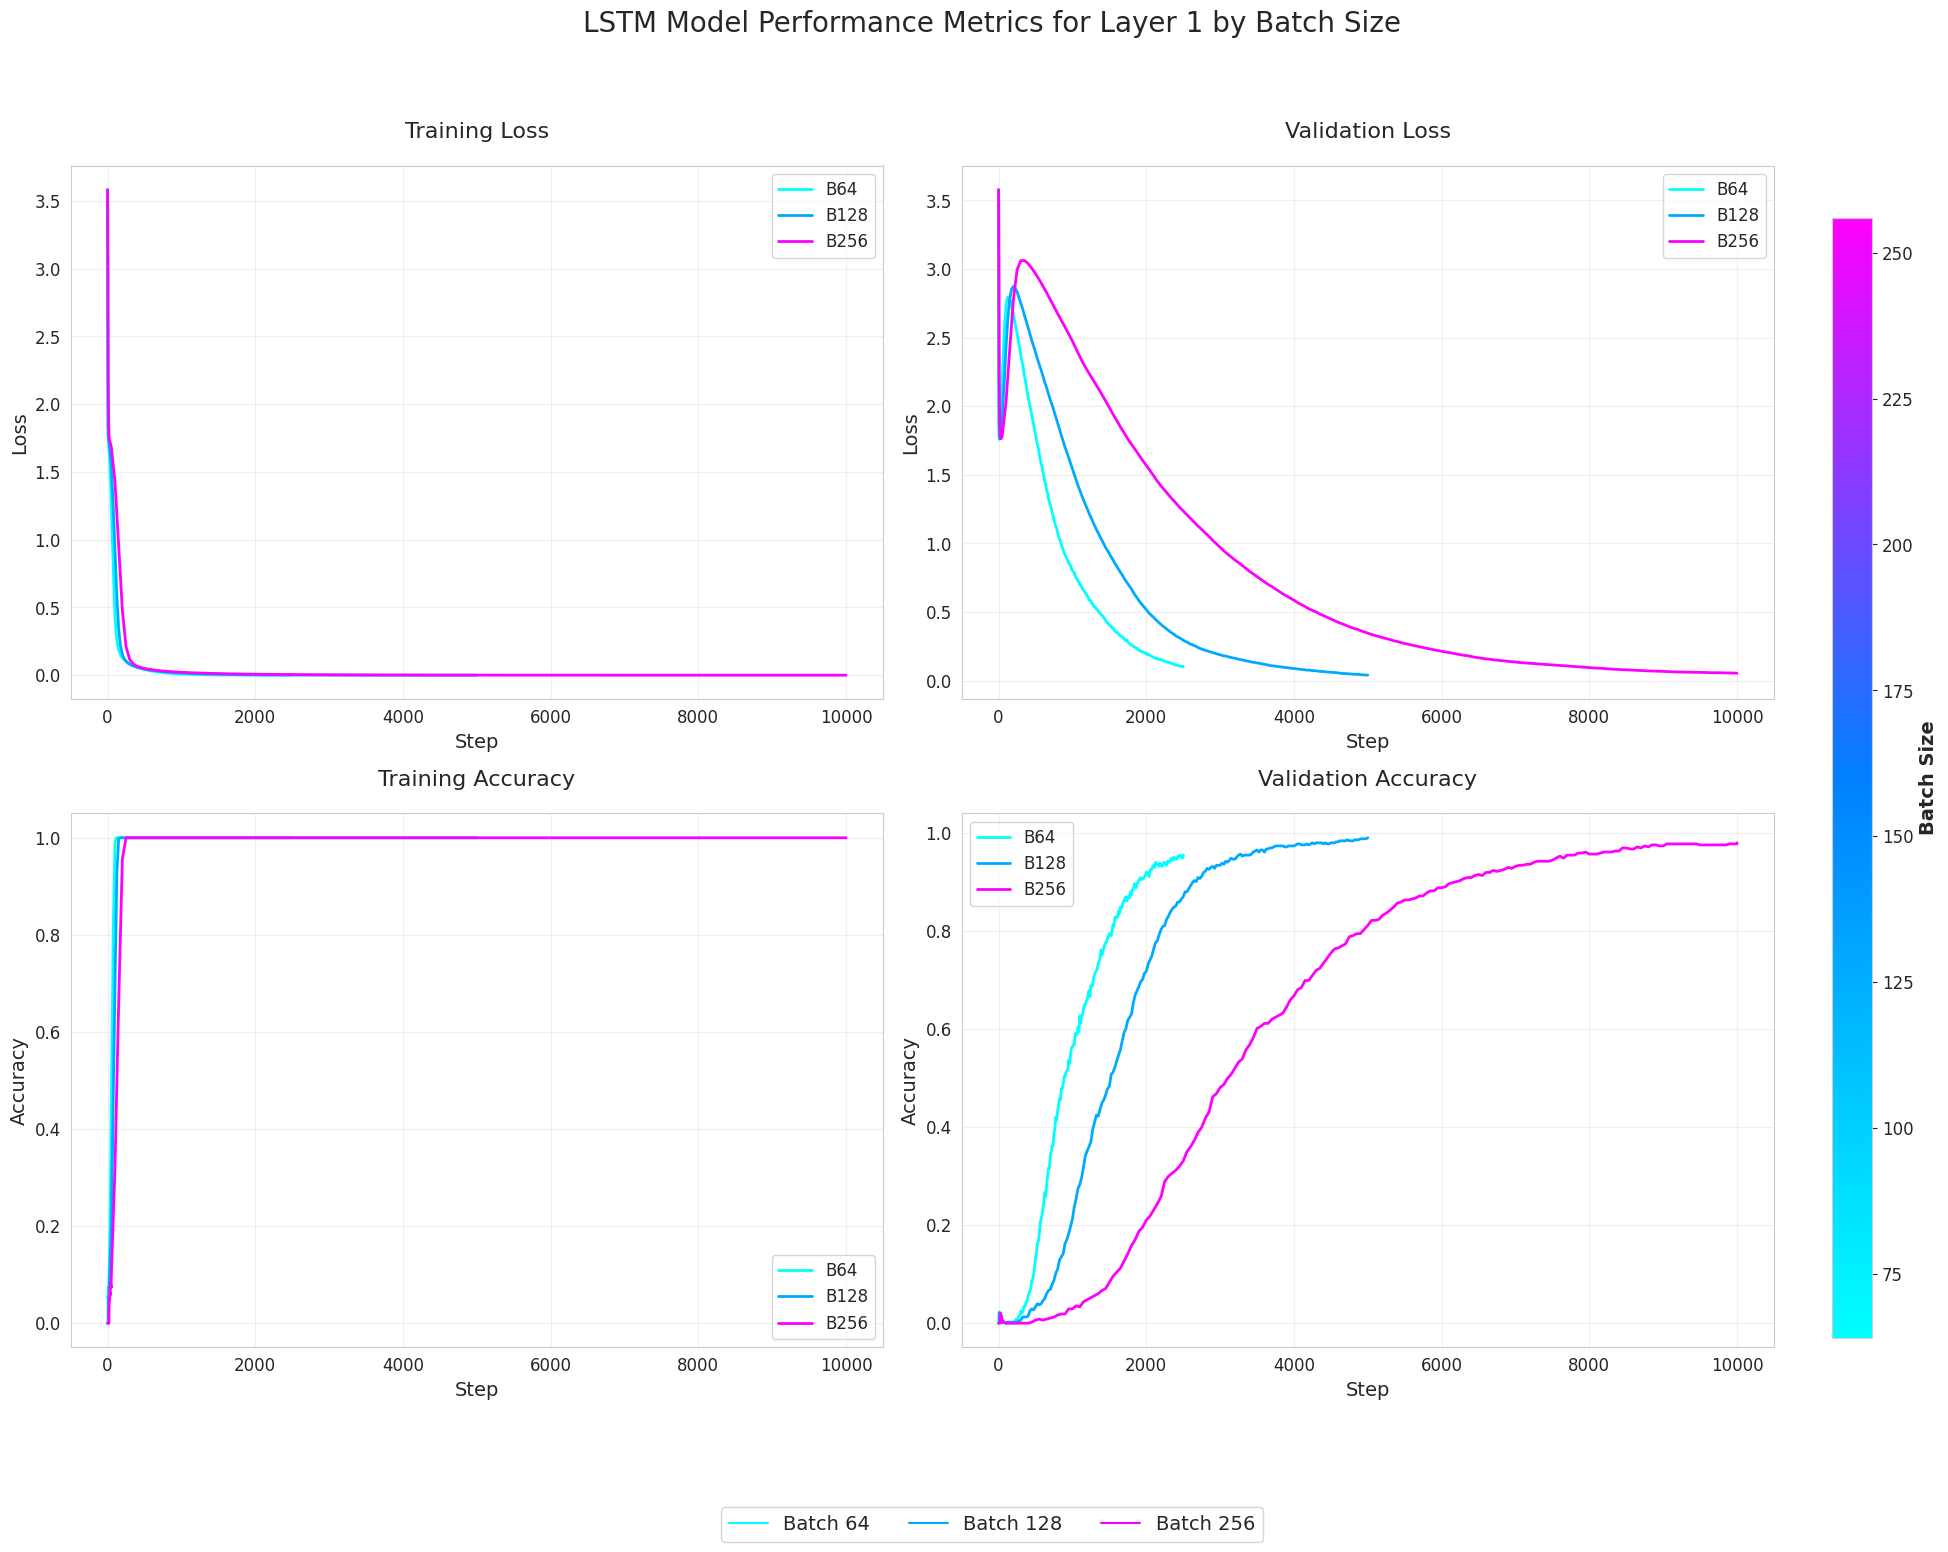

In [ ]:
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from collections import defaultdict
from matplotlib.lines import Line2D

# Base directory containing the logs
base_dir = "/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm"

# Configuration parameters
layer = 1  # Only use layer 1
batch_sizes = [64, 128, 256]  # 2^6=64, 2^7=128, 2^8=256

# Initialize dictionaries to store paths and metrics
file_paths = defaultdict(list)
metrics = defaultdict(dict)

def to_np(x):
    """Convert torch.Tensors or lists to numpy arrays"""
    if isinstance(x, torch.Tensor):
        return x.cpu().numpy()
    elif isinstance(x, list):
        return np.array(x)
    return x

# Collect all the log file paths for layer 1 only
for b in batch_sizes:
    # Construct the path pattern
    dir_path = os.path.join(base_dir, f"layer_{layer}", f"b={b}")

    # Find all subdirectories (like '0/', '1/', etc.)
    try:
        subdirs = [d for d in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, d))]
    except FileNotFoundError:
        print(f"Directory not found: {dir_path}")
        continue

    for subdir in subdirs:
        # Try multiple possible filename patterns
        possible_files = [
            os.path.join(dir_path, subdir, f"B={b}.pth"),
            os.path.join(dir_path, subdir, f"B={b}_L={layer}.pth"),
            os.path.join(dir_path, subdir, f"b={b}.pth")
        ]

        for file_path in possible_files:
            if os.path.exists(file_path):
                file_paths[b].append(file_path)
                break  # Use the first valid file found

# Extract metrics for all found files
for b, paths in file_paths.items():
    for path in paths:
        try:
            data = torch.load(path, map_location=torch.device('cpu'))

            # Verify the expected keys are present
            if not all(k in data for k in ['train', 'test', 'steps_epoch']):
                print(f"Unexpected data format in {path}")
                continue

            # Convert all metrics to numpy arrays
            processed_data = {
                'train_loss': to_np(data['train']['loss']),
                'val_loss': to_np(data['test']['loss']),
                'train_acc': to_np(data['train']['accuracy']),
                'val_acc': to_np(data['test']['accuracy']),
                'steps': to_np(list(data['steps_epoch'].values()))
            }
            metrics[b] = processed_data
        except Exception as e:
            print(f"Error processing {path}: {e}")

# Create visualization if we found any valid data
if not metrics:
    print("No valid data found to plot!")
else:
    # Create a custom colormap for batch sizes
    colors = ["#00FFFF", "#0080FF", "#FF00FF"]  # Cyan → Blue → Magenta
    cmap = LinearSegmentedColormap.from_list("batch_cmap", colors)
    norm = plt.Normalize(min(batch_sizes), max(batch_sizes))

    # Create a 2x2 grid of plots
    fig, axs = plt.subplots(2, 2, figsize=(20, 16))
    plot_titles = ['Training Loss', 'Validation Loss', 'Training Accuracy', 'Validation Accuracy']
    plot_keys = ['train_loss', 'val_loss', 'train_acc', 'val_acc']

    # Plot each metric in its respective subplot
    for i, (title, key) in enumerate(zip(plot_titles, plot_keys)):
        row, col = i // 2, i % 2
        ax = axs[row, col]

        for b, data in metrics.items():
            if data and len(data[key]) > 0:
                color = cmap(norm(b))
                steps = data['steps'][:len(data[key])]

                ax.plot(steps, data[key][:len(steps)],
                        color=color,
                        linewidth=2,
                        label=f'B{b}')

        ax.set_title(title, fontsize=16, pad=20)
        ax.set_xlabel('Step', fontsize=14)
        ax.set_ylabel('Loss' if 'loss' in key else 'Accuracy', fontsize=14)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=12)

    # Create custom legend for batch sizes
    legend_handles = []
    # Batch size color examples
    for b in batch_sizes:
        legend_handles.append(Line2D([0], [0],
                               color=cmap(norm(b)),
                               label=f'Batch {b}'))

    # Add the legend to the figure
    fig.legend(handles=legend_handles,
               loc='upper center',
               bbox_to_anchor=(0.5, 0.05),
               ncol=len(batch_sizes),
               fontsize=14)

    # Add colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.set_label('Batch Size', fontsize=14, weight='bold')

    # Add main title
    fig.suptitle('LSTM Model Performance Metrics for Layer 1 by Batch Size', fontsize=20, y=0.98)

    plt.tight_layout(rect=[0, 0.1, 0.9, 0.95])
    plt.show()

<ipython-input-43-424a0350e450>:135: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 0.9, 0.95])


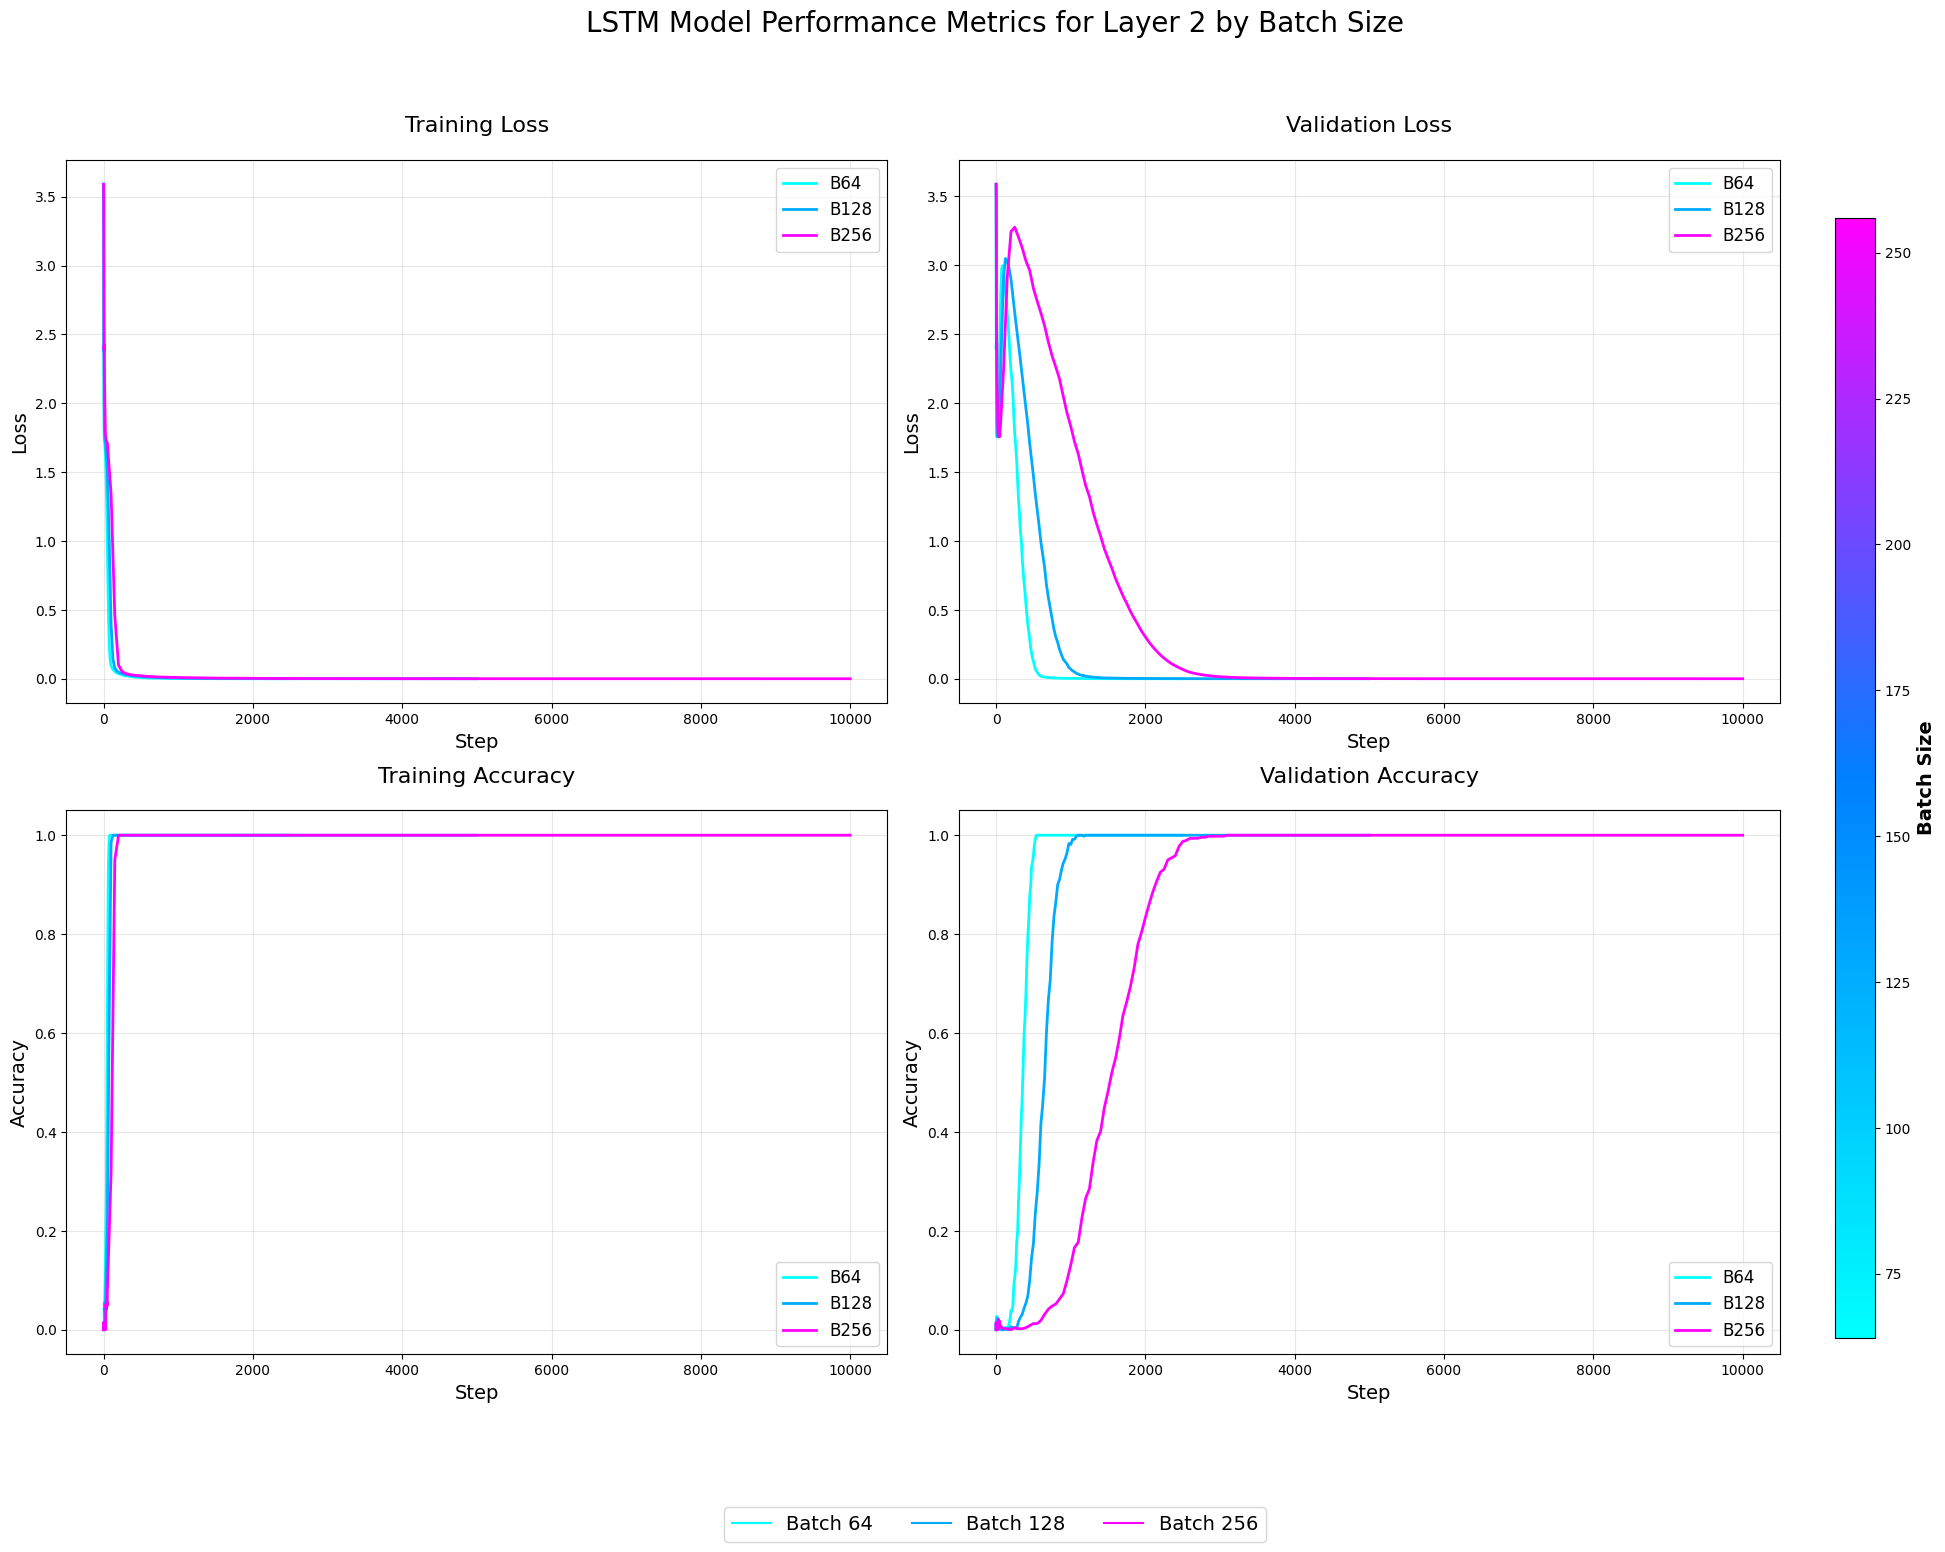

In [ ]:
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from collections import defaultdict
from matplotlib.lines import Line2D

# Base directory containing the logs
base_dir = "/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm"

# Configuration parameters
layer = 2  # Only use layer 1
batch_sizes = [64, 128, 256]  # 2^6=64, 2^7=128, 2^8=256

# Initialize dictionaries to store paths and metrics
file_paths = defaultdict(list)
metrics = defaultdict(dict)

def to_np(x):
    """Convert torch.Tensors or lists to numpy arrays"""
    if isinstance(x, torch.Tensor):
        return x.cpu().numpy()
    elif isinstance(x, list):
        return np.array(x)
    return x

# Collect all the log file paths for layer 1 only
for b in batch_sizes:
    # Construct the path pattern
    dir_path = os.path.join(base_dir, f"layer_{layer}", f"b={b}")

    # Find all subdirectories (like '0/', '1/', etc.)
    try:
        subdirs = [d for d in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, d))]
    except FileNotFoundError:
        print(f"Directory not found: {dir_path}")
        continue

    for subdir in subdirs:
        # Try multiple possible filename patterns
        possible_files = [
            os.path.join(dir_path, subdir, f"B={b}.pth"),
            os.path.join(dir_path, subdir, f"B={b}_L={layer}.pth"),
            os.path.join(dir_path, subdir, f"b={b}.pth")
        ]

        for file_path in possible_files:
            if os.path.exists(file_path):
                file_paths[b].append(file_path)
                break  # Use the first valid file found

# Extract metrics for all found files
for b, paths in file_paths.items():
    for path in paths:
        try:
            data = torch.load(path, map_location=torch.device('cpu'))

            # Verify the expected keys are present
            if not all(k in data for k in ['train', 'test', 'steps_epoch']):
                print(f"Unexpected data format in {path}")
                continue

            # Convert all metrics to numpy arrays
            processed_data = {
                'train_loss': to_np(data['train']['loss']),
                'val_loss': to_np(data['test']['loss']),
                'train_acc': to_np(data['train']['accuracy']),
                'val_acc': to_np(data['test']['accuracy']),
                'steps': to_np(list(data['steps_epoch'].values()))
            }
            metrics[b] = processed_data
        except Exception as e:
            print(f"Error processing {path}: {e}")

# Create visualization if we found any valid data
if not metrics:
    print("No valid data found to plot!")
else:
    # Create a custom colormap for batch sizes
    colors = ["#00FFFF", "#0080FF", "#FF00FF"]  # Cyan → Blue → Magenta
    cmap = LinearSegmentedColormap.from_list("batch_cmap", colors)
    norm = plt.Normalize(min(batch_sizes), max(batch_sizes))

    # Create a 2x2 grid of plots
    fig, axs = plt.subplots(2, 2, figsize=(20, 16))
    plot_titles = ['Training Loss', 'Validation Loss', 'Training Accuracy', 'Validation Accuracy']
    plot_keys = ['train_loss', 'val_loss', 'train_acc', 'val_acc']

    # Plot each metric in its respective subplot
    for i, (title, key) in enumerate(zip(plot_titles, plot_keys)):
        row, col = i // 2, i % 2
        ax = axs[row, col]

        for b, data in metrics.items():
            if data and len(data[key]) > 0:
                color = cmap(norm(b))
                steps = data['steps'][:len(data[key])]

                ax.plot(steps, data[key][:len(steps)],
                        color=color,
                        linewidth=2,
                        label=f'B{b}')

        ax.set_title(title, fontsize=16, pad=20)
        ax.set_xlabel('Step', fontsize=14)
        ax.set_ylabel('Loss' if 'loss' in key else 'Accuracy', fontsize=14)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=12)

    # Create custom legend for batch sizes
    legend_handles = []
    # Batch size color examples
    for b in batch_sizes:
        legend_handles.append(Line2D([0], [0],
                               color=cmap(norm(b)),
                               label=f'Batch {b}'))

    # Add the legend to the figure
    fig.legend(handles=legend_handles,
               loc='upper center',
               bbox_to_anchor=(0.5, 0.05),
               ncol=len(batch_sizes),
               fontsize=14)

    # Add colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.set_label('Batch Size', fontsize=14, weight='bold')

    # Add main title
    fig.suptitle('LSTM Model Performance Metrics for Layer 2 by Batch Size', fontsize=20, y=0.98)

    plt.tight_layout(rect=[0, 0.1, 0.9, 0.95])
    plt.show()

<ipython-input-44-ce5788b24d87>:135: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 0.9, 0.95])


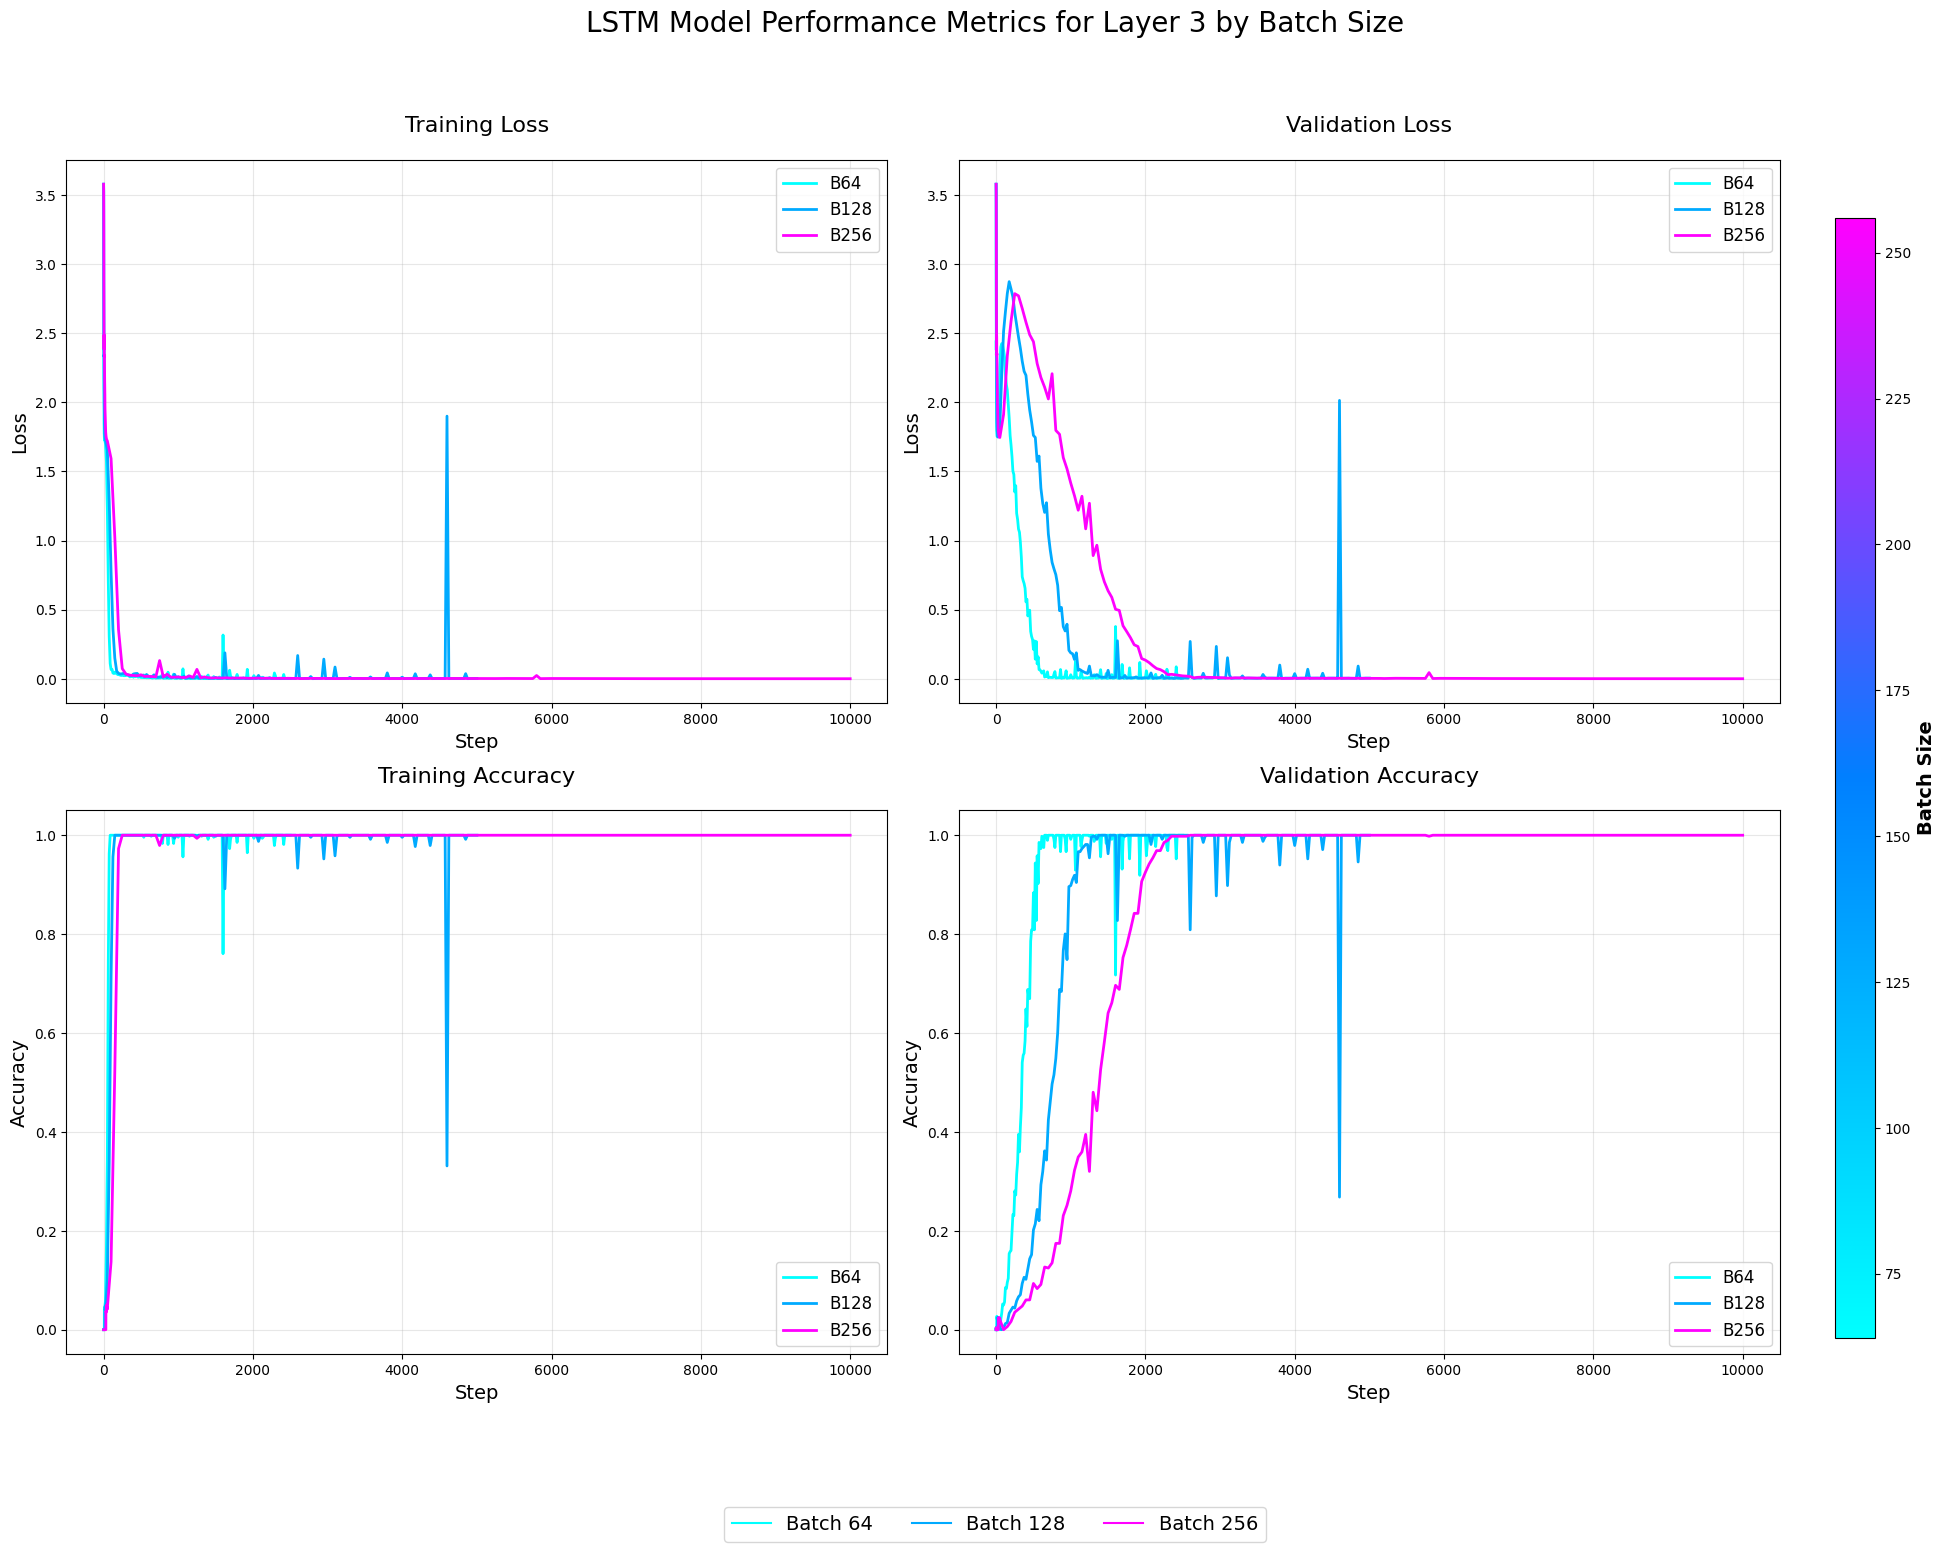

In [ ]:
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from collections import defaultdict
from matplotlib.lines import Line2D

# Base directory containing the logs
base_dir = "/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/lstm"

# Configuration parameters
layer = 3  # Only use layer 1
batch_sizes = [64, 128, 256]  # 2^6=64, 2^7=128, 2^8=256

# Initialize dictionaries to store paths and metrics
file_paths = defaultdict(list)
metrics = defaultdict(dict)

def to_np(x):
    """Convert torch.Tensors or lists to numpy arrays"""
    if isinstance(x, torch.Tensor):
        return x.cpu().numpy()
    elif isinstance(x, list):
        return np.array(x)
    return x

# Collect all the log file paths for layer 1 only
for b in batch_sizes:
    # Construct the path pattern
    dir_path = os.path.join(base_dir, f"layer_{layer}", f"b={b}")

    # Find all subdirectories (like '0/', '1/', etc.)
    try:
        subdirs = [d for d in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, d))]
    except FileNotFoundError:
        print(f"Directory not found: {dir_path}")
        continue

    for subdir in subdirs:
        # Try multiple possible filename patterns
        possible_files = [
            os.path.join(dir_path, subdir, f"B={b}.pth"),
            os.path.join(dir_path, subdir, f"B={b}_L={layer}.pth"),
            os.path.join(dir_path, subdir, f"b={b}.pth")
        ]

        for file_path in possible_files:
            if os.path.exists(file_path):
                file_paths[b].append(file_path)
                break  # Use the first valid file found

# Extract metrics for all found files
for b, paths in file_paths.items():
    for path in paths:
        try:
            data = torch.load(path, map_location=torch.device('cpu'))

            # Verify the expected keys are present
            if not all(k in data for k in ['train', 'test', 'steps_epoch']):
                print(f"Unexpected data format in {path}")
                continue

            # Convert all metrics to numpy arrays
            processed_data = {
                'train_loss': to_np(data['train']['loss']),
                'val_loss': to_np(data['test']['loss']),
                'train_acc': to_np(data['train']['accuracy']),
                'val_acc': to_np(data['test']['accuracy']),
                'steps': to_np(list(data['steps_epoch'].values()))
            }
            metrics[b] = processed_data
        except Exception as e:
            print(f"Error processing {path}: {e}")

# Create visualization if we found any valid data
if not metrics:
    print("No valid data found to plot!")
else:
    # Create a custom colormap for batch sizes
    colors = ["#00FFFF", "#0080FF", "#FF00FF"]  # Cyan → Blue → Magenta
    cmap = LinearSegmentedColormap.from_list("batch_cmap", colors)
    norm = plt.Normalize(min(batch_sizes), max(batch_sizes))

    # Create a 2x2 grid of plots
    fig, axs = plt.subplots(2, 2, figsize=(20, 16))
    plot_titles = ['Training Loss', 'Validation Loss', 'Training Accuracy', 'Validation Accuracy']
    plot_keys = ['train_loss', 'val_loss', 'train_acc', 'val_acc']

    # Plot each metric in its respective subplot
    for i, (title, key) in enumerate(zip(plot_titles, plot_keys)):
        row, col = i // 2, i % 2
        ax = axs[row, col]

        for b, data in metrics.items():
            if data and len(data[key]) > 0:
                color = cmap(norm(b))
                steps = data['steps'][:len(data[key])]

                ax.plot(steps, data[key][:len(steps)],
                        color=color,
                        linewidth=2,
                        label=f'B{b}')

        ax.set_title(title, fontsize=16, pad=20)
        ax.set_xlabel('Step', fontsize=14)
        ax.set_ylabel('Loss' if 'loss' in key else 'Accuracy', fontsize=14)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=12)

    # Create custom legend for batch sizes
    legend_handles = []
    # Batch size color examples
    for b in batch_sizes:
        legend_handles.append(Line2D([0], [0],
                               color=cmap(norm(b)),
                               label=f'Batch {b}'))

    # Add the legend to the figure
    fig.legend(handles=legend_handles,
               loc='upper center',
               bbox_to_anchor=(0.5, 0.05),
               ncol=len(batch_sizes),
               fontsize=14)

    # Add colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.set_label('Batch Size', fontsize=14, weight='bold')

    # Add main title
    fig.suptitle('LSTM Model Performance Metrics for Layer 3 by Batch Size', fontsize=20, y=0.98)

    plt.tight_layout(rect=[0, 0.1, 0.9, 0.95])
    plt.show()

#GPT

## Training

In [ ]:
import torch
from train import Arguments, train_m_models
from plotter import plot_loss_accs
import matplotlib.pyplot as plt
import numpy as np

# Define batch sizes and seeds
batch_sizes = [2**i for i in [6, 7, 8]]  # Selected batch sizes: 32, 128, 512
layer_counts = [1, 2, 3]                 # Number of layers to test
seeds = [0, 42]
T = 2 * 10**4 + 1

# Store all metrics for plotting
all_results = {}

for num_layers in layer_counts:
    layer_results = {}
    for B in batch_sizes:
        args = Arguments()

        # === Data ===
        args.p = 31
        args.operator = "+"
        args.r_train = 0.5
        args.operation_orders = 2
        args.train_batch_size = B
        args.eval_batch_size = 2**12
        args.num_workers = 0

        # === Model ===
        args.model = 'gpt'
        args.num_heads = 4
        args.num_layers = num_layers  # Vary this parameter
        args.embedding_size = 2**7
        args.hidden_size = 2**7
        args.dropout = 0.0
        args.share_embeddings = False
        args.bias_classifier = True

        # === Optimization ===
        args.optimizer = 'adamw'
        args.lr = 1e-3
        args.weight_decay = 1e0

        # === Training ===
        args.n_steps = T
        args.eval_first = 10**2
        args.eval_period = 10**2
        args.print_step = 10**2
        args.save_model_step = 10**3
        args.save_statistic_step = 10**3

        # === Misc ===
        args.device = "cuda" if torch.cuda.is_available() else "cpu"
        args.exp_name = f"B={B}"
        args.exp_id = 0
        args.seed = 42

        args.verbose = True
         # Create hierarchical log directory structure
        base_log_dir = "/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs"
        model_dir = os.path.join(base_log_dir, args.model)  # Added lstm directory
        layer_dir = os.path.join(model_dir, f"layer_{num_layers}")
        batch_dir = os.path.join(layer_dir, f"b={B}")

        # Create directories if they don't exist
        os.makedirs(batch_dir, exist_ok=True)

        args.log_dir = batch_dir

        print(f"\n=== Training with batch size B={B}, layers={num_layers} ===")
        _, all_metrics, _ = train_m_models(args, M=len(seeds), seeds=seeds)

        layer_results[B] = all_metrics

    all_results[num_layers] = layer_results




=== Training with batch size B=64, layers=1 ===
Model 1/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 64
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 1
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=64
exp_id : 0
seed : 0
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_1/b=64
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0): Block(
        (self_attn): MultiHeadedAttention(
          (W_Q): Linear(in_features=128, out_features=128, bias=True)
          (W_K): Linear(in_features=128, out_features=128, bias=True)
          (W_

Training:   0%|          | 0/2501 [00:00<?, ?it/s]


Train loss : 3.378151 | Train accuracy : 0.000000 | Test loss : 3.390022 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 14/2501 [00:12<25:21,  1.63it/s]


Train loss : 1.315377 | Train accuracy : 0.285417 | Test loss : 2.156956 | Test accuracy : 0.010395 | lr = 0.001


Training:   1%|          | 26/2501 [00:13<05:25,  7.61it/s]


Train loss : 0.576555 | Train accuracy : 0.800000 | Test loss : 1.969508 | Test accuracy : 0.158004 | lr = 0.001


Training:   2%|▏         | 39/2501 [00:15<05:02,  8.15it/s]


Train loss : 0.165850 | Train accuracy : 0.995833 | Test loss : 1.736649 | Test accuracy : 0.376299 | lr = 0.001


Training:   2%|▏         | 51/2501 [00:16<04:38,  8.80it/s]


Train loss : 0.049147 | Train accuracy : 0.997917 | Test loss : 1.671172 | Test accuracy : 0.434511 | lr = 0.001


Training:   3%|▎         | 64/2501 [00:18<05:08,  7.90it/s]


Train loss : 0.027232 | Train accuracy : 1.000000 | Test loss : 1.614048 | Test accuracy : 0.446985 | lr = 0.001


Training:   3%|▎         | 76/2501 [00:19<06:29,  6.23it/s]


Train loss : 0.016251 | Train accuracy : 1.000000 | Test loss : 1.572723 | Test accuracy : 0.455301 | lr = 0.001


Training:   4%|▎         | 88/2501 [00:22<06:25,  6.26it/s]


Train loss : 0.017867 | Train accuracy : 1.000000 | Test loss : 1.547528 | Test accuracy : 0.455301 | lr = 0.001


Training:   4%|▍         | 101/2501 [00:23<04:46,  8.39it/s]


Train loss : 0.018297 | Train accuracy : 1.000000 | Test loss : 1.542998 | Test accuracy : 0.455301 | lr = 0.001


Training:   5%|▍         | 114/2501 [00:25<04:25,  9.00it/s]


Train loss : 0.020381 | Train accuracy : 1.000000 | Test loss : 1.521952 | Test accuracy : 0.457381 | lr = 0.001


Training:   5%|▌         | 126/2501 [00:26<04:52,  8.11it/s]


Train loss : 0.021255 | Train accuracy : 1.000000 | Test loss : 1.498213 | Test accuracy : 0.455301 | lr = 0.001


Training:   6%|▌         | 139/2501 [00:28<04:58,  7.92it/s]


Train loss : 0.020658 | Train accuracy : 1.000000 | Test loss : 1.470501 | Test accuracy : 0.457381 | lr = 0.001


Training:   6%|▌         | 151/2501 [00:29<04:53,  8.02it/s]


Train loss : 0.020083 | Train accuracy : 1.000000 | Test loss : 1.482357 | Test accuracy : 0.457381 | lr = 0.001


Training:   7%|▋         | 164/2501 [00:30<04:31,  8.62it/s]


Train loss : 0.024413 | Train accuracy : 1.000000 | Test loss : 1.446108 | Test accuracy : 0.455301 | lr = 0.001


Training:   7%|▋         | 176/2501 [00:32<06:16,  6.17it/s]


Train loss : 0.049408 | Train accuracy : 1.000000 | Test loss : 1.401787 | Test accuracy : 0.457381 | lr = 0.001


Training:   8%|▊         | 188/2501 [00:34<06:17,  6.12it/s]


Train loss : 0.076651 | Train accuracy : 1.000000 | Test loss : 1.357229 | Test accuracy : 0.457381 | lr = 0.001


Training:   8%|▊         | 201/2501 [00:35<04:20,  8.83it/s]


Train loss : 0.171709 | Train accuracy : 1.000000 | Test loss : 1.366249 | Test accuracy : 0.461538 | lr = 0.001


Training:   9%|▊         | 213/2501 [00:37<04:24,  8.66it/s]


Train loss : 0.195217 | Train accuracy : 1.000000 | Test loss : 1.355909 | Test accuracy : 0.459459 | lr = 0.001


Training:   9%|▉         | 226/2501 [00:38<04:32,  8.34it/s]


Train loss : 0.443035 | Train accuracy : 0.941667 | Test loss : 1.517782 | Test accuracy : 0.355509 | lr = 0.001


Training:  10%|▉         | 238/2501 [00:39<04:42,  8.01it/s]


Train loss : 0.446780 | Train accuracy : 0.997917 | Test loss : 1.422129 | Test accuracy : 0.442827 | lr = 0.001


Training:  10%|█         | 251/2501 [00:41<04:30,  8.33it/s]


Train loss : 0.601047 | Train accuracy : 0.975000 | Test loss : 1.489834 | Test accuracy : 0.388773 | lr = 0.001


Training:  11%|█         | 264/2501 [00:42<04:12,  8.85it/s]


Train loss : 0.638616 | Train accuracy : 0.970833 | Test loss : 1.491509 | Test accuracy : 0.384615 | lr = 0.001


Training:  11%|█         | 276/2501 [00:43<04:11,  8.84it/s]


Train loss : 0.669439 | Train accuracy : 0.972917 | Test loss : 1.481453 | Test accuracy : 0.388773 | lr = 0.001


Training:  12%|█▏        | 288/2501 [00:45<06:18,  5.84it/s]


Train loss : 0.648907 | Train accuracy : 0.947917 | Test loss : 1.474257 | Test accuracy : 0.382536 | lr = 0.001


Training:  12%|█▏        | 301/2501 [00:47<05:15,  6.98it/s]


Train loss : 0.681498 | Train accuracy : 0.922917 | Test loss : 1.453817 | Test accuracy : 0.340956 | lr = 0.001


Training:  13%|█▎        | 313/2501 [00:48<04:11,  8.71it/s]


Train loss : 0.604826 | Train accuracy : 0.958333 | Test loss : 1.403826 | Test accuracy : 0.390852 | lr = 0.001


Training:  13%|█▎        | 326/2501 [00:50<04:09,  8.73it/s]


Train loss : 0.586686 | Train accuracy : 0.845833 | Test loss : 1.435712 | Test accuracy : 0.328482 | lr = 0.001


Training:  14%|█▎        | 339/2501 [00:51<04:14,  8.50it/s]


Train loss : 0.406068 | Train accuracy : 0.979167 | Test loss : 1.305660 | Test accuracy : 0.409563 | lr = 0.001


Training:  14%|█▍        | 352/2501 [00:52<03:55,  9.13it/s]


Train loss : 0.446997 | Train accuracy : 0.916667 | Test loss : 1.322913 | Test accuracy : 0.374220 | lr = 0.001


Training:  15%|█▍        | 364/2501 [00:54<04:05,  8.70it/s]


Train loss : 0.278229 | Train accuracy : 0.981250 | Test loss : 1.177031 | Test accuracy : 0.444906 | lr = 0.001


Training:  15%|█▌        | 376/2501 [00:55<04:13,  8.40it/s]


Train loss : 0.200052 | Train accuracy : 0.993750 | Test loss : 1.130234 | Test accuracy : 0.457381 | lr = 0.001


Training:  16%|█▌        | 388/2501 [00:56<03:54,  9.03it/s]


Train loss : 0.131549 | Train accuracy : 1.000000 | Test loss : 1.076141 | Test accuracy : 0.471933 | lr = 0.001


Training:  16%|█▌        | 401/2501 [00:58<05:42,  6.13it/s]


Train loss : 0.106901 | Train accuracy : 0.995833 | Test loss : 0.984484 | Test accuracy : 0.511434 | lr = 0.001


Training:  17%|█▋        | 414/2501 [01:00<05:04,  6.85it/s]


Train loss : 0.114903 | Train accuracy : 0.987500 | Test loss : 1.040946 | Test accuracy : 0.488566 | lr = 0.001


Training:  17%|█▋        | 426/2501 [01:01<04:07,  8.37it/s]


Train loss : 0.050606 | Train accuracy : 1.000000 | Test loss : 0.822501 | Test accuracy : 0.567568 | lr = 0.001


Training:  18%|█▊        | 439/2501 [01:03<03:54,  8.78it/s]


Train loss : 0.050999 | Train accuracy : 0.995833 | Test loss : 0.774067 | Test accuracy : 0.577963 | lr = 0.001


Training:  18%|█▊        | 451/2501 [01:04<03:55,  8.69it/s]


Train loss : 0.033376 | Train accuracy : 0.995833 | Test loss : 0.687598 | Test accuracy : 0.627859 | lr = 0.001


Training:  19%|█▊        | 463/2501 [01:05<04:15,  7.97it/s]


Train loss : 0.018980 | Train accuracy : 1.000000 | Test loss : 0.574354 | Test accuracy : 0.656965 | lr = 0.001


Training:  19%|█▉        | 476/2501 [01:07<03:52,  8.71it/s]


Train loss : 0.031078 | Train accuracy : 1.000000 | Test loss : 0.537638 | Test accuracy : 0.692308 | lr = 0.001


Training:  20%|█▉        | 489/2501 [01:08<03:49,  8.77it/s]


Train loss : 0.018612 | Train accuracy : 1.000000 | Test loss : 0.432726 | Test accuracy : 0.746362 | lr = 0.001


Training:  20%|██        | 501/2501 [01:10<04:18,  7.75it/s]


Train loss : 0.009404 | Train accuracy : 1.000000 | Test loss : 0.349134 | Test accuracy : 0.779626 | lr = 0.001


Training:  21%|██        | 513/2501 [01:11<05:55,  5.60it/s]


Train loss : 0.010234 | Train accuracy : 1.000000 | Test loss : 0.322129 | Test accuracy : 0.802495 | lr = 0.001


Training:  21%|██        | 526/2501 [01:13<04:19,  7.60it/s]


Train loss : 0.003235 | Train accuracy : 1.000000 | Test loss : 0.228262 | Test accuracy : 0.866944 | lr = 0.001


Training:  22%|██▏       | 538/2501 [01:14<03:59,  8.20it/s]


Train loss : 0.006623 | Train accuracy : 1.000000 | Test loss : 0.199528 | Test accuracy : 0.873181 | lr = 0.001


Training:  22%|██▏       | 551/2501 [01:16<04:28,  7.27it/s]


Train loss : 0.002493 | Train accuracy : 1.000000 | Test loss : 0.138090 | Test accuracy : 0.908524 | lr = 0.001


Training:  23%|██▎       | 563/2501 [01:17<03:43,  8.66it/s]


Train loss : 0.009798 | Train accuracy : 1.000000 | Test loss : 0.148537 | Test accuracy : 0.935551 | lr = 0.001


Training:  23%|██▎       | 576/2501 [01:19<03:42,  8.66it/s]


Train loss : 0.015874 | Train accuracy : 1.000000 | Test loss : 0.157860 | Test accuracy : 0.925156 | lr = 0.001


Training:  24%|██▎       | 588/2501 [01:20<03:45,  8.48it/s]


Train loss : 0.020569 | Train accuracy : 1.000000 | Test loss : 0.166406 | Test accuracy : 0.918919 | lr = 0.001


Training:  24%|██▍       | 601/2501 [01:21<03:34,  8.86it/s]


Train loss : 0.042004 | Train accuracy : 1.000000 | Test loss : 0.192250 | Test accuracy : 0.925156 | lr = 0.001


Training:  25%|██▍       | 614/2501 [01:23<03:32,  8.89it/s]


Train loss : 0.033019 | Train accuracy : 1.000000 | Test loss : 0.153890 | Test accuracy : 0.966736 | lr = 0.001


Training:  25%|██▌       | 626/2501 [01:25<05:18,  5.89it/s]


Train loss : 0.039030 | Train accuracy : 1.000000 | Test loss : 0.146013 | Test accuracy : 0.977131 | lr = 0.001


Training:  26%|██▌       | 639/2501 [01:26<03:51,  8.04it/s]


Train loss : 0.033461 | Train accuracy : 1.000000 | Test loss : 0.133218 | Test accuracy : 0.964657 | lr = 0.001


Training:  26%|██▌       | 652/2501 [01:28<03:23,  9.10it/s]


Train loss : 0.041704 | Train accuracy : 1.000000 | Test loss : 0.125978 | Test accuracy : 0.991684 | lr = 0.001


Training:  27%|██▋       | 664/2501 [01:29<03:34,  8.56it/s]


Train loss : 0.036809 | Train accuracy : 1.000000 | Test loss : 0.113943 | Test accuracy : 0.981289 | lr = 0.001


Training:  27%|██▋       | 676/2501 [01:30<03:24,  8.90it/s]


Train loss : 0.031053 | Train accuracy : 1.000000 | Test loss : 0.084667 | Test accuracy : 0.991684 | lr = 0.001


Training:  28%|██▊       | 688/2501 [01:32<03:25,  8.81it/s]


Train loss : 0.042799 | Train accuracy : 1.000000 | Test loss : 0.095182 | Test accuracy : 0.993763 | lr = 0.001


Training:  28%|██▊       | 701/2501 [01:33<03:26,  8.73it/s]


Train loss : 0.013262 | Train accuracy : 1.000000 | Test loss : 0.043584 | Test accuracy : 0.997921 | lr = 0.001


Training:  29%|██▊       | 713/2501 [01:34<03:24,  8.72it/s]


Train loss : 0.011586 | Train accuracy : 1.000000 | Test loss : 0.034818 | Test accuracy : 0.997921 | lr = 0.001


Training:  29%|██▉       | 726/2501 [01:36<03:18,  8.94it/s]


Train loss : 0.019082 | Train accuracy : 1.000000 | Test loss : 0.050588 | Test accuracy : 0.995842 | lr = 0.001


Training:  30%|██▉       | 738/2501 [01:38<05:09,  5.70it/s]


Train loss : 0.009522 | Train accuracy : 1.000000 | Test loss : 0.027222 | Test accuracy : 1.000000 | lr = 0.001


Training:  30%|███       | 751/2501 [01:39<03:57,  7.38it/s]


Train loss : 0.005534 | Train accuracy : 1.000000 | Test loss : 0.016569 | Test accuracy : 0.995842 | lr = 0.001


Training:  31%|███       | 764/2501 [01:41<03:19,  8.70it/s]


Train loss : 0.013153 | Train accuracy : 1.000000 | Test loss : 0.033286 | Test accuracy : 1.000000 | lr = 0.001


Training:  31%|███       | 777/2501 [01:42<03:07,  9.21it/s]


Train loss : 0.001578 | Train accuracy : 1.000000 | Test loss : 0.003793 | Test accuracy : 1.000000 | lr = 0.001


Training:  32%|███▏      | 789/2501 [01:43<03:13,  8.86it/s]


Train loss : 0.013009 | Train accuracy : 1.000000 | Test loss : 0.022671 | Test accuracy : 1.000000 | lr = 0.001


Training:  32%|███▏      | 801/2501 [01:45<03:14,  8.76it/s]


Train loss : 0.018963 | Train accuracy : 1.000000 | Test loss : 0.035865 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 814/2501 [01:46<03:11,  8.80it/s]


Train loss : 0.006787 | Train accuracy : 1.000000 | Test loss : 0.014226 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 826/2501 [01:47<03:05,  9.05it/s]


Train loss : 0.005306 | Train accuracy : 1.000000 | Test loss : 0.012521 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▎      | 838/2501 [01:49<03:18,  8.38it/s]


Train loss : 0.008146 | Train accuracy : 1.000000 | Test loss : 0.018772 | Test accuracy : 0.997921 | lr = 0.001


Training:  34%|███▍      | 851/2501 [01:51<04:27,  6.16it/s]


Train loss : 0.005416 | Train accuracy : 1.000000 | Test loss : 0.012932 | Test accuracy : 0.997921 | lr = 0.001


Training:  35%|███▍      | 864/2501 [01:52<03:22,  8.08it/s]


Train loss : 0.001597 | Train accuracy : 1.000000 | Test loss : 0.002907 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▌      | 876/2501 [01:54<03:16,  8.29it/s]


Train loss : 0.006279 | Train accuracy : 1.000000 | Test loss : 0.010165 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 888/2501 [01:55<03:03,  8.78it/s]


Train loss : 0.007784 | Train accuracy : 1.000000 | Test loss : 0.014702 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 901/2501 [01:56<02:58,  8.95it/s]


Train loss : 0.004953 | Train accuracy : 1.000000 | Test loss : 0.009466 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 914/2501 [01:58<03:10,  8.34it/s]


Train loss : 0.008240 | Train accuracy : 1.000000 | Test loss : 0.016031 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 926/2501 [01:59<03:04,  8.54it/s]


Train loss : 0.001372 | Train accuracy : 1.000000 | Test loss : 0.002412 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 939/2501 [02:00<02:57,  8.80it/s]


Train loss : 0.012401 | Train accuracy : 1.000000 | Test loss : 0.018072 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 950/2501 [02:02<03:07,  8.28it/s]


Train loss : 0.005694 | Train accuracy : 1.000000 | Test loss : 0.009014 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▊      | 963/2501 [02:03<04:20,  5.91it/s]


Train loss : 0.021107 | Train accuracy : 0.997917 | Test loss : 0.035635 | Test accuracy : 0.995842 | lr = 0.001


Training:  39%|███▉      | 977/2501 [02:05<03:03,  8.31it/s]


Train loss : 0.012582 | Train accuracy : 1.000000 | Test loss : 0.031107 | Test accuracy : 0.989605 | lr = 0.001


Training:  40%|███▉      | 988/2501 [02:06<02:58,  8.46it/s]


Train loss : 0.003807 | Train accuracy : 1.000000 | Test loss : 0.007171 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 1000/2501 [02:08<03:08,  7.96it/s]


Train loss : 0.001133 | Train accuracy : 1.000000 | Test loss : 0.001937 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 1014/2501 [02:09<02:56,  8.43it/s]


Train loss : 0.009607 | Train accuracy : 1.000000 | Test loss : 0.014538 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 1026/2501 [02:11<02:50,  8.65it/s]


Train loss : 0.009593 | Train accuracy : 1.000000 | Test loss : 0.017042 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 1039/2501 [02:12<02:51,  8.52it/s]


Train loss : 0.001917 | Train accuracy : 1.000000 | Test loss : 0.003008 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 1051/2501 [02:13<02:47,  8.64it/s]


Train loss : 0.008319 | Train accuracy : 1.000000 | Test loss : 0.014033 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 1063/2501 [02:15<02:48,  8.52it/s]


Train loss : 0.005387 | Train accuracy : 1.000000 | Test loss : 0.010458 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 1076/2501 [02:16<03:43,  6.37it/s]


Train loss : 0.005476 | Train accuracy : 1.000000 | Test loss : 0.009477 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▎     | 1089/2501 [02:18<02:57,  7.97it/s]


Train loss : 0.005331 | Train accuracy : 1.000000 | Test loss : 0.016934 | Test accuracy : 0.993763 | lr = 0.001


Training:  44%|████▍     | 1101/2501 [02:20<02:40,  8.73it/s]


Train loss : 0.001375 | Train accuracy : 1.000000 | Test loss : 0.002197 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 1113/2501 [02:21<02:41,  8.60it/s]


Train loss : 0.007770 | Train accuracy : 1.000000 | Test loss : 0.013066 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▌     | 1126/2501 [02:22<02:54,  7.88it/s]


Train loss : 0.005968 | Train accuracy : 1.000000 | Test loss : 0.010355 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 1139/2501 [02:24<02:42,  8.39it/s]


Train loss : 0.001698 | Train accuracy : 1.000000 | Test loss : 0.002733 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 1151/2501 [02:25<02:31,  8.90it/s]


Train loss : 0.010768 | Train accuracy : 1.000000 | Test loss : 0.017400 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 1164/2501 [02:26<02:26,  9.11it/s]


Train loss : 0.006612 | Train accuracy : 1.000000 | Test loss : 0.011113 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 1176/2501 [02:28<02:41,  8.23it/s]


Train loss : 0.009747 | Train accuracy : 1.000000 | Test loss : 0.016248 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 1188/2501 [02:29<03:42,  5.89it/s]


Train loss : 0.017259 | Train accuracy : 1.000000 | Test loss : 0.025575 | Test accuracy : 0.997921 | lr = 0.001


Training:  48%|████▊     | 1201/2501 [02:31<02:45,  7.84it/s]


Train loss : 0.003411 | Train accuracy : 1.000000 | Test loss : 0.006186 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▊     | 1213/2501 [02:33<02:25,  8.87it/s]


Train loss : 0.001521 | Train accuracy : 1.000000 | Test loss : 0.002397 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▉     | 1226/2501 [02:34<02:24,  8.83it/s]


Train loss : 0.004271 | Train accuracy : 1.000000 | Test loss : 0.007391 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 1239/2501 [02:35<02:28,  8.50it/s]


Train loss : 0.004466 | Train accuracy : 1.000000 | Test loss : 0.009007 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|█████     | 1251/2501 [02:37<02:36,  8.01it/s]


Train loss : 0.001706 | Train accuracy : 1.000000 | Test loss : 0.002978 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 1264/2501 [02:38<02:21,  8.76it/s]


Train loss : 0.013641 | Train accuracy : 1.000000 | Test loss : 0.022978 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 1276/2501 [02:39<02:17,  8.94it/s]


Train loss : 0.007496 | Train accuracy : 1.000000 | Test loss : 0.011838 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████▏    | 1288/2501 [02:41<02:15,  8.98it/s]


Train loss : 0.006891 | Train accuracy : 1.000000 | Test loss : 0.011704 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 1301/2501 [02:42<03:21,  5.96it/s]


Train loss : 0.001602 | Train accuracy : 1.000000 | Test loss : 0.003022 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 1314/2501 [02:44<02:29,  7.96it/s]


Train loss : 0.003837 | Train accuracy : 1.000000 | Test loss : 0.005759 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 1326/2501 [02:46<02:14,  8.73it/s]


Train loss : 0.019678 | Train accuracy : 0.997917 | Test loss : 0.027914 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▎    | 1339/2501 [02:47<02:16,  8.50it/s]


Train loss : 0.005987 | Train accuracy : 1.000000 | Test loss : 0.010758 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 1351/2501 [02:48<02:17,  8.37it/s]


Train loss : 0.004185 | Train accuracy : 1.000000 | Test loss : 0.008571 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 1364/2501 [02:50<02:11,  8.65it/s]


Train loss : 0.001329 | Train accuracy : 1.000000 | Test loss : 0.002291 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 1375/2501 [02:51<02:26,  7.69it/s]


Train loss : 0.007384 | Train accuracy : 1.000000 | Test loss : 0.012199 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 1389/2501 [02:52<02:08,  8.67it/s]


Train loss : 0.007340 | Train accuracy : 1.000000 | Test loss : 0.011597 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 1400/2501 [02:54<02:09,  8.48it/s]


Train loss : 0.012436 | Train accuracy : 1.000000 | Test loss : 0.025614 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▋    | 1413/2501 [02:55<03:08,  5.76it/s]


Train loss : 0.002781 | Train accuracy : 1.000000 | Test loss : 0.005716 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 1426/2501 [02:57<02:15,  7.93it/s]


Train loss : 0.001657 | Train accuracy : 1.000000 | Test loss : 0.002572 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 1439/2501 [02:59<02:07,  8.34it/s]


Train loss : 0.008059 | Train accuracy : 1.000000 | Test loss : 0.016846 | Test accuracy : 0.997921 | lr = 0.001


Training:  58%|█████▊    | 1451/2501 [03:00<02:05,  8.35it/s]


Train loss : 0.002677 | Train accuracy : 1.000000 | Test loss : 0.005582 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▊    | 1464/2501 [03:01<01:57,  8.83it/s]


Train loss : 0.001646 | Train accuracy : 1.000000 | Test loss : 0.002670 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▉    | 1476/2501 [03:03<01:55,  8.90it/s]


Train loss : 0.006007 | Train accuracy : 1.000000 | Test loss : 0.009687 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▉    | 1488/2501 [03:04<02:03,  8.20it/s]


Train loss : 0.003375 | Train accuracy : 1.000000 | Test loss : 0.005880 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|██████    | 1501/2501 [03:05<02:01,  8.20it/s]


Train loss : 0.014681 | Train accuracy : 1.000000 | Test loss : 0.023774 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|██████    | 1513/2501 [03:07<03:08,  5.23it/s]


Train loss : 0.003867 | Train accuracy : 1.000000 | Test loss : 0.008354 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 1526/2501 [03:09<02:35,  6.29it/s]


Train loss : 0.001520 | Train accuracy : 1.000000 | Test loss : 0.002423 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 1539/2501 [03:11<01:54,  8.38it/s]


Train loss : 0.009501 | Train accuracy : 1.000000 | Test loss : 0.018503 | Test accuracy : 0.995842 | lr = 0.001


Training:  62%|██████▏   | 1551/2501 [03:12<01:49,  8.64it/s]


Train loss : 0.005324 | Train accuracy : 1.000000 | Test loss : 0.012254 | Test accuracy : 0.997921 | lr = 0.001


Training:  63%|██████▎   | 1564/2501 [03:13<01:48,  8.66it/s]


Train loss : 0.001530 | Train accuracy : 1.000000 | Test loss : 0.002579 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 1576/2501 [03:15<01:46,  8.72it/s]


Train loss : 0.009670 | Train accuracy : 1.000000 | Test loss : 0.016101 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 1588/2501 [03:16<01:47,  8.50it/s]


Train loss : 0.009293 | Train accuracy : 1.000000 | Test loss : 0.020199 | Test accuracy : 0.995842 | lr = 0.001


Training:  64%|██████▍   | 1601/2501 [03:17<01:40,  8.93it/s]


Train loss : 0.005918 | Train accuracy : 1.000000 | Test loss : 0.015334 | Test accuracy : 0.997921 | lr = 0.001


Training:  65%|██████▍   | 1614/2501 [03:19<01:40,  8.85it/s]


Train loss : 0.001482 | Train accuracy : 1.000000 | Test loss : 0.002330 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 1625/2501 [03:20<02:19,  6.30it/s]


Train loss : 0.008675 | Train accuracy : 1.000000 | Test loss : 0.013840 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▌   | 1638/2501 [03:22<02:24,  5.96it/s]


Train loss : 0.009358 | Train accuracy : 1.000000 | Test loss : 0.013318 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 1651/2501 [03:24<01:42,  8.28it/s]


Train loss : 0.001202 | Train accuracy : 1.000000 | Test loss : 0.002170 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 1664/2501 [03:25<01:36,  8.71it/s]


Train loss : 0.012091 | Train accuracy : 1.000000 | Test loss : 0.018729 | Test accuracy : 0.997921 | lr = 0.001


Training:  67%|██████▋   | 1676/2501 [03:26<01:34,  8.74it/s]


Train loss : 0.018659 | Train accuracy : 1.000000 | Test loss : 0.032586 | Test accuracy : 0.995842 | lr = 0.001


Training:  68%|██████▊   | 1689/2501 [03:28<01:38,  8.23it/s]


Train loss : 0.013876 | Train accuracy : 1.000000 | Test loss : 0.032075 | Test accuracy : 0.991684 | lr = 0.001


Training:  68%|██████▊   | 1701/2501 [03:29<01:33,  8.55it/s]


Train loss : 0.001087 | Train accuracy : 1.000000 | Test loss : 0.001860 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▊   | 1714/2501 [03:30<01:29,  8.83it/s]


Train loss : 0.001757 | Train accuracy : 1.000000 | Test loss : 0.002665 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 1727/2501 [03:32<01:23,  9.27it/s]


Train loss : 0.006125 | Train accuracy : 1.000000 | Test loss : 0.010530 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 1738/2501 [03:33<02:00,  6.31it/s]


Train loss : 0.003946 | Train accuracy : 1.000000 | Test loss : 0.006562 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 1750/2501 [03:35<02:25,  5.17it/s]


Train loss : 0.018070 | Train accuracy : 0.993750 | Test loss : 0.034637 | Test accuracy : 0.983368 | lr = 0.001


Training:  71%|███████   | 1764/2501 [03:37<01:24,  8.75it/s]


Train loss : 0.005490 | Train accuracy : 1.000000 | Test loss : 0.010714 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 1776/2501 [03:38<01:24,  8.53it/s]


Train loss : 0.001093 | Train accuracy : 1.000000 | Test loss : 0.002203 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 1789/2501 [03:40<01:25,  8.28it/s]


Train loss : 0.009033 | Train accuracy : 1.000000 | Test loss : 0.015448 | Test accuracy : 0.997921 | lr = 0.001


Training:  72%|███████▏  | 1800/2501 [03:41<01:21,  8.58it/s]


Train loss : 0.007580 | Train accuracy : 1.000000 | Test loss : 0.013143 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 1814/2501 [03:42<01:21,  8.41it/s]


Train loss : 0.005650 | Train accuracy : 1.000000 | Test loss : 0.010878 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 1827/2501 [03:44<01:13,  9.15it/s]


Train loss : 0.014663 | Train accuracy : 1.000000 | Test loss : 0.024834 | Test accuracy : 0.997921 | lr = 0.001


Training:  74%|███████▎  | 1839/2501 [03:45<01:15,  8.81it/s]


Train loss : 0.000809 | Train accuracy : 1.000000 | Test loss : 0.001410 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▍  | 1851/2501 [03:47<01:40,  6.46it/s]


Train loss : 0.001572 | Train accuracy : 1.000000 | Test loss : 0.002606 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▍  | 1863/2501 [03:48<01:56,  5.46it/s]


Train loss : 0.013163 | Train accuracy : 1.000000 | Test loss : 0.021084 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▌  | 1876/2501 [03:50<01:18,  7.97it/s]


Train loss : 0.001529 | Train accuracy : 1.000000 | Test loss : 0.002857 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 1889/2501 [03:51<01:13,  8.30it/s]


Train loss : 0.011740 | Train accuracy : 1.000000 | Test loss : 0.018480 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 1901/2501 [03:53<01:09,  8.65it/s]


Train loss : 0.012712 | Train accuracy : 1.000000 | Test loss : 0.022872 | Test accuracy : 0.995842 | lr = 0.001


Training:  77%|███████▋  | 1914/2501 [03:54<01:06,  8.79it/s]


Train loss : 0.034166 | Train accuracy : 0.993750 | Test loss : 0.054789 | Test accuracy : 0.977131 | lr = 0.001


Training:  77%|███████▋  | 1926/2501 [03:55<01:06,  8.70it/s]


Train loss : 0.009511 | Train accuracy : 1.000000 | Test loss : 0.026922 | Test accuracy : 0.991684 | lr = 0.001


Training:  77%|███████▋  | 1938/2501 [03:57<01:09,  8.11it/s]


Train loss : 0.000760 | Train accuracy : 1.000000 | Test loss : 0.001361 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 1951/2501 [03:58<01:04,  8.59it/s]


Train loss : 0.001524 | Train accuracy : 1.000000 | Test loss : 0.002248 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 1963/2501 [04:00<01:34,  5.67it/s]


Train loss : 0.005796 | Train accuracy : 1.000000 | Test loss : 0.010679 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 1976/2501 [04:02<01:21,  6.44it/s]


Train loss : 0.004224 | Train accuracy : 1.000000 | Test loss : 0.007546 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 1989/2501 [04:03<01:00,  8.52it/s]


Train loss : 0.017984 | Train accuracy : 0.997917 | Test loss : 0.028424 | Test accuracy : 0.997921 | lr = 0.001


Training:  80%|████████  | 2001/2501 [04:04<01:01,  8.17it/s]


Train loss : 0.007860 | Train accuracy : 1.000000 | Test loss : 0.013408 | Test accuracy : 0.997921 | lr = 0.001


Training:  81%|████████  | 2014/2501 [04:06<00:56,  8.66it/s]


Train loss : 0.000750 | Train accuracy : 1.000000 | Test loss : 0.001275 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 2026/2501 [04:07<00:56,  8.48it/s]


Train loss : 0.001623 | Train accuracy : 1.000000 | Test loss : 0.002723 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████▏ | 2038/2501 [04:08<00:53,  8.60it/s]


Train loss : 0.012949 | Train accuracy : 1.000000 | Test loss : 0.017706 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 2051/2501 [04:10<00:51,  8.78it/s]


Train loss : 0.029591 | Train accuracy : 1.000000 | Test loss : 0.051821 | Test accuracy : 0.985447 | lr = 0.001


Training:  83%|████████▎ | 2064/2501 [04:11<00:48,  8.99it/s]


Train loss : 0.011461 | Train accuracy : 0.997917 | Test loss : 0.024768 | Test accuracy : 0.991684 | lr = 0.001


Training:  83%|████████▎ | 2076/2501 [04:13<01:08,  6.17it/s]


Train loss : 0.003657 | Train accuracy : 1.000000 | Test loss : 0.008397 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▎ | 2089/2501 [04:15<00:57,  7.19it/s]


Train loss : 0.000892 | Train accuracy : 1.000000 | Test loss : 0.001567 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 2101/2501 [04:16<00:46,  8.55it/s]


Train loss : 0.141557 | Train accuracy : 1.000000 | Test loss : 0.178543 | Test accuracy : 0.997921 | lr = 0.001


Training:  85%|████████▍ | 2114/2501 [04:17<00:45,  8.48it/s]


Train loss : 0.008581 | Train accuracy : 1.000000 | Test loss : 0.013373 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▌ | 2126/2501 [04:19<00:46,  8.11it/s]


Train loss : 0.006103 | Train accuracy : 1.000000 | Test loss : 0.011666 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 2139/2501 [04:20<00:42,  8.61it/s]


Train loss : 0.008214 | Train accuracy : 1.000000 | Test loss : 0.017059 | Test accuracy : 0.997921 | lr = 0.001


Training:  86%|████████▌ | 2151/2501 [04:22<00:40,  8.54it/s]


Train loss : 0.008365 | Train accuracy : 0.997917 | Test loss : 0.013316 | Test accuracy : 0.997921 | lr = 0.001


Training:  86%|████████▋ | 2163/2501 [04:23<00:40,  8.39it/s]


Train loss : 0.003237 | Train accuracy : 1.000000 | Test loss : 0.005266 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 2176/2501 [04:24<00:37,  8.75it/s]


Train loss : 0.000687 | Train accuracy : 1.000000 | Test loss : 0.001311 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 2188/2501 [04:26<00:53,  5.81it/s]


Train loss : 0.001450 | Train accuracy : 1.000000 | Test loss : 0.002277 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 2201/2501 [04:28<00:41,  7.32it/s]


Train loss : 0.010962 | Train accuracy : 1.000000 | Test loss : 0.019414 | Test accuracy : 0.997921 | lr = 0.001


Training:  89%|████████▊ | 2214/2501 [04:29<00:34,  8.26it/s]


Train loss : 0.023381 | Train accuracy : 1.000000 | Test loss : 0.039317 | Test accuracy : 0.993763 | lr = 0.001


Training:  89%|████████▉ | 2227/2501 [04:31<00:31,  8.82it/s]


Train loss : 0.010888 | Train accuracy : 1.000000 | Test loss : 0.021057 | Test accuracy : 0.997921 | lr = 0.001


Training:  89%|████████▉ | 2238/2501 [04:32<00:30,  8.59it/s]


Train loss : 0.007282 | Train accuracy : 1.000000 | Test loss : 0.018630 | Test accuracy : 0.993763 | lr = 0.001


Training:  90%|█████████ | 2251/2501 [04:33<00:30,  8.18it/s]


Train loss : 0.012537 | Train accuracy : 1.000000 | Test loss : 0.026279 | Test accuracy : 0.995842 | lr = 0.001


Training:  91%|█████████ | 2264/2501 [04:35<00:29,  8.10it/s]


Train loss : 0.004259 | Train accuracy : 1.000000 | Test loss : 0.007471 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 2277/2501 [04:36<00:24,  8.96it/s]


Train loss : 0.000885 | Train accuracy : 1.000000 | Test loss : 0.001516 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 2289/2501 [04:37<00:25,  8.37it/s]


Train loss : 0.011939 | Train accuracy : 1.000000 | Test loss : 0.017228 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 2301/2501 [04:39<00:32,  6.14it/s]


Train loss : 0.020472 | Train accuracy : 1.000000 | Test loss : 0.027340 | Test accuracy : 0.997921 | lr = 0.001


Training:  92%|█████████▏| 2313/2501 [04:41<00:25,  7.45it/s]


Train loss : 0.009514 | Train accuracy : 1.000000 | Test loss : 0.017503 | Test accuracy : 0.997921 | lr = 0.001


Training:  93%|█████████▎| 2326/2501 [04:42<00:20,  8.66it/s]


Train loss : 0.013477 | Train accuracy : 1.000000 | Test loss : 0.022585 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▎| 2339/2501 [04:44<00:18,  8.73it/s]


Train loss : 0.010148 | Train accuracy : 1.000000 | Test loss : 0.020428 | Test accuracy : 0.997921 | lr = 0.001


Training:  94%|█████████▍| 2351/2501 [04:45<00:17,  8.43it/s]


Train loss : 0.000750 | Train accuracy : 1.000000 | Test loss : 0.001772 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 2364/2501 [04:47<00:15,  8.58it/s]


Train loss : 0.001479 | Train accuracy : 1.000000 | Test loss : 0.002472 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▌| 2376/2501 [04:48<00:14,  8.55it/s]


Train loss : 0.011081 | Train accuracy : 1.000000 | Test loss : 0.017257 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 2389/2501 [04:49<00:13,  8.46it/s]


Train loss : 0.008159 | Train accuracy : 1.000000 | Test loss : 0.014546 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 2401/2501 [04:51<00:12,  7.99it/s]


Train loss : 0.027026 | Train accuracy : 0.997917 | Test loss : 0.047878 | Test accuracy : 0.987526 | lr = 0.001


Training:  96%|█████████▋| 2413/2501 [04:53<00:21,  4.06it/s]


Train loss : 0.015435 | Train accuracy : 0.997917 | Test loss : 0.033088 | Test accuracy : 0.989605 | lr = 0.001


Training:  97%|█████████▋| 2426/2501 [04:54<00:09,  8.20it/s]


Train loss : 0.005635 | Train accuracy : 1.000000 | Test loss : 0.011405 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 2439/2501 [04:56<00:07,  8.78it/s]


Train loss : 0.003894 | Train accuracy : 1.000000 | Test loss : 0.011302 | Test accuracy : 0.997921 | lr = 0.001


Training:  98%|█████████▊| 2451/2501 [04:57<00:05,  8.57it/s]


Train loss : 0.003301 | Train accuracy : 0.997917 | Test loss : 0.008081 | Test accuracy : 0.997921 | lr = 0.001


Training:  99%|█████████▊| 2464/2501 [04:58<00:04,  8.36it/s]


Train loss : 0.000813 | Train accuracy : 1.000000 | Test loss : 0.001626 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 2477/2501 [05:00<00:02,  8.96it/s]


Train loss : 0.004095 | Train accuracy : 1.000000 | Test loss : 0.006560 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 2489/2501 [05:01<00:01,  8.66it/s]


Train loss : 0.006548 | Train accuracy : 1.000000 | Test loss : 0.010795 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 2500/2501 [05:02<00:00,  7.63it/s]


Train loss : 0.006589 | Train accuracy : 1.000000 | Test loss : 0.012971 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 2501/2501 [05:03<00:00,  8.25it/s]


Train loss : 0.004534 | Train accuracy : 1.000000 | Test loss : 0.008714 | Test accuracy : 1.000000 | lr = 0.001


Model 2/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 64
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 1
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=64
exp_id : 1
seed : 42
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_1/b=64
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0): Block(
        (self_attn): MultiHeadedAttention(
          (W_Q): Linear(in_features=128, out_features=128, bias=True)
          (W_K): Linear(in_features=128, out_features=128, bias=True)
          (W_V): Linear(in_features=128, out_features=128, bi

Training:   0%|          | 0/2501 [00:00<?, ?it/s]


Train loss : 3.050046 | Train accuracy : 0.000000 | Test loss : 3.048244 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 14/2501 [00:12<25:49,  1.61it/s]


Train loss : 1.265938 | Train accuracy : 0.356250 | Test loss : 2.099472 | Test accuracy : 0.024948 | lr = 0.001


Training:   1%|          | 26/2501 [00:14<07:02,  5.86it/s]


Train loss : 0.700574 | Train accuracy : 0.704167 | Test loss : 2.040443 | Test accuracy : 0.164241 | lr = 0.001


Training:   2%|▏         | 38/2501 [00:16<07:03,  5.82it/s]


Train loss : 0.336336 | Train accuracy : 0.918750 | Test loss : 1.837410 | Test accuracy : 0.330561 | lr = 0.001


Training:   2%|▏         | 51/2501 [00:18<05:26,  7.50it/s]


Train loss : 0.124439 | Train accuracy : 0.975000 | Test loss : 1.703814 | Test accuracy : 0.426195 | lr = 0.001


Training:   3%|▎         | 64/2501 [00:19<04:53,  8.30it/s]


Train loss : 0.055921 | Train accuracy : 0.989583 | Test loss : 1.649770 | Test accuracy : 0.444906 | lr = 0.001


Training:   3%|▎         | 76/2501 [00:21<04:40,  8.65it/s]


Train loss : 0.028282 | Train accuracy : 0.995833 | Test loss : 1.632979 | Test accuracy : 0.457381 | lr = 0.001


Training:   4%|▎         | 89/2501 [00:22<04:48,  8.35it/s]


Train loss : 0.024317 | Train accuracy : 1.000000 | Test loss : 1.611895 | Test accuracy : 0.451143 | lr = 0.001


Training:   4%|▍         | 101/2501 [00:23<04:59,  8.00it/s]


Train loss : 0.023850 | Train accuracy : 0.997917 | Test loss : 1.610051 | Test accuracy : 0.453222 | lr = 0.001


Training:   5%|▍         | 114/2501 [00:25<04:45,  8.35it/s]


Train loss : 0.012193 | Train accuracy : 1.000000 | Test loss : 1.563370 | Test accuracy : 0.459459 | lr = 0.001


Training:   5%|▌         | 126/2501 [00:26<06:18,  6.28it/s]


Train loss : 0.020772 | Train accuracy : 1.000000 | Test loss : 1.547392 | Test accuracy : 0.453222 | lr = 0.001


Training:   6%|▌         | 138/2501 [00:28<06:31,  6.04it/s]


Train loss : 0.023266 | Train accuracy : 1.000000 | Test loss : 1.525007 | Test accuracy : 0.461538 | lr = 0.001


Training:   6%|▌         | 151/2501 [00:30<04:45,  8.23it/s]


Train loss : 0.028116 | Train accuracy : 1.000000 | Test loss : 1.472333 | Test accuracy : 0.465696 | lr = 0.001


Training:   7%|▋         | 164/2501 [00:31<04:24,  8.83it/s]


Train loss : 0.035351 | Train accuracy : 1.000000 | Test loss : 1.435084 | Test accuracy : 0.461538 | lr = 0.001


Training:   7%|▋         | 176/2501 [00:33<04:26,  8.72it/s]


Train loss : 0.094075 | Train accuracy : 1.000000 | Test loss : 1.430547 | Test accuracy : 0.461538 | lr = 0.001


Training:   8%|▊         | 189/2501 [00:34<04:31,  8.51it/s]


Train loss : 0.140857 | Train accuracy : 1.000000 | Test loss : 1.441229 | Test accuracy : 0.449064 | lr = 0.001


Training:   8%|▊         | 201/2501 [00:35<04:17,  8.94it/s]


Train loss : 0.214286 | Train accuracy : 1.000000 | Test loss : 1.406765 | Test accuracy : 0.451143 | lr = 0.001


Training:   9%|▊         | 214/2501 [00:37<04:26,  8.57it/s]


Train loss : 0.498431 | Train accuracy : 0.987500 | Test loss : 1.498726 | Test accuracy : 0.409563 | lr = 0.001


Training:   9%|▉         | 226/2501 [00:38<04:29,  8.43it/s]


Train loss : 0.551968 | Train accuracy : 0.991667 | Test loss : 1.512618 | Test accuracy : 0.401247 | lr = 0.001


Training:  10%|▉         | 238/2501 [00:40<09:04,  4.16it/s]


Train loss : 0.638743 | Train accuracy : 0.987500 | Test loss : 1.554796 | Test accuracy : 0.397089 | lr = 0.001


Training:  10%|█         | 251/2501 [00:42<06:51,  5.47it/s]


Train loss : 0.725169 | Train accuracy : 0.972917 | Test loss : 1.578953 | Test accuracy : 0.353430 | lr = 0.001


Training:  11%|█         | 264/2501 [00:43<04:25,  8.43it/s]


Train loss : 0.813990 | Train accuracy : 0.958333 | Test loss : 1.588464 | Test accuracy : 0.328482 | lr = 0.001


Training:  11%|█         | 276/2501 [00:45<04:18,  8.60it/s]


Train loss : 0.883259 | Train accuracy : 0.883333 | Test loss : 1.604635 | Test accuracy : 0.272349 | lr = 0.001


Training:  12%|█▏        | 289/2501 [00:46<04:21,  8.46it/s]


Train loss : 0.927258 | Train accuracy : 0.800000 | Test loss : 1.605165 | Test accuracy : 0.237006 | lr = 0.001


Training:  12%|█▏        | 301/2501 [00:47<04:13,  8.66it/s]


Train loss : 0.885693 | Train accuracy : 0.870833 | Test loss : 1.587963 | Test accuracy : 0.264033 | lr = 0.001


Training:  13%|█▎        | 314/2501 [00:49<04:16,  8.54it/s]


Train loss : 0.880383 | Train accuracy : 0.762500 | Test loss : 1.547974 | Test accuracy : 0.251559 | lr = 0.001


Training:  13%|█▎        | 327/2501 [00:50<03:58,  9.10it/s]


Train loss : 0.728948 | Train accuracy : 0.833333 | Test loss : 1.454995 | Test accuracy : 0.309771 | lr = 0.001


Training:  14%|█▎        | 339/2501 [00:52<04:23,  8.21it/s]


Train loss : 0.588833 | Train accuracy : 0.900000 | Test loss : 1.358082 | Test accuracy : 0.340956 | lr = 0.001


Training:  14%|█▍        | 351/2501 [00:53<05:47,  6.19it/s]


Train loss : 0.502930 | Train accuracy : 0.920833 | Test loss : 1.319311 | Test accuracy : 0.363825 | lr = 0.001


Training:  15%|█▍        | 364/2501 [00:55<05:31,  6.45it/s]


Train loss : 0.442910 | Train accuracy : 0.922917 | Test loss : 1.233868 | Test accuracy : 0.382536 | lr = 0.001


Training:  15%|█▌        | 376/2501 [00:57<04:30,  7.85it/s]


Train loss : 0.403169 | Train accuracy : 0.900000 | Test loss : 1.229257 | Test accuracy : 0.361746 | lr = 0.001


Training:  16%|█▌        | 389/2501 [00:58<03:57,  8.88it/s]


Train loss : 0.271863 | Train accuracy : 0.977083 | Test loss : 1.144774 | Test accuracy : 0.455301 | lr = 0.001


Training:  16%|█▌        | 401/2501 [00:59<04:00,  8.73it/s]


Train loss : 0.279258 | Train accuracy : 0.950000 | Test loss : 1.157517 | Test accuracy : 0.430353 | lr = 0.001


Training:  17%|█▋        | 414/2501 [01:01<04:03,  8.58it/s]


Train loss : 0.178910 | Train accuracy : 0.991667 | Test loss : 1.053211 | Test accuracy : 0.478170 | lr = 0.001


Training:  17%|█▋        | 426/2501 [01:02<04:00,  8.61it/s]


Train loss : 0.165577 | Train accuracy : 0.977083 | Test loss : 1.090514 | Test accuracy : 0.457381 | lr = 0.001


Training:  18%|█▊        | 439/2501 [01:03<03:56,  8.72it/s]


Train loss : 0.140590 | Train accuracy : 0.983333 | Test loss : 1.039143 | Test accuracy : 0.498960 | lr = 0.001


Training:  18%|█▊        | 451/2501 [01:05<03:54,  8.73it/s]


Train loss : 0.109657 | Train accuracy : 0.995833 | Test loss : 0.974285 | Test accuracy : 0.503119 | lr = 0.001


Training:  19%|█▊        | 463/2501 [01:06<06:06,  5.56it/s]


Train loss : 0.103428 | Train accuracy : 0.987500 | Test loss : 0.988383 | Test accuracy : 0.494803 | lr = 0.001


Training:  19%|█▉        | 476/2501 [01:08<04:55,  6.86it/s]


Train loss : 0.083003 | Train accuracy : 0.993750 | Test loss : 0.943064 | Test accuracy : 0.530146 | lr = 0.001


Training:  20%|█▉        | 489/2501 [01:10<03:57,  8.47it/s]


Train loss : 0.060875 | Train accuracy : 0.997917 | Test loss : 0.963819 | Test accuracy : 0.511434 | lr = 0.001


Training:  20%|██        | 501/2501 [01:11<04:13,  7.89it/s]


Train loss : 0.065606 | Train accuracy : 0.995833 | Test loss : 0.959637 | Test accuracy : 0.525988 | lr = 0.001


Training:  21%|██        | 514/2501 [01:13<03:57,  8.36it/s]


Train loss : 0.049045 | Train accuracy : 1.000000 | Test loss : 0.894742 | Test accuracy : 0.536383 | lr = 0.001


Training:  21%|██        | 527/2501 [01:14<03:37,  9.08it/s]


Train loss : 0.048841 | Train accuracy : 1.000000 | Test loss : 0.875419 | Test accuracy : 0.561331 | lr = 0.001


Training:  22%|██▏       | 539/2501 [01:15<03:55,  8.32it/s]


Train loss : 0.035744 | Train accuracy : 0.997917 | Test loss : 0.901599 | Test accuracy : 0.546778 | lr = 0.001


Training:  22%|██▏       | 552/2501 [01:17<03:40,  8.84it/s]


Train loss : 0.052225 | Train accuracy : 0.993750 | Test loss : 0.917197 | Test accuracy : 0.561331 | lr = 0.001


Training:  23%|██▎       | 564/2501 [01:18<03:41,  8.74it/s]


Train loss : 0.056741 | Train accuracy : 0.995833 | Test loss : 0.928177 | Test accuracy : 0.544699 | lr = 0.001


Training:  23%|██▎       | 576/2501 [01:20<05:08,  6.23it/s]


Train loss : 0.033710 | Train accuracy : 0.997917 | Test loss : 0.806945 | Test accuracy : 0.567568 | lr = 0.001


Training:  24%|██▎       | 588/2501 [01:22<04:26,  7.17it/s]


Train loss : 0.038599 | Train accuracy : 1.000000 | Test loss : 0.769986 | Test accuracy : 0.590437 | lr = 0.001


Training:  24%|██▍       | 601/2501 [01:23<03:35,  8.80it/s]


Train loss : 0.038784 | Train accuracy : 1.000000 | Test loss : 0.778808 | Test accuracy : 0.590437 | lr = 0.001


Training:  25%|██▍       | 614/2501 [01:24<03:39,  8.59it/s]


Train loss : 0.029944 | Train accuracy : 1.000000 | Test loss : 0.798012 | Test accuracy : 0.584200 | lr = 0.001


Training:  25%|██▌       | 626/2501 [01:26<03:56,  7.92it/s]


Train loss : 0.019924 | Train accuracy : 1.000000 | Test loss : 0.665559 | Test accuracy : 0.629938 | lr = 0.001


Training:  26%|██▌       | 638/2501 [01:27<03:41,  8.41it/s]


Train loss : 0.026869 | Train accuracy : 1.000000 | Test loss : 0.682972 | Test accuracy : 0.632017 | lr = 0.001


Training:  26%|██▌       | 651/2501 [01:29<03:33,  8.66it/s]


Train loss : 0.021544 | Train accuracy : 1.000000 | Test loss : 0.654104 | Test accuracy : 0.646570 | lr = 0.001


Training:  27%|██▋       | 663/2501 [01:30<03:31,  8.67it/s]


Train loss : 0.024216 | Train accuracy : 1.000000 | Test loss : 0.672701 | Test accuracy : 0.636175 | lr = 0.001


Training:  27%|██▋       | 676/2501 [01:31<03:54,  7.79it/s]


Train loss : 0.022138 | Train accuracy : 1.000000 | Test loss : 0.614889 | Test accuracy : 0.659044 | lr = 0.001


Training:  28%|██▊       | 688/2501 [01:33<05:16,  5.72it/s]


Train loss : 0.027725 | Train accuracy : 1.000000 | Test loss : 0.566531 | Test accuracy : 0.688150 | lr = 0.001


Training:  28%|██▊       | 701/2501 [01:35<03:44,  8.04it/s]


Train loss : 0.059083 | Train accuracy : 1.000000 | Test loss : 0.576903 | Test accuracy : 0.675676 | lr = 0.001


Training:  29%|██▊       | 713/2501 [01:36<03:38,  8.17it/s]


Train loss : 0.047954 | Train accuracy : 1.000000 | Test loss : 0.557467 | Test accuracy : 0.673597 | lr = 0.001


Training:  29%|██▉       | 726/2501 [01:38<03:19,  8.90it/s]


Train loss : 0.034256 | Train accuracy : 1.000000 | Test loss : 0.487651 | Test accuracy : 0.748441 | lr = 0.001


Training:  30%|██▉       | 739/2501 [01:39<03:30,  8.36it/s]


Train loss : 0.033980 | Train accuracy : 1.000000 | Test loss : 0.479390 | Test accuracy : 0.746362 | lr = 0.001


Training:  30%|███       | 751/2501 [01:40<03:37,  8.03it/s]


Train loss : 0.050346 | Train accuracy : 1.000000 | Test loss : 0.463029 | Test accuracy : 0.731809 | lr = 0.001


Training:  31%|███       | 764/2501 [01:42<03:19,  8.70it/s]


Train loss : 0.046137 | Train accuracy : 1.000000 | Test loss : 0.417624 | Test accuracy : 0.769231 | lr = 0.001


Training:  31%|███       | 776/2501 [01:43<03:13,  8.89it/s]


Train loss : 0.031334 | Train accuracy : 1.000000 | Test loss : 0.312302 | Test accuracy : 0.827443 | lr = 0.001


Training:  32%|███▏      | 788/2501 [01:45<04:31,  6.30it/s]


Train loss : 0.022910 | Train accuracy : 1.000000 | Test loss : 0.254544 | Test accuracy : 0.873181 | lr = 0.001


Training:  32%|███▏      | 801/2501 [01:47<04:34,  6.20it/s]


Train loss : 0.023577 | Train accuracy : 0.997917 | Test loss : 0.193264 | Test accuracy : 0.898129 | lr = 0.001


Training:  33%|███▎      | 814/2501 [01:48<03:19,  8.46it/s]


Train loss : 0.028274 | Train accuracy : 0.995833 | Test loss : 0.157699 | Test accuracy : 0.923077 | lr = 0.001


Training:  33%|███▎      | 826/2501 [01:50<03:21,  8.30it/s]


Train loss : 0.011207 | Train accuracy : 1.000000 | Test loss : 0.077124 | Test accuracy : 0.966736 | lr = 0.001


Training:  34%|███▎      | 839/2501 [01:51<03:15,  8.49it/s]


Train loss : 0.013536 | Train accuracy : 1.000000 | Test loss : 0.064479 | Test accuracy : 0.977131 | lr = 0.001


Training:  34%|███▍      | 851/2501 [01:52<03:16,  8.38it/s]


Train loss : 0.001617 | Train accuracy : 1.000000 | Test loss : 0.016095 | Test accuracy : 0.993763 | lr = 0.001


Training:  35%|███▍      | 864/2501 [01:54<03:11,  8.54it/s]


Train loss : 0.001863 | Train accuracy : 1.000000 | Test loss : 0.010634 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▌      | 876/2501 [01:55<03:25,  7.91it/s]


Train loss : 0.009641 | Train accuracy : 1.000000 | Test loss : 0.034866 | Test accuracy : 0.991684 | lr = 0.001


Training:  36%|███▌      | 889/2501 [01:57<03:29,  7.70it/s]


Train loss : 0.005848 | Train accuracy : 1.000000 | Test loss : 0.022622 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 901/2501 [01:58<04:11,  6.36it/s]


Train loss : 0.005703 | Train accuracy : 1.000000 | Test loss : 0.021461 | Test accuracy : 0.995842 | lr = 0.001


Training:  37%|███▋      | 913/2501 [02:00<04:41,  5.65it/s]


Train loss : 0.004856 | Train accuracy : 1.000000 | Test loss : 0.015926 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 926/2501 [02:01<03:01,  8.66it/s]


Train loss : 0.012216 | Train accuracy : 1.000000 | Test loss : 0.031117 | Test accuracy : 0.995842 | lr = 0.001


Training:  38%|███▊      | 938/2501 [02:03<03:06,  8.37it/s]


Train loss : 0.004012 | Train accuracy : 1.000000 | Test loss : 0.011267 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 952/2501 [02:04<02:51,  9.04it/s]


Train loss : 0.004600 | Train accuracy : 1.000000 | Test loss : 0.009898 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▊      | 964/2501 [02:06<03:05,  8.28it/s]


Train loss : 0.001174 | Train accuracy : 1.000000 | Test loss : 0.002262 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▉      | 976/2501 [02:07<02:55,  8.68it/s]


Train loss : 0.006929 | Train accuracy : 1.000000 | Test loss : 0.011055 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 988/2501 [02:08<03:05,  8.17it/s]


Train loss : 0.006572 | Train accuracy : 1.000000 | Test loss : 0.011198 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|████      | 1001/2501 [02:10<03:04,  8.14it/s]


Train loss : 0.008335 | Train accuracy : 1.000000 | Test loss : 0.016597 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 1013/2501 [02:11<04:05,  6.05it/s]


Train loss : 0.001246 | Train accuracy : 1.000000 | Test loss : 0.001808 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 1026/2501 [02:13<04:13,  5.83it/s]


Train loss : 0.009219 | Train accuracy : 1.000000 | Test loss : 0.014793 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 1039/2501 [02:15<02:53,  8.45it/s]


Train loss : 0.011589 | Train accuracy : 1.000000 | Test loss : 0.026378 | Test accuracy : 0.991684 | lr = 0.001


Training:  42%|████▏     | 1051/2501 [02:16<02:44,  8.82it/s]


Train loss : 0.002653 | Train accuracy : 1.000000 | Test loss : 0.005381 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 1064/2501 [02:17<02:48,  8.55it/s]


Train loss : 0.003839 | Train accuracy : 1.000000 | Test loss : 0.010358 | Test accuracy : 0.997921 | lr = 0.001


Training:  43%|████▎     | 1076/2501 [02:19<02:47,  8.52it/s]


Train loss : 0.005932 | Train accuracy : 1.000000 | Test loss : 0.013316 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▎     | 1089/2501 [02:20<02:43,  8.66it/s]


Train loss : 0.000909 | Train accuracy : 1.000000 | Test loss : 0.001289 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▍     | 1101/2501 [02:21<02:44,  8.50it/s]


Train loss : 0.001717 | Train accuracy : 1.000000 | Test loss : 0.002236 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 1114/2501 [02:23<02:42,  8.55it/s]


Train loss : 0.005210 | Train accuracy : 1.000000 | Test loss : 0.007257 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 1125/2501 [02:25<04:21,  5.26it/s]


Train loss : 0.001612 | Train accuracy : 1.000000 | Test loss : 0.002184 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 1139/2501 [02:27<03:31,  6.45it/s]


Train loss : 0.010314 | Train accuracy : 1.000000 | Test loss : 0.014821 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 1152/2501 [02:28<02:31,  8.92it/s]


Train loss : 0.011868 | Train accuracy : 1.000000 | Test loss : 0.020970 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 1164/2501 [02:29<02:33,  8.74it/s]


Train loss : 0.001152 | Train accuracy : 1.000000 | Test loss : 0.001584 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 1176/2501 [02:31<02:37,  8.43it/s]


Train loss : 0.004587 | Train accuracy : 1.000000 | Test loss : 0.007123 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 1188/2501 [02:32<02:36,  8.41it/s]


Train loss : 0.008853 | Train accuracy : 1.000000 | Test loss : 0.014575 | Test accuracy : 0.997921 | lr = 0.001


Training:  48%|████▊     | 1201/2501 [02:34<03:29,  6.21it/s]


Train loss : 0.009196 | Train accuracy : 1.000000 | Test loss : 0.015456 | Test accuracy : 0.997921 | lr = 0.001


Training:  49%|████▊     | 1214/2501 [02:35<02:34,  8.35it/s]


Train loss : 0.001305 | Train accuracy : 1.000000 | Test loss : 0.001769 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▉     | 1226/2501 [02:36<02:25,  8.75it/s]


Train loss : 0.008086 | Train accuracy : 1.000000 | Test loss : 0.012311 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 1239/2501 [02:38<03:29,  6.03it/s]


Train loss : 0.003210 | Train accuracy : 1.000000 | Test loss : 0.005543 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|█████     | 1251/2501 [02:40<02:54,  7.18it/s]


Train loss : 0.004256 | Train accuracy : 1.000000 | Test loss : 0.007594 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 1264/2501 [02:41<02:34,  8.03it/s]


Train loss : 0.001323 | Train accuracy : 1.000000 | Test loss : 0.001922 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 1276/2501 [02:43<02:23,  8.54it/s]


Train loss : 0.001496 | Train accuracy : 1.000000 | Test loss : 0.001994 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 1289/2501 [02:44<02:20,  8.60it/s]


Train loss : 0.006679 | Train accuracy : 1.000000 | Test loss : 0.008780 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 1301/2501 [02:46<02:20,  8.56it/s]


Train loss : 0.001560 | Train accuracy : 1.000000 | Test loss : 0.002054 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 1314/2501 [02:47<02:21,  8.37it/s]


Train loss : 0.007512 | Train accuracy : 1.000000 | Test loss : 0.016427 | Test accuracy : 0.997921 | lr = 0.001


Training:  53%|█████▎    | 1326/2501 [02:48<02:20,  8.39it/s]


Train loss : 0.003822 | Train accuracy : 1.000000 | Test loss : 0.007242 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 1338/2501 [02:50<03:01,  6.42it/s]


Train loss : 0.007192 | Train accuracy : 1.000000 | Test loss : 0.014131 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 1351/2501 [02:52<03:06,  6.17it/s]


Train loss : 0.003959 | Train accuracy : 1.000000 | Test loss : 0.007443 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 1363/2501 [02:53<02:23,  7.94it/s]


Train loss : 0.001201 | Train accuracy : 1.000000 | Test loss : 0.001679 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▌    | 1376/2501 [02:55<02:24,  7.78it/s]


Train loss : 0.006531 | Train accuracy : 1.000000 | Test loss : 0.008984 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▌    | 1388/2501 [02:56<02:10,  8.50it/s]


Train loss : 0.001552 | Train accuracy : 1.000000 | Test loss : 0.002187 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 1401/2501 [02:58<02:11,  8.39it/s]


Train loss : 0.010037 | Train accuracy : 1.000000 | Test loss : 0.014249 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 1414/2501 [02:59<02:07,  8.56it/s]


Train loss : 0.018318 | Train accuracy : 0.997917 | Test loss : 0.033739 | Test accuracy : 0.997921 | lr = 0.001


Training:  57%|█████▋    | 1426/2501 [03:00<02:07,  8.46it/s]


Train loss : 0.007134 | Train accuracy : 1.000000 | Test loss : 0.012816 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 1439/2501 [03:02<02:12,  8.03it/s]


Train loss : 0.001605 | Train accuracy : 1.000000 | Test loss : 0.002773 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 1451/2501 [03:03<02:46,  6.29it/s]


Train loss : 0.001522 | Train accuracy : 1.000000 | Test loss : 0.002062 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 1463/2501 [03:05<02:59,  5.79it/s]


Train loss : 0.004036 | Train accuracy : 1.000000 | Test loss : 0.006639 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▉    | 1476/2501 [03:07<02:02,  8.40it/s]


Train loss : 0.001332 | Train accuracy : 1.000000 | Test loss : 0.001861 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 1489/2501 [03:08<01:57,  8.59it/s]


Train loss : 0.010584 | Train accuracy : 1.000000 | Test loss : 0.020411 | Test accuracy : 0.997921 | lr = 0.001


Training:  60%|██████    | 1501/2501 [03:09<02:05,  7.99it/s]


Train loss : 0.009882 | Train accuracy : 1.000000 | Test loss : 0.016281 | Test accuracy : 0.997921 | lr = 0.001


Training:  60%|██████    | 1513/2501 [03:11<02:03,  7.97it/s]


Train loss : 0.009566 | Train accuracy : 1.000000 | Test loss : 0.015533 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 1526/2501 [03:12<01:56,  8.36it/s]


Train loss : 0.003470 | Train accuracy : 1.000000 | Test loss : 0.006385 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 1539/2501 [03:14<01:55,  8.31it/s]


Train loss : 0.001097 | Train accuracy : 1.000000 | Test loss : 0.001612 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 1551/2501 [03:15<01:53,  8.34it/s]


Train loss : 0.007514 | Train accuracy : 1.000000 | Test loss : 0.010917 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 1563/2501 [03:17<02:32,  6.14it/s]


Train loss : 0.019058 | Train accuracy : 1.000000 | Test loss : 0.037606 | Test accuracy : 0.993763 | lr = 0.001


Training:  63%|██████▎   | 1576/2501 [03:19<02:40,  5.78it/s]


Train loss : 0.002389 | Train accuracy : 1.000000 | Test loss : 0.004642 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▎   | 1589/2501 [03:20<01:48,  8.44it/s]


Train loss : 0.001354 | Train accuracy : 1.000000 | Test loss : 0.001866 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▍   | 1601/2501 [03:21<01:47,  8.38it/s]


Train loss : 0.007732 | Train accuracy : 1.000000 | Test loss : 0.012486 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 1614/2501 [03:23<01:41,  8.78it/s]


Train loss : 0.010891 | Train accuracy : 0.997917 | Test loss : 0.019491 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▌   | 1626/2501 [03:24<01:51,  7.87it/s]


Train loss : 0.011662 | Train accuracy : 1.000000 | Test loss : 0.031899 | Test accuracy : 0.985447 | lr = 0.001


Training:  66%|██████▌   | 1639/2501 [03:26<01:43,  8.29it/s]


Train loss : 0.015457 | Train accuracy : 0.997917 | Test loss : 0.045319 | Test accuracy : 0.977131 | lr = 0.001


Training:  66%|██████▌   | 1651/2501 [03:27<01:38,  8.60it/s]


Train loss : 0.000800 | Train accuracy : 1.000000 | Test loss : 0.001409 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 1664/2501 [03:28<01:37,  8.55it/s]


Train loss : 0.001376 | Train accuracy : 1.000000 | Test loss : 0.002007 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 1676/2501 [03:30<02:17,  5.98it/s]


Train loss : 0.008313 | Train accuracy : 1.000000 | Test loss : 0.013078 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 1689/2501 [03:32<01:56,  6.95it/s]


Train loss : 0.003239 | Train accuracy : 1.000000 | Test loss : 0.006439 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 1701/2501 [03:33<01:38,  8.15it/s]


Train loss : 0.001063 | Train accuracy : 1.000000 | Test loss : 0.001576 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▊   | 1714/2501 [03:35<01:33,  8.42it/s]


Train loss : 0.016954 | Train accuracy : 1.000000 | Test loss : 0.024352 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 1726/2501 [03:36<01:31,  8.49it/s]


Train loss : 0.033256 | Train accuracy : 0.995833 | Test loss : 0.057419 | Test accuracy : 0.991684 | lr = 0.001


Training:  70%|██████▉   | 1739/2501 [03:37<01:29,  8.48it/s]


Train loss : 0.011550 | Train accuracy : 1.000000 | Test loss : 0.021931 | Test accuracy : 0.995842 | lr = 0.001


Training:  70%|███████   | 1751/2501 [03:39<01:39,  7.56it/s]


Train loss : 0.005602 | Train accuracy : 1.000000 | Test loss : 0.011366 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 1764/2501 [03:40<01:26,  8.48it/s]


Train loss : 0.012277 | Train accuracy : 1.000000 | Test loss : 0.023017 | Test accuracy : 0.991684 | lr = 0.001


Training:  71%|███████   | 1776/2501 [03:42<01:24,  8.56it/s]


Train loss : 0.006098 | Train accuracy : 1.000000 | Test loss : 0.012909 | Test accuracy : 0.995842 | lr = 0.001


Training:  71%|███████▏  | 1788/2501 [03:43<02:01,  5.87it/s]


Train loss : 0.000630 | Train accuracy : 1.000000 | Test loss : 0.001046 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 1801/2501 [03:45<01:28,  7.92it/s]


Train loss : 0.001395 | Train accuracy : 1.000000 | Test loss : 0.001889 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 1813/2501 [03:47<01:23,  8.28it/s]


Train loss : 0.001917 | Train accuracy : 1.000000 | Test loss : 0.002888 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 1826/2501 [03:48<01:20,  8.42it/s]


Train loss : 0.027374 | Train accuracy : 1.000000 | Test loss : 0.041091 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▎  | 1839/2501 [03:49<01:18,  8.48it/s]


Train loss : 0.005292 | Train accuracy : 1.000000 | Test loss : 0.008953 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▍  | 1851/2501 [03:51<01:16,  8.45it/s]


Train loss : 0.018627 | Train accuracy : 1.000000 | Test loss : 0.043466 | Test accuracy : 0.989605 | lr = 0.001


Training:  75%|███████▍  | 1864/2501 [03:52<01:14,  8.58it/s]


Train loss : 0.000739 | Train accuracy : 1.000000 | Test loss : 0.001302 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▌  | 1876/2501 [03:54<01:21,  7.65it/s]


Train loss : 0.001664 | Train accuracy : 1.000000 | Test loss : 0.002620 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▌  | 1888/2501 [03:55<01:29,  6.85it/s]


Train loss : 0.021093 | Train accuracy : 0.997917 | Test loss : 0.044335 | Test accuracy : 0.989605 | lr = 0.001


Training:  76%|███████▌  | 1901/2501 [03:57<01:35,  6.32it/s]


Train loss : 0.024574 | Train accuracy : 0.993750 | Test loss : 0.049892 | Test accuracy : 0.977131 | lr = 0.001


Training:  77%|███████▋  | 1914/2501 [03:59<01:11,  8.18it/s]


Train loss : 0.024236 | Train accuracy : 1.000000 | Test loss : 0.064656 | Test accuracy : 0.968815 | lr = 0.001


Training:  77%|███████▋  | 1926/2501 [04:00<01:08,  8.39it/s]


Train loss : 0.007140 | Train accuracy : 1.000000 | Test loss : 0.017664 | Test accuracy : 0.993763 | lr = 0.001


Training:  78%|███████▊  | 1939/2501 [04:01<01:04,  8.74it/s]


Train loss : 0.000706 | Train accuracy : 1.000000 | Test loss : 0.001329 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 1951/2501 [04:03<01:03,  8.64it/s]


Train loss : 0.001393 | Train accuracy : 1.000000 | Test loss : 0.001985 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▊  | 1964/2501 [04:04<01:05,  8.17it/s]


Train loss : 0.003367 | Train accuracy : 1.000000 | Test loss : 0.005137 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 1976/2501 [04:06<01:01,  8.52it/s]


Train loss : 0.004634 | Train accuracy : 1.000000 | Test loss : 0.014225 | Test accuracy : 0.997921 | lr = 0.001


Training:  80%|███████▉  | 1989/2501 [04:07<01:01,  8.30it/s]


Train loss : 0.001042 | Train accuracy : 1.000000 | Test loss : 0.002507 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 2000/2501 [04:08<01:30,  5.53it/s]


Train loss : 0.000923 | Train accuracy : 1.000000 | Test loss : 0.001372 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|████████  | 2013/2501 [04:10<01:23,  5.85it/s]


Train loss : 0.017262 | Train accuracy : 1.000000 | Test loss : 0.038964 | Test accuracy : 0.987526 | lr = 0.001


Training:  81%|████████  | 2026/2501 [04:12<00:58,  8.19it/s]


Train loss : 0.006534 | Train accuracy : 1.000000 | Test loss : 0.019193 | Test accuracy : 0.995842 | lr = 0.001


Training:  82%|████████▏ | 2039/2501 [04:13<00:53,  8.59it/s]


Train loss : 0.040969 | Train accuracy : 0.987500 | Test loss : 0.072690 | Test accuracy : 0.968815 | lr = 0.001


Training:  82%|████████▏ | 2051/2501 [04:15<00:52,  8.56it/s]


Train loss : 0.106891 | Train accuracy : 0.929167 | Test loss : 0.176707 | Test accuracy : 0.891892 | lr = 0.001


Training:  83%|████████▎ | 2064/2501 [04:16<00:51,  8.42it/s]


Train loss : 0.003851 | Train accuracy : 1.000000 | Test loss : 0.017408 | Test accuracy : 0.993763 | lr = 0.001


Training:  83%|████████▎ | 2076/2501 [04:17<00:49,  8.57it/s]


Train loss : 0.000610 | Train accuracy : 1.000000 | Test loss : 0.001209 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▎ | 2089/2501 [04:19<00:48,  8.50it/s]


Train loss : 0.001261 | Train accuracy : 1.000000 | Test loss : 0.001901 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 2101/2501 [04:20<00:46,  8.56it/s]


Train loss : 0.003163 | Train accuracy : 1.000000 | Test loss : 0.004682 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 2113/2501 [04:22<01:33,  4.13it/s]


Train loss : 0.018748 | Train accuracy : 1.000000 | Test loss : 0.026621 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▌ | 2126/2501 [04:24<01:06,  5.63it/s]


Train loss : 0.006540 | Train accuracy : 1.000000 | Test loss : 0.009298 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 2139/2501 [04:26<00:44,  8.22it/s]


Train loss : 0.017284 | Train accuracy : 0.997917 | Test loss : 0.030605 | Test accuracy : 0.993763 | lr = 0.001


Training:  86%|████████▌ | 2151/2501 [04:27<00:41,  8.50it/s]


Train loss : 0.017737 | Train accuracy : 0.995833 | Test loss : 0.038951 | Test accuracy : 0.987526 | lr = 0.001


Training:  87%|████████▋ | 2164/2501 [04:28<00:40,  8.24it/s]


Train loss : 0.011875 | Train accuracy : 1.000000 | Test loss : 0.021823 | Test accuracy : 0.997921 | lr = 0.001


Training:  87%|████████▋ | 2177/2501 [04:30<00:36,  8.83it/s]


Train loss : 0.009434 | Train accuracy : 1.000000 | Test loss : 0.016696 | Test accuracy : 0.997921 | lr = 0.001


Training:  88%|████████▊ | 2189/2501 [04:31<00:38,  8.20it/s]


Train loss : 0.000548 | Train accuracy : 1.000000 | Test loss : 0.001091 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 2201/2501 [04:32<00:34,  8.71it/s]


Train loss : 0.001158 | Train accuracy : 1.000000 | Test loss : 0.001830 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▊ | 2214/2501 [04:34<00:34,  8.35it/s]


Train loss : 0.011079 | Train accuracy : 1.000000 | Test loss : 0.018089 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 2226/2501 [04:36<00:46,  5.96it/s]


Train loss : 0.000893 | Train accuracy : 1.000000 | Test loss : 0.001472 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 2239/2501 [04:38<00:34,  7.70it/s]


Train loss : 0.009974 | Train accuracy : 1.000000 | Test loss : 0.024153 | Test accuracy : 0.995842 | lr = 0.001


Training:  90%|█████████ | 2251/2501 [04:39<00:32,  7.65it/s]


Train loss : 0.009731 | Train accuracy : 1.000000 | Test loss : 0.019756 | Test accuracy : 0.997921 | lr = 0.001


Training:  91%|█████████ | 2264/2501 [04:40<00:26,  8.78it/s]


Train loss : 0.011343 | Train accuracy : 1.000000 | Test loss : 0.025972 | Test accuracy : 0.995842 | lr = 0.001


Training:  91%|█████████ | 2276/2501 [04:42<00:26,  8.47it/s]


Train loss : 0.013409 | Train accuracy : 1.000000 | Test loss : 0.042624 | Test accuracy : 0.991684 | lr = 0.001


Training:  92%|█████████▏| 2289/2501 [04:43<00:25,  8.31it/s]


Train loss : 0.010017 | Train accuracy : 1.000000 | Test loss : 0.037558 | Test accuracy : 0.985447 | lr = 0.001


Training:  92%|█████████▏| 2302/2501 [04:44<00:21,  9.07it/s]


Train loss : 0.011405 | Train accuracy : 0.993750 | Test loss : 0.044193 | Test accuracy : 0.979210 | lr = 0.001


Training:  93%|█████████▎| 2314/2501 [04:46<00:21,  8.70it/s]


Train loss : 0.002827 | Train accuracy : 1.000000 | Test loss : 0.009981 | Test accuracy : 0.997921 | lr = 0.001


Training:  93%|█████████▎| 2326/2501 [04:47<00:22,  7.95it/s]


Train loss : 0.000617 | Train accuracy : 1.000000 | Test loss : 0.001132 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 2338/2501 [04:49<00:29,  5.53it/s]


Train loss : 0.001254 | Train accuracy : 1.000000 | Test loss : 0.001870 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 2352/2501 [04:51<00:17,  8.39it/s]


Train loss : 0.003740 | Train accuracy : 1.000000 | Test loss : 0.006845 | Test accuracy : 0.997921 | lr = 0.001


Training:  94%|█████████▍| 2363/2501 [04:52<00:16,  8.27it/s]


Train loss : 0.005673 | Train accuracy : 1.000000 | Test loss : 0.011226 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▌| 2376/2501 [04:53<00:15,  8.03it/s]


Train loss : 0.019600 | Train accuracy : 1.000000 | Test loss : 0.036911 | Test accuracy : 0.993763 | lr = 0.001


Training:  96%|█████████▌| 2389/2501 [04:55<00:13,  8.52it/s]


Train loss : 0.017005 | Train accuracy : 0.997917 | Test loss : 0.037224 | Test accuracy : 0.989605 | lr = 0.001


Training:  96%|█████████▌| 2401/2501 [04:56<00:12,  8.18it/s]


Train loss : 0.018724 | Train accuracy : 0.997917 | Test loss : 0.036970 | Test accuracy : 0.993763 | lr = 0.001


Training:  97%|█████████▋| 2414/2501 [04:58<00:10,  8.43it/s]


Train loss : 0.003024 | Train accuracy : 1.000000 | Test loss : 0.008587 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 2426/2501 [04:59<00:08,  8.35it/s]


Train loss : 0.021390 | Train accuracy : 0.997917 | Test loss : 0.054116 | Test accuracy : 0.985447 | lr = 0.001


Training:  97%|█████████▋| 2438/2501 [05:00<00:08,  7.62it/s]


Train loss : 0.026121 | Train accuracy : 0.989583 | Test loss : 0.050626 | Test accuracy : 0.977131 | lr = 0.001


Training:  98%|█████████▊| 2451/2501 [05:02<00:07,  6.33it/s]


Train loss : 0.008812 | Train accuracy : 0.997917 | Test loss : 0.032368 | Test accuracy : 0.989605 | lr = 0.001


Training:  99%|█████████▊| 2464/2501 [05:04<00:04,  8.31it/s]


Train loss : 0.000882 | Train accuracy : 1.000000 | Test loss : 0.002881 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 2476/2501 [05:05<00:02,  8.67it/s]


Train loss : 0.000791 | Train accuracy : 1.000000 | Test loss : 0.001318 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 2489/2501 [05:07<00:01,  8.67it/s]


Train loss : 0.009374 | Train accuracy : 1.000000 | Test loss : 0.014902 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 2500/2501 [05:08<00:00,  7.02it/s]


Train loss : 0.004568 | Train accuracy : 1.000000 | Test loss : 0.008620 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 2501/2501 [05:08<00:00,  8.10it/s]


Train loss : 0.010654 | Train accuracy : 1.000000 | Test loss : 0.015782 | Test accuracy : 1.000000 | lr = 0.001


Model 1/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_1/b=64/0
Model 2/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_1/b=64/1

=== Training with batch size B=128, layers=1 ===
Model 1/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 128
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 1
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=128
exp_id : 0
seed : 0
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_1/b=128
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0): Block

Training:   0%|          | 0/5001 [00:00<?, ?it/s]


Train loss : 3.362395 | Train accuracy : 0.000000 | Test loss : 3.376915 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 27/5001 [00:12<23:48,  3.48it/s]


Train loss : 1.044476 | Train accuracy : 0.506250 | Test loss : 2.149534 | Test accuracy : 0.027027 | lr = 0.001


Training:   1%|          | 51/5001 [00:14<06:55, 11.91it/s]


Train loss : 0.286410 | Train accuracy : 0.952083 | Test loss : 1.976018 | Test accuracy : 0.301455 | lr = 0.001


Training:   2%|▏         | 77/5001 [00:16<06:36, 12.41it/s]


Train loss : 0.037703 | Train accuracy : 0.995833 | Test loss : 1.833423 | Test accuracy : 0.417879 | lr = 0.001


Training:   2%|▏         | 101/5001 [00:20<14:10,  5.76it/s]


Train loss : 0.017377 | Train accuracy : 1.000000 | Test loss : 1.707687 | Test accuracy : 0.440748 | lr = 0.001


Training:   3%|▎         | 127/5001 [00:22<06:33, 12.39it/s]


Train loss : 0.014004 | Train accuracy : 1.000000 | Test loss : 1.614147 | Test accuracy : 0.453222 | lr = 0.001


Training:   3%|▎         | 151/5001 [00:24<06:53, 11.74it/s]


Train loss : 0.013634 | Train accuracy : 1.000000 | Test loss : 1.563745 | Test accuracy : 0.451143 | lr = 0.001


Training:   4%|▎         | 177/5001 [00:26<06:44, 11.93it/s]


Train loss : 0.017541 | Train accuracy : 1.000000 | Test loss : 1.535649 | Test accuracy : 0.453222 | lr = 0.001


Training:   4%|▍         | 201/5001 [00:28<06:48, 11.75it/s]


Train loss : 0.015892 | Train accuracy : 1.000000 | Test loss : 1.496597 | Test accuracy : 0.453222 | lr = 0.001


Training:   5%|▍         | 227/5001 [00:30<06:19, 12.58it/s]


Train loss : 0.016767 | Train accuracy : 1.000000 | Test loss : 1.473769 | Test accuracy : 0.459459 | lr = 0.001


Training:   5%|▌         | 251/5001 [00:33<10:36,  7.46it/s]


Train loss : 0.010880 | Train accuracy : 1.000000 | Test loss : 1.492579 | Test accuracy : 0.459459 | lr = 0.001


Training:   6%|▌         | 277/5001 [00:35<06:20, 12.41it/s]


Train loss : 0.013281 | Train accuracy : 1.000000 | Test loss : 1.476560 | Test accuracy : 0.459459 | lr = 0.001


Training:   6%|▌         | 301/5001 [00:37<06:29, 12.07it/s]


Train loss : 0.016756 | Train accuracy : 1.000000 | Test loss : 1.475964 | Test accuracy : 0.461538 | lr = 0.001


Training:   7%|▋         | 327/5001 [00:39<06:09, 12.67it/s]


Train loss : 0.025025 | Train accuracy : 1.000000 | Test loss : 1.422926 | Test accuracy : 0.461538 | lr = 0.001


Training:   7%|▋         | 351/5001 [00:40<06:16, 12.35it/s]


Train loss : 0.041560 | Train accuracy : 1.000000 | Test loss : 1.389225 | Test accuracy : 0.463617 | lr = 0.001


Training:   8%|▊         | 377/5001 [00:42<06:07, 12.58it/s]


Train loss : 0.044397 | Train accuracy : 1.000000 | Test loss : 1.376274 | Test accuracy : 0.463617 | lr = 0.001


Training:   8%|▊         | 401/5001 [00:45<08:44,  8.77it/s]


Train loss : 0.096674 | Train accuracy : 1.000000 | Test loss : 1.356188 | Test accuracy : 0.463617 | lr = 0.001


Training:   9%|▊         | 426/5001 [00:47<07:04, 10.78it/s]


Train loss : 0.123010 | Train accuracy : 1.000000 | Test loss : 1.356042 | Test accuracy : 0.459459 | lr = 0.001


Training:   9%|▉         | 452/5001 [00:49<06:09, 12.32it/s]


Train loss : 0.145175 | Train accuracy : 1.000000 | Test loss : 1.349512 | Test accuracy : 0.459459 | lr = 0.001


Training:  10%|▉         | 476/5001 [00:51<06:21, 11.86it/s]


Train loss : 0.204884 | Train accuracy : 1.000000 | Test loss : 1.345609 | Test accuracy : 0.453222 | lr = 0.001


Training:  10%|█         | 502/5001 [00:53<06:15, 11.98it/s]


Train loss : 0.270802 | Train accuracy : 1.000000 | Test loss : 1.348697 | Test accuracy : 0.453222 | lr = 0.001


Training:  11%|█         | 526/5001 [00:55<06:14, 11.95it/s]


Train loss : 0.271990 | Train accuracy : 1.000000 | Test loss : 1.361858 | Test accuracy : 0.455301 | lr = 0.001


Training:  11%|█         | 550/5001 [00:57<06:50, 10.83it/s]


Train loss : 0.314867 | Train accuracy : 0.995833 | Test loss : 1.370245 | Test accuracy : 0.442827 | lr = 0.001


Training:  12%|█▏        | 576/5001 [00:59<09:03,  8.13it/s]


Train loss : 0.279119 | Train accuracy : 0.997917 | Test loss : 1.367181 | Test accuracy : 0.449064 | lr = 0.001


Training:  12%|█▏        | 601/5001 [01:02<06:14, 11.75it/s]


Train loss : 0.241008 | Train accuracy : 1.000000 | Test loss : 1.375250 | Test accuracy : 0.446985 | lr = 0.001


Training:  13%|█▎        | 627/5001 [01:03<05:40, 12.84it/s]


Train loss : 0.151140 | Train accuracy : 1.000000 | Test loss : 1.341100 | Test accuracy : 0.459459 | lr = 0.001


Training:  13%|█▎        | 651/5001 [01:05<05:55, 12.23it/s]


Train loss : 0.138029 | Train accuracy : 0.997917 | Test loss : 1.334911 | Test accuracy : 0.451143 | lr = 0.001


Training:  14%|█▎        | 677/5001 [01:07<05:49, 12.36it/s]


Train loss : 0.112255 | Train accuracy : 1.000000 | Test loss : 1.338920 | Test accuracy : 0.461538 | lr = 0.001


Training:  14%|█▍        | 701/5001 [01:09<05:59, 11.98it/s]


Train loss : 0.103376 | Train accuracy : 1.000000 | Test loss : 1.371134 | Test accuracy : 0.455301 | lr = 0.001


Training:  15%|█▍        | 727/5001 [01:12<08:23,  8.49it/s]


Train loss : 0.061264 | Train accuracy : 1.000000 | Test loss : 1.374702 | Test accuracy : 0.459459 | lr = 0.001


Training:  15%|█▌        | 751/5001 [01:14<06:52, 10.31it/s]


Train loss : 0.038072 | Train accuracy : 1.000000 | Test loss : 1.370304 | Test accuracy : 0.465696 | lr = 0.001


Training:  16%|█▌        | 777/5001 [01:16<05:40, 12.42it/s]


Train loss : 0.029465 | Train accuracy : 1.000000 | Test loss : 1.408436 | Test accuracy : 0.471933 | lr = 0.001


Training:  16%|█▌        | 801/5001 [01:18<05:55, 11.82it/s]


Train loss : 0.024014 | Train accuracy : 1.000000 | Test loss : 1.442622 | Test accuracy : 0.467775 | lr = 0.001


Training:  17%|█▋        | 827/5001 [01:20<05:39, 12.29it/s]


Train loss : 0.012329 | Train accuracy : 1.000000 | Test loss : 1.517907 | Test accuracy : 0.476091 | lr = 0.001


Training:  17%|█▋        | 851/5001 [01:22<05:57, 11.60it/s]


Train loss : 0.009439 | Train accuracy : 1.000000 | Test loss : 1.513109 | Test accuracy : 0.471933 | lr = 0.001


Training:  18%|█▊        | 876/5001 [01:24<07:53,  8.70it/s]


Train loss : 0.008947 | Train accuracy : 1.000000 | Test loss : 1.532993 | Test accuracy : 0.461538 | lr = 0.001


Training:  18%|█▊        | 901/5001 [01:27<06:14, 10.96it/s]


Train loss : 0.007657 | Train accuracy : 1.000000 | Test loss : 1.660329 | Test accuracy : 0.467775 | lr = 0.001


Training:  19%|█▊        | 927/5001 [01:29<05:40, 11.95it/s]


Train loss : 0.001482 | Train accuracy : 1.000000 | Test loss : 1.620474 | Test accuracy : 0.482328 | lr = 0.001


Training:  19%|█▉        | 951/5001 [01:30<05:32, 12.17it/s]


Train loss : 0.017474 | Train accuracy : 1.000000 | Test loss : 1.493572 | Test accuracy : 0.474012 | lr = 0.001


Training:  20%|█▉        | 977/5001 [01:32<05:21, 12.54it/s]


Train loss : 0.009633 | Train accuracy : 1.000000 | Test loss : 1.445835 | Test accuracy : 0.474012 | lr = 0.001


Training:  20%|██        | 1001/5001 [01:34<05:58, 11.16it/s]


Train loss : 0.007037 | Train accuracy : 1.000000 | Test loss : 1.455936 | Test accuracy : 0.469854 | lr = 0.001


Training:  20%|██        | 1025/5001 [01:36<06:12, 10.67it/s]


Train loss : 0.022843 | Train accuracy : 1.000000 | Test loss : 1.468362 | Test accuracy : 0.471933 | lr = 0.001


Training:  21%|██        | 1051/5001 [01:39<08:41,  7.58it/s]


Train loss : 0.015717 | Train accuracy : 0.997917 | Test loss : 1.445139 | Test accuracy : 0.486486 | lr = 0.001


Training:  22%|██▏       | 1076/5001 [01:41<05:22, 12.16it/s]


Train loss : 0.001926 | Train accuracy : 1.000000 | Test loss : 1.539874 | Test accuracy : 0.482328 | lr = 0.001


Training:  22%|██▏       | 1102/5001 [01:43<05:16, 12.32it/s]


Train loss : 0.008979 | Train accuracy : 1.000000 | Test loss : 1.338159 | Test accuracy : 0.474012 | lr = 0.001


Training:  23%|██▎       | 1126/5001 [01:45<05:22, 12.03it/s]


Train loss : 0.005744 | Train accuracy : 1.000000 | Test loss : 1.403734 | Test accuracy : 0.480249 | lr = 0.001


Training:  23%|██▎       | 1152/5001 [01:47<05:03, 12.70it/s]


Train loss : 0.034045 | Train accuracy : 0.995833 | Test loss : 1.450456 | Test accuracy : 0.474012 | lr = 0.001


Training:  24%|██▎       | 1176/5001 [01:49<05:16, 12.08it/s]


Train loss : 0.009474 | Train accuracy : 1.000000 | Test loss : 1.443819 | Test accuracy : 0.494803 | lr = 0.001


Training:  24%|██▍       | 1202/5001 [01:51<07:20,  8.63it/s]


Train loss : 0.001194 | Train accuracy : 1.000000 | Test loss : 1.465342 | Test accuracy : 0.484407 | lr = 0.001


Training:  25%|██▍       | 1226/5001 [01:53<05:22, 11.72it/s]


Train loss : 0.008655 | Train accuracy : 1.000000 | Test loss : 1.350516 | Test accuracy : 0.471933 | lr = 0.001


Training:  25%|██▌       | 1252/5001 [01:55<05:15, 11.88it/s]


Train loss : 0.015827 | Train accuracy : 1.000000 | Test loss : 1.485587 | Test accuracy : 0.476091 | lr = 0.001


Training:  26%|██▌       | 1276/5001 [01:57<05:06, 12.16it/s]


Train loss : 0.012851 | Train accuracy : 1.000000 | Test loss : 1.413462 | Test accuracy : 0.486486 | lr = 0.001


Training:  26%|██▌       | 1302/5001 [01:59<04:54, 12.55it/s]


Train loss : 0.005324 | Train accuracy : 1.000000 | Test loss : 1.433718 | Test accuracy : 0.490644 | lr = 0.001


Training:  27%|██▋       | 1326/5001 [02:01<05:02, 12.16it/s]


Train loss : 0.000821 | Train accuracy : 1.000000 | Test loss : 1.382918 | Test accuracy : 0.498960 | lr = 0.001


Training:  27%|██▋       | 1352/5001 [02:03<06:17,  9.66it/s]


Train loss : 0.007906 | Train accuracy : 1.000000 | Test loss : 1.261313 | Test accuracy : 0.492723 | lr = 0.001


Training:  28%|██▊       | 1377/5001 [02:06<05:56, 10.15it/s]


Train loss : 0.007466 | Train accuracy : 1.000000 | Test loss : 1.313159 | Test accuracy : 0.492723 | lr = 0.001


Training:  28%|██▊       | 1401/5001 [02:08<04:53, 12.27it/s]


Train loss : 0.020335 | Train accuracy : 1.000000 | Test loss : 1.381106 | Test accuracy : 0.476091 | lr = 0.001


Training:  29%|██▊       | 1427/5001 [02:09<04:41, 12.70it/s]


Train loss : 0.007816 | Train accuracy : 1.000000 | Test loss : 1.357782 | Test accuracy : 0.509355 | lr = 0.001


Training:  29%|██▉       | 1451/5001 [02:11<04:52, 12.14it/s]


Train loss : 0.023150 | Train accuracy : 0.993750 | Test loss : 1.358610 | Test accuracy : 0.503119 | lr = 0.001


Training:  30%|██▉       | 1477/5001 [02:13<04:42, 12.50it/s]


Train loss : 0.048458 | Train accuracy : 0.983333 | Test loss : 1.360310 | Test accuracy : 0.484407 | lr = 0.001


Training:  30%|███       | 1501/5001 [02:15<05:17, 11.03it/s]


Train loss : 0.009141 | Train accuracy : 1.000000 | Test loss : 1.232093 | Test accuracy : 0.517672 | lr = 0.001


Training:  31%|███       | 1526/5001 [02:18<06:33,  8.83it/s]


Train loss : 0.002326 | Train accuracy : 1.000000 | Test loss : 1.265141 | Test accuracy : 0.517672 | lr = 0.001


Training:  31%|███       | 1552/5001 [02:20<04:35, 12.52it/s]


Train loss : 0.000966 | Train accuracy : 1.000000 | Test loss : 1.140230 | Test accuracy : 0.525988 | lr = 0.001


Training:  32%|███▏      | 1576/5001 [02:22<06:23,  8.93it/s]


Train loss : 0.002629 | Train accuracy : 1.000000 | Test loss : 1.087313 | Test accuracy : 0.519751 | lr = 0.001


Training:  32%|███▏      | 1602/5001 [02:24<04:30, 12.55it/s]


Train loss : 0.021411 | Train accuracy : 1.000000 | Test loss : 1.136582 | Test accuracy : 0.509355 | lr = 0.001


Training:  33%|███▎      | 1626/5001 [02:26<04:41, 12.00it/s]


Train loss : 0.019445 | Train accuracy : 1.000000 | Test loss : 1.175672 | Test accuracy : 0.517672 | lr = 0.001


Training:  33%|███▎      | 1652/5001 [02:28<04:29, 12.44it/s]


Train loss : 0.035654 | Train accuracy : 0.993750 | Test loss : 1.217577 | Test accuracy : 0.498960 | lr = 0.001


Training:  34%|███▎      | 1676/5001 [02:30<06:22,  8.69it/s]


Train loss : 0.013141 | Train accuracy : 1.000000 | Test loss : 1.076988 | Test accuracy : 0.519751 | lr = 0.001


Training:  34%|███▍      | 1702/5001 [02:32<04:30, 12.22it/s]


Train loss : 0.004972 | Train accuracy : 1.000000 | Test loss : 1.146963 | Test accuracy : 0.550936 | lr = 0.001


Training:  35%|███▍      | 1726/5001 [02:34<04:33, 11.96it/s]


Train loss : 0.011411 | Train accuracy : 1.000000 | Test loss : 1.131246 | Test accuracy : 0.538462 | lr = 0.001


Training:  35%|███▌      | 1752/5001 [02:36<04:33, 11.88it/s]


Train loss : 0.013778 | Train accuracy : 1.000000 | Test loss : 1.137060 | Test accuracy : 0.536383 | lr = 0.001


Training:  36%|███▌      | 1776/5001 [02:38<04:25, 12.13it/s]


Train loss : 0.023772 | Train accuracy : 0.993750 | Test loss : 1.116597 | Test accuracy : 0.523909 | lr = 0.001


Training:  36%|███▌      | 1802/5001 [02:40<04:11, 12.71it/s]


Train loss : 0.012935 | Train accuracy : 1.000000 | Test loss : 1.023401 | Test accuracy : 0.536383 | lr = 0.001


Training:  37%|███▋      | 1826/5001 [02:42<05:32,  9.54it/s]


Train loss : 0.018818 | Train accuracy : 0.995833 | Test loss : 0.993433 | Test accuracy : 0.563410 | lr = 0.001


Training:  37%|███▋      | 1852/5001 [02:45<05:37,  9.34it/s]


Train loss : 0.000930 | Train accuracy : 1.000000 | Test loss : 0.884953 | Test accuracy : 0.590437 | lr = 0.001


Training:  38%|███▊      | 1876/5001 [02:47<04:17, 12.15it/s]


Train loss : 0.003442 | Train accuracy : 1.000000 | Test loss : 0.897982 | Test accuracy : 0.565489 | lr = 0.001


Training:  38%|███▊      | 1902/5001 [02:49<04:05, 12.63it/s]


Train loss : 0.015935 | Train accuracy : 1.000000 | Test loss : 0.882981 | Test accuracy : 0.580042 | lr = 0.001


Training:  39%|███▊      | 1926/5001 [02:50<04:26, 11.55it/s]


Train loss : 0.021299 | Train accuracy : 0.995833 | Test loss : 0.883190 | Test accuracy : 0.569647 | lr = 0.001


Training:  39%|███▉      | 1952/5001 [02:52<04:01, 12.63it/s]


Train loss : 0.015789 | Train accuracy : 1.000000 | Test loss : 0.949064 | Test accuracy : 0.553015 | lr = 0.001


Training:  40%|███▉      | 1976/5001 [02:54<04:15, 11.83it/s]


Train loss : 0.014118 | Train accuracy : 1.000000 | Test loss : 0.936501 | Test accuracy : 0.534304 | lr = 0.001


Training:  40%|███▉      | 2000/5001 [02:57<06:47,  7.37it/s]


Train loss : 0.019487 | Train accuracy : 1.000000 | Test loss : 0.928067 | Test accuracy : 0.575884 | lr = 0.001


Training:  41%|████      | 2026/5001 [02:59<04:07, 12.02it/s]


Train loss : 0.011276 | Train accuracy : 1.000000 | Test loss : 0.930016 | Test accuracy : 0.565489 | lr = 0.001


Training:  41%|████      | 2052/5001 [03:01<03:53, 12.66it/s]


Train loss : 0.006548 | Train accuracy : 1.000000 | Test loss : 0.896388 | Test accuracy : 0.586279 | lr = 0.001


Training:  42%|████▏     | 2076/5001 [03:03<04:30, 10.80it/s]


Train loss : 0.013688 | Train accuracy : 1.000000 | Test loss : 0.857328 | Test accuracy : 0.577963 | lr = 0.001


Training:  42%|████▏     | 2102/5001 [03:05<03:49, 12.61it/s]


Train loss : 0.013562 | Train accuracy : 1.000000 | Test loss : 0.880387 | Test accuracy : 0.586279 | lr = 0.001


Training:  43%|████▎     | 2126/5001 [03:07<04:05, 11.69it/s]


Train loss : 0.010042 | Train accuracy : 1.000000 | Test loss : 0.901820 | Test accuracy : 0.575884 | lr = 0.001


Training:  43%|████▎     | 2151/5001 [03:09<05:24,  8.77it/s]


Train loss : 0.016829 | Train accuracy : 1.000000 | Test loss : 0.894377 | Test accuracy : 0.565489 | lr = 0.001


Training:  44%|████▎     | 2176/5001 [03:12<04:06, 11.47it/s]


Train loss : 0.021246 | Train accuracy : 0.991667 | Test loss : 0.970918 | Test accuracy : 0.557173 | lr = 0.001


Training:  44%|████▍     | 2202/5001 [03:14<03:46, 12.37it/s]


Train loss : 0.005388 | Train accuracy : 1.000000 | Test loss : 0.757985 | Test accuracy : 0.615385 | lr = 0.001


Training:  45%|████▍     | 2226/5001 [03:15<03:54, 11.84it/s]


Train loss : 0.005661 | Train accuracy : 1.000000 | Test loss : 0.780802 | Test accuracy : 0.607069 | lr = 0.001


Training:  45%|████▌     | 2252/5001 [03:17<03:50, 11.91it/s]


Train loss : 0.010244 | Train accuracy : 1.000000 | Test loss : 0.832161 | Test accuracy : 0.573805 | lr = 0.001


Training:  46%|████▌     | 2276/5001 [03:19<03:47, 11.97it/s]


Train loss : 0.012147 | Train accuracy : 0.997917 | Test loss : 0.837781 | Test accuracy : 0.588358 | lr = 0.001


Training:  46%|████▌     | 2302/5001 [03:22<04:51,  9.27it/s]


Train loss : 0.006627 | Train accuracy : 1.000000 | Test loss : 0.757254 | Test accuracy : 0.600832 | lr = 0.001


Training:  47%|████▋     | 2327/5001 [03:24<04:53,  9.10it/s]


Train loss : 0.011335 | Train accuracy : 1.000000 | Test loss : 0.777358 | Test accuracy : 0.588358 | lr = 0.001


Training:  47%|████▋     | 2351/5001 [03:26<03:39, 12.05it/s]


Train loss : 0.010970 | Train accuracy : 1.000000 | Test loss : 0.778944 | Test accuracy : 0.623701 | lr = 0.001


Training:  48%|████▊     | 2377/5001 [03:28<03:32, 12.36it/s]


Train loss : 0.002900 | Train accuracy : 1.000000 | Test loss : 0.584034 | Test accuracy : 0.659044 | lr = 0.001


Training:  48%|████▊     | 2401/5001 [03:30<03:34, 12.13it/s]


Train loss : 0.001141 | Train accuracy : 1.000000 | Test loss : 0.545953 | Test accuracy : 0.683992 | lr = 0.001


Training:  49%|████▊     | 2427/5001 [03:32<03:26, 12.44it/s]


Train loss : 0.023619 | Train accuracy : 0.997917 | Test loss : 0.743896 | Test accuracy : 0.557173 | lr = 0.001


Training:  49%|████▉     | 2451/5001 [03:34<03:32, 11.98it/s]


Train loss : 0.018058 | Train accuracy : 1.000000 | Test loss : 0.661513 | Test accuracy : 0.634096 | lr = 0.001


Training:  50%|████▉     | 2477/5001 [03:36<04:42,  8.95it/s]


Train loss : 0.013073 | Train accuracy : 1.000000 | Test loss : 0.596166 | Test accuracy : 0.663202 | lr = 0.001


Training:  50%|█████     | 2501/5001 [03:38<03:45, 11.10it/s]


Train loss : 0.007226 | Train accuracy : 1.000000 | Test loss : 0.568866 | Test accuracy : 0.650728 | lr = 0.001


Training:  51%|█████     | 2527/5001 [03:40<03:24, 12.13it/s]


Train loss : 0.020945 | Train accuracy : 0.997917 | Test loss : 0.628739 | Test accuracy : 0.629938 | lr = 0.001


Training:  51%|█████     | 2551/5001 [03:42<03:36, 11.29it/s]


Train loss : 0.010456 | Train accuracy : 1.000000 | Test loss : 0.647151 | Test accuracy : 0.644491 | lr = 0.001


Training:  52%|█████▏    | 2577/5001 [03:44<03:18, 12.22it/s]


Train loss : 0.005746 | Train accuracy : 1.000000 | Test loss : 0.461437 | Test accuracy : 0.711019 | lr = 0.001


Training:  52%|█████▏    | 2601/5001 [03:46<03:21, 11.89it/s]


Train loss : 0.003761 | Train accuracy : 1.000000 | Test loss : 0.506531 | Test accuracy : 0.696466 | lr = 0.001


Training:  53%|█████▎    | 2626/5001 [03:49<04:41,  8.42it/s]


Train loss : 0.000883 | Train accuracy : 1.000000 | Test loss : 0.378631 | Test accuracy : 0.760915 | lr = 0.001


Training:  53%|█████▎    | 2651/5001 [03:51<03:33, 11.00it/s]


Train loss : 0.011378 | Train accuracy : 1.000000 | Test loss : 0.507745 | Test accuracy : 0.673597 | lr = 0.001


Training:  54%|█████▎    | 2677/5001 [03:53<03:06, 12.45it/s]


Train loss : 0.012997 | Train accuracy : 1.000000 | Test loss : 0.524114 | Test accuracy : 0.669439 | lr = 0.001


Training:  54%|█████▍    | 2701/5001 [03:55<03:38, 10.54it/s]


Train loss : 0.008484 | Train accuracy : 1.000000 | Test loss : 0.433697 | Test accuracy : 0.708940 | lr = 0.001


Training:  55%|█████▍    | 2727/5001 [03:58<03:20, 11.36it/s]


Train loss : 0.016136 | Train accuracy : 1.000000 | Test loss : 0.456889 | Test accuracy : 0.738046 | lr = 0.001


Training:  55%|█████▌    | 2751/5001 [04:00<03:32, 10.57it/s]


Train loss : 0.011947 | Train accuracy : 1.000000 | Test loss : 0.392521 | Test accuracy : 0.758836 | lr = 0.001


Training:  56%|█████▌    | 2776/5001 [04:02<04:51,  7.62it/s]


Train loss : 0.007261 | Train accuracy : 1.000000 | Test loss : 0.307282 | Test accuracy : 0.804574 | lr = 0.001


Training:  56%|█████▌    | 2802/5001 [04:05<03:10, 11.57it/s]


Train loss : 0.000727 | Train accuracy : 1.000000 | Test loss : 0.165564 | Test accuracy : 0.887734 | lr = 0.001


Training:  57%|█████▋    | 2826/5001 [04:07<03:15, 11.11it/s]


Train loss : 0.001377 | Train accuracy : 1.000000 | Test loss : 0.166311 | Test accuracy : 0.904366 | lr = 0.001


Training:  57%|█████▋    | 2852/5001 [04:09<03:08, 11.42it/s]


Train loss : 0.022673 | Train accuracy : 1.000000 | Test loss : 0.297008 | Test accuracy : 0.814969 | lr = 0.001


Training:  58%|█████▊    | 2876/5001 [04:11<03:25, 10.34it/s]


Train loss : 0.009388 | Train accuracy : 1.000000 | Test loss : 0.262749 | Test accuracy : 0.831601 | lr = 0.001


Training:  58%|█████▊    | 2902/5001 [04:13<03:00, 11.64it/s]


Train loss : 0.035185 | Train accuracy : 0.989583 | Test loss : 0.378100 | Test accuracy : 0.783784 | lr = 0.001


Training:  59%|█████▊    | 2926/5001 [04:16<04:25,  7.81it/s]


Train loss : 0.012477 | Train accuracy : 0.997917 | Test loss : 0.244198 | Test accuracy : 0.858628 | lr = 0.001


Training:  59%|█████▉    | 2952/5001 [04:18<02:57, 11.56it/s]


Train loss : 0.003556 | Train accuracy : 1.000000 | Test loss : 0.136464 | Test accuracy : 0.910603 | lr = 0.001


Training:  60%|█████▉    | 2976/5001 [04:20<03:04, 10.95it/s]


Train loss : 0.000873 | Train accuracy : 1.000000 | Test loss : 0.046166 | Test accuracy : 0.983368 | lr = 0.001


Training:  60%|█████▉    | 3000/5001 [04:22<03:18, 10.06it/s]


Train loss : 0.019038 | Train accuracy : 1.000000 | Test loss : 0.178649 | Test accuracy : 0.920998 | lr = 0.001


Training:  61%|██████    | 3026/5001 [04:25<03:54,  8.42it/s]


Train loss : 0.012724 | Train accuracy : 1.000000 | Test loss : 0.155635 | Test accuracy : 0.904366 | lr = 0.001


Training:  61%|██████    | 3052/5001 [04:27<02:47, 11.61it/s]


Train loss : 0.003867 | Train accuracy : 1.000000 | Test loss : 0.056364 | Test accuracy : 0.977131 | lr = 0.001


Training:  62%|██████▏   | 3076/5001 [04:29<04:22,  7.33it/s]


Train loss : 0.035539 | Train accuracy : 0.993750 | Test loss : 0.182925 | Test accuracy : 0.906445 | lr = 0.001


Training:  62%|██████▏   | 3101/5001 [04:32<03:02, 10.42it/s]


Train loss : 0.000872 | Train accuracy : 1.000000 | Test loss : 0.016343 | Test accuracy : 0.995842 | lr = 0.001


Training:  63%|██████▎   | 3127/5001 [04:34<02:42, 11.51it/s]


Train loss : 0.001298 | Train accuracy : 1.000000 | Test loss : 0.015506 | Test accuracy : 0.993763 | lr = 0.001


Training:  63%|██████▎   | 3151/5001 [04:36<02:48, 10.98it/s]


Train loss : 0.042587 | Train accuracy : 0.995833 | Test loss : 0.130007 | Test accuracy : 0.964657 | lr = 0.001


Training:  64%|██████▎   | 3177/5001 [04:38<02:35, 11.73it/s]


Train loss : 0.012196 | Train accuracy : 1.000000 | Test loss : 0.079698 | Test accuracy : 0.968815 | lr = 0.001


Training:  64%|██████▍   | 3201/5001 [04:40<02:48, 10.66it/s]


Train loss : 0.001142 | Train accuracy : 1.000000 | Test loss : 0.014381 | Test accuracy : 0.995842 | lr = 0.001


Training:  65%|██████▍   | 3226/5001 [04:43<03:48,  7.77it/s]


Train loss : 0.001055 | Train accuracy : 1.000000 | Test loss : 0.006903 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▌   | 3251/5001 [04:45<02:54, 10.01it/s]


Train loss : 0.010297 | Train accuracy : 1.000000 | Test loss : 0.042949 | Test accuracy : 0.993763 | lr = 0.001


Training:  66%|██████▌   | 3277/5001 [04:48<02:32, 11.31it/s]


Train loss : 0.005503 | Train accuracy : 1.000000 | Test loss : 0.030290 | Test accuracy : 0.991684 | lr = 0.001


Training:  66%|██████▌   | 3301/5001 [04:50<02:32, 11.16it/s]


Train loss : 0.000695 | Train accuracy : 1.000000 | Test loss : 0.003205 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 3327/5001 [04:52<02:24, 11.58it/s]


Train loss : 0.066396 | Train accuracy : 0.991667 | Test loss : 0.128120 | Test accuracy : 0.960499 | lr = 0.001


Training:  67%|██████▋   | 3351/5001 [04:54<02:22, 11.59it/s]


Train loss : 0.009805 | Train accuracy : 1.000000 | Test loss : 0.040559 | Test accuracy : 0.989605 | lr = 0.001


Training:  68%|██████▊   | 3376/5001 [04:56<03:27,  7.84it/s]


Train loss : 0.000535 | Train accuracy : 1.000000 | Test loss : 0.002051 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 3401/5001 [04:59<02:18, 11.52it/s]


Train loss : 0.027247 | Train accuracy : 1.000000 | Test loss : 0.072920 | Test accuracy : 0.977131 | lr = 0.001


Training:  69%|██████▊   | 3427/5001 [05:01<02:11, 11.94it/s]


Train loss : 0.021571 | Train accuracy : 0.997917 | Test loss : 0.070730 | Test accuracy : 0.977131 | lr = 0.001


Training:  69%|██████▉   | 3451/5001 [05:03<02:15, 11.44it/s]


Train loss : 0.000409 | Train accuracy : 1.000000 | Test loss : 0.001493 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 3477/5001 [05:05<02:08, 11.90it/s]


Train loss : 0.001043 | Train accuracy : 1.000000 | Test loss : 0.003692 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|███████   | 3501/5001 [05:07<02:22, 10.52it/s]


Train loss : 0.006437 | Train accuracy : 1.000000 | Test loss : 0.021966 | Test accuracy : 0.995842 | lr = 0.001


Training:  71%|███████   | 3526/5001 [05:10<04:05,  6.00it/s]


Train loss : 0.004298 | Train accuracy : 1.000000 | Test loss : 0.011113 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 3552/5001 [05:12<02:03, 11.72it/s]


Train loss : 0.000812 | Train accuracy : 1.000000 | Test loss : 0.003239 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 3576/5001 [05:14<02:12, 10.75it/s]


Train loss : 0.000533 | Train accuracy : 1.000000 | Test loss : 0.001242 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 3602/5001 [05:16<01:58, 11.85it/s]


Train loss : 0.002655 | Train accuracy : 1.000000 | Test loss : 0.006044 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 3626/5001 [05:18<01:55, 11.91it/s]


Train loss : 0.009431 | Train accuracy : 1.000000 | Test loss : 0.029135 | Test accuracy : 0.997921 | lr = 0.001


Training:  73%|███████▎  | 3652/5001 [05:20<01:50, 12.22it/s]


Train loss : 0.003504 | Train accuracy : 1.000000 | Test loss : 0.014538 | Test accuracy : 0.997921 | lr = 0.001


Training:  74%|███████▎  | 3676/5001 [05:22<02:56,  7.52it/s]


Train loss : 0.000396 | Train accuracy : 1.000000 | Test loss : 0.001249 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▍  | 3701/5001 [05:25<01:52, 11.52it/s]


Train loss : 0.305700 | Train accuracy : 0.777083 | Test loss : 0.344776 | Test accuracy : 0.783784 | lr = 0.001


Training:  75%|███████▍  | 3727/5001 [05:27<01:43, 12.34it/s]


Train loss : 0.003341 | Train accuracy : 1.000000 | Test loss : 0.010020 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▌  | 3751/5001 [05:29<01:59, 10.45it/s]


Train loss : 0.000663 | Train accuracy : 1.000000 | Test loss : 0.001735 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 3777/5001 [05:31<01:42, 11.99it/s]


Train loss : 0.009926 | Train accuracy : 1.000000 | Test loss : 0.030368 | Test accuracy : 0.993763 | lr = 0.001


Training:  76%|███████▌  | 3801/5001 [05:32<01:42, 11.76it/s]


Train loss : 0.005059 | Train accuracy : 1.000000 | Test loss : 0.017934 | Test accuracy : 0.997921 | lr = 0.001


Training:  77%|███████▋  | 3826/5001 [05:35<02:13,  8.79it/s]


Train loss : 0.007640 | Train accuracy : 0.997917 | Test loss : 0.025967 | Test accuracy : 0.993763 | lr = 0.001


Training:  77%|███████▋  | 3852/5001 [05:37<01:41, 11.28it/s]


Train loss : 0.000394 | Train accuracy : 1.000000 | Test loss : 0.001307 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 3876/5001 [05:39<01:39, 11.35it/s]


Train loss : 0.000739 | Train accuracy : 1.000000 | Test loss : 0.001737 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 3902/5001 [05:41<01:34, 11.59it/s]


Train loss : 0.002202 | Train accuracy : 1.000000 | Test loss : 0.006334 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▊  | 3926/5001 [05:43<01:35, 11.22it/s]


Train loss : 0.010502 | Train accuracy : 0.997917 | Test loss : 0.026280 | Test accuracy : 0.993763 | lr = 0.001


Training:  79%|███████▉  | 3952/5001 [05:46<01:37, 10.71it/s]


Train loss : 0.003104 | Train accuracy : 1.000000 | Test loss : 0.013718 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 3976/5001 [05:48<02:30,  6.83it/s]


Train loss : 0.001276 | Train accuracy : 1.000000 | Test loss : 0.005729 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 4000/5001 [05:51<02:08,  7.82it/s]


Train loss : 0.000527 | Train accuracy : 1.000000 | Test loss : 0.001717 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 4026/5001 [05:54<01:34, 10.31it/s]


Train loss : 0.005317 | Train accuracy : 1.000000 | Test loss : 0.015436 | Test accuracy : 0.997921 | lr = 0.001


Training:  81%|████████  | 4052/5001 [05:56<01:28, 10.75it/s]


Train loss : 0.000928 | Train accuracy : 1.000000 | Test loss : 0.003176 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 4076/5001 [05:58<01:29, 10.37it/s]


Train loss : 0.026262 | Train accuracy : 1.000000 | Test loss : 0.060562 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 4101/5001 [06:01<01:46,  8.46it/s]


Train loss : 0.026584 | Train accuracy : 1.000000 | Test loss : 0.064962 | Test accuracy : 0.985447 | lr = 0.001


Training:  83%|████████▎ | 4127/5001 [06:04<01:37,  8.96it/s]


Train loss : 0.005688 | Train accuracy : 1.000000 | Test loss : 0.023826 | Test accuracy : 0.993763 | lr = 0.001


Training:  83%|████████▎ | 4151/5001 [06:06<01:16, 11.17it/s]


Train loss : 0.004218 | Train accuracy : 1.000000 | Test loss : 0.015791 | Test accuracy : 0.993763 | lr = 0.001


Training:  84%|████████▎ | 4177/5001 [06:08<01:08, 12.04it/s]


Train loss : 0.007383 | Train accuracy : 1.000000 | Test loss : 0.036220 | Test accuracy : 0.987526 | lr = 0.001


Training:  84%|████████▍ | 4201/5001 [06:10<01:08, 11.76it/s]


Train loss : 0.000472 | Train accuracy : 1.000000 | Test loss : 0.001499 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▍ | 4227/5001 [06:12<01:02, 12.45it/s]


Train loss : 0.014617 | Train accuracy : 1.000000 | Test loss : 0.043681 | Test accuracy : 0.995842 | lr = 0.001


Training:  85%|████████▌ | 4251/5001 [06:14<01:14, 10.04it/s]


Train loss : 0.003306 | Train accuracy : 1.000000 | Test loss : 0.007463 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 4276/5001 [06:16<01:33,  7.78it/s]


Train loss : 0.017109 | Train accuracy : 0.997917 | Test loss : 0.053391 | Test accuracy : 0.979210 | lr = 0.001


Training:  86%|████████▌ | 4302/5001 [06:19<00:57, 12.10it/s]


Train loss : 0.001634 | Train accuracy : 1.000000 | Test loss : 0.007785 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 4326/5001 [06:20<00:57, 11.65it/s]


Train loss : 0.000661 | Train accuracy : 1.000000 | Test loss : 0.001642 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 4352/5001 [06:22<00:53, 12.20it/s]


Train loss : 0.008484 | Train accuracy : 1.000000 | Test loss : 0.019917 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 4376/5001 [06:24<00:54, 11.42it/s]


Train loss : 0.009027 | Train accuracy : 1.000000 | Test loss : 0.021310 | Test accuracy : 0.997921 | lr = 0.001


Training:  88%|████████▊ | 4402/5001 [06:26<00:50, 11.92it/s]


Train loss : 0.005853 | Train accuracy : 1.000000 | Test loss : 0.023577 | Test accuracy : 0.993763 | lr = 0.001


Training:  89%|████████▊ | 4426/5001 [06:29<01:14,  7.76it/s]


Train loss : 0.003618 | Train accuracy : 1.000000 | Test loss : 0.012846 | Test accuracy : 0.997921 | lr = 0.001


Training:  89%|████████▉ | 4451/5001 [06:31<00:47, 11.49it/s]


Train loss : 0.000461 | Train accuracy : 1.000000 | Test loss : 0.001298 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 4477/5001 [06:34<00:43, 11.98it/s]


Train loss : 0.015631 | Train accuracy : 1.000000 | Test loss : 0.046208 | Test accuracy : 0.993763 | lr = 0.001


Training:  90%|█████████ | 4501/5001 [06:36<00:46, 10.69it/s]


Train loss : 0.009423 | Train accuracy : 1.000000 | Test loss : 0.032117 | Test accuracy : 0.985447 | lr = 0.001


Training:  91%|█████████ | 4527/5001 [06:38<00:38, 12.37it/s]


Train loss : 0.002008 | Train accuracy : 1.000000 | Test loss : 0.004986 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 4551/5001 [06:40<00:38, 11.77it/s]


Train loss : 0.005322 | Train accuracy : 0.997917 | Test loss : 0.018423 | Test accuracy : 0.991684 | lr = 0.001


Training:  92%|█████████▏| 4576/5001 [06:42<00:54,  7.81it/s]


Train loss : 0.109042 | Train accuracy : 0.958333 | Test loss : 0.223436 | Test accuracy : 0.871102 | lr = 0.001


Training:  92%|█████████▏| 4601/5001 [06:44<00:35, 11.35it/s]


Train loss : 0.006203 | Train accuracy : 1.000000 | Test loss : 0.017298 | Test accuracy : 0.991684 | lr = 0.001


Training:  93%|█████████▎| 4627/5001 [06:46<00:30, 12.35it/s]


Train loss : 0.000477 | Train accuracy : 1.000000 | Test loss : 0.001336 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 4651/5001 [06:48<00:29, 11.69it/s]


Train loss : 0.011010 | Train accuracy : 1.000000 | Test loss : 0.025941 | Test accuracy : 0.993763 | lr = 0.001


Training:  94%|█████████▎| 4677/5001 [06:50<00:26, 12.20it/s]


Train loss : 0.018082 | Train accuracy : 1.000000 | Test loss : 0.043554 | Test accuracy : 0.987526 | lr = 0.001


Training:  94%|█████████▍| 4701/5001 [06:52<00:25, 11.62it/s]


Train loss : 0.011985 | Train accuracy : 1.000000 | Test loss : 0.029051 | Test accuracy : 0.995842 | lr = 0.001


Training:  95%|█████████▍| 4726/5001 [06:55<00:32,  8.51it/s]


Train loss : 0.021481 | Train accuracy : 0.991667 | Test loss : 0.040576 | Test accuracy : 0.989605 | lr = 0.001


Training:  95%|█████████▌| 4751/5001 [06:57<00:25,  9.81it/s]


Train loss : 0.007964 | Train accuracy : 1.000000 | Test loss : 0.018049 | Test accuracy : 0.997921 | lr = 0.001


Training:  96%|█████████▌| 4777/5001 [06:59<00:18, 12.23it/s]


Train loss : 0.002414 | Train accuracy : 1.000000 | Test loss : 0.011549 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 4801/5001 [07:01<00:16, 11.88it/s]


Train loss : 0.000552 | Train accuracy : 1.000000 | Test loss : 0.001564 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 4827/5001 [07:03<00:14, 11.90it/s]


Train loss : 0.004724 | Train accuracy : 1.000000 | Test loss : 0.010542 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 4851/5001 [07:05<00:13, 11.34it/s]


Train loss : 0.069591 | Train accuracy : 0.987500 | Test loss : 0.120314 | Test accuracy : 0.960499 | lr = 0.001


Training:  98%|█████████▊| 4876/5001 [07:07<00:14,  8.67it/s]


Train loss : 0.002599 | Train accuracy : 1.000000 | Test loss : 0.008041 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 4902/5001 [07:10<00:09, 10.26it/s]


Train loss : 0.001325 | Train accuracy : 1.000000 | Test loss : 0.005248 | Test accuracy : 0.997921 | lr = 0.001


Training:  98%|█████████▊| 4924/5001 [07:12<00:05, 13.08it/s]


Train loss : 0.008793 | Train accuracy : 1.000000 | Test loss : 0.018454 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 4952/5001 [07:14<00:03, 12.32it/s]


Train loss : 0.004280 | Train accuracy : 1.000000 | Test loss : 0.015016 | Test accuracy : 0.997921 | lr = 0.001


Training: 100%|█████████▉| 4976/5001 [07:16<00:02, 11.27it/s]


Train loss : 0.000528 | Train accuracy : 1.000000 | Test loss : 0.001434 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 5000/5001 [07:18<00:00, 10.50it/s]


Train loss : 0.034343 | Train accuracy : 0.997917 | Test loss : 0.069034 | Test accuracy : 0.987526 | lr = 0.001

Train loss : 0.009505 | Train accuracy : 1.000000 | Test loss : 0.019933 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 5001/5001 [07:19<00:00, 11.39it/s]


Model 2/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 128
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 1
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=128
exp_id : 1
seed : 42
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_1/b=128
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0): Block(
        (self_attn): MultiHeadedAttention(
          (W_Q): Linear(in_features=128, out_features=128, bias=True)
          (W_K): Linear(in_features=128, out_features=128, bias=True)
          (W_V): Linear(in_features=128, out_features=128,

Training:   0%|          | 0/5001 [00:00<?, ?it/s]


Train loss : 3.039192 | Train accuracy : 0.000000 | Test loss : 3.038799 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 27/5001 [00:13<24:33,  3.37it/s]


Train loss : 0.965652 | Train accuracy : 0.560417 | Test loss : 2.123001 | Test accuracy : 0.062370 | lr = 0.001


Training:   1%|          | 51/5001 [00:17<11:07,  7.42it/s]


Train loss : 0.414174 | Train accuracy : 0.872917 | Test loss : 2.015569 | Test accuracy : 0.270270 | lr = 0.001


Training:   2%|▏         | 76/5001 [00:19<08:29,  9.67it/s]


Train loss : 0.126751 | Train accuracy : 0.962500 | Test loss : 1.879072 | Test accuracy : 0.419958 | lr = 0.001


Training:   2%|▏         | 102/5001 [00:22<07:26, 10.97it/s]


Train loss : 0.041851 | Train accuracy : 0.985417 | Test loss : 1.836908 | Test accuracy : 0.444906 | lr = 0.001


Training:   3%|▎         | 126/5001 [00:23<06:56, 11.69it/s]


Train loss : 0.022502 | Train accuracy : 0.995833 | Test loss : 1.781233 | Test accuracy : 0.455301 | lr = 0.001


Training:   3%|▎         | 152/5001 [00:25<06:41, 12.07it/s]


Train loss : 0.014443 | Train accuracy : 1.000000 | Test loss : 1.702442 | Test accuracy : 0.457381 | lr = 0.001


Training:   4%|▎         | 176/5001 [00:27<07:21, 10.93it/s]


Train loss : 0.021875 | Train accuracy : 1.000000 | Test loss : 1.655234 | Test accuracy : 0.457381 | lr = 0.001


Training:   4%|▍         | 202/5001 [00:31<09:31,  8.39it/s]


Train loss : 0.011537 | Train accuracy : 1.000000 | Test loss : 1.607312 | Test accuracy : 0.463617 | lr = 0.001


Training:   5%|▍         | 226/5001 [00:33<06:42, 11.87it/s]


Train loss : 0.022948 | Train accuracy : 0.997917 | Test loss : 1.550912 | Test accuracy : 0.463617 | lr = 0.001


Training:   5%|▍         | 250/5001 [00:34<07:20, 10.80it/s]


Train loss : 0.015872 | Train accuracy : 1.000000 | Test loss : 1.570459 | Test accuracy : 0.463617 | lr = 0.001


Training:   6%|▌         | 276/5001 [00:37<06:44, 11.68it/s]


Train loss : 0.016587 | Train accuracy : 1.000000 | Test loss : 1.542633 | Test accuracy : 0.467775 | lr = 0.001


Training:   6%|▌         | 302/5001 [00:39<06:31, 12.00it/s]


Train loss : 0.021409 | Train accuracy : 1.000000 | Test loss : 1.501344 | Test accuracy : 0.467775 | lr = 0.001


Training:   7%|▋         | 326/5001 [00:40<06:28, 12.04it/s]


Train loss : 0.038886 | Train accuracy : 1.000000 | Test loss : 1.486708 | Test accuracy : 0.463617 | lr = 0.001


Training:   7%|▋         | 351/5001 [00:43<09:12,  8.41it/s]


Train loss : 0.063307 | Train accuracy : 1.000000 | Test loss : 1.430643 | Test accuracy : 0.465696 | lr = 0.001


Training:   8%|▊         | 377/5001 [00:45<06:22, 12.10it/s]


Train loss : 0.107860 | Train accuracy : 1.000000 | Test loss : 1.424867 | Test accuracy : 0.471933 | lr = 0.001


Training:   8%|▊         | 401/5001 [00:47<06:33, 11.69it/s]


Train loss : 0.165801 | Train accuracy : 1.000000 | Test loss : 1.428572 | Test accuracy : 0.459459 | lr = 0.001


Training:   9%|▊         | 427/5001 [00:49<06:16, 12.16it/s]


Train loss : 0.205855 | Train accuracy : 1.000000 | Test loss : 1.426574 | Test accuracy : 0.459459 | lr = 0.001


Training:   9%|▉         | 451/5001 [00:51<06:14, 12.16it/s]


Train loss : 0.352962 | Train accuracy : 0.997917 | Test loss : 1.477398 | Test accuracy : 0.438669 | lr = 0.001


Training:  10%|▉         | 477/5001 [00:53<06:00, 12.57it/s]


Train loss : 0.402146 | Train accuracy : 0.997917 | Test loss : 1.465608 | Test accuracy : 0.446985 | lr = 0.001


Training:  10%|█         | 501/5001 [00:55<09:24,  7.97it/s]


Train loss : 0.529051 | Train accuracy : 0.983333 | Test loss : 1.535769 | Test accuracy : 0.397089 | lr = 0.001


Training:  11%|█         | 526/5001 [00:58<06:23, 11.67it/s]


Train loss : 0.669454 | Train accuracy : 0.975000 | Test loss : 1.549380 | Test accuracy : 0.363825 | lr = 0.001


Training:  11%|█         | 552/5001 [01:00<05:58, 12.40it/s]


Train loss : 0.611749 | Train accuracy : 0.979167 | Test loss : 1.543619 | Test accuracy : 0.365904 | lr = 0.001


Training:  12%|█▏        | 576/5001 [01:01<06:10, 11.95it/s]


Train loss : 0.552750 | Train accuracy : 0.979167 | Test loss : 1.527045 | Test accuracy : 0.365904 | lr = 0.001


Training:  12%|█▏        | 602/5001 [01:03<05:47, 12.66it/s]


Train loss : 0.581695 | Train accuracy : 0.950000 | Test loss : 1.517488 | Test accuracy : 0.345114 | lr = 0.001


Training:  13%|█▎        | 626/5001 [01:05<06:30, 11.21it/s]


Train loss : 0.496326 | Train accuracy : 0.979167 | Test loss : 1.497025 | Test accuracy : 0.378378 | lr = 0.001


Training:  13%|█▎        | 650/5001 [01:07<07:46,  9.32it/s]


Train loss : 0.536020 | Train accuracy : 0.977083 | Test loss : 1.500914 | Test accuracy : 0.363825 | lr = 0.001


Training:  14%|█▎        | 677/5001 [01:10<07:17,  9.88it/s]


Train loss : 0.433674 | Train accuracy : 0.993750 | Test loss : 1.449603 | Test accuracy : 0.392931 | lr = 0.001


Training:  14%|█▍        | 701/5001 [01:12<06:03, 11.82it/s]


Train loss : 0.483485 | Train accuracy : 0.958333 | Test loss : 1.455268 | Test accuracy : 0.347193 | lr = 0.001


Training:  15%|█▍        | 727/5001 [01:14<05:41, 12.51it/s]


Train loss : 0.367484 | Train accuracy : 0.943750 | Test loss : 1.496825 | Test accuracy : 0.332640 | lr = 0.001


Training:  15%|█▌        | 751/5001 [01:16<06:20, 11.17it/s]


Train loss : 0.242838 | Train accuracy : 0.995833 | Test loss : 1.424802 | Test accuracy : 0.405405 | lr = 0.001


Training:  16%|█▌        | 777/5001 [01:18<05:40, 12.40it/s]


Train loss : 0.212964 | Train accuracy : 0.995833 | Test loss : 1.414791 | Test accuracy : 0.415800 | lr = 0.001


Training:  16%|█▌        | 801/5001 [01:20<05:45, 12.17it/s]


Train loss : 0.162993 | Train accuracy : 0.993750 | Test loss : 1.402136 | Test accuracy : 0.430353 | lr = 0.001


Training:  17%|█▋        | 826/5001 [01:22<07:59,  8.70it/s]


Train loss : 0.158861 | Train accuracy : 0.985417 | Test loss : 1.383958 | Test accuracy : 0.407484 | lr = 0.001


Training:  17%|█▋        | 851/5001 [01:25<05:51, 11.82it/s]


Train loss : 0.063290 | Train accuracy : 1.000000 | Test loss : 1.356768 | Test accuracy : 0.461538 | lr = 0.001


Training:  18%|█▊        | 877/5001 [01:27<05:39, 12.14it/s]


Train loss : 0.051187 | Train accuracy : 1.000000 | Test loss : 1.346397 | Test accuracy : 0.465696 | lr = 0.001


Training:  18%|█▊        | 901/5001 [01:28<05:44, 11.92it/s]


Train loss : 0.051942 | Train accuracy : 1.000000 | Test loss : 1.379855 | Test accuracy : 0.467775 | lr = 0.001


Training:  19%|█▊        | 927/5001 [01:30<05:41, 11.95it/s]


Train loss : 0.030641 | Train accuracy : 1.000000 | Test loss : 1.329122 | Test accuracy : 0.480249 | lr = 0.001


Training:  19%|█▉        | 951/5001 [01:32<05:40, 11.91it/s]


Train loss : 0.024649 | Train accuracy : 1.000000 | Test loss : 1.352039 | Test accuracy : 0.494803 | lr = 0.001


Training:  20%|█▉        | 977/5001 [01:35<07:28,  8.97it/s]


Train loss : 0.023852 | Train accuracy : 1.000000 | Test loss : 1.337108 | Test accuracy : 0.498960 | lr = 0.001


Training:  20%|██        | 1002/5001 [01:37<06:00, 11.10it/s]


Train loss : 0.021924 | Train accuracy : 1.000000 | Test loss : 1.310031 | Test accuracy : 0.507277 | lr = 0.001


Training:  21%|██        | 1026/5001 [01:39<05:31, 11.98it/s]


Train loss : 0.014302 | Train accuracy : 1.000000 | Test loss : 1.216079 | Test accuracy : 0.509355 | lr = 0.001


Training:  21%|██        | 1052/5001 [01:41<05:14, 12.57it/s]


Train loss : 0.009471 | Train accuracy : 1.000000 | Test loss : 1.283880 | Test accuracy : 0.511434 | lr = 0.001


Training:  22%|██▏       | 1076/5001 [01:43<05:28, 11.94it/s]


Train loss : 0.016613 | Train accuracy : 0.997917 | Test loss : 1.136461 | Test accuracy : 0.546778 | lr = 0.001


Training:  22%|██▏       | 1102/5001 [01:45<05:08, 12.63it/s]


Train loss : 0.005462 | Train accuracy : 1.000000 | Test loss : 1.097459 | Test accuracy : 0.567568 | lr = 0.001


Training:  23%|██▎       | 1126/5001 [01:47<06:33,  9.84it/s]


Train loss : 0.001371 | Train accuracy : 1.000000 | Test loss : 0.998800 | Test accuracy : 0.582121 | lr = 0.001


Training:  23%|██▎       | 1152/5001 [01:50<07:11,  8.93it/s]


Train loss : 0.011838 | Train accuracy : 1.000000 | Test loss : 0.892182 | Test accuracy : 0.580042 | lr = 0.001


Training:  24%|██▎       | 1176/5001 [01:52<06:46,  9.41it/s]


Train loss : 0.007163 | Train accuracy : 1.000000 | Test loss : 0.816218 | Test accuracy : 0.594595 | lr = 0.001


Training:  24%|██▍       | 1202/5001 [01:54<05:05, 12.43it/s]


Train loss : 0.005637 | Train accuracy : 1.000000 | Test loss : 0.700680 | Test accuracy : 0.617464 | lr = 0.001


Training:  25%|██▍       | 1226/5001 [01:55<05:19, 11.81it/s]


Train loss : 0.006314 | Train accuracy : 1.000000 | Test loss : 0.604227 | Test accuracy : 0.654886 | lr = 0.001


Training:  25%|██▌       | 1252/5001 [01:57<05:18, 11.78it/s]


Train loss : 0.006888 | Train accuracy : 1.000000 | Test loss : 0.543470 | Test accuracy : 0.679834 | lr = 0.001


Training:  26%|██▌       | 1276/5001 [01:59<05:08, 12.08it/s]


Train loss : 0.004566 | Train accuracy : 1.000000 | Test loss : 0.486210 | Test accuracy : 0.692308 | lr = 0.001


Training:  26%|██▌       | 1301/5001 [02:02<07:26,  8.29it/s]


Train loss : 0.005351 | Train accuracy : 1.000000 | Test loss : 0.396523 | Test accuracy : 0.758836 | lr = 0.001


Training:  27%|██▋       | 1327/5001 [02:04<05:07, 11.96it/s]


Train loss : 0.016353 | Train accuracy : 1.000000 | Test loss : 0.460673 | Test accuracy : 0.717256 | lr = 0.001


Training:  27%|██▋       | 1351/5001 [02:06<05:21, 11.37it/s]


Train loss : 0.001298 | Train accuracy : 1.000000 | Test loss : 0.246807 | Test accuracy : 0.825364 | lr = 0.001


Training:  28%|██▊       | 1377/5001 [02:08<04:51, 12.45it/s]


Train loss : 0.009206 | Train accuracy : 1.000000 | Test loss : 0.254633 | Test accuracy : 0.839917 | lr = 0.001


Training:  28%|██▊       | 1401/5001 [02:10<05:03, 11.85it/s]


Train loss : 0.003572 | Train accuracy : 1.000000 | Test loss : 0.143116 | Test accuracy : 0.920998 | lr = 0.001


Training:  29%|██▊       | 1427/5001 [02:12<04:53, 12.18it/s]


Train loss : 0.006689 | Train accuracy : 1.000000 | Test loss : 0.129676 | Test accuracy : 0.937630 | lr = 0.001


Training:  29%|██▉       | 1451/5001 [02:14<06:44,  8.77it/s]


Train loss : 0.001240 | Train accuracy : 1.000000 | Test loss : 0.076745 | Test accuracy : 0.962578 | lr = 0.001


Training:  30%|██▉       | 1476/5001 [02:16<05:13, 11.24it/s]


Train loss : 0.009042 | Train accuracy : 1.000000 | Test loss : 0.096566 | Test accuracy : 0.954262 | lr = 0.001


Training:  30%|███       | 1502/5001 [02:18<04:59, 11.67it/s]


Train loss : 0.005088 | Train accuracy : 1.000000 | Test loss : 0.064380 | Test accuracy : 0.972973 | lr = 0.001


Training:  31%|███       | 1526/5001 [02:20<04:50, 11.95it/s]


Train loss : 0.001270 | Train accuracy : 1.000000 | Test loss : 0.022246 | Test accuracy : 0.991684 | lr = 0.001


Training:  31%|███       | 1552/5001 [02:22<04:44, 12.13it/s]


Train loss : 0.004895 | Train accuracy : 1.000000 | Test loss : 0.027953 | Test accuracy : 0.991684 | lr = 0.001


Training:  32%|███▏      | 1576/5001 [02:24<04:57, 11.52it/s]


Train loss : 0.004246 | Train accuracy : 1.000000 | Test loss : 0.021814 | Test accuracy : 0.987526 | lr = 0.001


Training:  32%|███▏      | 1600/5001 [02:26<06:03,  9.36it/s]


Train loss : 0.001330 | Train accuracy : 1.000000 | Test loss : 0.005463 | Test accuracy : 0.997921 | lr = 0.001


Training:  33%|███▎      | 1627/5001 [02:29<05:53,  9.54it/s]


Train loss : 0.021436 | Train accuracy : 0.997917 | Test loss : 0.056650 | Test accuracy : 0.989605 | lr = 0.001


Training:  33%|███▎      | 1651/5001 [02:31<04:35, 12.15it/s]


Train loss : 0.003705 | Train accuracy : 1.000000 | Test loss : 0.011908 | Test accuracy : 0.995842 | lr = 0.001


Training:  34%|███▎      | 1677/5001 [02:33<04:32, 12.18it/s]


Train loss : 0.001175 | Train accuracy : 1.000000 | Test loss : 0.003390 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▍      | 1701/5001 [02:35<04:37, 11.91it/s]


Train loss : 0.001528 | Train accuracy : 1.000000 | Test loss : 0.002968 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 1727/5001 [02:37<04:20, 12.56it/s]


Train loss : 0.008516 | Train accuracy : 1.000000 | Test loss : 0.020120 | Test accuracy : 0.997921 | lr = 0.001


Training:  35%|███▌      | 1751/5001 [02:39<04:59, 10.85it/s]


Train loss : 0.028306 | Train accuracy : 0.991667 | Test loss : 0.068678 | Test accuracy : 0.968815 | lr = 0.001


Training:  36%|███▌      | 1776/5001 [02:42<06:45,  7.95it/s]


Train loss : 0.001019 | Train accuracy : 1.000000 | Test loss : 0.002228 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 1801/5001 [02:44<04:28, 11.91it/s]


Train loss : 0.001420 | Train accuracy : 1.000000 | Test loss : 0.002376 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 1827/5001 [02:46<04:13, 12.50it/s]


Train loss : 0.012033 | Train accuracy : 1.000000 | Test loss : 0.022279 | Test accuracy : 0.997921 | lr = 0.001


Training:  37%|███▋      | 1851/5001 [02:47<04:23, 11.95it/s]


Train loss : 0.001407 | Train accuracy : 1.000000 | Test loss : 0.002552 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 1877/5001 [02:49<04:10, 12.46it/s]


Train loss : 0.001420 | Train accuracy : 1.000000 | Test loss : 0.002166 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 1901/5001 [02:51<04:22, 11.80it/s]


Train loss : 0.011817 | Train accuracy : 1.000000 | Test loss : 0.017403 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▊      | 1926/5001 [02:54<05:52,  8.72it/s]


Train loss : 0.005629 | Train accuracy : 1.000000 | Test loss : 0.012640 | Test accuracy : 0.997921 | lr = 0.001


Training:  39%|███▉      | 1951/5001 [02:56<04:22, 11.61it/s]


Train loss : 0.001057 | Train accuracy : 1.000000 | Test loss : 0.001648 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 1977/5001 [02:58<04:00, 12.55it/s]


Train loss : 0.022112 | Train accuracy : 0.993750 | Test loss : 0.032680 | Test accuracy : 0.997921 | lr = 0.001


Training:  40%|████      | 2001/5001 [03:00<04:27, 11.20it/s]


Train loss : 0.013635 | Train accuracy : 1.000000 | Test loss : 0.029920 | Test accuracy : 0.993763 | lr = 0.001


Training:  41%|████      | 2027/5001 [03:02<03:59, 12.41it/s]


Train loss : 0.001166 | Train accuracy : 1.000000 | Test loss : 0.001792 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 2051/5001 [03:04<04:10, 11.79it/s]


Train loss : 0.025360 | Train accuracy : 0.997917 | Test loss : 0.041048 | Test accuracy : 0.993763 | lr = 0.001


Training:  42%|████▏     | 2077/5001 [03:06<05:08,  9.48it/s]


Train loss : 0.009443 | Train accuracy : 1.000000 | Test loss : 0.017202 | Test accuracy : 0.997921 | lr = 0.001


Training:  42%|████▏     | 2102/5001 [03:09<04:43, 10.21it/s]


Train loss : 0.000995 | Train accuracy : 1.000000 | Test loss : 0.001516 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 2126/5001 [03:11<03:57, 12.11it/s]


Train loss : 0.024480 | Train accuracy : 0.997917 | Test loss : 0.041007 | Test accuracy : 0.989605 | lr = 0.001


Training:  43%|████▎     | 2152/5001 [03:13<03:49, 12.43it/s]


Train loss : 0.006530 | Train accuracy : 1.000000 | Test loss : 0.011432 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▎     | 2176/5001 [03:15<04:11, 11.21it/s]


Train loss : 0.004534 | Train accuracy : 1.000000 | Test loss : 0.009224 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▍     | 2202/5001 [03:17<03:45, 12.42it/s]


Train loss : 0.000982 | Train accuracy : 1.000000 | Test loss : 0.001442 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 2226/5001 [03:18<03:53, 11.91it/s]


Train loss : 0.065748 | Train accuracy : 0.993750 | Test loss : 0.099663 | Test accuracy : 0.975052 | lr = 0.001


Training:  45%|████▌     | 2251/5001 [03:21<06:12,  7.37it/s]


Train loss : 0.006150 | Train accuracy : 1.000000 | Test loss : 0.010230 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 2276/5001 [03:23<03:49, 11.85it/s]


Train loss : 0.001132 | Train accuracy : 1.000000 | Test loss : 0.001680 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 2302/5001 [03:25<03:41, 12.19it/s]


Train loss : 0.012275 | Train accuracy : 1.000000 | Test loss : 0.020629 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 2326/5001 [03:27<03:43, 11.95it/s]


Train loss : 0.016841 | Train accuracy : 0.993750 | Test loss : 0.023983 | Test accuracy : 0.993763 | lr = 0.001


Training:  47%|████▋     | 2352/5001 [03:29<03:31, 12.52it/s]


Train loss : 0.000853 | Train accuracy : 1.000000 | Test loss : 0.001332 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 2376/5001 [03:31<03:34, 12.22it/s]


Train loss : 0.011548 | Train accuracy : 1.000000 | Test loss : 0.018457 | Test accuracy : 0.997921 | lr = 0.001


Training:  48%|████▊     | 2401/5001 [03:33<05:09,  8.40it/s]


Train loss : 0.008528 | Train accuracy : 1.000000 | Test loss : 0.015439 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▊     | 2427/5001 [03:36<03:31, 12.18it/s]


Train loss : 0.001177 | Train accuracy : 1.000000 | Test loss : 0.001726 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▉     | 2451/5001 [03:38<03:38, 11.65it/s]


Train loss : 0.009008 | Train accuracy : 1.000000 | Test loss : 0.014691 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 2477/5001 [03:40<03:28, 12.09it/s]


Train loss : 0.002183 | Train accuracy : 1.000000 | Test loss : 0.003863 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|█████     | 2501/5001 [03:42<03:43, 11.17it/s]


Train loss : 0.001147 | Train accuracy : 1.000000 | Test loss : 0.001672 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 2527/5001 [03:43<03:16, 12.59it/s]


Train loss : 0.015009 | Train accuracy : 1.000000 | Test loss : 0.024651 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 2551/5001 [03:46<04:27,  9.15it/s]


Train loss : 0.001736 | Train accuracy : 1.000000 | Test loss : 0.002873 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 2576/5001 [03:48<03:58, 10.16it/s]


Train loss : 0.001218 | Train accuracy : 1.000000 | Test loss : 0.001691 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 2602/5001 [03:50<03:15, 12.28it/s]


Train loss : 0.013048 | Train accuracy : 1.000000 | Test loss : 0.019866 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 2626/5001 [03:52<03:23, 11.69it/s]


Train loss : 0.009807 | Train accuracy : 1.000000 | Test loss : 0.017013 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 2652/5001 [03:54<03:13, 12.14it/s]


Train loss : 0.002208 | Train accuracy : 1.000000 | Test loss : 0.004788 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▎    | 2676/5001 [03:56<03:56,  9.85it/s]


Train loss : 0.001093 | Train accuracy : 1.000000 | Test loss : 0.001555 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 2700/5001 [03:58<03:23, 11.31it/s]


Train loss : 0.011306 | Train accuracy : 1.000000 | Test loss : 0.014967 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 2726/5001 [04:01<05:04,  7.47it/s]


Train loss : 0.024825 | Train accuracy : 0.989583 | Test loss : 0.044595 | Test accuracy : 0.975052 | lr = 0.001


Training:  55%|█████▌    | 2751/5001 [04:03<03:26, 10.92it/s]


Train loss : 0.006156 | Train accuracy : 1.000000 | Test loss : 0.016795 | Test accuracy : 0.993763 | lr = 0.001


Training:  56%|█████▌    | 2777/5001 [04:05<03:00, 12.29it/s]


Train loss : 0.001067 | Train accuracy : 1.000000 | Test loss : 0.001505 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 2801/5001 [04:07<03:02, 12.07it/s]


Train loss : 0.009788 | Train accuracy : 1.000000 | Test loss : 0.015036 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 2827/5001 [04:09<02:56, 12.29it/s]


Train loss : 0.007259 | Train accuracy : 1.000000 | Test loss : 0.011761 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 2851/5001 [04:11<03:00, 11.90it/s]


Train loss : 0.001122 | Train accuracy : 1.000000 | Test loss : 0.001902 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 2876/5001 [04:13<04:19,  8.19it/s]


Train loss : 0.001328 | Train accuracy : 1.000000 | Test loss : 0.001850 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 2902/5001 [04:16<02:52, 12.20it/s]


Train loss : 0.039813 | Train accuracy : 0.993750 | Test loss : 0.061514 | Test accuracy : 0.983368 | lr = 0.001


Training:  59%|█████▊    | 2926/5001 [04:18<02:56, 11.76it/s]


Train loss : 0.011451 | Train accuracy : 1.000000 | Test loss : 0.026785 | Test accuracy : 0.995842 | lr = 0.001


Training:  59%|█████▉    | 2952/5001 [04:20<02:43, 12.56it/s]


Train loss : 0.001017 | Train accuracy : 1.000000 | Test loss : 0.001476 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 2976/5001 [04:21<02:48, 12.04it/s]


Train loss : 0.019884 | Train accuracy : 0.997917 | Test loss : 0.040028 | Test accuracy : 0.989605 | lr = 0.001


Training:  60%|█████▉    | 3000/5001 [04:23<03:02, 10.95it/s]


Train loss : 0.008977 | Train accuracy : 1.000000 | Test loss : 0.012790 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 3026/5001 [04:26<03:48,  8.63it/s]


Train loss : 0.007303 | Train accuracy : 1.000000 | Test loss : 0.016702 | Test accuracy : 0.993763 | lr = 0.001


Training:  61%|██████    | 3051/5001 [04:28<03:00, 10.83it/s]


Train loss : 0.001083 | Train accuracy : 1.000000 | Test loss : 0.001543 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 3077/5001 [04:30<02:38, 12.16it/s]


Train loss : 0.007379 | Train accuracy : 1.000000 | Test loss : 0.014075 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 3101/5001 [04:32<02:37, 12.09it/s]


Train loss : 0.005130 | Train accuracy : 1.000000 | Test loss : 0.008815 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 3127/5001 [04:34<02:33, 12.24it/s]


Train loss : 0.001037 | Train accuracy : 1.000000 | Test loss : 0.001479 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 3151/5001 [04:36<03:33,  8.67it/s]


Train loss : 0.010431 | Train accuracy : 1.000000 | Test loss : 0.014503 | Test accuracy : 0.997921 | lr = 0.001


Training:  64%|██████▎   | 3176/5001 [04:38<03:15,  9.33it/s]


Train loss : 0.006616 | Train accuracy : 1.000000 | Test loss : 0.012712 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▍   | 3202/5001 [04:41<03:06,  9.63it/s]


Train loss : 0.004006 | Train accuracy : 1.000000 | Test loss : 0.007591 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 3226/5001 [04:43<02:32, 11.63it/s]


Train loss : 0.000734 | Train accuracy : 1.000000 | Test loss : 0.001184 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▌   | 3252/5001 [04:45<02:30, 11.64it/s]


Train loss : 0.001302 | Train accuracy : 1.000000 | Test loss : 0.001819 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 3276/5001 [04:47<02:25, 11.82it/s]


Train loss : 0.011453 | Train accuracy : 0.997917 | Test loss : 0.020093 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 3302/5001 [04:49<02:17, 12.33it/s]


Train loss : 0.001457 | Train accuracy : 1.000000 | Test loss : 0.002781 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 3326/5001 [04:51<02:43, 10.26it/s]


Train loss : 0.001261 | Train accuracy : 1.000000 | Test loss : 0.001774 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 3351/5001 [04:54<04:07,  6.67it/s]


Train loss : 0.014522 | Train accuracy : 1.000000 | Test loss : 0.024134 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 3377/5001 [04:56<02:24, 11.26it/s]


Train loss : 0.001316 | Train accuracy : 1.000000 | Test loss : 0.002182 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 3401/5001 [04:58<02:23, 11.18it/s]


Train loss : 0.001377 | Train accuracy : 1.000000 | Test loss : 0.001944 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▊   | 3427/5001 [05:00<02:10, 12.06it/s]


Train loss : 0.018800 | Train accuracy : 1.000000 | Test loss : 0.025994 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 3451/5001 [05:02<02:20, 11.06it/s]


Train loss : 0.005598 | Train accuracy : 1.000000 | Test loss : 0.012814 | Test accuracy : 0.997921 | lr = 0.001


Training:  69%|██████▉   | 3475/5001 [05:05<02:45,  9.23it/s]


Train loss : 0.001220 | Train accuracy : 1.000000 | Test loss : 0.002029 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 3500/5001 [05:08<04:57,  5.04it/s]


Train loss : 0.001165 | Train accuracy : 1.000000 | Test loss : 0.001638 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 3526/5001 [05:10<02:14, 10.95it/s]


Train loss : 0.013249 | Train accuracy : 1.000000 | Test loss : 0.024712 | Test accuracy : 0.997921 | lr = 0.001


Training:  71%|███████   | 3552/5001 [05:12<02:02, 11.81it/s]


Train loss : 0.001203 | Train accuracy : 1.000000 | Test loss : 0.001703 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 3576/5001 [05:14<02:04, 11.48it/s]


Train loss : 0.028986 | Train accuracy : 0.989583 | Test loss : 0.045864 | Test accuracy : 0.987526 | lr = 0.001


Training:  72%|███████▏  | 3602/5001 [05:16<02:05, 11.12it/s]


Train loss : 0.006279 | Train accuracy : 1.000000 | Test loss : 0.014350 | Test accuracy : 0.997921 | lr = 0.001


Training:  73%|███████▎  | 3626/5001 [05:19<02:51,  8.02it/s]


Train loss : 0.000918 | Train accuracy : 1.000000 | Test loss : 0.001386 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 3651/5001 [05:22<02:16,  9.87it/s]


Train loss : 0.013823 | Train accuracy : 1.000000 | Test loss : 0.019373 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▎  | 3677/5001 [05:24<01:51, 11.87it/s]


Train loss : 0.006852 | Train accuracy : 1.000000 | Test loss : 0.013253 | Test accuracy : 0.997921 | lr = 0.001


Training:  74%|███████▍  | 3701/5001 [05:26<02:03, 10.50it/s]


Train loss : 0.005114 | Train accuracy : 1.000000 | Test loss : 0.012029 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▍  | 3727/5001 [05:28<01:52, 11.30it/s]


Train loss : 0.000659 | Train accuracy : 1.000000 | Test loss : 0.001115 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▌  | 3751/5001 [05:30<02:09,  9.67it/s]


Train loss : 0.016761 | Train accuracy : 1.000000 | Test loss : 0.037830 | Test accuracy : 0.989605 | lr = 0.001


Training:  76%|███████▌  | 3776/5001 [05:33<02:50,  7.19it/s]


Train loss : 0.005374 | Train accuracy : 1.000000 | Test loss : 0.011892 | Test accuracy : 0.997921 | lr = 0.001


Training:  76%|███████▌  | 3801/5001 [05:36<01:58, 10.10it/s]


Train loss : 0.000803 | Train accuracy : 1.000000 | Test loss : 0.001349 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 3827/5001 [05:38<01:46, 11.02it/s]


Train loss : 0.010625 | Train accuracy : 1.000000 | Test loss : 0.020018 | Test accuracy : 0.995842 | lr = 0.001


Training:  77%|███████▋  | 3851/5001 [05:40<01:46, 10.82it/s]


Train loss : 0.009348 | Train accuracy : 1.000000 | Test loss : 0.022561 | Test accuracy : 0.997921 | lr = 0.001


Training:  78%|███████▊  | 3877/5001 [05:42<01:33, 11.98it/s]


Train loss : 0.004091 | Train accuracy : 1.000000 | Test loss : 0.007469 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 3901/5001 [05:44<01:38, 11.13it/s]


Train loss : 0.000665 | Train accuracy : 1.000000 | Test loss : 0.001171 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▊  | 3926/5001 [05:46<02:16,  7.86it/s]


Train loss : 0.018544 | Train accuracy : 0.997917 | Test loss : 0.028453 | Test accuracy : 0.997921 | lr = 0.001


Training:  79%|███████▉  | 3952/5001 [05:49<01:33, 11.25it/s]


Train loss : 0.007270 | Train accuracy : 1.000000 | Test loss : 0.022446 | Test accuracy : 0.991684 | lr = 0.001


Training:  80%|███████▉  | 3976/5001 [05:51<01:30, 11.35it/s]


Train loss : 0.010251 | Train accuracy : 0.997917 | Test loss : 0.019729 | Test accuracy : 0.995842 | lr = 0.001


Training:  80%|███████▉  | 4000/5001 [05:53<01:32, 10.83it/s]


Train loss : 0.002468 | Train accuracy : 1.000000 | Test loss : 0.008475 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 4026/5001 [05:55<01:25, 11.37it/s]


Train loss : 0.000466 | Train accuracy : 1.000000 | Test loss : 0.001135 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 4052/5001 [05:57<01:21, 11.64it/s]


Train loss : 0.000800 | Train accuracy : 1.000000 | Test loss : 0.001365 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 4076/5001 [05:59<01:51,  8.31it/s]


Train loss : 0.018119 | Train accuracy : 0.997917 | Test loss : 0.030335 | Test accuracy : 0.997921 | lr = 0.001


Training:  82%|████████▏ | 4102/5001 [06:02<01:25, 10.47it/s]


Train loss : 0.000810 | Train accuracy : 1.000000 | Test loss : 0.001441 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 4126/5001 [06:04<01:19, 10.99it/s]


Train loss : 0.028399 | Train accuracy : 0.993750 | Test loss : 0.050542 | Test accuracy : 0.991684 | lr = 0.001


Training:  83%|████████▎ | 4152/5001 [06:06<01:10, 12.11it/s]


Train loss : 0.006119 | Train accuracy : 1.000000 | Test loss : 0.014951 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▎ | 4176/5001 [06:08<01:10, 11.62it/s]


Train loss : 0.012892 | Train accuracy : 1.000000 | Test loss : 0.025285 | Test accuracy : 0.997921 | lr = 0.001


Training:  84%|████████▍ | 4202/5001 [06:10<01:06, 12.06it/s]


Train loss : 0.017568 | Train accuracy : 0.995833 | Test loss : 0.040643 | Test accuracy : 0.987526 | lr = 0.001


Training:  85%|████████▍ | 4226/5001 [06:13<01:35,  8.09it/s]


Train loss : 0.000902 | Train accuracy : 1.000000 | Test loss : 0.003274 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▌ | 4251/5001 [06:15<01:15,  9.87it/s]


Train loss : 0.000727 | Train accuracy : 1.000000 | Test loss : 0.001564 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 4277/5001 [06:17<01:00, 11.90it/s]


Train loss : 0.004397 | Train accuracy : 1.000000 | Test loss : 0.009454 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 4301/5001 [06:19<01:00, 11.49it/s]


Train loss : 0.013737 | Train accuracy : 1.000000 | Test loss : 0.033528 | Test accuracy : 0.987526 | lr = 0.001


Training:  87%|████████▋ | 4327/5001 [06:21<00:55, 12.08it/s]


Train loss : 0.000873 | Train accuracy : 1.000000 | Test loss : 0.001853 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 4351/5001 [06:23<00:57, 11.27it/s]


Train loss : 0.000925 | Train accuracy : 1.000000 | Test loss : 0.001669 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 4376/5001 [06:26<01:10,  8.86it/s]


Train loss : 0.007138 | Train accuracy : 1.000000 | Test loss : 0.017717 | Test accuracy : 0.993763 | lr = 0.001


Training:  88%|████████▊ | 4402/5001 [06:28<00:56, 10.52it/s]


Train loss : 0.039981 | Train accuracy : 1.000000 | Test loss : 0.078268 | Test accuracy : 0.979210 | lr = 0.001


Training:  89%|████████▊ | 4426/5001 [06:30<00:50, 11.43it/s]


Train loss : 0.026602 | Train accuracy : 0.993750 | Test loss : 0.052497 | Test accuracy : 0.977131 | lr = 0.001


Training:  89%|████████▉ | 4452/5001 [06:32<00:45, 12.00it/s]


Train loss : 0.006325 | Train accuracy : 1.000000 | Test loss : 0.016639 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 4476/5001 [06:34<00:45, 11.62it/s]


Train loss : 0.000504 | Train accuracy : 1.000000 | Test loss : 0.002081 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 4500/5001 [06:36<00:47, 10.58it/s]


Train loss : 0.000933 | Train accuracy : 1.000000 | Test loss : 0.001579 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 4526/5001 [06:39<00:55,  8.51it/s]


Train loss : 0.005582 | Train accuracy : 1.000000 | Test loss : 0.009603 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 4552/5001 [06:42<00:53,  8.43it/s]


Train loss : 0.000839 | Train accuracy : 1.000000 | Test loss : 0.001451 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 4576/5001 [06:44<00:42, 10.08it/s]


Train loss : 0.022722 | Train accuracy : 1.000000 | Test loss : 0.036771 | Test accuracy : 0.995842 | lr = 0.001


Training:  92%|█████████▏| 4602/5001 [06:47<00:40,  9.95it/s]


Train loss : 0.012153 | Train accuracy : 1.000000 | Test loss : 0.027954 | Test accuracy : 0.995842 | lr = 0.001


Training:  93%|█████████▎| 4626/5001 [06:49<00:37, 10.10it/s]


Train loss : 0.005132 | Train accuracy : 1.000000 | Test loss : 0.009392 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 4652/5001 [06:51<00:33, 10.49it/s]


Train loss : 0.002435 | Train accuracy : 1.000000 | Test loss : 0.008771 | Test accuracy : 0.997921 | lr = 0.001


Training:  94%|█████████▎| 4676/5001 [06:54<00:50,  6.41it/s]


Train loss : 0.000794 | Train accuracy : 1.000000 | Test loss : 0.001417 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 4702/5001 [06:57<00:28, 10.56it/s]


Train loss : 0.007625 | Train accuracy : 1.000000 | Test loss : 0.015781 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 4726/5001 [06:59<00:26, 10.21it/s]


Train loss : 0.000983 | Train accuracy : 1.000000 | Test loss : 0.001692 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 4750/5001 [07:01<00:23, 10.48it/s]


Train loss : 0.011409 | Train accuracy : 1.000000 | Test loss : 0.023167 | Test accuracy : 0.995842 | lr = 0.001


Training:  96%|█████████▌| 4776/5001 [07:03<00:19, 11.43it/s]


Train loss : 0.005662 | Train accuracy : 1.000000 | Test loss : 0.010883 | Test accuracy : 0.997921 | lr = 0.001


Training:  96%|█████████▌| 4800/5001 [07:05<00:18, 10.97it/s]


Train loss : 0.011805 | Train accuracy : 0.997917 | Test loss : 0.029349 | Test accuracy : 0.987526 | lr = 0.001


Training:  97%|█████████▋| 4826/5001 [07:08<00:22,  7.61it/s]


Train loss : 0.002434 | Train accuracy : 1.000000 | Test loss : 0.008004 | Test accuracy : 0.997921 | lr = 0.001


Training:  97%|█████████▋| 4852/5001 [07:10<00:12, 12.06it/s]


Train loss : 0.000613 | Train accuracy : 1.000000 | Test loss : 0.001176 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 4876/5001 [07:12<00:10, 11.69it/s]


Train loss : 0.007895 | Train accuracy : 1.000000 | Test loss : 0.014693 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 4902/5001 [07:14<00:08, 12.12it/s]


Train loss : 0.010584 | Train accuracy : 1.000000 | Test loss : 0.019388 | Test accuracy : 0.997921 | lr = 0.001


Training:  99%|█████████▊| 4926/5001 [07:16<00:06, 11.46it/s]


Train loss : 0.001416 | Train accuracy : 1.000000 | Test loss : 0.002576 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 4952/5001 [07:18<00:04, 12.00it/s]


Train loss : 0.021565 | Train accuracy : 1.000000 | Test loss : 0.051887 | Test accuracy : 0.987526 | lr = 0.001


Training: 100%|█████████▉| 4976/5001 [07:20<00:03,  8.05it/s]


Train loss : 0.027369 | Train accuracy : 0.995833 | Test loss : 0.047299 | Test accuracy : 0.987526 | lr = 0.001


Training: 100%|█████████▉| 5000/5001 [07:23<00:00, 10.34it/s]


Train loss : 0.023488 | Train accuracy : 0.997917 | Test loss : 0.073108 | Test accuracy : 0.956341 | lr = 0.001

Train loss : 0.011762 | Train accuracy : 0.997917 | Test loss : 0.027446 | Test accuracy : 0.991684 | lr = 0.001


Training: 100%|██████████| 5001/5001 [07:23<00:00, 11.28it/s]


Model 1/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_1/b=128/0
Model 2/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_1/b=128/1

=== Training with batch size B=256, layers=1 ===
Model 1/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 256
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 1
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=256
exp_id : 0
seed : 0
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_1/b=256
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0): Blo

Training:   0%|          | 1/10001 [00:00<42:28,  3.92it/s]


Train loss : 3.359221 | Train accuracy : 0.000000 | Test loss : 3.372239 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 52/10001 [00:14<27:58,  5.93it/s]


Train loss : 0.796435 | Train accuracy : 0.635417 | Test loss : 2.133869 | Test accuracy : 0.070686 | lr = 0.001


Training:   1%|          | 102/10001 [00:18<11:22, 14.50it/s]


Train loss : 0.102390 | Train accuracy : 0.983333 | Test loss : 1.912974 | Test accuracy : 0.407484 | lr = 0.001


Training:   2%|▏         | 152/10001 [00:22<15:59, 10.27it/s]


Train loss : 0.019978 | Train accuracy : 0.995833 | Test loss : 1.880185 | Test accuracy : 0.438669 | lr = 0.001


Training:   2%|▏         | 202/10001 [00:26<11:17, 14.47it/s]


Train loss : 0.011687 | Train accuracy : 1.000000 | Test loss : 1.777034 | Test accuracy : 0.449064 | lr = 0.001


Training:   3%|▎         | 252/10001 [00:29<11:23, 14.27it/s]


Train loss : 0.010336 | Train accuracy : 1.000000 | Test loss : 1.690349 | Test accuracy : 0.449064 | lr = 0.001


Training:   3%|▎         | 302/10001 [00:32<11:37, 13.91it/s]


Train loss : 0.008475 | Train accuracy : 1.000000 | Test loss : 1.654634 | Test accuracy : 0.451143 | lr = 0.001


Training:   4%|▎         | 352/10001 [00:37<14:42, 10.94it/s]


Train loss : 0.008393 | Train accuracy : 1.000000 | Test loss : 1.627324 | Test accuracy : 0.449064 | lr = 0.001


Training:   4%|▍         | 402/10001 [00:40<10:48, 14.80it/s]


Train loss : 0.017011 | Train accuracy : 1.000000 | Test loss : 1.577855 | Test accuracy : 0.453222 | lr = 0.001


Training:   5%|▍         | 452/10001 [00:43<11:28, 13.87it/s]


Train loss : 0.013163 | Train accuracy : 1.000000 | Test loss : 1.584845 | Test accuracy : 0.453222 | lr = 0.001


Training:   5%|▌         | 502/10001 [00:46<11:23, 13.90it/s]


Train loss : 0.009506 | Train accuracy : 1.000000 | Test loss : 1.601721 | Test accuracy : 0.455301 | lr = 0.001


Training:   6%|▌         | 552/10001 [00:50<11:58, 13.16it/s]


Train loss : 0.009298 | Train accuracy : 1.000000 | Test loss : 1.592855 | Test accuracy : 0.455301 | lr = 0.001


Training:   6%|▌         | 602/10001 [00:54<10:28, 14.96it/s]


Train loss : 0.011009 | Train accuracy : 1.000000 | Test loss : 1.598492 | Test accuracy : 0.455301 | lr = 0.001


Training:   7%|▋         | 652/10001 [00:57<10:19, 15.09it/s]


Train loss : 0.010788 | Train accuracy : 1.000000 | Test loss : 1.601084 | Test accuracy : 0.453222 | lr = 0.001


Training:   7%|▋         | 702/10001 [01:00<11:50, 13.10it/s]


Train loss : 0.013714 | Train accuracy : 1.000000 | Test loss : 1.582520 | Test accuracy : 0.455301 | lr = 0.001


Training:   8%|▊         | 752/10001 [01:04<11:01, 13.99it/s]


Train loss : 0.013591 | Train accuracy : 1.000000 | Test loss : 1.541310 | Test accuracy : 0.455301 | lr = 0.001


Training:   8%|▊         | 802/10001 [01:07<10:43, 14.29it/s]


Train loss : 0.015022 | Train accuracy : 1.000000 | Test loss : 1.566470 | Test accuracy : 0.455301 | lr = 0.001


Training:   9%|▊         | 852/10001 [01:10<10:13, 14.92it/s]


Train loss : 0.021680 | Train accuracy : 1.000000 | Test loss : 1.524489 | Test accuracy : 0.455301 | lr = 0.001


Training:   9%|▉         | 902/10001 [01:14<14:05, 10.77it/s]


Train loss : 0.027912 | Train accuracy : 1.000000 | Test loss : 1.473718 | Test accuracy : 0.455301 | lr = 0.001


Training:  10%|▉         | 952/10001 [01:18<09:55, 15.20it/s]


Train loss : 0.037060 | Train accuracy : 1.000000 | Test loss : 1.499261 | Test accuracy : 0.455301 | lr = 0.001


Training:  10%|█         | 1002/10001 [01:21<10:50, 13.84it/s]


Train loss : 0.036402 | Train accuracy : 1.000000 | Test loss : 1.478027 | Test accuracy : 0.455301 | lr = 0.001


Training:  11%|█         | 1052/10001 [01:24<09:53, 15.09it/s]


Train loss : 0.048396 | Train accuracy : 1.000000 | Test loss : 1.438185 | Test accuracy : 0.457381 | lr = 0.001


Training:  11%|█         | 1102/10001 [01:27<13:15, 11.19it/s]


Train loss : 0.035107 | Train accuracy : 1.000000 | Test loss : 1.457946 | Test accuracy : 0.459459 | lr = 0.001


Training:  12%|█▏        | 1152/10001 [01:31<09:50, 15.00it/s]


Train loss : 0.039736 | Train accuracy : 1.000000 | Test loss : 1.472167 | Test accuracy : 0.459459 | lr = 0.001


Training:  12%|█▏        | 1200/10001 [01:34<10:13, 14.34it/s]


Train loss : 0.038205 | Train accuracy : 1.000000 | Test loss : 1.490372 | Test accuracy : 0.461538 | lr = 0.001


Training:  13%|█▎        | 1252/10001 [01:37<09:47, 14.90it/s]


Train loss : 0.032109 | Train accuracy : 1.000000 | Test loss : 1.435893 | Test accuracy : 0.459459 | lr = 0.001


Training:  13%|█▎        | 1302/10001 [01:41<13:51, 10.46it/s]


Train loss : 0.024925 | Train accuracy : 1.000000 | Test loss : 1.509274 | Test accuracy : 0.457381 | lr = 0.001


Training:  14%|█▎        | 1352/10001 [01:44<09:35, 15.03it/s]


Train loss : 0.013474 | Train accuracy : 1.000000 | Test loss : 1.538870 | Test accuracy : 0.459459 | lr = 0.001


Training:  14%|█▍        | 1402/10001 [01:48<09:25, 15.21it/s]


Train loss : 0.022325 | Train accuracy : 0.997917 | Test loss : 1.607587 | Test accuracy : 0.455301 | lr = 0.001


Training:  15%|█▍        | 1452/10001 [01:51<09:24, 15.14it/s]


Train loss : 0.014658 | Train accuracy : 1.000000 | Test loss : 1.615639 | Test accuracy : 0.459459 | lr = 0.001


Training:  15%|█▍        | 1500/10001 [01:54<16:00,  8.85it/s]


Train loss : 0.007523 | Train accuracy : 1.000000 | Test loss : 1.749647 | Test accuracy : 0.463617 | lr = 0.001


Training:  16%|█▌        | 1552/10001 [01:58<09:40, 14.55it/s]


Train loss : 0.008669 | Train accuracy : 1.000000 | Test loss : 1.792100 | Test accuracy : 0.467775 | lr = 0.001


Training:  16%|█▌        | 1602/10001 [02:01<09:33, 14.64it/s]


Train loss : 0.001080 | Train accuracy : 1.000000 | Test loss : 1.796844 | Test accuracy : 0.459459 | lr = 0.001


Training:  17%|█▋        | 1652/10001 [02:04<09:51, 14.11it/s]


Train loss : 0.005753 | Train accuracy : 1.000000 | Test loss : 1.684880 | Test accuracy : 0.463617 | lr = 0.001


Training:  17%|█▋        | 1702/10001 [02:08<13:28, 10.26it/s]


Train loss : 0.007563 | Train accuracy : 1.000000 | Test loss : 1.682099 | Test accuracy : 0.471933 | lr = 0.001


Training:  18%|█▊        | 1752/10001 [02:12<09:29, 14.48it/s]


Train loss : 0.003722 | Train accuracy : 1.000000 | Test loss : 1.755842 | Test accuracy : 0.465696 | lr = 0.001


Training:  18%|█▊        | 1802/10001 [02:15<09:32, 14.31it/s]


Train loss : 0.000955 | Train accuracy : 1.000000 | Test loss : 1.776385 | Test accuracy : 0.463617 | lr = 0.001


Training:  19%|█▊        | 1852/10001 [02:18<12:16, 11.07it/s]


Train loss : 0.008484 | Train accuracy : 1.000000 | Test loss : 1.649143 | Test accuracy : 0.467775 | lr = 0.001


Training:  19%|█▉        | 1902/10001 [02:22<12:50, 10.50it/s]


Train loss : 0.000968 | Train accuracy : 1.000000 | Test loss : 1.765625 | Test accuracy : 0.463617 | lr = 0.001


Training:  20%|█▉        | 1952/10001 [02:25<09:10, 14.63it/s]


Train loss : 0.027041 | Train accuracy : 0.995833 | Test loss : 1.676839 | Test accuracy : 0.461538 | lr = 0.001


Training:  20%|██        | 2002/10001 [02:29<09:45, 13.67it/s]


Train loss : 0.011904 | Train accuracy : 0.997917 | Test loss : 1.772923 | Test accuracy : 0.457381 | lr = 0.001


Training:  21%|██        | 2052/10001 [02:32<08:53, 14.90it/s]


Train loss : 0.000972 | Train accuracy : 1.000000 | Test loss : 1.739575 | Test accuracy : 0.463617 | lr = 0.001


Training:  21%|██        | 2102/10001 [02:36<11:04, 11.89it/s]


Train loss : 0.010027 | Train accuracy : 1.000000 | Test loss : 1.664144 | Test accuracy : 0.461538 | lr = 0.001


Training:  22%|██▏       | 2152/10001 [02:39<08:57, 14.60it/s]


Train loss : 0.009330 | Train accuracy : 1.000000 | Test loss : 1.830277 | Test accuracy : 0.465696 | lr = 0.001


Training:  22%|██▏       | 2202/10001 [02:42<08:54, 14.58it/s]


Train loss : 0.004945 | Train accuracy : 1.000000 | Test loss : 1.831904 | Test accuracy : 0.467775 | lr = 0.001


Training:  23%|██▎       | 2252/10001 [02:45<08:40, 14.88it/s]


Train loss : 0.000764 | Train accuracy : 1.000000 | Test loss : 1.735048 | Test accuracy : 0.467775 | lr = 0.001


Training:  23%|██▎       | 2302/10001 [02:49<09:18, 13.78it/s]


Train loss : 0.007043 | Train accuracy : 1.000000 | Test loss : 1.661500 | Test accuracy : 0.467775 | lr = 0.001


Training:  24%|██▎       | 2352/10001 [02:52<08:27, 15.07it/s]


Train loss : 0.000771 | Train accuracy : 1.000000 | Test loss : 1.715317 | Test accuracy : 0.469854 | lr = 0.001


Training:  24%|██▍       | 2402/10001 [02:55<08:26, 15.01it/s]


Train loss : 0.009802 | Train accuracy : 1.000000 | Test loss : 1.665266 | Test accuracy : 0.461538 | lr = 0.001


Training:  25%|██▍       | 2452/10001 [02:59<08:30, 14.77it/s]


Train loss : 0.006185 | Train accuracy : 1.000000 | Test loss : 1.657465 | Test accuracy : 0.474012 | lr = 0.001


Training:  25%|██▌       | 2502/10001 [03:03<11:13, 11.14it/s]


Train loss : 0.005739 | Train accuracy : 1.000000 | Test loss : 1.840582 | Test accuracy : 0.465696 | lr = 0.001


Training:  26%|██▌       | 2552/10001 [03:06<08:20, 14.87it/s]


Train loss : 0.000734 | Train accuracy : 1.000000 | Test loss : 1.691916 | Test accuracy : 0.469854 | lr = 0.001


Training:  26%|██▌       | 2602/10001 [03:09<08:43, 14.14it/s]


Train loss : 0.025385 | Train accuracy : 1.000000 | Test loss : 1.637548 | Test accuracy : 0.474012 | lr = 0.001


Training:  27%|██▋       | 2652/10001 [03:12<10:33, 11.60it/s]


Train loss : 0.017574 | Train accuracy : 0.995833 | Test loss : 1.697941 | Test accuracy : 0.465696 | lr = 0.001


Training:  27%|██▋       | 2702/10001 [03:16<08:05, 15.03it/s]


Train loss : 0.007325 | Train accuracy : 1.000000 | Test loss : 1.640226 | Test accuracy : 0.476091 | lr = 0.001


Training:  28%|██▊       | 2752/10001 [03:19<08:00, 15.10it/s]


Train loss : 0.000591 | Train accuracy : 1.000000 | Test loss : 1.695246 | Test accuracy : 0.471933 | lr = 0.001


Training:  28%|██▊       | 2802/10001 [03:23<07:53, 15.20it/s]


Train loss : 0.000951 | Train accuracy : 1.000000 | Test loss : 1.585729 | Test accuracy : 0.471933 | lr = 0.001


Training:  29%|██▊       | 2852/10001 [03:26<11:08, 10.70it/s]


Train loss : 0.010219 | Train accuracy : 1.000000 | Test loss : 1.632475 | Test accuracy : 0.469854 | lr = 0.001


Training:  29%|██▉       | 2902/10001 [03:30<07:58, 14.84it/s]


Train loss : 0.012474 | Train accuracy : 1.000000 | Test loss : 1.554492 | Test accuracy : 0.469854 | lr = 0.001


Training:  30%|██▉       | 2952/10001 [03:33<07:40, 15.32it/s]


Train loss : 0.000757 | Train accuracy : 1.000000 | Test loss : 1.592669 | Test accuracy : 0.467775 | lr = 0.001


Training:  30%|███       | 3002/10001 [03:36<08:20, 13.99it/s]


Train loss : 0.067350 | Train accuracy : 0.981250 | Test loss : 1.532738 | Test accuracy : 0.451143 | lr = 0.001


Training:  31%|███       | 3052/10001 [03:40<11:27, 10.10it/s]


Train loss : 0.018632 | Train accuracy : 1.000000 | Test loss : 1.429307 | Test accuracy : 0.467775 | lr = 0.001


Training:  31%|███       | 3102/10001 [03:43<07:45, 14.81it/s]


Train loss : 0.048680 | Train accuracy : 0.987500 | Test loss : 1.547412 | Test accuracy : 0.446985 | lr = 0.001


Training:  32%|███▏      | 3152/10001 [03:47<08:10, 13.96it/s]


Train loss : 0.008094 | Train accuracy : 1.000000 | Test loss : 1.495340 | Test accuracy : 0.486486 | lr = 0.001


Training:  32%|███▏      | 3202/10001 [03:50<07:41, 14.73it/s]


Train loss : 0.004462 | Train accuracy : 1.000000 | Test loss : 1.491065 | Test accuracy : 0.482328 | lr = 0.001


Training:  33%|███▎      | 3252/10001 [03:54<10:44, 10.46it/s]


Train loss : 0.000650 | Train accuracy : 1.000000 | Test loss : 1.466547 | Test accuracy : 0.478170 | lr = 0.001


Training:  33%|███▎      | 3302/10001 [03:57<07:36, 14.68it/s]


Train loss : 0.001016 | Train accuracy : 1.000000 | Test loss : 1.404209 | Test accuracy : 0.478170 | lr = 0.001


Training:  34%|███▎      | 3352/10001 [04:00<07:38, 14.51it/s]


Train loss : 0.040801 | Train accuracy : 1.000000 | Test loss : 1.405775 | Test accuracy : 0.461538 | lr = 0.001


Training:  34%|███▍      | 3402/10001 [04:03<07:21, 14.94it/s]


Train loss : 0.008506 | Train accuracy : 1.000000 | Test loss : 1.346737 | Test accuracy : 0.486486 | lr = 0.001


Training:  35%|███▍      | 3452/10001 [04:07<10:51, 10.04it/s]


Train loss : 0.006472 | Train accuracy : 1.000000 | Test loss : 1.319076 | Test accuracy : 0.488566 | lr = 0.001


Training:  35%|███▌      | 3502/10001 [04:11<07:54, 13.69it/s]


Train loss : 0.015361 | Train accuracy : 0.997917 | Test loss : 1.393258 | Test accuracy : 0.492723 | lr = 0.001


Training:  36%|███▌      | 3552/10001 [04:14<07:18, 14.72it/s]


Train loss : 0.002159 | Train accuracy : 1.000000 | Test loss : 1.352095 | Test accuracy : 0.486486 | lr = 0.001


Training:  36%|███▌      | 3602/10001 [04:17<07:06, 15.01it/s]


Train loss : 0.018206 | Train accuracy : 0.995833 | Test loss : 1.394045 | Test accuracy : 0.486486 | lr = 0.001


Training:  37%|███▋      | 3652/10001 [04:21<08:59, 11.78it/s]


Train loss : 0.000440 | Train accuracy : 1.000000 | Test loss : 1.280166 | Test accuracy : 0.494803 | lr = 0.001


Training:  37%|███▋      | 3702/10001 [04:24<07:02, 14.91it/s]


Train loss : 0.000873 | Train accuracy : 1.000000 | Test loss : 1.181299 | Test accuracy : 0.482328 | lr = 0.001


Training:  38%|███▊      | 3752/10001 [04:28<07:09, 14.55it/s]


Train loss : 0.012689 | Train accuracy : 1.000000 | Test loss : 1.176971 | Test accuracy : 0.490644 | lr = 0.001


Training:  38%|███▊      | 3802/10001 [04:31<07:09, 14.43it/s]


Train loss : 0.006375 | Train accuracy : 1.000000 | Test loss : 1.107968 | Test accuracy : 0.507277 | lr = 0.001


Training:  39%|███▊      | 3852/10001 [04:35<07:06, 14.41it/s]


Train loss : 0.013050 | Train accuracy : 0.997917 | Test loss : 1.175829 | Test accuracy : 0.503119 | lr = 0.001


Training:  39%|███▉      | 3902/10001 [04:38<06:54, 14.71it/s]


Train loss : 0.008880 | Train accuracy : 0.997917 | Test loss : 1.218105 | Test accuracy : 0.505198 | lr = 0.001


Training:  40%|███▉      | 3952/10001 [04:41<06:45, 14.93it/s]


Train loss : 0.001293 | Train accuracy : 1.000000 | Test loss : 1.061152 | Test accuracy : 0.525988 | lr = 0.001


Training:  40%|███▉      | 4000/10001 [04:44<08:26, 11.86it/s]


Train loss : 0.010921 | Train accuracy : 1.000000 | Test loss : 1.133813 | Test accuracy : 0.525988 | lr = 0.001


Training:  41%|████      | 4052/10001 [04:49<06:57, 14.25it/s]


Train loss : 0.000572 | Train accuracy : 1.000000 | Test loss : 0.958803 | Test accuracy : 0.530146 | lr = 0.001


Training:  41%|████      | 4102/10001 [04:52<06:40, 14.73it/s]


Train loss : 0.001080 | Train accuracy : 1.000000 | Test loss : 0.932112 | Test accuracy : 0.519751 | lr = 0.001


Training:  42%|████▏     | 4152/10001 [04:55<06:42, 14.54it/s]


Train loss : 0.017767 | Train accuracy : 0.997917 | Test loss : 0.928660 | Test accuracy : 0.534304 | lr = 0.001


Training:  42%|████▏     | 4202/10001 [04:58<08:41, 11.13it/s]


Train loss : 0.005389 | Train accuracy : 1.000000 | Test loss : 0.928115 | Test accuracy : 0.540541 | lr = 0.001


Training:  43%|████▎     | 4252/10001 [05:02<06:28, 14.78it/s]


Train loss : 0.008535 | Train accuracy : 1.000000 | Test loss : 0.961667 | Test accuracy : 0.546778 | lr = 0.001


Training:  43%|████▎     | 4302/10001 [05:05<06:14, 15.23it/s]


Train loss : 0.000649 | Train accuracy : 1.000000 | Test loss : 0.815636 | Test accuracy : 0.569647 | lr = 0.001


Training:  44%|████▎     | 4352/10001 [05:08<06:26, 14.61it/s]


Train loss : 0.105772 | Train accuracy : 0.979167 | Test loss : 0.935651 | Test accuracy : 0.507277 | lr = 0.001


Training:  44%|████▍     | 4402/10001 [05:12<08:54, 10.47it/s]


Train loss : 0.010159 | Train accuracy : 1.000000 | Test loss : 0.802579 | Test accuracy : 0.571726 | lr = 0.001


Training:  45%|████▍     | 4452/10001 [05:16<06:24, 14.44it/s]


Train loss : 0.003095 | Train accuracy : 1.000000 | Test loss : 0.767975 | Test accuracy : 0.611227 | lr = 0.001


Training:  45%|████▌     | 4502/10001 [05:19<06:44, 13.61it/s]


Train loss : 0.003086 | Train accuracy : 1.000000 | Test loss : 0.725519 | Test accuracy : 0.602911 | lr = 0.001


Training:  46%|████▌     | 4552/10001 [05:22<06:05, 14.92it/s]


Train loss : 0.009608 | Train accuracy : 0.997917 | Test loss : 0.772547 | Test accuracy : 0.561331 | lr = 0.001


Training:  46%|████▌     | 4602/10001 [05:26<08:34, 10.50it/s]


Train loss : 0.003318 | Train accuracy : 1.000000 | Test loss : 0.630273 | Test accuracy : 0.646570 | lr = 0.001


Training:  47%|████▋     | 4652/10001 [05:29<06:07, 14.54it/s]


Train loss : 0.000417 | Train accuracy : 1.000000 | Test loss : 0.525699 | Test accuracy : 0.652807 | lr = 0.001


Training:  47%|████▋     | 4702/10001 [05:32<06:05, 14.49it/s]


Train loss : 0.000851 | Train accuracy : 1.000000 | Test loss : 0.510334 | Test accuracy : 0.648649 | lr = 0.001


Training:  48%|████▊     | 4752/10001 [05:36<06:01, 14.54it/s]


Train loss : 0.007455 | Train accuracy : 1.000000 | Test loss : 0.621653 | Test accuracy : 0.640333 | lr = 0.001


Training:  48%|████▊     | 4802/10001 [05:40<08:22, 10.35it/s]


Train loss : 0.003976 | Train accuracy : 1.000000 | Test loss : 0.518163 | Test accuracy : 0.694387 | lr = 0.001


Training:  49%|████▊     | 4852/10001 [05:43<05:42, 15.02it/s]


Train loss : 0.000633 | Train accuracy : 1.000000 | Test loss : 0.413261 | Test accuracy : 0.702703 | lr = 0.001


Training:  49%|████▉     | 4902/10001 [05:46<05:36, 15.13it/s]


Train loss : 2.803511 | Train accuracy : 0.077083 | Test loss : 3.222639 | Test accuracy : 0.049896 | lr = 0.001


Training:  50%|████▉     | 4952/10001 [05:49<05:41, 14.79it/s]


Train loss : 0.008502 | Train accuracy : 1.000000 | Test loss : 0.407502 | Test accuracy : 0.733888 | lr = 0.001


Training:  50%|████▉     | 5000/10001 [05:53<09:24,  8.85it/s]


Train loss : 0.003095 | Train accuracy : 1.000000 | Test loss : 0.333819 | Test accuracy : 0.775468 | lr = 0.001


Training:  51%|█████     | 5052/10001 [05:56<05:33, 14.85it/s]


Train loss : 0.000804 | Train accuracy : 1.000000 | Test loss : 0.230228 | Test accuracy : 0.854470 | lr = 0.001


Training:  51%|█████     | 5102/10001 [06:00<05:32, 14.74it/s]


Train loss : 0.012249 | Train accuracy : 1.000000 | Test loss : 0.320149 | Test accuracy : 0.787942 | lr = 0.001


Training:  52%|█████▏    | 5152/10001 [06:03<05:24, 14.93it/s]


Train loss : 0.004917 | Train accuracy : 1.000000 | Test loss : 0.237381 | Test accuracy : 0.835759 | lr = 0.001


Training:  52%|█████▏    | 5202/10001 [06:07<07:15, 11.01it/s]


Train loss : 0.008067 | Train accuracy : 1.000000 | Test loss : 0.282451 | Test accuracy : 0.810811 | lr = 0.001


Training:  53%|█████▎    | 5252/10001 [06:10<05:24, 14.65it/s]


Train loss : 0.000705 | Train accuracy : 1.000000 | Test loss : 0.111090 | Test accuracy : 0.920998 | lr = 0.001


Training:  53%|█████▎    | 5302/10001 [06:13<05:13, 14.97it/s]


Train loss : 0.013851 | Train accuracy : 1.000000 | Test loss : 0.262658 | Test accuracy : 0.846154 | lr = 0.001


Training:  54%|█████▎    | 5352/10001 [06:16<05:08, 15.05it/s]


Train loss : 0.006861 | Train accuracy : 1.000000 | Test loss : 0.181743 | Test accuracy : 0.889813 | lr = 0.001


Training:  54%|█████▍    | 5402/10001 [06:20<07:18, 10.49it/s]


Train loss : 0.000666 | Train accuracy : 1.000000 | Test loss : 0.068225 | Test accuracy : 0.960499 | lr = 0.001


Training:  55%|█████▍    | 5452/10001 [06:23<05:05, 14.90it/s]


Train loss : 0.058735 | Train accuracy : 0.987500 | Test loss : 0.321692 | Test accuracy : 0.785863 | lr = 0.001


Training:  55%|█████▌    | 5502/10001 [06:27<05:24, 13.85it/s]


Train loss : 0.007211 | Train accuracy : 1.000000 | Test loss : 0.101410 | Test accuracy : 0.950104 | lr = 0.001


Training:  56%|█████▌    | 5552/10001 [06:30<04:55, 15.08it/s]


Train loss : 0.000704 | Train accuracy : 1.000000 | Test loss : 0.029179 | Test accuracy : 0.987526 | lr = 0.001


Training:  56%|█████▌    | 5602/10001 [06:34<05:13, 14.03it/s]


Train loss : 0.016299 | Train accuracy : 1.000000 | Test loss : 0.117394 | Test accuracy : 0.952183 | lr = 0.001


Training:  57%|█████▋    | 5652/10001 [06:37<05:11, 13.98it/s]


Train loss : 0.003649 | Train accuracy : 1.000000 | Test loss : 0.045922 | Test accuracy : 0.983368 | lr = 0.001


Training:  57%|█████▋    | 5702/10001 [06:40<04:48, 14.89it/s]


Train loss : 0.000484 | Train accuracy : 1.000000 | Test loss : 0.010249 | Test accuracy : 0.995842 | lr = 0.001


Training:  58%|█████▊    | 5752/10001 [06:43<05:43, 12.38it/s]


Train loss : 0.020142 | Train accuracy : 1.000000 | Test loss : 0.063828 | Test accuracy : 0.983368 | lr = 0.001


Training:  58%|█████▊    | 5802/10001 [06:47<04:52, 14.36it/s]


Train loss : 0.004822 | Train accuracy : 1.000000 | Test loss : 0.049582 | Test accuracy : 0.981289 | lr = 0.001


Training:  59%|█████▊    | 5852/10001 [06:50<04:37, 14.93it/s]


Train loss : 0.000463 | Train accuracy : 1.000000 | Test loss : 0.004486 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▉    | 5902/10001 [06:53<04:30, 15.14it/s]


Train loss : 0.000704 | Train accuracy : 1.000000 | Test loss : 0.003548 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 5952/10001 [06:57<05:47, 11.65it/s]


Train loss : 0.012903 | Train accuracy : 1.000000 | Test loss : 0.073735 | Test accuracy : 0.960499 | lr = 0.001


Training:  60%|██████    | 6002/10001 [07:01<04:54, 13.58it/s]


Train loss : 0.018772 | Train accuracy : 0.997917 | Test loss : 0.097101 | Test accuracy : 0.943867 | lr = 0.001


Training:  61%|██████    | 6052/10001 [07:04<04:30, 14.59it/s]


Train loss : 0.000421 | Train accuracy : 1.000000 | Test loss : 0.002896 | Test accuracy : 0.997921 | lr = 0.001


Training:  61%|██████    | 6102/10001 [07:07<04:22, 14.84it/s]


Train loss : 0.074990 | Train accuracy : 0.979167 | Test loss : 0.178384 | Test accuracy : 0.902287 | lr = 0.001


Training:  61%|██████▏   | 6150/10001 [07:10<05:54, 10.87it/s]


Train loss : 0.000429 | Train accuracy : 1.000000 | Test loss : 0.002277 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 6202/10001 [07:14<04:34, 13.83it/s]


Train loss : 0.148964 | Train accuracy : 0.925000 | Test loss : 0.245567 | Test accuracy : 0.871102 | lr = 0.001


Training:  63%|██████▎   | 6252/10001 [07:18<04:08, 15.08it/s]


Train loss : 0.002569 | Train accuracy : 1.000000 | Test loss : 0.014983 | Test accuracy : 0.993763 | lr = 0.001


Training:  63%|██████▎   | 6302/10001 [07:21<04:09, 14.81it/s]


Train loss : 0.000427 | Train accuracy : 1.000000 | Test loss : 0.001645 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▎   | 6352/10001 [07:24<05:45, 10.56it/s]


Train loss : 0.025985 | Train accuracy : 0.997917 | Test loss : 0.063066 | Test accuracy : 0.977131 | lr = 0.001


Training:  64%|██████▍   | 6402/10001 [07:28<04:03, 14.75it/s]


Train loss : 0.000438 | Train accuracy : 1.000000 | Test loss : 0.002301 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 6452/10001 [07:31<04:08, 14.26it/s]


Train loss : 0.285130 | Train accuracy : 0.808333 | Test loss : 0.411075 | Test accuracy : 0.748441 | lr = 0.001


Training:  65%|██████▌   | 6502/10001 [07:34<04:14, 13.77it/s]


Train loss : 0.002811 | Train accuracy : 1.000000 | Test loss : 0.014540 | Test accuracy : 0.995842 | lr = 0.001


Training:  66%|██████▌   | 6552/10001 [07:38<05:36, 10.24it/s]


Train loss : 0.000371 | Train accuracy : 1.000000 | Test loss : 0.001850 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 6602/10001 [07:42<03:49, 14.81it/s]


Train loss : 0.094055 | Train accuracy : 0.956250 | Test loss : 0.211088 | Test accuracy : 0.864865 | lr = 0.001


Training:  67%|██████▋   | 6652/10001 [07:45<03:48, 14.65it/s]


Train loss : 0.001496 | Train accuracy : 1.000000 | Test loss : 0.004479 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 6702/10001 [07:48<03:39, 15.02it/s]


Train loss : 0.002783 | Train accuracy : 1.000000 | Test loss : 0.010648 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 6752/10001 [07:52<05:27,  9.91it/s]


Train loss : 0.000355 | Train accuracy : 1.000000 | Test loss : 0.001536 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 6802/10001 [07:55<03:35, 14.82it/s]


Train loss : 0.029794 | Train accuracy : 0.997917 | Test loss : 0.079958 | Test accuracy : 0.960499 | lr = 0.001


Training:  69%|██████▊   | 6852/10001 [07:58<03:28, 15.10it/s]


Train loss : 0.003117 | Train accuracy : 1.000000 | Test loss : 0.014784 | Test accuracy : 0.997921 | lr = 0.001


Training:  69%|██████▉   | 6902/10001 [08:02<03:26, 14.98it/s]


Train loss : 0.000536 | Train accuracy : 1.000000 | Test loss : 0.001823 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 6952/10001 [08:06<04:18, 11.81it/s]


Train loss : 0.003221 | Train accuracy : 1.000000 | Test loss : 0.009812 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|███████   | 7002/10001 [08:09<04:46, 10.46it/s]


Train loss : 0.000481 | Train accuracy : 1.000000 | Test loss : 0.001735 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 7052/10001 [08:12<03:14, 15.13it/s]


Train loss : 0.062762 | Train accuracy : 0.987500 | Test loss : 0.112902 | Test accuracy : 0.962578 | lr = 0.001


Training:  71%|███████   | 7102/10001 [08:15<03:08, 15.41it/s]


Train loss : 0.000785 | Train accuracy : 1.000000 | Test loss : 0.003547 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 7152/10001 [08:19<03:30, 13.52it/s]


Train loss : 0.000726 | Train accuracy : 1.000000 | Test loss : 0.002531 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 7202/10001 [08:22<03:07, 14.89it/s]


Train loss : 0.015579 | Train accuracy : 0.997917 | Test loss : 0.042781 | Test accuracy : 0.987526 | lr = 0.001


Training:  73%|███████▎  | 7252/10001 [08:25<03:04, 14.90it/s]


Train loss : 0.000434 | Train accuracy : 1.000000 | Test loss : 0.002406 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 7302/10001 [08:28<03:04, 14.61it/s]


Train loss : 0.000681 | Train accuracy : 1.000000 | Test loss : 0.002449 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▎  | 7352/10001 [08:33<03:06, 14.24it/s]


Train loss : 0.003149 | Train accuracy : 1.000000 | Test loss : 0.010280 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▍  | 7402/10001 [08:36<02:53, 14.96it/s]


Train loss : 0.000578 | Train accuracy : 1.000000 | Test loss : 0.002388 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▍  | 7452/10001 [08:39<02:48, 15.17it/s]


Train loss : 0.002930 | Train accuracy : 1.000000 | Test loss : 0.014270 | Test accuracy : 0.995842 | lr = 0.001


Training:  75%|███████▍  | 7500/10001 [08:42<03:20, 12.50it/s]


Train loss : 0.000661 | Train accuracy : 1.000000 | Test loss : 0.003240 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 7552/10001 [08:46<02:45, 14.84it/s]


Train loss : 0.006394 | Train accuracy : 1.000000 | Test loss : 0.024970 | Test accuracy : 0.997921 | lr = 0.001


Training:  76%|███████▌  | 7602/10001 [08:49<02:39, 15.07it/s]


Train loss : 0.000500 | Train accuracy : 1.000000 | Test loss : 0.003395 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 7652/10001 [08:52<02:51, 13.69it/s]


Train loss : 0.076312 | Train accuracy : 0.989583 | Test loss : 0.174870 | Test accuracy : 0.902287 | lr = 0.001


Training:  77%|███████▋  | 7702/10001 [08:56<03:31, 10.86it/s]


Train loss : 0.003551 | Train accuracy : 1.000000 | Test loss : 0.018096 | Test accuracy : 0.991684 | lr = 0.001


Training:  78%|███████▊  | 7752/10001 [09:00<02:29, 15.02it/s]


Train loss : 0.000536 | Train accuracy : 1.000000 | Test loss : 0.002756 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 7802/10001 [09:03<02:25, 15.08it/s]


Train loss : 0.006300 | Train accuracy : 1.000000 | Test loss : 0.023664 | Test accuracy : 0.993763 | lr = 0.001


Training:  79%|███████▊  | 7852/10001 [09:06<02:27, 14.58it/s]


Train loss : 0.003099 | Train accuracy : 1.000000 | Test loss : 0.028921 | Test accuracy : 0.979210 | lr = 0.001


Training:  79%|███████▉  | 7902/10001 [09:09<03:13, 10.87it/s]


Train loss : 0.000472 | Train accuracy : 1.000000 | Test loss : 0.003278 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 7952/10001 [09:13<02:18, 14.79it/s]


Train loss : 0.009130 | Train accuracy : 1.000000 | Test loss : 0.033955 | Test accuracy : 0.985447 | lr = 0.001


Training:  80%|████████  | 8002/10001 [09:16<02:25, 13.77it/s]


Train loss : 0.002072 | Train accuracy : 1.000000 | Test loss : 0.009386 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 8052/10001 [09:19<02:10, 14.96it/s]


Train loss : 0.000432 | Train accuracy : 1.000000 | Test loss : 0.002918 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 8102/10001 [09:23<02:58, 10.63it/s]


Train loss : 0.052866 | Train accuracy : 0.997917 | Test loss : 0.123781 | Test accuracy : 0.964657 | lr = 0.001


Training:  82%|████████▏ | 8152/10001 [09:27<02:05, 14.76it/s]


Train loss : 0.006994 | Train accuracy : 1.000000 | Test loss : 0.040465 | Test accuracy : 0.983368 | lr = 0.001


Training:  82%|████████▏ | 8202/10001 [09:30<01:57, 15.25it/s]


Train loss : 0.000558 | Train accuracy : 1.000000 | Test loss : 0.003149 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 8252/10001 [09:33<01:58, 14.77it/s]


Train loss : 0.066146 | Train accuracy : 0.993750 | Test loss : 0.119458 | Test accuracy : 0.964657 | lr = 0.001


Training:  83%|████████▎ | 8302/10001 [09:37<02:39, 10.62it/s]


Train loss : 0.001617 | Train accuracy : 1.000000 | Test loss : 0.011072 | Test accuracy : 0.995842 | lr = 0.001


Training:  84%|████████▎ | 8352/10001 [09:40<01:53, 14.52it/s]


Train loss : 0.000547 | Train accuracy : 1.000000 | Test loss : 0.002623 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 8402/10001 [09:43<01:48, 14.78it/s]


Train loss : 0.005191 | Train accuracy : 1.000000 | Test loss : 0.017172 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▍ | 8452/10001 [09:47<01:46, 14.60it/s]


Train loss : 0.145997 | Train accuracy : 0.914583 | Test loss : 0.318225 | Test accuracy : 0.794179 | lr = 0.001


Training:  85%|████████▍ | 8500/10001 [09:50<02:48,  8.91it/s]


Train loss : 0.000337 | Train accuracy : 1.000000 | Test loss : 0.002505 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 8553/10001 [09:54<01:38, 14.76it/s]


Train loss : 0.000599 | Train accuracy : 1.000000 | Test loss : 0.002234 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 8603/10001 [09:57<01:34, 14.84it/s]


Train loss : 0.003114 | Train accuracy : 1.000000 | Test loss : 0.012471 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 8653/10001 [10:00<01:31, 14.77it/s]


Train loss : 0.000564 | Train accuracy : 1.000000 | Test loss : 0.004597 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 8703/10001 [10:05<01:37, 13.30it/s]


Train loss : 0.000526 | Train accuracy : 1.000000 | Test loss : 0.002570 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 8753/10001 [10:08<01:24, 14.75it/s]


Train loss : 0.010808 | Train accuracy : 1.000000 | Test loss : 0.030171 | Test accuracy : 0.993763 | lr = 0.001


Training:  88%|████████▊ | 8803/10001 [10:11<01:19, 15.09it/s]


Train loss : 0.000408 | Train accuracy : 1.000000 | Test loss : 0.003057 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▊ | 8853/10001 [10:14<01:19, 14.50it/s]


Train loss : 0.000577 | Train accuracy : 1.000000 | Test loss : 0.002278 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 8903/10001 [10:18<01:15, 14.60it/s]


Train loss : 0.021687 | Train accuracy : 0.995833 | Test loss : 0.065717 | Test accuracy : 0.970894 | lr = 0.001


Training:  90%|████████▉ | 8951/10001 [10:21<01:18, 13.45it/s]


Train loss : 0.000274 | Train accuracy : 1.000000 | Test loss : 0.002331 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|█████████ | 9001/10001 [10:25<01:19, 12.64it/s]


Train loss : 0.000452 | Train accuracy : 1.000000 | Test loss : 0.002116 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 9051/10001 [10:28<01:30, 10.50it/s]


Train loss : 0.006798 | Train accuracy : 1.000000 | Test loss : 0.025390 | Test accuracy : 0.991684 | lr = 0.001


Training:  91%|█████████ | 9101/10001 [10:32<01:08, 13.18it/s]


Train loss : 0.020117 | Train accuracy : 0.995833 | Test loss : 0.067640 | Test accuracy : 0.962578 | lr = 0.001


Training:  92%|█████████▏| 9153/10001 [10:35<00:57, 14.66it/s]


Train loss : 0.013788 | Train accuracy : 0.993750 | Test loss : 0.045594 | Test accuracy : 0.981289 | lr = 0.001


Training:  92%|█████████▏| 9203/10001 [10:38<00:54, 14.71it/s]


Train loss : 0.000332 | Train accuracy : 1.000000 | Test loss : 0.002151 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 9251/10001 [10:42<01:47,  6.99it/s]


Train loss : 0.000605 | Train accuracy : 1.000000 | Test loss : 0.002084 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 9302/10001 [10:46<00:48, 14.53it/s]


Train loss : 0.000981 | Train accuracy : 1.000000 | Test loss : 0.006247 | Test accuracy : 0.995842 | lr = 0.001


Training:  94%|█████████▎| 9352/10001 [10:49<00:44, 14.63it/s]


Train loss : 0.000460 | Train accuracy : 1.000000 | Test loss : 0.002548 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 9402/10001 [10:52<00:41, 14.32it/s]


Train loss : 0.010463 | Train accuracy : 1.000000 | Test loss : 0.031886 | Test accuracy : 0.995842 | lr = 0.001


Training:  95%|█████████▍| 9452/10001 [10:56<00:52, 10.43it/s]


Train loss : 0.000400 | Train accuracy : 1.000000 | Test loss : 0.003033 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▌| 9502/10001 [10:59<00:36, 13.56it/s]


Train loss : 0.016559 | Train accuracy : 1.000000 | Test loss : 0.035679 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 9552/10001 [11:02<00:30, 14.51it/s]


Train loss : 0.004944 | Train accuracy : 1.000000 | Test loss : 0.029515 | Test accuracy : 0.987526 | lr = 0.001


Training:  96%|█████████▌| 9602/10001 [11:06<00:26, 14.99it/s]


Train loss : 0.001851 | Train accuracy : 1.000000 | Test loss : 0.021753 | Test accuracy : 0.987526 | lr = 0.001


Training:  97%|█████████▋| 9652/10001 [11:10<00:35,  9.79it/s]


Train loss : 0.000345 | Train accuracy : 1.000000 | Test loss : 0.002526 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 9702/10001 [11:13<00:19, 15.39it/s]


Train loss : 0.000603 | Train accuracy : 1.000000 | Test loss : 0.002442 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 9752/10001 [11:16<00:16, 14.91it/s]


Train loss : 0.000446 | Train accuracy : 1.000000 | Test loss : 0.003974 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 9802/10001 [11:19<00:13, 15.13it/s]


Train loss : 0.216695 | Train accuracy : 0.875000 | Test loss : 0.420483 | Test accuracy : 0.756757 | lr = 0.001


Training:  99%|█████████▊| 9852/10001 [11:23<00:15,  9.79it/s]


Train loss : 0.000380 | Train accuracy : 1.000000 | Test loss : 0.003399 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 9900/10001 [11:26<00:07, 14.39it/s]


Train loss : 0.054538 | Train accuracy : 1.000000 | Test loss : 0.106651 | Test accuracy : 0.977131 | lr = 0.001


Training: 100%|█████████▉| 9952/10001 [11:30<00:03, 14.90it/s]


Train loss : 0.037519 | Train accuracy : 0.987500 | Test loss : 0.111404 | Test accuracy : 0.933472 | lr = 0.001


Training: 100%|█████████▉| 10000/10001 [11:33<00:00, 12.80it/s]


Train loss : 0.001173 | Train accuracy : 1.000000 | Test loss : 0.006838 | Test accuracy : 1.000000 | lr = 0.001

Train loss : 0.000659 | Train accuracy : 1.000000 | Test loss : 0.005196 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 10001/10001 [11:33<00:00, 14.42it/s]


Model 2/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 256
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 1
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=256
exp_id : 1
seed : 42
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_1/b=256
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0): Block(
        (self_attn): MultiHeadedAttention(
          (W_Q): Linear(in_features=128, out_features=128, bias=True)
          (W_K): Linear(in_features=128, out_features=128, bias=True)
          (W_V): Linear(in_features=128, out_features=128,

Training:   0%|          | 1/10001 [00:00<54:48,  3.04it/s]


Train loss : 3.033545 | Train accuracy : 0.000000 | Test loss : 3.035979 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 52/10001 [00:15<48:39,  3.41it/s]  


Train loss : 0.828166 | Train accuracy : 0.585417 | Test loss : 2.192687 | Test accuracy : 0.085239 | lr = 0.001


Training:   1%|          | 103/10001 [00:19<13:17, 12.42it/s]


Train loss : 0.184659 | Train accuracy : 0.939583 | Test loss : 2.122030 | Test accuracy : 0.382536 | lr = 0.001


Training:   2%|▏         | 153/10001 [00:23<11:05, 14.80it/s]


Train loss : 0.044934 | Train accuracy : 0.981250 | Test loss : 2.135597 | Test accuracy : 0.417879 | lr = 0.001


Training:   2%|▏         | 203/10001 [00:26<11:18, 14.43it/s]


Train loss : 0.022526 | Train accuracy : 0.993750 | Test loss : 2.057026 | Test accuracy : 0.430353 | lr = 0.001


Training:   3%|▎         | 253/10001 [00:30<12:08, 13.37it/s]


Train loss : 0.010620 | Train accuracy : 1.000000 | Test loss : 1.947447 | Test accuracy : 0.449064 | lr = 0.001


Training:   3%|▎         | 303/10001 [00:33<10:48, 14.96it/s]


Train loss : 0.009191 | Train accuracy : 1.000000 | Test loss : 1.881441 | Test accuracy : 0.451143 | lr = 0.001


Training:   4%|▎         | 353/10001 [00:36<10:58, 14.66it/s]


Train loss : 0.011109 | Train accuracy : 1.000000 | Test loss : 1.814741 | Test accuracy : 0.453222 | lr = 0.001


Training:   4%|▍         | 401/10001 [00:39<11:11, 14.30it/s]


Train loss : 0.010194 | Train accuracy : 1.000000 | Test loss : 1.761076 | Test accuracy : 0.455301 | lr = 0.001


Training:   5%|▍         | 453/10001 [00:44<11:48, 13.48it/s]


Train loss : 0.008424 | Train accuracy : 1.000000 | Test loss : 1.757300 | Test accuracy : 0.459459 | lr = 0.001


Training:   5%|▌         | 501/10001 [00:47<12:18, 12.87it/s]


Train loss : 0.017334 | Train accuracy : 1.000000 | Test loss : 1.761466 | Test accuracy : 0.442827 | lr = 0.001


Training:   6%|▌         | 553/10001 [00:50<10:36, 14.85it/s]


Train loss : 0.010139 | Train accuracy : 1.000000 | Test loss : 1.713747 | Test accuracy : 0.459459 | lr = 0.001


Training:   6%|▌         | 601/10001 [00:53<14:59, 10.45it/s]


Train loss : 0.016339 | Train accuracy : 1.000000 | Test loss : 1.661310 | Test accuracy : 0.457381 | lr = 0.001


Training:   7%|▋         | 653/10001 [00:57<10:51, 14.36it/s]


Train loss : 0.012942 | Train accuracy : 1.000000 | Test loss : 1.663275 | Test accuracy : 0.455301 | lr = 0.001


Training:   7%|▋         | 703/10001 [01:00<10:27, 14.81it/s]


Train loss : 0.017047 | Train accuracy : 1.000000 | Test loss : 1.631974 | Test accuracy : 0.459459 | lr = 0.001


Training:   8%|▊         | 753/10001 [01:04<10:37, 14.51it/s]


Train loss : 0.025968 | Train accuracy : 1.000000 | Test loss : 1.600380 | Test accuracy : 0.457381 | lr = 0.001


Training:   8%|▊         | 801/10001 [01:07<16:12,  9.46it/s]


Train loss : 0.057857 | Train accuracy : 1.000000 | Test loss : 1.543205 | Test accuracy : 0.446985 | lr = 0.001


Training:   9%|▊         | 853/10001 [01:11<10:07, 15.06it/s]


Train loss : 0.068548 | Train accuracy : 1.000000 | Test loss : 1.565555 | Test accuracy : 0.451143 | lr = 0.001


Training:   9%|▉         | 903/10001 [01:14<10:22, 14.61it/s]


Train loss : 0.086492 | Train accuracy : 1.000000 | Test loss : 1.499121 | Test accuracy : 0.455301 | lr = 0.001


Training:  10%|▉         | 953/10001 [01:17<10:20, 14.59it/s]


Train loss : 0.123676 | Train accuracy : 1.000000 | Test loss : 1.494825 | Test accuracy : 0.455301 | lr = 0.001


Training:  10%|█         | 1001/10001 [01:21<16:42,  8.98it/s]


Train loss : 0.213294 | Train accuracy : 1.000000 | Test loss : 1.487702 | Test accuracy : 0.451143 | lr = 0.001


Training:  11%|█         | 1052/10001 [01:25<09:56, 15.01it/s]


Train loss : 0.163382 | Train accuracy : 1.000000 | Test loss : 1.513170 | Test accuracy : 0.449064 | lr = 0.001


Training:  11%|█         | 1102/10001 [01:28<13:26, 11.03it/s]


Train loss : 0.161683 | Train accuracy : 1.000000 | Test loss : 1.505753 | Test accuracy : 0.457381 | lr = 0.001


Training:  12%|█▏        | 1152/10001 [01:31<10:26, 14.13it/s]


Train loss : 0.153098 | Train accuracy : 1.000000 | Test loss : 1.500013 | Test accuracy : 0.459459 | lr = 0.001


Training:  12%|█▏        | 1202/10001 [01:35<15:11,  9.66it/s]


Train loss : 0.184769 | Train accuracy : 1.000000 | Test loss : 1.520140 | Test accuracy : 0.449064 | lr = 0.001


Training:  13%|█▎        | 1252/10001 [01:38<10:07, 14.40it/s]


Train loss : 0.156193 | Train accuracy : 1.000000 | Test loss : 1.508568 | Test accuracy : 0.453222 | lr = 0.001


Training:  13%|█▎        | 1302/10001 [01:42<10:03, 14.41it/s]


Train loss : 0.142577 | Train accuracy : 1.000000 | Test loss : 1.536047 | Test accuracy : 0.459459 | lr = 0.001


Training:  14%|█▎        | 1352/10001 [01:45<09:44, 14.81it/s]


Train loss : 0.105066 | Train accuracy : 1.000000 | Test loss : 1.552897 | Test accuracy : 0.453222 | lr = 0.001


Training:  14%|█▍        | 1402/10001 [01:49<12:19, 11.63it/s]


Train loss : 0.154298 | Train accuracy : 0.995833 | Test loss : 1.574844 | Test accuracy : 0.436590 | lr = 0.001


Training:  15%|█▍        | 1452/10001 [01:52<09:58, 14.29it/s]


Train loss : 0.059404 | Train accuracy : 1.000000 | Test loss : 1.605944 | Test accuracy : 0.461538 | lr = 0.001


Training:  15%|█▌        | 1502/10001 [01:56<10:24, 13.62it/s]


Train loss : 0.056892 | Train accuracy : 1.000000 | Test loss : 1.707062 | Test accuracy : 0.444906 | lr = 0.001


Training:  16%|█▌        | 1552/10001 [01:59<10:02, 14.01it/s]


Train loss : 0.057165 | Train accuracy : 1.000000 | Test loss : 1.700977 | Test accuracy : 0.449064 | lr = 0.001


Training:  16%|█▌        | 1602/10001 [02:03<10:02, 13.95it/s]


Train loss : 0.022365 | Train accuracy : 1.000000 | Test loss : 1.781901 | Test accuracy : 0.459459 | lr = 0.001


Training:  17%|█▋        | 1652/10001 [02:06<09:30, 14.64it/s]


Train loss : 0.015418 | Train accuracy : 1.000000 | Test loss : 1.833176 | Test accuracy : 0.461538 | lr = 0.001


Training:  17%|█▋        | 1702/10001 [02:09<09:30, 14.56it/s]


Train loss : 0.010470 | Train accuracy : 1.000000 | Test loss : 1.925953 | Test accuracy : 0.461538 | lr = 0.001


Training:  18%|█▊        | 1752/10001 [02:13<12:51, 10.70it/s]


Train loss : 0.012898 | Train accuracy : 1.000000 | Test loss : 1.941881 | Test accuracy : 0.455301 | lr = 0.001


Training:  18%|█▊        | 1803/10001 [02:17<09:27, 14.45it/s]


Train loss : 0.016406 | Train accuracy : 0.997917 | Test loss : 2.088461 | Test accuracy : 0.444906 | lr = 0.001


Training:  19%|█▊        | 1853/10001 [02:20<09:31, 14.25it/s]


Train loss : 0.002262 | Train accuracy : 1.000000 | Test loss : 2.128449 | Test accuracy : 0.467775 | lr = 0.001


Training:  19%|█▉        | 1903/10001 [02:23<09:16, 14.54it/s]


Train loss : 0.010250 | Train accuracy : 1.000000 | Test loss : 1.971785 | Test accuracy : 0.467775 | lr = 0.001


Training:  20%|█▉        | 1951/10001 [02:27<13:30,  9.93it/s]


Train loss : 0.007320 | Train accuracy : 1.000000 | Test loss : 1.989502 | Test accuracy : 0.469854 | lr = 0.001


Training:  20%|██        | 2001/10001 [02:30<10:30, 12.70it/s]


Train loss : 0.006689 | Train accuracy : 1.000000 | Test loss : 1.998375 | Test accuracy : 0.463617 | lr = 0.001


Training:  21%|██        | 2053/10001 [02:34<09:01, 14.67it/s]


Train loss : 0.001500 | Train accuracy : 1.000000 | Test loss : 2.165493 | Test accuracy : 0.474012 | lr = 0.001


Training:  21%|██        | 2103/10001 [02:37<09:16, 14.19it/s]


Train loss : 0.007328 | Train accuracy : 1.000000 | Test loss : 1.927777 | Test accuracy : 0.467775 | lr = 0.001


Training:  22%|██▏       | 2151/10001 [02:41<13:25,  9.75it/s]


Train loss : 0.007274 | Train accuracy : 1.000000 | Test loss : 2.062602 | Test accuracy : 0.459459 | lr = 0.001


Training:  22%|██▏       | 2203/10001 [02:44<08:49, 14.73it/s]


Train loss : 0.009860 | Train accuracy : 1.000000 | Test loss : 2.040367 | Test accuracy : 0.449064 | lr = 0.001


Training:  23%|██▎       | 2253/10001 [02:47<08:49, 14.64it/s]


Train loss : 0.006483 | Train accuracy : 1.000000 | Test loss : 2.108720 | Test accuracy : 0.446985 | lr = 0.001


Training:  23%|██▎       | 2303/10001 [02:51<08:56, 14.36it/s]


Train loss : 0.029053 | Train accuracy : 0.993750 | Test loss : 2.205897 | Test accuracy : 0.411642 | lr = 0.001


Training:  24%|██▎       | 2353/10001 [02:55<11:35, 11.00it/s]


Train loss : 0.000833 | Train accuracy : 1.000000 | Test loss : 2.098625 | Test accuracy : 0.469854 | lr = 0.001


Training:  24%|██▍       | 2403/10001 [02:58<08:32, 14.82it/s]


Train loss : 0.015035 | Train accuracy : 1.000000 | Test loss : 2.064060 | Test accuracy : 0.455301 | lr = 0.001


Training:  25%|██▍       | 2453/10001 [03:01<08:35, 14.63it/s]


Train loss : 0.013876 | Train accuracy : 0.995833 | Test loss : 2.122816 | Test accuracy : 0.442827 | lr = 0.001


Training:  25%|██▌       | 2501/10001 [03:04<09:42, 12.89it/s]


Train loss : 0.000660 | Train accuracy : 1.000000 | Test loss : 2.113360 | Test accuracy : 0.471933 | lr = 0.001


Training:  26%|██▌       | 2553/10001 [03:09<08:47, 14.12it/s]


Train loss : 0.050401 | Train accuracy : 0.987500 | Test loss : 2.060216 | Test accuracy : 0.401247 | lr = 0.001


Training:  26%|██▌       | 2603/10001 [03:12<08:15, 14.92it/s]


Train loss : 0.016128 | Train accuracy : 1.000000 | Test loss : 2.048430 | Test accuracy : 0.428274 | lr = 0.001


Training:  27%|██▋       | 2653/10001 [03:15<08:13, 14.88it/s]


Train loss : 0.009007 | Train accuracy : 1.000000 | Test loss : 2.089618 | Test accuracy : 0.455301 | lr = 0.001


Training:  27%|██▋       | 2701/10001 [03:18<09:21, 13.00it/s]


Train loss : 0.006302 | Train accuracy : 1.000000 | Test loss : 2.070569 | Test accuracy : 0.457381 | lr = 0.001


Training:  28%|██▊       | 2753/10001 [03:22<09:14, 13.07it/s]


Train loss : 0.000594 | Train accuracy : 1.000000 | Test loss : 2.132947 | Test accuracy : 0.469854 | lr = 0.001


Training:  28%|██▊       | 2803/10001 [03:25<07:59, 15.00it/s]


Train loss : 0.000857 | Train accuracy : 1.000000 | Test loss : 1.970953 | Test accuracy : 0.469854 | lr = 0.001


Training:  29%|██▊       | 2853/10001 [03:29<07:57, 14.96it/s]


Train loss : 0.012567 | Train accuracy : 1.000000 | Test loss : 1.953750 | Test accuracy : 0.457381 | lr = 0.001


Training:  29%|██▉       | 2901/10001 [03:32<11:39, 10.15it/s]


Train loss : 0.019743 | Train accuracy : 0.997917 | Test loss : 2.026391 | Test accuracy : 0.430353 | lr = 0.001


Training:  30%|██▉       | 2953/10001 [03:36<07:55, 14.84it/s]


Train loss : 0.018305 | Train accuracy : 0.993750 | Test loss : 2.056613 | Test accuracy : 0.426195 | lr = 0.001


Training:  30%|███       | 3001/10001 [03:39<08:52, 13.14it/s]


Train loss : 0.008939 | Train accuracy : 1.000000 | Test loss : 2.132026 | Test accuracy : 0.442827 | lr = 0.001


Training:  31%|███       | 3053/10001 [03:42<07:59, 14.49it/s]


Train loss : 0.008212 | Train accuracy : 1.000000 | Test loss : 2.129285 | Test accuracy : 0.444906 | lr = 0.001


Training:  31%|███       | 3101/10001 [03:46<11:31,  9.98it/s]


Train loss : 0.008545 | Train accuracy : 1.000000 | Test loss : 2.101892 | Test accuracy : 0.449064 | lr = 0.001


Training:  32%|███▏      | 3153/10001 [03:50<07:52, 14.50it/s]


Train loss : 0.004197 | Train accuracy : 1.000000 | Test loss : 2.153136 | Test accuracy : 0.442827 | lr = 0.001


Training:  32%|███▏      | 3203/10001 [03:53<07:47, 14.53it/s]


Train loss : 0.004651 | Train accuracy : 1.000000 | Test loss : 2.182036 | Test accuracy : 0.453222 | lr = 0.001


Training:  33%|███▎      | 3253/10001 [03:56<07:42, 14.60it/s]


Train loss : 0.000448 | Train accuracy : 1.000000 | Test loss : 2.111682 | Test accuracy : 0.471933 | lr = 0.001


Training:  33%|███▎      | 3301/10001 [04:00<10:40, 10.46it/s]


Train loss : 0.000820 | Train accuracy : 1.000000 | Test loss : 1.911239 | Test accuracy : 0.467775 | lr = 0.001


Training:  34%|███▎      | 3353/10001 [04:03<07:40, 14.42it/s]


Train loss : 0.021965 | Train accuracy : 0.997917 | Test loss : 1.882264 | Test accuracy : 0.442827 | lr = 0.001


Training:  34%|███▍      | 3403/10001 [04:07<07:43, 14.24it/s]


Train loss : 0.011657 | Train accuracy : 0.997917 | Test loss : 1.863568 | Test accuracy : 0.444906 | lr = 0.001


Training:  35%|███▍      | 3453/10001 [04:10<07:29, 14.57it/s]


Train loss : 0.004347 | Train accuracy : 1.000000 | Test loss : 1.945993 | Test accuracy : 0.455301 | lr = 0.001


Training:  35%|███▌      | 3501/10001 [04:14<11:44,  9.22it/s]


Train loss : 0.018377 | Train accuracy : 0.997917 | Test loss : 1.914570 | Test accuracy : 0.430353 | lr = 0.001


Training:  36%|███▌      | 3553/10001 [04:17<07:18, 14.70it/s]


Train loss : 0.011453 | Train accuracy : 1.000000 | Test loss : 1.986545 | Test accuracy : 0.444906 | lr = 0.001


Training:  36%|███▌      | 3603/10001 [04:20<07:23, 14.43it/s]


Train loss : 0.000500 | Train accuracy : 1.000000 | Test loss : 1.969569 | Test accuracy : 0.471933 | lr = 0.001


Training:  37%|███▋      | 3653/10001 [04:23<07:09, 14.78it/s]


Train loss : 0.001711 | Train accuracy : 1.000000 | Test loss : 1.776769 | Test accuracy : 0.471933 | lr = 0.001


Training:  37%|███▋      | 3703/10001 [04:28<07:45, 13.54it/s]


Train loss : 0.015850 | Train accuracy : 1.000000 | Test loss : 1.806504 | Test accuracy : 0.451143 | lr = 0.001


Training:  38%|███▊      | 3753/10001 [04:31<06:59, 14.88it/s]


Train loss : 0.008496 | Train accuracy : 1.000000 | Test loss : 1.914673 | Test accuracy : 0.459459 | lr = 0.001


Training:  38%|███▊      | 3803/10001 [04:34<07:03, 14.64it/s]


Train loss : 0.004701 | Train accuracy : 1.000000 | Test loss : 1.860238 | Test accuracy : 0.457381 | lr = 0.001


Training:  39%|███▊      | 3851/10001 [04:37<08:39, 11.85it/s]


Train loss : 0.018965 | Train accuracy : 0.995833 | Test loss : 1.935145 | Test accuracy : 0.432432 | lr = 0.001


Training:  39%|███▉      | 3903/10001 [04:41<07:11, 14.12it/s]


Train loss : 0.005573 | Train accuracy : 1.000000 | Test loss : 1.959682 | Test accuracy : 0.459459 | lr = 0.001


Training:  40%|███▉      | 3953/10001 [04:44<06:59, 14.42it/s]


Train loss : 0.009370 | Train accuracy : 1.000000 | Test loss : 2.070387 | Test accuracy : 0.457381 | lr = 0.001


Training:  40%|████      | 4001/10001 [04:48<07:55, 12.63it/s]


Train loss : 0.023920 | Train accuracy : 0.985417 | Test loss : 2.020787 | Test accuracy : 0.446985 | lr = 0.001


Training:  41%|████      | 4051/10001 [04:51<09:49, 10.10it/s]


Train loss : 0.000586 | Train accuracy : 1.000000 | Test loss : 1.981341 | Test accuracy : 0.476091 | lr = 0.001


Training:  41%|████      | 4103/10001 [04:55<06:52, 14.30it/s]


Train loss : 0.000750 | Train accuracy : 1.000000 | Test loss : 1.811691 | Test accuracy : 0.482328 | lr = 0.001


Training:  42%|████▏     | 4153/10001 [04:58<06:47, 14.36it/s]


Train loss : 0.003817 | Train accuracy : 1.000000 | Test loss : 1.774839 | Test accuracy : 0.467775 | lr = 0.001


Training:  42%|████▏     | 4203/10001 [05:02<06:35, 14.66it/s]


Train loss : 0.003367 | Train accuracy : 1.000000 | Test loss : 1.828810 | Test accuracy : 0.461538 | lr = 0.001


Training:  43%|████▎     | 4251/10001 [05:05<10:11,  9.40it/s]


Train loss : 0.017224 | Train accuracy : 0.997917 | Test loss : 1.883854 | Test accuracy : 0.438669 | lr = 0.001


Training:  43%|████▎     | 4303/10001 [05:09<06:28, 14.66it/s]


Train loss : 0.008577 | Train accuracy : 1.000000 | Test loss : 1.914234 | Test accuracy : 0.459459 | lr = 0.001


Training:  44%|████▎     | 4353/10001 [05:12<06:16, 14.99it/s]


Train loss : 0.000953 | Train accuracy : 1.000000 | Test loss : 1.875597 | Test accuracy : 0.471933 | lr = 0.001


Training:  44%|████▍     | 4403/10001 [05:15<06:22, 14.62it/s]


Train loss : 0.000725 | Train accuracy : 1.000000 | Test loss : 1.751388 | Test accuracy : 0.478170 | lr = 0.001


Training:  45%|████▍     | 4451/10001 [05:19<09:42,  9.53it/s]


Train loss : 0.008848 | Train accuracy : 1.000000 | Test loss : 1.716093 | Test accuracy : 0.453222 | lr = 0.001


Training:  45%|████▌     | 4501/10001 [05:23<07:32, 12.16it/s]


Train loss : 0.006123 | Train accuracy : 1.000000 | Test loss : 1.831813 | Test accuracy : 0.467775 | lr = 0.001


Training:  46%|████▌     | 4553/10001 [05:26<06:08, 14.80it/s]


Train loss : 0.004352 | Train accuracy : 1.000000 | Test loss : 1.800084 | Test accuracy : 0.465696 | lr = 0.001


Training:  46%|████▌     | 4603/10001 [05:29<06:15, 14.39it/s]


Train loss : 0.003223 | Train accuracy : 1.000000 | Test loss : 1.819156 | Test accuracy : 0.476091 | lr = 0.001


Training:  47%|████▋     | 4653/10001 [05:33<07:24, 12.03it/s]


Train loss : 0.000478 | Train accuracy : 1.000000 | Test loss : 1.798655 | Test accuracy : 0.480249 | lr = 0.001


Training:  47%|████▋     | 4703/10001 [05:37<07:31, 11.73it/s]


Train loss : 0.357825 | Train accuracy : 0.808333 | Test loss : 1.853885 | Test accuracy : 0.297297 | lr = 0.001


Training:  48%|████▊     | 4753/10001 [05:40<05:55, 14.74it/s]


Train loss : 0.015451 | Train accuracy : 0.997917 | Test loss : 1.812128 | Test accuracy : 0.459459 | lr = 0.001


Training:  48%|████▊     | 4801/10001 [05:43<06:07, 14.16it/s]


Train loss : 0.012122 | Train accuracy : 1.000000 | Test loss : 1.932987 | Test accuracy : 0.438669 | lr = 0.001


Training:  49%|████▊     | 4853/10001 [05:47<05:59, 14.34it/s]


Train loss : 0.010110 | Train accuracy : 1.000000 | Test loss : 1.865094 | Test accuracy : 0.451143 | lr = 0.001


Training:  49%|████▉     | 4903/10001 [05:50<05:41, 14.93it/s]


Train loss : 0.020237 | Train accuracy : 0.995833 | Test loss : 1.871080 | Test accuracy : 0.453222 | lr = 0.001


Training:  50%|████▉     | 4953/10001 [05:53<05:48, 14.48it/s]


Train loss : 0.003050 | Train accuracy : 1.000000 | Test loss : 1.847237 | Test accuracy : 0.474012 | lr = 0.001


Training:  50%|█████     | 5001/10001 [05:57<08:12, 10.16it/s]


Train loss : 0.000564 | Train accuracy : 1.000000 | Test loss : 1.755611 | Test accuracy : 0.482328 | lr = 0.001


Training:  51%|█████     | 5053/10001 [06:01<05:46, 14.27it/s]


Train loss : 0.019543 | Train accuracy : 1.000000 | Test loss : 1.659047 | Test accuracy : 0.467775 | lr = 0.001


Training:  51%|█████     | 5103/10001 [06:04<05:35, 14.59it/s]


Train loss : 0.026841 | Train accuracy : 0.997917 | Test loss : 1.737925 | Test accuracy : 0.438669 | lr = 0.001


Training:  52%|█████▏    | 5153/10001 [06:07<05:45, 14.02it/s]


Train loss : 0.004832 | Train accuracy : 1.000000 | Test loss : 1.735952 | Test accuracy : 0.471933 | lr = 0.001


Training:  52%|█████▏    | 5201/10001 [06:11<08:17,  9.65it/s]


Train loss : 0.004962 | Train accuracy : 1.000000 | Test loss : 1.757094 | Test accuracy : 0.478170 | lr = 0.001


Training:  53%|█████▎    | 5253/10001 [06:14<05:26, 14.56it/s]


Train loss : 0.001436 | Train accuracy : 1.000000 | Test loss : 1.741369 | Test accuracy : 0.488566 | lr = 0.001


Training:  53%|█████▎    | 5303/10001 [06:17<05:23, 14.54it/s]


Train loss : 0.000616 | Train accuracy : 1.000000 | Test loss : 1.654840 | Test accuracy : 0.488566 | lr = 0.001


Training:  54%|█████▎    | 5353/10001 [06:21<06:31, 11.87it/s]


Train loss : 0.005433 | Train accuracy : 1.000000 | Test loss : 1.615710 | Test accuracy : 0.471933 | lr = 0.001


Training:  54%|█████▍    | 5401/10001 [06:24<07:44,  9.90it/s]


Train loss : 0.008144 | Train accuracy : 0.997917 | Test loss : 1.797333 | Test accuracy : 0.453222 | lr = 0.001


Training:  55%|█████▍    | 5453/10001 [06:28<05:08, 14.72it/s]


Train loss : 0.007273 | Train accuracy : 1.000000 | Test loss : 1.730163 | Test accuracy : 0.457381 | lr = 0.001


Training:  55%|█████▌    | 5501/10001 [06:31<05:50, 12.84it/s]


Train loss : 0.007022 | Train accuracy : 1.000000 | Test loss : 1.806916 | Test accuracy : 0.465696 | lr = 0.001


Training:  56%|█████▌    | 5553/10001 [06:34<04:57, 14.93it/s]


Train loss : 0.003320 | Train accuracy : 1.000000 | Test loss : 1.877763 | Test accuracy : 0.459459 | lr = 0.001


Training:  56%|█████▌    | 5601/10001 [06:38<07:39,  9.59it/s]


Train loss : 0.000528 | Train accuracy : 1.000000 | Test loss : 1.672995 | Test accuracy : 0.488566 | lr = 0.001


Training:  57%|█████▋    | 5653/10001 [06:42<05:00, 14.49it/s]


Train loss : 0.003240 | Train accuracy : 1.000000 | Test loss : 1.555484 | Test accuracy : 0.480249 | lr = 0.001


Training:  57%|█████▋    | 5703/10001 [06:45<04:46, 15.02it/s]


Train loss : 0.024195 | Train accuracy : 1.000000 | Test loss : 1.551051 | Test accuracy : 0.455301 | lr = 0.001


Training:  58%|█████▊    | 5753/10001 [06:48<04:43, 15.00it/s]


Train loss : 0.016950 | Train accuracy : 0.997917 | Test loss : 1.680623 | Test accuracy : 0.451143 | lr = 0.001


Training:  58%|█████▊    | 5803/10001 [06:52<05:49, 12.02it/s]


Train loss : 0.004710 | Train accuracy : 1.000000 | Test loss : 1.665532 | Test accuracy : 0.471933 | lr = 0.001


Training:  59%|█████▊    | 5853/10001 [06:55<04:37, 14.97it/s]


Train loss : 0.005137 | Train accuracy : 0.997917 | Test loss : 1.702075 | Test accuracy : 0.484407 | lr = 0.001


Training:  59%|█████▉    | 5903/10001 [06:58<04:33, 14.97it/s]


Train loss : 0.001786 | Train accuracy : 1.000000 | Test loss : 1.790732 | Test accuracy : 0.478170 | lr = 0.001


Training:  60%|█████▉    | 5953/10001 [07:02<04:26, 15.19it/s]


Train loss : 0.000541 | Train accuracy : 1.000000 | Test loss : 1.606347 | Test accuracy : 0.482328 | lr = 0.001


Training:  60%|██████    | 6001/10001 [07:06<08:04,  8.26it/s]


Train loss : 0.001539 | Train accuracy : 1.000000 | Test loss : 1.690283 | Test accuracy : 0.478170 | lr = 0.001


Training:  61%|██████    | 6053/10001 [07:09<04:26, 14.81it/s]


Train loss : 0.000682 | Train accuracy : 1.000000 | Test loss : 1.554123 | Test accuracy : 0.488566 | lr = 0.001


Training:  61%|██████    | 6103/10001 [07:12<04:29, 14.48it/s]


Train loss : 0.017859 | Train accuracy : 0.997917 | Test loss : 1.690028 | Test accuracy : 0.459459 | lr = 0.001


Training:  62%|██████▏   | 6151/10001 [07:15<04:42, 13.62it/s]


Train loss : 0.004111 | Train accuracy : 1.000000 | Test loss : 1.670552 | Test accuracy : 0.488566 | lr = 0.001


Training:  62%|██████▏   | 6203/10001 [07:19<04:27, 14.18it/s]


Train loss : 0.010580 | Train accuracy : 1.000000 | Test loss : 1.758073 | Test accuracy : 0.461538 | lr = 0.001


Training:  63%|██████▎   | 6253/10001 [07:23<04:14, 14.72it/s]


Train loss : 0.000369 | Train accuracy : 1.000000 | Test loss : 1.674233 | Test accuracy : 0.486486 | lr = 0.001


Training:  63%|██████▎   | 6303/10001 [07:26<04:17, 14.38it/s]


Train loss : 0.060815 | Train accuracy : 0.997917 | Test loss : 1.316429 | Test accuracy : 0.476091 | lr = 0.001


Training:  64%|██████▎   | 6351/10001 [07:29<05:55, 10.28it/s]


Train loss : 0.000456 | Train accuracy : 1.000000 | Test loss : 1.591890 | Test accuracy : 0.486486 | lr = 0.001


Training:  64%|██████▍   | 6403/10001 [07:33<04:13, 14.20it/s]


Train loss : 0.000984 | Train accuracy : 1.000000 | Test loss : 1.546331 | Test accuracy : 0.490644 | lr = 0.001


Training:  65%|██████▍   | 6453/10001 [07:36<04:00, 14.73it/s]


Train loss : 0.078216 | Train accuracy : 0.983333 | Test loss : 1.523245 | Test accuracy : 0.446985 | lr = 0.001


Training:  65%|██████▌   | 6501/10001 [07:39<04:36, 12.66it/s]


Train loss : 0.016078 | Train accuracy : 1.000000 | Test loss : 1.737718 | Test accuracy : 0.451143 | lr = 0.001


Training:  66%|██████▌   | 6551/10001 [07:43<06:19,  9.10it/s]


Train loss : 0.001782 | Train accuracy : 1.000000 | Test loss : 1.653921 | Test accuracy : 0.484407 | lr = 0.001


Training:  66%|██████▌   | 6603/10001 [07:47<04:00, 14.11it/s]


Train loss : 0.010804 | Train accuracy : 1.000000 | Test loss : 1.876156 | Test accuracy : 0.453222 | lr = 0.001


Training:  67%|██████▋   | 6653/10001 [07:50<03:55, 14.21it/s]


Train loss : 0.001404 | Train accuracy : 1.000000 | Test loss : 1.669694 | Test accuracy : 0.486486 | lr = 0.001


Training:  67%|██████▋   | 6703/10001 [07:54<03:48, 14.46it/s]


Train loss : 0.000547 | Train accuracy : 1.000000 | Test loss : 1.515967 | Test accuracy : 0.490644 | lr = 0.001


Training:  68%|██████▊   | 6751/10001 [07:57<05:24, 10.02it/s]


Train loss : 0.003174 | Train accuracy : 1.000000 | Test loss : 1.532687 | Test accuracy : 0.480249 | lr = 0.001


Training:  68%|██████▊   | 6803/10001 [08:01<03:40, 14.52it/s]


Train loss : 0.000568 | Train accuracy : 1.000000 | Test loss : 1.466699 | Test accuracy : 0.486486 | lr = 0.001


Training:  69%|██████▊   | 6853/10001 [08:04<03:35, 14.63it/s]


Train loss : 0.004523 | Train accuracy : 1.000000 | Test loss : 1.517369 | Test accuracy : 0.494803 | lr = 0.001


Training:  69%|██████▉   | 6903/10001 [08:07<03:31, 14.68it/s]


Train loss : 0.010849 | Train accuracy : 1.000000 | Test loss : 1.613461 | Test accuracy : 0.469854 | lr = 0.001


Training:  70%|██████▉   | 6953/10001 [08:12<04:29, 11.29it/s]


Train loss : 0.001371 | Train accuracy : 1.000000 | Test loss : 1.579733 | Test accuracy : 0.486486 | lr = 0.001


Training:  70%|███████   | 7001/10001 [08:15<04:11, 11.93it/s]


Train loss : 0.000654 | Train accuracy : 1.000000 | Test loss : 1.438152 | Test accuracy : 0.490644 | lr = 0.001


Training:  71%|███████   | 7053/10001 [08:18<03:24, 14.42it/s]


Train loss : 0.000544 | Train accuracy : 1.000000 | Test loss : 1.470280 | Test accuracy : 0.490644 | lr = 0.001


Training:  71%|███████   | 7103/10001 [08:21<03:25, 14.11it/s]


Train loss : 0.758207 | Train accuracy : 0.566667 | Test loss : 1.851051 | Test accuracy : 0.178794 | lr = 0.001


Training:  72%|███████▏  | 7153/10001 [08:26<03:26, 13.78it/s]


Train loss : 0.000728 | Train accuracy : 1.000000 | Test loss : 1.479710 | Test accuracy : 0.488566 | lr = 0.001


Training:  72%|███████▏  | 7203/10001 [08:29<03:09, 14.75it/s]


Train loss : 0.000818 | Train accuracy : 1.000000 | Test loss : 1.378634 | Test accuracy : 0.488566 | lr = 0.001


Training:  73%|███████▎  | 7253/10001 [08:32<03:10, 14.44it/s]


Train loss : 0.007327 | Train accuracy : 1.000000 | Test loss : 1.508413 | Test accuracy : 0.488566 | lr = 0.001


Training:  73%|███████▎  | 7301/10001 [08:35<04:21, 10.34it/s]


Train loss : 0.013160 | Train accuracy : 0.997917 | Test loss : 1.519588 | Test accuracy : 0.478170 | lr = 0.001


Training:  74%|███████▎  | 7353/10001 [08:39<03:01, 14.56it/s]


Train loss : 0.000503 | Train accuracy : 1.000000 | Test loss : 1.445392 | Test accuracy : 0.496882 | lr = 0.001


Training:  74%|███████▍  | 7403/10001 [08:42<02:58, 14.59it/s]


Train loss : 0.007248 | Train accuracy : 1.000000 | Test loss : 1.307927 | Test accuracy : 0.490644 | lr = 0.001


Training:  75%|███████▍  | 7453/10001 [08:46<02:54, 14.61it/s]


Train loss : 0.016769 | Train accuracy : 0.997917 | Test loss : 1.419029 | Test accuracy : 0.486486 | lr = 0.001


Training:  75%|███████▌  | 7501/10001 [08:49<04:41,  8.87it/s]


Train loss : 0.006247 | Train accuracy : 1.000000 | Test loss : 1.470215 | Test accuracy : 0.478170 | lr = 0.001


Training:  76%|███████▌  | 7553/10001 [08:53<02:48, 14.49it/s]


Train loss : 0.006064 | Train accuracy : 1.000000 | Test loss : 1.505406 | Test accuracy : 0.490644 | lr = 0.001


Training:  76%|███████▌  | 7603/10001 [08:56<02:51, 13.94it/s]


Train loss : 0.000584 | Train accuracy : 1.000000 | Test loss : 1.384476 | Test accuracy : 0.501040 | lr = 0.001


Training:  77%|███████▋  | 7653/10001 [09:00<02:48, 13.93it/s]


Train loss : 0.008317 | Train accuracy : 1.000000 | Test loss : 1.316166 | Test accuracy : 0.507277 | lr = 0.001


Training:  77%|███████▋  | 7701/10001 [09:04<04:01,  9.53it/s]


Train loss : 0.005993 | Train accuracy : 1.000000 | Test loss : 1.478213 | Test accuracy : 0.482328 | lr = 0.001


Training:  78%|███████▊  | 7753/10001 [09:07<02:34, 14.58it/s]


Train loss : 0.003890 | Train accuracy : 1.000000 | Test loss : 1.469455 | Test accuracy : 0.501040 | lr = 0.001


Training:  78%|███████▊  | 7803/10001 [09:10<02:35, 14.15it/s]


Train loss : 0.000634 | Train accuracy : 1.000000 | Test loss : 1.330282 | Test accuracy : 0.507277 | lr = 0.001


Training:  79%|███████▊  | 7853/10001 [09:13<02:28, 14.49it/s]


Train loss : 0.006364 | Train accuracy : 1.000000 | Test loss : 1.353693 | Test accuracy : 0.496882 | lr = 0.001


Training:  79%|███████▉  | 7903/10001 [09:18<03:08, 11.16it/s]


Train loss : 0.003853 | Train accuracy : 1.000000 | Test loss : 1.374870 | Test accuracy : 0.505198 | lr = 0.001


Training:  80%|███████▉  | 7953/10001 [09:21<02:20, 14.53it/s]


Train loss : 0.000468 | Train accuracy : 1.000000 | Test loss : 1.368786 | Test accuracy : 0.507277 | lr = 0.001


Training:  80%|████████  | 8001/10001 [09:24<02:36, 12.78it/s]


Train loss : 0.000789 | Train accuracy : 1.000000 | Test loss : 1.273275 | Test accuracy : 0.513514 | lr = 0.001


Training:  81%|████████  | 8053/10001 [09:27<02:14, 14.52it/s]


Train loss : 0.003423 | Train accuracy : 1.000000 | Test loss : 1.428369 | Test accuracy : 0.498960 | lr = 0.001


Training:  81%|████████  | 8103/10001 [09:31<02:12, 14.34it/s]


Train loss : 0.005516 | Train accuracy : 1.000000 | Test loss : 1.503597 | Test accuracy : 0.494803 | lr = 0.001


Training:  82%|████████▏ | 8153/10001 [09:35<02:07, 14.49it/s]


Train loss : 0.004968 | Train accuracy : 1.000000 | Test loss : 1.418650 | Test accuracy : 0.509355 | lr = 0.001


Training:  82%|████████▏ | 8203/10001 [09:38<01:58, 15.12it/s]


Train loss : 0.000436 | Train accuracy : 1.000000 | Test loss : 1.370916 | Test accuracy : 0.525988 | lr = 0.001


Training:  83%|████████▎ | 8251/10001 [09:41<02:35, 11.23it/s]


Train loss : 0.000670 | Train accuracy : 1.000000 | Test loss : 1.243144 | Test accuracy : 0.530146 | lr = 0.001


Training:  83%|████████▎ | 8303/10001 [09:45<02:11, 12.95it/s]


Train loss : 0.002467 | Train accuracy : 1.000000 | Test loss : 1.263554 | Test accuracy : 0.525988 | lr = 0.001


Training:  84%|████████▎ | 8353/10001 [09:48<01:54, 14.45it/s]


Train loss : 0.000431 | Train accuracy : 1.000000 | Test loss : 1.255682 | Test accuracy : 0.530146 | lr = 0.001


Training:  84%|████████▍ | 8403/10001 [09:51<01:48, 14.71it/s]


Train loss : 0.071428 | Train accuracy : 0.991667 | Test loss : 1.294339 | Test accuracy : 0.488566 | lr = 0.001


Training:  85%|████████▍ | 8451/10001 [09:55<02:27, 10.51it/s]


Train loss : 0.005513 | Train accuracy : 1.000000 | Test loss : 1.351547 | Test accuracy : 0.494803 | lr = 0.001


Training:  85%|████████▌ | 8501/10001 [09:59<02:01, 12.33it/s]


Train loss : 0.004041 | Train accuracy : 0.997917 | Test loss : 1.417320 | Test accuracy : 0.515593 | lr = 0.001


Training:  86%|████████▌ | 8553/10001 [10:02<01:37, 14.88it/s]


Train loss : 0.002392 | Train accuracy : 1.000000 | Test loss : 1.202746 | Test accuracy : 0.528067 | lr = 0.001


Training:  86%|████████▌ | 8603/10001 [10:05<01:37, 14.32it/s]


Train loss : 0.000567 | Train accuracy : 1.000000 | Test loss : 1.112484 | Test accuracy : 0.540541 | lr = 0.001


Training:  87%|████████▋ | 8651/10001 [10:09<02:14, 10.01it/s]


Train loss : 0.008761 | Train accuracy : 1.000000 | Test loss : 1.162036 | Test accuracy : 0.530146 | lr = 0.001


Training:  87%|████████▋ | 8703/10001 [10:13<01:29, 14.45it/s]


Train loss : 0.003464 | Train accuracy : 1.000000 | Test loss : 1.212997 | Test accuracy : 0.532225 | lr = 0.001


Training:  88%|████████▊ | 8753/10001 [10:16<01:24, 14.80it/s]


Train loss : 0.000683 | Train accuracy : 1.000000 | Test loss : 1.090975 | Test accuracy : 0.534304 | lr = 0.001


Training:  88%|████████▊ | 8803/10001 [10:19<01:21, 14.70it/s]


Train loss : 0.006252 | Train accuracy : 1.000000 | Test loss : 1.180776 | Test accuracy : 0.536383 | lr = 0.001


Training:  89%|████████▊ | 8851/10001 [10:22<01:53, 10.10it/s]


Train loss : 0.003370 | Train accuracy : 1.000000 | Test loss : 1.224568 | Test accuracy : 0.553015 | lr = 0.001


Training:  89%|████████▉ | 8903/10001 [10:26<01:14, 14.69it/s]


Train loss : 0.006883 | Train accuracy : 1.000000 | Test loss : 1.181546 | Test accuracy : 0.536383 | lr = 0.001


Training:  90%|████████▉ | 8953/10001 [10:29<01:34, 11.04it/s]


Train loss : 0.000393 | Train accuracy : 1.000000 | Test loss : 1.035019 | Test accuracy : 0.559252 | lr = 0.001


Training:  90%|█████████ | 9001/10001 [10:32<01:20, 12.48it/s]


Train loss : 0.000682 | Train accuracy : 1.000000 | Test loss : 0.958766 | Test accuracy : 0.557173 | lr = 0.001


Training:  91%|█████████ | 9051/10001 [10:36<01:35,  9.96it/s]


Train loss : 0.000592 | Train accuracy : 1.000000 | Test loss : 0.979254 | Test accuracy : 0.557173 | lr = 0.001


Training:  91%|█████████ | 9103/10001 [10:40<01:04, 13.94it/s]


Train loss : 0.208222 | Train accuracy : 0.933333 | Test loss : 1.253028 | Test accuracy : 0.422037 | lr = 0.001


Training:  92%|█████████▏| 9153/10001 [10:43<00:59, 14.24it/s]


Train loss : 0.004423 | Train accuracy : 1.000000 | Test loss : 1.012513 | Test accuracy : 0.544699 | lr = 0.001


Training:  92%|█████████▏| 9203/10001 [10:46<00:55, 14.50it/s]


Train loss : 0.012272 | Train accuracy : 0.997917 | Test loss : 0.990211 | Test accuracy : 0.546778 | lr = 0.001


Training:  93%|█████████▎| 9253/10001 [10:50<01:02, 11.97it/s]


Train loss : 0.000455 | Train accuracy : 1.000000 | Test loss : 0.821931 | Test accuracy : 0.613306 | lr = 0.001


Training:  93%|█████████▎| 9303/10001 [10:54<00:49, 14.12it/s]


Train loss : 0.000731 | Train accuracy : 1.000000 | Test loss : 0.776691 | Test accuracy : 0.596674 | lr = 0.001


Training:  94%|█████████▎| 9353/10001 [10:57<00:44, 14.45it/s]


Train loss : 0.004656 | Train accuracy : 1.000000 | Test loss : 0.886657 | Test accuracy : 0.577963 | lr = 0.001


Training:  94%|█████████▍| 9403/10001 [11:00<00:40, 14.77it/s]


Train loss : 0.005300 | Train accuracy : 0.997917 | Test loss : 0.852640 | Test accuracy : 0.596674 | lr = 0.001


Training:  95%|█████████▍| 9453/10001 [11:04<00:40, 13.54it/s]


Train loss : 0.000691 | Train accuracy : 1.000000 | Test loss : 0.715841 | Test accuracy : 0.644491 | lr = 0.001


Training:  95%|█████████▌| 9501/10001 [11:07<00:40, 12.47it/s]


Train loss : 0.000582 | Train accuracy : 1.000000 | Test loss : 0.625920 | Test accuracy : 0.659044 | lr = 0.001


Training:  96%|█████████▌| 9553/10001 [11:10<00:31, 14.25it/s]


Train loss : 0.017849 | Train accuracy : 0.997917 | Test loss : 0.829540 | Test accuracy : 0.569647 | lr = 0.001


Training:  96%|█████████▌| 9601/10001 [11:14<00:36, 10.99it/s]


Train loss : 0.024957 | Train accuracy : 1.000000 | Test loss : 0.919637 | Test accuracy : 0.586279 | lr = 0.001


Training:  97%|█████████▋| 9653/10001 [11:18<00:25, 13.88it/s]


Train loss : 0.000386 | Train accuracy : 1.000000 | Test loss : 0.561237 | Test accuracy : 0.698545 | lr = 0.001


Training:  97%|█████████▋| 9703/10001 [11:21<00:20, 14.42it/s]


Train loss : 0.343175 | Train accuracy : 0.981250 | Test loss : 0.895672 | Test accuracy : 0.584200 | lr = 0.001


Training:  98%|█████████▊| 9753/10001 [11:24<00:17, 14.47it/s]


Train loss : 0.018446 | Train accuracy : 0.997917 | Test loss : 0.709677 | Test accuracy : 0.656965 | lr = 0.001


Training:  98%|█████████▊| 9801/10001 [11:28<00:20,  9.80it/s]


Train loss : 0.031195 | Train accuracy : 0.993750 | Test loss : 0.744342 | Test accuracy : 0.629938 | lr = 0.001


Training:  99%|█████████▊| 9853/10001 [11:32<00:09, 14.91it/s]


Train loss : 0.000466 | Train accuracy : 1.000000 | Test loss : 0.374758 | Test accuracy : 0.779626 | lr = 0.001


Training:  99%|█████████▉| 9903/10001 [11:35<00:06, 14.37it/s]


Train loss : 0.003055 | Train accuracy : 1.000000 | Test loss : 0.402718 | Test accuracy : 0.765073 | lr = 0.001


Training: 100%|█████████▉| 9953/10001 [11:38<00:03, 14.22it/s]


Train loss : 0.014941 | Train accuracy : 1.000000 | Test loss : 0.533366 | Test accuracy : 0.692308 | lr = 0.001


Training: 100%|█████████▉| 9999/10001 [11:42<00:00, 11.61it/s]


Train loss : 0.000637 | Train accuracy : 1.000000 | Test loss : 0.315829 | Test accuracy : 0.810811 | lr = 0.001


Training: 100%|██████████| 10001/10001 [11:42<00:00, 14.23it/s]


Train loss : 0.000564 | Train accuracy : 1.000000 | Test loss : 0.309154 | Test accuracy : 0.810811 | lr = 0.001


Model 1/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_1/b=256/0
Model 2/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_1/b=256/1

=== Training with batch size B=64, layers=2 ===
Model 1/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 64
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=64
exp_id : 0
seed : 0
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_2/b=64
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0-1): 2 x B

Training:   0%|          | 0/2501 [00:00<?, ?it/s]


Train loss : 3.080013 | Train accuracy : 0.000000 | Test loss : 3.068581 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 13/2501 [00:14<46:07,  1.11s/it]


Train loss : 1.250605 | Train accuracy : 0.381250 | Test loss : 2.156887 | Test accuracy : 0.008316 | lr = 0.001


Training:   1%|          | 26/2501 [00:16<06:38,  6.21it/s]


Train loss : 0.221051 | Train accuracy : 0.991667 | Test loss : 1.794488 | Test accuracy : 0.382536 | lr = 0.001


Training:   2%|▏         | 38/2501 [00:19<12:04,  3.40it/s]


Train loss : 0.023732 | Train accuracy : 1.000000 | Test loss : 1.652081 | Test accuracy : 0.453222 | lr = 0.001


Training:   2%|▏         | 51/2501 [00:21<06:29,  6.29it/s]


Train loss : 0.019347 | Train accuracy : 1.000000 | Test loss : 1.591168 | Test accuracy : 0.453222 | lr = 0.001


Training:   2%|▏         | 62/2501 [00:22<08:53,  4.57it/s]


Train loss : 0.019453 | Train accuracy : 1.000000 | Test loss : 1.538835 | Test accuracy : 0.457381 | lr = 0.001


Training:   3%|▎         | 76/2501 [00:27<07:01,  5.76it/s]


Train loss : 0.057665 | Train accuracy : 0.997917 | Test loss : 1.557829 | Test accuracy : 0.436590 | lr = 0.001


Training:   4%|▎         | 89/2501 [00:28<06:04,  6.62it/s]


Train loss : 0.034500 | Train accuracy : 0.997917 | Test loss : 1.578012 | Test accuracy : 0.442827 | lr = 0.001


Training:   4%|▍         | 101/2501 [00:30<06:19,  6.32it/s]


Train loss : 0.008880 | Train accuracy : 1.000000 | Test loss : 1.564492 | Test accuracy : 0.459459 | lr = 0.001


Training:   5%|▍         | 113/2501 [00:32<06:23,  6.22it/s]


Train loss : 0.011616 | Train accuracy : 1.000000 | Test loss : 1.479416 | Test accuracy : 0.459459 | lr = 0.001


Training:   5%|▌         | 126/2501 [00:34<06:22,  6.21it/s]


Train loss : 0.014328 | Train accuracy : 1.000000 | Test loss : 1.509511 | Test accuracy : 0.459459 | lr = 0.001


Training:   6%|▌         | 138/2501 [00:36<06:16,  6.27it/s]


Train loss : 0.020784 | Train accuracy : 1.000000 | Test loss : 1.519065 | Test accuracy : 0.457381 | lr = 0.001


Training:   6%|▌         | 150/2501 [00:38<08:15,  4.75it/s]


Train loss : 0.018052 | Train accuracy : 1.000000 | Test loss : 1.553203 | Test accuracy : 0.455301 | lr = 0.001


Training:   7%|▋         | 163/2501 [00:40<06:19,  6.17it/s]


Train loss : 0.029441 | Train accuracy : 1.000000 | Test loss : 1.593270 | Test accuracy : 0.455301 | lr = 0.001


Training:   7%|▋         | 176/2501 [00:42<06:01,  6.44it/s]


Train loss : 0.012606 | Train accuracy : 1.000000 | Test loss : 1.593348 | Test accuracy : 0.457381 | lr = 0.001


Training:   8%|▊         | 188/2501 [00:44<06:12,  6.21it/s]


Train loss : 0.006472 | Train accuracy : 1.000000 | Test loss : 1.539257 | Test accuracy : 0.459459 | lr = 0.001


Training:   8%|▊         | 201/2501 [00:46<05:57,  6.44it/s]


Train loss : 0.039565 | Train accuracy : 0.997917 | Test loss : 1.548689 | Test accuracy : 0.453222 | lr = 0.001


Training:   9%|▊         | 214/2501 [00:48<05:47,  6.58it/s]


Train loss : 0.027664 | Train accuracy : 1.000000 | Test loss : 1.508606 | Test accuracy : 0.455301 | lr = 0.001


Training:   9%|▉         | 226/2501 [00:50<07:25,  5.10it/s]


Train loss : 0.040669 | Train accuracy : 1.000000 | Test loss : 1.483134 | Test accuracy : 0.451143 | lr = 0.001


Training:  10%|▉         | 238/2501 [00:52<08:51,  4.26it/s]


Train loss : 0.033297 | Train accuracy : 1.000000 | Test loss : 1.515564 | Test accuracy : 0.449064 | lr = 0.001


Training:  10%|█         | 251/2501 [00:54<06:07,  6.12it/s]


Train loss : 0.029719 | Train accuracy : 1.000000 | Test loss : 1.516836 | Test accuracy : 0.457381 | lr = 0.001


Training:  11%|█         | 263/2501 [00:56<05:55,  6.29it/s]


Train loss : 0.042849 | Train accuracy : 1.000000 | Test loss : 1.506932 | Test accuracy : 0.455301 | lr = 0.001


Training:  11%|█         | 276/2501 [00:58<05:38,  6.57it/s]


Train loss : 0.037627 | Train accuracy : 1.000000 | Test loss : 1.450844 | Test accuracy : 0.459459 | lr = 0.001


Training:  12%|█▏        | 289/2501 [00:59<05:35,  6.59it/s]


Train loss : 0.034020 | Train accuracy : 1.000000 | Test loss : 1.450814 | Test accuracy : 0.459459 | lr = 0.001


Training:  12%|█▏        | 301/2501 [01:01<05:31,  6.63it/s]


Train loss : 0.079894 | Train accuracy : 1.000000 | Test loss : 1.461068 | Test accuracy : 0.457381 | lr = 0.001


Training:  13%|█▎        | 313/2501 [01:03<07:40,  4.76it/s]


Train loss : 0.073842 | Train accuracy : 1.000000 | Test loss : 1.438848 | Test accuracy : 0.449064 | lr = 0.001


Training:  13%|█▎        | 326/2501 [01:06<07:18,  4.96it/s]


Train loss : 0.064213 | Train accuracy : 1.000000 | Test loss : 1.500908 | Test accuracy : 0.442827 | lr = 0.001


Training:  14%|█▎        | 338/2501 [01:07<05:59,  6.02it/s]


Train loss : 0.067934 | Train accuracy : 1.000000 | Test loss : 1.447302 | Test accuracy : 0.446985 | lr = 0.001


Training:  14%|█▍        | 351/2501 [01:09<05:27,  6.56it/s]


Train loss : 0.095295 | Train accuracy : 0.995833 | Test loss : 1.486189 | Test accuracy : 0.432432 | lr = 0.001


Training:  15%|█▍        | 364/2501 [01:11<05:21,  6.64it/s]


Train loss : 0.084685 | Train accuracy : 0.993750 | Test loss : 1.530701 | Test accuracy : 0.436590 | lr = 0.001


Training:  15%|█▌        | 376/2501 [01:13<05:49,  6.08it/s]


Train loss : 0.108001 | Train accuracy : 0.995833 | Test loss : 1.545305 | Test accuracy : 0.426195 | lr = 0.001


Training:  16%|█▌        | 389/2501 [01:15<05:17,  6.64it/s]


Train loss : 0.136119 | Train accuracy : 0.962500 | Test loss : 1.631152 | Test accuracy : 0.399168 | lr = 0.001


Training:  16%|█▌        | 401/2501 [01:17<07:23,  4.73it/s]


Train loss : 0.099034 | Train accuracy : 0.985417 | Test loss : 1.570320 | Test accuracy : 0.422037 | lr = 0.001


Training:  17%|█▋        | 414/2501 [01:19<05:45,  6.04it/s]


Train loss : 0.062881 | Train accuracy : 1.000000 | Test loss : 1.579833 | Test accuracy : 0.430353 | lr = 0.001


Training:  17%|█▋        | 426/2501 [01:21<05:18,  6.52it/s]


Train loss : 0.046819 | Train accuracy : 1.000000 | Test loss : 1.601568 | Test accuracy : 0.432432 | lr = 0.001


Training:  18%|█▊        | 439/2501 [01:23<05:25,  6.33it/s]


Train loss : 0.111134 | Train accuracy : 0.970833 | Test loss : 1.653625 | Test accuracy : 0.376299 | lr = 0.001


Training:  18%|█▊        | 451/2501 [01:25<05:16,  6.47it/s]


Train loss : 0.053286 | Train accuracy : 0.995833 | Test loss : 1.618826 | Test accuracy : 0.438669 | lr = 0.001


Training:  19%|█▊        | 463/2501 [01:26<05:24,  6.29it/s]


Train loss : 0.075156 | Train accuracy : 0.989583 | Test loss : 1.643795 | Test accuracy : 0.397089 | lr = 0.001


Training:  19%|█▉        | 476/2501 [01:28<05:06,  6.61it/s]


Train loss : 0.038603 | Train accuracy : 1.000000 | Test loss : 1.670468 | Test accuracy : 0.413721 | lr = 0.001


Training:  20%|█▉        | 488/2501 [01:31<07:16,  4.61it/s]


Train loss : 0.024830 | Train accuracy : 1.000000 | Test loss : 1.652384 | Test accuracy : 0.436590 | lr = 0.001


Training:  20%|█▉        | 500/2501 [01:33<06:05,  5.48it/s]


Train loss : 0.071659 | Train accuracy : 0.985417 | Test loss : 1.647687 | Test accuracy : 0.403326 | lr = 0.001


Training:  21%|██        | 514/2501 [01:35<04:57,  6.67it/s]


Train loss : 0.030280 | Train accuracy : 1.000000 | Test loss : 1.662287 | Test accuracy : 0.434511 | lr = 0.001


Training:  21%|██        | 526/2501 [01:37<05:00,  6.58it/s]


Train loss : 0.015497 | Train accuracy : 1.000000 | Test loss : 1.669245 | Test accuracy : 0.424116 | lr = 0.001


Training:  22%|██▏       | 539/2501 [01:38<05:01,  6.50it/s]


Train loss : 0.029485 | Train accuracy : 0.995833 | Test loss : 1.708824 | Test accuracy : 0.424116 | lr = 0.001


Training:  22%|██▏       | 551/2501 [01:40<05:01,  6.46it/s]


Train loss : 0.075220 | Train accuracy : 0.975000 | Test loss : 1.735537 | Test accuracy : 0.386694 | lr = 0.001


Training:  23%|██▎       | 563/2501 [01:42<05:12,  6.20it/s]


Train loss : 0.016432 | Train accuracy : 1.000000 | Test loss : 1.644055 | Test accuracy : 0.436590 | lr = 0.001


Training:  23%|██▎       | 576/2501 [01:45<06:51,  4.68it/s]


Train loss : 0.012389 | Train accuracy : 1.000000 | Test loss : 1.598465 | Test accuracy : 0.446985 | lr = 0.001


Training:  24%|██▎       | 589/2501 [01:47<04:52,  6.53it/s]


Train loss : 0.031013 | Train accuracy : 0.991667 | Test loss : 1.613409 | Test accuracy : 0.422037 | lr = 0.001


Training:  24%|██▍       | 601/2501 [01:48<04:50,  6.55it/s]


Train loss : 0.022485 | Train accuracy : 0.997917 | Test loss : 1.553933 | Test accuracy : 0.413721 | lr = 0.001


Training:  25%|██▍       | 613/2501 [01:50<04:56,  6.37it/s]


Train loss : 0.068240 | Train accuracy : 0.979167 | Test loss : 1.593797 | Test accuracy : 0.397089 | lr = 0.001


Training:  25%|██▌       | 626/2501 [01:52<05:08,  6.07it/s]


Train loss : 0.010366 | Train accuracy : 0.997917 | Test loss : 1.535320 | Test accuracy : 0.451143 | lr = 0.001


Training:  26%|██▌       | 639/2501 [01:54<04:41,  6.62it/s]


Train loss : 0.024168 | Train accuracy : 0.995833 | Test loss : 1.563557 | Test accuracy : 0.430353 | lr = 0.001


Training:  26%|██▌       | 650/2501 [01:55<05:43,  5.38it/s]


Train loss : 0.012884 | Train accuracy : 1.000000 | Test loss : 1.534363 | Test accuracy : 0.442827 | lr = 0.001


Training:  27%|██▋       | 663/2501 [01:58<07:00,  4.37it/s]


Train loss : 0.020096 | Train accuracy : 0.997917 | Test loss : 1.558675 | Test accuracy : 0.432432 | lr = 0.001


Training:  27%|██▋       | 676/2501 [02:00<04:41,  6.48it/s]


Train loss : 0.032424 | Train accuracy : 0.993750 | Test loss : 1.496554 | Test accuracy : 0.432432 | lr = 0.001


Training:  28%|██▊       | 688/2501 [02:02<04:42,  6.43it/s]


Train loss : 0.025373 | Train accuracy : 1.000000 | Test loss : 1.499247 | Test accuracy : 0.430353 | lr = 0.001


Training:  28%|██▊       | 701/2501 [02:04<04:30,  6.65it/s]


Train loss : 0.033269 | Train accuracy : 0.995833 | Test loss : 1.418707 | Test accuracy : 0.442827 | lr = 0.001


Training:  29%|██▊       | 714/2501 [02:06<04:28,  6.65it/s]


Train loss : 0.013174 | Train accuracy : 1.000000 | Test loss : 1.402538 | Test accuracy : 0.451143 | lr = 0.001


Training:  29%|██▉       | 726/2501 [02:07<04:28,  6.61it/s]


Train loss : 0.088762 | Train accuracy : 0.975000 | Test loss : 1.509703 | Test accuracy : 0.401247 | lr = 0.001


Training:  30%|██▉       | 738/2501 [02:09<06:12,  4.74it/s]


Train loss : 0.019265 | Train accuracy : 1.000000 | Test loss : 1.328155 | Test accuracy : 0.444906 | lr = 0.001


Training:  30%|██▉       | 750/2501 [02:12<07:21,  3.97it/s]


Train loss : 0.058183 | Train accuracy : 0.985417 | Test loss : 1.410849 | Test accuracy : 0.419958 | lr = 0.001


Training:  31%|███       | 764/2501 [02:14<04:17,  6.75it/s]


Train loss : 0.026109 | Train accuracy : 0.995833 | Test loss : 1.372962 | Test accuracy : 0.459459 | lr = 0.001


Training:  31%|███       | 776/2501 [02:15<04:22,  6.56it/s]


Train loss : 0.015715 | Train accuracy : 1.000000 | Test loss : 1.312301 | Test accuracy : 0.471933 | lr = 0.001


Training:  32%|███▏      | 789/2501 [02:17<04:18,  6.61it/s]


Train loss : 0.010882 | Train accuracy : 1.000000 | Test loss : 1.246714 | Test accuracy : 0.484407 | lr = 0.001


Training:  32%|███▏      | 801/2501 [02:19<04:14,  6.67it/s]


Train loss : 0.017270 | Train accuracy : 1.000000 | Test loss : 1.296313 | Test accuracy : 0.457381 | lr = 0.001


Training:  33%|███▎      | 813/2501 [02:21<04:27,  6.31it/s]


Train loss : 0.006519 | Train accuracy : 1.000000 | Test loss : 1.233087 | Test accuracy : 0.496882 | lr = 0.001


Training:  33%|███▎      | 826/2501 [02:23<05:41,  4.91it/s]


Train loss : 0.021296 | Train accuracy : 0.997917 | Test loss : 1.222645 | Test accuracy : 0.492723 | lr = 0.001


Training:  34%|███▎      | 839/2501 [02:25<04:43,  5.85it/s]


Train loss : 0.013494 | Train accuracy : 0.997917 | Test loss : 1.093953 | Test accuracy : 0.501040 | lr = 0.001


Training:  34%|███▍      | 851/2501 [02:27<04:09,  6.61it/s]


Train loss : 0.012918 | Train accuracy : 1.000000 | Test loss : 1.070647 | Test accuracy : 0.498960 | lr = 0.001


Training:  35%|███▍      | 863/2501 [02:29<04:22,  6.23it/s]


Train loss : 0.019946 | Train accuracy : 0.997917 | Test loss : 1.045311 | Test accuracy : 0.498960 | lr = 0.001


Training:  35%|███▌      | 876/2501 [02:31<04:25,  6.11it/s]


Train loss : 0.013527 | Train accuracy : 1.000000 | Test loss : 0.903390 | Test accuracy : 0.563410 | lr = 0.001


Training:  36%|███▌      | 889/2501 [02:32<04:00,  6.71it/s]


Train loss : 0.009445 | Train accuracy : 1.000000 | Test loss : 0.865488 | Test accuracy : 0.577963 | lr = 0.001


Training:  36%|███▌      | 901/2501 [02:34<04:04,  6.56it/s]


Train loss : 0.009264 | Train accuracy : 1.000000 | Test loss : 0.768547 | Test accuracy : 0.588358 | lr = 0.001


Training:  37%|███▋      | 913/2501 [02:36<05:48,  4.55it/s]


Train loss : 0.003798 | Train accuracy : 1.000000 | Test loss : 0.663693 | Test accuracy : 0.625780 | lr = 0.001


Training:  37%|███▋      | 926/2501 [02:39<04:13,  6.21it/s]


Train loss : 0.001581 | Train accuracy : 1.000000 | Test loss : 0.576264 | Test accuracy : 0.679834 | lr = 0.001


Training:  38%|███▊      | 938/2501 [02:40<04:03,  6.41it/s]


Train loss : 0.012481 | Train accuracy : 1.000000 | Test loss : 0.606260 | Test accuracy : 0.646570 | lr = 0.001


Training:  38%|███▊      | 951/2501 [02:42<04:00,  6.44it/s]


Train loss : 0.009673 | Train accuracy : 1.000000 | Test loss : 0.447154 | Test accuracy : 0.742204 | lr = 0.001


Training:  39%|███▊      | 964/2501 [02:44<03:48,  6.72it/s]


Train loss : 0.006807 | Train accuracy : 1.000000 | Test loss : 0.422667 | Test accuracy : 0.735967 | lr = 0.001


Training:  39%|███▉      | 976/2501 [02:46<03:50,  6.63it/s]


Train loss : 0.017131 | Train accuracy : 0.997917 | Test loss : 0.375643 | Test accuracy : 0.773389 | lr = 0.001


Training:  40%|███▉      | 989/2501 [02:48<03:43,  6.77it/s]


Train loss : 0.019394 | Train accuracy : 1.000000 | Test loss : 0.298395 | Test accuracy : 0.825364 | lr = 0.001


Training:  40%|███▉      | 1000/2501 [02:50<05:58,  4.18it/s]


Train loss : 0.019712 | Train accuracy : 1.000000 | Test loss : 0.216258 | Test accuracy : 0.871102 | lr = 0.001


Training:  41%|████      | 1014/2501 [02:52<03:52,  6.39it/s]


Train loss : 0.008984 | Train accuracy : 1.000000 | Test loss : 0.178997 | Test accuracy : 0.898129 | lr = 0.001


Training:  41%|████      | 1026/2501 [02:54<03:42,  6.64it/s]


Train loss : 0.002416 | Train accuracy : 1.000000 | Test loss : 0.072641 | Test accuracy : 0.960499 | lr = 0.001


Training:  42%|████▏     | 1038/2501 [02:56<03:58,  6.14it/s]


Train loss : 0.001423 | Train accuracy : 1.000000 | Test loss : 0.034405 | Test accuracy : 0.987526 | lr = 0.001


Training:  42%|████▏     | 1051/2501 [02:58<03:36,  6.69it/s]


Train loss : 0.003198 | Train accuracy : 1.000000 | Test loss : 0.037747 | Test accuracy : 0.987526 | lr = 0.001


Training:  43%|████▎     | 1064/2501 [02:59<03:38,  6.59it/s]


Train loss : 0.003308 | Train accuracy : 1.000000 | Test loss : 0.032013 | Test accuracy : 0.989605 | lr = 0.001


Training:  43%|████▎     | 1076/2501 [03:01<03:36,  6.58it/s]


Train loss : 0.009109 | Train accuracy : 1.000000 | Test loss : 0.047707 | Test accuracy : 0.993763 | lr = 0.001


Training:  44%|████▎     | 1088/2501 [03:04<05:08,  4.58it/s]


Train loss : 0.024066 | Train accuracy : 1.000000 | Test loss : 0.095493 | Test accuracy : 0.968815 | lr = 0.001


Training:  44%|████▍     | 1101/2501 [03:06<03:33,  6.57it/s]


Train loss : 0.005970 | Train accuracy : 1.000000 | Test loss : 0.024753 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 1114/2501 [03:08<03:32,  6.53it/s]


Train loss : 0.049941 | Train accuracy : 0.987500 | Test loss : 0.167151 | Test accuracy : 0.908524 | lr = 0.001


Training:  45%|████▌     | 1126/2501 [03:09<03:46,  6.08it/s]


Train loss : 0.014294 | Train accuracy : 1.000000 | Test loss : 0.059780 | Test accuracy : 0.981289 | lr = 0.001


Training:  46%|████▌     | 1139/2501 [03:11<03:30,  6.47it/s]


Train loss : 0.013423 | Train accuracy : 0.995833 | Test loss : 0.051964 | Test accuracy : 0.977131 | lr = 0.001


Training:  46%|████▌     | 1151/2501 [03:13<03:27,  6.51it/s]


Train loss : 0.013900 | Train accuracy : 0.997917 | Test loss : 0.043054 | Test accuracy : 0.985447 | lr = 0.001


Training:  47%|████▋     | 1163/2501 [03:15<04:34,  4.88it/s]


Train loss : 0.001169 | Train accuracy : 1.000000 | Test loss : 0.006099 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 1175/2501 [03:17<04:51,  4.55it/s]


Train loss : 0.001424 | Train accuracy : 1.000000 | Test loss : 0.004588 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 1188/2501 [03:19<03:38,  6.01it/s]


Train loss : 0.001686 | Train accuracy : 1.000000 | Test loss : 0.005049 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 1201/2501 [03:21<03:21,  6.46it/s]


Train loss : 0.014246 | Train accuracy : 1.000000 | Test loss : 0.036596 | Test accuracy : 0.997921 | lr = 0.001


Training:  49%|████▊     | 1213/2501 [03:23<03:23,  6.34it/s]


Train loss : 0.008710 | Train accuracy : 1.000000 | Test loss : 0.021914 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▉     | 1226/2501 [03:25<03:11,  6.65it/s]


Train loss : 0.012489 | Train accuracy : 1.000000 | Test loss : 0.032169 | Test accuracy : 0.995842 | lr = 0.001


Training:  50%|████▉     | 1238/2501 [03:27<03:18,  6.38it/s]


Train loss : 0.010295 | Train accuracy : 1.000000 | Test loss : 0.030556 | Test accuracy : 0.989605 | lr = 0.001


Training:  50%|████▉     | 1250/2501 [03:29<04:40,  4.46it/s]


Train loss : 0.000868 | Train accuracy : 1.000000 | Test loss : 0.002970 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 1264/2501 [03:31<03:52,  5.31it/s]


Train loss : 0.001698 | Train accuracy : 1.000000 | Test loss : 0.003666 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 1276/2501 [03:33<03:11,  6.39it/s]


Train loss : 0.001944 | Train accuracy : 1.000000 | Test loss : 0.004634 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████▏    | 1288/2501 [03:35<03:11,  6.34it/s]


Train loss : 0.005913 | Train accuracy : 1.000000 | Test loss : 0.012519 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 1301/2501 [03:37<03:01,  6.61it/s]


Train loss : 0.014794 | Train accuracy : 1.000000 | Test loss : 0.028976 | Test accuracy : 0.995842 | lr = 0.001


Training:  52%|█████▏    | 1313/2501 [03:38<03:10,  6.23it/s]


Train loss : 0.003882 | Train accuracy : 1.000000 | Test loss : 0.010475 | Test accuracy : 0.997921 | lr = 0.001


Training:  53%|█████▎    | 1326/2501 [03:40<04:01,  4.86it/s]


Train loss : 0.014329 | Train accuracy : 1.000000 | Test loss : 0.050194 | Test accuracy : 0.981289 | lr = 0.001


Training:  53%|█████▎    | 1338/2501 [03:43<04:18,  4.51it/s]


Train loss : 0.002972 | Train accuracy : 1.000000 | Test loss : 0.011539 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 1351/2501 [03:45<03:11,  6.00it/s]


Train loss : 0.006869 | Train accuracy : 1.000000 | Test loss : 0.025286 | Test accuracy : 0.993763 | lr = 0.001


Training:  54%|█████▍    | 1363/2501 [03:47<02:58,  6.36it/s]


Train loss : 0.003309 | Train accuracy : 1.000000 | Test loss : 0.012615 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▌    | 1376/2501 [03:49<03:08,  5.96it/s]


Train loss : 0.000810 | Train accuracy : 1.000000 | Test loss : 0.003476 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▌    | 1388/2501 [03:51<03:00,  6.18it/s]


Train loss : 0.001190 | Train accuracy : 1.000000 | Test loss : 0.002574 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 1401/2501 [03:52<02:44,  6.67it/s]


Train loss : 0.002073 | Train accuracy : 1.000000 | Test loss : 0.004200 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▋    | 1413/2501 [03:54<02:52,  6.31it/s]


Train loss : 0.005038 | Train accuracy : 1.000000 | Test loss : 0.010037 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 1426/2501 [03:57<03:40,  4.88it/s]


Train loss : 0.006196 | Train accuracy : 1.000000 | Test loss : 0.013362 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 1438/2501 [03:59<03:04,  5.77it/s]


Train loss : 0.001239 | Train accuracy : 1.000000 | Test loss : 0.003084 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 1451/2501 [04:01<02:36,  6.73it/s]


Train loss : 0.002774 | Train accuracy : 1.000000 | Test loss : 0.004975 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 1463/2501 [04:02<02:46,  6.23it/s]


Train loss : 0.015624 | Train accuracy : 1.000000 | Test loss : 0.028967 | Test accuracy : 0.997921 | lr = 0.001


Training:  59%|█████▉    | 1476/2501 [04:04<02:34,  6.62it/s]


Train loss : 0.004574 | Train accuracy : 1.000000 | Test loss : 0.015508 | Test accuracy : 0.997921 | lr = 0.001


Training:  59%|█████▉    | 1488/2501 [04:06<02:44,  6.16it/s]


Train loss : 0.004728 | Train accuracy : 1.000000 | Test loss : 0.012463 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 1500/2501 [04:08<03:19,  5.03it/s]


Train loss : 0.000857 | Train accuracy : 1.000000 | Test loss : 0.001780 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|██████    | 1513/2501 [04:10<03:47,  4.34it/s]


Train loss : 0.008067 | Train accuracy : 1.000000 | Test loss : 0.014732 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 1526/2501 [04:12<02:32,  6.38it/s]


Train loss : 0.005436 | Train accuracy : 1.000000 | Test loss : 0.015860 | Test accuracy : 0.995842 | lr = 0.001


Training:  61%|██████▏   | 1538/2501 [04:14<02:35,  6.20it/s]


Train loss : 0.011050 | Train accuracy : 1.000000 | Test loss : 0.026835 | Test accuracy : 0.997921 | lr = 0.001


Training:  62%|██████▏   | 1551/2501 [04:16<02:25,  6.51it/s]


Train loss : 0.050161 | Train accuracy : 0.985417 | Test loss : 0.080004 | Test accuracy : 0.964657 | lr = 0.001


Training:  62%|██████▏   | 1563/2501 [04:18<02:35,  6.02it/s]


Train loss : 0.006189 | Train accuracy : 0.997917 | Test loss : 0.024401 | Test accuracy : 0.983368 | lr = 0.001


Training:  63%|██████▎   | 1576/2501 [04:20<02:20,  6.61it/s]


Train loss : 0.003265 | Train accuracy : 1.000000 | Test loss : 0.016112 | Test accuracy : 0.995842 | lr = 0.001


Training:  63%|██████▎   | 1588/2501 [04:22<03:08,  4.84it/s]


Train loss : 0.002284 | Train accuracy : 1.000000 | Test loss : 0.006300 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▍   | 1601/2501 [04:24<02:54,  5.14it/s]


Train loss : 0.000749 | Train accuracy : 1.000000 | Test loss : 0.001904 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▍   | 1613/2501 [04:26<02:23,  6.17it/s]


Train loss : 0.001593 | Train accuracy : 1.000000 | Test loss : 0.002848 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 1625/2501 [04:28<02:39,  5.50it/s]


Train loss : 0.005162 | Train accuracy : 1.000000 | Test loss : 0.008675 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 1639/2501 [04:30<02:13,  6.47it/s]


Train loss : 0.001088 | Train accuracy : 1.000000 | Test loss : 0.002205 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 1651/2501 [04:32<02:09,  6.55it/s]


Train loss : 0.011251 | Train accuracy : 1.000000 | Test loss : 0.020088 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 1664/2501 [04:34<02:08,  6.54it/s]


Train loss : 0.013017 | Train accuracy : 1.000000 | Test loss : 0.021573 | Test accuracy : 0.997921 | lr = 0.001


Training:  67%|██████▋   | 1676/2501 [04:36<02:57,  4.64it/s]


Train loss : 0.007699 | Train accuracy : 1.000000 | Test loss : 0.021089 | Test accuracy : 0.997921 | lr = 0.001


Training:  67%|██████▋   | 1688/2501 [04:38<02:27,  5.52it/s]


Train loss : 0.003274 | Train accuracy : 1.000000 | Test loss : 0.011382 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 1701/2501 [04:40<02:03,  6.47it/s]


Train loss : 0.000758 | Train accuracy : 1.000000 | Test loss : 0.001830 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 1713/2501 [04:42<02:07,  6.18it/s]


Train loss : 0.001696 | Train accuracy : 1.000000 | Test loss : 0.003769 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 1726/2501 [04:44<01:57,  6.60it/s]


Train loss : 0.007577 | Train accuracy : 1.000000 | Test loss : 0.022919 | Test accuracy : 0.997921 | lr = 0.001


Training:  70%|██████▉   | 1739/2501 [04:46<01:57,  6.48it/s]


Train loss : 0.056764 | Train accuracy : 0.985417 | Test loss : 0.106601 | Test accuracy : 0.952183 | lr = 0.001


Training:  70%|██████▉   | 1750/2501 [04:47<02:14,  5.60it/s]


Train loss : 0.032080 | Train accuracy : 0.997917 | Test loss : 0.074543 | Test accuracy : 0.966736 | lr = 0.001


Training:  70%|███████   | 1763/2501 [04:50<02:37,  4.68it/s]


Train loss : 0.003954 | Train accuracy : 1.000000 | Test loss : 0.020843 | Test accuracy : 0.989605 | lr = 0.001


Training:  71%|███████   | 1776/2501 [04:52<01:51,  6.53it/s]


Train loss : 0.000536 | Train accuracy : 1.000000 | Test loss : 0.002056 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 1789/2501 [04:54<01:48,  6.57it/s]


Train loss : 0.000959 | Train accuracy : 1.000000 | Test loss : 0.002009 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 1801/2501 [04:56<01:51,  6.28it/s]


Train loss : 0.002774 | Train accuracy : 1.000000 | Test loss : 0.006419 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 1813/2501 [04:57<01:55,  5.96it/s]


Train loss : 0.001643 | Train accuracy : 1.000000 | Test loss : 0.006415 | Test accuracy : 0.997921 | lr = 0.001


Training:  73%|███████▎  | 1826/2501 [04:59<01:42,  6.57it/s]


Train loss : 0.019543 | Train accuracy : 0.995833 | Test loss : 0.055266 | Test accuracy : 0.981289 | lr = 0.001


Training:  73%|███████▎  | 1838/2501 [05:01<02:20,  4.71it/s]


Train loss : 0.010458 | Train accuracy : 1.000000 | Test loss : 0.027583 | Test accuracy : 0.993763 | lr = 0.001


Training:  74%|███████▍  | 1851/2501 [05:04<02:17,  4.72it/s]


Train loss : 0.012703 | Train accuracy : 1.000000 | Test loss : 0.038476 | Test accuracy : 0.987526 | lr = 0.001


Training:  75%|███████▍  | 1864/2501 [05:06<01:35,  6.65it/s]


Train loss : 0.005318 | Train accuracy : 1.000000 | Test loss : 0.019133 | Test accuracy : 0.995842 | lr = 0.001


Training:  75%|███████▌  | 1876/2501 [05:07<01:43,  6.05it/s]


Train loss : 0.000446 | Train accuracy : 1.000000 | Test loss : 0.002317 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 1889/2501 [05:09<01:32,  6.59it/s]


Train loss : 0.000682 | Train accuracy : 1.000000 | Test loss : 0.002681 | Test accuracy : 0.997921 | lr = 0.001


Training:  76%|███████▌  | 1901/2501 [05:11<01:32,  6.50it/s]


Train loss : 0.001025 | Train accuracy : 1.000000 | Test loss : 0.002173 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▋  | 1913/2501 [05:13<01:33,  6.28it/s]


Train loss : 0.011604 | Train accuracy : 1.000000 | Test loss : 0.031164 | Test accuracy : 0.989605 | lr = 0.001


Training:  77%|███████▋  | 1925/2501 [05:15<02:03,  4.66it/s]


Train loss : 0.004880 | Train accuracy : 1.000000 | Test loss : 0.013393 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 1939/2501 [05:18<01:39,  5.65it/s]


Train loss : 0.018396 | Train accuracy : 0.991667 | Test loss : 0.042264 | Test accuracy : 0.983368 | lr = 0.001


Training:  78%|███████▊  | 1951/2501 [05:19<01:27,  6.29it/s]


Train loss : 0.019902 | Train accuracy : 0.995833 | Test loss : 0.057219 | Test accuracy : 0.970894 | lr = 0.001


Training:  79%|███████▊  | 1964/2501 [05:21<01:23,  6.40it/s]


Train loss : 0.000642 | Train accuracy : 1.000000 | Test loss : 0.003058 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 1976/2501 [05:23<01:20,  6.55it/s]


Train loss : 0.000551 | Train accuracy : 1.000000 | Test loss : 0.001257 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 1989/2501 [05:25<01:17,  6.61it/s]


Train loss : 0.003840 | Train accuracy : 1.000000 | Test loss : 0.009231 | Test accuracy : 0.997921 | lr = 0.001


Training:  80%|████████  | 2001/2501 [05:27<01:23,  5.98it/s]


Train loss : 0.001154 | Train accuracy : 1.000000 | Test loss : 0.002144 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|████████  | 2013/2501 [05:29<01:47,  4.56it/s]


Train loss : 0.022725 | Train accuracy : 0.995833 | Test loss : 0.053969 | Test accuracy : 0.985447 | lr = 0.001


Training:  81%|████████  | 2026/2501 [05:31<01:13,  6.42it/s]


Train loss : 0.013160 | Train accuracy : 1.000000 | Test loss : 0.041377 | Test accuracy : 0.981289 | lr = 0.001


Training:  82%|████████▏ | 2039/2501 [05:33<01:09,  6.61it/s]


Train loss : 0.005877 | Train accuracy : 1.000000 | Test loss : 0.028508 | Test accuracy : 0.989605 | lr = 0.001


Training:  82%|████████▏ | 2051/2501 [05:35<01:09,  6.48it/s]


Train loss : 0.003232 | Train accuracy : 0.997917 | Test loss : 0.009457 | Test accuracy : 0.995842 | lr = 0.001


Training:  82%|████████▏ | 2063/2501 [05:37<01:12,  6.00it/s]


Train loss : 0.001580 | Train accuracy : 1.000000 | Test loss : 0.007656 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 2076/2501 [05:38<01:05,  6.52it/s]


Train loss : 0.000411 | Train accuracy : 1.000000 | Test loss : 0.001246 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 2088/2501 [05:40<01:05,  6.27it/s]


Train loss : 0.000799 | Train accuracy : 1.000000 | Test loss : 0.001526 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 2100/2501 [05:43<01:25,  4.71it/s]


Train loss : 0.001782 | Train accuracy : 1.000000 | Test loss : 0.003549 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▍ | 2114/2501 [05:45<00:57,  6.70it/s]


Train loss : 0.004050 | Train accuracy : 1.000000 | Test loss : 0.007253 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▌ | 2126/2501 [05:47<01:03,  5.86it/s]


Train loss : 0.002436 | Train accuracy : 1.000000 | Test loss : 0.005422 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▌ | 2138/2501 [05:48<01:01,  5.94it/s]


Train loss : 0.008563 | Train accuracy : 1.000000 | Test loss : 0.022685 | Test accuracy : 0.997921 | lr = 0.001


Training:  86%|████████▌ | 2151/2501 [05:50<00:54,  6.48it/s]


Train loss : 0.016294 | Train accuracy : 0.995833 | Test loss : 0.036369 | Test accuracy : 0.989605 | lr = 0.001


Training:  87%|████████▋ | 2164/2501 [05:52<00:50,  6.64it/s]


Train loss : 0.012631 | Train accuracy : 0.997917 | Test loss : 0.027970 | Test accuracy : 0.991684 | lr = 0.001


Training:  87%|████████▋ | 2176/2501 [05:54<01:05,  4.99it/s]


Train loss : 0.000574 | Train accuracy : 1.000000 | Test loss : 0.002261 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 2188/2501 [05:57<01:15,  4.14it/s]


Train loss : 0.000522 | Train accuracy : 1.000000 | Test loss : 0.001211 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 2201/2501 [05:59<00:46,  6.44it/s]


Train loss : 0.001042 | Train accuracy : 1.000000 | Test loss : 0.001920 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▊ | 2214/2501 [06:00<00:43,  6.61it/s]


Train loss : 0.000691 | Train accuracy : 1.000000 | Test loss : 0.001423 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 2226/2501 [06:02<00:42,  6.51it/s]


Train loss : 0.004249 | Train accuracy : 1.000000 | Test loss : 0.007846 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 2239/2501 [06:04<00:40,  6.54it/s]


Train loss : 0.004035 | Train accuracy : 1.000000 | Test loss : 0.010398 | Test accuracy : 0.997921 | lr = 0.001


Training:  90%|████████▉ | 2250/2501 [06:06<00:45,  5.52it/s]


Train loss : 0.021093 | Train accuracy : 0.993750 | Test loss : 0.025628 | Test accuracy : 0.995842 | lr = 0.001


Training:  90%|█████████ | 2263/2501 [06:08<00:49,  4.79it/s]


Train loss : 0.025217 | Train accuracy : 0.993750 | Test loss : 0.062887 | Test accuracy : 0.968815 | lr = 0.001


Training:  91%|█████████ | 2276/2501 [06:10<00:40,  5.59it/s]


Train loss : 0.006170 | Train accuracy : 0.997917 | Test loss : 0.022004 | Test accuracy : 0.991684 | lr = 0.001


Training:  92%|█████████▏| 2289/2501 [06:12<00:32,  6.45it/s]


Train loss : 0.000483 | Train accuracy : 1.000000 | Test loss : 0.001654 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 2301/2501 [06:14<00:29,  6.72it/s]


Train loss : 0.000560 | Train accuracy : 1.000000 | Test loss : 0.001129 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 2314/2501 [06:16<00:28,  6.56it/s]


Train loss : 0.000928 | Train accuracy : 1.000000 | Test loss : 0.001500 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 2326/2501 [06:18<00:27,  6.47it/s]


Train loss : 0.000755 | Train accuracy : 1.000000 | Test loss : 0.001211 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 2338/2501 [06:19<00:26,  6.18it/s]


Train loss : 0.001213 | Train accuracy : 1.000000 | Test loss : 0.002522 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 2351/2501 [06:22<00:31,  4.73it/s]


Train loss : 0.003139 | Train accuracy : 1.000000 | Test loss : 0.005692 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 2363/2501 [06:24<00:24,  5.70it/s]


Train loss : 0.006864 | Train accuracy : 1.000000 | Test loss : 0.017340 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 2375/2501 [06:26<00:22,  5.53it/s]


Train loss : 0.020910 | Train accuracy : 0.995833 | Test loss : 0.038307 | Test accuracy : 0.993763 | lr = 0.001


Training:  96%|█████████▌| 2389/2501 [06:28<00:16,  6.61it/s]


Train loss : 0.006121 | Train accuracy : 1.000000 | Test loss : 0.016628 | Test accuracy : 0.997921 | lr = 0.001


Training:  96%|█████████▌| 2401/2501 [06:29<00:15,  6.56it/s]


Train loss : 0.007750 | Train accuracy : 1.000000 | Test loss : 0.035211 | Test accuracy : 0.981289 | lr = 0.001


Training:  96%|█████████▋| 2413/2501 [06:31<00:13,  6.29it/s]


Train loss : 0.000364 | Train accuracy : 1.000000 | Test loss : 0.000918 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 2426/2501 [06:33<00:15,  4.84it/s]


Train loss : 0.000719 | Train accuracy : 1.000000 | Test loss : 0.001258 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 2438/2501 [06:36<00:13,  4.56it/s]


Train loss : 0.002128 | Train accuracy : 1.000000 | Test loss : 0.004081 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 2451/2501 [06:38<00:07,  6.51it/s]


Train loss : 0.000718 | Train accuracy : 1.000000 | Test loss : 0.001111 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▊| 2464/2501 [06:40<00:05,  6.51it/s]


Train loss : 0.028915 | Train accuracy : 0.997917 | Test loss : 0.059413 | Test accuracy : 0.983368 | lr = 0.001


Training:  99%|█████████▉| 2476/2501 [06:41<00:03,  6.65it/s]


Train loss : 0.019067 | Train accuracy : 0.993750 | Test loss : 0.043297 | Test accuracy : 0.981289 | lr = 0.001


Training: 100%|█████████▉| 2489/2501 [06:43<00:01,  6.47it/s]


Train loss : 0.025937 | Train accuracy : 0.991667 | Test loss : 0.048897 | Test accuracy : 0.981289 | lr = 0.001


Training: 100%|█████████▉| 2500/2501 [06:45<00:00,  5.72it/s]


Train loss : 0.014366 | Train accuracy : 0.997917 | Test loss : 0.053500 | Test accuracy : 0.975052 | lr = 0.001


Training: 100%|██████████| 2501/2501 [06:45<00:00,  6.16it/s]


Train loss : 0.011412 | Train accuracy : 1.000000 | Test loss : 0.034726 | Test accuracy : 0.985447 | lr = 0.001


Model 2/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 64
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=64
exp_id : 1
seed : 42
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_2/b=64
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0-1): 2 x Block(
        (self_attn): MultiHeadedAttention(
          (W_Q): Linear(in_features=128, out_features=128, bias=True)
          (W_K): Linear(in_features=128, out_features=128, bias=True)
          (W_V): Linear(in_features=128, out_features=1

Training:   0%|          | 0/2501 [00:00<?, ?it/s]


Train loss : 2.847756 | Train accuracy : 0.000000 | Test loss : 2.848737 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 13/2501 [00:14<45:05,  1.09s/it]


Train loss : 1.061887 | Train accuracy : 0.522917 | Test loss : 2.114909 | Test accuracy : 0.029106 | lr = 0.001


Training:   1%|          | 25/2501 [00:18<16:36,  2.48it/s]


Train loss : 0.115974 | Train accuracy : 1.000000 | Test loss : 1.716192 | Test accuracy : 0.378378 | lr = 0.001


Training:   2%|▏         | 39/2501 [00:20<06:18,  6.50it/s]


Train loss : 0.024801 | Train accuracy : 1.000000 | Test loss : 1.615459 | Test accuracy : 0.455301 | lr = 0.001


Training:   2%|▏         | 51/2501 [00:22<06:23,  6.39it/s]


Train loss : 0.021763 | Train accuracy : 1.000000 | Test loss : 1.564911 | Test accuracy : 0.453222 | lr = 0.001


Training:   3%|▎         | 63/2501 [00:24<08:47,  4.62it/s]


Train loss : 0.018928 | Train accuracy : 1.000000 | Test loss : 1.521435 | Test accuracy : 0.463617 | lr = 0.001


Training:   3%|▎         | 76/2501 [00:26<06:43,  6.01it/s]


Train loss : 0.042921 | Train accuracy : 1.000000 | Test loss : 1.595799 | Test accuracy : 0.415800 | lr = 0.001


Training:   4%|▎         | 88/2501 [00:29<08:45,  4.59it/s]


Train loss : 0.033005 | Train accuracy : 0.997917 | Test loss : 1.630643 | Test accuracy : 0.407484 | lr = 0.001


Training:   4%|▍         | 101/2501 [00:31<06:41,  5.98it/s]


Train loss : 0.010091 | Train accuracy : 1.000000 | Test loss : 1.514694 | Test accuracy : 0.478170 | lr = 0.001


Training:   5%|▍         | 113/2501 [00:33<06:26,  6.19it/s]


Train loss : 0.012136 | Train accuracy : 1.000000 | Test loss : 1.476280 | Test accuracy : 0.480249 | lr = 0.001


Training:   5%|▍         | 125/2501 [00:35<07:09,  5.53it/s]


Train loss : 0.047947 | Train accuracy : 1.000000 | Test loss : 1.514033 | Test accuracy : 0.438669 | lr = 0.001


Training:   6%|▌         | 139/2501 [00:37<06:00,  6.56it/s]


Train loss : 0.042383 | Train accuracy : 0.997917 | Test loss : 1.664324 | Test accuracy : 0.409563 | lr = 0.001


Training:   6%|▌         | 151/2501 [00:38<05:52,  6.67it/s]


Train loss : 0.006770 | Train accuracy : 1.000000 | Test loss : 1.604475 | Test accuracy : 0.480249 | lr = 0.001


Training:   7%|▋         | 163/2501 [00:40<07:58,  4.89it/s]


Train loss : 0.007994 | Train accuracy : 1.000000 | Test loss : 1.513379 | Test accuracy : 0.486486 | lr = 0.001


Training:   7%|▋         | 175/2501 [00:43<08:45,  4.42it/s]


Train loss : 0.064960 | Train accuracy : 1.000000 | Test loss : 1.570004 | Test accuracy : 0.428274 | lr = 0.001


Training:   8%|▊         | 189/2501 [00:45<05:59,  6.44it/s]


Train loss : 0.032618 | Train accuracy : 0.997917 | Test loss : 1.558133 | Test accuracy : 0.453222 | lr = 0.001


Training:   8%|▊         | 201/2501 [00:47<05:54,  6.49it/s]


Train loss : 0.020897 | Train accuracy : 1.000000 | Test loss : 1.572858 | Test accuracy : 0.476091 | lr = 0.001


Training:   9%|▊         | 214/2501 [00:49<05:48,  6.56it/s]


Train loss : 0.026267 | Train accuracy : 1.000000 | Test loss : 1.612160 | Test accuracy : 0.442827 | lr = 0.001


Training:   9%|▉         | 226/2501 [00:50<05:46,  6.57it/s]


Train loss : 0.027441 | Train accuracy : 0.995833 | Test loss : 1.673547 | Test accuracy : 0.434511 | lr = 0.001


Training:  10%|▉         | 239/2501 [00:52<05:51,  6.43it/s]


Train loss : 0.011432 | Train accuracy : 1.000000 | Test loss : 1.613901 | Test accuracy : 0.474012 | lr = 0.001


Training:  10%|▉         | 250/2501 [00:54<08:51,  4.23it/s]


Train loss : 0.019665 | Train accuracy : 1.000000 | Test loss : 1.587780 | Test accuracy : 0.467775 | lr = 0.001


Training:  11%|█         | 264/2501 [00:57<06:30,  5.73it/s]


Train loss : 0.015690 | Train accuracy : 1.000000 | Test loss : 1.586811 | Test accuracy : 0.461538 | lr = 0.001


Training:  11%|█         | 276/2501 [00:59<05:51,  6.32it/s]


Train loss : 0.029870 | Train accuracy : 0.997917 | Test loss : 1.590433 | Test accuracy : 0.440748 | lr = 0.001


Training:  12%|█▏        | 288/2501 [01:00<05:58,  6.16it/s]


Train loss : 0.003697 | Train accuracy : 1.000000 | Test loss : 1.611905 | Test accuracy : 0.494803 | lr = 0.001


Training:  12%|█▏        | 301/2501 [01:02<05:42,  6.43it/s]


Train loss : 0.009239 | Train accuracy : 1.000000 | Test loss : 1.484643 | Test accuracy : 0.486486 | lr = 0.001


Training:  13%|█▎        | 313/2501 [01:04<06:10,  5.90it/s]


Train loss : 0.015278 | Train accuracy : 1.000000 | Test loss : 1.453287 | Test accuracy : 0.488566 | lr = 0.001


Training:  13%|█▎        | 326/2501 [01:06<05:39,  6.40it/s]


Train loss : 0.024115 | Train accuracy : 1.000000 | Test loss : 1.383282 | Test accuracy : 0.482328 | lr = 0.001


Training:  14%|█▎        | 338/2501 [01:09<07:49,  4.61it/s]


Train loss : 0.056249 | Train accuracy : 1.000000 | Test loss : 1.282863 | Test accuracy : 0.488566 | lr = 0.001


Training:  14%|█▍        | 351/2501 [01:11<05:40,  6.31it/s]


Train loss : 0.104433 | Train accuracy : 1.000000 | Test loss : 1.280617 | Test accuracy : 0.471933 | lr = 0.001


Training:  15%|█▍        | 363/2501 [01:13<05:45,  6.20it/s]


Train loss : 0.232226 | Train accuracy : 0.997917 | Test loss : 1.254085 | Test accuracy : 0.469854 | lr = 0.001


Training:  15%|█▌        | 376/2501 [01:14<05:53,  6.02it/s]


Train loss : 0.320272 | Train accuracy : 1.000000 | Test loss : 1.268346 | Test accuracy : 0.434511 | lr = 0.001


Training:  16%|█▌        | 388/2501 [01:16<05:43,  6.15it/s]


Train loss : 0.579450 | Train accuracy : 0.981250 | Test loss : 1.298861 | Test accuracy : 0.411642 | lr = 0.001


Training:  16%|█▌        | 401/2501 [01:18<05:19,  6.56it/s]


Train loss : 0.665922 | Train accuracy : 0.931250 | Test loss : 1.271060 | Test accuracy : 0.355509 | lr = 0.001


Training:  17%|█▋        | 413/2501 [01:20<06:59,  4.98it/s]


Train loss : 0.686990 | Train accuracy : 0.887500 | Test loss : 1.214902 | Test accuracy : 0.351351 | lr = 0.001


Training:  17%|█▋        | 425/2501 [01:22<07:50,  4.41it/s]


Train loss : 0.672822 | Train accuracy : 0.912500 | Test loss : 1.106608 | Test accuracy : 0.426195 | lr = 0.001


Training:  18%|█▊        | 438/2501 [01:24<05:42,  6.03it/s]


Train loss : 0.618085 | Train accuracy : 0.958333 | Test loss : 0.970327 | Test accuracy : 0.501040 | lr = 0.001


Training:  18%|█▊        | 451/2501 [01:26<05:18,  6.44it/s]


Train loss : 0.565602 | Train accuracy : 0.925000 | Test loss : 0.859594 | Test accuracy : 0.534304 | lr = 0.001


Training:  19%|█▊        | 464/2501 [01:28<05:08,  6.61it/s]


Train loss : 0.475464 | Train accuracy : 0.939583 | Test loss : 0.725453 | Test accuracy : 0.652807 | lr = 0.001


Training:  19%|█▉        | 476/2501 [01:30<05:11,  6.50it/s]


Train loss : 0.475800 | Train accuracy : 0.889583 | Test loss : 0.692414 | Test accuracy : 0.602911 | lr = 0.001


Training:  20%|█▉        | 488/2501 [01:32<05:45,  5.82it/s]


Train loss : 0.316099 | Train accuracy : 0.977083 | Test loss : 0.480936 | Test accuracy : 0.848233 | lr = 0.001


Training:  20%|█▉        | 500/2501 [01:34<07:47,  4.28it/s]


Train loss : 0.281898 | Train accuracy : 0.985417 | Test loss : 0.434453 | Test accuracy : 0.877339 | lr = 0.001


Training:  21%|██        | 514/2501 [01:37<05:52,  5.64it/s]


Train loss : 0.229369 | Train accuracy : 0.987500 | Test loss : 0.372450 | Test accuracy : 0.883576 | lr = 0.001


Training:  21%|██        | 526/2501 [01:38<05:06,  6.43it/s]


Train loss : 0.276576 | Train accuracy : 0.931250 | Test loss : 0.406825 | Test accuracy : 0.823285 | lr = 0.001


Training:  22%|██▏       | 538/2501 [01:40<05:26,  6.01it/s]


Train loss : 0.154742 | Train accuracy : 0.995833 | Test loss : 0.261597 | Test accuracy : 0.929314 | lr = 0.001


Training:  22%|██▏       | 551/2501 [01:42<05:02,  6.46it/s]


Train loss : 0.184836 | Train accuracy : 0.995833 | Test loss : 0.293926 | Test accuracy : 0.908524 | lr = 0.001


Training:  23%|██▎       | 563/2501 [01:44<05:14,  6.16it/s]


Train loss : 0.133824 | Train accuracy : 0.989583 | Test loss : 0.235051 | Test accuracy : 0.929314 | lr = 0.001


Training:  23%|██▎       | 576/2501 [01:46<04:59,  6.43it/s]


Train loss : 0.129354 | Train accuracy : 0.981250 | Test loss : 0.238666 | Test accuracy : 0.910603 | lr = 0.001


Training:  24%|██▎       | 588/2501 [01:48<06:58,  4.57it/s]


Train loss : 0.074131 | Train accuracy : 1.000000 | Test loss : 0.145924 | Test accuracy : 0.958420 | lr = 0.001


Training:  24%|██▍       | 601/2501 [01:50<05:08,  6.16it/s]


Train loss : 0.098287 | Train accuracy : 0.993750 | Test loss : 0.194259 | Test accuracy : 0.920998 | lr = 0.001


Training:  25%|██▍       | 614/2501 [01:52<04:51,  6.48it/s]


Train loss : 0.097146 | Train accuracy : 0.985417 | Test loss : 0.173906 | Test accuracy : 0.933472 | lr = 0.001


Training:  25%|██▌       | 626/2501 [01:54<05:13,  5.99it/s]


Train loss : 0.044888 | Train accuracy : 1.000000 | Test loss : 0.089359 | Test accuracy : 0.972973 | lr = 0.001


Training:  26%|██▌       | 639/2501 [01:56<04:51,  6.40it/s]


Train loss : 0.059667 | Train accuracy : 1.000000 | Test loss : 0.109676 | Test accuracy : 0.966736 | lr = 0.001


Training:  26%|██▌       | 651/2501 [01:58<04:54,  6.29it/s]


Train loss : 0.043962 | Train accuracy : 1.000000 | Test loss : 0.076590 | Test accuracy : 0.977131 | lr = 0.001


Training:  27%|██▋       | 663/2501 [02:00<05:03,  6.05it/s]


Train loss : 0.047261 | Train accuracy : 1.000000 | Test loss : 0.078595 | Test accuracy : 0.987526 | lr = 0.001


Training:  27%|██▋       | 675/2501 [02:02<07:08,  4.26it/s]


Train loss : 0.033929 | Train accuracy : 0.997917 | Test loss : 0.053577 | Test accuracy : 0.993763 | lr = 0.001


Training:  28%|██▊       | 688/2501 [02:04<05:11,  5.82it/s]


Train loss : 0.016546 | Train accuracy : 1.000000 | Test loss : 0.029312 | Test accuracy : 0.995842 | lr = 0.001


Training:  28%|██▊       | 701/2501 [02:06<04:44,  6.33it/s]


Train loss : 0.032466 | Train accuracy : 0.995833 | Test loss : 0.058622 | Test accuracy : 0.989605 | lr = 0.001


Training:  29%|██▊       | 713/2501 [02:08<04:44,  6.28it/s]


Train loss : 0.026323 | Train accuracy : 1.000000 | Test loss : 0.047879 | Test accuracy : 0.989605 | lr = 0.001


Training:  29%|██▉       | 726/2501 [02:10<04:34,  6.48it/s]


Train loss : 0.015473 | Train accuracy : 1.000000 | Test loss : 0.029526 | Test accuracy : 0.991684 | lr = 0.001


Training:  30%|██▉       | 738/2501 [02:12<04:45,  6.18it/s]


Train loss : 0.026660 | Train accuracy : 0.993750 | Test loss : 0.042599 | Test accuracy : 0.987526 | lr = 0.001


Training:  30%|██▉       | 750/2501 [02:14<06:56,  4.20it/s]


Train loss : 0.012313 | Train accuracy : 1.000000 | Test loss : 0.021845 | Test accuracy : 0.997921 | lr = 0.001


Training:  31%|███       | 763/2501 [02:16<06:30,  4.45it/s]


Train loss : 0.016705 | Train accuracy : 1.000000 | Test loss : 0.034722 | Test accuracy : 0.991684 | lr = 0.001


Training:  31%|███       | 776/2501 [02:18<04:34,  6.28it/s]


Train loss : 0.031122 | Train accuracy : 1.000000 | Test loss : 0.058356 | Test accuracy : 0.981289 | lr = 0.001


Training:  32%|███▏      | 789/2501 [02:20<04:20,  6.58it/s]


Train loss : 0.007583 | Train accuracy : 1.000000 | Test loss : 0.013919 | Test accuracy : 0.997921 | lr = 0.001


Training:  32%|███▏      | 801/2501 [02:22<04:23,  6.45it/s]


Train loss : 0.011970 | Train accuracy : 1.000000 | Test loss : 0.024374 | Test accuracy : 0.993763 | lr = 0.001


Training:  33%|███▎      | 813/2501 [02:24<04:45,  5.91it/s]


Train loss : 0.010432 | Train accuracy : 1.000000 | Test loss : 0.020733 | Test accuracy : 0.997921 | lr = 0.001


Training:  33%|███▎      | 826/2501 [02:26<04:21,  6.40it/s]


Train loss : 0.014483 | Train accuracy : 1.000000 | Test loss : 0.022538 | Test accuracy : 0.995842 | lr = 0.001


Training:  34%|███▎      | 838/2501 [02:28<06:21,  4.36it/s]


Train loss : 0.029921 | Train accuracy : 0.995833 | Test loss : 0.072560 | Test accuracy : 0.962578 | lr = 0.001


Training:  34%|███▍      | 851/2501 [02:30<05:56,  4.63it/s]


Train loss : 0.015955 | Train accuracy : 1.000000 | Test loss : 0.025221 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 864/2501 [02:32<04:28,  6.09it/s]


Train loss : 0.019313 | Train accuracy : 1.000000 | Test loss : 0.041791 | Test accuracy : 0.987526 | lr = 0.001


Training:  35%|███▌      | 876/2501 [02:34<04:39,  5.82it/s]


Train loss : 0.014688 | Train accuracy : 1.000000 | Test loss : 0.028913 | Test accuracy : 0.993763 | lr = 0.001


Training:  36%|███▌      | 889/2501 [02:36<04:08,  6.48it/s]


Train loss : 0.018544 | Train accuracy : 1.000000 | Test loss : 0.025782 | Test accuracy : 0.997921 | lr = 0.001


Training:  36%|███▌      | 901/2501 [02:38<04:04,  6.54it/s]


Train loss : 0.018721 | Train accuracy : 1.000000 | Test loss : 0.030286 | Test accuracy : 0.991684 | lr = 0.001


Training:  37%|███▋      | 913/2501 [02:40<05:16,  5.02it/s]


Train loss : 0.007039 | Train accuracy : 1.000000 | Test loss : 0.015324 | Test accuracy : 0.995842 | lr = 0.001


Training:  37%|███▋      | 926/2501 [02:42<05:37,  4.66it/s]


Train loss : 0.016727 | Train accuracy : 1.000000 | Test loss : 0.033834 | Test accuracy : 0.995842 | lr = 0.001


Training:  38%|███▊      | 938/2501 [02:44<04:23,  5.94it/s]


Train loss : 0.007016 | Train accuracy : 1.000000 | Test loss : 0.013379 | Test accuracy : 0.997921 | lr = 0.001


Training:  38%|███▊      | 951/2501 [02:46<03:59,  6.47it/s]


Train loss : 0.039328 | Train accuracy : 0.989583 | Test loss : 0.066918 | Test accuracy : 0.970894 | lr = 0.001


Training:  39%|███▊      | 964/2501 [02:48<03:54,  6.55it/s]


Train loss : 0.016461 | Train accuracy : 1.000000 | Test loss : 0.026156 | Test accuracy : 0.995842 | lr = 0.001


Training:  39%|███▉      | 976/2501 [02:50<03:52,  6.55it/s]


Train loss : 0.006293 | Train accuracy : 1.000000 | Test loss : 0.011961 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 988/2501 [02:51<04:01,  6.27it/s]


Train loss : 0.019794 | Train accuracy : 0.997917 | Test loss : 0.030513 | Test accuracy : 0.993763 | lr = 0.001


Training:  40%|███▉      | 1000/2501 [02:54<05:50,  4.28it/s]


Train loss : 0.008759 | Train accuracy : 1.000000 | Test loss : 0.020557 | Test accuracy : 0.989605 | lr = 0.001


Training:  41%|████      | 1013/2501 [02:56<05:08,  4.82it/s]


Train loss : 0.006985 | Train accuracy : 1.000000 | Test loss : 0.014439 | Test accuracy : 0.995842 | lr = 0.001


Training:  41%|████      | 1026/2501 [02:58<03:46,  6.50it/s]


Train loss : 0.057409 | Train accuracy : 0.970833 | Test loss : 0.154371 | Test accuracy : 0.914761 | lr = 0.001


Training:  42%|████▏     | 1038/2501 [03:00<04:01,  6.07it/s]


Train loss : 0.007506 | Train accuracy : 1.000000 | Test loss : 0.012744 | Test accuracy : 0.995842 | lr = 0.001


Training:  42%|████▏     | 1051/2501 [03:02<03:40,  6.56it/s]


Train loss : 0.019187 | Train accuracy : 0.997917 | Test loss : 0.031967 | Test accuracy : 0.989605 | lr = 0.001


Training:  43%|████▎     | 1063/2501 [03:04<04:07,  5.81it/s]


Train loss : 0.015017 | Train accuracy : 1.000000 | Test loss : 0.036127 | Test accuracy : 0.987526 | lr = 0.001


Training:  43%|████▎     | 1076/2501 [03:05<03:38,  6.52it/s]


Train loss : 0.018634 | Train accuracy : 0.997917 | Test loss : 0.044785 | Test accuracy : 0.981289 | lr = 0.001


Training:  44%|████▎     | 1088/2501 [03:08<05:13,  4.51it/s]


Train loss : 0.018807 | Train accuracy : 1.000000 | Test loss : 0.040883 | Test accuracy : 0.991684 | lr = 0.001


Training:  44%|████▍     | 1101/2501 [03:10<03:43,  6.26it/s]


Train loss : 0.011234 | Train accuracy : 1.000000 | Test loss : 0.021784 | Test accuracy : 0.991684 | lr = 0.001


Training:  45%|████▍     | 1113/2501 [03:12<03:40,  6.30it/s]


Train loss : 0.007719 | Train accuracy : 1.000000 | Test loss : 0.017060 | Test accuracy : 0.991684 | lr = 0.001


Training:  45%|████▍     | 1125/2501 [03:14<04:09,  5.51it/s]


Train loss : 0.028632 | Train accuracy : 0.993750 | Test loss : 0.066873 | Test accuracy : 0.975052 | lr = 0.001


Training:  46%|████▌     | 1138/2501 [03:15<03:37,  6.27it/s]


Train loss : 0.016430 | Train accuracy : 0.993750 | Test loss : 0.026876 | Test accuracy : 0.989605 | lr = 0.001


Training:  46%|████▌     | 1151/2501 [03:17<03:31,  6.40it/s]


Train loss : 0.018743 | Train accuracy : 0.997917 | Test loss : 0.036983 | Test accuracy : 0.995842 | lr = 0.001


Training:  47%|████▋     | 1163/2501 [03:19<03:32,  6.30it/s]


Train loss : 0.008871 | Train accuracy : 1.000000 | Test loss : 0.014290 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 1175/2501 [03:22<04:54,  4.50it/s]


Train loss : 0.010006 | Train accuracy : 1.000000 | Test loss : 0.015473 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 1188/2501 [03:24<03:44,  5.84it/s]


Train loss : 0.020889 | Train accuracy : 0.997917 | Test loss : 0.030646 | Test accuracy : 0.997921 | lr = 0.001


Training:  48%|████▊     | 1201/2501 [03:26<03:27,  6.26it/s]


Train loss : 0.006990 | Train accuracy : 1.000000 | Test loss : 0.017660 | Test accuracy : 0.995842 | lr = 0.001


Training:  49%|████▊     | 1214/2501 [03:28<03:11,  6.71it/s]


Train loss : 0.015115 | Train accuracy : 1.000000 | Test loss : 0.030642 | Test accuracy : 0.993763 | lr = 0.001


Training:  49%|████▉     | 1226/2501 [03:29<03:14,  6.57it/s]


Train loss : 0.020448 | Train accuracy : 0.997917 | Test loss : 0.042126 | Test accuracy : 0.983368 | lr = 0.001


Training:  50%|████▉     | 1239/2501 [03:31<03:15,  6.45it/s]


Train loss : 0.022086 | Train accuracy : 0.997917 | Test loss : 0.038815 | Test accuracy : 0.995842 | lr = 0.001


Training:  50%|████▉     | 1250/2501 [03:33<04:48,  4.34it/s]


Train loss : 0.089910 | Train accuracy : 0.962500 | Test loss : 0.122111 | Test accuracy : 0.939709 | lr = 0.001


Training:  50%|█████     | 1263/2501 [03:36<04:53,  4.22it/s]


Train loss : 0.025936 | Train accuracy : 0.991667 | Test loss : 0.058224 | Test accuracy : 0.979210 | lr = 0.001


Training:  51%|█████     | 1276/2501 [03:38<03:06,  6.56it/s]


Train loss : 0.008470 | Train accuracy : 1.000000 | Test loss : 0.013910 | Test accuracy : 0.997921 | lr = 0.001


Training:  51%|█████▏    | 1288/2501 [03:39<03:18,  6.10it/s]


Train loss : 0.008212 | Train accuracy : 1.000000 | Test loss : 0.013274 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 1301/2501 [03:41<03:05,  6.48it/s]


Train loss : 0.020829 | Train accuracy : 1.000000 | Test loss : 0.048357 | Test accuracy : 0.987526 | lr = 0.001


Training:  52%|█████▏    | 1313/2501 [03:43<03:14,  6.12it/s]


Train loss : 0.004377 | Train accuracy : 1.000000 | Test loss : 0.007314 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 1326/2501 [03:45<03:01,  6.46it/s]


Train loss : 0.032946 | Train accuracy : 0.993750 | Test loss : 0.050545 | Test accuracy : 0.977131 | lr = 0.001


Training:  53%|█████▎    | 1338/2501 [03:47<04:17,  4.52it/s]


Train loss : 0.015871 | Train accuracy : 1.000000 | Test loss : 0.031560 | Test accuracy : 0.993763 | lr = 0.001


Training:  54%|█████▍    | 1351/2501 [03:49<03:20,  5.74it/s]


Train loss : 0.012817 | Train accuracy : 0.997917 | Test loss : 0.023303 | Test accuracy : 0.997921 | lr = 0.001


Training:  54%|█████▍    | 1363/2501 [03:51<03:02,  6.22it/s]


Train loss : 0.014576 | Train accuracy : 1.000000 | Test loss : 0.023840 | Test accuracy : 0.995842 | lr = 0.001


Training:  55%|█████▍    | 1375/2501 [03:53<03:19,  5.65it/s]


Train loss : 0.005888 | Train accuracy : 1.000000 | Test loss : 0.008351 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 1389/2501 [03:55<02:48,  6.60it/s]


Train loss : 0.007795 | Train accuracy : 1.000000 | Test loss : 0.014069 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 1401/2501 [03:57<02:53,  6.34it/s]


Train loss : 0.026687 | Train accuracy : 0.995833 | Test loss : 0.060056 | Test accuracy : 0.970894 | lr = 0.001


Training:  56%|█████▋    | 1413/2501 [03:58<02:50,  6.37it/s]


Train loss : 0.029119 | Train accuracy : 0.989583 | Test loss : 0.069402 | Test accuracy : 0.964657 | lr = 0.001


Training:  57%|█████▋    | 1426/2501 [04:01<03:52,  4.63it/s]


Train loss : 0.022872 | Train accuracy : 0.995833 | Test loss : 0.059629 | Test accuracy : 0.968815 | lr = 0.001


Training:  58%|█████▊    | 1439/2501 [04:03<03:04,  5.75it/s]


Train loss : 0.018120 | Train accuracy : 0.997917 | Test loss : 0.043398 | Test accuracy : 0.981289 | lr = 0.001


Training:  58%|█████▊    | 1451/2501 [04:05<02:46,  6.32it/s]


Train loss : 0.011627 | Train accuracy : 1.000000 | Test loss : 0.023708 | Test accuracy : 0.995842 | lr = 0.001


Training:  58%|█████▊    | 1463/2501 [04:07<02:50,  6.10it/s]


Train loss : 0.010377 | Train accuracy : 1.000000 | Test loss : 0.020729 | Test accuracy : 0.995842 | lr = 0.001


Training:  59%|█████▉    | 1476/2501 [04:09<02:37,  6.51it/s]


Train loss : 0.018733 | Train accuracy : 0.997917 | Test loss : 0.037998 | Test accuracy : 0.981289 | lr = 0.001


Training:  59%|█████▉    | 1488/2501 [04:11<02:45,  6.14it/s]


Train loss : 0.016958 | Train accuracy : 1.000000 | Test loss : 0.032736 | Test accuracy : 0.995842 | lr = 0.001


Training:  60%|█████▉    | 1500/2501 [04:12<03:13,  5.16it/s]


Train loss : 0.010158 | Train accuracy : 0.997917 | Test loss : 0.019249 | Test accuracy : 0.997921 | lr = 0.001


Training:  60%|██████    | 1513/2501 [04:15<04:00,  4.10it/s]


Train loss : 0.019728 | Train accuracy : 0.997917 | Test loss : 0.054131 | Test accuracy : 0.977131 | lr = 0.001


Training:  61%|██████    | 1526/2501 [04:17<02:28,  6.56it/s]


Train loss : 0.033352 | Train accuracy : 0.997917 | Test loss : 0.050509 | Test accuracy : 0.983368 | lr = 0.001


Training:  62%|██████▏   | 1539/2501 [04:19<02:25,  6.61it/s]


Train loss : 0.020315 | Train accuracy : 0.997917 | Test loss : 0.042957 | Test accuracy : 0.981289 | lr = 0.001


Training:  62%|██████▏   | 1551/2501 [04:21<02:25,  6.54it/s]


Train loss : 0.010705 | Train accuracy : 1.000000 | Test loss : 0.018555 | Test accuracy : 0.997921 | lr = 0.001


Training:  62%|██████▏   | 1563/2501 [04:23<02:36,  5.99it/s]


Train loss : 0.010374 | Train accuracy : 1.000000 | Test loss : 0.023387 | Test accuracy : 0.991684 | lr = 0.001


Training:  63%|██████▎   | 1576/2501 [04:24<02:25,  6.37it/s]


Train loss : 0.015942 | Train accuracy : 0.997917 | Test loss : 0.040149 | Test accuracy : 0.985447 | lr = 0.001


Training:  63%|██████▎   | 1588/2501 [04:27<03:15,  4.67it/s]


Train loss : 0.010094 | Train accuracy : 1.000000 | Test loss : 0.026774 | Test accuracy : 0.995842 | lr = 0.001


Training:  64%|██████▍   | 1601/2501 [04:29<02:59,  5.00it/s]


Train loss : 0.023249 | Train accuracy : 0.995833 | Test loss : 0.039758 | Test accuracy : 0.981289 | lr = 0.001


Training:  65%|██████▍   | 1614/2501 [04:31<02:17,  6.46it/s]


Train loss : 0.025870 | Train accuracy : 0.995833 | Test loss : 0.034932 | Test accuracy : 0.993763 | lr = 0.001


Training:  65%|██████▍   | 1625/2501 [04:33<02:33,  5.71it/s]


Train loss : 0.019636 | Train accuracy : 1.000000 | Test loss : 0.034222 | Test accuracy : 0.995842 | lr = 0.001


Training:  65%|██████▌   | 1638/2501 [04:35<02:23,  6.03it/s]


Train loss : 0.028914 | Train accuracy : 0.989583 | Test loss : 0.045782 | Test accuracy : 0.975052 | lr = 0.001


Training:  66%|██████▌   | 1651/2501 [04:36<02:10,  6.51it/s]


Train loss : 0.037964 | Train accuracy : 0.981250 | Test loss : 0.053514 | Test accuracy : 0.979210 | lr = 0.001


Training:  67%|██████▋   | 1664/2501 [04:38<02:07,  6.55it/s]


Train loss : 0.016875 | Train accuracy : 0.997917 | Test loss : 0.025512 | Test accuracy : 0.993763 | lr = 0.001


Training:  67%|██████▋   | 1676/2501 [04:41<02:51,  4.81it/s]


Train loss : 0.022037 | Train accuracy : 0.997917 | Test loss : 0.040267 | Test accuracy : 0.987526 | lr = 0.001


Training:  67%|██████▋   | 1688/2501 [04:43<02:27,  5.52it/s]


Train loss : 0.011940 | Train accuracy : 1.000000 | Test loss : 0.020167 | Test accuracy : 0.997921 | lr = 0.001


Training:  68%|██████▊   | 1701/2501 [04:45<02:03,  6.50it/s]


Train loss : 0.037924 | Train accuracy : 0.983333 | Test loss : 0.067788 | Test accuracy : 0.954262 | lr = 0.001


Training:  69%|██████▊   | 1714/2501 [04:47<02:01,  6.49it/s]


Train loss : 0.012068 | Train accuracy : 0.997917 | Test loss : 0.023953 | Test accuracy : 0.993763 | lr = 0.001


Training:  69%|██████▉   | 1726/2501 [04:48<02:00,  6.42it/s]


Train loss : 0.038124 | Train accuracy : 0.987500 | Test loss : 0.069360 | Test accuracy : 0.968815 | lr = 0.001


Training:  69%|██████▉   | 1738/2501 [04:50<02:01,  6.28it/s]


Train loss : 0.032912 | Train accuracy : 0.989583 | Test loss : 0.068948 | Test accuracy : 0.945946 | lr = 0.001


Training:  70%|███████   | 1751/2501 [04:52<02:03,  6.08it/s]


Train loss : 0.030028 | Train accuracy : 0.993750 | Test loss : 0.067425 | Test accuracy : 0.958420 | lr = 0.001


Training:  70%|███████   | 1763/2501 [04:54<02:39,  4.63it/s]


Train loss : 0.015644 | Train accuracy : 0.995833 | Test loss : 0.029171 | Test accuracy : 0.987526 | lr = 0.001


Training:  71%|███████   | 1776/2501 [04:57<01:54,  6.33it/s]


Train loss : 0.014443 | Train accuracy : 0.995833 | Test loss : 0.035233 | Test accuracy : 0.985447 | lr = 0.001


Training:  72%|███████▏  | 1789/2501 [04:58<01:47,  6.60it/s]


Train loss : 0.012554 | Train accuracy : 1.000000 | Test loss : 0.025353 | Test accuracy : 0.995842 | lr = 0.001


Training:  72%|███████▏  | 1801/2501 [05:01<02:24,  4.86it/s]


Train loss : 0.005329 | Train accuracy : 1.000000 | Test loss : 0.013633 | Test accuracy : 0.997921 | lr = 0.001


Training:  73%|███████▎  | 1814/2501 [05:02<01:47,  6.39it/s]


Train loss : 0.010287 | Train accuracy : 1.000000 | Test loss : 0.027397 | Test accuracy : 0.993763 | lr = 0.001


Training:  73%|███████▎  | 1826/2501 [05:04<01:46,  6.33it/s]


Train loss : 0.013367 | Train accuracy : 1.000000 | Test loss : 0.044930 | Test accuracy : 0.985447 | lr = 0.001


Training:  73%|███████▎  | 1838/2501 [05:06<02:21,  4.69it/s]


Train loss : 0.010028 | Train accuracy : 0.997917 | Test loss : 0.020696 | Test accuracy : 0.997921 | lr = 0.001


Training:  74%|███████▍  | 1851/2501 [05:09<02:16,  4.75it/s]


Train loss : 0.008109 | Train accuracy : 1.000000 | Test loss : 0.022311 | Test accuracy : 0.985447 | lr = 0.001


Training:  75%|███████▍  | 1864/2501 [05:11<01:36,  6.59it/s]


Train loss : 0.004235 | Train accuracy : 1.000000 | Test loss : 0.009339 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▍  | 1875/2501 [05:12<01:52,  5.57it/s]


Train loss : 0.011447 | Train accuracy : 1.000000 | Test loss : 0.052389 | Test accuracy : 0.975052 | lr = 0.001


Training:  76%|███████▌  | 1889/2501 [05:14<01:33,  6.56it/s]


Train loss : 0.014472 | Train accuracy : 1.000000 | Test loss : 0.032483 | Test accuracy : 0.987526 | lr = 0.001


Training:  76%|███████▌  | 1901/2501 [05:16<01:33,  6.41it/s]


Train loss : 0.021499 | Train accuracy : 0.993750 | Test loss : 0.047893 | Test accuracy : 0.970894 | lr = 0.001


Training:  76%|███████▋  | 1913/2501 [05:18<01:33,  6.29it/s]


Train loss : 0.013516 | Train accuracy : 0.991667 | Test loss : 0.019755 | Test accuracy : 0.993763 | lr = 0.001


Training:  77%|███████▋  | 1925/2501 [05:20<02:05,  4.60it/s]


Train loss : 0.008201 | Train accuracy : 1.000000 | Test loss : 0.018469 | Test accuracy : 0.995842 | lr = 0.001


Training:  77%|███████▋  | 1938/2501 [05:23<01:47,  5.23it/s]


Train loss : 0.032379 | Train accuracy : 0.987500 | Test loss : 0.057121 | Test accuracy : 0.972973 | lr = 0.001


Training:  78%|███████▊  | 1951/2501 [05:24<01:24,  6.48it/s]


Train loss : 0.012209 | Train accuracy : 1.000000 | Test loss : 0.033105 | Test accuracy : 0.981289 | lr = 0.001


Training:  78%|███████▊  | 1963/2501 [05:26<01:26,  6.24it/s]


Train loss : 0.004521 | Train accuracy : 1.000000 | Test loss : 0.010961 | Test accuracy : 0.997921 | lr = 0.001


Training:  79%|███████▉  | 1976/2501 [05:28<01:20,  6.54it/s]


Train loss : 0.025036 | Train accuracy : 0.995833 | Test loss : 0.057433 | Test accuracy : 0.979210 | lr = 0.001


Training:  80%|███████▉  | 1989/2501 [05:30<01:18,  6.53it/s]


Train loss : 0.008731 | Train accuracy : 1.000000 | Test loss : 0.019731 | Test accuracy : 0.997921 | lr = 0.001


Training:  80%|███████▉  | 2000/2501 [05:32<01:31,  5.47it/s]


Train loss : 0.011207 | Train accuracy : 1.000000 | Test loss : 0.031992 | Test accuracy : 0.981289 | lr = 0.001


Training:  80%|████████  | 2013/2501 [05:34<01:51,  4.37it/s]


Train loss : 0.013224 | Train accuracy : 1.000000 | Test loss : 0.025206 | Test accuracy : 0.993763 | lr = 0.001


Training:  81%|████████  | 2026/2501 [05:36<01:16,  6.24it/s]


Train loss : 0.024407 | Train accuracy : 0.993750 | Test loss : 0.073249 | Test accuracy : 0.950104 | lr = 0.001


Training:  82%|████████▏ | 2039/2501 [05:38<01:11,  6.44it/s]


Train loss : 0.036064 | Train accuracy : 0.987500 | Test loss : 0.051669 | Test accuracy : 0.979210 | lr = 0.001


Training:  82%|████████▏ | 2051/2501 [05:40<01:09,  6.46it/s]


Train loss : 0.021614 | Train accuracy : 0.995833 | Test loss : 0.051512 | Test accuracy : 0.972973 | lr = 0.001


Training:  83%|████████▎ | 2064/2501 [05:42<01:09,  6.33it/s]


Train loss : 0.010126 | Train accuracy : 1.000000 | Test loss : 0.017651 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 2076/2501 [05:44<01:04,  6.55it/s]


Train loss : 0.016776 | Train accuracy : 0.993750 | Test loss : 0.038381 | Test accuracy : 0.983368 | lr = 0.001


Training:  83%|████████▎ | 2088/2501 [05:46<01:07,  6.09it/s]


Train loss : 0.010364 | Train accuracy : 1.000000 | Test loss : 0.032502 | Test accuracy : 0.977131 | lr = 0.001


Training:  84%|████████▍ | 2100/2501 [05:48<01:26,  4.65it/s]


Train loss : 0.044271 | Train accuracy : 0.981250 | Test loss : 0.093386 | Test accuracy : 0.950104 | lr = 0.001


Training:  85%|████████▍ | 2114/2501 [05:50<00:59,  6.50it/s]


Train loss : 0.009914 | Train accuracy : 1.000000 | Test loss : 0.030617 | Test accuracy : 0.985447 | lr = 0.001


Training:  85%|████████▌ | 2126/2501 [05:52<01:02,  6.00it/s]


Train loss : 0.006345 | Train accuracy : 1.000000 | Test loss : 0.012760 | Test accuracy : 0.997921 | lr = 0.001


Training:  86%|████████▌ | 2139/2501 [05:54<00:55,  6.49it/s]


Train loss : 0.016247 | Train accuracy : 0.997917 | Test loss : 0.047226 | Test accuracy : 0.977131 | lr = 0.001


Training:  86%|████████▌ | 2151/2501 [05:56<00:54,  6.43it/s]


Train loss : 0.007107 | Train accuracy : 1.000000 | Test loss : 0.022741 | Test accuracy : 0.991684 | lr = 0.001


Training:  86%|████████▋ | 2163/2501 [05:57<00:54,  6.26it/s]


Train loss : 0.034168 | Train accuracy : 0.985417 | Test loss : 0.063045 | Test accuracy : 0.964657 | lr = 0.001


Training:  87%|████████▋ | 2176/2501 [06:00<01:04,  5.03it/s]


Train loss : 0.026423 | Train accuracy : 0.991667 | Test loss : 0.052989 | Test accuracy : 0.979210 | lr = 0.001


Training:  87%|████████▋ | 2188/2501 [06:02<01:19,  3.92it/s]


Train loss : 0.012373 | Train accuracy : 1.000000 | Test loss : 0.037727 | Test accuracy : 0.985447 | lr = 0.001


Training:  88%|████████▊ | 2201/2501 [06:04<00:47,  6.38it/s]


Train loss : 0.042683 | Train accuracy : 0.981250 | Test loss : 0.060752 | Test accuracy : 0.977131 | lr = 0.001


Training:  88%|████████▊ | 2213/2501 [06:06<00:45,  6.27it/s]


Train loss : 0.024007 | Train accuracy : 1.000000 | Test loss : 0.065219 | Test accuracy : 0.966736 | lr = 0.001


Training:  89%|████████▉ | 2226/2501 [06:08<00:41,  6.58it/s]


Train loss : 0.011366 | Train accuracy : 0.995833 | Test loss : 0.039028 | Test accuracy : 0.977131 | lr = 0.001


Training:  89%|████████▉ | 2238/2501 [06:10<00:41,  6.28it/s]


Train loss : 0.019307 | Train accuracy : 0.997917 | Test loss : 0.033572 | Test accuracy : 0.991684 | lr = 0.001


Training:  90%|█████████ | 2251/2501 [06:11<00:41,  6.09it/s]


Train loss : 0.014055 | Train accuracy : 0.997917 | Test loss : 0.040668 | Test accuracy : 0.983368 | lr = 0.001


Training:  90%|█████████ | 2263/2501 [06:14<00:53,  4.41it/s]


Train loss : 0.016018 | Train accuracy : 0.993750 | Test loss : 0.044461 | Test accuracy : 0.979210 | lr = 0.001


Training:  91%|█████████ | 2276/2501 [06:16<00:39,  5.76it/s]


Train loss : 0.008157 | Train accuracy : 1.000000 | Test loss : 0.019415 | Test accuracy : 0.993763 | lr = 0.001


Training:  92%|█████████▏| 2289/2501 [06:18<00:32,  6.56it/s]


Train loss : 0.034340 | Train accuracy : 0.995833 | Test loss : 0.058485 | Test accuracy : 0.979210 | lr = 0.001


Training:  92%|█████████▏| 2301/2501 [06:20<00:30,  6.51it/s]


Train loss : 0.011158 | Train accuracy : 1.000000 | Test loss : 0.023333 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 2313/2501 [06:22<00:31,  5.92it/s]


Train loss : 0.011391 | Train accuracy : 0.997917 | Test loss : 0.027946 | Test accuracy : 0.989605 | lr = 0.001


Training:  93%|█████████▎| 2326/2501 [06:23<00:26,  6.49it/s]


Train loss : 0.009122 | Train accuracy : 1.000000 | Test loss : 0.020052 | Test accuracy : 0.991684 | lr = 0.001


Training:  93%|█████████▎| 2338/2501 [06:25<00:26,  6.19it/s]


Train loss : 0.017897 | Train accuracy : 1.000000 | Test loss : 0.030297 | Test accuracy : 0.993763 | lr = 0.001


Training:  94%|█████████▍| 2351/2501 [06:28<00:32,  4.58it/s]


Train loss : 0.019015 | Train accuracy : 0.997917 | Test loss : 0.035753 | Test accuracy : 0.989605 | lr = 0.001


Training:  94%|█████████▍| 2363/2501 [06:30<00:24,  5.69it/s]


Train loss : 0.020541 | Train accuracy : 0.997917 | Test loss : 0.055866 | Test accuracy : 0.966736 | lr = 0.001


Training:  95%|█████████▍| 2375/2501 [06:32<00:22,  5.57it/s]


Train loss : 0.007455 | Train accuracy : 1.000000 | Test loss : 0.012663 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▌| 2388/2501 [06:34<00:18,  6.26it/s]


Train loss : 0.005912 | Train accuracy : 1.000000 | Test loss : 0.013725 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 2401/2501 [06:36<00:15,  6.41it/s]


Train loss : 0.006731 | Train accuracy : 1.000000 | Test loss : 0.012922 | Test accuracy : 0.997921 | lr = 0.001


Training:  96%|█████████▋| 2413/2501 [06:37<00:14,  6.19it/s]


Train loss : 0.027372 | Train accuracy : 0.991667 | Test loss : 0.046219 | Test accuracy : 0.989605 | lr = 0.001


Training:  97%|█████████▋| 2426/2501 [06:40<00:14,  5.18it/s]


Train loss : 0.005312 | Train accuracy : 1.000000 | Test loss : 0.012487 | Test accuracy : 0.995842 | lr = 0.001


Training:  97%|█████████▋| 2438/2501 [06:42<00:15,  4.08it/s]


Train loss : 0.033041 | Train accuracy : 0.981250 | Test loss : 0.083179 | Test accuracy : 0.958420 | lr = 0.001


Training:  98%|█████████▊| 2451/2501 [06:44<00:07,  6.46it/s]


Train loss : 0.014699 | Train accuracy : 0.993750 | Test loss : 0.019350 | Test accuracy : 0.993763 | lr = 0.001


Training:  99%|█████████▊| 2464/2501 [06:46<00:05,  6.41it/s]


Train loss : 0.007536 | Train accuracy : 0.997917 | Test loss : 0.018299 | Test accuracy : 0.995842 | lr = 0.001


Training:  99%|█████████▉| 2476/2501 [06:48<00:03,  6.44it/s]


Train loss : 0.009486 | Train accuracy : 1.000000 | Test loss : 0.023548 | Test accuracy : 0.989605 | lr = 0.001


Training:  99%|█████████▉| 2488/2501 [06:49<00:02,  6.38it/s]


Train loss : 0.070587 | Train accuracy : 0.960417 | Test loss : 0.106810 | Test accuracy : 0.927235 | lr = 0.001


Training: 100%|█████████▉| 2500/2501 [06:51<00:00,  5.53it/s]


Train loss : 0.019715 | Train accuracy : 0.997917 | Test loss : 0.037246 | Test accuracy : 0.991684 | lr = 0.001


Training: 100%|██████████| 2501/2501 [06:52<00:00,  6.07it/s]


Train loss : 0.013251 | Train accuracy : 1.000000 | Test loss : 0.024116 | Test accuracy : 0.995842 | lr = 0.001


Model 1/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_2/b=64/0
Model 2/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_2/b=64/1

=== Training with batch size B=128, layers=2 ===
Model 1/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 128
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=128
exp_id : 0
seed : 0
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_2/b=128
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0-1): 2 x

Training:   0%|          | 0/5001 [00:00<?, ?it/s]


Train loss : 3.058009 | Train accuracy : 0.000000 | Test loss : 3.043787 | Test accuracy : 0.000000 | lr = 0.001


Training:   0%|          | 25/5001 [00:16<1:07:17,  1.23it/s]


Train loss : 0.734044 | Train accuracy : 0.733333 | Test loss : 2.048575 | Test accuracy : 0.139293 | lr = 0.001


Training:   1%|          | 51/5001 [00:20<08:57,  9.20it/s]


Train loss : 0.024737 | Train accuracy : 1.000000 | Test loss : 1.691047 | Test accuracy : 0.457381 | lr = 0.001


Training:   2%|▏         | 76/5001 [00:22<13:59,  5.87it/s]


Train loss : 0.016838 | Train accuracy : 1.000000 | Test loss : 1.614817 | Test accuracy : 0.457381 | lr = 0.001


Training:   2%|▏         | 101/5001 [00:25<09:34,  8.52it/s]


Train loss : 0.014068 | Train accuracy : 1.000000 | Test loss : 1.567725 | Test accuracy : 0.457381 | lr = 0.001


Training:   3%|▎         | 127/5001 [00:29<10:41,  7.59it/s]


Train loss : 0.012681 | Train accuracy : 1.000000 | Test loss : 1.529104 | Test accuracy : 0.459459 | lr = 0.001


Training:   3%|▎         | 151/5001 [00:31<08:15,  9.79it/s]


Train loss : 0.009605 | Train accuracy : 1.000000 | Test loss : 1.547715 | Test accuracy : 0.459459 | lr = 0.001


Training:   4%|▎         | 177/5001 [00:34<07:50, 10.26it/s]


Train loss : 0.009973 | Train accuracy : 1.000000 | Test loss : 1.502790 | Test accuracy : 0.459459 | lr = 0.001


Training:   4%|▍         | 201/5001 [00:36<07:54, 10.11it/s]


Train loss : 0.015815 | Train accuracy : 1.000000 | Test loss : 1.512569 | Test accuracy : 0.461538 | lr = 0.001


Training:   5%|▍         | 227/5001 [00:39<07:51, 10.12it/s]


Train loss : 0.008101 | Train accuracy : 1.000000 | Test loss : 1.501756 | Test accuracy : 0.459459 | lr = 0.001


Training:   5%|▍         | 250/5001 [00:42<14:34,  5.43it/s]


Train loss : 0.006730 | Train accuracy : 1.000000 | Test loss : 1.535620 | Test accuracy : 0.459459 | lr = 0.001


Training:   6%|▌         | 276/5001 [00:44<08:04,  9.75it/s]


Train loss : 0.016905 | Train accuracy : 1.000000 | Test loss : 1.537487 | Test accuracy : 0.459459 | lr = 0.001


Training:   6%|▌         | 302/5001 [00:47<07:40, 10.20it/s]


Train loss : 0.006986 | Train accuracy : 1.000000 | Test loss : 1.575145 | Test accuracy : 0.461538 | lr = 0.001


Training:   7%|▋         | 326/5001 [00:49<07:43, 10.10it/s]


Train loss : 0.014570 | Train accuracy : 1.000000 | Test loss : 1.535181 | Test accuracy : 0.459459 | lr = 0.001


Training:   7%|▋         | 352/5001 [00:51<07:32, 10.28it/s]


Train loss : 0.007284 | Train accuracy : 1.000000 | Test loss : 1.557318 | Test accuracy : 0.459459 | lr = 0.001


Training:   8%|▊         | 376/5001 [00:54<12:36,  6.12it/s]


Train loss : 0.017640 | Train accuracy : 1.000000 | Test loss : 1.523549 | Test accuracy : 0.459459 | lr = 0.001


Training:   8%|▊         | 401/5001 [00:57<08:01,  9.55it/s]


Train loss : 0.006875 | Train accuracy : 1.000000 | Test loss : 1.569984 | Test accuracy : 0.457381 | lr = 0.001


Training:   9%|▊         | 427/5001 [01:00<07:37,  9.99it/s]


Train loss : 0.015274 | Train accuracy : 1.000000 | Test loss : 1.582844 | Test accuracy : 0.459459 | lr = 0.001


Training:   9%|▉         | 451/5001 [01:02<07:43,  9.82it/s]


Train loss : 0.009175 | Train accuracy : 1.000000 | Test loss : 1.593335 | Test accuracy : 0.457381 | lr = 0.001


Training:  10%|▉         | 477/5001 [01:05<07:24, 10.19it/s]


Train loss : 0.011990 | Train accuracy : 1.000000 | Test loss : 1.622120 | Test accuracy : 0.453222 | lr = 0.001


Training:  10%|▉         | 500/5001 [01:07<12:35,  5.96it/s]


Train loss : 0.003321 | Train accuracy : 1.000000 | Test loss : 1.610475 | Test accuracy : 0.459459 | lr = 0.001


Training:  11%|█         | 526/5001 [01:10<07:59,  9.33it/s]


Train loss : 0.012799 | Train accuracy : 1.000000 | Test loss : 1.579495 | Test accuracy : 0.459459 | lr = 0.001


Training:  11%|█         | 551/5001 [01:13<07:43,  9.60it/s]


Train loss : 0.011905 | Train accuracy : 1.000000 | Test loss : 1.616418 | Test accuracy : 0.455301 | lr = 0.001


Training:  12%|█▏        | 577/5001 [01:15<07:18, 10.10it/s]


Train loss : 0.004267 | Train accuracy : 1.000000 | Test loss : 1.668530 | Test accuracy : 0.457381 | lr = 0.001


Training:  12%|█▏        | 601/5001 [01:17<07:36,  9.63it/s]


Train loss : 0.002127 | Train accuracy : 1.000000 | Test loss : 1.667304 | Test accuracy : 0.457381 | lr = 0.001


Training:  13%|█▎        | 626/5001 [01:21<11:51,  6.15it/s]


Train loss : 0.023795 | Train accuracy : 1.000000 | Test loss : 1.563809 | Test accuracy : 0.438669 | lr = 0.001


Training:  13%|█▎        | 652/5001 [01:24<07:24,  9.79it/s]


Train loss : 0.007480 | Train accuracy : 1.000000 | Test loss : 1.586017 | Test accuracy : 0.455301 | lr = 0.001


Training:  14%|█▎        | 676/5001 [01:26<07:17,  9.88it/s]


Train loss : 0.005811 | Train accuracy : 1.000000 | Test loss : 1.625844 | Test accuracy : 0.457381 | lr = 0.001


Training:  14%|█▍        | 702/5001 [01:28<07:03, 10.15it/s]


Train loss : 0.002489 | Train accuracy : 1.000000 | Test loss : 1.641347 | Test accuracy : 0.463617 | lr = 0.001


Training:  15%|█▍        | 726/5001 [01:31<07:09,  9.95it/s]


Train loss : 0.008817 | Train accuracy : 1.000000 | Test loss : 1.631773 | Test accuracy : 0.459459 | lr = 0.001


Training:  15%|█▍        | 750/5001 [01:33<09:04,  7.80it/s]


Train loss : 0.004906 | Train accuracy : 1.000000 | Test loss : 1.664124 | Test accuracy : 0.455301 | lr = 0.001


Training:  16%|█▌        | 776/5001 [01:37<08:15,  8.52it/s]


Train loss : 0.020080 | Train accuracy : 1.000000 | Test loss : 1.472662 | Test accuracy : 0.459459 | lr = 0.001


Training:  16%|█▌        | 802/5001 [01:39<06:54, 10.12it/s]


Train loss : 0.012439 | Train accuracy : 1.000000 | Test loss : 1.614817 | Test accuracy : 0.453222 | lr = 0.001


Training:  17%|█▋        | 826/5001 [01:41<07:03,  9.86it/s]


Train loss : 0.011996 | Train accuracy : 1.000000 | Test loss : 1.697948 | Test accuracy : 0.444906 | lr = 0.001


Training:  17%|█▋        | 852/5001 [01:44<06:51, 10.09it/s]


Train loss : 0.014877 | Train accuracy : 1.000000 | Test loss : 1.729393 | Test accuracy : 0.434511 | lr = 0.001


Training:  18%|█▊        | 876/5001 [01:46<07:00,  9.82it/s]


Train loss : 0.008453 | Train accuracy : 1.000000 | Test loss : 1.727663 | Test accuracy : 0.451143 | lr = 0.001


Training:  18%|█▊        | 901/5001 [01:49<11:19,  6.04it/s]


Train loss : 0.001132 | Train accuracy : 1.000000 | Test loss : 1.767600 | Test accuracy : 0.459459 | lr = 0.001


Training:  19%|█▊        | 927/5001 [01:52<06:33, 10.35it/s]


Train loss : 0.001635 | Train accuracy : 1.000000 | Test loss : 1.623971 | Test accuracy : 0.461538 | lr = 0.001


Training:  19%|█▉        | 951/5001 [01:54<06:52,  9.81it/s]


Train loss : 0.006823 | Train accuracy : 1.000000 | Test loss : 1.515617 | Test accuracy : 0.459459 | lr = 0.001


Training:  20%|█▉        | 977/5001 [01:57<06:32, 10.26it/s]


Train loss : 0.008089 | Train accuracy : 1.000000 | Test loss : 1.493000 | Test accuracy : 0.463617 | lr = 0.001


Training:  20%|██        | 1001/5001 [01:59<07:14,  9.21it/s]


Train loss : 0.003557 | Train accuracy : 1.000000 | Test loss : 1.538731 | Test accuracy : 0.465696 | lr = 0.001


Training:  21%|██        | 1026/5001 [02:02<09:50,  6.73it/s]


Train loss : 0.006646 | Train accuracy : 1.000000 | Test loss : 1.544427 | Test accuracy : 0.457381 | lr = 0.001


Training:  21%|██        | 1051/5001 [02:05<06:39,  9.88it/s]


Train loss : 0.010273 | Train accuracy : 1.000000 | Test loss : 1.500692 | Test accuracy : 0.455301 | lr = 0.001


Training:  22%|██▏       | 1077/5001 [02:07<06:24, 10.21it/s]


Train loss : 0.008186 | Train accuracy : 1.000000 | Test loss : 1.539439 | Test accuracy : 0.453222 | lr = 0.001


Training:  22%|██▏       | 1102/5001 [02:10<06:42,  9.69it/s]


Train loss : 0.023212 | Train accuracy : 0.997917 | Test loss : 1.541293 | Test accuracy : 0.438669 | lr = 0.001


Training:  23%|██▎       | 1127/5001 [02:12<06:23, 10.10it/s]


Train loss : 0.005747 | Train accuracy : 1.000000 | Test loss : 1.552119 | Test accuracy : 0.455301 | lr = 0.001


Training:  23%|██▎       | 1151/5001 [02:15<10:06,  6.34it/s]


Train loss : 0.010665 | Train accuracy : 1.000000 | Test loss : 1.571281 | Test accuracy : 0.459459 | lr = 0.001


Training:  24%|██▎       | 1176/5001 [02:18<07:30,  8.50it/s]


Train loss : 0.004476 | Train accuracy : 1.000000 | Test loss : 1.558676 | Test accuracy : 0.461538 | lr = 0.001


Training:  24%|██▍       | 1202/5001 [02:20<06:10, 10.24it/s]


Train loss : 0.010678 | Train accuracy : 1.000000 | Test loss : 1.518479 | Test accuracy : 0.453222 | lr = 0.001


Training:  25%|██▍       | 1226/5001 [02:23<06:21,  9.89it/s]


Train loss : 0.001084 | Train accuracy : 1.000000 | Test loss : 1.606357 | Test accuracy : 0.471933 | lr = 0.001


Training:  25%|██▍       | 1250/5001 [02:25<06:43,  9.29it/s]


Train loss : 0.024028 | Train accuracy : 1.000000 | Test loss : 1.421172 | Test accuracy : 0.463617 | lr = 0.001


Training:  26%|██▌       | 1276/5001 [02:28<08:28,  7.33it/s]


Train loss : 0.005270 | Train accuracy : 1.000000 | Test loss : 1.453105 | Test accuracy : 0.469854 | lr = 0.001


Training:  26%|██▌       | 1302/5001 [02:31<06:29,  9.50it/s]


Train loss : 0.010657 | Train accuracy : 1.000000 | Test loss : 1.495931 | Test accuracy : 0.453222 | lr = 0.001


Training:  27%|██▋       | 1326/5001 [02:33<06:07,  9.99it/s]


Train loss : 0.007349 | Train accuracy : 1.000000 | Test loss : 1.436785 | Test accuracy : 0.459459 | lr = 0.001


Training:  27%|██▋       | 1352/5001 [02:36<05:47, 10.50it/s]


Train loss : 0.000664 | Train accuracy : 1.000000 | Test loss : 1.491818 | Test accuracy : 0.465696 | lr = 0.001


Training:  28%|██▊       | 1376/5001 [02:38<06:10,  9.78it/s]


Train loss : 0.004069 | Train accuracy : 1.000000 | Test loss : 1.369044 | Test accuracy : 0.465696 | lr = 0.001


Training:  28%|██▊       | 1400/5001 [02:40<06:02,  9.94it/s]


Train loss : 0.015530 | Train accuracy : 1.000000 | Test loss : 1.452435 | Test accuracy : 0.449064 | lr = 0.001


Training:  29%|██▊       | 1426/5001 [02:44<09:38,  6.18it/s]


Train loss : 0.010248 | Train accuracy : 1.000000 | Test loss : 1.337816 | Test accuracy : 0.469854 | lr = 0.001


Training:  29%|██▉       | 1451/5001 [02:46<06:01,  9.82it/s]


Train loss : 0.007229 | Train accuracy : 1.000000 | Test loss : 1.379731 | Test accuracy : 0.476091 | lr = 0.001


Training:  30%|██▉       | 1477/5001 [02:48<05:43, 10.27it/s]


Train loss : 0.021919 | Train accuracy : 0.995833 | Test loss : 1.376039 | Test accuracy : 0.469854 | lr = 0.001


Training:  30%|███       | 1501/5001 [02:51<06:16,  9.30it/s]


Train loss : 0.017473 | Train accuracy : 0.997917 | Test loss : 1.335781 | Test accuracy : 0.455301 | lr = 0.001


Training:  31%|███       | 1526/5001 [02:53<05:46, 10.04it/s]


Train loss : 0.023822 | Train accuracy : 0.993750 | Test loss : 1.365218 | Test accuracy : 0.457381 | lr = 0.001


Training:  31%|███       | 1551/5001 [02:56<08:41,  6.62it/s]


Train loss : 0.001662 | Train accuracy : 1.000000 | Test loss : 1.219148 | Test accuracy : 0.513514 | lr = 0.001


Training:  32%|███▏      | 1576/5001 [02:59<05:49,  9.80it/s]


Train loss : 0.000722 | Train accuracy : 1.000000 | Test loss : 1.005410 | Test accuracy : 0.528067 | lr = 0.001


Training:  32%|███▏      | 1602/5001 [03:01<05:32, 10.21it/s]


Train loss : 0.072353 | Train accuracy : 1.000000 | Test loss : 0.854143 | Test accuracy : 0.519751 | lr = 0.001


Training:  33%|███▎      | 1626/5001 [03:04<05:44,  9.79it/s]


Train loss : 0.001770 | Train accuracy : 1.000000 | Test loss : 0.877652 | Test accuracy : 0.525988 | lr = 0.001


Training:  33%|███▎      | 1652/5001 [03:06<05:27, 10.21it/s]


Train loss : 0.004746 | Train accuracy : 1.000000 | Test loss : 0.836199 | Test accuracy : 0.540541 | lr = 0.001


Training:  34%|███▎      | 1676/5001 [03:09<09:06,  6.08it/s]


Train loss : 0.002201 | Train accuracy : 1.000000 | Test loss : 0.885767 | Test accuracy : 0.553015 | lr = 0.001


Training:  34%|███▍      | 1701/5001 [03:12<05:54,  9.31it/s]


Train loss : 0.013784 | Train accuracy : 0.997917 | Test loss : 0.968778 | Test accuracy : 0.540541 | lr = 0.001


Training:  35%|███▍      | 1727/5001 [03:14<05:19, 10.25it/s]


Train loss : 0.010980 | Train accuracy : 1.000000 | Test loss : 0.848461 | Test accuracy : 0.575884 | lr = 0.001


Training:  35%|███▌      | 1751/5001 [03:17<06:34,  8.23it/s]


Train loss : 0.002149 | Train accuracy : 1.000000 | Test loss : 0.719765 | Test accuracy : 0.634096 | lr = 0.001


Training:  36%|███▌      | 1776/5001 [03:19<06:08,  8.76it/s]


Train loss : 0.000782 | Train accuracy : 1.000000 | Test loss : 0.565642 | Test accuracy : 0.654886 | lr = 0.001


Training:  36%|███▌      | 1801/5001 [03:23<09:04,  5.87it/s]


Train loss : 0.003357 | Train accuracy : 1.000000 | Test loss : 0.551711 | Test accuracy : 0.644491 | lr = 0.001


Training:  37%|███▋      | 1827/5001 [03:26<05:39,  9.35it/s]


Train loss : 0.000598 | Train accuracy : 1.000000 | Test loss : 0.451895 | Test accuracy : 0.727651 | lr = 0.001


Training:  37%|███▋      | 1852/5001 [03:28<05:15,  9.99it/s]


Train loss : 0.009754 | Train accuracy : 1.000000 | Test loss : 0.440022 | Test accuracy : 0.715177 | lr = 0.001


Training:  38%|███▊      | 1877/5001 [03:31<05:21,  9.73it/s]


Train loss : 0.016198 | Train accuracy : 1.000000 | Test loss : 0.460433 | Test accuracy : 0.729730 | lr = 0.001


Training:  38%|███▊      | 1902/5001 [03:33<05:11,  9.96it/s]


Train loss : 0.007498 | Train accuracy : 1.000000 | Test loss : 0.305836 | Test accuracy : 0.808732 | lr = 0.001


Training:  39%|███▊      | 1926/5001 [03:36<07:33,  6.78it/s]


Train loss : 0.007202 | Train accuracy : 1.000000 | Test loss : 0.233283 | Test accuracy : 0.850312 | lr = 0.001


Training:  39%|███▉      | 1952/5001 [03:39<05:22,  9.46it/s]


Train loss : 0.004785 | Train accuracy : 1.000000 | Test loss : 0.231029 | Test accuracy : 0.841996 | lr = 0.001


Training:  40%|███▉      | 1976/5001 [03:41<05:12,  9.67it/s]


Train loss : 0.000385 | Train accuracy : 1.000000 | Test loss : 0.048911 | Test accuracy : 0.975052 | lr = 0.001


Training:  40%|████      | 2001/5001 [03:44<05:45,  8.68it/s]


Train loss : 0.000801 | Train accuracy : 1.000000 | Test loss : 0.036776 | Test accuracy : 0.993763 | lr = 0.001


Training:  41%|████      | 2027/5001 [03:46<05:00,  9.89it/s]


Train loss : 0.001206 | Train accuracy : 1.000000 | Test loss : 0.028493 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 2051/5001 [03:49<07:15,  6.77it/s]


Train loss : 0.021265 | Train accuracy : 1.000000 | Test loss : 0.144223 | Test accuracy : 0.941788 | lr = 0.001


Training:  42%|████▏     | 2077/5001 [03:52<05:19,  9.16it/s]


Train loss : 0.000750 | Train accuracy : 1.000000 | Test loss : 0.011166 | Test accuracy : 0.997921 | lr = 0.001


Training:  42%|████▏     | 2101/5001 [03:55<05:03,  9.55it/s]


Train loss : 0.004620 | Train accuracy : 1.000000 | Test loss : 0.035133 | Test accuracy : 0.997921 | lr = 0.001


Training:  43%|████▎     | 2127/5001 [03:57<04:49,  9.94it/s]


Train loss : 0.015942 | Train accuracy : 0.997917 | Test loss : 0.111624 | Test accuracy : 0.948025 | lr = 0.001


Training:  43%|████▎     | 2151/5001 [03:59<04:56,  9.62it/s]


Train loss : 0.000454 | Train accuracy : 1.000000 | Test loss : 0.004272 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▎     | 2176/5001 [04:02<06:28,  7.27it/s]


Train loss : 0.003435 | Train accuracy : 1.000000 | Test loss : 0.016000 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▍     | 2201/5001 [04:05<05:21,  8.71it/s]


Train loss : 0.011050 | Train accuracy : 1.000000 | Test loss : 0.044002 | Test accuracy : 0.991684 | lr = 0.001


Training:  45%|████▍     | 2227/5001 [04:08<04:45,  9.70it/s]


Train loss : 0.029980 | Train accuracy : 0.995833 | Test loss : 0.120955 | Test accuracy : 0.943867 | lr = 0.001


Training:  45%|████▌     | 2251/5001 [04:10<05:08,  8.90it/s]


Train loss : 0.000354 | Train accuracy : 1.000000 | Test loss : 0.003169 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 2276/5001 [04:13<04:36,  9.85it/s]


Train loss : 0.000624 | Train accuracy : 1.000000 | Test loss : 0.002200 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 2301/5001 [04:15<06:08,  7.34it/s]


Train loss : 0.001223 | Train accuracy : 1.000000 | Test loss : 0.004507 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 2327/5001 [04:19<04:52,  9.14it/s]


Train loss : 0.007487 | Train accuracy : 1.000000 | Test loss : 0.017548 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 2352/5001 [04:21<04:30,  9.79it/s]


Train loss : 0.004246 | Train accuracy : 1.000000 | Test loss : 0.019414 | Test accuracy : 0.993763 | lr = 0.001


Training:  48%|████▊     | 2377/5001 [04:24<04:19, 10.10it/s]


Train loss : 0.000572 | Train accuracy : 1.000000 | Test loss : 0.001576 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 2401/5001 [04:26<04:20,  9.97it/s]


Train loss : 0.009214 | Train accuracy : 1.000000 | Test loss : 0.025290 | Test accuracy : 0.995842 | lr = 0.001


Training:  49%|████▊     | 2426/5001 [04:29<05:28,  7.85it/s]


Train loss : 0.003530 | Train accuracy : 1.000000 | Test loss : 0.013130 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▉     | 2452/5001 [04:32<04:54,  8.65it/s]


Train loss : 0.000481 | Train accuracy : 1.000000 | Test loss : 0.001285 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 2477/5001 [04:34<04:09, 10.12it/s]


Train loss : 0.005213 | Train accuracy : 1.000000 | Test loss : 0.012157 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|█████     | 2501/5001 [04:37<04:33,  9.15it/s]


Train loss : 0.000606 | Train accuracy : 1.000000 | Test loss : 0.001395 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 2527/5001 [04:39<04:06, 10.02it/s]


Train loss : 0.005272 | Train accuracy : 1.000000 | Test loss : 0.014522 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 2551/5001 [04:41<04:07,  9.88it/s]


Train loss : 0.000324 | Train accuracy : 1.000000 | Test loss : 0.001040 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 2576/5001 [04:45<06:25,  6.29it/s]


Train loss : 0.000639 | Train accuracy : 1.000000 | Test loss : 0.001350 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 2601/5001 [04:47<04:11,  9.54it/s]


Train loss : 0.023996 | Train accuracy : 1.000000 | Test loss : 0.074215 | Test accuracy : 0.975052 | lr = 0.001


Training:  53%|█████▎    | 2627/5001 [04:50<03:54, 10.14it/s]


Train loss : 0.005500 | Train accuracy : 1.000000 | Test loss : 0.022096 | Test accuracy : 0.997921 | lr = 0.001


Training:  53%|█████▎    | 2651/5001 [04:52<03:52, 10.12it/s]


Train loss : 0.010557 | Train accuracy : 0.997917 | Test loss : 0.040783 | Test accuracy : 0.983368 | lr = 0.001


Training:  54%|█████▎    | 2677/5001 [04:54<03:48, 10.19it/s]


Train loss : 0.000215 | Train accuracy : 1.000000 | Test loss : 0.001417 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 2701/5001 [04:57<05:31,  6.93it/s]


Train loss : 0.000477 | Train accuracy : 1.000000 | Test loss : 0.001407 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 2726/5001 [05:00<03:56,  9.63it/s]


Train loss : 0.003859 | Train accuracy : 1.000000 | Test loss : 0.009405 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 2750/5001 [05:03<04:12,  8.91it/s]


Train loss : 0.005632 | Train accuracy : 1.000000 | Test loss : 0.010535 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 2776/5001 [05:05<03:46,  9.82it/s]


Train loss : 0.000656 | Train accuracy : 1.000000 | Test loss : 0.001361 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 2802/5001 [05:07<03:36, 10.14it/s]


Train loss : 0.005127 | Train accuracy : 1.000000 | Test loss : 0.013597 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▋    | 2825/5001 [05:10<06:32,  5.55it/s]


Train loss : 0.000535 | Train accuracy : 1.000000 | Test loss : 0.001230 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 2852/5001 [05:14<03:41,  9.68it/s]


Train loss : 0.024763 | Train accuracy : 1.000000 | Test loss : 0.062100 | Test accuracy : 0.991684 | lr = 0.001


Training:  58%|█████▊    | 2877/5001 [05:16<03:32,  9.99it/s]


Train loss : 0.000512 | Train accuracy : 1.000000 | Test loss : 0.001868 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 2902/5001 [05:19<04:15,  8.21it/s]


Train loss : 0.000579 | Train accuracy : 1.000000 | Test loss : 0.001270 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▊    | 2926/5001 [05:21<03:29,  9.90it/s]


Train loss : 0.001674 | Train accuracy : 1.000000 | Test loss : 0.005391 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▉    | 2951/5001 [05:24<05:27,  6.25it/s]


Train loss : 0.000453 | Train accuracy : 1.000000 | Test loss : 0.001069 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 2977/5001 [05:27<03:28,  9.68it/s]


Train loss : 0.003801 | Train accuracy : 1.000000 | Test loss : 0.009070 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|██████    | 3001/5001 [05:29<03:41,  9.03it/s]


Train loss : 0.016146 | Train accuracy : 1.000000 | Test loss : 0.050629 | Test accuracy : 0.985447 | lr = 0.001


Training:  61%|██████    | 3026/5001 [05:32<03:24,  9.68it/s]


Train loss : 0.000215 | Train accuracy : 1.000000 | Test loss : 0.000983 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 3052/5001 [05:34<03:11, 10.17it/s]


Train loss : 0.000499 | Train accuracy : 1.000000 | Test loss : 0.001253 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 3076/5001 [05:37<04:23,  7.30it/s]


Train loss : 0.007370 | Train accuracy : 1.000000 | Test loss : 0.013734 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 3102/5001 [05:40<03:25,  9.26it/s]


Train loss : 0.000496 | Train accuracy : 1.000000 | Test loss : 0.001145 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 3126/5001 [05:42<03:16,  9.52it/s]


Train loss : 0.002187 | Train accuracy : 1.000000 | Test loss : 0.006314 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 3152/5001 [05:45<03:01, 10.17it/s]


Train loss : 0.000524 | Train accuracy : 1.000000 | Test loss : 0.001245 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▎   | 3176/5001 [05:47<03:06,  9.79it/s]


Train loss : 0.002523 | Train accuracy : 1.000000 | Test loss : 0.009030 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▍   | 3201/5001 [05:50<03:49,  7.86it/s]


Train loss : 0.000352 | Train accuracy : 1.000000 | Test loss : 0.001007 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 3227/5001 [05:53<03:26,  8.58it/s]


Train loss : 0.006811 | Train accuracy : 1.000000 | Test loss : 0.021633 | Test accuracy : 0.995842 | lr = 0.001


Training:  65%|██████▌   | 3251/5001 [05:56<03:14,  9.01it/s]


Train loss : 0.026842 | Train accuracy : 0.997917 | Test loss : 0.081059 | Test accuracy : 0.966736 | lr = 0.001


Training:  66%|██████▌   | 3276/5001 [05:58<02:54,  9.91it/s]


Train loss : 0.000226 | Train accuracy : 1.000000 | Test loss : 0.001100 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 3302/5001 [06:00<02:45, 10.28it/s]


Train loss : 0.000496 | Train accuracy : 1.000000 | Test loss : 0.001306 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 3326/5001 [06:03<03:14,  8.63it/s]


Train loss : 0.003347 | Train accuracy : 1.000000 | Test loss : 0.011259 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 3352/5001 [06:06<03:24,  8.06it/s]


Train loss : 0.000476 | Train accuracy : 1.000000 | Test loss : 0.001159 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 3377/5001 [06:09<02:42,  9.99it/s]


Train loss : 0.021509 | Train accuracy : 0.993750 | Test loss : 0.058723 | Test accuracy : 0.977131 | lr = 0.001


Training:  68%|██████▊   | 3401/5001 [06:11<02:41,  9.91it/s]


Train loss : 0.000326 | Train accuracy : 1.000000 | Test loss : 0.003610 | Test accuracy : 0.997921 | lr = 0.001


Training:  69%|██████▊   | 3426/5001 [06:13<02:40,  9.81it/s]


Train loss : 0.000432 | Train accuracy : 1.000000 | Test loss : 0.001352 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 3451/5001 [06:16<02:55,  8.86it/s]


Train loss : 0.000641 | Train accuracy : 1.000000 | Test loss : 0.001358 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 3477/5001 [06:20<03:18,  7.67it/s]


Train loss : 0.000351 | Train accuracy : 1.000000 | Test loss : 0.001181 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 3500/5001 [06:22<02:51,  8.75it/s]


Train loss : 0.000610 | Train accuracy : 1.000000 | Test loss : 0.001346 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 3526/5001 [06:24<02:28,  9.94it/s]


Train loss : 0.011603 | Train accuracy : 1.000000 | Test loss : 0.050978 | Test accuracy : 0.979210 | lr = 0.001


Training:  71%|███████   | 3552/5001 [06:27<02:22, 10.14it/s]


Train loss : 0.000210 | Train accuracy : 1.000000 | Test loss : 0.001313 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 3576/5001 [06:29<02:27,  9.65it/s]


Train loss : 0.000461 | Train accuracy : 1.000000 | Test loss : 0.001271 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 3601/5001 [06:32<04:00,  5.82it/s]


Train loss : 0.011777 | Train accuracy : 1.000000 | Test loss : 0.029444 | Test accuracy : 0.997921 | lr = 0.001


Training:  73%|███████▎  | 3627/5001 [06:35<02:14, 10.24it/s]


Train loss : 0.000301 | Train accuracy : 1.000000 | Test loss : 0.001048 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 3651/5001 [06:37<02:32,  8.87it/s]


Train loss : 0.000546 | Train accuracy : 1.000000 | Test loss : 0.001264 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▎  | 3677/5001 [06:40<02:08, 10.30it/s]


Train loss : 0.004853 | Train accuracy : 1.000000 | Test loss : 0.017179 | Test accuracy : 0.997921 | lr = 0.001


Training:  74%|███████▍  | 3701/5001 [06:42<02:11,  9.86it/s]


Train loss : 0.006230 | Train accuracy : 1.000000 | Test loss : 0.044397 | Test accuracy : 0.977131 | lr = 0.001


Training:  75%|███████▍  | 3726/5001 [06:45<03:18,  6.43it/s]


Train loss : 0.000175 | Train accuracy : 1.000000 | Test loss : 0.001832 | Test accuracy : 0.997921 | lr = 0.001


Training:  75%|███████▌  | 3751/5001 [06:48<02:19,  8.94it/s]


Train loss : 0.000423 | Train accuracy : 1.000000 | Test loss : 0.001953 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 3777/5001 [06:50<02:00, 10.16it/s]


Train loss : 0.000673 | Train accuracy : 1.000000 | Test loss : 0.001539 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 3801/5001 [06:53<02:01,  9.91it/s]


Train loss : 0.000465 | Train accuracy : 1.000000 | Test loss : 0.001280 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 3827/5001 [06:55<01:53, 10.36it/s]


Train loss : 0.027549 | Train accuracy : 0.995833 | Test loss : 0.052027 | Test accuracy : 0.983368 | lr = 0.001


Training:  77%|███████▋  | 3851/5001 [06:58<03:14,  5.93it/s]


Train loss : 0.000305 | Train accuracy : 1.000000 | Test loss : 0.001332 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 3877/5001 [07:01<01:53,  9.92it/s]


Train loss : 0.000464 | Train accuracy : 1.000000 | Test loss : 0.001111 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 3901/5001 [07:03<01:51,  9.86it/s]


Train loss : 0.012185 | Train accuracy : 0.997917 | Test loss : 0.057807 | Test accuracy : 0.975052 | lr = 0.001


Training:  79%|███████▊  | 3927/5001 [07:06<01:44, 10.29it/s]


Train loss : 0.007384 | Train accuracy : 0.997917 | Test loss : 0.041348 | Test accuracy : 0.977131 | lr = 0.001


Training:  79%|███████▉  | 3951/5001 [07:08<01:46,  9.84it/s]


Train loss : 0.000157 | Train accuracy : 1.000000 | Test loss : 0.002941 | Test accuracy : 0.997921 | lr = 0.001


Training:  80%|███████▉  | 3976/5001 [07:11<02:18,  7.40it/s]


Train loss : 0.000370 | Train accuracy : 1.000000 | Test loss : 0.001928 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 4000/5001 [07:14<01:58,  8.46it/s]


Train loss : 0.000652 | Train accuracy : 1.000000 | Test loss : 0.001882 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 4026/5001 [07:16<01:40,  9.68it/s]


Train loss : 0.000486 | Train accuracy : 1.000000 | Test loss : 0.001728 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 4052/5001 [07:19<01:32, 10.23it/s]


Train loss : 0.000564 | Train accuracy : 1.000000 | Test loss : 0.001355 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 4076/5001 [07:21<01:33,  9.93it/s]


Train loss : 0.000484 | Train accuracy : 1.000000 | Test loss : 0.002461 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 4101/5001 [07:24<02:05,  7.19it/s]


Train loss : 0.000464 | Train accuracy : 1.000000 | Test loss : 0.001384 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 4127/5001 [07:27<01:33,  9.38it/s]


Train loss : 0.029013 | Train accuracy : 0.989583 | Test loss : 0.070861 | Test accuracy : 0.968815 | lr = 0.001


Training:  83%|████████▎ | 4152/5001 [07:29<01:22, 10.31it/s]


Train loss : 0.001547 | Train accuracy : 1.000000 | Test loss : 0.006239 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▎ | 4176/5001 [07:32<01:25,  9.62it/s]


Train loss : 0.000289 | Train accuracy : 1.000000 | Test loss : 0.001021 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 4202/5001 [07:34<01:18, 10.24it/s]


Train loss : 0.000473 | Train accuracy : 1.000000 | Test loss : 0.001106 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▍ | 4226/5001 [07:36<01:23,  9.25it/s]


Train loss : 0.009120 | Train accuracy : 1.000000 | Test loss : 0.038283 | Test accuracy : 0.987526 | lr = 0.001


Training:  85%|████████▌ | 4251/5001 [07:40<02:06,  5.95it/s]


Train loss : 0.002038 | Train accuracy : 1.000000 | Test loss : 0.020485 | Test accuracy : 0.993763 | lr = 0.001


Training:  86%|████████▌ | 4276/5001 [07:42<01:13,  9.89it/s]


Train loss : 0.000229 | Train accuracy : 1.000000 | Test loss : 0.001847 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 4302/5001 [07:45<01:09,  9.99it/s]


Train loss : 0.000503 | Train accuracy : 1.000000 | Test loss : 0.001615 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 4326/5001 [07:47<01:07,  9.96it/s]


Train loss : 0.000678 | Train accuracy : 1.000000 | Test loss : 0.001619 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 4352/5001 [07:50<01:04, 10.02it/s]


Train loss : 0.005184 | Train accuracy : 1.000000 | Test loss : 0.013929 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 4376/5001 [07:53<01:42,  6.09it/s]


Train loss : 0.000429 | Train accuracy : 1.000000 | Test loss : 0.002816 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 4402/5001 [07:56<00:59,  9.99it/s]


Train loss : 0.000392 | Train accuracy : 1.000000 | Test loss : 0.001412 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▊ | 4426/5001 [07:58<00:58,  9.87it/s]


Train loss : 0.000612 | Train accuracy : 1.000000 | Test loss : 0.001378 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 4452/5001 [08:00<00:53, 10.23it/s]


Train loss : 0.000591 | Train accuracy : 1.000000 | Test loss : 0.004045 | Test accuracy : 0.997921 | lr = 0.001


Training:  90%|████████▉ | 4476/5001 [08:02<00:53,  9.75it/s]


Train loss : 0.000394 | Train accuracy : 1.000000 | Test loss : 0.001161 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 4500/5001 [08:06<01:31,  5.47it/s]


Train loss : 0.011705 | Train accuracy : 1.000000 | Test loss : 0.027863 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 4526/5001 [08:09<01:10,  6.73it/s]


Train loss : 0.014200 | Train accuracy : 1.000000 | Test loss : 0.071849 | Test accuracy : 0.958420 | lr = 0.001


Training:  91%|█████████ | 4552/5001 [08:11<00:47,  9.49it/s]


Train loss : 0.000173 | Train accuracy : 1.000000 | Test loss : 0.001687 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 4577/5001 [08:14<00:42,  9.98it/s]


Train loss : 0.000411 | Train accuracy : 1.000000 | Test loss : 0.001685 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 4601/5001 [08:16<00:41,  9.72it/s]


Train loss : 0.000597 | Train accuracy : 1.000000 | Test loss : 0.001482 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 4626/5001 [08:19<00:58,  6.38it/s]


Train loss : 0.002691 | Train accuracy : 1.000000 | Test loss : 0.014138 | Test accuracy : 0.997921 | lr = 0.001


Training:  93%|█████████▎| 4652/5001 [08:22<00:34,  9.98it/s]


Train loss : 0.000249 | Train accuracy : 1.000000 | Test loss : 0.001035 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▎| 4676/5001 [08:24<00:32,  9.91it/s]


Train loss : 0.000530 | Train accuracy : 1.000000 | Test loss : 0.001399 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 4702/5001 [08:27<00:30,  9.96it/s]


Train loss : 0.002831 | Train accuracy : 1.000000 | Test loss : 0.011073 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 4726/5001 [08:29<00:28,  9.79it/s]


Train loss : 0.008480 | Train accuracy : 1.000000 | Test loss : 0.050129 | Test accuracy : 0.977131 | lr = 0.001


Training:  95%|█████████▍| 4750/5001 [08:32<00:45,  5.46it/s]


Train loss : 0.000666 | Train accuracy : 1.000000 | Test loss : 0.009901 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 4776/5001 [08:35<00:24,  9.27it/s]


Train loss : 0.000313 | Train accuracy : 1.000000 | Test loss : 0.002516 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 4801/5001 [08:37<00:20,  9.78it/s]


Train loss : 0.000641 | Train accuracy : 1.000000 | Test loss : 0.002168 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 4827/5001 [08:40<00:17, 10.08it/s]


Train loss : 0.005838 | Train accuracy : 1.000000 | Test loss : 0.020115 | Test accuracy : 0.995842 | lr = 0.001


Training:  97%|█████████▋| 4852/5001 [08:42<00:15,  9.42it/s]


Train loss : 0.000579 | Train accuracy : 1.000000 | Test loss : 0.001808 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 4876/5001 [08:45<00:17,  6.95it/s]


Train loss : 0.003165 | Train accuracy : 1.000000 | Test loss : 0.007907 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 4902/5001 [08:48<00:10,  9.42it/s]


Train loss : 0.001715 | Train accuracy : 1.000000 | Test loss : 0.013470 | Test accuracy : 0.993763 | lr = 0.001


Training:  99%|█████████▊| 4926/5001 [08:51<00:07,  9.73it/s]


Train loss : 0.000405 | Train accuracy : 1.000000 | Test loss : 0.001536 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 4952/5001 [08:53<00:04, 10.10it/s]


Train loss : 0.000622 | Train accuracy : 1.000000 | Test loss : 0.001401 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 4976/5001 [08:55<00:02,  9.84it/s]


Train loss : 0.000570 | Train accuracy : 1.000000 | Test loss : 0.003633 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 5000/5001 [08:58<00:00,  7.72it/s]


Train loss : 0.000437 | Train accuracy : 1.000000 | Test loss : 0.001166 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 5001/5001 [08:58<00:00,  9.29it/s]


Train loss : 0.000444 | Train accuracy : 1.000000 | Test loss : 0.001176 | Test accuracy : 1.000000 | lr = 0.001


Model 2/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 128
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=128
exp_id : 1
seed : 42
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_2/b=128
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0-1): 2 x Block(
        (self_attn): MultiHeadedAttention(
          (W_Q): Linear(in_features=128, out_features=128, bias=True)
          (W_K): Linear(in_features=128, out_features=128, bias=True)
          (W_V): Linear(in_features=128, out_feature

Training:   0%|          | 0/5001 [00:00<?, ?it/s]


Train loss : 2.840590 | Train accuracy : 0.000000 | Test loss : 2.841057 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 26/5001 [00:16<41:38,  1.99it/s]


Train loss : 0.506626 | Train accuracy : 0.910417 | Test loss : 1.956824 | Test accuracy : 0.207900 | lr = 0.001


Training:   1%|          | 51/5001 [00:18<08:49,  9.35it/s]


Train loss : 0.025307 | Train accuracy : 1.000000 | Test loss : 1.727694 | Test accuracy : 0.457381 | lr = 0.001


Training:   2%|▏         | 77/5001 [00:22<08:33,  9.60it/s]


Train loss : 0.017428 | Train accuracy : 1.000000 | Test loss : 1.644837 | Test accuracy : 0.476091 | lr = 0.001


Training:   2%|▏         | 99/5001 [00:24<07:38, 10.70it/s]


Train loss : 0.013993 | Train accuracy : 1.000000 | Test loss : 1.589230 | Test accuracy : 0.471933 | lr = 0.001


Training:   3%|▎         | 126/5001 [00:29<08:39,  9.38it/s]


Train loss : 0.014914 | Train accuracy : 1.000000 | Test loss : 1.556639 | Test accuracy : 0.471933 | lr = 0.001


Training:   3%|▎         | 151/5001 [00:32<08:38,  9.36it/s]


Train loss : 0.014339 | Train accuracy : 1.000000 | Test loss : 1.535617 | Test accuracy : 0.480249 | lr = 0.001


Training:   4%|▎         | 176/5001 [00:34<08:32,  9.41it/s]


Train loss : 0.034672 | Train accuracy : 0.997917 | Test loss : 1.644101 | Test accuracy : 0.436590 | lr = 0.001


Training:   4%|▍         | 202/5001 [00:37<07:50, 10.19it/s]


Train loss : 0.006664 | Train accuracy : 1.000000 | Test loss : 1.573459 | Test accuracy : 0.484407 | lr = 0.001


Training:   5%|▍         | 226/5001 [00:39<12:11,  6.53it/s]


Train loss : 0.008089 | Train accuracy : 1.000000 | Test loss : 1.522996 | Test accuracy : 0.486486 | lr = 0.001


Training:   5%|▍         | 250/5001 [00:42<10:03,  7.87it/s]


Train loss : 0.050670 | Train accuracy : 0.997917 | Test loss : 1.611645 | Test accuracy : 0.438669 | lr = 0.001


Training:   6%|▌         | 277/5001 [00:45<07:51, 10.01it/s]


Train loss : 0.005138 | Train accuracy : 1.000000 | Test loss : 1.575810 | Test accuracy : 0.486486 | lr = 0.001


Training:   6%|▌         | 301/5001 [00:47<08:18,  9.44it/s]


Train loss : 0.006649 | Train accuracy : 1.000000 | Test loss : 1.535552 | Test accuracy : 0.486486 | lr = 0.001


Training:   7%|▋         | 327/5001 [00:50<07:39, 10.18it/s]


Train loss : 0.069828 | Train accuracy : 0.995833 | Test loss : 1.585215 | Test accuracy : 0.436590 | lr = 0.001


Training:   7%|▋         | 351/5001 [00:52<10:33,  7.34it/s]


Train loss : 0.028505 | Train accuracy : 0.995833 | Test loss : 1.645567 | Test accuracy : 0.436590 | lr = 0.001


Training:   8%|▊         | 377/5001 [00:56<08:20,  9.24it/s]


Train loss : 0.020360 | Train accuracy : 1.000000 | Test loss : 1.724867 | Test accuracy : 0.436590 | lr = 0.001


Training:   8%|▊         | 402/5001 [00:58<07:36, 10.08it/s]


Train loss : 0.006921 | Train accuracy : 1.000000 | Test loss : 1.699133 | Test accuracy : 0.469854 | lr = 0.001


Training:   9%|▊         | 426/5001 [01:00<07:48,  9.76it/s]


Train loss : 0.002711 | Train accuracy : 1.000000 | Test loss : 1.730725 | Test accuracy : 0.484407 | lr = 0.001


Training:   9%|▉         | 451/5001 [01:03<07:47,  9.74it/s]


Train loss : 0.003907 | Train accuracy : 1.000000 | Test loss : 1.618179 | Test accuracy : 0.486486 | lr = 0.001


Training:  10%|▉         | 476/5001 [01:05<08:56,  8.43it/s]


Train loss : 0.012814 | Train accuracy : 1.000000 | Test loss : 1.614644 | Test accuracy : 0.467775 | lr = 0.001


Training:  10%|▉         | 500/5001 [01:09<11:04,  6.77it/s]


Train loss : 0.004867 | Train accuracy : 1.000000 | Test loss : 1.594688 | Test accuracy : 0.486486 | lr = 0.001


Training:  11%|█         | 526/5001 [01:11<07:34,  9.85it/s]


Train loss : 0.009132 | Train accuracy : 1.000000 | Test loss : 1.592181 | Test accuracy : 0.486486 | lr = 0.001


Training:  11%|█         | 552/5001 [01:14<07:19, 10.13it/s]


Train loss : 0.015322 | Train accuracy : 1.000000 | Test loss : 1.560305 | Test accuracy : 0.478170 | lr = 0.001


Training:  12%|█▏        | 576/5001 [01:16<07:32,  9.78it/s]


Train loss : 0.017286 | Train accuracy : 1.000000 | Test loss : 1.524176 | Test accuracy : 0.471933 | lr = 0.001


Training:  12%|█▏        | 601/5001 [01:19<09:28,  7.74it/s]


Train loss : 0.061976 | Train accuracy : 1.000000 | Test loss : 1.537521 | Test accuracy : 0.428274 | lr = 0.001


Training:  13%|█▎        | 626/5001 [01:22<09:57,  7.32it/s]


Train loss : 0.015399 | Train accuracy : 1.000000 | Test loss : 1.504489 | Test accuracy : 0.474012 | lr = 0.001


Training:  13%|█▎        | 652/5001 [01:25<07:08, 10.16it/s]


Train loss : 0.023003 | Train accuracy : 1.000000 | Test loss : 1.468790 | Test accuracy : 0.482328 | lr = 0.001


Training:  14%|█▎        | 676/5001 [01:27<07:23,  9.75it/s]


Train loss : 0.032770 | Train accuracy : 1.000000 | Test loss : 1.404668 | Test accuracy : 0.478170 | lr = 0.001


Training:  14%|█▍        | 702/5001 [01:30<07:03, 10.15it/s]


Train loss : 0.031862 | Train accuracy : 1.000000 | Test loss : 1.381970 | Test accuracy : 0.476091 | lr = 0.001


Training:  15%|█▍        | 727/5001 [01:32<07:17,  9.77it/s]


Train loss : 0.055115 | Train accuracy : 1.000000 | Test loss : 1.353568 | Test accuracy : 0.478170 | lr = 0.001


Training:  15%|█▍        | 750/5001 [01:35<13:57,  5.08it/s]


Train loss : 0.097061 | Train accuracy : 1.000000 | Test loss : 1.307478 | Test accuracy : 0.478170 | lr = 0.001


Training:  16%|█▌        | 776/5001 [01:38<07:18,  9.64it/s]


Train loss : 0.117063 | Train accuracy : 1.000000 | Test loss : 1.279621 | Test accuracy : 0.474012 | lr = 0.001


Training:  16%|█▌        | 802/5001 [01:40<06:54, 10.14it/s]


Train loss : 0.206695 | Train accuracy : 1.000000 | Test loss : 1.236931 | Test accuracy : 0.463617 | lr = 0.001


Training:  17%|█▋        | 826/5001 [01:42<07:01,  9.91it/s]


Train loss : 0.206277 | Train accuracy : 1.000000 | Test loss : 1.188325 | Test accuracy : 0.469854 | lr = 0.001


Training:  17%|█▋        | 852/5001 [01:45<06:54, 10.00it/s]


Train loss : 0.278862 | Train accuracy : 1.000000 | Test loss : 1.125973 | Test accuracy : 0.457381 | lr = 0.001


Training:  18%|█▊        | 876/5001 [01:48<10:34,  6.50it/s]


Train loss : 0.305623 | Train accuracy : 1.000000 | Test loss : 1.046931 | Test accuracy : 0.467775 | lr = 0.001


Training:  18%|█▊        | 901/5001 [01:51<07:10,  9.53it/s]


Train loss : 0.401781 | Train accuracy : 0.966667 | Test loss : 1.041186 | Test accuracy : 0.444906 | lr = 0.001


Training:  19%|█▊        | 927/5001 [01:53<06:45, 10.04it/s]


Train loss : 0.231360 | Train accuracy : 0.995833 | Test loss : 0.778221 | Test accuracy : 0.567568 | lr = 0.001


Training:  19%|█▉        | 951/5001 [01:56<06:51,  9.85it/s]


Train loss : 0.238831 | Train accuracy : 0.956250 | Test loss : 0.685075 | Test accuracy : 0.640333 | lr = 0.001


Training:  20%|█▉        | 977/5001 [01:58<06:33, 10.22it/s]


Train loss : 0.121739 | Train accuracy : 1.000000 | Test loss : 0.389682 | Test accuracy : 0.837838 | lr = 0.001


Training:  20%|██        | 1001/5001 [02:01<11:05,  6.01it/s]


Train loss : 0.110857 | Train accuracy : 0.997917 | Test loss : 0.314748 | Test accuracy : 0.860707 | lr = 0.001


Training:  21%|██        | 1026/5001 [02:04<07:07,  9.29it/s]


Train loss : 0.105126 | Train accuracy : 0.995833 | Test loss : 0.279654 | Test accuracy : 0.871102 | lr = 0.001


Training:  21%|██        | 1052/5001 [02:06<06:27, 10.19it/s]


Train loss : 0.080481 | Train accuracy : 0.997917 | Test loss : 0.191245 | Test accuracy : 0.916840 | lr = 0.001


Training:  22%|██▏       | 1076/5001 [02:09<06:35,  9.93it/s]


Train loss : 0.036496 | Train accuracy : 1.000000 | Test loss : 0.095488 | Test accuracy : 0.987526 | lr = 0.001


Training:  22%|██▏       | 1101/5001 [02:11<06:52,  9.45it/s]


Train loss : 0.022720 | Train accuracy : 1.000000 | Test loss : 0.057252 | Test accuracy : 0.985447 | lr = 0.001


Training:  23%|██▎       | 1126/5001 [02:14<08:58,  7.20it/s]


Train loss : 0.024523 | Train accuracy : 1.000000 | Test loss : 0.054763 | Test accuracy : 0.991684 | lr = 0.001


Training:  23%|██▎       | 1150/5001 [02:17<07:16,  8.83it/s]


Train loss : 0.016809 | Train accuracy : 1.000000 | Test loss : 0.040710 | Test accuracy : 0.991684 | lr = 0.001


Training:  24%|██▎       | 1177/5001 [02:20<06:23,  9.97it/s]


Train loss : 0.013562 | Train accuracy : 1.000000 | Test loss : 0.032610 | Test accuracy : 0.991684 | lr = 0.001


Training:  24%|██▍       | 1201/5001 [02:22<06:28,  9.78it/s]


Train loss : 0.014221 | Train accuracy : 1.000000 | Test loss : 0.043831 | Test accuracy : 0.985447 | lr = 0.001


Training:  24%|██▍       | 1225/5001 [02:24<06:19,  9.95it/s]


Train loss : 0.014086 | Train accuracy : 1.000000 | Test loss : 0.034354 | Test accuracy : 0.991684 | lr = 0.001


Training:  25%|██▌       | 1251/5001 [02:27<08:41,  7.18it/s]


Train loss : 0.009507 | Train accuracy : 1.000000 | Test loss : 0.018473 | Test accuracy : 0.997921 | lr = 0.001


Training:  26%|██▌       | 1277/5001 [02:30<06:43,  9.22it/s]


Train loss : 0.006769 | Train accuracy : 1.000000 | Test loss : 0.015367 | Test accuracy : 0.997921 | lr = 0.001


Training:  26%|██▌       | 1301/5001 [02:33<06:33,  9.41it/s]


Train loss : 0.005051 | Train accuracy : 1.000000 | Test loss : 0.013706 | Test accuracy : 0.995842 | lr = 0.001


Training:  27%|██▋       | 1327/5001 [02:35<06:06, 10.02it/s]


Train loss : 0.008095 | Train accuracy : 1.000000 | Test loss : 0.020173 | Test accuracy : 0.995842 | lr = 0.001


Training:  27%|██▋       | 1351/5001 [02:37<06:13,  9.78it/s]


Train loss : 0.009086 | Train accuracy : 1.000000 | Test loss : 0.026854 | Test accuracy : 0.993763 | lr = 0.001


Training:  28%|██▊       | 1376/5001 [02:40<07:15,  8.32it/s]


Train loss : 0.005142 | Train accuracy : 1.000000 | Test loss : 0.014267 | Test accuracy : 0.993763 | lr = 0.001


Training:  28%|██▊       | 1402/5001 [02:44<07:00,  8.56it/s]


Train loss : 0.003708 | Train accuracy : 1.000000 | Test loss : 0.008909 | Test accuracy : 0.997921 | lr = 0.001


Training:  29%|██▊       | 1426/5001 [02:46<06:03,  9.84it/s]


Train loss : 0.000749 | Train accuracy : 1.000000 | Test loss : 0.002063 | Test accuracy : 1.000000 | lr = 0.001


Training:  29%|██▉       | 1452/5001 [02:48<05:54, 10.00it/s]


Train loss : 0.005084 | Train accuracy : 1.000000 | Test loss : 0.011160 | Test accuracy : 0.995842 | lr = 0.001


Training:  30%|██▉       | 1476/5001 [02:51<05:57,  9.87it/s]


Train loss : 0.007673 | Train accuracy : 1.000000 | Test loss : 0.023790 | Test accuracy : 0.991684 | lr = 0.001


Training:  30%|██▉       | 1500/5001 [02:53<06:23,  9.12it/s]


Train loss : 0.036233 | Train accuracy : 0.989583 | Test loss : 0.080033 | Test accuracy : 0.956341 | lr = 0.001


Training:  31%|███       | 1526/5001 [02:57<09:21,  6.18it/s]


Train loss : 0.000864 | Train accuracy : 1.000000 | Test loss : 0.002014 | Test accuracy : 1.000000 | lr = 0.001


Training:  31%|███       | 1551/5001 [02:59<05:52,  9.78it/s]


Train loss : 0.000852 | Train accuracy : 1.000000 | Test loss : 0.001431 | Test accuracy : 1.000000 | lr = 0.001


Training:  32%|███▏      | 1577/5001 [03:01<05:37, 10.15it/s]


Train loss : 0.004272 | Train accuracy : 1.000000 | Test loss : 0.012929 | Test accuracy : 0.995842 | lr = 0.001


Training:  32%|███▏      | 1601/5001 [03:04<05:47,  9.77it/s]


Train loss : 0.000687 | Train accuracy : 1.000000 | Test loss : 0.001177 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 1627/5001 [03:06<05:33, 10.13it/s]


Train loss : 0.007400 | Train accuracy : 1.000000 | Test loss : 0.020871 | Test accuracy : 0.991684 | lr = 0.001


Training:  33%|███▎      | 1651/5001 [03:09<09:16,  6.02it/s]


Train loss : 0.012330 | Train accuracy : 1.000000 | Test loss : 0.031654 | Test accuracy : 0.993763 | lr = 0.001


Training:  34%|███▎      | 1676/5001 [03:12<06:00,  9.22it/s]


Train loss : 0.000708 | Train accuracy : 1.000000 | Test loss : 0.002050 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▍      | 1702/5001 [03:15<05:25, 10.15it/s]


Train loss : 0.000795 | Train accuracy : 1.000000 | Test loss : 0.001748 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 1726/5001 [03:17<05:39,  9.64it/s]


Train loss : 0.003949 | Train accuracy : 1.000000 | Test loss : 0.009090 | Test accuracy : 0.997921 | lr = 0.001


Training:  35%|███▌      | 1751/5001 [03:19<06:06,  8.86it/s]


Train loss : 0.007997 | Train accuracy : 1.000000 | Test loss : 0.014321 | Test accuracy : 0.995842 | lr = 0.001


Training:  36%|███▌      | 1776/5001 [03:23<08:27,  6.36it/s]


Train loss : 0.039450 | Train accuracy : 0.985417 | Test loss : 0.097357 | Test accuracy : 0.950104 | lr = 0.001


Training:  36%|███▌      | 1802/5001 [03:26<05:25,  9.82it/s]


Train loss : 0.000937 | Train accuracy : 1.000000 | Test loss : 0.003240 | Test accuracy : 0.997921 | lr = 0.001


Training:  37%|███▋      | 1827/5001 [03:28<05:15, 10.06it/s]


Train loss : 0.000709 | Train accuracy : 1.000000 | Test loss : 0.002192 | Test accuracy : 0.997921 | lr = 0.001


Training:  37%|███▋      | 1851/5001 [03:30<05:27,  9.63it/s]


Train loss : 0.000640 | Train accuracy : 1.000000 | Test loss : 0.001598 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 1877/5001 [03:33<05:13,  9.98it/s]


Train loss : 0.007636 | Train accuracy : 1.000000 | Test loss : 0.014072 | Test accuracy : 0.997921 | lr = 0.001


Training:  38%|███▊      | 1901/5001 [03:36<07:41,  6.72it/s]


Train loss : 0.001554 | Train accuracy : 1.000000 | Test loss : 0.003520 | Test accuracy : 0.997921 | lr = 0.001


Training:  39%|███▊      | 1926/5001 [03:38<05:17,  9.69it/s]


Train loss : 0.009086 | Train accuracy : 1.000000 | Test loss : 0.011597 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▉      | 1952/5001 [03:41<05:05,  9.97it/s]


Train loss : 0.062303 | Train accuracy : 0.970833 | Test loss : 0.109638 | Test accuracy : 0.939709 | lr = 0.001


Training:  40%|███▉      | 1976/5001 [03:43<05:09,  9.78it/s]


Train loss : 0.010600 | Train accuracy : 1.000000 | Test loss : 0.022597 | Test accuracy : 0.991684 | lr = 0.001


Training:  40%|███▉      | 2000/5001 [03:46<05:26,  9.19it/s]


Train loss : 0.004035 | Train accuracy : 1.000000 | Test loss : 0.022291 | Test accuracy : 0.985447 | lr = 0.001


Training:  41%|████      | 2026/5001 [03:49<07:27,  6.64it/s]


Train loss : 0.002046 | Train accuracy : 1.000000 | Test loss : 0.005566 | Test accuracy : 0.997921 | lr = 0.001


Training:  41%|████      | 2052/5001 [03:52<05:04,  9.69it/s]


Train loss : 0.000668 | Train accuracy : 1.000000 | Test loss : 0.001926 | Test accuracy : 0.997921 | lr = 0.001


Training:  42%|████▏     | 2077/5001 [03:54<04:46, 10.21it/s]


Train loss : 0.002626 | Train accuracy : 1.000000 | Test loss : 0.005180 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 2101/5001 [03:56<04:57,  9.74it/s]


Train loss : 0.012603 | Train accuracy : 1.000000 | Test loss : 0.023459 | Test accuracy : 0.997921 | lr = 0.001


Training:  43%|████▎     | 2127/5001 [03:59<04:41, 10.19it/s]


Train loss : 0.000955 | Train accuracy : 1.000000 | Test loss : 0.002490 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 2151/5001 [04:01<06:11,  7.68it/s]


Train loss : 0.006650 | Train accuracy : 1.000000 | Test loss : 0.012383 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▎     | 2177/5001 [04:05<05:15,  8.94it/s]


Train loss : 0.009678 | Train accuracy : 1.000000 | Test loss : 0.022832 | Test accuracy : 0.995842 | lr = 0.001


Training:  44%|████▍     | 2202/5001 [04:07<04:39, 10.03it/s]


Train loss : 0.005297 | Train accuracy : 1.000000 | Test loss : 0.023356 | Test accuracy : 0.989605 | lr = 0.001


Training:  45%|████▍     | 2226/5001 [04:09<04:54,  9.43it/s]


Train loss : 0.062484 | Train accuracy : 0.970833 | Test loss : 0.154595 | Test accuracy : 0.916840 | lr = 0.001


Training:  45%|████▍     | 2250/5001 [04:12<05:15,  8.71it/s]


Train loss : 0.000548 | Train accuracy : 1.000000 | Test loss : 0.001631 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 2276/5001 [04:14<04:59,  9.09it/s]


Train loss : 0.005134 | Train accuracy : 1.000000 | Test loss : 0.014397 | Test accuracy : 0.997921 | lr = 0.001


Training:  46%|████▌     | 2301/5001 [04:18<05:39,  7.95it/s]


Train loss : 0.000618 | Train accuracy : 1.000000 | Test loss : 0.001690 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 2326/5001 [04:20<04:43,  9.45it/s]


Train loss : 0.012965 | Train accuracy : 1.000000 | Test loss : 0.026234 | Test accuracy : 0.987526 | lr = 0.001


Training:  47%|████▋     | 2352/5001 [04:23<04:29,  9.82it/s]


Train loss : 0.004564 | Train accuracy : 1.000000 | Test loss : 0.011184 | Test accuracy : 0.997921 | lr = 0.001


Training:  48%|████▊     | 2376/5001 [04:25<04:25,  9.87it/s]


Train loss : 0.017422 | Train accuracy : 0.997917 | Test loss : 0.054815 | Test accuracy : 0.970894 | lr = 0.001


Training:  48%|████▊     | 2400/5001 [04:28<04:27,  9.71it/s]


Train loss : 0.001803 | Train accuracy : 1.000000 | Test loss : 0.006982 | Test accuracy : 0.995842 | lr = 0.001


Training:  49%|████▊     | 2426/5001 [04:31<06:38,  6.47it/s]


Train loss : 0.000634 | Train accuracy : 1.000000 | Test loss : 0.002189 | Test accuracy : 0.997921 | lr = 0.001


Training:  49%|████▉     | 2452/5001 [04:34<04:22,  9.72it/s]


Train loss : 0.000681 | Train accuracy : 1.000000 | Test loss : 0.001532 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 2477/5001 [04:36<04:14,  9.91it/s]


Train loss : 0.000554 | Train accuracy : 1.000000 | Test loss : 0.001858 | Test accuracy : 0.997921 | lr = 0.001


Training:  50%|█████     | 2501/5001 [04:38<04:40,  8.90it/s]


Train loss : 0.017876 | Train accuracy : 1.000000 | Test loss : 0.036870 | Test accuracy : 0.989605 | lr = 0.001


Training:  51%|█████     | 2526/5001 [04:41<04:10,  9.88it/s]


Train loss : 0.007529 | Train accuracy : 1.000000 | Test loss : 0.016176 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 2551/5001 [04:44<06:51,  5.95it/s]


Train loss : 0.001426 | Train accuracy : 1.000000 | Test loss : 0.006564 | Test accuracy : 0.997921 | lr = 0.001


Training:  52%|█████▏    | 2576/5001 [04:47<04:07,  9.81it/s]


Train loss : 0.000626 | Train accuracy : 1.000000 | Test loss : 0.001970 | Test accuracy : 0.997921 | lr = 0.001


Training:  52%|█████▏    | 2602/5001 [04:49<03:58, 10.06it/s]


Train loss : 0.000578 | Train accuracy : 1.000000 | Test loss : 0.001933 | Test accuracy : 0.997921 | lr = 0.001


Training:  53%|█████▎    | 2626/5001 [04:52<04:07,  9.60it/s]


Train loss : 0.002570 | Train accuracy : 1.000000 | Test loss : 0.005647 | Test accuracy : 0.997921 | lr = 0.001


Training:  53%|█████▎    | 2652/5001 [04:54<03:52, 10.12it/s]


Train loss : 0.011561 | Train accuracy : 0.997917 | Test loss : 0.043285 | Test accuracy : 0.977131 | lr = 0.001


Training:  54%|█████▎    | 2676/5001 [04:57<06:26,  6.01it/s]


Train loss : 0.038489 | Train accuracy : 0.991667 | Test loss : 0.082827 | Test accuracy : 0.966736 | lr = 0.001


Training:  54%|█████▍    | 2702/5001 [05:00<03:49, 10.01it/s]


Train loss : 0.013233 | Train accuracy : 0.995833 | Test loss : 0.031116 | Test accuracy : 0.985447 | lr = 0.001


Training:  55%|█████▍    | 2726/5001 [05:02<03:55,  9.65it/s]


Train loss : 0.025786 | Train accuracy : 0.985417 | Test loss : 0.089024 | Test accuracy : 0.958420 | lr = 0.001


Training:  55%|█████▍    | 2750/5001 [05:05<04:08,  9.04it/s]


Train loss : 0.036424 | Train accuracy : 0.979167 | Test loss : 0.071116 | Test accuracy : 0.964657 | lr = 0.001


Training:  56%|█████▌    | 2776/5001 [05:07<03:48,  9.72it/s]


Train loss : 0.019959 | Train accuracy : 0.991667 | Test loss : 0.061786 | Test accuracy : 0.964657 | lr = 0.001


Training:  56%|█████▌    | 2801/5001 [05:10<05:29,  6.68it/s]


Train loss : 0.000508 | Train accuracy : 1.000000 | Test loss : 0.003397 | Test accuracy : 0.997921 | lr = 0.001


Training:  57%|█████▋    | 2827/5001 [05:13<03:37,  9.99it/s]


Train loss : 0.015971 | Train accuracy : 0.997917 | Test loss : 0.028929 | Test accuracy : 0.991684 | lr = 0.001


Training:  57%|█████▋    | 2851/5001 [05:16<03:40,  9.73it/s]


Train loss : 0.000642 | Train accuracy : 1.000000 | Test loss : 0.002915 | Test accuracy : 0.997921 | lr = 0.001


Training:  58%|█████▊    | 2876/5001 [05:18<03:47,  9.36it/s]


Train loss : 0.000533 | Train accuracy : 1.000000 | Test loss : 0.003304 | Test accuracy : 0.997921 | lr = 0.001


Training:  58%|█████▊    | 2901/5001 [05:21<03:32,  9.89it/s]


Train loss : 0.015786 | Train accuracy : 1.000000 | Test loss : 0.039195 | Test accuracy : 0.991684 | lr = 0.001


Training:  59%|█████▊    | 2926/5001 [05:24<05:10,  6.69it/s]


Train loss : 0.010246 | Train accuracy : 1.000000 | Test loss : 0.038404 | Test accuracy : 0.981289 | lr = 0.001


Training:  59%|█████▉    | 2951/5001 [05:26<03:32,  9.63it/s]


Train loss : 0.001583 | Train accuracy : 1.000000 | Test loss : 0.007704 | Test accuracy : 0.997921 | lr = 0.001


Training:  60%|█████▉    | 2977/5001 [05:29<03:22, 10.00it/s]


Train loss : 0.003927 | Train accuracy : 1.000000 | Test loss : 0.015639 | Test accuracy : 0.995842 | lr = 0.001


Training:  60%|██████    | 3001/5001 [05:31<03:42,  9.00it/s]


Train loss : 0.013961 | Train accuracy : 1.000000 | Test loss : 0.040035 | Test accuracy : 0.983368 | lr = 0.001


Training:  61%|██████    | 3026/5001 [05:34<03:20,  9.85it/s]


Train loss : 0.000619 | Train accuracy : 1.000000 | Test loss : 0.004061 | Test accuracy : 0.997921 | lr = 0.001


Training:  61%|██████    | 3051/5001 [05:37<04:56,  6.57it/s]


Train loss : 0.000981 | Train accuracy : 1.000000 | Test loss : 0.004760 | Test accuracy : 0.997921 | lr = 0.001


Training:  62%|██████▏   | 3077/5001 [05:40<03:16,  9.80it/s]


Train loss : 0.003874 | Train accuracy : 1.000000 | Test loss : 0.012395 | Test accuracy : 0.993763 | lr = 0.001


Training:  62%|██████▏   | 3102/5001 [05:42<03:12,  9.87it/s]


Train loss : 0.001431 | Train accuracy : 1.000000 | Test loss : 0.012150 | Test accuracy : 0.989605 | lr = 0.001


Training:  63%|██████▎   | 3126/5001 [05:44<03:08,  9.97it/s]


Train loss : 0.000656 | Train accuracy : 1.000000 | Test loss : 0.003222 | Test accuracy : 0.997921 | lr = 0.001


Training:  63%|██████▎   | 3152/5001 [05:47<03:03, 10.06it/s]


Train loss : 0.000777 | Train accuracy : 1.000000 | Test loss : 0.005374 | Test accuracy : 0.997921 | lr = 0.001


Training:  64%|██████▎   | 3176/5001 [05:49<04:09,  7.31it/s]


Train loss : 0.000595 | Train accuracy : 1.000000 | Test loss : 0.005184 | Test accuracy : 0.997921 | lr = 0.001


Training:  64%|██████▍   | 3202/5001 [05:53<03:25,  8.77it/s]


Train loss : 0.008600 | Train accuracy : 1.000000 | Test loss : 0.027631 | Test accuracy : 0.991684 | lr = 0.001


Training:  65%|██████▍   | 3226/5001 [05:55<03:03,  9.67it/s]


Train loss : 0.006594 | Train accuracy : 1.000000 | Test loss : 0.027665 | Test accuracy : 0.987526 | lr = 0.001


Training:  65%|██████▍   | 3250/5001 [05:57<03:15,  8.95it/s]


Train loss : 0.000912 | Train accuracy : 1.000000 | Test loss : 0.004997 | Test accuracy : 0.997921 | lr = 0.001


Training:  66%|██████▌   | 3277/5001 [06:00<02:59,  9.59it/s]


Train loss : 0.000633 | Train accuracy : 1.000000 | Test loss : 0.004100 | Test accuracy : 0.997921 | lr = 0.001


Training:  66%|██████▌   | 3301/5001 [06:02<03:10,  8.93it/s]


Train loss : 0.005605 | Train accuracy : 1.000000 | Test loss : 0.017810 | Test accuracy : 0.993763 | lr = 0.001


Training:  67%|██████▋   | 3327/5001 [06:06<03:39,  7.63it/s]


Train loss : 0.007696 | Train accuracy : 1.000000 | Test loss : 0.025325 | Test accuracy : 0.993763 | lr = 0.001


Training:  67%|██████▋   | 3352/5001 [06:08<02:43, 10.09it/s]


Train loss : 0.030509 | Train accuracy : 0.985417 | Test loss : 0.074124 | Test accuracy : 0.964657 | lr = 0.001


Training:  68%|██████▊   | 3376/5001 [06:11<02:48,  9.64it/s]


Train loss : 0.000484 | Train accuracy : 1.000000 | Test loss : 0.004584 | Test accuracy : 0.997921 | lr = 0.001


Training:  68%|██████▊   | 3402/5001 [06:13<02:37, 10.14it/s]


Train loss : 0.001213 | Train accuracy : 1.000000 | Test loss : 0.004275 | Test accuracy : 0.997921 | lr = 0.001


Training:  69%|██████▊   | 3426/5001 [06:15<02:40,  9.80it/s]


Train loss : 0.000510 | Train accuracy : 1.000000 | Test loss : 0.002627 | Test accuracy : 0.997921 | lr = 0.001


Training:  69%|██████▉   | 3451/5001 [06:19<06:09,  4.20it/s]


Train loss : 0.009901 | Train accuracy : 0.997917 | Test loss : 0.022453 | Test accuracy : 0.991684 | lr = 0.001


Training:  70%|██████▉   | 3476/5001 [06:21<02:43,  9.32it/s]


Train loss : 0.005887 | Train accuracy : 1.000000 | Test loss : 0.021144 | Test accuracy : 0.993763 | lr = 0.001


Training:  70%|███████   | 3501/5001 [06:24<02:49,  8.87it/s]


Train loss : 0.016543 | Train accuracy : 0.995833 | Test loss : 0.060736 | Test accuracy : 0.968815 | lr = 0.001


Training:  71%|███████   | 3526/5001 [06:26<02:31,  9.76it/s]


Train loss : 0.004050 | Train accuracy : 1.000000 | Test loss : 0.030033 | Test accuracy : 0.975052 | lr = 0.001


Training:  71%|███████   | 3552/5001 [06:29<02:21, 10.21it/s]


Train loss : 0.000372 | Train accuracy : 1.000000 | Test loss : 0.002962 | Test accuracy : 0.997921 | lr = 0.001


Training:  72%|███████▏  | 3576/5001 [06:32<03:44,  6.36it/s]


Train loss : 0.000609 | Train accuracy : 1.000000 | Test loss : 0.002967 | Test accuracy : 0.997921 | lr = 0.001


Training:  72%|███████▏  | 3601/5001 [06:35<02:23,  9.75it/s]


Train loss : 0.000397 | Train accuracy : 1.000000 | Test loss : 0.002443 | Test accuracy : 0.997921 | lr = 0.001


Training:  73%|███████▎  | 3627/5001 [06:37<02:13, 10.26it/s]


Train loss : 0.013288 | Train accuracy : 1.000000 | Test loss : 0.028382 | Test accuracy : 0.989605 | lr = 0.001


Training:  73%|███████▎  | 3651/5001 [06:39<02:20,  9.59it/s]


Train loss : 0.005290 | Train accuracy : 1.000000 | Test loss : 0.021507 | Test accuracy : 0.985447 | lr = 0.001


Training:  74%|███████▎  | 3677/5001 [06:42<02:11, 10.04it/s]


Train loss : 0.116056 | Train accuracy : 0.941667 | Test loss : 0.201773 | Test accuracy : 0.862786 | lr = 0.001


Training:  74%|███████▍  | 3701/5001 [06:45<03:25,  6.34it/s]


Train loss : 0.036708 | Train accuracy : 0.981250 | Test loss : 0.076418 | Test accuracy : 0.945946 | lr = 0.001


Training:  75%|███████▍  | 3727/5001 [06:48<02:05, 10.14it/s]


Train loss : 0.004061 | Train accuracy : 1.000000 | Test loss : 0.021789 | Test accuracy : 0.989605 | lr = 0.001


Training:  75%|███████▌  | 3751/5001 [06:50<02:20,  8.90it/s]


Train loss : 0.004400 | Train accuracy : 1.000000 | Test loss : 0.034942 | Test accuracy : 0.975052 | lr = 0.001


Training:  76%|███████▌  | 3776/5001 [06:52<02:07,  9.60it/s]


Train loss : 0.000346 | Train accuracy : 1.000000 | Test loss : 0.004812 | Test accuracy : 0.997921 | lr = 0.001


Training:  76%|███████▌  | 3801/5001 [06:55<02:05,  9.59it/s]


Train loss : 0.000635 | Train accuracy : 1.000000 | Test loss : 0.004077 | Test accuracy : 0.997921 | lr = 0.001


Training:  77%|███████▋  | 3826/5001 [06:58<03:05,  6.32it/s]


Train loss : 0.000439 | Train accuracy : 1.000000 | Test loss : 0.003282 | Test accuracy : 0.997921 | lr = 0.001


Training:  77%|███████▋  | 3852/5001 [07:01<02:03,  9.29it/s]


Train loss : 0.008486 | Train accuracy : 1.000000 | Test loss : 0.018064 | Test accuracy : 0.995842 | lr = 0.001


Training:  78%|███████▊  | 3876/5001 [07:03<01:57,  9.57it/s]


Train loss : 0.004209 | Train accuracy : 1.000000 | Test loss : 0.018485 | Test accuracy : 0.993763 | lr = 0.001


Training:  78%|███████▊  | 3901/5001 [07:06<01:54,  9.64it/s]


Train loss : 0.022864 | Train accuracy : 0.989583 | Test loss : 0.072075 | Test accuracy : 0.960499 | lr = 0.001


Training:  79%|███████▊  | 3927/5001 [07:08<01:45, 10.22it/s]


Train loss : 0.004527 | Train accuracy : 1.000000 | Test loss : 0.027143 | Test accuracy : 0.987526 | lr = 0.001


Training:  79%|███████▉  | 3951/5001 [07:11<02:35,  6.77it/s]


Train loss : 0.004089 | Train accuracy : 1.000000 | Test loss : 0.021395 | Test accuracy : 0.991684 | lr = 0.001


Training:  80%|███████▉  | 3976/5001 [07:14<01:54,  8.94it/s]


Train loss : 0.000373 | Train accuracy : 1.000000 | Test loss : 0.001767 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|████████  | 4001/5001 [07:16<01:49,  9.13it/s]


Train loss : 0.017300 | Train accuracy : 1.000000 | Test loss : 0.032322 | Test accuracy : 0.997921 | lr = 0.001


Training:  81%|████████  | 4026/5001 [07:19<02:18,  7.04it/s]


Train loss : 0.000375 | Train accuracy : 1.000000 | Test loss : 0.001463 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 4051/5001 [07:21<01:39,  9.58it/s]


Train loss : 0.015652 | Train accuracy : 0.995833 | Test loss : 0.040588 | Test accuracy : 0.987526 | lr = 0.001


Training:  82%|████████▏ | 4076/5001 [07:24<02:25,  6.36it/s]


Train loss : 0.033864 | Train accuracy : 0.991667 | Test loss : 0.077607 | Test accuracy : 0.958420 | lr = 0.001


Training:  82%|████████▏ | 4102/5001 [07:28<01:33,  9.64it/s]


Train loss : 0.023248 | Train accuracy : 0.983333 | Test loss : 0.050252 | Test accuracy : 0.962578 | lr = 0.001


Training:  83%|████████▎ | 4127/5001 [07:30<01:25, 10.20it/s]


Train loss : 0.001696 | Train accuracy : 1.000000 | Test loss : 0.021515 | Test accuracy : 0.985447 | lr = 0.001


Training:  83%|████████▎ | 4151/5001 [07:32<01:25,  9.90it/s]


Train loss : 0.009428 | Train accuracy : 0.995833 | Test loss : 0.047592 | Test accuracy : 0.970894 | lr = 0.001


Training:  84%|████████▎ | 4177/5001 [07:35<01:21, 10.16it/s]


Train loss : 0.002548 | Train accuracy : 1.000000 | Test loss : 0.011973 | Test accuracy : 0.991684 | lr = 0.001


Training:  84%|████████▍ | 4201/5001 [07:37<01:42,  7.80it/s]


Train loss : 0.000355 | Train accuracy : 1.000000 | Test loss : 0.002140 | Test accuracy : 0.997921 | lr = 0.001


Training:  85%|████████▍ | 4227/5001 [07:41<01:28,  8.76it/s]


Train loss : 0.000588 | Train accuracy : 1.000000 | Test loss : 0.001866 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▌ | 4251/5001 [07:43<01:22,  9.13it/s]


Train loss : 0.000399 | Train accuracy : 1.000000 | Test loss : 0.001394 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 4276/5001 [07:45<01:13,  9.84it/s]


Train loss : 0.002893 | Train accuracy : 1.000000 | Test loss : 0.008169 | Test accuracy : 0.997921 | lr = 0.001


Training:  86%|████████▌ | 4302/5001 [07:48<01:09, 10.04it/s]


Train loss : 0.012458 | Train accuracy : 0.995833 | Test loss : 0.034708 | Test accuracy : 0.985447 | lr = 0.001


Training:  87%|████████▋ | 4326/5001 [07:50<01:12,  9.33it/s]


Train loss : 0.003452 | Train accuracy : 1.000000 | Test loss : 0.017497 | Test accuracy : 0.991684 | lr = 0.001


Training:  87%|████████▋ | 4351/5001 [07:54<01:53,  5.74it/s]


Train loss : 0.003546 | Train accuracy : 1.000000 | Test loss : 0.023703 | Test accuracy : 0.991684 | lr = 0.001


Training:  88%|████████▊ | 4376/5001 [07:56<01:03,  9.83it/s]


Train loss : 0.000247 | Train accuracy : 1.000000 | Test loss : 0.001344 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 4402/5001 [07:58<00:59, 10.02it/s]


Train loss : 0.000458 | Train accuracy : 1.000000 | Test loss : 0.001319 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▊ | 4426/5001 [08:01<00:58,  9.85it/s]


Train loss : 0.000282 | Train accuracy : 1.000000 | Test loss : 0.001130 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 4452/5001 [08:03<00:53, 10.26it/s]


Train loss : 0.011776 | Train accuracy : 1.000000 | Test loss : 0.036581 | Test accuracy : 0.983368 | lr = 0.001


Training:  90%|████████▉ | 4476/5001 [08:06<01:26,  6.06it/s]


Train loss : 0.027229 | Train accuracy : 0.989583 | Test loss : 0.077918 | Test accuracy : 0.968815 | lr = 0.001


Training:  90%|█████████ | 4501/5001 [08:09<00:57,  8.75it/s]


Train loss : 0.023046 | Train accuracy : 0.981250 | Test loss : 0.054745 | Test accuracy : 0.954262 | lr = 0.001


Training:  91%|█████████ | 4526/5001 [08:12<00:49,  9.60it/s]


Train loss : 0.030965 | Train accuracy : 0.983333 | Test loss : 0.046842 | Test accuracy : 0.972973 | lr = 0.001


Training:  91%|█████████ | 4552/5001 [08:14<00:45,  9.95it/s]


Train loss : 0.010492 | Train accuracy : 0.995833 | Test loss : 0.040268 | Test accuracy : 0.972973 | lr = 0.001


Training:  92%|█████████▏| 4576/5001 [08:16<00:42,  9.94it/s]


Train loss : 0.001222 | Train accuracy : 1.000000 | Test loss : 0.012318 | Test accuracy : 0.993763 | lr = 0.001


Training:  92%|█████████▏| 4601/5001 [08:19<01:04,  6.20it/s]


Train loss : 0.000397 | Train accuracy : 1.000000 | Test loss : 0.002834 | Test accuracy : 0.997921 | lr = 0.001


Training:  93%|█████████▎| 4627/5001 [08:22<00:37,  9.92it/s]


Train loss : 0.007961 | Train accuracy : 1.000000 | Test loss : 0.014758 | Test accuracy : 0.997921 | lr = 0.001


Training:  93%|█████████▎| 4652/5001 [08:25<00:36,  9.57it/s]


Train loss : 0.000488 | Train accuracy : 1.000000 | Test loss : 0.001656 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▎| 4677/5001 [08:27<00:32,  9.97it/s]


Train loss : 0.014905 | Train accuracy : 1.000000 | Test loss : 0.035758 | Test accuracy : 0.991684 | lr = 0.001


Training:  94%|█████████▍| 4701/5001 [08:30<00:30,  9.82it/s]


Train loss : 0.000400 | Train accuracy : 1.000000 | Test loss : 0.001843 | Test accuracy : 0.997921 | lr = 0.001


Training:  95%|█████████▍| 4726/5001 [08:33<00:44,  6.25it/s]


Train loss : 0.002572 | Train accuracy : 1.000000 | Test loss : 0.009883 | Test accuracy : 0.993763 | lr = 0.001


Training:  95%|█████████▌| 4751/5001 [08:36<00:29,  8.60it/s]


Train loss : 0.210187 | Train accuracy : 0.860417 | Test loss : 0.312343 | Test accuracy : 0.798337 | lr = 0.001


Training:  96%|█████████▌| 4776/5001 [08:38<00:23,  9.73it/s]


Train loss : 0.023988 | Train accuracy : 0.985417 | Test loss : 0.054740 | Test accuracy : 0.966736 | lr = 0.001


Training:  96%|█████████▌| 4802/5001 [08:41<00:19, 10.02it/s]


Train loss : 0.007022 | Train accuracy : 1.000000 | Test loss : 0.037939 | Test accuracy : 0.979210 | lr = 0.001


Training:  97%|█████████▋| 4826/5001 [08:43<00:18,  9.67it/s]


Train loss : 0.004238 | Train accuracy : 1.000000 | Test loss : 0.017638 | Test accuracy : 0.997921 | lr = 0.001


Training:  97%|█████████▋| 4851/5001 [08:46<00:25,  5.94it/s]


Train loss : 0.005695 | Train accuracy : 1.000000 | Test loss : 0.051240 | Test accuracy : 0.977131 | lr = 0.001


Training:  98%|█████████▊| 4877/5001 [08:49<00:12,  9.67it/s]


Train loss : 0.000370 | Train accuracy : 1.000000 | Test loss : 0.002235 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 4902/5001 [08:51<00:09, 10.20it/s]


Train loss : 0.000646 | Train accuracy : 1.000000 | Test loss : 0.002373 | Test accuracy : 0.997921 | lr = 0.001


Training:  99%|█████████▊| 4926/5001 [08:54<00:07,  9.76it/s]


Train loss : 0.000565 | Train accuracy : 1.000000 | Test loss : 0.001944 | Test accuracy : 0.997921 | lr = 0.001


Training:  99%|█████████▉| 4952/5001 [08:56<00:04, 10.23it/s]


Train loss : 0.001470 | Train accuracy : 1.000000 | Test loss : 0.003711 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 4976/5001 [08:59<00:03,  7.19it/s]


Train loss : 0.000611 | Train accuracy : 1.000000 | Test loss : 0.001645 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 5000/5001 [09:02<00:00,  7.34it/s]


Train loss : 0.011964 | Train accuracy : 0.997917 | Test loss : 0.049716 | Test accuracy : 0.983368 | lr = 0.001


Training: 100%|██████████| 5001/5001 [09:02<00:00,  9.22it/s]


Train loss : 0.002965 | Train accuracy : 1.000000 | Test loss : 0.011113 | Test accuracy : 0.997921 | lr = 0.001


Model 1/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_2/b=128/0
Model 2/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_2/b=128/1

=== Training with batch size B=256, layers=2 ===
Model 1/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 256
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=256
exp_id : 0
seed : 0
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_2/b=256
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0-1): 2

Training:   0%|          | 1/10001 [00:00<51:21,  3.24it/s]


Train loss : 3.052846 | Train accuracy : 0.000000 | Test loss : 3.034812 | Test accuracy : 0.000000 | lr = 0.001


Training:   0%|          | 50/10001 [00:18<1:12:04,  2.30it/s]


Train loss : 0.304564 | Train accuracy : 0.958333 | Test loss : 1.978496 | Test accuracy : 0.311850 | lr = 0.001


Training:   1%|          | 102/10001 [00:24<22:37,  7.29it/s]


Train loss : 0.015579 | Train accuracy : 1.000000 | Test loss : 1.766865 | Test accuracy : 0.455301 | lr = 0.001


Training:   2%|▏         | 152/10001 [00:28<12:51, 12.77it/s]


Train loss : 0.011732 | Train accuracy : 1.000000 | Test loss : 1.661743 | Test accuracy : 0.455301 | lr = 0.001


Training:   2%|▏         | 202/10001 [00:32<13:07, 12.44it/s]


Train loss : 0.010059 | Train accuracy : 1.000000 | Test loss : 1.579214 | Test accuracy : 0.457381 | lr = 0.001


Training:   3%|▎         | 252/10001 [00:36<16:55,  9.60it/s]


Train loss : 0.007620 | Train accuracy : 1.000000 | Test loss : 1.546210 | Test accuracy : 0.459459 | lr = 0.001


Training:   3%|▎         | 302/10001 [00:40<12:47, 12.64it/s]


Train loss : 0.008503 | Train accuracy : 1.000000 | Test loss : 1.495293 | Test accuracy : 0.459459 | lr = 0.001


Training:   4%|▎         | 352/10001 [00:44<12:21, 13.02it/s]


Train loss : 0.006134 | Train accuracy : 1.000000 | Test loss : 1.506660 | Test accuracy : 0.459459 | lr = 0.001


Training:   4%|▍         | 402/10001 [00:47<12:46, 12.53it/s]


Train loss : 0.043941 | Train accuracy : 1.000000 | Test loss : 1.507319 | Test accuracy : 0.451143 | lr = 0.001


Training:   5%|▍         | 452/10001 [00:52<14:23, 11.06it/s]


Train loss : 0.005424 | Train accuracy : 1.000000 | Test loss : 1.475050 | Test accuracy : 0.459459 | lr = 0.001


Training:   5%|▍         | 500/10001 [00:56<14:18, 11.07it/s]


Train loss : 0.005654 | Train accuracy : 1.000000 | Test loss : 1.498220 | Test accuracy : 0.459459 | lr = 0.001


Training:   6%|▌         | 552/10001 [01:00<12:18, 12.79it/s]


Train loss : 0.083932 | Train accuracy : 0.993750 | Test loss : 1.640919 | Test accuracy : 0.442827 | lr = 0.001


Training:   6%|▌         | 601/10001 [01:04<17:23,  9.01it/s]


Train loss : 0.004194 | Train accuracy : 1.000000 | Test loss : 1.496904 | Test accuracy : 0.459459 | lr = 0.001


Training:   7%|▋         | 651/10001 [01:08<13:04, 11.92it/s]


Train loss : 0.005204 | Train accuracy : 1.000000 | Test loss : 1.519882 | Test accuracy : 0.459459 | lr = 0.001


Training:   7%|▋         | 701/10001 [01:12<12:32, 12.36it/s]


Train loss : 0.004027 | Train accuracy : 1.000000 | Test loss : 1.488331 | Test accuracy : 0.459459 | lr = 0.001


Training:   8%|▊         | 751/10001 [01:15<12:37, 12.21it/s]


Train loss : 0.003130 | Train accuracy : 1.000000 | Test loss : 1.538254 | Test accuracy : 0.459459 | lr = 0.001


Training:   8%|▊         | 801/10001 [01:20<14:37, 10.48it/s]


Train loss : 0.016805 | Train accuracy : 1.000000 | Test loss : 1.573022 | Test accuracy : 0.457381 | lr = 0.001


Training:   9%|▊         | 851/10001 [01:24<12:26, 12.25it/s]


Train loss : 0.003001 | Train accuracy : 1.000000 | Test loss : 1.523533 | Test accuracy : 0.463617 | lr = 0.001


Training:   9%|▉         | 901/10001 [01:28<12:22, 12.26it/s]


Train loss : 0.002394 | Train accuracy : 1.000000 | Test loss : 1.576304 | Test accuracy : 0.459459 | lr = 0.001


Training:  10%|▉         | 951/10001 [01:32<17:56,  8.41it/s]


Train loss : 0.030531 | Train accuracy : 1.000000 | Test loss : 1.544221 | Test accuracy : 0.455301 | lr = 0.001


Training:  10%|█         | 1001/10001 [01:36<13:25, 11.17it/s]


Train loss : 0.002408 | Train accuracy : 1.000000 | Test loss : 1.559970 | Test accuracy : 0.459459 | lr = 0.001


Training:  11%|█         | 1051/10001 [01:40<11:57, 12.48it/s]


Train loss : 0.002895 | Train accuracy : 1.000000 | Test loss : 1.576487 | Test accuracy : 0.461538 | lr = 0.001


Training:  11%|█         | 1101/10001 [01:44<17:55,  8.28it/s]


Train loss : 0.002346 | Train accuracy : 1.000000 | Test loss : 1.560784 | Test accuracy : 0.461538 | lr = 0.001


Training:  12%|█▏        | 1152/10001 [01:48<11:33, 12.76it/s]


Train loss : 0.001736 | Train accuracy : 1.000000 | Test loss : 1.601268 | Test accuracy : 0.461538 | lr = 0.001


Training:  12%|█▏        | 1202/10001 [01:52<11:25, 12.83it/s]


Train loss : 0.009102 | Train accuracy : 1.000000 | Test loss : 1.545668 | Test accuracy : 0.457381 | lr = 0.001


Training:  13%|█▎        | 1252/10001 [01:56<12:09, 11.99it/s]


Train loss : 0.001915 | Train accuracy : 1.000000 | Test loss : 1.561373 | Test accuracy : 0.463617 | lr = 0.001


Training:  13%|█▎        | 1301/10001 [02:00<12:04, 12.01it/s]


Train loss : 0.001710 | Train accuracy : 1.000000 | Test loss : 1.591728 | Test accuracy : 0.461538 | lr = 0.001


Training:  14%|█▎        | 1351/10001 [02:04<11:35, 12.44it/s]


Train loss : 0.012997 | Train accuracy : 1.000000 | Test loss : 1.466809 | Test accuracy : 0.463617 | lr = 0.001


Training:  14%|█▍        | 1401/10001 [02:08<11:27, 12.50it/s]


Train loss : 0.001394 | Train accuracy : 1.000000 | Test loss : 1.594453 | Test accuracy : 0.465696 | lr = 0.001


Training:  15%|█▍        | 1451/10001 [02:12<18:46,  7.59it/s]


Train loss : 0.004717 | Train accuracy : 1.000000 | Test loss : 1.544678 | Test accuracy : 0.469854 | lr = 0.001


Training:  15%|█▌        | 1502/10001 [02:16<11:51, 11.95it/s]


Train loss : 0.020471 | Train accuracy : 1.000000 | Test loss : 1.501730 | Test accuracy : 0.463617 | lr = 0.001


Training:  16%|█▌        | 1552/10001 [02:20<12:32, 11.23it/s]


Train loss : 0.005068 | Train accuracy : 1.000000 | Test loss : 1.545813 | Test accuracy : 0.465696 | lr = 0.001


Training:  16%|█▌        | 1601/10001 [02:24<16:09,  8.66it/s]


Train loss : 0.010616 | Train accuracy : 1.000000 | Test loss : 1.473674 | Test accuracy : 0.474012 | lr = 0.001


Training:  17%|█▋        | 1652/10001 [02:29<11:07, 12.50it/s]


Train loss : 0.001514 | Train accuracy : 1.000000 | Test loss : 1.573008 | Test accuracy : 0.465696 | lr = 0.001


Training:  17%|█▋        | 1702/10001 [02:32<10:37, 13.01it/s]


Train loss : 0.003727 | Train accuracy : 1.000000 | Test loss : 1.469055 | Test accuracy : 0.467775 | lr = 0.001


Training:  18%|█▊        | 1752/10001 [02:36<10:42, 12.85it/s]


Train loss : 0.005454 | Train accuracy : 1.000000 | Test loss : 1.435793 | Test accuracy : 0.469854 | lr = 0.001


Training:  18%|█▊        | 1803/10001 [02:41<10:52, 12.56it/s]


Train loss : 0.002981 | Train accuracy : 1.000000 | Test loss : 1.501460 | Test accuracy : 0.467775 | lr = 0.001


Training:  19%|█▊        | 1851/10001 [02:44<10:55, 12.42it/s]


Train loss : 0.002165 | Train accuracy : 1.000000 | Test loss : 1.530434 | Test accuracy : 0.465696 | lr = 0.001


Training:  19%|█▉        | 1901/10001 [02:48<10:49, 12.47it/s]


Train loss : 0.004183 | Train accuracy : 1.000000 | Test loss : 1.421117 | Test accuracy : 0.469854 | lr = 0.001


Training:  20%|█▉        | 1951/10001 [02:53<18:39,  7.19it/s]


Train loss : 0.003986 | Train accuracy : 1.000000 | Test loss : 1.464529 | Test accuracy : 0.467775 | lr = 0.001


Training:  20%|██        | 2002/10001 [02:57<11:08, 11.96it/s]


Train loss : 0.008196 | Train accuracy : 1.000000 | Test loss : 1.370042 | Test accuracy : 0.463617 | lr = 0.001


Training:  21%|██        | 2052/10001 [03:00<10:14, 12.93it/s]


Train loss : 0.012778 | Train accuracy : 1.000000 | Test loss : 1.291293 | Test accuracy : 0.471933 | lr = 0.001


Training:  21%|██        | 2101/10001 [03:04<14:16,  9.22it/s]


Train loss : 0.007759 | Train accuracy : 1.000000 | Test loss : 1.301697 | Test accuracy : 0.465696 | lr = 0.001


Training:  22%|██▏       | 2152/10001 [03:09<10:17, 12.71it/s]


Train loss : 0.011246 | Train accuracy : 1.000000 | Test loss : 1.398440 | Test accuracy : 0.469854 | lr = 0.001


Training:  22%|██▏       | 2202/10001 [03:13<10:13, 12.71it/s]


Train loss : 0.006900 | Train accuracy : 1.000000 | Test loss : 1.341399 | Test accuracy : 0.467775 | lr = 0.001


Training:  23%|██▎       | 2252/10001 [03:16<09:53, 13.05it/s]


Train loss : 0.005661 | Train accuracy : 1.000000 | Test loss : 1.418849 | Test accuracy : 0.474012 | lr = 0.001


Training:  23%|██▎       | 2301/10001 [03:21<11:49, 10.85it/s]


Train loss : 0.003277 | Train accuracy : 1.000000 | Test loss : 1.365171 | Test accuracy : 0.476091 | lr = 0.001


Training:  24%|██▎       | 2351/10001 [03:25<10:54, 11.69it/s]


Train loss : 0.002920 | Train accuracy : 1.000000 | Test loss : 1.388708 | Test accuracy : 0.474012 | lr = 0.001


Training:  24%|██▍       | 2401/10001 [03:29<10:20, 12.25it/s]


Train loss : 0.006055 | Train accuracy : 1.000000 | Test loss : 1.407902 | Test accuracy : 0.469854 | lr = 0.001


Training:  25%|██▍       | 2451/10001 [03:33<15:24,  8.17it/s]


Train loss : 0.001757 | Train accuracy : 1.000000 | Test loss : 1.465256 | Test accuracy : 0.478170 | lr = 0.001


Training:  25%|██▌       | 2502/10001 [03:37<10:26, 11.97it/s]


Train loss : 0.004073 | Train accuracy : 1.000000 | Test loss : 1.360405 | Test accuracy : 0.476091 | lr = 0.001


Training:  26%|██▌       | 2552/10001 [03:41<09:34, 12.97it/s]


Train loss : 0.004242 | Train accuracy : 1.000000 | Test loss : 1.312551 | Test accuracy : 0.469854 | lr = 0.001


Training:  26%|██▌       | 2602/10001 [03:45<12:24,  9.93it/s]


Train loss : 0.009277 | Train accuracy : 1.000000 | Test loss : 1.375617 | Test accuracy : 0.469854 | lr = 0.001


Training:  27%|██▋       | 2651/10001 [03:49<10:00, 12.25it/s]


Train loss : 0.000636 | Train accuracy : 1.000000 | Test loss : 1.437696 | Test accuracy : 0.478170 | lr = 0.001


Training:  27%|██▋       | 2701/10001 [03:53<10:09, 11.97it/s]


Train loss : 0.005076 | Train accuracy : 1.000000 | Test loss : 1.360508 | Test accuracy : 0.474012 | lr = 0.001


Training:  28%|██▊       | 2751/10001 [03:57<10:01, 12.05it/s]


Train loss : 0.001357 | Train accuracy : 1.000000 | Test loss : 1.399035 | Test accuracy : 0.476091 | lr = 0.001


Training:  28%|██▊       | 2802/10001 [04:02<09:54, 12.10it/s]


Train loss : 0.010338 | Train accuracy : 1.000000 | Test loss : 1.380685 | Test accuracy : 0.467775 | lr = 0.001


Training:  29%|██▊       | 2852/10001 [04:05<09:47, 12.17it/s]


Train loss : 0.004641 | Train accuracy : 1.000000 | Test loss : 1.314019 | Test accuracy : 0.478170 | lr = 0.001


Training:  29%|██▉       | 2902/10001 [04:09<09:25, 12.55it/s]


Train loss : 0.009583 | Train accuracy : 1.000000 | Test loss : 1.530187 | Test accuracy : 0.467775 | lr = 0.001


Training:  30%|██▉       | 2951/10001 [04:13<13:07,  8.95it/s]


Train loss : 0.005442 | Train accuracy : 1.000000 | Test loss : 1.407256 | Test accuracy : 0.480249 | lr = 0.001


Training:  30%|███       | 3002/10001 [04:17<09:48, 11.89it/s]


Train loss : 0.000488 | Train accuracy : 1.000000 | Test loss : 1.366994 | Test accuracy : 0.484407 | lr = 0.001


Training:  31%|███       | 3052/10001 [04:21<09:12, 12.58it/s]


Train loss : 0.004989 | Train accuracy : 1.000000 | Test loss : 1.223821 | Test accuracy : 0.490644 | lr = 0.001


Training:  31%|███       | 3102/10001 [04:25<11:44,  9.80it/s]


Train loss : 0.001115 | Train accuracy : 1.000000 | Test loss : 1.327348 | Test accuracy : 0.494803 | lr = 0.001


Training:  32%|███▏      | 3152/10001 [04:30<09:57, 11.47it/s]


Train loss : 0.008486 | Train accuracy : 1.000000 | Test loss : 1.356815 | Test accuracy : 0.465696 | lr = 0.001


Training:  32%|███▏      | 3202/10001 [04:34<09:34, 11.83it/s]


Train loss : 0.007326 | Train accuracy : 1.000000 | Test loss : 1.217514 | Test accuracy : 0.476091 | lr = 0.001


Training:  33%|███▎      | 3252/10001 [04:37<08:51, 12.70it/s]


Train loss : 0.008451 | Train accuracy : 1.000000 | Test loss : 1.322081 | Test accuracy : 0.492723 | lr = 0.001


Training:  33%|███▎      | 3302/10001 [04:42<09:13, 12.10it/s]


Train loss : 0.000271 | Train accuracy : 1.000000 | Test loss : 1.249194 | Test accuracy : 0.498960 | lr = 0.001


Training:  34%|███▎      | 3352/10001 [04:46<08:38, 12.82it/s]


Train loss : 0.000502 | Train accuracy : 1.000000 | Test loss : 1.183581 | Test accuracy : 0.494803 | lr = 0.001


Training:  34%|███▍      | 3402/10001 [04:50<11:52,  9.26it/s]


Train loss : 0.007097 | Train accuracy : 1.000000 | Test loss : 1.072965 | Test accuracy : 0.517672 | lr = 0.001


Training:  35%|███▍      | 3451/10001 [04:54<13:55,  7.84it/s]


Train loss : 0.007238 | Train accuracy : 1.000000 | Test loss : 1.150336 | Test accuracy : 0.546778 | lr = 0.001


Training:  35%|███▌      | 3502/10001 [04:58<09:25, 11.49it/s]


Train loss : 0.007513 | Train accuracy : 1.000000 | Test loss : 1.248647 | Test accuracy : 0.517672 | lr = 0.001


Training:  36%|███▌      | 3552/10001 [05:02<08:41, 12.36it/s]


Train loss : 0.000301 | Train accuracy : 1.000000 | Test loss : 1.023925 | Test accuracy : 0.550936 | lr = 0.001


Training:  36%|███▌      | 3601/10001 [05:06<12:37,  8.44it/s]


Train loss : 0.000524 | Train accuracy : 1.000000 | Test loss : 0.961524 | Test accuracy : 0.548857 | lr = 0.001


Training:  37%|███▋      | 3652/10001 [05:11<08:23, 12.61it/s]


Train loss : 0.005403 | Train accuracy : 1.000000 | Test loss : 1.016797 | Test accuracy : 0.519751 | lr = 0.001


Training:  37%|███▋      | 3702/10001 [05:15<08:32, 12.30it/s]


Train loss : 0.000315 | Train accuracy : 1.000000 | Test loss : 0.926002 | Test accuracy : 0.571726 | lr = 0.001


Training:  38%|███▊      | 3752/10001 [05:18<08:37, 12.07it/s]


Train loss : 0.031023 | Train accuracy : 1.000000 | Test loss : 0.918524 | Test accuracy : 0.538462 | lr = 0.001


Training:  38%|███▊      | 3801/10001 [05:23<09:06, 11.34it/s]


Train loss : 0.003405 | Train accuracy : 1.000000 | Test loss : 0.778224 | Test accuracy : 0.588358 | lr = 0.001


Training:  39%|███▊      | 3851/10001 [05:27<08:49, 11.61it/s]


Train loss : 0.011033 | Train accuracy : 1.000000 | Test loss : 0.822324 | Test accuracy : 0.590437 | lr = 0.001


Training:  39%|███▉      | 3901/10001 [05:31<08:29, 11.98it/s]


Train loss : 0.000202 | Train accuracy : 1.000000 | Test loss : 0.600016 | Test accuracy : 0.663202 | lr = 0.001


Training:  40%|███▉      | 3952/10001 [05:36<09:31, 10.59it/s]


Train loss : 0.000397 | Train accuracy : 1.000000 | Test loss : 0.526114 | Test accuracy : 0.679834 | lr = 0.001


Training:  40%|███▉      | 4000/10001 [05:39<08:51, 11.28it/s]


Train loss : 0.013820 | Train accuracy : 1.000000 | Test loss : 0.548966 | Test accuracy : 0.669439 | lr = 0.001


Training:  41%|████      | 4052/10001 [05:43<07:45, 12.78it/s]


Train loss : 0.000324 | Train accuracy : 1.000000 | Test loss : 0.453857 | Test accuracy : 0.731809 | lr = 0.001


Training:  41%|████      | 4101/10001 [05:47<11:59,  8.20it/s]


Train loss : 0.000648 | Train accuracy : 1.000000 | Test loss : 0.456472 | Test accuracy : 0.713098 | lr = 0.001


Training:  42%|████▏     | 4152/10001 [05:52<10:19,  9.45it/s]


Train loss : 0.003833 | Train accuracy : 1.000000 | Test loss : 0.393083 | Test accuracy : 0.752599 | lr = 0.001


Training:  42%|████▏     | 4202/10001 [05:55<07:29, 12.89it/s]


Train loss : 0.000234 | Train accuracy : 1.000000 | Test loss : 0.272277 | Test accuracy : 0.831601 | lr = 0.001


Training:  43%|████▎     | 4252/10001 [05:59<09:36,  9.98it/s]


Train loss : 0.000490 | Train accuracy : 1.000000 | Test loss : 0.263030 | Test accuracy : 0.835759 | lr = 0.001


Training:  43%|████▎     | 4302/10001 [06:04<07:21, 12.90it/s]


Train loss : 0.006136 | Train accuracy : 1.000000 | Test loss : 0.265896 | Test accuracy : 0.833680 | lr = 0.001


Training:  44%|████▎     | 4352/10001 [06:07<07:35, 12.39it/s]


Train loss : 0.000288 | Train accuracy : 1.000000 | Test loss : 0.166279 | Test accuracy : 0.902287 | lr = 0.001


Training:  44%|████▍     | 4402/10001 [06:11<07:17, 12.80it/s]


Train loss : 0.037446 | Train accuracy : 1.000000 | Test loss : 0.390582 | Test accuracy : 0.787942 | lr = 0.001


Training:  45%|████▍     | 4452/10001 [06:16<09:34,  9.65it/s]


Train loss : 0.004719 | Train accuracy : 0.997917 | Test loss : 0.154827 | Test accuracy : 0.898129 | lr = 0.001


Training:  45%|████▍     | 4500/10001 [06:19<08:07, 11.28it/s]


Train loss : 0.004291 | Train accuracy : 1.000000 | Test loss : 0.137928 | Test accuracy : 0.927235 | lr = 0.001


Training:  46%|████▌     | 4552/10001 [06:23<07:21, 12.34it/s]


Train loss : 0.000210 | Train accuracy : 1.000000 | Test loss : 0.029876 | Test accuracy : 0.987526 | lr = 0.001


Training:  46%|████▌     | 4601/10001 [06:28<10:53,  8.27it/s]


Train loss : 0.000436 | Train accuracy : 1.000000 | Test loss : 0.026168 | Test accuracy : 0.995842 | lr = 0.001


Training:  47%|████▋     | 4652/10001 [06:32<06:59, 12.76it/s]


Train loss : 0.001140 | Train accuracy : 1.000000 | Test loss : 0.035655 | Test accuracy : 0.991684 | lr = 0.001


Training:  47%|████▋     | 4702/10001 [06:35<06:58, 12.67it/s]


Train loss : 0.180533 | Train accuracy : 0.997917 | Test loss : 0.386567 | Test accuracy : 0.906445 | lr = 0.001


Training:  48%|████▊     | 4752/10001 [06:39<07:04, 12.37it/s]


Train loss : 0.000382 | Train accuracy : 1.000000 | Test loss : 0.010817 | Test accuracy : 0.995842 | lr = 0.001


Training:  48%|████▊     | 4802/10001 [06:44<06:54, 12.54it/s]


Train loss : 0.018915 | Train accuracy : 1.000000 | Test loss : 0.103520 | Test accuracy : 0.958420 | lr = 0.001


Training:  49%|████▊     | 4852/10001 [06:47<06:33, 13.07it/s]


Train loss : 0.000556 | Train accuracy : 1.000000 | Test loss : 0.013630 | Test accuracy : 0.995842 | lr = 0.001


Training:  49%|████▉     | 4902/10001 [06:51<06:42, 12.66it/s]


Train loss : 0.000441 | Train accuracy : 1.000000 | Test loss : 0.006109 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 4951/10001 [06:56<11:13,  7.49it/s]


Train loss : 0.000810 | Train accuracy : 1.000000 | Test loss : 0.007509 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|█████     | 5002/10001 [07:00<06:54, 12.05it/s]


Train loss : 0.009412 | Train accuracy : 1.000000 | Test loss : 0.050773 | Test accuracy : 0.983368 | lr = 0.001


Training:  51%|█████     | 5052/10001 [07:03<06:33, 12.59it/s]


Train loss : 0.004065 | Train accuracy : 1.000000 | Test loss : 0.038907 | Test accuracy : 0.985447 | lr = 0.001


Training:  51%|█████     | 5101/10001 [07:07<09:35,  8.52it/s]


Train loss : 0.000219 | Train accuracy : 1.000000 | Test loss : 0.002762 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 5152/10001 [07:12<06:18, 12.80it/s]


Train loss : 0.000474 | Train accuracy : 1.000000 | Test loss : 0.002364 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 5202/10001 [07:15<06:13, 12.85it/s]


Train loss : 0.000296 | Train accuracy : 1.000000 | Test loss : 0.002153 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 5252/10001 [07:19<08:21,  9.47it/s]


Train loss : 0.000470 | Train accuracy : 1.000000 | Test loss : 0.001711 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 5302/10001 [07:24<06:41, 11.70it/s]


Train loss : 0.000286 | Train accuracy : 1.000000 | Test loss : 0.001457 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▎    | 5352/10001 [07:28<06:05, 12.73it/s]


Train loss : 0.000567 | Train accuracy : 1.000000 | Test loss : 0.001688 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 5402/10001 [07:31<06:03, 12.66it/s]


Train loss : 0.005732 | Train accuracy : 1.000000 | Test loss : 0.022603 | Test accuracy : 0.991684 | lr = 0.001


Training:  55%|█████▍    | 5451/10001 [07:36<10:24,  7.28it/s]


Train loss : 0.000202 | Train accuracy : 1.000000 | Test loss : 0.000920 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▌    | 5502/10001 [07:40<06:20, 11.82it/s]


Train loss : 0.000431 | Train accuracy : 1.000000 | Test loss : 0.001084 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 5552/10001 [07:43<05:43, 12.96it/s]


Train loss : 0.000337 | Train accuracy : 1.000000 | Test loss : 0.000923 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 5602/10001 [07:47<07:19, 10.02it/s]


Train loss : 0.004781 | Train accuracy : 1.000000 | Test loss : 0.012239 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 5652/10001 [07:52<05:55, 12.25it/s]


Train loss : 0.000244 | Train accuracy : 1.000000 | Test loss : 0.000828 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 5702/10001 [07:56<05:37, 12.75it/s]


Train loss : 0.000455 | Train accuracy : 1.000000 | Test loss : 0.000996 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 5752/10001 [07:59<05:35, 12.67it/s]


Train loss : 0.001536 | Train accuracy : 1.000000 | Test loss : 0.010501 | Test accuracy : 0.997921 | lr = 0.001


Training:  58%|█████▊    | 5801/10001 [08:04<06:03, 11.57it/s]


Train loss : 0.000310 | Train accuracy : 1.000000 | Test loss : 0.000812 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▊    | 5851/10001 [08:08<05:41, 12.14it/s]


Train loss : 0.002371 | Train accuracy : 1.000000 | Test loss : 0.005561 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▉    | 5901/10001 [08:11<05:28, 12.46it/s]


Train loss : 0.000415 | Train accuracy : 1.000000 | Test loss : 0.000892 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 5952/10001 [08:16<07:10,  9.41it/s]


Train loss : 0.002667 | Train accuracy : 1.000000 | Test loss : 0.013503 | Test accuracy : 0.997921 | lr = 0.001


Training:  60%|█████▉    | 6000/10001 [08:20<07:21,  9.06it/s]


Train loss : 0.000251 | Train accuracy : 1.000000 | Test loss : 0.000739 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 6052/10001 [08:24<05:12, 12.65it/s]


Train loss : 0.000453 | Train accuracy : 1.000000 | Test loss : 0.000937 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 6102/10001 [08:28<06:36,  9.84it/s]


Train loss : 0.000276 | Train accuracy : 1.000000 | Test loss : 0.000691 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 6152/10001 [08:32<05:01, 12.77it/s]


Train loss : 0.057955 | Train accuracy : 1.000000 | Test loss : 0.103295 | Test accuracy : 0.985447 | lr = 0.001


Training:  62%|██████▏   | 6202/10001 [08:36<05:02, 12.57it/s]


Train loss : 0.000283 | Train accuracy : 1.000000 | Test loss : 0.001725 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 6252/10001 [08:40<04:45, 13.15it/s]


Train loss : 0.000316 | Train accuracy : 1.000000 | Test loss : 0.000800 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 6302/10001 [08:44<05:32, 11.11it/s]


Train loss : 0.015466 | Train accuracy : 1.000000 | Test loss : 0.032743 | Test accuracy : 0.991684 | lr = 0.001


Training:  64%|██████▎   | 6352/10001 [08:48<04:41, 12.98it/s]


Train loss : 0.000218 | Train accuracy : 1.000000 | Test loss : 0.000687 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▍   | 6402/10001 [08:52<04:37, 12.97it/s]


Train loss : 0.000432 | Train accuracy : 1.000000 | Test loss : 0.000953 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 6452/10001 [08:56<06:36,  8.94it/s]


Train loss : 0.005017 | Train accuracy : 1.000000 | Test loss : 0.019169 | Test accuracy : 0.989605 | lr = 0.001


Training:  65%|██████▍   | 6500/10001 [09:00<05:13, 11.18it/s]


Train loss : 0.000239 | Train accuracy : 1.000000 | Test loss : 0.000781 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 6552/10001 [09:04<04:30, 12.73it/s]


Train loss : 0.000456 | Train accuracy : 1.000000 | Test loss : 0.000968 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 6600/10001 [09:07<05:05, 11.13it/s]


Train loss : 0.021182 | Train accuracy : 0.995833 | Test loss : 0.070437 | Test accuracy : 0.964657 | lr = 0.001


Training:  67%|██████▋   | 6652/10001 [09:12<04:25, 12.62it/s]


Train loss : 0.000143 | Train accuracy : 1.000000 | Test loss : 0.001037 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 6702/10001 [09:16<04:27, 12.33it/s]


Train loss : 0.000348 | Train accuracy : 1.000000 | Test loss : 0.000965 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 6752/10001 [09:20<05:13, 10.36it/s]


Train loss : 0.000534 | Train accuracy : 1.000000 | Test loss : 0.001049 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 6802/10001 [09:25<05:00, 10.63it/s]


Train loss : 0.000378 | Train accuracy : 1.000000 | Test loss : 0.000782 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▊   | 6852/10001 [09:28<04:02, 12.97it/s]


Train loss : 0.023404 | Train accuracy : 1.000000 | Test loss : 0.042384 | Test accuracy : 0.997921 | lr = 0.001


Training:  69%|██████▉   | 6902/10001 [09:32<03:57, 13.02it/s]


Train loss : 0.000293 | Train accuracy : 1.000000 | Test loss : 0.000742 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 6952/10001 [09:36<05:28,  9.29it/s]


Train loss : 0.010599 | Train accuracy : 1.000000 | Test loss : 0.023410 | Test accuracy : 0.991684 | lr = 0.001


Training:  70%|██████▉   | 7000/10001 [09:40<04:34, 10.92it/s]


Train loss : 0.002572 | Train accuracy : 1.000000 | Test loss : 0.020666 | Test accuracy : 0.991684 | lr = 0.001


Training:  71%|███████   | 7052/10001 [09:44<03:48, 12.91it/s]


Train loss : 0.000244 | Train accuracy : 1.000000 | Test loss : 0.003413 | Test accuracy : 0.995842 | lr = 0.001


Training:  71%|███████   | 7102/10001 [09:47<03:43, 13.00it/s]


Train loss : 0.000426 | Train accuracy : 1.000000 | Test loss : 0.001433 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 7151/10001 [09:52<03:58, 11.93it/s]


Train loss : 0.000303 | Train accuracy : 1.000000 | Test loss : 0.000746 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 7201/10001 [09:56<03:51, 12.11it/s]


Train loss : 0.030082 | Train accuracy : 0.997917 | Test loss : 0.066766 | Test accuracy : 0.985447 | lr = 0.001


Training:  73%|███████▎  | 7251/10001 [09:59<03:50, 11.92it/s]


Train loss : 0.000242 | Train accuracy : 1.000000 | Test loss : 0.000777 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 7301/10001 [10:04<05:21,  8.40it/s]


Train loss : 0.000347 | Train accuracy : 1.000000 | Test loss : 0.000826 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▎  | 7352/10001 [10:08<03:29, 12.63it/s]


Train loss : 0.001765 | Train accuracy : 1.000000 | Test loss : 0.011258 | Test accuracy : 0.995842 | lr = 0.001


Training:  74%|███████▍  | 7402/10001 [10:12<03:22, 12.86it/s]


Train loss : 0.000123 | Train accuracy : 1.000000 | Test loss : 0.003262 | Test accuracy : 0.997921 | lr = 0.001


Training:  74%|███████▍  | 7450/10001 [10:15<04:29,  9.45it/s]


Train loss : 0.000315 | Train accuracy : 1.000000 | Test loss : 0.001737 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▌  | 7501/10001 [10:20<04:13,  9.87it/s]


Train loss : 0.000479 | Train accuracy : 1.000000 | Test loss : 0.001287 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 7551/10001 [10:24<03:15, 12.52it/s]


Train loss : 0.000323 | Train accuracy : 1.000000 | Test loss : 0.000814 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 7601/10001 [10:28<03:16, 12.21it/s]


Train loss : 0.000470 | Train accuracy : 1.000000 | Test loss : 0.001103 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 7653/10001 [10:32<03:10, 12.30it/s]


Train loss : 0.000179 | Train accuracy : 1.000000 | Test loss : 0.000822 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 7701/10001 [10:36<03:08, 12.23it/s]


Train loss : 0.000348 | Train accuracy : 1.000000 | Test loss : 0.000993 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 7751/10001 [10:40<02:59, 12.57it/s]


Train loss : 0.035325 | Train accuracy : 0.991667 | Test loss : 0.083082 | Test accuracy : 0.962578 | lr = 0.001


Training:  78%|███████▊  | 7802/10001 [10:44<03:52,  9.45it/s]


Train loss : 0.000223 | Train accuracy : 1.000000 | Test loss : 0.004906 | Test accuracy : 0.997921 | lr = 0.001


Training:  79%|███████▊  | 7852/10001 [10:48<02:45, 12.96it/s]


Train loss : 0.000278 | Train accuracy : 1.000000 | Test loss : 0.001892 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 7902/10001 [10:52<02:41, 13.00it/s]


Train loss : 0.000463 | Train accuracy : 1.000000 | Test loss : 0.001314 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 7950/10001 [10:56<03:23, 10.07it/s]


Train loss : 0.000295 | Train accuracy : 1.000000 | Test loss : 0.000991 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|████████  | 8001/10001 [11:00<03:05, 10.76it/s]


Train loss : 0.000430 | Train accuracy : 1.000000 | Test loss : 0.000973 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 8051/10001 [11:04<02:38, 12.33it/s]


Train loss : 0.026957 | Train accuracy : 0.995833 | Test loss : 0.070423 | Test accuracy : 0.975052 | lr = 0.001


Training:  81%|████████  | 8101/10001 [11:08<02:30, 12.58it/s]


Train loss : 0.000313 | Train accuracy : 1.000000 | Test loss : 0.006687 | Test accuracy : 0.995842 | lr = 0.001


Training:  82%|████████▏ | 8152/10001 [11:12<03:16,  9.39it/s]


Train loss : 0.000239 | Train accuracy : 1.000000 | Test loss : 0.001424 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 8202/10001 [11:16<02:19, 12.87it/s]


Train loss : 0.000447 | Train accuracy : 1.000000 | Test loss : 0.001175 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 8252/10001 [11:20<02:18, 12.63it/s]


Train loss : 0.001533 | Train accuracy : 1.000000 | Test loss : 0.007370 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 8302/10001 [11:24<03:01,  9.37it/s]


Train loss : 0.000349 | Train accuracy : 1.000000 | Test loss : 0.000904 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▎ | 8352/10001 [11:28<02:07, 12.94it/s]


Train loss : 0.005842 | Train accuracy : 1.000000 | Test loss : 0.015813 | Test accuracy : 0.997921 | lr = 0.001


Training:  84%|████████▍ | 8402/10001 [11:32<02:05, 12.75it/s]


Train loss : 0.000211 | Train accuracy : 1.000000 | Test loss : 0.000778 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▍ | 8452/10001 [11:36<02:00, 12.86it/s]


Train loss : 0.000397 | Train accuracy : 1.000000 | Test loss : 0.000846 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▍ | 8500/10001 [11:40<02:22, 10.57it/s]


Train loss : 0.003113 | Train accuracy : 1.000000 | Test loss : 0.013745 | Test accuracy : 0.997921 | lr = 0.001


Training:  86%|████████▌ | 8552/10001 [11:44<01:51, 12.98it/s]


Train loss : 0.000263 | Train accuracy : 1.000000 | Test loss : 0.001057 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 8602/10001 [11:48<01:48, 12.87it/s]


Train loss : 0.000409 | Train accuracy : 1.000000 | Test loss : 0.000848 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 8651/10001 [11:52<02:53,  7.79it/s]


Train loss : 0.005185 | Train accuracy : 1.000000 | Test loss : 0.028348 | Test accuracy : 0.989605 | lr = 0.001


Training:  87%|████████▋ | 8702/10001 [11:56<01:41, 12.80it/s]


Train loss : 0.000164 | Train accuracy : 1.000000 | Test loss : 0.003114 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 8752/10001 [12:00<01:38, 12.67it/s]


Train loss : 0.000260 | Train accuracy : 1.000000 | Test loss : 0.001505 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 8802/10001 [12:04<02:00,  9.96it/s]


Train loss : 0.000472 | Train accuracy : 1.000000 | Test loss : 0.001169 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▊ | 8852/10001 [12:08<01:33, 12.33it/s]


Train loss : 0.000408 | Train accuracy : 1.000000 | Test loss : 0.001200 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 8902/10001 [12:12<01:25, 12.87it/s]


Train loss : 0.000488 | Train accuracy : 1.000000 | Test loss : 0.000939 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 8952/10001 [12:15<01:22, 12.69it/s]


Train loss : 0.000605 | Train accuracy : 1.000000 | Test loss : 0.004458 | Test accuracy : 0.997921 | lr = 0.001


Training:  90%|████████▉ | 9000/10001 [12:20<01:34, 10.60it/s]


Train loss : 0.000366 | Train accuracy : 1.000000 | Test loss : 0.000855 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 9052/10001 [12:24<01:13, 12.88it/s]


Train loss : 0.004083 | Train accuracy : 1.000000 | Test loss : 0.010994 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 9102/10001 [12:28<01:10, 12.82it/s]


Train loss : 0.000204 | Train accuracy : 1.000000 | Test loss : 0.001118 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 9151/10001 [12:32<01:35,  8.87it/s]


Train loss : 0.000387 | Train accuracy : 1.000000 | Test loss : 0.000913 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 9201/10001 [12:36<01:03, 12.50it/s]


Train loss : 0.002661 | Train accuracy : 1.000000 | Test loss : 0.004918 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 9251/10001 [12:40<01:00, 12.42it/s]


Train loss : 0.000333 | Train accuracy : 1.000000 | Test loss : 0.002248 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 9301/10001 [12:43<01:11,  9.81it/s]


Train loss : 0.000306 | Train accuracy : 1.000000 | Test loss : 0.000864 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▎| 9352/10001 [12:48<00:54, 11.82it/s]


Train loss : 0.000544 | Train accuracy : 1.000000 | Test loss : 0.001123 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 9402/10001 [12:52<00:46, 12.99it/s]


Train loss : 0.000303 | Train accuracy : 1.000000 | Test loss : 0.000675 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 9452/10001 [12:55<00:42, 13.07it/s]


Train loss : 0.047013 | Train accuracy : 1.000000 | Test loss : 0.080472 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 9500/10001 [13:00<01:09,  7.22it/s]


Train loss : 0.000686 | Train accuracy : 1.000000 | Test loss : 0.007514 | Test accuracy : 0.995842 | lr = 0.001


Training:  96%|█████████▌| 9552/10001 [13:04<00:34, 13.07it/s]


Train loss : 0.000261 | Train accuracy : 1.000000 | Test loss : 0.001444 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 9602/10001 [13:08<00:30, 12.92it/s]


Train loss : 0.000458 | Train accuracy : 1.000000 | Test loss : 0.001225 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 9652/10001 [13:12<00:38,  9.04it/s]


Train loss : 0.000383 | Train accuracy : 1.000000 | Test loss : 0.001369 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 9702/10001 [13:16<00:23, 12.89it/s]


Train loss : 0.000440 | Train accuracy : 1.000000 | Test loss : 0.001000 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 9752/10001 [13:20<00:19, 12.66it/s]


Train loss : 0.001498 | Train accuracy : 1.000000 | Test loss : 0.014274 | Test accuracy : 0.993763 | lr = 0.001


Training:  98%|█████████▊| 9802/10001 [13:23<00:15, 12.97it/s]


Train loss : 0.000254 | Train accuracy : 1.000000 | Test loss : 0.000895 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▊| 9852/10001 [13:28<00:12, 12.16it/s]


Train loss : 0.000437 | Train accuracy : 1.000000 | Test loss : 0.000977 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 9902/10001 [13:32<00:07, 13.09it/s]


Train loss : 0.018020 | Train accuracy : 0.993750 | Test loss : 0.045330 | Test accuracy : 0.981289 | lr = 0.001


Training: 100%|█████████▉| 9952/10001 [13:35<00:03, 12.45it/s]


Train loss : 0.000215 | Train accuracy : 1.000000 | Test loss : 0.001450 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 10000/10001 [13:40<00:00,  7.04it/s]


Train loss : 0.000438 | Train accuracy : 1.000000 | Test loss : 0.001058 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 10001/10001 [13:40<00:00, 12.18it/s]


Train loss : 0.000440 | Train accuracy : 1.000000 | Test loss : 0.001068 | Test accuracy : 1.000000 | lr = 0.001


Model 2/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 256
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 2
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=256
exp_id : 1
seed : 42
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_2/b=256
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0-1): 2 x Block(
        (self_attn): MultiHeadedAttention(
          (W_Q): Linear(in_features=128, out_features=128, bias=True)
          (W_K): Linear(in_features=128, out_features=128, bias=True)
          (W_V): Linear(in_features=128, out_feature

Training:   0%|          | 1/10001 [00:00<51:32,  3.23it/s]


Train loss : 2.829884 | Train accuracy : 0.000000 | Test loss : 2.830685 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 52/10001 [00:18<43:00,  3.86it/s]  


Train loss : 0.158608 | Train accuracy : 1.000000 | Test loss : 1.917763 | Test accuracy : 0.349272 | lr = 0.001


Training:   1%|          | 101/10001 [00:22<19:01,  8.67it/s]


Train loss : 0.015860 | Train accuracy : 1.000000 | Test loss : 1.776850 | Test accuracy : 0.436590 | lr = 0.001


Training:   2%|▏         | 151/10001 [00:28<14:02, 11.70it/s]


Train loss : 0.011775 | Train accuracy : 1.000000 | Test loss : 1.679492 | Test accuracy : 0.453222 | lr = 0.001


Training:   2%|▏         | 201/10001 [00:32<14:15, 11.46it/s]


Train loss : 0.010287 | Train accuracy : 1.000000 | Test loss : 1.615126 | Test accuracy : 0.461538 | lr = 0.001


Training:   3%|▎         | 251/10001 [00:36<13:56, 11.66it/s]


Train loss : 0.007355 | Train accuracy : 1.000000 | Test loss : 1.623536 | Test accuracy : 0.465696 | lr = 0.001


Training:   3%|▎         | 302/10001 [00:41<13:38, 11.86it/s]


Train loss : 0.007921 | Train accuracy : 1.000000 | Test loss : 1.558259 | Test accuracy : 0.476091 | lr = 0.001


Training:   4%|▎         | 352/10001 [00:44<12:23, 12.97it/s]


Train loss : 0.013763 | Train accuracy : 1.000000 | Test loss : 1.625500 | Test accuracy : 0.461538 | lr = 0.001


Training:   4%|▍         | 402/10001 [00:48<12:48, 12.49it/s]


Train loss : 0.006066 | Train accuracy : 1.000000 | Test loss : 1.567842 | Test accuracy : 0.478170 | lr = 0.001


Training:   5%|▍         | 451/10001 [00:53<20:27,  7.78it/s]


Train loss : 0.057802 | Train accuracy : 1.000000 | Test loss : 1.571991 | Test accuracy : 0.444906 | lr = 0.001


Training:   5%|▍         | 499/10001 [00:56<11:42, 13.53it/s]


Train loss : 0.004544 | Train accuracy : 1.000000 | Test loss : 1.628831 | Test accuracy : 0.478170 | lr = 0.001


Training:   6%|▌         | 551/10001 [01:01<13:03, 12.06it/s]


Train loss : 0.005143 | Train accuracy : 1.000000 | Test loss : 1.587797 | Test accuracy : 0.480249 | lr = 0.001


Training:   6%|▌         | 602/10001 [01:05<18:09,  8.63it/s]


Train loss : 0.005140 | Train accuracy : 1.000000 | Test loss : 1.667563 | Test accuracy : 0.480249 | lr = 0.001


Training:   7%|▋         | 652/10001 [01:09<12:30, 12.46it/s]


Train loss : 0.003995 | Train accuracy : 1.000000 | Test loss : 1.627868 | Test accuracy : 0.482328 | lr = 0.001


Training:   7%|▋         | 702/10001 [01:13<12:13, 12.68it/s]


Train loss : 0.040849 | Train accuracy : 0.997917 | Test loss : 1.684845 | Test accuracy : 0.444906 | lr = 0.001


Training:   8%|▊         | 752/10001 [01:17<12:21, 12.48it/s]


Train loss : 0.002752 | Train accuracy : 1.000000 | Test loss : 1.728731 | Test accuracy : 0.478170 | lr = 0.001


Training:   8%|▊         | 802/10001 [01:22<13:56, 11.00it/s]


Train loss : 0.003412 | Train accuracy : 1.000000 | Test loss : 1.666699 | Test accuracy : 0.484407 | lr = 0.001


Training:   9%|▊         | 852/10001 [01:26<11:53, 12.83it/s]


Train loss : 0.007847 | Train accuracy : 1.000000 | Test loss : 1.787777 | Test accuracy : 0.467775 | lr = 0.001


Training:   9%|▉         | 902/10001 [01:29<12:01, 12.61it/s]


Train loss : 0.016319 | Train accuracy : 0.995833 | Test loss : 1.872660 | Test accuracy : 0.459459 | lr = 0.001


Training:  10%|▉         | 952/10001 [01:34<16:33,  9.11it/s]


Train loss : 0.001577 | Train accuracy : 1.000000 | Test loss : 1.883546 | Test accuracy : 0.478170 | lr = 0.001


Training:  10%|▉         | 1000/10001 [01:38<14:10, 10.59it/s]


Train loss : 0.002456 | Train accuracy : 1.000000 | Test loss : 1.742204 | Test accuracy : 0.480249 | lr = 0.001


Training:  11%|█         | 1052/10001 [01:41<11:50, 12.60it/s]


Train loss : 0.002011 | Train accuracy : 1.000000 | Test loss : 1.776315 | Test accuracy : 0.484407 | lr = 0.001


Training:  11%|█         | 1101/10001 [01:46<18:33,  7.99it/s]


Train loss : 0.027524 | Train accuracy : 1.000000 | Test loss : 1.715232 | Test accuracy : 0.438669 | lr = 0.001


Training:  12%|█▏        | 1151/10001 [01:50<11:53, 12.40it/s]


Train loss : 0.002277 | Train accuracy : 1.000000 | Test loss : 1.740324 | Test accuracy : 0.484407 | lr = 0.001


Training:  12%|█▏        | 1201/10001 [01:54<12:19, 11.91it/s]


Train loss : 0.001833 | Train accuracy : 1.000000 | Test loss : 1.783398 | Test accuracy : 0.480249 | lr = 0.001


Training:  13%|█▎        | 1251/10001 [01:58<14:17, 10.20it/s]


Train loss : 0.007728 | Train accuracy : 1.000000 | Test loss : 1.674038 | Test accuracy : 0.482328 | lr = 0.001


Training:  13%|█▎        | 1302/10001 [02:03<11:38, 12.45it/s]


Train loss : 0.002499 | Train accuracy : 1.000000 | Test loss : 1.732842 | Test accuracy : 0.482328 | lr = 0.001


Training:  14%|█▎        | 1352/10001 [02:06<11:18, 12.75it/s]


Train loss : 0.012434 | Train accuracy : 0.997917 | Test loss : 1.690172 | Test accuracy : 0.471933 | lr = 0.001


Training:  14%|█▍        | 1402/10001 [02:10<11:14, 12.75it/s]


Train loss : 0.003129 | Train accuracy : 1.000000 | Test loss : 1.814800 | Test accuracy : 0.480249 | lr = 0.001


Training:  15%|█▍        | 1452/10001 [02:15<14:17,  9.97it/s]


Train loss : 0.004384 | Train accuracy : 1.000000 | Test loss : 1.727164 | Test accuracy : 0.484407 | lr = 0.001


Training:  15%|█▍        | 1500/10001 [02:18<13:08, 10.77it/s]


Train loss : 0.007758 | Train accuracy : 1.000000 | Test loss : 1.737325 | Test accuracy : 0.471933 | lr = 0.001


Training:  16%|█▌        | 1552/10001 [02:23<15:40,  8.98it/s]


Train loss : 0.013716 | Train accuracy : 1.000000 | Test loss : 1.734144 | Test accuracy : 0.465696 | lr = 0.001


Training:  16%|█▌        | 1601/10001 [02:27<18:07,  7.72it/s]


Train loss : 0.006557 | Train accuracy : 1.000000 | Test loss : 1.691455 | Test accuracy : 0.476091 | lr = 0.001


Training:  17%|█▋        | 1652/10001 [02:31<11:20, 12.27it/s]


Train loss : 0.008429 | Train accuracy : 1.000000 | Test loss : 1.620615 | Test accuracy : 0.486486 | lr = 0.001


Training:  17%|█▋        | 1702/10001 [02:35<10:50, 12.77it/s]


Train loss : 0.009495 | Train accuracy : 1.000000 | Test loss : 1.581375 | Test accuracy : 0.488566 | lr = 0.001


Training:  18%|█▊        | 1751/10001 [02:39<15:19,  8.97it/s]


Train loss : 0.037515 | Train accuracy : 1.000000 | Test loss : 1.424501 | Test accuracy : 0.486486 | lr = 0.001


Training:  18%|█▊        | 1801/10001 [02:44<11:31, 11.86it/s]


Train loss : 0.066040 | Train accuracy : 1.000000 | Test loss : 1.487126 | Test accuracy : 0.459459 | lr = 0.001


Training:  19%|█▊        | 1851/10001 [02:48<11:42, 11.61it/s]


Train loss : 0.060552 | Train accuracy : 1.000000 | Test loss : 1.408957 | Test accuracy : 0.451143 | lr = 0.001


Training:  19%|█▉        | 1901/10001 [02:51<11:08, 12.11it/s]


Train loss : 0.068113 | Train accuracy : 1.000000 | Test loss : 1.394450 | Test accuracy : 0.478170 | lr = 0.001


Training:  20%|█▉        | 1952/10001 [02:56<10:42, 12.53it/s]


Train loss : 0.053185 | Train accuracy : 1.000000 | Test loss : 1.342037 | Test accuracy : 0.478170 | lr = 0.001


Training:  20%|██        | 2002/10001 [03:00<11:23, 11.70it/s]


Train loss : 0.065301 | Train accuracy : 1.000000 | Test loss : 1.293074 | Test accuracy : 0.476091 | lr = 0.001


Training:  21%|██        | 2052/10001 [03:04<10:28, 12.66it/s]


Train loss : 0.054643 | Train accuracy : 1.000000 | Test loss : 1.246446 | Test accuracy : 0.490644 | lr = 0.001


Training:  21%|██        | 2102/10001 [03:09<14:44,  8.93it/s]


Train loss : 0.061402 | Train accuracy : 1.000000 | Test loss : 1.213482 | Test accuracy : 0.505198 | lr = 0.001


Training:  22%|██▏       | 2152/10001 [03:12<10:12, 12.81it/s]


Train loss : 0.102972 | Train accuracy : 0.997917 | Test loss : 1.198266 | Test accuracy : 0.467775 | lr = 0.001


Training:  22%|██▏       | 2202/10001 [03:16<10:16, 12.64it/s]


Train loss : 0.056420 | Train accuracy : 1.000000 | Test loss : 1.035660 | Test accuracy : 0.517672 | lr = 0.001


Training:  23%|██▎       | 2252/10001 [03:20<14:29,  8.92it/s]


Train loss : 0.030454 | Train accuracy : 1.000000 | Test loss : 0.960678 | Test accuracy : 0.561331 | lr = 0.001


Training:  23%|██▎       | 2301/10001 [03:25<15:56,  8.05it/s]


Train loss : 0.179314 | Train accuracy : 0.933333 | Test loss : 1.060575 | Test accuracy : 0.488566 | lr = 0.001


Training:  24%|██▎       | 2351/10001 [03:28<10:32, 12.10it/s]


Train loss : 0.012977 | Train accuracy : 1.000000 | Test loss : 0.761830 | Test accuracy : 0.634096 | lr = 0.001


Training:  24%|██▍       | 2401/10001 [03:32<10:26, 12.12it/s]


Train loss : 0.018425 | Train accuracy : 1.000000 | Test loss : 0.735621 | Test accuracy : 0.634096 | lr = 0.001


Training:  25%|██▍       | 2452/10001 [03:37<09:54, 12.71it/s]


Train loss : 0.009655 | Train accuracy : 1.000000 | Test loss : 0.618091 | Test accuracy : 0.667360 | lr = 0.001


Training:  25%|██▌       | 2502/10001 [03:41<10:31, 11.88it/s]


Train loss : 0.007441 | Train accuracy : 1.000000 | Test loss : 0.501807 | Test accuracy : 0.725572 | lr = 0.001


Training:  26%|██▌       | 2552/10001 [03:44<09:48, 12.65it/s]


Train loss : 0.002367 | Train accuracy : 1.000000 | Test loss : 0.495219 | Test accuracy : 0.767152 | lr = 0.001


Training:  26%|██▌       | 2602/10001 [03:49<13:55,  8.86it/s]


Train loss : 0.000908 | Train accuracy : 1.000000 | Test loss : 0.426673 | Test accuracy : 0.796258 | lr = 0.001


Training:  27%|██▋       | 2652/10001 [03:53<09:49, 12.47it/s]


Train loss : 0.006681 | Train accuracy : 1.000000 | Test loss : 0.365776 | Test accuracy : 0.817048 | lr = 0.001


Training:  27%|██▋       | 2702/10001 [03:57<10:02, 12.12it/s]


Train loss : 0.015292 | Train accuracy : 1.000000 | Test loss : 0.393374 | Test accuracy : 0.783784 | lr = 0.001


Training:  28%|██▊       | 2752/10001 [04:02<13:34,  8.90it/s]


Train loss : 0.010178 | Train accuracy : 1.000000 | Test loss : 0.320796 | Test accuracy : 0.827443 | lr = 0.001


Training:  28%|██▊       | 2801/10001 [04:06<10:02, 11.96it/s]


Train loss : 0.000602 | Train accuracy : 1.000000 | Test loss : 0.159290 | Test accuracy : 0.904366 | lr = 0.001


Training:  29%|██▊       | 2851/10001 [04:10<10:05, 11.81it/s]


Train loss : 0.006007 | Train accuracy : 1.000000 | Test loss : 0.199401 | Test accuracy : 0.887734 | lr = 0.001


Training:  29%|██▉       | 2901/10001 [04:13<12:39,  9.35it/s]


Train loss : 0.010867 | Train accuracy : 1.000000 | Test loss : 0.195968 | Test accuracy : 0.896050 | lr = 0.001


Training:  30%|██▉       | 2951/10001 [04:18<09:56, 11.82it/s]


Train loss : 0.002899 | Train accuracy : 1.000000 | Test loss : 0.083429 | Test accuracy : 0.968815 | lr = 0.001


Training:  30%|███       | 3001/10001 [04:22<10:49, 10.78it/s]


Train loss : 0.000513 | Train accuracy : 1.000000 | Test loss : 0.029712 | Test accuracy : 0.985447 | lr = 0.001


Training:  31%|███       | 3051/10001 [04:26<09:34, 12.10it/s]


Train loss : 0.007662 | Train accuracy : 1.000000 | Test loss : 0.077726 | Test accuracy : 0.954262 | lr = 0.001


Training:  31%|███       | 3102/10001 [04:31<09:16, 12.40it/s]


Train loss : 0.004234 | Train accuracy : 1.000000 | Test loss : 0.045782 | Test accuracy : 0.968815 | lr = 0.001


Training:  32%|███▏      | 3152/10001 [04:35<08:56, 12.76it/s]


Train loss : 0.000589 | Train accuracy : 1.000000 | Test loss : 0.008173 | Test accuracy : 0.997921 | lr = 0.001


Training:  32%|███▏      | 3202/10001 [04:38<08:44, 12.96it/s]


Train loss : 0.019921 | Train accuracy : 1.000000 | Test loss : 0.076022 | Test accuracy : 0.977131 | lr = 0.001


Training:  33%|███▎      | 3251/10001 [04:43<13:17,  8.46it/s]


Train loss : 0.002470 | Train accuracy : 1.000000 | Test loss : 0.016519 | Test accuracy : 0.993763 | lr = 0.001


Training:  33%|███▎      | 3301/10001 [04:47<08:55, 12.50it/s]


Train loss : 0.000514 | Train accuracy : 1.000000 | Test loss : 0.001808 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▎      | 3353/10001 [04:50<08:42, 12.73it/s]


Train loss : 0.000627 | Train accuracy : 1.000000 | Test loss : 0.001321 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▍      | 3401/10001 [04:54<11:36,  9.48it/s]


Train loss : 0.001877 | Train accuracy : 1.000000 | Test loss : 0.009955 | Test accuracy : 0.995842 | lr = 0.001


Training:  35%|███▍      | 3452/10001 [04:59<08:58, 12.17it/s]


Train loss : 0.000507 | Train accuracy : 1.000000 | Test loss : 0.000801 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 3500/10001 [05:02<09:46, 11.09it/s]


Train loss : 0.004826 | Train accuracy : 1.000000 | Test loss : 0.009346 | Test accuracy : 0.997921 | lr = 0.001


Training:  36%|███▌      | 3552/10001 [05:06<08:23, 12.80it/s]


Train loss : 0.000417 | Train accuracy : 1.000000 | Test loss : 0.000807 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 3601/10001 [05:11<10:05, 10.58it/s]


Train loss : 0.000518 | Train accuracy : 1.000000 | Test loss : 0.000688 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 3651/10001 [05:14<08:24, 12.60it/s]


Train loss : 0.001498 | Train accuracy : 1.000000 | Test loss : 0.002580 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 3701/10001 [05:18<08:40, 12.10it/s]


Train loss : 0.000519 | Train accuracy : 1.000000 | Test loss : 0.000653 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 3752/10001 [05:22<11:22,  9.16it/s]


Train loss : 0.000369 | Train accuracy : 1.000000 | Test loss : 0.000493 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 3802/10001 [05:27<08:35, 12.02it/s]


Train loss : 0.002558 | Train accuracy : 1.000000 | Test loss : 0.003326 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▊      | 3852/10001 [05:30<07:58, 12.84it/s]


Train loss : 0.001174 | Train accuracy : 1.000000 | Test loss : 0.002135 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▉      | 3902/10001 [05:34<09:19, 10.89it/s]


Train loss : 0.000377 | Train accuracy : 1.000000 | Test loss : 0.000471 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 3953/10001 [05:39<07:53, 12.77it/s]


Train loss : 0.004771 | Train accuracy : 1.000000 | Test loss : 0.006371 | Test accuracy : 0.997921 | lr = 0.001


Training:  40%|████      | 4001/10001 [05:42<09:03, 11.04it/s]


Train loss : 0.000435 | Train accuracy : 1.000000 | Test loss : 0.000517 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 4051/10001 [05:46<08:12, 12.08it/s]


Train loss : 0.000313 | Train accuracy : 1.000000 | Test loss : 0.000391 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 4102/10001 [05:51<10:41,  9.19it/s]


Train loss : 0.005430 | Train accuracy : 1.000000 | Test loss : 0.008197 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 4152/10001 [05:55<07:37, 12.77it/s]


Train loss : 0.016870 | Train accuracy : 0.993750 | Test loss : 0.047765 | Test accuracy : 0.970894 | lr = 0.001


Training:  42%|████▏     | 4202/10001 [05:59<08:47, 11.00it/s]


Train loss : 0.000345 | Train accuracy : 1.000000 | Test loss : 0.000439 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 4251/10001 [06:03<11:53,  8.05it/s]


Train loss : 0.000535 | Train accuracy : 1.000000 | Test loss : 0.000630 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 4303/10001 [06:07<07:18, 13.01it/s]


Train loss : 0.000329 | Train accuracy : 1.000000 | Test loss : 0.000422 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▎     | 4351/10001 [06:11<07:33, 12.47it/s]


Train loss : 0.002056 | Train accuracy : 1.000000 | Test loss : 0.002577 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▍     | 4401/10001 [06:14<07:37, 12.23it/s]


Train loss : 0.010713 | Train accuracy : 1.000000 | Test loss : 0.029381 | Test accuracy : 0.989605 | lr = 0.001


Training:  45%|████▍     | 4452/10001 [06:19<07:29, 12.34it/s]


Train loss : 0.000251 | Train accuracy : 1.000000 | Test loss : 0.000339 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▌     | 4502/10001 [06:23<07:36, 12.04it/s]


Train loss : 0.000478 | Train accuracy : 1.000000 | Test loss : 0.000567 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 4552/10001 [06:26<07:16, 12.49it/s]


Train loss : 0.000384 | Train accuracy : 1.000000 | Test loss : 0.000458 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 4601/10001 [06:31<11:44,  7.66it/s]


Train loss : 0.051988 | Train accuracy : 0.989583 | Test loss : 0.075996 | Test accuracy : 0.979210 | lr = 0.001


Training:  47%|████▋     | 4651/10001 [06:35<07:09, 12.45it/s]


Train loss : 0.000306 | Train accuracy : 1.000000 | Test loss : 0.000422 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 4701/10001 [06:38<07:16, 12.15it/s]


Train loss : 0.000491 | Train accuracy : 1.000000 | Test loss : 0.000585 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 4751/10001 [06:43<09:41,  9.03it/s]


Train loss : 0.004169 | Train accuracy : 1.000000 | Test loss : 0.005131 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 4801/10001 [06:47<07:07, 12.17it/s]


Train loss : 0.013474 | Train accuracy : 1.000000 | Test loss : 0.024113 | Test accuracy : 0.993763 | lr = 0.001


Training:  49%|████▊     | 4851/10001 [06:50<06:56, 12.37it/s]


Train loss : 0.000287 | Train accuracy : 1.000000 | Test loss : 0.000386 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▉     | 4901/10001 [06:54<07:07, 11.94it/s]


Train loss : 0.000479 | Train accuracy : 1.000000 | Test loss : 0.000571 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▉     | 4949/10001 [06:59<06:54, 12.18it/s]


Train loss : 0.000340 | Train accuracy : 1.000000 | Test loss : 0.000409 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|█████     | 5001/10001 [07:03<07:37, 10.93it/s]


Train loss : 0.000934 | Train accuracy : 1.000000 | Test loss : 0.001272 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 5051/10001 [07:06<06:42, 12.29it/s]


Train loss : 0.000481 | Train accuracy : 1.000000 | Test loss : 0.000562 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 5101/10001 [07:11<10:43,  7.62it/s]


Train loss : 0.007792 | Train accuracy : 1.000000 | Test loss : 0.016450 | Test accuracy : 0.993763 | lr = 0.001


Training:  52%|█████▏    | 5152/10001 [07:15<06:21, 12.71it/s]


Train loss : 0.014195 | Train accuracy : 0.995833 | Test loss : 0.033687 | Test accuracy : 0.977131 | lr = 0.001


Training:  52%|█████▏    | 5202/10001 [07:19<06:09, 12.98it/s]


Train loss : 0.000278 | Train accuracy : 1.000000 | Test loss : 0.000382 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 5252/10001 [07:23<08:06,  9.76it/s]


Train loss : 0.000527 | Train accuracy : 1.000000 | Test loss : 0.000631 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 5301/10001 [07:27<06:21, 12.33it/s]


Train loss : 0.000480 | Train accuracy : 1.000000 | Test loss : 0.000561 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▎    | 5351/10001 [07:31<06:16, 12.34it/s]


Train loss : 0.000380 | Train accuracy : 1.000000 | Test loss : 0.000451 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 5401/10001 [07:35<06:14, 12.28it/s]


Train loss : 0.032343 | Train accuracy : 0.997917 | Test loss : 0.041940 | Test accuracy : 0.997921 | lr = 0.001


Training:  55%|█████▍    | 5452/10001 [07:39<06:35, 11.50it/s]


Train loss : 0.000285 | Train accuracy : 1.000000 | Test loss : 0.000419 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▌    | 5502/10001 [07:43<06:17, 11.91it/s]


Train loss : 0.000462 | Train accuracy : 1.000000 | Test loss : 0.000558 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 5552/10001 [07:47<05:43, 12.95it/s]


Train loss : 0.000344 | Train accuracy : 1.000000 | Test loss : 0.000428 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 5602/10001 [07:51<08:06,  9.03it/s]


Train loss : 0.001111 | Train accuracy : 1.000000 | Test loss : 0.001468 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 5651/10001 [07:55<05:51, 12.36it/s]


Train loss : 0.016802 | Train accuracy : 0.989583 | Test loss : 0.025543 | Test accuracy : 0.993763 | lr = 0.001


Training:  57%|█████▋    | 5701/10001 [07:59<06:41, 10.70it/s]


Train loss : 0.000260 | Train accuracy : 1.000000 | Test loss : 0.000379 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 5751/10001 [08:03<06:19, 11.21it/s]


Train loss : 0.000465 | Train accuracy : 1.000000 | Test loss : 0.000567 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 5801/10001 [08:07<05:46, 12.12it/s]


Train loss : 0.000812 | Train accuracy : 1.000000 | Test loss : 0.001272 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▊    | 5853/10001 [08:11<05:22, 12.86it/s]


Train loss : 0.006712 | Train accuracy : 1.000000 | Test loss : 0.008134 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▉    | 5901/10001 [08:14<05:32, 12.33it/s]


Train loss : 0.000305 | Train accuracy : 1.000000 | Test loss : 0.000396 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 5951/10001 [08:19<08:45,  7.71it/s]


Train loss : 0.010476 | Train accuracy : 1.000000 | Test loss : 0.015934 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 6000/10001 [08:23<06:20, 10.51it/s]


Train loss : 0.042197 | Train accuracy : 0.977083 | Test loss : 0.102654 | Test accuracy : 0.943867 | lr = 0.001


Training:  61%|██████    | 6052/10001 [08:27<05:14, 12.57it/s]


Train loss : 0.000271 | Train accuracy : 1.000000 | Test loss : 0.000380 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 6101/10001 [08:31<07:15,  8.95it/s]


Train loss : 0.000482 | Train accuracy : 1.000000 | Test loss : 0.000583 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 6153/10001 [08:35<04:56, 12.98it/s]


Train loss : 0.000468 | Train accuracy : 1.000000 | Test loss : 0.000550 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 6201/10001 [08:39<05:07, 12.35it/s]


Train loss : 0.001137 | Train accuracy : 1.000000 | Test loss : 0.002028 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 6251/10001 [08:42<04:59, 12.52it/s]


Train loss : 0.000217 | Train accuracy : 1.000000 | Test loss : 0.000326 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 6301/10001 [08:47<05:16, 11.70it/s]


Train loss : 0.000435 | Train accuracy : 1.000000 | Test loss : 0.000528 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▎   | 6353/10001 [08:51<04:37, 13.14it/s]


Train loss : 0.000355 | Train accuracy : 1.000000 | Test loss : 0.000428 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▍   | 6401/10001 [08:54<04:49, 12.45it/s]


Train loss : 0.013285 | Train accuracy : 1.000000 | Test loss : 0.016302 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 6451/10001 [08:59<07:50,  7.55it/s]


Train loss : 0.033571 | Train accuracy : 0.989583 | Test loss : 0.052026 | Test accuracy : 0.979210 | lr = 0.001


Training:  65%|██████▌   | 6501/10001 [09:03<05:17, 11.02it/s]


Train loss : 0.000214 | Train accuracy : 1.000000 | Test loss : 0.000332 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 6551/10001 [09:07<04:31, 12.72it/s]


Train loss : 0.000406 | Train accuracy : 1.000000 | Test loss : 0.000494 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 6601/10001 [09:10<05:36, 10.10it/s]


Train loss : 0.000459 | Train accuracy : 1.000000 | Test loss : 0.000582 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 6652/10001 [09:15<04:23, 12.70it/s]


Train loss : 0.000498 | Train accuracy : 1.000000 | Test loss : 0.000582 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 6702/10001 [09:18<04:21, 12.63it/s]


Train loss : 0.020741 | Train accuracy : 0.997917 | Test loss : 0.038546 | Test accuracy : 0.985447 | lr = 0.001


Training:  68%|██████▊   | 6752/10001 [09:22<04:09, 13.03it/s]


Train loss : 0.000265 | Train accuracy : 1.000000 | Test loss : 0.000342 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 6801/10001 [09:27<06:28,  8.23it/s]


Train loss : 0.001337 | Train accuracy : 1.000000 | Test loss : 0.001696 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▊   | 6851/10001 [09:30<04:10, 12.55it/s]


Train loss : 0.000427 | Train accuracy : 1.000000 | Test loss : 0.000508 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 6903/10001 [09:34<03:56, 13.11it/s]


Train loss : 0.069017 | Train accuracy : 0.970833 | Test loss : 0.094082 | Test accuracy : 0.952183 | lr = 0.001


Training:  70%|██████▉   | 6952/10001 [09:38<05:37,  9.03it/s]


Train loss : 0.001850 | Train accuracy : 1.000000 | Test loss : 0.005649 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|███████   | 7002/10001 [09:42<04:08, 12.05it/s]


Train loss : 0.000284 | Train accuracy : 1.000000 | Test loss : 0.000401 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 7052/10001 [09:46<03:51, 12.76it/s]


Train loss : 0.000490 | Train accuracy : 1.000000 | Test loss : 0.000595 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 7102/10001 [09:50<03:47, 12.74it/s]


Train loss : 0.000357 | Train accuracy : 1.000000 | Test loss : 0.000449 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 7151/10001 [09:54<04:16, 11.12it/s]


Train loss : 0.010980 | Train accuracy : 1.000000 | Test loss : 0.015381 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 7201/10001 [09:58<03:43, 12.55it/s]


Train loss : 0.020113 | Train accuracy : 0.991667 | Test loss : 0.040490 | Test accuracy : 0.981289 | lr = 0.001


Training:  73%|███████▎  | 7253/10001 [10:02<03:30, 13.08it/s]


Train loss : 0.000265 | Train accuracy : 1.000000 | Test loss : 0.000386 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 7302/10001 [10:06<04:57,  9.09it/s]


Train loss : 0.000366 | Train accuracy : 1.000000 | Test loss : 0.000468 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▎  | 7351/10001 [10:10<03:34, 12.33it/s]


Train loss : 0.001900 | Train accuracy : 1.000000 | Test loss : 0.002475 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▍  | 7401/10001 [10:14<03:28, 12.45it/s]


Train loss : 0.000464 | Train accuracy : 1.000000 | Test loss : 0.000544 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▍  | 7451/10001 [10:17<03:40, 11.56it/s]


Train loss : 0.008185 | Train accuracy : 1.000000 | Test loss : 0.018467 | Test accuracy : 0.995842 | lr = 0.001


Training:  75%|███████▌  | 7502/10001 [10:22<03:33, 11.72it/s]


Train loss : 0.000268 | Train accuracy : 1.000000 | Test loss : 0.000422 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 7552/10001 [10:26<03:11, 12.77it/s]


Train loss : 0.000388 | Train accuracy : 1.000000 | Test loss : 0.000477 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 7602/10001 [10:29<03:02, 13.12it/s]


Train loss : 0.000436 | Train accuracy : 1.000000 | Test loss : 0.000561 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 7652/10001 [10:34<04:15,  9.18it/s]


Train loss : 0.000406 | Train accuracy : 1.000000 | Test loss : 0.000479 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 7702/10001 [10:38<02:56, 13.03it/s]


Train loss : 0.005548 | Train accuracy : 1.000000 | Test loss : 0.008211 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 7752/10001 [10:41<03:01, 12.42it/s]


Train loss : 0.047674 | Train accuracy : 0.977083 | Test loss : 0.075785 | Test accuracy : 0.960499 | lr = 0.001


Training:  78%|███████▊  | 7801/10001 [10:45<04:12,  8.72it/s]


Train loss : 0.000261 | Train accuracy : 1.000000 | Test loss : 0.000366 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▊  | 7853/10001 [10:50<02:46, 12.89it/s]


Train loss : 0.000435 | Train accuracy : 1.000000 | Test loss : 0.000540 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 7901/10001 [10:53<02:47, 12.53it/s]


Train loss : 0.000292 | Train accuracy : 1.000000 | Test loss : 0.000380 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 7951/10001 [10:57<02:47, 12.23it/s]


Train loss : 0.018429 | Train accuracy : 1.000000 | Test loss : 0.022482 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 8000/10001 [11:02<03:11, 10.46it/s]


Train loss : 0.000273 | Train accuracy : 1.000000 | Test loss : 0.000377 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 8052/10001 [11:06<02:28, 13.15it/s]


Train loss : 0.000318 | Train accuracy : 1.000000 | Test loss : 0.000392 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 8102/10001 [11:09<02:27, 12.86it/s]


Train loss : 0.031578 | Train accuracy : 0.991667 | Test loss : 0.043690 | Test accuracy : 0.987526 | lr = 0.001


Training:  82%|████████▏ | 8152/10001 [11:14<03:16,  9.43it/s]


Train loss : 0.008576 | Train accuracy : 1.000000 | Test loss : 0.021105 | Test accuracy : 0.993763 | lr = 0.001


Training:  82%|████████▏ | 8202/10001 [11:18<02:22, 12.67it/s]


Train loss : 0.000165 | Train accuracy : 1.000000 | Test loss : 0.000285 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 8252/10001 [11:21<02:14, 12.96it/s]


Train loss : 0.000345 | Train accuracy : 1.000000 | Test loss : 0.000453 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 8300/10001 [11:25<02:25, 11.72it/s]


Train loss : 0.000320 | Train accuracy : 1.000000 | Test loss : 0.000391 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▎ | 8351/10001 [11:30<03:01,  9.11it/s]


Train loss : 0.069449 | Train accuracy : 0.979167 | Test loss : 0.093949 | Test accuracy : 0.968815 | lr = 0.001


Training:  84%|████████▍ | 8401/10001 [11:33<02:08, 12.41it/s]


Train loss : 0.000234 | Train accuracy : 1.000000 | Test loss : 0.000299 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▍ | 8451/10001 [11:37<02:03, 12.59it/s]


Train loss : 0.250766 | Train accuracy : 0.856250 | Test loss : 0.318100 | Test accuracy : 0.825364 | lr = 0.001


Training:  85%|████████▍ | 8500/10001 [11:42<04:11,  5.96it/s]


Train loss : 0.004267 | Train accuracy : 1.000000 | Test loss : 0.007452 | Test accuracy : 0.997921 | lr = 0.001


Training:  86%|████████▌ | 8552/10001 [11:45<01:51, 12.94it/s]


Train loss : 0.000139 | Train accuracy : 1.000000 | Test loss : 0.000256 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 8602/10001 [11:49<01:49, 12.74it/s]


Train loss : 0.000287 | Train accuracy : 1.000000 | Test loss : 0.000376 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 8651/10001 [11:53<02:29,  9.02it/s]


Train loss : 0.000382 | Train accuracy : 1.000000 | Test loss : 0.000487 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 8702/10001 [11:57<01:40, 12.95it/s]


Train loss : 0.032981 | Train accuracy : 1.000000 | Test loss : 0.044762 | Test accuracy : 0.997921 | lr = 0.001


Training:  88%|████████▊ | 8752/10001 [12:01<01:36, 12.90it/s]


Train loss : 0.005712 | Train accuracy : 1.000000 | Test loss : 0.013944 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 8802/10001 [12:05<01:33, 12.88it/s]


Train loss : 0.000282 | Train accuracy : 1.000000 | Test loss : 0.000586 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▊ | 8852/10001 [12:09<01:33, 12.32it/s]


Train loss : 0.000306 | Train accuracy : 1.000000 | Test loss : 0.000434 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 8902/10001 [12:13<01:24, 13.00it/s]


Train loss : 0.008108 | Train accuracy : 1.000000 | Test loss : 0.009791 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 8952/10001 [12:17<01:22, 12.70it/s]


Train loss : 0.000324 | Train accuracy : 1.000000 | Test loss : 0.000436 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|█████████ | 9001/10001 [12:21<02:01,  8.25it/s]


Train loss : 0.010335 | Train accuracy : 1.000000 | Test loss : 0.014255 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 9051/10001 [12:25<01:16, 12.34it/s]


Train loss : 0.001665 | Train accuracy : 1.000000 | Test loss : 0.004000 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 9101/10001 [12:29<01:46,  8.45it/s]


Train loss : 0.000304 | Train accuracy : 1.000000 | Test loss : 0.000399 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 9151/10001 [12:33<01:27,  9.69it/s]


Train loss : 0.001697 | Train accuracy : 1.000000 | Test loss : 0.002491 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 9203/10001 [12:37<01:01, 12.88it/s]


Train loss : 0.013654 | Train accuracy : 1.000000 | Test loss : 0.029742 | Test accuracy : 0.981289 | lr = 0.001


Training:  93%|█████████▎| 9251/10001 [12:41<00:59, 12.53it/s]


Train loss : 0.001904 | Train accuracy : 1.000000 | Test loss : 0.003993 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 9301/10001 [12:44<00:57, 12.27it/s]


Train loss : 0.000179 | Train accuracy : 1.000000 | Test loss : 0.000291 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▎| 9352/10001 [12:49<01:06,  9.76it/s]


Train loss : 0.000367 | Train accuracy : 1.000000 | Test loss : 0.000466 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 9402/10001 [12:53<00:46, 13.00it/s]


Train loss : 0.000345 | Train accuracy : 1.000000 | Test loss : 0.000429 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 9452/10001 [12:56<00:43, 12.54it/s]


Train loss : 0.001286 | Train accuracy : 1.000000 | Test loss : 0.001755 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▌| 9501/10001 [13:01<01:01,  8.10it/s]


Train loss : 0.016358 | Train accuracy : 0.993750 | Test loss : 0.027730 | Test accuracy : 0.985447 | lr = 0.001


Training:  96%|█████████▌| 9552/10001 [13:05<00:34, 12.96it/s]


Train loss : 0.017337 | Train accuracy : 0.987500 | Test loss : 0.032885 | Test accuracy : 0.985447 | lr = 0.001


Training:  96%|█████████▌| 9602/10001 [13:09<00:31, 12.87it/s]


Train loss : 0.000162 | Train accuracy : 1.000000 | Test loss : 0.000286 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 9652/10001 [13:12<00:27, 12.88it/s]


Train loss : 0.000347 | Train accuracy : 1.000000 | Test loss : 0.000469 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 9701/10001 [13:17<00:24, 12.12it/s]


Train loss : 0.001242 | Train accuracy : 1.000000 | Test loss : 0.001581 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 9751/10001 [13:20<00:19, 12.71it/s]


Train loss : 0.000461 | Train accuracy : 1.000000 | Test loss : 0.000558 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 9803/10001 [13:24<00:15, 12.77it/s]


Train loss : 0.000365 | Train accuracy : 1.000000 | Test loss : 0.000480 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▊| 9851/10001 [13:29<00:21,  6.85it/s]


Train loss : 0.000391 | Train accuracy : 1.000000 | Test loss : 0.000473 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 9901/10001 [13:33<00:08, 12.45it/s]


Train loss : 0.008738 | Train accuracy : 1.000000 | Test loss : 0.015140 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 9953/10001 [13:36<00:03, 13.10it/s]


Train loss : 0.001266 | Train accuracy : 1.000000 | Test loss : 0.003312 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 9999/10001 [13:40<00:00, 11.09it/s]


Train loss : 0.000268 | Train accuracy : 1.000000 | Test loss : 0.000352 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 10001/10001 [13:40<00:00, 12.19it/s]


Train loss : 0.000272 | Train accuracy : 1.000000 | Test loss : 0.000356 | Test accuracy : 1.000000 | lr = 0.001


Model 1/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_2/b=256/0
Model 2/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_2/b=256/1

=== Training with batch size B=64, layers=3 ===
Model 1/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 64
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 3
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=64
exp_id : 0
seed : 0
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_3/b=64
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0-2): 3 x B

Training:   0%|          | 0/2501 [00:00<?, ?it/s]


Train loss : 2.604619 | Train accuracy : 0.000000 | Test loss : 2.618799 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 13/2501 [00:19<1:03:06,  1.52s/it]


Train loss : 1.093643 | Train accuracy : 0.514583 | Test loss : 2.125977 | Test accuracy : 0.045738 | lr = 0.001


Training:   1%|          | 26/2501 [00:22<08:22,  4.92it/s]


Train loss : 0.071419 | Train accuracy : 1.000000 | Test loss : 1.803648 | Test accuracy : 0.365904 | lr = 0.001


Training:   2%|▏         | 38/2501 [00:25<13:18,  3.08it/s]


Train loss : 0.019521 | Train accuracy : 1.000000 | Test loss : 1.720789 | Test accuracy : 0.428274 | lr = 0.001


Training:   2%|▏         | 51/2501 [00:29<08:38,  4.73it/s]


Train loss : 0.018858 | Train accuracy : 1.000000 | Test loss : 1.656270 | Test accuracy : 0.438669 | lr = 0.001


Training:   3%|▎         | 63/2501 [00:31<07:52,  5.16it/s]


Train loss : 0.017396 | Train accuracy : 1.000000 | Test loss : 1.615232 | Test accuracy : 0.442827 | lr = 0.001


Training:   3%|▎         | 76/2501 [00:33<07:23,  5.47it/s]


Train loss : 0.121954 | Train accuracy : 0.964583 | Test loss : 1.779975 | Test accuracy : 0.320166 | lr = 0.001


Training:   4%|▎         | 88/2501 [00:35<07:36,  5.28it/s]


Train loss : 0.055965 | Train accuracy : 0.993750 | Test loss : 1.812500 | Test accuracy : 0.349272 | lr = 0.001


Training:   4%|▍         | 101/2501 [00:38<07:26,  5.37it/s]


Train loss : 0.020294 | Train accuracy : 1.000000 | Test loss : 1.801076 | Test accuracy : 0.374220 | lr = 0.001


Training:   5%|▍         | 113/2501 [00:41<10:44,  3.70it/s]


Train loss : 0.013103 | Train accuracy : 1.000000 | Test loss : 1.773860 | Test accuracy : 0.411642 | lr = 0.001


Training:   5%|▍         | 125/2501 [00:43<08:24,  4.71it/s]


Train loss : 0.009204 | Train accuracy : 1.000000 | Test loss : 1.626044 | Test accuracy : 0.455301 | lr = 0.001


Training:   6%|▌         | 138/2501 [00:45<07:45,  5.07it/s]


Train loss : 0.010330 | Train accuracy : 1.000000 | Test loss : 1.564278 | Test accuracy : 0.455301 | lr = 0.001


Training:   6%|▌         | 151/2501 [00:47<07:17,  5.38it/s]


Train loss : 0.101795 | Train accuracy : 0.970833 | Test loss : 1.671983 | Test accuracy : 0.363825 | lr = 0.001


Training:   7%|▋         | 163/2501 [00:50<07:39,  5.09it/s]


Train loss : 0.044294 | Train accuracy : 0.997917 | Test loss : 1.652970 | Test accuracy : 0.395010 | lr = 0.001


Training:   7%|▋         | 175/2501 [00:52<09:31,  4.07it/s]


Train loss : 0.082768 | Train accuracy : 0.979167 | Test loss : 1.736553 | Test accuracy : 0.363825 | lr = 0.001


Training:   8%|▊         | 188/2501 [00:55<08:00,  4.81it/s]


Train loss : 0.030195 | Train accuracy : 0.995833 | Test loss : 1.750301 | Test accuracy : 0.388773 | lr = 0.001


Training:   8%|▊         | 201/2501 [00:57<07:01,  5.46it/s]


Train loss : 0.078579 | Train accuracy : 0.970833 | Test loss : 1.824815 | Test accuracy : 0.343035 | lr = 0.001


Training:   9%|▊         | 213/2501 [00:59<07:26,  5.12it/s]


Train loss : 0.035248 | Train accuracy : 0.991667 | Test loss : 1.775295 | Test accuracy : 0.363825 | lr = 0.001


Training:   9%|▉         | 226/2501 [01:02<06:59,  5.43it/s]


Train loss : 0.019150 | Train accuracy : 1.000000 | Test loss : 1.722125 | Test accuracy : 0.403326 | lr = 0.001


Training:  10%|▉         | 238/2501 [01:04<07:13,  5.23it/s]


Train loss : 0.030530 | Train accuracy : 1.000000 | Test loss : 1.768610 | Test accuracy : 0.380457 | lr = 0.001


Training:  10%|▉         | 250/2501 [01:07<10:34,  3.55it/s]


Train loss : 0.038731 | Train accuracy : 0.987500 | Test loss : 1.729480 | Test accuracy : 0.386694 | lr = 0.001


Training:  11%|█         | 263/2501 [01:09<07:20,  5.08it/s]


Train loss : 0.015945 | Train accuracy : 1.000000 | Test loss : 1.680481 | Test accuracy : 0.415800 | lr = 0.001


Training:  11%|█         | 276/2501 [01:12<06:51,  5.41it/s]


Train loss : 0.016265 | Train accuracy : 1.000000 | Test loss : 1.643382 | Test accuracy : 0.424116 | lr = 0.001


Training:  12%|█▏        | 288/2501 [01:14<07:00,  5.26it/s]


Train loss : 0.027855 | Train accuracy : 0.995833 | Test loss : 1.663936 | Test accuracy : 0.399168 | lr = 0.001


Training:  12%|█▏        | 301/2501 [01:16<06:45,  5.42it/s]


Train loss : 0.030481 | Train accuracy : 0.993750 | Test loss : 1.721843 | Test accuracy : 0.411642 | lr = 0.001


Training:  13%|█▎        | 313/2501 [01:18<09:02,  4.03it/s]


Train loss : 0.044806 | Train accuracy : 0.993750 | Test loss : 1.656531 | Test accuracy : 0.390852 | lr = 0.001


Training:  13%|█▎        | 326/2501 [01:21<07:55,  4.57it/s]


Train loss : 0.008356 | Train accuracy : 1.000000 | Test loss : 1.589990 | Test accuracy : 0.449064 | lr = 0.001


Training:  14%|█▎        | 338/2501 [01:23<07:00,  5.15it/s]


Train loss : 0.004166 | Train accuracy : 1.000000 | Test loss : 1.565788 | Test accuracy : 0.463617 | lr = 0.001


Training:  14%|█▍        | 351/2501 [01:26<06:36,  5.42it/s]


Train loss : 0.009018 | Train accuracy : 1.000000 | Test loss : 1.454138 | Test accuracy : 0.455301 | lr = 0.001


Training:  15%|█▍        | 363/2501 [01:28<06:46,  5.26it/s]


Train loss : 0.025086 | Train accuracy : 1.000000 | Test loss : 1.316921 | Test accuracy : 0.463617 | lr = 0.001


Training:  15%|█▍        | 375/2501 [01:30<07:27,  4.75it/s]


Train loss : 0.066974 | Train accuracy : 1.000000 | Test loss : 1.277914 | Test accuracy : 0.463617 | lr = 0.001


Training:  16%|█▌        | 388/2501 [01:33<09:31,  3.70it/s]


Train loss : 0.230450 | Train accuracy : 0.991667 | Test loss : 1.305689 | Test accuracy : 0.430353 | lr = 0.001


Training:  16%|█▌        | 401/2501 [01:36<06:38,  5.27it/s]


Train loss : 0.346065 | Train accuracy : 0.993750 | Test loss : 1.281386 | Test accuracy : 0.413721 | lr = 0.001


Training:  17%|█▋        | 413/2501 [01:38<06:28,  5.37it/s]


Train loss : 0.601545 | Train accuracy : 0.941667 | Test loss : 1.306819 | Test accuracy : 0.397089 | lr = 0.001


Training:  17%|█▋        | 426/2501 [01:40<06:22,  5.42it/s]


Train loss : 0.644293 | Train accuracy : 0.935417 | Test loss : 1.232270 | Test accuracy : 0.401247 | lr = 0.001


Training:  18%|█▊        | 438/2501 [01:42<06:47,  5.06it/s]


Train loss : 0.804468 | Train accuracy : 0.835417 | Test loss : 1.239078 | Test accuracy : 0.376299 | lr = 0.001


Training:  18%|█▊        | 450/2501 [01:44<06:47,  5.03it/s]


Train loss : 0.713834 | Train accuracy : 0.850000 | Test loss : 1.062801 | Test accuracy : 0.424116 | lr = 0.001


Training:  19%|█▊        | 463/2501 [01:47<09:05,  3.74it/s]


Train loss : 0.642147 | Train accuracy : 0.879167 | Test loss : 0.871091 | Test accuracy : 0.573805 | lr = 0.001


Training:  19%|█▉        | 476/2501 [01:50<06:11,  5.45it/s]


Train loss : 0.486327 | Train accuracy : 0.943750 | Test loss : 0.663955 | Test accuracy : 0.740125 | lr = 0.001


Training:  20%|█▉        | 488/2501 [01:52<06:26,  5.21it/s]


Train loss : 0.371934 | Train accuracy : 0.964583 | Test loss : 0.500186 | Test accuracy : 0.833680 | lr = 0.001


Training:  20%|█▉        | 500/2501 [01:54<06:55,  4.81it/s]


Train loss : 0.339003 | Train accuracy : 0.950000 | Test loss : 0.454290 | Test accuracy : 0.825364 | lr = 0.001


Training:  21%|██        | 513/2501 [01:56<06:18,  5.25it/s]


Train loss : 0.283839 | Train accuracy : 0.964583 | Test loss : 0.349396 | Test accuracy : 0.912682 | lr = 0.001


Training:  21%|██        | 525/2501 [01:59<08:21,  3.94it/s]


Train loss : 0.202758 | Train accuracy : 0.977083 | Test loss : 0.264077 | Test accuracy : 0.925156 | lr = 0.001


Training:  22%|██▏       | 538/2501 [02:02<06:59,  4.68it/s]


Train loss : 0.145719 | Train accuracy : 0.997917 | Test loss : 0.171896 | Test accuracy : 0.991684 | lr = 0.001


Training:  22%|██▏       | 551/2501 [02:04<06:04,  5.35it/s]


Train loss : 0.140165 | Train accuracy : 1.000000 | Test loss : 0.164714 | Test accuracy : 0.997921 | lr = 0.001


Training:  23%|██▎       | 563/2501 [02:06<06:14,  5.17it/s]


Train loss : 0.292278 | Train accuracy : 0.833333 | Test loss : 0.327194 | Test accuracy : 0.802495 | lr = 0.001


Training:  23%|██▎       | 576/2501 [02:08<05:52,  5.47it/s]


Train loss : 0.182077 | Train accuracy : 0.968750 | Test loss : 0.191969 | Test accuracy : 0.968815 | lr = 0.001


Training:  24%|██▎       | 588/2501 [02:11<06:05,  5.23it/s]


Train loss : 0.146541 | Train accuracy : 0.985417 | Test loss : 0.168851 | Test accuracy : 0.970894 | lr = 0.001


Training:  24%|██▍       | 600/2501 [02:13<08:00,  3.96it/s]


Train loss : 0.203562 | Train accuracy : 0.935417 | Test loss : 0.212230 | Test accuracy : 0.948025 | lr = 0.001


Training:  25%|██▍       | 613/2501 [02:16<06:05,  5.16it/s]


Train loss : 0.140015 | Train accuracy : 0.991667 | Test loss : 0.172435 | Test accuracy : 0.981289 | lr = 0.001


Training:  25%|██▍       | 625/2501 [02:18<06:34,  4.75it/s]


Train loss : 0.216863 | Train accuracy : 0.941667 | Test loss : 0.256799 | Test accuracy : 0.906445 | lr = 0.001


Training:  26%|██▌       | 638/2501 [02:21<06:00,  5.16it/s]


Train loss : 0.145829 | Train accuracy : 0.997917 | Test loss : 0.152474 | Test accuracy : 0.995842 | lr = 0.001


Training:  26%|██▌       | 651/2501 [02:23<05:38,  5.47it/s]


Train loss : 0.127490 | Train accuracy : 0.997917 | Test loss : 0.140374 | Test accuracy : 0.991684 | lr = 0.001


Training:  27%|██▋       | 663/2501 [02:25<07:18,  4.19it/s]


Train loss : 0.202769 | Train accuracy : 0.952083 | Test loss : 0.216203 | Test accuracy : 0.937630 | lr = 0.001


Training:  27%|██▋       | 676/2501 [02:28<06:44,  4.51it/s]


Train loss : 0.112134 | Train accuracy : 1.000000 | Test loss : 0.122400 | Test accuracy : 1.000000 | lr = 0.001


Training:  28%|██▊       | 688/2501 [02:30<05:47,  5.22it/s]


Train loss : 0.235515 | Train accuracy : 0.916667 | Test loss : 0.261961 | Test accuracy : 0.898129 | lr = 0.001


Training:  28%|██▊       | 701/2501 [02:33<05:25,  5.53it/s]


Train loss : 0.162408 | Train accuracy : 0.995833 | Test loss : 0.170576 | Test accuracy : 1.000000 | lr = 0.001


Training:  29%|██▊       | 713/2501 [02:35<05:41,  5.23it/s]


Train loss : 0.150088 | Train accuracy : 1.000000 | Test loss : 0.165080 | Test accuracy : 0.995842 | lr = 0.001


Training:  29%|██▉       | 726/2501 [02:37<05:24,  5.48it/s]


Train loss : 0.324884 | Train accuracy : 0.837500 | Test loss : 0.357934 | Test accuracy : 0.810811 | lr = 0.001


Training:  30%|██▉       | 738/2501 [02:40<07:35,  3.87it/s]


Train loss : 0.205888 | Train accuracy : 0.977083 | Test loss : 0.224219 | Test accuracy : 0.968815 | lr = 0.001


Training:  30%|██▉       | 750/2501 [02:42<06:26,  4.54it/s]


Train loss : 0.141460 | Train accuracy : 1.000000 | Test loss : 0.157634 | Test accuracy : 0.993763 | lr = 0.001


Training:  31%|███       | 763/2501 [02:45<05:30,  5.25it/s]


Train loss : 0.126478 | Train accuracy : 1.000000 | Test loss : 0.147977 | Test accuracy : 0.995842 | lr = 0.001


Training:  31%|███       | 776/2501 [02:47<05:18,  5.42it/s]


Train loss : 0.101235 | Train accuracy : 1.000000 | Test loss : 0.119203 | Test accuracy : 0.991684 | lr = 0.001


Training:  32%|███▏      | 788/2501 [02:49<05:25,  5.26it/s]


Train loss : 0.263404 | Train accuracy : 0.854167 | Test loss : 0.287550 | Test accuracy : 0.837838 | lr = 0.001


Training:  32%|███▏      | 800/2501 [02:51<05:45,  4.92it/s]


Train loss : 0.140132 | Train accuracy : 0.975000 | Test loss : 0.149476 | Test accuracy : 0.975052 | lr = 0.001


Training:  33%|███▎      | 813/2501 [02:54<07:29,  3.76it/s]


Train loss : 0.130795 | Train accuracy : 0.995833 | Test loss : 0.137641 | Test accuracy : 0.987526 | lr = 0.001


Training:  33%|███▎      | 826/2501 [02:57<05:11,  5.37it/s]


Train loss : 0.212022 | Train accuracy : 0.881250 | Test loss : 0.245399 | Test accuracy : 0.850312 | lr = 0.001


Training:  34%|███▎      | 838/2501 [02:59<05:16,  5.26it/s]


Train loss : 0.097529 | Train accuracy : 0.983333 | Test loss : 0.121909 | Test accuracy : 0.956341 | lr = 0.001


Training:  34%|███▍      | 851/2501 [03:01<05:01,  5.48it/s]


Train loss : 0.141943 | Train accuracy : 0.956250 | Test loss : 0.163243 | Test accuracy : 0.931393 | lr = 0.001


Training:  35%|███▍      | 863/2501 [03:03<05:12,  5.24it/s]


Train loss : 0.075372 | Train accuracy : 0.997917 | Test loss : 0.097537 | Test accuracy : 0.979210 | lr = 0.001


Training:  35%|███▍      | 875/2501 [03:06<07:56,  3.42it/s]


Train loss : 0.176403 | Train accuracy : 0.933333 | Test loss : 0.196353 | Test accuracy : 0.923077 | lr = 0.001


Training:  36%|███▌      | 888/2501 [03:09<05:23,  4.98it/s]


Train loss : 0.135520 | Train accuracy : 0.962500 | Test loss : 0.174527 | Test accuracy : 0.908524 | lr = 0.001


Training:  36%|███▌      | 901/2501 [03:11<04:53,  5.46it/s]


Train loss : 0.092224 | Train accuracy : 0.995833 | Test loss : 0.112112 | Test accuracy : 0.983368 | lr = 0.001


Training:  37%|███▋      | 913/2501 [03:13<04:57,  5.33it/s]


Train loss : 0.064252 | Train accuracy : 0.995833 | Test loss : 0.064810 | Test accuracy : 0.997921 | lr = 0.001


Training:  37%|███▋      | 926/2501 [03:15<04:52,  5.38it/s]


Train loss : 0.109091 | Train accuracy : 0.972917 | Test loss : 0.115265 | Test accuracy : 0.975052 | lr = 0.001


Training:  38%|███▊      | 938/2501 [03:17<05:00,  5.21it/s]


Train loss : 0.049369 | Train accuracy : 1.000000 | Test loss : 0.057993 | Test accuracy : 0.997921 | lr = 0.001


Training:  38%|███▊      | 950/2501 [03:20<06:38,  3.89it/s]


Train loss : 0.102322 | Train accuracy : 0.989583 | Test loss : 0.115128 | Test accuracy : 0.972973 | lr = 0.001


Training:  39%|███▊      | 963/2501 [03:23<04:54,  5.21it/s]


Train loss : 0.072584 | Train accuracy : 0.993750 | Test loss : 0.086920 | Test accuracy : 0.987526 | lr = 0.001


Training:  39%|███▉      | 976/2501 [03:25<04:39,  5.46it/s]


Train loss : 0.147023 | Train accuracy : 0.925000 | Test loss : 0.190441 | Test accuracy : 0.887734 | lr = 0.001


Training:  40%|███▉      | 988/2501 [03:27<04:43,  5.33it/s]


Train loss : 0.118369 | Train accuracy : 0.952083 | Test loss : 0.117750 | Test accuracy : 0.954262 | lr = 0.001


Training:  40%|███▉      | 1000/2501 [03:29<05:23,  4.64it/s]


Train loss : 0.109975 | Train accuracy : 0.958333 | Test loss : 0.150139 | Test accuracy : 0.937630 | lr = 0.001


Training:  41%|████      | 1013/2501 [03:32<06:29,  3.82it/s]


Train loss : 0.095823 | Train accuracy : 0.997917 | Test loss : 0.115479 | Test accuracy : 0.993763 | lr = 0.001


Training:  41%|████      | 1026/2501 [03:35<05:15,  4.68it/s]


Train loss : 0.113325 | Train accuracy : 0.983333 | Test loss : 0.132436 | Test accuracy : 0.968815 | lr = 0.001


Training:  42%|████▏     | 1038/2501 [03:37<04:53,  4.99it/s]


Train loss : 0.042398 | Train accuracy : 0.997917 | Test loss : 0.046818 | Test accuracy : 0.997921 | lr = 0.001


Training:  42%|████▏     | 1051/2501 [03:40<04:42,  5.13it/s]


Train loss : 0.200766 | Train accuracy : 0.877083 | Test loss : 0.257782 | Test accuracy : 0.821206 | lr = 0.001


Training:  43%|████▎     | 1063/2501 [03:42<04:32,  5.28it/s]


Train loss : 0.059241 | Train accuracy : 0.993750 | Test loss : 0.077501 | Test accuracy : 0.993763 | lr = 0.001


Training:  43%|████▎     | 1076/2501 [03:44<04:35,  5.18it/s]


Train loss : 0.049723 | Train accuracy : 0.997917 | Test loss : 0.060056 | Test accuracy : 0.995842 | lr = 0.001


Training:  44%|████▎     | 1088/2501 [03:47<09:06,  2.59it/s]


Train loss : 0.094982 | Train accuracy : 0.962500 | Test loss : 0.123190 | Test accuracy : 0.943867 | lr = 0.001


Training:  44%|████▍     | 1101/2501 [03:50<04:31,  5.16it/s]


Train loss : 0.092161 | Train accuracy : 0.966667 | Test loss : 0.094330 | Test accuracy : 0.964657 | lr = 0.001


Training:  45%|████▍     | 1113/2501 [03:52<04:33,  5.07it/s]


Train loss : 0.048207 | Train accuracy : 0.997917 | Test loss : 0.057583 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 1125/2501 [03:54<04:49,  4.76it/s]


Train loss : 0.092566 | Train accuracy : 0.972917 | Test loss : 0.113305 | Test accuracy : 0.960499 | lr = 0.001


Training:  46%|████▌     | 1138/2501 [03:57<04:21,  5.21it/s]


Train loss : 0.050313 | Train accuracy : 0.997917 | Test loss : 0.059680 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 1150/2501 [03:59<05:44,  3.92it/s]


Train loss : 0.064322 | Train accuracy : 0.991667 | Test loss : 0.074082 | Test accuracy : 0.993763 | lr = 0.001


Training:  47%|████▋     | 1163/2501 [04:02<04:36,  4.84it/s]


Train loss : 0.051770 | Train accuracy : 1.000000 | Test loss : 0.061784 | Test accuracy : 0.993763 | lr = 0.001


Training:  47%|████▋     | 1176/2501 [04:04<04:10,  5.28it/s]


Train loss : 0.124032 | Train accuracy : 0.962500 | Test loss : 0.149342 | Test accuracy : 0.945946 | lr = 0.001


Training:  48%|████▊     | 1188/2501 [04:06<04:22,  5.00it/s]


Train loss : 0.089554 | Train accuracy : 0.981250 | Test loss : 0.104879 | Test accuracy : 0.972973 | lr = 0.001


Training:  48%|████▊     | 1201/2501 [04:09<03:58,  5.45it/s]


Train loss : 0.125486 | Train accuracy : 0.945833 | Test loss : 0.150806 | Test accuracy : 0.937630 | lr = 0.001


Training:  49%|████▊     | 1213/2501 [04:11<03:59,  5.38it/s]


Train loss : 0.222487 | Train accuracy : 0.860417 | Test loss : 0.253521 | Test accuracy : 0.850312 | lr = 0.001


Training:  49%|████▉     | 1225/2501 [04:14<05:53,  3.61it/s]


Train loss : 0.037397 | Train accuracy : 1.000000 | Test loss : 0.046724 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 1238/2501 [04:16<04:13,  4.98it/s]


Train loss : 0.052994 | Train accuracy : 0.991667 | Test loss : 0.063884 | Test accuracy : 0.987526 | lr = 0.001


Training:  50%|████▉     | 1250/2501 [04:19<04:28,  4.66it/s]


Train loss : 0.036220 | Train accuracy : 1.000000 | Test loss : 0.054343 | Test accuracy : 0.989605 | lr = 0.001


Training:  50%|█████     | 1263/2501 [04:21<04:03,  5.09it/s]


Train loss : 0.061061 | Train accuracy : 0.989583 | Test loss : 0.080559 | Test accuracy : 0.970894 | lr = 0.001


Training:  51%|█████     | 1276/2501 [04:24<03:53,  5.25it/s]


Train loss : 0.089581 | Train accuracy : 0.979167 | Test loss : 0.113963 | Test accuracy : 0.979210 | lr = 0.001


Training:  51%|█████▏    | 1288/2501 [04:26<05:19,  3.80it/s]


Train loss : 0.057898 | Train accuracy : 0.997917 | Test loss : 0.067632 | Test accuracy : 0.989605 | lr = 0.001


Training:  52%|█████▏    | 1301/2501 [04:29<04:07,  4.85it/s]


Train loss : 0.062983 | Train accuracy : 0.995833 | Test loss : 0.078074 | Test accuracy : 0.979210 | lr = 0.001


Training:  52%|█████▏    | 1313/2501 [04:31<03:54,  5.06it/s]


Train loss : 0.081573 | Train accuracy : 0.983333 | Test loss : 0.088006 | Test accuracy : 0.989605 | lr = 0.001


Training:  53%|█████▎    | 1326/2501 [04:34<03:40,  5.33it/s]


Train loss : 0.070074 | Train accuracy : 0.981250 | Test loss : 0.096226 | Test accuracy : 0.962578 | lr = 0.001


Training:  53%|█████▎    | 1338/2501 [04:36<03:44,  5.18it/s]


Train loss : 0.046366 | Train accuracy : 0.995833 | Test loss : 0.062844 | Test accuracy : 0.985447 | lr = 0.001


Training:  54%|█████▍    | 1350/2501 [04:38<03:49,  5.02it/s]


Train loss : 0.075736 | Train accuracy : 0.981250 | Test loss : 0.081238 | Test accuracy : 0.979210 | lr = 0.001


Training:  54%|█████▍    | 1363/2501 [04:41<05:14,  3.62it/s]


Train loss : 0.088543 | Train accuracy : 0.985417 | Test loss : 0.099333 | Test accuracy : 0.970894 | lr = 0.001


Training:  55%|█████▍    | 1375/2501 [04:43<04:01,  4.66it/s]


Train loss : 0.035102 | Train accuracy : 1.000000 | Test loss : 0.041149 | Test accuracy : 0.997921 | lr = 0.001


Training:  55%|█████▌    | 1388/2501 [04:46<03:34,  5.19it/s]


Train loss : 0.050290 | Train accuracy : 1.000000 | Test loss : 0.073318 | Test accuracy : 0.991684 | lr = 0.001


Training:  56%|█████▌    | 1401/2501 [04:48<03:26,  5.33it/s]


Train loss : 0.066367 | Train accuracy : 0.993750 | Test loss : 0.080810 | Test accuracy : 0.985447 | lr = 0.001


Training:  56%|█████▋    | 1413/2501 [04:50<03:29,  5.20it/s]


Train loss : 0.104927 | Train accuracy : 0.956250 | Test loss : 0.137054 | Test accuracy : 0.923077 | lr = 0.001


Training:  57%|█████▋    | 1425/2501 [04:53<04:46,  3.75it/s]


Train loss : 0.068520 | Train accuracy : 0.968750 | Test loss : 0.068673 | Test accuracy : 0.981289 | lr = 0.001


Training:  57%|█████▋    | 1438/2501 [04:56<03:39,  4.83it/s]


Train loss : 0.038259 | Train accuracy : 0.997917 | Test loss : 0.052575 | Test accuracy : 0.987526 | lr = 0.001


Training:  58%|█████▊    | 1451/2501 [04:58<03:14,  5.40it/s]


Train loss : 0.035401 | Train accuracy : 0.997917 | Test loss : 0.044578 | Test accuracy : 0.989605 | lr = 0.001


Training:  58%|█████▊    | 1463/2501 [05:00<03:23,  5.09it/s]


Train loss : 0.070327 | Train accuracy : 0.981250 | Test loss : 0.087144 | Test accuracy : 0.964657 | lr = 0.001


Training:  59%|█████▉    | 1476/2501 [05:03<03:11,  5.34it/s]


Train loss : 0.048613 | Train accuracy : 0.989583 | Test loss : 0.066938 | Test accuracy : 0.977131 | lr = 0.001


Training:  59%|█████▉    | 1488/2501 [05:05<03:30,  4.81it/s]


Train loss : 0.135845 | Train accuracy : 0.939583 | Test loss : 0.145742 | Test accuracy : 0.925156 | lr = 0.001


Training:  60%|█████▉    | 1500/2501 [05:08<05:11,  3.21it/s]


Train loss : 0.033772 | Train accuracy : 1.000000 | Test loss : 0.039355 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|██████    | 1513/2501 [05:10<03:14,  5.09it/s]


Train loss : 0.018452 | Train accuracy : 0.995833 | Test loss : 0.026308 | Test accuracy : 0.995842 | lr = 0.001


Training:  61%|██████    | 1526/2501 [05:12<03:00,  5.40it/s]


Train loss : 0.080472 | Train accuracy : 0.954167 | Test loss : 0.099122 | Test accuracy : 0.935551 | lr = 0.001


Training:  61%|██████▏   | 1538/2501 [05:15<03:05,  5.19it/s]


Train loss : 0.037385 | Train accuracy : 0.991667 | Test loss : 0.043201 | Test accuracy : 0.993763 | lr = 0.001


Training:  62%|██████▏   | 1551/2501 [05:17<03:07,  5.05it/s]


Train loss : 0.036676 | Train accuracy : 0.991667 | Test loss : 0.038810 | Test accuracy : 0.995842 | lr = 0.001


Training:  62%|██████▏   | 1563/2501 [05:20<04:19,  3.61it/s]


Train loss : 0.026721 | Train accuracy : 1.000000 | Test loss : 0.030225 | Test accuracy : 0.997921 | lr = 0.001


Training:  63%|██████▎   | 1576/2501 [05:23<03:02,  5.07it/s]


Train loss : 0.043186 | Train accuracy : 0.981250 | Test loss : 0.050374 | Test accuracy : 0.979210 | lr = 0.001


Training:  63%|██████▎   | 1588/2501 [05:25<02:59,  5.09it/s]


Train loss : 0.021861 | Train accuracy : 1.000000 | Test loss : 0.025854 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▍   | 1601/2501 [05:27<02:47,  5.38it/s]


Train loss : 0.024893 | Train accuracy : 0.991667 | Test loss : 0.027866 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▍   | 1613/2501 [05:29<02:54,  5.10it/s]


Train loss : 0.011920 | Train accuracy : 1.000000 | Test loss : 0.016081 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 1625/2501 [05:32<03:21,  4.36it/s]


Train loss : 0.011929 | Train accuracy : 1.000000 | Test loss : 0.016103 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▌   | 1638/2501 [05:35<03:56,  3.65it/s]


Train loss : 0.015849 | Train accuracy : 1.000000 | Test loss : 0.017165 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 1651/2501 [05:37<02:38,  5.38it/s]


Train loss : 0.024872 | Train accuracy : 0.997917 | Test loss : 0.028150 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▋   | 1663/2501 [05:39<02:40,  5.21it/s]


Train loss : 0.041603 | Train accuracy : 0.993750 | Test loss : 0.041982 | Test accuracy : 0.991684 | lr = 0.001


Training:  67%|██████▋   | 1675/2501 [05:41<02:42,  5.09it/s]


Train loss : 0.014361 | Train accuracy : 1.000000 | Test loss : 0.016159 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 1688/2501 [05:44<02:40,  5.07it/s]


Train loss : 0.012896 | Train accuracy : 1.000000 | Test loss : 0.016561 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 1700/2501 [05:46<03:40,  3.63it/s]


Train loss : 0.011956 | Train accuracy : 1.000000 | Test loss : 0.011982 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 1713/2501 [05:49<02:44,  4.79it/s]


Train loss : 0.015169 | Train accuracy : 1.000000 | Test loss : 0.016379 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 1726/2501 [05:52<02:26,  5.30it/s]


Train loss : 0.084028 | Train accuracy : 0.945833 | Test loss : 0.097316 | Test accuracy : 0.939709 | lr = 0.001


Training:  69%|██████▉   | 1738/2501 [05:54<02:25,  5.25it/s]


Train loss : 0.031026 | Train accuracy : 1.000000 | Test loss : 0.043697 | Test accuracy : 0.993763 | lr = 0.001


Training:  70%|██████▉   | 1750/2501 [05:56<02:40,  4.67it/s]


Train loss : 0.025246 | Train accuracy : 0.997917 | Test loss : 0.040541 | Test accuracy : 0.989605 | lr = 0.001


Training:  70%|███████   | 1763/2501 [05:58<02:29,  4.93it/s]


Train loss : 0.012847 | Train accuracy : 1.000000 | Test loss : 0.014882 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 1775/2501 [06:01<03:17,  3.67it/s]


Train loss : 0.017539 | Train accuracy : 0.997917 | Test loss : 0.022257 | Test accuracy : 0.993763 | lr = 0.001


Training:  71%|███████▏  | 1788/2501 [06:04<02:20,  5.07it/s]


Train loss : 0.010602 | Train accuracy : 1.000000 | Test loss : 0.012166 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 1801/2501 [06:06<02:11,  5.34it/s]


Train loss : 0.029063 | Train accuracy : 0.993750 | Test loss : 0.037781 | Test accuracy : 0.989605 | lr = 0.001


Training:  72%|███████▏  | 1813/2501 [06:08<02:13,  5.16it/s]


Train loss : 0.009424 | Train accuracy : 1.000000 | Test loss : 0.010563 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 1826/2501 [06:11<02:06,  5.34it/s]


Train loss : 0.020732 | Train accuracy : 1.000000 | Test loss : 0.027938 | Test accuracy : 0.989605 | lr = 0.001


Training:  73%|███████▎  | 1838/2501 [06:13<03:01,  3.66it/s]


Train loss : 0.021974 | Train accuracy : 1.000000 | Test loss : 0.024177 | Test accuracy : 0.997921 | lr = 0.001


Training:  74%|███████▍  | 1851/2501 [06:16<02:07,  5.11it/s]


Train loss : 0.026011 | Train accuracy : 1.000000 | Test loss : 0.033135 | Test accuracy : 0.991684 | lr = 0.001


Training:  74%|███████▍  | 1863/2501 [06:18<02:05,  5.08it/s]


Train loss : 0.028306 | Train accuracy : 0.997917 | Test loss : 0.038528 | Test accuracy : 0.985447 | lr = 0.001


Training:  75%|███████▍  | 1875/2501 [06:21<02:13,  4.68it/s]


Train loss : 0.017626 | Train accuracy : 1.000000 | Test loss : 0.022312 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▌  | 1888/2501 [06:23<02:01,  5.05it/s]


Train loss : 0.017444 | Train accuracy : 1.000000 | Test loss : 0.023873 | Test accuracy : 0.997921 | lr = 0.001


Training:  76%|███████▌  | 1900/2501 [06:25<01:55,  5.22it/s]


Train loss : 0.013152 | Train accuracy : 1.000000 | Test loss : 0.017343 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▋  | 1913/2501 [06:28<02:43,  3.59it/s]


Train loss : 0.026530 | Train accuracy : 1.000000 | Test loss : 0.033475 | Test accuracy : 0.993763 | lr = 0.001


Training:  77%|███████▋  | 1926/2501 [06:31<01:55,  4.98it/s]


Train loss : 0.044708 | Train accuracy : 0.985417 | Test loss : 0.056392 | Test accuracy : 0.981289 | lr = 0.001


Training:  77%|███████▋  | 1938/2501 [06:33<01:48,  5.17it/s]


Train loss : 0.021189 | Train accuracy : 0.995833 | Test loss : 0.030723 | Test accuracy : 0.989605 | lr = 0.001


Training:  78%|███████▊  | 1951/2501 [06:35<01:45,  5.19it/s]


Train loss : 0.024147 | Train accuracy : 0.995833 | Test loss : 0.033411 | Test accuracy : 0.993763 | lr = 0.001


Training:  78%|███████▊  | 1963/2501 [06:37<01:45,  5.12it/s]


Train loss : 0.008075 | Train accuracy : 1.000000 | Test loss : 0.010648 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 1975/2501 [06:40<02:14,  3.92it/s]


Train loss : 0.020063 | Train accuracy : 0.995833 | Test loss : 0.022850 | Test accuracy : 0.995842 | lr = 0.001


Training:  79%|███████▉  | 1988/2501 [06:43<01:45,  4.84it/s]


Train loss : 0.016636 | Train accuracy : 1.000000 | Test loss : 0.020525 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 2000/2501 [06:45<01:45,  4.75it/s]


Train loss : 0.003745 | Train accuracy : 1.000000 | Test loss : 0.004184 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|████████  | 2013/2501 [06:47<01:33,  5.20it/s]


Train loss : 0.016236 | Train accuracy : 0.995833 | Test loss : 0.016584 | Test accuracy : 0.995842 | lr = 0.001


Training:  81%|████████  | 2026/2501 [06:50<01:31,  5.17it/s]


Train loss : 0.014733 | Train accuracy : 1.000000 | Test loss : 0.020916 | Test accuracy : 0.997921 | lr = 0.001


Training:  81%|████████▏ | 2038/2501 [06:52<01:31,  5.08it/s]


Train loss : 0.013431 | Train accuracy : 1.000000 | Test loss : 0.017843 | Test accuracy : 0.997921 | lr = 0.001


Training:  82%|████████▏ | 2050/2501 [06:55<01:59,  3.77it/s]


Train loss : 0.013818 | Train accuracy : 1.000000 | Test loss : 0.018167 | Test accuracy : 0.997921 | lr = 0.001


Training:  82%|████████▏ | 2063/2501 [06:57<01:26,  5.09it/s]


Train loss : 0.041893 | Train accuracy : 0.981250 | Test loss : 0.039347 | Test accuracy : 0.987526 | lr = 0.001


Training:  83%|████████▎ | 2076/2501 [07:00<01:18,  5.41it/s]


Train loss : 0.048910 | Train accuracy : 0.975000 | Test loss : 0.049648 | Test accuracy : 0.983368 | lr = 0.001


Training:  83%|████████▎ | 2088/2501 [07:02<01:19,  5.20it/s]


Train loss : 0.048872 | Train accuracy : 0.983333 | Test loss : 0.059155 | Test accuracy : 0.972973 | lr = 0.001


Training:  84%|████████▍ | 2101/2501 [07:04<01:15,  5.30it/s]


Train loss : 0.018730 | Train accuracy : 1.000000 | Test loss : 0.023197 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 2113/2501 [07:07<01:46,  3.64it/s]


Train loss : 0.008530 | Train accuracy : 1.000000 | Test loss : 0.010592 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▍ | 2125/2501 [07:09<01:30,  4.18it/s]


Train loss : 0.014544 | Train accuracy : 0.997917 | Test loss : 0.019400 | Test accuracy : 0.995842 | lr = 0.001


Training:  85%|████████▌ | 2138/2501 [07:12<01:10,  5.13it/s]


Train loss : 0.004213 | Train accuracy : 1.000000 | Test loss : 0.005028 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 2151/2501 [07:14<01:06,  5.27it/s]


Train loss : 0.005099 | Train accuracy : 1.000000 | Test loss : 0.006084 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▋ | 2163/2501 [07:16<01:04,  5.22it/s]


Train loss : 0.028050 | Train accuracy : 0.993750 | Test loss : 0.032380 | Test accuracy : 0.991684 | lr = 0.001


Training:  87%|████████▋ | 2175/2501 [07:18<01:02,  5.20it/s]


Train loss : 0.024260 | Train accuracy : 0.993750 | Test loss : 0.033404 | Test accuracy : 0.995842 | lr = 0.001


Training:  87%|████████▋ | 2188/2501 [07:22<01:24,  3.71it/s]


Train loss : 0.024442 | Train accuracy : 0.995833 | Test loss : 0.032213 | Test accuracy : 0.991684 | lr = 0.001


Training:  88%|████████▊ | 2201/2501 [07:24<00:55,  5.38it/s]


Train loss : 0.016305 | Train accuracy : 0.997917 | Test loss : 0.017993 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 2213/2501 [07:26<00:55,  5.18it/s]


Train loss : 0.009621 | Train accuracy : 1.000000 | Test loss : 0.010469 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 2226/2501 [07:28<00:51,  5.37it/s]


Train loss : 0.017603 | Train accuracy : 0.997917 | Test loss : 0.022174 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 2238/2501 [07:31<01:12,  3.64it/s]


Train loss : 0.006051 | Train accuracy : 1.000000 | Test loss : 0.007165 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 2250/2501 [07:34<01:13,  3.41it/s]


Train loss : 0.009207 | Train accuracy : 1.000000 | Test loss : 0.009198 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|█████████ | 2263/2501 [07:36<00:49,  4.82it/s]


Train loss : 0.021334 | Train accuracy : 0.989583 | Test loss : 0.029183 | Test accuracy : 0.985447 | lr = 0.001


Training:  91%|█████████ | 2276/2501 [07:39<00:41,  5.39it/s]


Train loss : 0.005102 | Train accuracy : 1.000000 | Test loss : 0.006296 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████▏| 2288/2501 [07:41<00:41,  5.12it/s]


Train loss : 0.020957 | Train accuracy : 0.995833 | Test loss : 0.028307 | Test accuracy : 0.997921 | lr = 0.001


Training:  92%|█████████▏| 2301/2501 [07:43<00:36,  5.44it/s]


Train loss : 0.039386 | Train accuracy : 0.979167 | Test loss : 0.052855 | Test accuracy : 0.970894 | lr = 0.001


Training:  92%|█████████▏| 2313/2501 [07:45<00:36,  5.08it/s]


Train loss : 0.019388 | Train accuracy : 0.995833 | Test loss : 0.023727 | Test accuracy : 0.997921 | lr = 0.001


Training:  93%|█████████▎| 2325/2501 [07:48<00:49,  3.56it/s]


Train loss : 0.015650 | Train accuracy : 0.997917 | Test loss : 0.018219 | Test accuracy : 0.997921 | lr = 0.001


Training:  93%|█████████▎| 2338/2501 [07:51<00:31,  5.10it/s]


Train loss : 0.023161 | Train accuracy : 0.993750 | Test loss : 0.023669 | Test accuracy : 0.997921 | lr = 0.001


Training:  94%|█████████▍| 2351/2501 [07:53<00:27,  5.40it/s]


Train loss : 0.010264 | Train accuracy : 1.000000 | Test loss : 0.014316 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 2363/2501 [07:55<00:26,  5.29it/s]


Train loss : 0.019420 | Train accuracy : 0.993750 | Test loss : 0.027321 | Test accuracy : 0.987526 | lr = 0.001


Training:  95%|█████████▍| 2375/2501 [07:57<00:27,  4.56it/s]


Train loss : 0.013115 | Train accuracy : 0.997917 | Test loss : 0.016996 | Test accuracy : 0.997921 | lr = 0.001


Training:  95%|█████████▌| 2388/2501 [08:00<00:30,  3.73it/s]


Train loss : 0.034659 | Train accuracy : 0.987500 | Test loss : 0.047812 | Test accuracy : 0.972973 | lr = 0.001


Training:  96%|█████████▌| 2401/2501 [08:03<00:19,  5.07it/s]


Train loss : 0.023297 | Train accuracy : 0.997917 | Test loss : 0.026175 | Test accuracy : 0.993763 | lr = 0.001


Training:  96%|█████████▋| 2413/2501 [08:05<00:17,  5.14it/s]


Train loss : 0.016709 | Train accuracy : 0.997917 | Test loss : 0.023767 | Test accuracy : 0.991684 | lr = 0.001


Training:  97%|█████████▋| 2426/2501 [08:08<00:14,  5.26it/s]


Train loss : 0.041328 | Train accuracy : 0.975000 | Test loss : 0.040844 | Test accuracy : 0.972973 | lr = 0.001


Training:  97%|█████████▋| 2438/2501 [08:10<00:12,  5.18it/s]


Train loss : 0.014676 | Train accuracy : 1.000000 | Test loss : 0.015762 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 2451/2501 [08:12<00:09,  5.33it/s]


Train loss : 0.095562 | Train accuracy : 0.954167 | Test loss : 0.114916 | Test accuracy : 0.933472 | lr = 0.001


Training:  98%|█████████▊| 2463/2501 [08:15<00:10,  3.63it/s]


Train loss : 0.010211 | Train accuracy : 1.000000 | Test loss : 0.010910 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 2476/2501 [08:17<00:04,  5.38it/s]


Train loss : 0.014786 | Train accuracy : 1.000000 | Test loss : 0.019372 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 2488/2501 [08:20<00:02,  5.09it/s]


Train loss : 0.007995 | Train accuracy : 1.000000 | Test loss : 0.012040 | Test accuracy : 0.997921 | lr = 0.001


Training: 100%|█████████▉| 2500/2501 [08:22<00:00,  4.70it/s]


Train loss : 0.018737 | Train accuracy : 0.997917 | Test loss : 0.020516 | Test accuracy : 0.995842 | lr = 0.001


Training: 100%|██████████| 2501/2501 [08:22<00:00,  4.98it/s]


Train loss : 0.005701 | Train accuracy : 1.000000 | Test loss : 0.006683 | Test accuracy : 1.000000 | lr = 0.001


Model 2/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 64
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 3
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=64
exp_id : 1
seed : 42
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_3/b=64
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0-2): 3 x Block(
        (self_attn): MultiHeadedAttention(
          (W_Q): Linear(in_features=128, out_features=128, bias=True)
          (W_K): Linear(in_features=128, out_features=128, bias=True)
          (W_V): Linear(in_features=128, out_features=1

Training:   0%|          | 0/2501 [00:00<?, ?it/s]


Train loss : 2.517975 | Train accuracy : 0.000000 | Test loss : 2.528013 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 13/2501 [00:20<1:04:07,  1.55s/it]


Train loss : 1.204698 | Train accuracy : 0.402083 | Test loss : 2.151665 | Test accuracy : 0.022869 | lr = 0.001


Training:   1%|          | 26/2501 [00:23<09:30,  4.34it/s]


Train loss : 0.089369 | Train accuracy : 1.000000 | Test loss : 1.819517 | Test accuracy : 0.291060 | lr = 0.001


Training:   2%|▏         | 38/2501 [00:25<09:57,  4.12it/s]


Train loss : 0.021891 | Train accuracy : 1.000000 | Test loss : 1.727870 | Test accuracy : 0.372141 | lr = 0.001


Training:   2%|▏         | 51/2501 [00:28<07:46,  5.25it/s]


Train loss : 0.020055 | Train accuracy : 1.000000 | Test loss : 1.642575 | Test accuracy : 0.401247 | lr = 0.001


Training:   3%|▎         | 63/2501 [00:31<10:56,  3.72it/s]


Train loss : 0.038970 | Train accuracy : 0.995833 | Test loss : 1.655320 | Test accuracy : 0.382536 | lr = 0.001


Training:   3%|▎         | 76/2501 [00:34<10:32,  3.83it/s]


Train loss : 0.037659 | Train accuracy : 1.000000 | Test loss : 1.751235 | Test accuracy : 0.359667 | lr = 0.001


Training:   4%|▎         | 88/2501 [00:36<08:04,  4.98it/s]


Train loss : 0.009484 | Train accuracy : 1.000000 | Test loss : 1.634143 | Test accuracy : 0.432432 | lr = 0.001


Training:   4%|▍         | 101/2501 [00:38<07:31,  5.31it/s]


Train loss : 0.012363 | Train accuracy : 1.000000 | Test loss : 1.564102 | Test accuracy : 0.455301 | lr = 0.001


Training:   5%|▍         | 113/2501 [00:41<07:53,  5.04it/s]


Train loss : 0.012358 | Train accuracy : 1.000000 | Test loss : 1.536357 | Test accuracy : 0.457381 | lr = 0.001


Training:   5%|▍         | 125/2501 [00:43<10:53,  3.64it/s]


Train loss : 0.062629 | Train accuracy : 0.991667 | Test loss : 1.627402 | Test accuracy : 0.401247 | lr = 0.001


Training:   6%|▌         | 138/2501 [00:46<09:24,  4.18it/s]


Train loss : 0.041020 | Train accuracy : 0.993750 | Test loss : 1.674332 | Test accuracy : 0.386694 | lr = 0.001


Training:   6%|▌         | 151/2501 [00:49<07:35,  5.16it/s]


Train loss : 0.041173 | Train accuracy : 0.993750 | Test loss : 1.735832 | Test accuracy : 0.380457 | lr = 0.001


Training:   7%|▋         | 163/2501 [00:51<07:57,  4.90it/s]


Train loss : 0.014535 | Train accuracy : 0.997917 | Test loss : 1.714410 | Test accuracy : 0.415800 | lr = 0.001


Training:   7%|▋         | 176/2501 [00:53<07:48,  4.96it/s]


Train loss : 0.038618 | Train accuracy : 0.991667 | Test loss : 1.631944 | Test accuracy : 0.388773 | lr = 0.001


Training:   8%|▊         | 188/2501 [00:56<07:46,  4.96it/s]


Train loss : 0.005045 | Train accuracy : 1.000000 | Test loss : 1.593199 | Test accuracy : 0.471933 | lr = 0.001


Training:   8%|▊         | 200/2501 [00:59<11:00,  3.49it/s]


Train loss : 0.007386 | Train accuracy : 1.000000 | Test loss : 1.488911 | Test accuracy : 0.474012 | lr = 0.001


Training:   9%|▊         | 213/2501 [01:01<07:41,  4.96it/s]


Train loss : 0.008400 | Train accuracy : 1.000000 | Test loss : 1.443639 | Test accuracy : 0.482328 | lr = 0.001


Training:   9%|▉         | 226/2501 [01:04<06:56,  5.47it/s]


Train loss : 0.030859 | Train accuracy : 0.997917 | Test loss : 1.448299 | Test accuracy : 0.444906 | lr = 0.001


Training:  10%|▉         | 238/2501 [01:06<07:10,  5.25it/s]


Train loss : 0.030198 | Train accuracy : 1.000000 | Test loss : 1.343113 | Test accuracy : 0.471933 | lr = 0.001


Training:  10%|▉         | 250/2501 [01:08<08:00,  4.69it/s]


Train loss : 0.031280 | Train accuracy : 0.997917 | Test loss : 1.335088 | Test accuracy : 0.471933 | lr = 0.001


Training:  11%|█         | 263/2501 [01:11<10:05,  3.70it/s]


Train loss : 0.050733 | Train accuracy : 0.987500 | Test loss : 1.279976 | Test accuracy : 0.440748 | lr = 0.001


Training:  11%|█         | 276/2501 [01:14<07:26,  4.99it/s]


Train loss : 0.056316 | Train accuracy : 0.987500 | Test loss : 1.056633 | Test accuracy : 0.480249 | lr = 0.001


Training:  12%|█▏        | 288/2501 [01:16<07:10,  5.13it/s]


Train loss : 0.020508 | Train accuracy : 0.995833 | Test loss : 0.920120 | Test accuracy : 0.532225 | lr = 0.001


Training:  12%|█▏        | 301/2501 [01:18<07:07,  5.15it/s]


Train loss : 0.012557 | Train accuracy : 1.000000 | Test loss : 0.554663 | Test accuracy : 0.665281 | lr = 0.001


Training:  13%|█▎        | 313/2501 [01:20<07:10,  5.08it/s]


Train loss : 0.014316 | Train accuracy : 1.000000 | Test loss : 0.470462 | Test accuracy : 0.713098 | lr = 0.001


Training:  13%|█▎        | 325/2501 [01:22<07:03,  5.13it/s]


Train loss : 0.003879 | Train accuracy : 1.000000 | Test loss : 0.285491 | Test accuracy : 0.817048 | lr = 0.001


Training:  14%|█▎        | 338/2501 [01:26<10:00,  3.60it/s]


Train loss : 0.011926 | Train accuracy : 1.000000 | Test loss : 0.259638 | Test accuracy : 0.854470 | lr = 0.001


Training:  14%|█▍        | 351/2501 [01:28<06:38,  5.40it/s]


Train loss : 0.007663 | Train accuracy : 1.000000 | Test loss : 0.149336 | Test accuracy : 0.925156 | lr = 0.001


Training:  15%|█▍        | 363/2501 [01:30<06:53,  5.18it/s]


Train loss : 0.011420 | Train accuracy : 1.000000 | Test loss : 0.119088 | Test accuracy : 0.958420 | lr = 0.001


Training:  15%|█▍        | 375/2501 [01:33<07:48,  4.54it/s]


Train loss : 0.012128 | Train accuracy : 1.000000 | Test loss : 0.078692 | Test accuracy : 0.977131 | lr = 0.001


Training:  16%|█▌        | 388/2501 [01:35<06:50,  5.14it/s]


Train loss : 0.047058 | Train accuracy : 0.997917 | Test loss : 0.167115 | Test accuracy : 0.960499 | lr = 0.001


Training:  16%|█▌        | 400/2501 [01:38<09:19,  3.75it/s]


Train loss : 0.051784 | Train accuracy : 1.000000 | Test loss : 0.125106 | Test accuracy : 0.985447 | lr = 0.001


Training:  17%|█▋        | 413/2501 [01:40<07:07,  4.88it/s]


Train loss : 0.078344 | Train accuracy : 1.000000 | Test loss : 0.159704 | Test accuracy : 0.989605 | lr = 0.001


Training:  17%|█▋        | 426/2501 [01:43<06:31,  5.30it/s]


Train loss : 0.179763 | Train accuracy : 1.000000 | Test loss : 0.279251 | Test accuracy : 0.995842 | lr = 0.001


Training:  18%|█▊        | 438/2501 [01:45<06:33,  5.25it/s]


Train loss : 0.198628 | Train accuracy : 1.000000 | Test loss : 0.288935 | Test accuracy : 0.993763 | lr = 0.001


Training:  18%|█▊        | 451/2501 [01:47<06:24,  5.34it/s]


Train loss : 0.335040 | Train accuracy : 1.000000 | Test loss : 0.439914 | Test accuracy : 0.993763 | lr = 0.001


Training:  19%|█▊        | 463/2501 [01:49<06:55,  4.90it/s]


Train loss : 0.482812 | Train accuracy : 0.972917 | Test loss : 0.594075 | Test accuracy : 0.885655 | lr = 0.001


Training:  19%|█▉        | 475/2501 [01:52<08:57,  3.77it/s]


Train loss : 0.236066 | Train accuracy : 1.000000 | Test loss : 0.295889 | Test accuracy : 0.987526 | lr = 0.001


Training:  20%|█▉        | 488/2501 [01:55<06:28,  5.18it/s]


Train loss : 0.352615 | Train accuracy : 0.991667 | Test loss : 0.457297 | Test accuracy : 0.927235 | lr = 0.001


Training:  20%|█▉        | 500/2501 [01:57<07:04,  4.71it/s]


Train loss : 0.281918 | Train accuracy : 1.000000 | Test loss : 0.346393 | Test accuracy : 0.989605 | lr = 0.001


Training:  21%|██        | 513/2501 [01:59<06:27,  5.14it/s]


Train loss : 0.255478 | Train accuracy : 0.997917 | Test loss : 0.330640 | Test accuracy : 0.962578 | lr = 0.001


Training:  21%|██        | 526/2501 [02:02<06:28,  5.08it/s]


Train loss : 0.203099 | Train accuracy : 1.000000 | Test loss : 0.281437 | Test accuracy : 0.954262 | lr = 0.001


Training:  22%|██▏       | 538/2501 [02:05<09:04,  3.60it/s]


Train loss : 0.136539 | Train accuracy : 1.000000 | Test loss : 0.182919 | Test accuracy : 0.987526 | lr = 0.001


Training:  22%|██▏       | 551/2501 [02:07<06:38,  4.89it/s]


Train loss : 0.085969 | Train accuracy : 1.000000 | Test loss : 0.118112 | Test accuracy : 0.993763 | lr = 0.001


Training:  23%|██▎       | 563/2501 [02:10<06:40,  4.83it/s]


Train loss : 0.076971 | Train accuracy : 0.997917 | Test loss : 0.101235 | Test accuracy : 0.993763 | lr = 0.001


Training:  23%|██▎       | 576/2501 [02:12<06:21,  5.05it/s]


Train loss : 0.089114 | Train accuracy : 0.995833 | Test loss : 0.137559 | Test accuracy : 0.960499 | lr = 0.001


Training:  24%|██▎       | 588/2501 [02:14<06:14,  5.10it/s]


Train loss : 0.028377 | Train accuracy : 1.000000 | Test loss : 0.045517 | Test accuracy : 0.989605 | lr = 0.001


Training:  24%|██▍       | 600/2501 [02:17<07:48,  4.06it/s]


Train loss : 0.027511 | Train accuracy : 1.000000 | Test loss : 0.040241 | Test accuracy : 0.995842 | lr = 0.001


Training:  25%|██▍       | 613/2501 [02:20<07:13,  4.36it/s]


Train loss : 0.024184 | Train accuracy : 1.000000 | Test loss : 0.038123 | Test accuracy : 0.995842 | lr = 0.001


Training:  25%|██▍       | 625/2501 [02:22<06:44,  4.64it/s]


Train loss : 0.062805 | Train accuracy : 0.987500 | Test loss : 0.097858 | Test accuracy : 0.964657 | lr = 0.001


Training:  26%|██▌       | 638/2501 [02:25<06:09,  5.04it/s]


Train loss : 0.029793 | Train accuracy : 0.995833 | Test loss : 0.051217 | Test accuracy : 0.983368 | lr = 0.001


Training:  26%|██▌       | 651/2501 [02:27<05:42,  5.40it/s]


Train loss : 0.016738 | Train accuracy : 0.995833 | Test loss : 0.029585 | Test accuracy : 0.989605 | lr = 0.001


Training:  27%|██▋       | 663/2501 [02:29<05:55,  5.17it/s]


Train loss : 0.013071 | Train accuracy : 1.000000 | Test loss : 0.023784 | Test accuracy : 0.997921 | lr = 0.001


Training:  27%|██▋       | 675/2501 [02:32<07:54,  3.85it/s]


Train loss : 0.002871 | Train accuracy : 1.000000 | Test loss : 0.003936 | Test accuracy : 1.000000 | lr = 0.001


Training:  28%|██▊       | 688/2501 [02:34<05:58,  5.06it/s]


Train loss : 0.001541 | Train accuracy : 1.000000 | Test loss : 0.001749 | Test accuracy : 1.000000 | lr = 0.001


Training:  28%|██▊       | 701/2501 [02:37<05:25,  5.53it/s]


Train loss : 0.046323 | Train accuracy : 0.985417 | Test loss : 0.067400 | Test accuracy : 0.977131 | lr = 0.001


Training:  29%|██▊       | 713/2501 [02:39<05:42,  5.22it/s]


Train loss : 0.005448 | Train accuracy : 1.000000 | Test loss : 0.006741 | Test accuracy : 1.000000 | lr = 0.001


Training:  29%|██▉       | 726/2501 [02:41<05:31,  5.35it/s]


Train loss : 0.026302 | Train accuracy : 0.995833 | Test loss : 0.045784 | Test accuracy : 0.993763 | lr = 0.001


Training:  30%|██▉       | 738/2501 [02:44<07:08,  4.11it/s]


Train loss : 0.018658 | Train accuracy : 0.997917 | Test loss : 0.035904 | Test accuracy : 0.987526 | lr = 0.001


Training:  30%|██▉       | 750/2501 [02:47<08:02,  3.63it/s]


Train loss : 0.008591 | Train accuracy : 1.000000 | Test loss : 0.019314 | Test accuracy : 0.993763 | lr = 0.001


Training:  31%|███       | 763/2501 [02:49<05:37,  5.16it/s]


Train loss : 0.001467 | Train accuracy : 1.000000 | Test loss : 0.001712 | Test accuracy : 1.000000 | lr = 0.001


Training:  31%|███       | 776/2501 [02:51<05:19,  5.40it/s]


Train loss : 0.001377 | Train accuracy : 1.000000 | Test loss : 0.001569 | Test accuracy : 1.000000 | lr = 0.001


Training:  32%|███▏      | 788/2501 [02:53<05:30,  5.18it/s]


Train loss : 0.022230 | Train accuracy : 1.000000 | Test loss : 0.028115 | Test accuracy : 0.995842 | lr = 0.001


Training:  32%|███▏      | 801/2501 [02:56<05:15,  5.39it/s]


Train loss : 0.011741 | Train accuracy : 1.000000 | Test loss : 0.012866 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 813/2501 [02:58<07:19,  3.84it/s]


Train loss : 0.019835 | Train accuracy : 1.000000 | Test loss : 0.033250 | Test accuracy : 0.993763 | lr = 0.001


Training:  33%|███▎      | 826/2501 [03:01<05:21,  5.20it/s]


Train loss : 0.002745 | Train accuracy : 1.000000 | Test loss : 0.003457 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▎      | 838/2501 [03:03<05:19,  5.21it/s]


Train loss : 0.001125 | Train accuracy : 1.000000 | Test loss : 0.001267 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▍      | 851/2501 [03:05<05:05,  5.41it/s]


Train loss : 0.007411 | Train accuracy : 1.000000 | Test loss : 0.008408 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 863/2501 [03:08<05:07,  5.33it/s]


Train loss : 0.017480 | Train accuracy : 1.000000 | Test loss : 0.024378 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 875/2501 [03:10<05:47,  4.67it/s]


Train loss : 0.011633 | Train accuracy : 1.000000 | Test loss : 0.014665 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 888/2501 [03:13<07:22,  3.64it/s]


Train loss : 0.017263 | Train accuracy : 1.000000 | Test loss : 0.024296 | Test accuracy : 0.997921 | lr = 0.001


Training:  36%|███▌      | 901/2501 [03:15<04:58,  5.36it/s]


Train loss : 0.020774 | Train accuracy : 0.993750 | Test loss : 0.032112 | Test accuracy : 0.985447 | lr = 0.001


Training:  37%|███▋      | 913/2501 [03:18<05:01,  5.28it/s]


Train loss : 0.051237 | Train accuracy : 0.981250 | Test loss : 0.057395 | Test accuracy : 0.972973 | lr = 0.001


Training:  37%|███▋      | 925/2501 [03:20<05:02,  5.20it/s]


Train loss : 0.015340 | Train accuracy : 0.995833 | Test loss : 0.024698 | Test accuracy : 0.995842 | lr = 0.001


Training:  38%|███▊      | 938/2501 [03:22<04:56,  5.26it/s]


Train loss : 0.001040 | Train accuracy : 1.000000 | Test loss : 0.002141 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 950/2501 [03:24<06:16,  4.12it/s]


Train loss : 0.000901 | Train accuracy : 1.000000 | Test loss : 0.001032 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▊      | 963/2501 [03:27<05:18,  4.83it/s]


Train loss : 0.001132 | Train accuracy : 1.000000 | Test loss : 0.001264 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▉      | 976/2501 [03:30<04:38,  5.47it/s]


Train loss : 0.010440 | Train accuracy : 1.000000 | Test loss : 0.014364 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 988/2501 [03:32<04:55,  5.13it/s]


Train loss : 0.002160 | Train accuracy : 1.000000 | Test loss : 0.002473 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 1000/2501 [03:34<05:28,  4.58it/s]


Train loss : 0.122324 | Train accuracy : 0.947917 | Test loss : 0.184978 | Test accuracy : 0.885655 | lr = 0.001


Training:  41%|████      | 1013/2501 [03:36<04:45,  5.20it/s]


Train loss : 0.005181 | Train accuracy : 1.000000 | Test loss : 0.007846 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 1025/2501 [03:39<06:25,  3.83it/s]


Train loss : 0.004654 | Train accuracy : 1.000000 | Test loss : 0.006310 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 1038/2501 [03:42<04:54,  4.97it/s]


Train loss : 0.000765 | Train accuracy : 1.000000 | Test loss : 0.000878 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 1051/2501 [03:44<04:32,  5.32it/s]


Train loss : 0.001324 | Train accuracy : 1.000000 | Test loss : 0.001478 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 1063/2501 [03:46<04:35,  5.21it/s]


Train loss : 0.018898 | Train accuracy : 1.000000 | Test loss : 0.022631 | Test accuracy : 0.997921 | lr = 0.001


Training:  43%|████▎     | 1076/2501 [03:49<04:28,  5.30it/s]


Train loss : 0.001208 | Train accuracy : 1.000000 | Test loss : 0.001439 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▎     | 1088/2501 [03:51<05:50,  4.03it/s]


Train loss : 0.020235 | Train accuracy : 1.000000 | Test loss : 0.028199 | Test accuracy : 0.997921 | lr = 0.001


Training:  44%|████▍     | 1101/2501 [03:54<04:55,  4.73it/s]


Train loss : 0.031254 | Train accuracy : 0.991667 | Test loss : 0.047618 | Test accuracy : 0.981289 | lr = 0.001


Training:  45%|████▍     | 1113/2501 [03:56<04:27,  5.19it/s]


Train loss : 0.026350 | Train accuracy : 0.989583 | Test loss : 0.044188 | Test accuracy : 0.977131 | lr = 0.001


Training:  45%|████▍     | 1125/2501 [03:58<05:03,  4.54it/s]


Train loss : 0.021301 | Train accuracy : 0.995833 | Test loss : 0.033287 | Test accuracy : 0.989605 | lr = 0.001


Training:  46%|████▌     | 1138/2501 [04:01<04:18,  5.27it/s]


Train loss : 0.023130 | Train accuracy : 0.987500 | Test loss : 0.025609 | Test accuracy : 0.987526 | lr = 0.001


Training:  46%|████▌     | 1151/2501 [04:03<04:10,  5.39it/s]


Train loss : 0.003914 | Train accuracy : 1.000000 | Test loss : 0.004280 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 1163/2501 [04:06<05:39,  3.95it/s]


Train loss : 0.000748 | Train accuracy : 1.000000 | Test loss : 0.000893 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 1175/2501 [04:08<04:24,  5.01it/s]


Train loss : 0.004656 | Train accuracy : 1.000000 | Test loss : 0.005946 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 1188/2501 [04:10<04:10,  5.25it/s]


Train loss : 0.003097 | Train accuracy : 1.000000 | Test loss : 0.004660 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 1201/2501 [04:13<04:01,  5.38it/s]


Train loss : 0.013272 | Train accuracy : 0.997917 | Test loss : 0.015906 | Test accuracy : 0.997921 | lr = 0.001


Training:  49%|████▊     | 1213/2501 [04:15<04:05,  5.25it/s]


Train loss : 0.023996 | Train accuracy : 0.993750 | Test loss : 0.043115 | Test accuracy : 0.989605 | lr = 0.001


Training:  49%|████▉     | 1225/2501 [04:17<04:44,  4.48it/s]


Train loss : 0.012747 | Train accuracy : 1.000000 | Test loss : 0.020033 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 1238/2501 [04:20<05:32,  3.80it/s]


Train loss : 0.015317 | Train accuracy : 1.000000 | Test loss : 0.027352 | Test accuracy : 0.991684 | lr = 0.001


Training:  50%|████▉     | 1250/2501 [04:23<04:31,  4.61it/s]


Train loss : 0.043961 | Train accuracy : 0.979167 | Test loss : 0.081514 | Test accuracy : 0.954262 | lr = 0.001


Training:  50%|█████     | 1263/2501 [04:25<04:00,  5.14it/s]


Train loss : 0.003781 | Train accuracy : 1.000000 | Test loss : 0.008453 | Test accuracy : 0.995842 | lr = 0.001


Training:  51%|█████     | 1276/2501 [04:27<03:55,  5.20it/s]


Train loss : 0.001876 | Train accuracy : 1.000000 | Test loss : 0.002677 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████▏    | 1288/2501 [04:29<03:54,  5.18it/s]


Train loss : 0.000742 | Train accuracy : 1.000000 | Test loss : 0.000865 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 1300/2501 [04:32<05:11,  3.85it/s]


Train loss : 0.001846 | Train accuracy : 1.000000 | Test loss : 0.002176 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 1313/2501 [04:35<03:58,  4.99it/s]


Train loss : 0.005249 | Train accuracy : 1.000000 | Test loss : 0.006346 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 1326/2501 [04:37<03:40,  5.34it/s]


Train loss : 0.003146 | Train accuracy : 1.000000 | Test loss : 0.004056 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 1338/2501 [04:39<03:44,  5.19it/s]


Train loss : 0.000981 | Train accuracy : 1.000000 | Test loss : 0.001094 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 1351/2501 [04:42<03:29,  5.48it/s]


Train loss : 0.029600 | Train accuracy : 0.995833 | Test loss : 0.037269 | Test accuracy : 0.993763 | lr = 0.001


Training:  54%|█████▍    | 1363/2501 [04:44<03:37,  5.24it/s]


Train loss : 0.004570 | Train accuracy : 1.000000 | Test loss : 0.005388 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 1375/2501 [04:47<05:24,  3.47it/s]


Train loss : 0.059719 | Train accuracy : 0.966667 | Test loss : 0.080734 | Test accuracy : 0.948025 | lr = 0.001


Training:  55%|█████▌    | 1388/2501 [04:49<03:34,  5.18it/s]


Train loss : 0.011398 | Train accuracy : 1.000000 | Test loss : 0.018370 | Test accuracy : 0.995842 | lr = 0.001


Training:  56%|█████▌    | 1401/2501 [04:51<03:30,  5.23it/s]


Train loss : 0.031572 | Train accuracy : 0.985417 | Test loss : 0.043844 | Test accuracy : 0.977131 | lr = 0.001


Training:  56%|█████▋    | 1413/2501 [04:54<03:31,  5.14it/s]


Train loss : 0.000656 | Train accuracy : 1.000000 | Test loss : 0.000804 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 1426/2501 [04:56<03:22,  5.30it/s]


Train loss : 0.000926 | Train accuracy : 1.000000 | Test loss : 0.001047 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 1438/2501 [04:58<04:25,  4.01it/s]


Train loss : 0.001449 | Train accuracy : 1.000000 | Test loss : 0.001601 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 1451/2501 [05:01<03:37,  4.83it/s]


Train loss : 0.015808 | Train accuracy : 1.000000 | Test loss : 0.016885 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 1463/2501 [05:04<03:20,  5.18it/s]


Train loss : 0.011136 | Train accuracy : 0.995833 | Test loss : 0.013903 | Test accuracy : 0.995842 | lr = 0.001


Training:  59%|█████▉    | 1476/2501 [05:06<03:07,  5.48it/s]


Train loss : 0.022176 | Train accuracy : 0.997917 | Test loss : 0.032312 | Test accuracy : 0.991684 | lr = 0.001


Training:  59%|█████▉    | 1488/2501 [05:08<04:34,  3.69it/s]


Train loss : 0.011130 | Train accuracy : 0.997917 | Test loss : 0.025321 | Test accuracy : 0.989605 | lr = 0.001


Training:  60%|█████▉    | 1500/2501 [05:10<03:36,  4.63it/s]


Train loss : 0.019936 | Train accuracy : 0.995833 | Test loss : 0.034678 | Test accuracy : 0.985447 | lr = 0.001


Training:  60%|██████    | 1513/2501 [05:13<04:28,  3.67it/s]


Train loss : 0.030828 | Train accuracy : 0.987500 | Test loss : 0.053459 | Test accuracy : 0.972973 | lr = 0.001


Training:  61%|██████    | 1526/2501 [05:16<03:01,  5.37it/s]


Train loss : 0.003177 | Train accuracy : 1.000000 | Test loss : 0.006866 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████▏   | 1538/2501 [05:18<03:07,  5.15it/s]


Train loss : 0.012588 | Train accuracy : 0.997917 | Test loss : 0.020551 | Test accuracy : 0.995842 | lr = 0.001


Training:  62%|██████▏   | 1550/2501 [05:20<03:01,  5.25it/s]


Train loss : 0.000535 | Train accuracy : 1.000000 | Test loss : 0.000645 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 1563/2501 [05:23<03:02,  5.15it/s]


Train loss : 0.000966 | Train accuracy : 1.000000 | Test loss : 0.001083 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 1575/2501 [05:25<03:54,  3.95it/s]


Train loss : 0.001051 | Train accuracy : 1.000000 | Test loss : 0.001226 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 1588/2501 [05:28<03:21,  4.52it/s]


Train loss : 0.004582 | Train accuracy : 1.000000 | Test loss : 0.006080 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▍   | 1601/2501 [05:30<02:48,  5.35it/s]


Train loss : 0.020564 | Train accuracy : 1.000000 | Test loss : 0.028616 | Test accuracy : 0.991684 | lr = 0.001


Training:  64%|██████▍   | 1613/2501 [05:33<02:49,  5.23it/s]


Train loss : 0.069761 | Train accuracy : 0.966667 | Test loss : 0.130319 | Test accuracy : 0.923077 | lr = 0.001


Training:  65%|██████▍   | 1625/2501 [05:35<03:09,  4.62it/s]


Train loss : 0.020606 | Train accuracy : 0.993750 | Test loss : 0.024102 | Test accuracy : 0.985447 | lr = 0.001


Training:  65%|██████▌   | 1638/2501 [05:37<02:48,  5.12it/s]


Train loss : 0.004101 | Train accuracy : 1.000000 | Test loss : 0.007142 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 1650/2501 [05:40<03:36,  3.93it/s]


Train loss : 0.006691 | Train accuracy : 1.000000 | Test loss : 0.012801 | Test accuracy : 0.997921 | lr = 0.001


Training:  66%|██████▋   | 1663/2501 [05:43<02:45,  5.07it/s]


Train loss : 0.022949 | Train accuracy : 0.985417 | Test loss : 0.035665 | Test accuracy : 0.983368 | lr = 0.001


Training:  67%|██████▋   | 1676/2501 [05:45<02:32,  5.42it/s]


Train loss : 0.043651 | Train accuracy : 0.979167 | Test loss : 0.068255 | Test accuracy : 0.960499 | lr = 0.001


Training:  67%|██████▋   | 1688/2501 [05:47<02:36,  5.20it/s]


Train loss : 0.004531 | Train accuracy : 1.000000 | Test loss : 0.006052 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 1701/2501 [05:49<02:28,  5.39it/s]


Train loss : 0.001046 | Train accuracy : 1.000000 | Test loss : 0.001596 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 1713/2501 [05:52<03:08,  4.17it/s]


Train loss : 0.000772 | Train accuracy : 1.000000 | Test loss : 0.000892 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 1726/2501 [05:55<02:54,  4.44it/s]


Train loss : 0.001046 | Train accuracy : 1.000000 | Test loss : 0.001178 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 1738/2501 [05:57<02:28,  5.12it/s]


Train loss : 0.006261 | Train accuracy : 1.000000 | Test loss : 0.009076 | Test accuracy : 0.997921 | lr = 0.001


Training:  70%|██████▉   | 1750/2501 [05:59<02:43,  4.58it/s]


Train loss : 0.000810 | Train accuracy : 1.000000 | Test loss : 0.000897 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|███████   | 1763/2501 [06:01<02:21,  5.20it/s]


Train loss : 0.021190 | Train accuracy : 0.995833 | Test loss : 0.024207 | Test accuracy : 0.997921 | lr = 0.001


Training:  71%|███████   | 1776/2501 [06:04<02:11,  5.52it/s]


Train loss : 0.013463 | Train accuracy : 0.997917 | Test loss : 0.018142 | Test accuracy : 0.997921 | lr = 0.001


Training:  71%|███████▏  | 1788/2501 [06:06<03:08,  3.78it/s]


Train loss : 0.017694 | Train accuracy : 1.000000 | Test loss : 0.027284 | Test accuracy : 0.995842 | lr = 0.001


Training:  72%|███████▏  | 1800/2501 [06:09<02:18,  5.08it/s]


Train loss : 0.014993 | Train accuracy : 0.995833 | Test loss : 0.026495 | Test accuracy : 0.991684 | lr = 0.001


Training:  72%|███████▏  | 1813/2501 [06:11<02:12,  5.21it/s]


Train loss : 0.000701 | Train accuracy : 1.000000 | Test loss : 0.000797 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 1826/2501 [06:14<02:06,  5.35it/s]


Train loss : 0.002158 | Train accuracy : 1.000000 | Test loss : 0.002803 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 1838/2501 [06:16<02:05,  5.27it/s]


Train loss : 0.033134 | Train accuracy : 0.991667 | Test loss : 0.034616 | Test accuracy : 0.989605 | lr = 0.001


Training:  74%|███████▍  | 1850/2501 [06:18<02:30,  4.33it/s]


Train loss : 0.035301 | Train accuracy : 0.993750 | Test loss : 0.038170 | Test accuracy : 0.985447 | lr = 0.001


Training:  74%|███████▍  | 1863/2501 [06:21<02:45,  3.87it/s]


Train loss : 0.021496 | Train accuracy : 0.995833 | Test loss : 0.038163 | Test accuracy : 0.985447 | lr = 0.001


Training:  75%|███████▍  | 1875/2501 [06:23<02:13,  4.69it/s]


Train loss : 0.006307 | Train accuracy : 1.000000 | Test loss : 0.006753 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▌  | 1888/2501 [06:26<01:58,  5.16it/s]


Train loss : 0.008412 | Train accuracy : 1.000000 | Test loss : 0.013272 | Test accuracy : 0.997921 | lr = 0.001


Training:  76%|███████▌  | 1901/2501 [06:28<01:51,  5.39it/s]


Train loss : 0.005211 | Train accuracy : 1.000000 | Test loss : 0.011702 | Test accuracy : 0.995842 | lr = 0.001


Training:  76%|███████▋  | 1913/2501 [06:30<01:59,  4.94it/s]


Train loss : 0.003989 | Train accuracy : 1.000000 | Test loss : 0.005952 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 1925/2501 [06:33<02:32,  3.78it/s]


Train loss : 0.002171 | Train accuracy : 1.000000 | Test loss : 0.006005 | Test accuracy : 0.997921 | lr = 0.001


Training:  77%|███████▋  | 1938/2501 [06:36<01:53,  4.98it/s]


Train loss : 0.000710 | Train accuracy : 1.000000 | Test loss : 0.001284 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 1951/2501 [06:38<01:43,  5.30it/s]


Train loss : 0.000643 | Train accuracy : 1.000000 | Test loss : 0.000753 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 1963/2501 [06:40<01:44,  5.14it/s]


Train loss : 0.000788 | Train accuracy : 1.000000 | Test loss : 0.000895 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 1976/2501 [06:43<01:47,  4.90it/s]


Train loss : 0.004522 | Train accuracy : 1.000000 | Test loss : 0.005550 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 1988/2501 [06:45<02:05,  4.10it/s]


Train loss : 0.009211 | Train accuracy : 1.000000 | Test loss : 0.014667 | Test accuracy : 0.997921 | lr = 0.001


Training:  80%|███████▉  | 2000/2501 [06:48<02:31,  3.30it/s]


Train loss : 0.026098 | Train accuracy : 0.995833 | Test loss : 0.041909 | Test accuracy : 0.985447 | lr = 0.001


Training:  80%|████████  | 2013/2501 [06:51<01:37,  5.02it/s]


Train loss : 0.001912 | Train accuracy : 1.000000 | Test loss : 0.002402 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 2026/2501 [06:53<01:29,  5.28it/s]


Train loss : 0.020654 | Train accuracy : 0.991667 | Test loss : 0.034458 | Test accuracy : 0.989605 | lr = 0.001


Training:  81%|████████▏ | 2038/2501 [06:55<01:32,  5.01it/s]


Train loss : 0.032955 | Train accuracy : 0.991667 | Test loss : 0.041455 | Test accuracy : 0.987526 | lr = 0.001


Training:  82%|████████▏ | 2051/2501 [06:57<01:26,  5.21it/s]


Train loss : 0.004736 | Train accuracy : 1.000000 | Test loss : 0.011073 | Test accuracy : 0.997921 | lr = 0.001


Training:  82%|████████▏ | 2063/2501 [07:00<02:04,  3.51it/s]


Train loss : 0.003706 | Train accuracy : 1.000000 | Test loss : 0.011840 | Test accuracy : 0.995842 | lr = 0.001


Training:  83%|████████▎ | 2076/2501 [07:03<01:24,  5.05it/s]


Train loss : 0.001009 | Train accuracy : 1.000000 | Test loss : 0.001564 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 2088/2501 [07:05<01:18,  5.24it/s]


Train loss : 0.000561 | Train accuracy : 1.000000 | Test loss : 0.000675 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 2101/2501 [07:08<01:14,  5.40it/s]


Train loss : 0.002018 | Train accuracy : 1.000000 | Test loss : 0.003009 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 2113/2501 [07:10<01:14,  5.21it/s]


Train loss : 0.022894 | Train accuracy : 0.997917 | Test loss : 0.031365 | Test accuracy : 0.993763 | lr = 0.001


Training:  85%|████████▍ | 2125/2501 [07:12<01:41,  3.71it/s]


Train loss : 0.000388 | Train accuracy : 1.000000 | Test loss : 0.000463 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▌ | 2138/2501 [07:15<01:30,  4.00it/s]


Train loss : 0.025713 | Train accuracy : 0.991667 | Test loss : 0.044890 | Test accuracy : 0.977131 | lr = 0.001


Training:  86%|████████▌ | 2151/2501 [07:18<01:08,  5.14it/s]


Train loss : 0.039331 | Train accuracy : 0.987500 | Test loss : 0.061860 | Test accuracy : 0.970894 | lr = 0.001


Training:  86%|████████▋ | 2163/2501 [07:20<01:07,  4.99it/s]


Train loss : 0.033540 | Train accuracy : 0.985417 | Test loss : 0.059906 | Test accuracy : 0.972973 | lr = 0.001


Training:  87%|████████▋ | 2176/2501 [07:23<01:07,  4.84it/s]


Train loss : 0.011795 | Train accuracy : 1.000000 | Test loss : 0.024100 | Test accuracy : 0.993763 | lr = 0.001


Training:  87%|████████▋ | 2188/2501 [07:25<01:02,  5.00it/s]


Train loss : 0.027317 | Train accuracy : 0.983333 | Test loss : 0.041023 | Test accuracy : 0.970894 | lr = 0.001


Training:  88%|████████▊ | 2200/2501 [07:28<01:17,  3.89it/s]


Train loss : 0.047699 | Train accuracy : 0.981250 | Test loss : 0.082151 | Test accuracy : 0.964657 | lr = 0.001


Training:  88%|████████▊ | 2213/2501 [07:30<00:58,  4.94it/s]


Train loss : 0.012107 | Train accuracy : 0.997917 | Test loss : 0.027921 | Test accuracy : 0.989605 | lr = 0.001


Training:  89%|████████▉ | 2226/2501 [07:33<00:52,  5.26it/s]


Train loss : 0.010985 | Train accuracy : 0.995833 | Test loss : 0.014395 | Test accuracy : 0.991684 | lr = 0.001


Training:  89%|████████▉ | 2238/2501 [07:35<00:51,  5.09it/s]


Train loss : 0.001336 | Train accuracy : 1.000000 | Test loss : 0.003109 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 2250/2501 [07:37<00:55,  4.51it/s]


Train loss : 0.000541 | Train accuracy : 1.000000 | Test loss : 0.000707 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|█████████ | 2263/2501 [07:40<01:06,  3.60it/s]


Train loss : 0.007516 | Train accuracy : 1.000000 | Test loss : 0.009512 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 2276/2501 [07:43<00:45,  4.90it/s]


Train loss : 0.001317 | Train accuracy : 1.000000 | Test loss : 0.001621 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████▏| 2288/2501 [07:45<00:42,  5.03it/s]


Train loss : 0.059780 | Train accuracy : 0.979167 | Test loss : 0.075656 | Test accuracy : 0.975052 | lr = 0.001


Training:  92%|█████████▏| 2301/2501 [07:47<00:39,  5.03it/s]


Train loss : 0.044144 | Train accuracy : 0.983333 | Test loss : 0.097783 | Test accuracy : 0.945946 | lr = 0.001


Training:  92%|█████████▏| 2313/2501 [07:50<00:37,  4.95it/s]


Train loss : 0.086334 | Train accuracy : 0.956250 | Test loss : 0.154878 | Test accuracy : 0.916840 | lr = 0.001


Training:  93%|█████████▎| 2325/2501 [07:52<00:36,  4.83it/s]


Train loss : 0.031861 | Train accuracy : 0.989583 | Test loss : 0.042639 | Test accuracy : 0.985447 | lr = 0.001


Training:  93%|█████████▎| 2338/2501 [07:55<00:46,  3.52it/s]


Train loss : 0.017750 | Train accuracy : 0.993750 | Test loss : 0.036534 | Test accuracy : 0.981289 | lr = 0.001


Training:  94%|█████████▍| 2351/2501 [07:58<00:28,  5.35it/s]


Train loss : 0.000935 | Train accuracy : 1.000000 | Test loss : 0.001557 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 2363/2501 [08:00<00:26,  5.27it/s]


Train loss : 0.039442 | Train accuracy : 0.975000 | Test loss : 0.062934 | Test accuracy : 0.962578 | lr = 0.001


Training:  95%|█████████▍| 2375/2501 [08:02<00:27,  4.60it/s]


Train loss : 0.001118 | Train accuracy : 1.000000 | Test loss : 0.003323 | Test accuracy : 0.997921 | lr = 0.001


Training:  95%|█████████▌| 2388/2501 [08:04<00:22,  5.08it/s]


Train loss : 0.000461 | Train accuracy : 1.000000 | Test loss : 0.000539 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 2400/2501 [08:07<00:26,  3.86it/s]


Train loss : 0.003043 | Train accuracy : 1.000000 | Test loss : 0.004076 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▋| 2413/2501 [08:10<00:17,  5.00it/s]


Train loss : 0.002680 | Train accuracy : 1.000000 | Test loss : 0.005564 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 2426/2501 [08:12<00:14,  5.23it/s]


Train loss : 0.002335 | Train accuracy : 1.000000 | Test loss : 0.003876 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 2438/2501 [08:14<00:12,  5.00it/s]


Train loss : 0.000373 | Train accuracy : 1.000000 | Test loss : 0.000433 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 2451/2501 [08:17<00:09,  5.33it/s]


Train loss : 0.001717 | Train accuracy : 1.000000 | Test loss : 0.002537 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 2463/2501 [08:19<00:07,  4.91it/s]


Train loss : 0.015663 | Train accuracy : 0.997917 | Test loss : 0.026984 | Test accuracy : 0.991684 | lr = 0.001


Training:  99%|█████████▉| 2475/2501 [08:22<00:07,  3.58it/s]


Train loss : 0.006890 | Train accuracy : 1.000000 | Test loss : 0.013348 | Test accuracy : 0.997921 | lr = 0.001


Training:  99%|█████████▉| 2488/2501 [08:24<00:02,  5.13it/s]


Train loss : 0.017981 | Train accuracy : 0.997917 | Test loss : 0.029641 | Test accuracy : 0.991684 | lr = 0.001


Training: 100%|█████████▉| 2500/2501 [08:26<00:00,  4.62it/s]


Train loss : 0.045112 | Train accuracy : 0.981250 | Test loss : 0.079095 | Test accuracy : 0.952183 | lr = 0.001


Training: 100%|██████████| 2501/2501 [08:27<00:00,  4.93it/s]


Train loss : 0.020615 | Train accuracy : 0.997917 | Test loss : 0.024346 | Test accuracy : 0.995842 | lr = 0.001


Model 1/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_3/b=64/0
Model 2/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_3/b=64/1

=== Training with batch size B=128, layers=3 ===
Model 1/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 128
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 3
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=128
exp_id : 0
seed : 0
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_3/b=128
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0-2): 3 x

Training:   0%|          | 0/5001 [00:00<?, ?it/s]


Train loss : 2.582398 | Train accuracy : 0.000000 | Test loss : 2.601210 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 26/5001 [00:21<1:11:46,  1.16it/s]


Train loss : 0.367313 | Train accuracy : 0.964583 | Test loss : 1.917684 | Test accuracy : 0.261954 | lr = 0.001


Training:   1%|          | 51/5001 [00:25<14:40,  5.62it/s]


Train loss : 0.017497 | Train accuracy : 1.000000 | Test loss : 1.759693 | Test accuracy : 0.430353 | lr = 0.001


Training:   1%|▏         | 75/5001 [00:28<12:27,  6.59it/s]


Train loss : 0.014043 | Train accuracy : 1.000000 | Test loss : 1.692347 | Test accuracy : 0.434511 | lr = 0.001


Training:   2%|▏         | 101/5001 [00:32<14:40,  5.56it/s]


Train loss : 0.046427 | Train accuracy : 0.997917 | Test loss : 1.737654 | Test accuracy : 0.374220 | lr = 0.001


Training:   3%|▎         | 126/5001 [00:36<10:35,  7.67it/s]


Train loss : 0.029090 | Train accuracy : 0.997917 | Test loss : 1.825443 | Test accuracy : 0.392931 | lr = 0.001


Training:   3%|▎         | 151/5001 [00:39<10:47,  7.49it/s]


Train loss : 0.006146 | Train accuracy : 1.000000 | Test loss : 1.742781 | Test accuracy : 0.451143 | lr = 0.001


Training:   4%|▎         | 176/5001 [00:42<10:35,  7.59it/s]


Train loss : 0.008145 | Train accuracy : 1.000000 | Test loss : 1.633069 | Test accuracy : 0.459459 | lr = 0.001


Training:   4%|▍         | 201/5001 [00:45<13:40,  5.85it/s]


Train loss : 0.008361 | Train accuracy : 1.000000 | Test loss : 1.583320 | Test accuracy : 0.459459 | lr = 0.001


Training:   5%|▍         | 226/5001 [00:49<10:50,  7.35it/s]


Train loss : 0.008192 | Train accuracy : 1.000000 | Test loss : 1.585092 | Test accuracy : 0.459459 | lr = 0.001


Training:   5%|▌         | 251/5001 [00:52<11:25,  6.93it/s]


Train loss : 0.052075 | Train accuracy : 0.989583 | Test loss : 1.746792 | Test accuracy : 0.386694 | lr = 0.001


Training:   6%|▌         | 276/5001 [00:55<10:31,  7.48it/s]


Train loss : 0.020338 | Train accuracy : 0.995833 | Test loss : 1.751769 | Test accuracy : 0.430353 | lr = 0.001


Training:   6%|▌         | 301/5001 [00:58<10:25,  7.51it/s]


Train loss : 0.017502 | Train accuracy : 0.995833 | Test loss : 1.805433 | Test accuracy : 0.432432 | lr = 0.001


Training:   7%|▋         | 326/5001 [01:02<13:12,  5.90it/s]


Train loss : 0.043898 | Train accuracy : 0.987500 | Test loss : 1.837756 | Test accuracy : 0.378378 | lr = 0.001


Training:   7%|▋         | 351/5001 [01:05<10:53,  7.11it/s]


Train loss : 0.003781 | Train accuracy : 1.000000 | Test loss : 1.686382 | Test accuracy : 0.459459 | lr = 0.001


Training:   8%|▊         | 376/5001 [01:08<10:36,  7.27it/s]


Train loss : 0.004946 | Train accuracy : 1.000000 | Test loss : 1.583047 | Test accuracy : 0.465696 | lr = 0.001


Training:   8%|▊         | 401/5001 [01:11<10:17,  7.44it/s]


Train loss : 0.005351 | Train accuracy : 1.000000 | Test loss : 1.524797 | Test accuracy : 0.465696 | lr = 0.001


Training:   9%|▊         | 426/5001 [01:15<13:52,  5.50it/s]


Train loss : 0.010388 | Train accuracy : 1.000000 | Test loss : 1.516617 | Test accuracy : 0.474012 | lr = 0.001


Training:   9%|▉         | 451/5001 [01:19<10:18,  7.36it/s]


Train loss : 0.003979 | Train accuracy : 1.000000 | Test loss : 1.502712 | Test accuracy : 0.465696 | lr = 0.001


Training:  10%|▉         | 476/5001 [01:22<10:18,  7.31it/s]


Train loss : 0.052327 | Train accuracy : 0.997917 | Test loss : 1.434860 | Test accuracy : 0.432432 | lr = 0.001


Training:  10%|█         | 501/5001 [01:25<11:09,  6.72it/s]


Train loss : 0.028746 | Train accuracy : 1.000000 | Test loss : 1.414315 | Test accuracy : 0.455301 | lr = 0.001


Training:  11%|█         | 526/5001 [01:29<13:33,  5.50it/s]


Train loss : 0.040665 | Train accuracy : 0.991667 | Test loss : 1.335671 | Test accuracy : 0.455301 | lr = 0.001


Training:  11%|█         | 551/5001 [01:32<09:59,  7.42it/s]


Train loss : 0.019474 | Train accuracy : 1.000000 | Test loss : 1.154546 | Test accuracy : 0.509355 | lr = 0.001


Training:  12%|█▏        | 576/5001 [01:35<10:24,  7.09it/s]


Train loss : 0.002510 | Train accuracy : 1.000000 | Test loss : 0.831754 | Test accuracy : 0.563410 | lr = 0.001


Training:  12%|█▏        | 601/5001 [01:38<10:04,  7.28it/s]


Train loss : 0.010639 | Train accuracy : 1.000000 | Test loss : 0.754614 | Test accuracy : 0.573805 | lr = 0.001


Training:  13%|█▎        | 626/5001 [01:42<13:44,  5.30it/s]


Train loss : 0.007312 | Train accuracy : 1.000000 | Test loss : 0.518645 | Test accuracy : 0.690229 | lr = 0.001


Training:  13%|█▎        | 651/5001 [01:45<09:32,  7.59it/s]


Train loss : 0.008328 | Train accuracy : 1.000000 | Test loss : 0.344023 | Test accuracy : 0.787942 | lr = 0.001


Training:  14%|█▎        | 676/5001 [01:49<14:17,  5.04it/s]


Train loss : 0.009779 | Train accuracy : 1.000000 | Test loss : 0.218459 | Test accuracy : 0.875260 | lr = 0.001


Training:  14%|█▍        | 701/5001 [01:52<09:13,  7.77it/s]


Train loss : 0.003969 | Train accuracy : 1.000000 | Test loss : 0.048829 | Test accuracy : 0.983368 | lr = 0.001


Training:  15%|█▍        | 726/5001 [01:55<13:08,  5.42it/s]


Train loss : 0.039889 | Train accuracy : 0.997917 | Test loss : 0.177093 | Test accuracy : 0.931393 | lr = 0.001


Training:  15%|█▍        | 750/5001 [01:59<11:33,  6.13it/s]


Train loss : 0.018356 | Train accuracy : 1.000000 | Test loss : 0.056102 | Test accuracy : 0.989605 | lr = 0.001


Training:  16%|█▌        | 776/5001 [02:02<09:12,  7.65it/s]


Train loss : 0.006880 | Train accuracy : 1.000000 | Test loss : 0.015888 | Test accuracy : 1.000000 | lr = 0.001


Training:  16%|█▌        | 801/5001 [02:05<09:25,  7.43it/s]


Train loss : 0.002847 | Train accuracy : 1.000000 | Test loss : 0.004191 | Test accuracy : 1.000000 | lr = 0.001


Training:  17%|█▋        | 826/5001 [02:08<12:54,  5.39it/s]


Train loss : 0.008870 | Train accuracy : 1.000000 | Test loss : 0.013997 | Test accuracy : 1.000000 | lr = 0.001


Training:  17%|█▋        | 851/5001 [02:12<09:05,  7.61it/s]


Train loss : 0.005402 | Train accuracy : 1.000000 | Test loss : 0.007670 | Test accuracy : 1.000000 | lr = 0.001


Training:  18%|█▊        | 876/5001 [02:15<09:04,  7.57it/s]


Train loss : 0.003511 | Train accuracy : 1.000000 | Test loss : 0.005410 | Test accuracy : 1.000000 | lr = 0.001


Training:  18%|█▊        | 901/5001 [02:18<08:58,  7.61it/s]


Train loss : 0.037925 | Train accuracy : 0.993750 | Test loss : 0.072570 | Test accuracy : 0.977131 | lr = 0.001


Training:  19%|█▊        | 926/5001 [02:21<12:50,  5.29it/s]


Train loss : 0.012964 | Train accuracy : 1.000000 | Test loss : 0.019020 | Test accuracy : 1.000000 | lr = 0.001


Training:  19%|█▉        | 951/5001 [02:25<08:56,  7.54it/s]


Train loss : 0.001615 | Train accuracy : 1.000000 | Test loss : 0.001843 | Test accuracy : 1.000000 | lr = 0.001


Training:  20%|█▉        | 976/5001 [02:28<09:08,  7.33it/s]


Train loss : 0.017472 | Train accuracy : 0.997917 | Test loss : 0.024658 | Test accuracy : 1.000000 | lr = 0.001


Training:  20%|██        | 1001/5001 [02:31<09:57,  6.69it/s]


Train loss : 0.009839 | Train accuracy : 1.000000 | Test loss : 0.013753 | Test accuracy : 0.997921 | lr = 0.001


Training:  21%|██        | 1026/5001 [02:35<12:45,  5.19it/s]


Train loss : 0.015333 | Train accuracy : 1.000000 | Test loss : 0.024792 | Test accuracy : 0.997921 | lr = 0.001


Training:  21%|██        | 1051/5001 [02:38<08:56,  7.36it/s]


Train loss : 0.007302 | Train accuracy : 1.000000 | Test loss : 0.008893 | Test accuracy : 1.000000 | lr = 0.001


Training:  22%|██▏       | 1076/5001 [02:41<09:12,  7.10it/s]


Train loss : 0.019259 | Train accuracy : 1.000000 | Test loss : 0.037528 | Test accuracy : 0.993763 | lr = 0.001


Training:  22%|██▏       | 1101/5001 [02:45<09:14,  7.03it/s]


Train loss : 0.001207 | Train accuracy : 1.000000 | Test loss : 0.001364 | Test accuracy : 1.000000 | lr = 0.001


Training:  23%|██▎       | 1126/5001 [02:48<12:07,  5.33it/s]


Train loss : 0.016085 | Train accuracy : 1.000000 | Test loss : 0.025460 | Test accuracy : 0.997921 | lr = 0.001


Training:  23%|██▎       | 1151/5001 [02:52<08:41,  7.38it/s]


Train loss : 0.025101 | Train accuracy : 1.000000 | Test loss : 0.042211 | Test accuracy : 0.995842 | lr = 0.001


Training:  24%|██▎       | 1176/5001 [02:55<08:20,  7.64it/s]


Train loss : 0.060201 | Train accuracy : 0.975000 | Test loss : 0.079059 | Test accuracy : 0.977131 | lr = 0.001


Training:  24%|██▍       | 1201/5001 [02:58<08:18,  7.62it/s]


Train loss : 0.002473 | Train accuracy : 1.000000 | Test loss : 0.003172 | Test accuracy : 1.000000 | lr = 0.001


Training:  25%|██▍       | 1226/5001 [03:01<09:13,  6.82it/s]


Train loss : 0.000963 | Train accuracy : 1.000000 | Test loss : 0.001064 | Test accuracy : 1.000000 | lr = 0.001


Training:  25%|██▌       | 1251/5001 [03:05<10:19,  6.05it/s]


Train loss : 0.040123 | Train accuracy : 0.995833 | Test loss : 0.056585 | Test accuracy : 0.981289 | lr = 0.001


Training:  26%|██▌       | 1276/5001 [03:08<07:55,  7.83it/s]


Train loss : 0.050781 | Train accuracy : 1.000000 | Test loss : 0.080472 | Test accuracy : 0.987526 | lr = 0.001


Training:  26%|██▌       | 1301/5001 [03:11<12:13,  5.05it/s]


Train loss : 0.004478 | Train accuracy : 1.000000 | Test loss : 0.007070 | Test accuracy : 1.000000 | lr = 0.001


Training:  27%|██▋       | 1326/5001 [03:14<07:59,  7.67it/s]


Train loss : 0.005614 | Train accuracy : 1.000000 | Test loss : 0.011398 | Test accuracy : 0.997921 | lr = 0.001


Training:  27%|██▋       | 1351/5001 [03:18<09:19,  6.52it/s]


Train loss : 0.000916 | Train accuracy : 1.000000 | Test loss : 0.001058 | Test accuracy : 1.000000 | lr = 0.001


Training:  28%|██▊       | 1376/5001 [03:21<07:43,  7.83it/s]


Train loss : 0.008096 | Train accuracy : 1.000000 | Test loss : 0.013326 | Test accuracy : 0.997921 | lr = 0.001


Training:  28%|██▊       | 1401/5001 [03:25<08:15,  7.27it/s]


Train loss : 0.018877 | Train accuracy : 1.000000 | Test loss : 0.035713 | Test accuracy : 0.997921 | lr = 0.001


Training:  29%|██▊       | 1426/5001 [03:28<07:52,  7.57it/s]


Train loss : 0.021559 | Train accuracy : 1.000000 | Test loss : 0.031456 | Test accuracy : 0.997921 | lr = 0.001


Training:  29%|██▉       | 1451/5001 [03:32<10:02,  5.89it/s]


Train loss : 0.008845 | Train accuracy : 1.000000 | Test loss : 0.015105 | Test accuracy : 1.000000 | lr = 0.001


Training:  30%|██▉       | 1476/5001 [03:35<07:53,  7.45it/s]


Train loss : 0.014996 | Train accuracy : 0.993750 | Test loss : 0.024314 | Test accuracy : 0.985447 | lr = 0.001


Training:  30%|███       | 1501/5001 [03:38<08:50,  6.59it/s]


Train loss : 0.000519 | Train accuracy : 1.000000 | Test loss : 0.000649 | Test accuracy : 1.000000 | lr = 0.001


Training:  31%|███       | 1526/5001 [03:41<07:33,  7.65it/s]


Train loss : 0.225004 | Train accuracy : 0.904167 | Test loss : 0.274471 | Test accuracy : 0.862786 | lr = 0.001


Training:  31%|███       | 1551/5001 [03:45<10:45,  5.34it/s]


Train loss : 0.004475 | Train accuracy : 1.000000 | Test loss : 0.007110 | Test accuracy : 1.000000 | lr = 0.001


Training:  32%|███▏      | 1576/5001 [03:48<07:53,  7.24it/s]


Train loss : 0.000657 | Train accuracy : 1.000000 | Test loss : 0.000785 | Test accuracy : 1.000000 | lr = 0.001


Training:  32%|███▏      | 1601/5001 [03:51<07:33,  7.50it/s]


Train loss : 0.009579 | Train accuracy : 1.000000 | Test loss : 0.013027 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 1626/5001 [03:54<07:29,  7.50it/s]


Train loss : 0.034733 | Train accuracy : 0.983333 | Test loss : 0.051752 | Test accuracy : 0.981289 | lr = 0.001


Training:  33%|███▎      | 1651/5001 [03:58<10:16,  5.44it/s]


Train loss : 0.016815 | Train accuracy : 0.997917 | Test loss : 0.024852 | Test accuracy : 0.997921 | lr = 0.001


Training:  34%|███▎      | 1676/5001 [04:02<07:26,  7.45it/s]


Train loss : 0.002515 | Train accuracy : 1.000000 | Test loss : 0.005039 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▍      | 1701/5001 [04:04<07:12,  7.63it/s]


Train loss : 0.000543 | Train accuracy : 1.000000 | Test loss : 0.000692 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 1726/5001 [04:08<07:15,  7.52it/s]


Train loss : 0.004762 | Train accuracy : 1.000000 | Test loss : 0.007092 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 1750/5001 [04:11<11:56,  4.54it/s]


Train loss : 0.001861 | Train accuracy : 1.000000 | Test loss : 0.003886 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 1776/5001 [04:15<06:58,  7.70it/s]


Train loss : 0.000577 | Train accuracy : 1.000000 | Test loss : 0.000693 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 1801/5001 [04:18<06:58,  7.64it/s]


Train loss : 0.007897 | Train accuracy : 1.000000 | Test loss : 0.014197 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 1826/5001 [04:21<06:55,  7.63it/s]


Train loss : 0.009086 | Train accuracy : 1.000000 | Test loss : 0.020105 | Test accuracy : 0.995842 | lr = 0.001


Training:  37%|███▋      | 1851/5001 [04:24<09:51,  5.33it/s]


Train loss : 0.013284 | Train accuracy : 1.000000 | Test loss : 0.034342 | Test accuracy : 0.991684 | lr = 0.001


Training:  38%|███▊      | 1876/5001 [04:28<06:56,  7.50it/s]


Train loss : 0.000386 | Train accuracy : 1.000000 | Test loss : 0.000621 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 1901/5001 [04:31<06:50,  7.55it/s]


Train loss : 0.000545 | Train accuracy : 1.000000 | Test loss : 0.000694 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▊      | 1926/5001 [04:34<06:51,  7.47it/s]


Train loss : 0.003477 | Train accuracy : 1.000000 | Test loss : 0.005579 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▉      | 1951/5001 [04:37<09:23,  5.41it/s]


Train loss : 0.010473 | Train accuracy : 0.997917 | Test loss : 0.023038 | Test accuracy : 0.993763 | lr = 0.001


Training:  40%|███▉      | 1976/5001 [04:41<06:51,  7.35it/s]


Train loss : 0.003992 | Train accuracy : 1.000000 | Test loss : 0.015515 | Test accuracy : 0.987526 | lr = 0.001


Training:  40%|████      | 2001/5001 [04:44<07:22,  6.77it/s]


Train loss : 0.007993 | Train accuracy : 0.997917 | Test loss : 0.007417 | Test accuracy : 0.997921 | lr = 0.001


Training:  41%|████      | 2026/5001 [04:47<06:35,  7.52it/s]


Train loss : 0.009075 | Train accuracy : 0.997917 | Test loss : 0.025050 | Test accuracy : 0.989605 | lr = 0.001


Training:  41%|████      | 2051/5001 [04:50<08:35,  5.72it/s]


Train loss : 0.002186 | Train accuracy : 1.000000 | Test loss : 0.007077 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 2076/5001 [04:54<07:03,  6.91it/s]


Train loss : 0.003084 | Train accuracy : 1.000000 | Test loss : 0.011540 | Test accuracy : 0.993763 | lr = 0.001


Training:  42%|████▏     | 2101/5001 [04:57<06:33,  7.36it/s]


Train loss : 0.019800 | Train accuracy : 0.991667 | Test loss : 0.065519 | Test accuracy : 0.958420 | lr = 0.001


Training:  43%|████▎     | 2126/5001 [05:00<06:19,  7.58it/s]


Train loss : 0.002849 | Train accuracy : 1.000000 | Test loss : 0.007209 | Test accuracy : 0.995842 | lr = 0.001


Training:  43%|████▎     | 2151/5001 [05:04<06:56,  6.84it/s]


Train loss : 0.000290 | Train accuracy : 1.000000 | Test loss : 0.000432 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▎     | 2176/5001 [05:08<06:57,  6.77it/s]


Train loss : 0.000873 | Train accuracy : 1.000000 | Test loss : 0.001190 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▍     | 2201/5001 [05:11<06:18,  7.39it/s]


Train loss : 0.000628 | Train accuracy : 1.000000 | Test loss : 0.000776 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 2226/5001 [05:14<06:08,  7.53it/s]


Train loss : 0.002439 | Train accuracy : 1.000000 | Test loss : 0.003370 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▌     | 2251/5001 [05:17<06:52,  6.66it/s]


Train loss : 0.082448 | Train accuracy : 0.997917 | Test loss : 0.087360 | Test accuracy : 0.993763 | lr = 0.001


Training:  46%|████▌     | 2276/5001 [05:21<06:37,  6.86it/s]


Train loss : 0.008339 | Train accuracy : 1.000000 | Test loss : 0.012350 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 2301/5001 [05:24<05:54,  7.62it/s]


Train loss : 0.000591 | Train accuracy : 1.000000 | Test loss : 0.000741 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 2326/5001 [05:27<05:57,  7.47it/s]


Train loss : 0.042702 | Train accuracy : 1.000000 | Test loss : 0.068537 | Test accuracy : 0.991684 | lr = 0.001


Training:  47%|████▋     | 2351/5001 [05:30<05:54,  7.47it/s]


Train loss : 0.007032 | Train accuracy : 1.000000 | Test loss : 0.016687 | Test accuracy : 0.997921 | lr = 0.001


Training:  48%|████▊     | 2376/5001 [05:34<07:27,  5.86it/s]


Train loss : 0.000458 | Train accuracy : 1.000000 | Test loss : 0.000604 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 2401/5001 [05:37<05:57,  7.28it/s]


Train loss : 0.019879 | Train accuracy : 1.000000 | Test loss : 0.032912 | Test accuracy : 0.993763 | lr = 0.001


Training:  49%|████▊     | 2426/5001 [05:40<05:37,  7.63it/s]


Train loss : 0.000670 | Train accuracy : 1.000000 | Test loss : 0.000957 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▉     | 2451/5001 [05:43<05:24,  7.85it/s]


Train loss : 0.553073 | Train accuracy : 0.666667 | Test loss : 0.623678 | Test accuracy : 0.636175 | lr = 0.001


Training:  50%|████▉     | 2476/5001 [05:47<06:56,  6.07it/s]


Train loss : 0.015859 | Train accuracy : 1.000000 | Test loss : 0.023565 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|█████     | 2501/5001 [05:50<06:16,  6.64it/s]


Train loss : 0.013037 | Train accuracy : 0.995833 | Test loss : 0.024326 | Test accuracy : 0.995842 | lr = 0.001


Training:  51%|█████     | 2526/5001 [05:53<05:21,  7.70it/s]


Train loss : 0.012391 | Train accuracy : 0.997917 | Test loss : 0.028431 | Test accuracy : 0.985447 | lr = 0.001


Training:  51%|█████     | 2551/5001 [05:56<05:13,  7.81it/s]


Train loss : 0.000218 | Train accuracy : 1.000000 | Test loss : 0.000405 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 2576/5001 [05:59<07:23,  5.47it/s]


Train loss : 0.000446 | Train accuracy : 1.000000 | Test loss : 0.000642 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 2601/5001 [06:03<05:15,  7.61it/s]


Train loss : 0.000427 | Train accuracy : 1.000000 | Test loss : 0.000573 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 2626/5001 [06:06<05:09,  7.67it/s]


Train loss : 0.001785 | Train accuracy : 1.000000 | Test loss : 0.002925 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 2651/5001 [06:09<05:04,  7.72it/s]


Train loss : 0.000540 | Train accuracy : 1.000000 | Test loss : 0.000710 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▎    | 2676/5001 [06:13<06:39,  5.82it/s]


Train loss : 0.022728 | Train accuracy : 0.997917 | Test loss : 0.063477 | Test accuracy : 0.968815 | lr = 0.001


Training:  54%|█████▍    | 2701/5001 [06:16<05:07,  7.47it/s]


Train loss : 0.000356 | Train accuracy : 1.000000 | Test loss : 0.000487 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 2726/5001 [06:19<04:55,  7.71it/s]


Train loss : 0.003353 | Train accuracy : 1.000000 | Test loss : 0.004948 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 2750/5001 [06:22<06:11,  6.05it/s]


Train loss : 0.015647 | Train accuracy : 1.000000 | Test loss : 0.029969 | Test accuracy : 0.995842 | lr = 0.001


Training:  56%|█████▌    | 2776/5001 [06:26<05:50,  6.35it/s]


Train loss : 0.002235 | Train accuracy : 1.000000 | Test loss : 0.006114 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 2801/5001 [06:29<05:03,  7.25it/s]


Train loss : 0.034446 | Train accuracy : 0.987500 | Test loss : 0.074090 | Test accuracy : 0.964657 | lr = 0.001


Training:  57%|█████▋    | 2826/5001 [06:32<05:05,  7.11it/s]


Train loss : 0.002400 | Train accuracy : 1.000000 | Test loss : 0.010259 | Test accuracy : 0.995842 | lr = 0.001


Training:  57%|█████▋    | 2851/5001 [06:35<04:42,  7.61it/s]


Train loss : 0.000276 | Train accuracy : 1.000000 | Test loss : 0.000484 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 2876/5001 [06:38<04:36,  7.68it/s]


Train loss : 0.000516 | Train accuracy : 1.000000 | Test loss : 0.000746 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 2901/5001 [06:42<06:35,  5.31it/s]


Train loss : 0.000547 | Train accuracy : 1.000000 | Test loss : 0.000710 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▊    | 2926/5001 [06:45<04:27,  7.77it/s]


Train loss : 0.000698 | Train accuracy : 1.000000 | Test loss : 0.000964 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▉    | 2951/5001 [06:48<04:22,  7.80it/s]


Train loss : 0.001104 | Train accuracy : 1.000000 | Test loss : 0.001419 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 2976/5001 [06:51<04:19,  7.81it/s]


Train loss : 0.000464 | Train accuracy : 1.000000 | Test loss : 0.000620 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 3000/5001 [06:55<07:03,  4.73it/s]


Train loss : 0.011563 | Train accuracy : 1.000000 | Test loss : 0.016891 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 3026/5001 [06:58<04:14,  7.78it/s]


Train loss : 0.000427 | Train accuracy : 1.000000 | Test loss : 0.000684 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 3051/5001 [07:01<04:12,  7.71it/s]


Train loss : 0.001431 | Train accuracy : 1.000000 | Test loss : 0.002021 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 3076/5001 [07:04<04:09,  7.70it/s]


Train loss : 0.001358 | Train accuracy : 1.000000 | Test loss : 0.001943 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 3101/5001 [07:08<05:51,  5.41it/s]


Train loss : 0.000483 | Train accuracy : 1.000000 | Test loss : 0.000602 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 3126/5001 [07:11<04:02,  7.72it/s]


Train loss : 0.010450 | Train accuracy : 1.000000 | Test loss : 0.016306 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 3151/5001 [07:14<03:59,  7.72it/s]


Train loss : 0.042756 | Train accuracy : 0.981250 | Test loss : 0.082919 | Test accuracy : 0.954262 | lr = 0.001


Training:  64%|██████▎   | 3176/5001 [07:17<03:59,  7.63it/s]


Train loss : 0.021903 | Train accuracy : 0.989583 | Test loss : 0.050046 | Test accuracy : 0.956341 | lr = 0.001


Training:  64%|██████▍   | 3201/5001 [07:20<04:54,  6.10it/s]


Train loss : 0.009876 | Train accuracy : 0.995833 | Test loss : 0.026604 | Test accuracy : 0.987526 | lr = 0.001


Training:  65%|██████▍   | 3226/5001 [07:24<04:03,  7.28it/s]


Train loss : 0.000625 | Train accuracy : 1.000000 | Test loss : 0.001342 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 3250/5001 [07:27<07:15,  4.02it/s]


Train loss : 0.000334 | Train accuracy : 1.000000 | Test loss : 0.000586 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 3276/5001 [07:30<03:42,  7.74it/s]


Train loss : 0.000608 | Train accuracy : 1.000000 | Test loss : 0.000906 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 3301/5001 [07:33<03:41,  7.67it/s]


Train loss : 0.000551 | Train accuracy : 1.000000 | Test loss : 0.000757 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 3326/5001 [07:37<04:47,  5.83it/s]


Train loss : 0.003362 | Train accuracy : 1.000000 | Test loss : 0.004670 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 3351/5001 [07:40<03:33,  7.75it/s]


Train loss : 0.000518 | Train accuracy : 1.000000 | Test loss : 0.000662 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 3376/5001 [07:43<03:30,  7.73it/s]


Train loss : 0.007146 | Train accuracy : 1.000000 | Test loss : 0.012378 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 3401/5001 [07:46<03:26,  7.75it/s]


Train loss : 0.000391 | Train accuracy : 1.000000 | Test loss : 0.000509 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▊   | 3426/5001 [07:50<05:01,  5.23it/s]


Train loss : 0.022943 | Train accuracy : 1.000000 | Test loss : 0.037305 | Test accuracy : 0.993763 | lr = 0.001


Training:  69%|██████▉   | 3451/5001 [07:53<03:20,  7.71it/s]


Train loss : 0.000359 | Train accuracy : 1.000000 | Test loss : 0.000472 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 3476/5001 [07:56<03:19,  7.66it/s]


Train loss : 0.046736 | Train accuracy : 1.000000 | Test loss : 0.065706 | Test accuracy : 0.995842 | lr = 0.001


Training:  70%|███████   | 3501/5001 [07:59<03:38,  6.88it/s]


Train loss : 0.023780 | Train accuracy : 0.997917 | Test loss : 0.036262 | Test accuracy : 0.987526 | lr = 0.001


Training:  71%|███████   | 3526/5001 [08:03<04:13,  5.81it/s]


Train loss : 0.006087 | Train accuracy : 0.997917 | Test loss : 0.009020 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 3551/5001 [08:06<03:03,  7.89it/s]


Train loss : 0.003268 | Train accuracy : 1.000000 | Test loss : 0.009103 | Test accuracy : 0.995842 | lr = 0.001


Training:  72%|███████▏  | 3576/5001 [08:09<03:19,  7.16it/s]


Train loss : 0.013109 | Train accuracy : 0.989583 | Test loss : 0.030713 | Test accuracy : 0.977131 | lr = 0.001


Training:  72%|███████▏  | 3601/5001 [08:12<02:59,  7.82it/s]


Train loss : 0.000233 | Train accuracy : 1.000000 | Test loss : 0.000444 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 3626/5001 [08:16<04:01,  5.69it/s]


Train loss : 0.000504 | Train accuracy : 1.000000 | Test loss : 0.000719 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 3651/5001 [08:19<03:01,  7.43it/s]


Train loss : 0.001571 | Train accuracy : 1.000000 | Test loss : 0.002070 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▎  | 3676/5001 [08:22<02:57,  7.48it/s]


Train loss : 0.000565 | Train accuracy : 1.000000 | Test loss : 0.000708 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▍  | 3701/5001 [08:25<02:48,  7.73it/s]


Train loss : 0.000362 | Train accuracy : 1.000000 | Test loss : 0.000465 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▍  | 3726/5001 [08:28<03:21,  6.34it/s]


Train loss : 0.072421 | Train accuracy : 0.981250 | Test loss : 0.109643 | Test accuracy : 0.952183 | lr = 0.001


Training:  75%|███████▌  | 3751/5001 [08:32<03:16,  6.37it/s]


Train loss : 0.000209 | Train accuracy : 1.000000 | Test loss : 0.000292 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 3776/5001 [08:35<02:38,  7.71it/s]


Train loss : 0.569429 | Train accuracy : 0.612500 | Test loss : 0.648475 | Test accuracy : 0.594595 | lr = 0.001


Training:  76%|███████▌  | 3801/5001 [08:38<02:36,  7.65it/s]


Train loss : 0.400085 | Train accuracy : 0.725000 | Test loss : 0.529988 | Test accuracy : 0.669439 | lr = 0.001


Training:  77%|███████▋  | 3826/5001 [08:41<02:33,  7.64it/s]


Train loss : 0.003858 | Train accuracy : 1.000000 | Test loss : 0.012855 | Test accuracy : 0.993763 | lr = 0.001


Training:  77%|███████▋  | 3851/5001 [08:46<03:26,  5.58it/s]


Train loss : 0.063409 | Train accuracy : 0.964583 | Test loss : 0.141475 | Test accuracy : 0.918919 | lr = 0.001


Training:  78%|███████▊  | 3876/5001 [08:49<02:27,  7.64it/s]


Train loss : 0.000153 | Train accuracy : 1.000000 | Test loss : 0.000335 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 3901/5001 [08:52<03:27,  5.29it/s]


Train loss : 0.000342 | Train accuracy : 1.000000 | Test loss : 0.000567 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▊  | 3926/5001 [08:55<02:20,  7.65it/s]


Train loss : 0.000459 | Train accuracy : 1.000000 | Test loss : 0.000693 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 3951/5001 [08:59<03:16,  5.35it/s]


Train loss : 0.000306 | Train accuracy : 1.000000 | Test loss : 0.000457 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 3976/5001 [09:02<02:13,  7.66it/s]


Train loss : 0.011238 | Train accuracy : 1.000000 | Test loss : 0.016073 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|████████  | 4001/5001 [09:05<02:29,  6.71it/s]


Train loss : 0.000197 | Train accuracy : 1.000000 | Test loss : 0.000301 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 4026/5001 [09:08<02:05,  7.75it/s]


Train loss : 0.074046 | Train accuracy : 0.993750 | Test loss : 0.095923 | Test accuracy : 0.991684 | lr = 0.001


Training:  81%|████████  | 4051/5001 [09:11<02:42,  5.84it/s]


Train loss : 0.006080 | Train accuracy : 1.000000 | Test loss : 0.013965 | Test accuracy : 0.997921 | lr = 0.001


Training:  82%|████████▏ | 4076/5001 [09:15<02:01,  7.64it/s]


Train loss : 0.000154 | Train accuracy : 1.000000 | Test loss : 0.000318 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 4101/5001 [09:18<01:56,  7.75it/s]


Train loss : 0.000268 | Train accuracy : 1.000000 | Test loss : 0.000442 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 4126/5001 [09:21<01:53,  7.71it/s]


Train loss : 0.004267 | Train accuracy : 1.000000 | Test loss : 0.007112 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 4151/5001 [09:24<02:35,  5.48it/s]


Train loss : 0.010520 | Train accuracy : 0.995833 | Test loss : 0.020720 | Test accuracy : 0.989605 | lr = 0.001


Training:  84%|████████▎ | 4176/5001 [09:28<01:52,  7.33it/s]


Train loss : 0.025247 | Train accuracy : 0.991667 | Test loss : 0.035502 | Test accuracy : 0.981289 | lr = 0.001


Training:  84%|████████▍ | 4201/5001 [09:31<01:43,  7.75it/s]


Train loss : 0.003109 | Train accuracy : 1.000000 | Test loss : 0.025801 | Test accuracy : 0.983368 | lr = 0.001


Training:  85%|████████▍ | 4226/5001 [09:34<01:39,  7.78it/s]


Train loss : 0.000214 | Train accuracy : 1.000000 | Test loss : 0.000474 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▍ | 4250/5001 [09:37<02:26,  5.12it/s]


Train loss : 0.000461 | Train accuracy : 1.000000 | Test loss : 0.000759 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 4276/5001 [09:41<01:37,  7.43it/s]


Train loss : 0.000494 | Train accuracy : 1.000000 | Test loss : 0.000745 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 4301/5001 [09:44<01:30,  7.72it/s]


Train loss : 0.005214 | Train accuracy : 1.000000 | Test loss : 0.009458 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 4326/5001 [09:47<01:27,  7.71it/s]


Train loss : 0.000267 | Train accuracy : 1.000000 | Test loss : 0.000393 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 4351/5001 [09:50<01:30,  7.21it/s]


Train loss : 0.000241 | Train accuracy : 1.000000 | Test loss : 0.000353 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 4376/5001 [09:54<01:45,  5.94it/s]


Train loss : 0.014441 | Train accuracy : 1.000000 | Test loss : 0.028312 | Test accuracy : 0.993763 | lr = 0.001


Training:  88%|████████▊ | 4401/5001 [09:57<01:19,  7.57it/s]


Train loss : 0.009038 | Train accuracy : 1.000000 | Test loss : 0.020520 | Test accuracy : 0.991684 | lr = 0.001


Training:  89%|████████▊ | 4426/5001 [10:00<01:14,  7.71it/s]


Train loss : 0.188078 | Train accuracy : 0.870833 | Test loss : 0.245317 | Test accuracy : 0.821206 | lr = 0.001


Training:  89%|████████▉ | 4451/5001 [10:03<01:11,  7.70it/s]


Train loss : 0.000144 | Train accuracy : 1.000000 | Test loss : 0.000340 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 4476/5001 [10:07<01:28,  5.95it/s]


Train loss : 0.000344 | Train accuracy : 1.000000 | Test loss : 0.000596 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 4500/5001 [10:10<01:20,  6.21it/s]


Train loss : 0.031944 | Train accuracy : 0.993750 | Test loss : 0.039247 | Test accuracy : 0.991684 | lr = 0.001


Training:  91%|█████████ | 4526/5001 [10:13<01:30,  5.27it/s]


Train loss : 0.000378 | Train accuracy : 1.000000 | Test loss : 0.000540 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 4551/5001 [10:16<00:57,  7.76it/s]


Train loss : 0.008414 | Train accuracy : 1.000000 | Test loss : 0.012431 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████▏| 4575/5001 [10:20<01:19,  5.36it/s]


Train loss : 0.000327 | Train accuracy : 1.000000 | Test loss : 0.000467 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 4601/5001 [10:23<00:52,  7.65it/s]


Train loss : 0.064959 | Train accuracy : 0.985417 | Test loss : 0.097069 | Test accuracy : 0.960499 | lr = 0.001


Training:  93%|█████████▎| 4626/5001 [10:26<00:48,  7.73it/s]


Train loss : 0.000200 | Train accuracy : 1.000000 | Test loss : 0.000367 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 4651/5001 [10:29<00:45,  7.64it/s]


Train loss : 0.050995 | Train accuracy : 0.987500 | Test loss : 0.082523 | Test accuracy : 0.970894 | lr = 0.001


Training:  94%|█████████▎| 4676/5001 [10:33<00:59,  5.44it/s]


Train loss : 0.003419 | Train accuracy : 1.000000 | Test loss : 0.006606 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 4701/5001 [10:36<00:38,  7.82it/s]


Train loss : 0.019363 | Train accuracy : 0.993750 | Test loss : 0.040426 | Test accuracy : 0.981289 | lr = 0.001


Training:  95%|█████████▍| 4726/5001 [10:39<00:35,  7.74it/s]


Train loss : 0.023070 | Train accuracy : 0.987500 | Test loss : 0.045797 | Test accuracy : 0.981289 | lr = 0.001


Training:  95%|█████████▌| 4751/5001 [10:42<00:35,  7.03it/s]


Train loss : 0.000899 | Train accuracy : 1.000000 | Test loss : 0.003844 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 4776/5001 [10:45<00:36,  6.19it/s]


Train loss : 0.000180 | Train accuracy : 1.000000 | Test loss : 0.000531 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 4801/5001 [10:49<00:27,  7.30it/s]


Train loss : 0.000430 | Train accuracy : 1.000000 | Test loss : 0.000865 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 4826/5001 [10:52<00:24,  7.00it/s]


Train loss : 0.000698 | Train accuracy : 1.000000 | Test loss : 0.001078 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 4851/5001 [10:55<00:19,  7.52it/s]


Train loss : 0.000554 | Train accuracy : 1.000000 | Test loss : 0.000802 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 4876/5001 [10:58<00:16,  7.77it/s]


Train loss : 0.001287 | Train accuracy : 1.000000 | Test loss : 0.002222 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 4901/5001 [11:02<00:17,  5.65it/s]


Train loss : 0.932401 | Train accuracy : 0.356250 | Test loss : 0.946550 | Test accuracy : 0.378378 | lr = 0.001


Training:  99%|█████████▊| 4926/5001 [11:05<00:09,  7.75it/s]


Train loss : 0.000334 | Train accuracy : 1.000000 | Test loss : 0.000484 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 4951/5001 [11:08<00:06,  7.65it/s]


Train loss : 0.011865 | Train accuracy : 0.995833 | Test loss : 0.015299 | Test accuracy : 0.997921 | lr = 0.001


Training: 100%|█████████▉| 4976/5001 [11:11<00:03,  7.69it/s]


Train loss : 0.000336 | Train accuracy : 1.000000 | Test loss : 0.000490 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 5000/5001 [11:15<00:00,  4.68it/s]


Train loss : 0.330769 | Train accuracy : 0.806250 | Test loss : 0.335831 | Test accuracy : 0.837838 | lr = 0.001


Training: 100%|██████████| 5001/5001 [11:15<00:00,  7.40it/s]


Train loss : 0.042364 | Train accuracy : 0.995833 | Test loss : 0.058421 | Test accuracy : 0.995842 | lr = 0.001


Model 2/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 128
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 3
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=128
exp_id : 1
seed : 42
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_3/b=128
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0-2): 3 x Block(
        (self_attn): MultiHeadedAttention(
          (W_Q): Linear(in_features=128, out_features=128, bias=True)
          (W_K): Linear(in_features=128, out_features=128, bias=True)
          (W_V): Linear(in_features=128, out_feature

Training:   0%|          | 0/5001 [00:00<?, ?it/s]


Train loss : 2.529111 | Train accuracy : 0.000000 | Test loss : 2.527995 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 26/5001 [00:19<50:46,  1.63it/s]  


Train loss : 0.442003 | Train accuracy : 0.933333 | Test loss : 1.996301 | Test accuracy : 0.145530 | lr = 0.001


Training:   1%|          | 51/5001 [00:23<13:33,  6.09it/s]


Train loss : 0.018954 | Train accuracy : 1.000000 | Test loss : 1.803786 | Test accuracy : 0.380457 | lr = 0.001


Training:   2%|▏         | 76/5001 [00:28<11:29,  7.14it/s]


Train loss : 0.014809 | Train accuracy : 1.000000 | Test loss : 1.732808 | Test accuracy : 0.399168 | lr = 0.001


Training:   2%|▏         | 101/5001 [00:31<10:27,  7.81it/s]


Train loss : 0.012798 | Train accuracy : 1.000000 | Test loss : 1.681196 | Test accuracy : 0.413721 | lr = 0.001


Training:   3%|▎         | 126/5001 [00:34<10:45,  7.55it/s]


Train loss : 0.187867 | Train accuracy : 0.935417 | Test loss : 1.860716 | Test accuracy : 0.255717 | lr = 0.001


Training:   3%|▎         | 151/5001 [00:37<12:00,  6.74it/s]


Train loss : 0.014592 | Train accuracy : 1.000000 | Test loss : 1.777183 | Test accuracy : 0.403326 | lr = 0.001


Training:   4%|▎         | 176/5001 [00:41<13:08,  6.12it/s]


Train loss : 0.007708 | Train accuracy : 1.000000 | Test loss : 1.633711 | Test accuracy : 0.459459 | lr = 0.001


Training:   4%|▍         | 201/5001 [00:44<10:36,  7.55it/s]


Train loss : 0.008488 | Train accuracy : 1.000000 | Test loss : 1.590378 | Test accuracy : 0.469854 | lr = 0.001


Training:   5%|▍         | 226/5001 [00:47<10:25,  7.64it/s]


Train loss : 0.008622 | Train accuracy : 1.000000 | Test loss : 1.594661 | Test accuracy : 0.465696 | lr = 0.001


Training:   5%|▌         | 251/5001 [00:50<11:13,  7.05it/s]


Train loss : 0.060309 | Train accuracy : 0.991667 | Test loss : 1.690173 | Test accuracy : 0.382536 | lr = 0.001


Training:   6%|▌         | 276/5001 [00:54<15:00,  5.25it/s]


Train loss : 0.030258 | Train accuracy : 0.993750 | Test loss : 1.860431 | Test accuracy : 0.390852 | lr = 0.001


Training:   6%|▌         | 301/5001 [00:57<10:22,  7.55it/s]


Train loss : 0.021477 | Train accuracy : 0.995833 | Test loss : 1.859429 | Test accuracy : 0.401247 | lr = 0.001


Training:   7%|▋         | 326/5001 [01:00<10:08,  7.68it/s]


Train loss : 0.010220 | Train accuracy : 1.000000 | Test loss : 1.775205 | Test accuracy : 0.428274 | lr = 0.001


Training:   7%|▋         | 351/5001 [01:03<10:07,  7.66it/s]


Train loss : 0.003966 | Train accuracy : 1.000000 | Test loss : 1.740903 | Test accuracy : 0.451143 | lr = 0.001


Training:   8%|▊         | 376/5001 [01:07<13:29,  5.72it/s]


Train loss : 0.004580 | Train accuracy : 1.000000 | Test loss : 1.637093 | Test accuracy : 0.484407 | lr = 0.001


Training:   8%|▊         | 401/5001 [01:10<10:07,  7.57it/s]


Train loss : 0.005227 | Train accuracy : 1.000000 | Test loss : 1.588085 | Test accuracy : 0.486486 | lr = 0.001


Training:   9%|▊         | 426/5001 [01:13<10:04,  7.57it/s]


Train loss : 0.018016 | Train accuracy : 1.000000 | Test loss : 1.547572 | Test accuracy : 0.446985 | lr = 0.001


Training:   9%|▉         | 451/5001 [01:16<09:49,  7.71it/s]


Train loss : 0.003338 | Train accuracy : 1.000000 | Test loss : 1.621841 | Test accuracy : 0.486486 | lr = 0.001


Training:  10%|▉         | 476/5001 [01:19<12:16,  6.14it/s]


Train loss : 0.053599 | Train accuracy : 0.989583 | Test loss : 1.557499 | Test accuracy : 0.422037 | lr = 0.001


Training:  10%|█         | 501/5001 [01:23<11:18,  6.63it/s]


Train loss : 0.003734 | Train accuracy : 1.000000 | Test loss : 1.567832 | Test accuracy : 0.488566 | lr = 0.001


Training:  11%|█         | 526/5001 [01:26<09:38,  7.73it/s]


Train loss : 0.048053 | Train accuracy : 1.000000 | Test loss : 1.538942 | Test accuracy : 0.434511 | lr = 0.001


Training:  11%|█         | 551/5001 [01:29<09:38,  7.69it/s]


Train loss : 0.034402 | Train accuracy : 0.995833 | Test loss : 1.468857 | Test accuracy : 0.461538 | lr = 0.001


Training:  12%|█▏        | 576/5001 [01:32<09:39,  7.63it/s]


Train loss : 0.013385 | Train accuracy : 1.000000 | Test loss : 1.362517 | Test accuracy : 0.484407 | lr = 0.001


Training:  12%|█▏        | 601/5001 [01:36<11:31,  6.36it/s]


Train loss : 0.015295 | Train accuracy : 1.000000 | Test loss : 1.344546 | Test accuracy : 0.488566 | lr = 0.001


Training:  13%|█▎        | 626/5001 [01:39<09:43,  7.50it/s]


Train loss : 0.005943 | Train accuracy : 1.000000 | Test loss : 1.188359 | Test accuracy : 0.505198 | lr = 0.001


Training:  13%|█▎        | 651/5001 [01:42<09:11,  7.89it/s]


Train loss : 0.006118 | Train accuracy : 1.000000 | Test loss : 1.076875 | Test accuracy : 0.509355 | lr = 0.001


Training:  14%|█▎        | 676/5001 [01:45<09:25,  7.65it/s]


Train loss : 0.043276 | Train accuracy : 0.997917 | Test loss : 1.014988 | Test accuracy : 0.517672 | lr = 0.001


Training:  14%|█▍        | 700/5001 [01:49<13:59,  5.12it/s]


Train loss : 0.016723 | Train accuracy : 1.000000 | Test loss : 0.730838 | Test accuracy : 0.602911 | lr = 0.001


Training:  15%|█▍        | 726/5001 [01:52<09:12,  7.74it/s]


Train loss : 0.014102 | Train accuracy : 1.000000 | Test loss : 0.556883 | Test accuracy : 0.677755 | lr = 0.001


Training:  15%|█▌        | 751/5001 [01:55<10:28,  6.77it/s]


Train loss : 0.068832 | Train accuracy : 1.000000 | Test loss : 0.583003 | Test accuracy : 0.667360 | lr = 0.001


Training:  16%|█▌        | 776/5001 [01:58<09:07,  7.71it/s]


Train loss : 0.024340 | Train accuracy : 1.000000 | Test loss : 0.342467 | Test accuracy : 0.806653 | lr = 0.001


Training:  16%|█▌        | 801/5001 [02:02<12:34,  5.57it/s]


Train loss : 0.039416 | Train accuracy : 1.000000 | Test loss : 0.287388 | Test accuracy : 0.873181 | lr = 0.001


Training:  17%|█▋        | 826/5001 [02:05<09:38,  7.21it/s]


Train loss : 0.051439 | Train accuracy : 1.000000 | Test loss : 0.220858 | Test accuracy : 0.925156 | lr = 0.001


Training:  17%|█▋        | 851/5001 [02:09<08:58,  7.70it/s]


Train loss : 0.056633 | Train accuracy : 1.000000 | Test loss : 0.198396 | Test accuracy : 0.945946 | lr = 0.001


Training:  18%|█▊        | 876/5001 [02:11<09:00,  7.63it/s]


Train loss : 0.042520 | Train accuracy : 1.000000 | Test loss : 0.121963 | Test accuracy : 0.975052 | lr = 0.001


Training:  18%|█▊        | 901/5001 [02:15<12:22,  5.53it/s]


Train loss : 0.025557 | Train accuracy : 1.000000 | Test loss : 0.061066 | Test accuracy : 0.991684 | lr = 0.001


Training:  19%|█▊        | 926/5001 [02:18<09:12,  7.37it/s]


Train loss : 0.037821 | Train accuracy : 1.000000 | Test loss : 0.091808 | Test accuracy : 0.975052 | lr = 0.001


Training:  19%|█▉        | 951/5001 [02:21<08:46,  7.69it/s]


Train loss : 0.169267 | Train accuracy : 0.933333 | Test loss : 0.310019 | Test accuracy : 0.848233 | lr = 0.001


Training:  20%|█▉        | 976/5001 [02:24<08:39,  7.75it/s]


Train loss : 0.029062 | Train accuracy : 1.000000 | Test loss : 0.055278 | Test accuracy : 0.993763 | lr = 0.001


Training:  20%|█▉        | 1000/5001 [02:28<13:42,  4.86it/s]


Train loss : 0.023654 | Train accuracy : 1.000000 | Test loss : 0.053611 | Test accuracy : 0.987526 | lr = 0.001


Training:  21%|██        | 1026/5001 [02:31<08:54,  7.43it/s]


Train loss : 0.006691 | Train accuracy : 1.000000 | Test loss : 0.011899 | Test accuracy : 1.000000 | lr = 0.001


Training:  21%|██        | 1051/5001 [02:34<08:40,  7.58it/s]


Train loss : 0.003306 | Train accuracy : 1.000000 | Test loss : 0.005282 | Test accuracy : 1.000000 | lr = 0.001


Training:  22%|██▏       | 1076/5001 [02:37<08:34,  7.63it/s]


Train loss : 0.004352 | Train accuracy : 1.000000 | Test loss : 0.006686 | Test accuracy : 1.000000 | lr = 0.001


Training:  22%|██▏       | 1101/5001 [02:40<08:38,  7.53it/s]


Train loss : 0.014895 | Train accuracy : 1.000000 | Test loss : 0.028891 | Test accuracy : 0.997921 | lr = 0.001


Training:  23%|██▎       | 1126/5001 [02:45<09:42,  6.65it/s]


Train loss : 0.042788 | Train accuracy : 0.997917 | Test loss : 0.084341 | Test accuracy : 0.964657 | lr = 0.001


Training:  23%|██▎       | 1151/5001 [02:47<08:14,  7.79it/s]


Train loss : 0.010640 | Train accuracy : 1.000000 | Test loss : 0.017876 | Test accuracy : 1.000000 | lr = 0.001


Training:  24%|██▎       | 1176/5001 [02:50<08:20,  7.64it/s]


Train loss : 0.009438 | Train accuracy : 1.000000 | Test loss : 0.017932 | Test accuracy : 1.000000 | lr = 0.001


Training:  24%|██▍       | 1201/5001 [02:53<08:19,  7.60it/s]


Train loss : 0.001053 | Train accuracy : 1.000000 | Test loss : 0.001350 | Test accuracy : 1.000000 | lr = 0.001


Training:  25%|██▍       | 1226/5001 [02:57<11:25,  5.51it/s]


Train loss : 0.003916 | Train accuracy : 1.000000 | Test loss : 0.005745 | Test accuracy : 1.000000 | lr = 0.001


Training:  25%|██▌       | 1251/5001 [03:01<09:09,  6.83it/s]


Train loss : 0.009792 | Train accuracy : 0.997917 | Test loss : 0.020067 | Test accuracy : 0.997921 | lr = 0.001


Training:  26%|██▌       | 1276/5001 [03:04<08:35,  7.23it/s]


Train loss : 0.029099 | Train accuracy : 0.997917 | Test loss : 0.056938 | Test accuracy : 0.983368 | lr = 0.001


Training:  26%|██▌       | 1301/5001 [03:07<08:09,  7.56it/s]


Train loss : 0.003475 | Train accuracy : 1.000000 | Test loss : 0.005948 | Test accuracy : 1.000000 | lr = 0.001


Training:  27%|██▋       | 1326/5001 [03:10<10:32,  5.81it/s]


Train loss : 0.000776 | Train accuracy : 1.000000 | Test loss : 0.000994 | Test accuracy : 1.000000 | lr = 0.001


Training:  27%|██▋       | 1351/5001 [03:14<07:54,  7.69it/s]


Train loss : 0.003943 | Train accuracy : 1.000000 | Test loss : 0.006500 | Test accuracy : 1.000000 | lr = 0.001


Training:  28%|██▊       | 1376/5001 [03:17<07:57,  7.59it/s]


Train loss : 0.023220 | Train accuracy : 1.000000 | Test loss : 0.036356 | Test accuracy : 0.995842 | lr = 0.001


Training:  28%|██▊       | 1401/5001 [03:20<07:45,  7.74it/s]


Train loss : 0.003122 | Train accuracy : 1.000000 | Test loss : 0.005453 | Test accuracy : 1.000000 | lr = 0.001


Training:  29%|██▊       | 1426/5001 [03:23<10:37,  5.61it/s]


Train loss : 0.012763 | Train accuracy : 1.000000 | Test loss : 0.030300 | Test accuracy : 0.987526 | lr = 0.001


Training:  29%|██▉       | 1451/5001 [03:27<08:18,  7.13it/s]


Train loss : 0.002731 | Train accuracy : 1.000000 | Test loss : 0.004388 | Test accuracy : 1.000000 | lr = 0.001


Training:  30%|██▉       | 1476/5001 [03:30<07:41,  7.63it/s]


Train loss : 0.001302 | Train accuracy : 1.000000 | Test loss : 0.001738 | Test accuracy : 1.000000 | lr = 0.001


Training:  30%|██▉       | 1500/5001 [03:33<09:26,  6.18it/s]


Train loss : 0.000776 | Train accuracy : 1.000000 | Test loss : 0.000950 | Test accuracy : 1.000000 | lr = 0.001


Training:  31%|███       | 1526/5001 [03:37<10:43,  5.40it/s]


Train loss : 0.000826 | Train accuracy : 1.000000 | Test loss : 0.000970 | Test accuracy : 1.000000 | lr = 0.001


Training:  31%|███       | 1551/5001 [03:40<07:47,  7.38it/s]


Train loss : 0.006304 | Train accuracy : 1.000000 | Test loss : 0.012527 | Test accuracy : 0.997921 | lr = 0.001


Training:  32%|███▏      | 1576/5001 [03:44<07:45,  7.36it/s]


Train loss : 0.013975 | Train accuracy : 1.000000 | Test loss : 0.019325 | Test accuracy : 0.997921 | lr = 0.001


Training:  32%|███▏      | 1601/5001 [03:47<07:27,  7.59it/s]


Train loss : 0.016662 | Train accuracy : 1.000000 | Test loss : 0.027903 | Test accuracy : 0.993763 | lr = 0.001


Training:  33%|███▎      | 1626/5001 [03:50<10:14,  5.49it/s]


Train loss : 0.018234 | Train accuracy : 0.993750 | Test loss : 0.049700 | Test accuracy : 0.972973 | lr = 0.001


Training:  33%|███▎      | 1651/5001 [03:54<07:38,  7.31it/s]


Train loss : 0.000455 | Train accuracy : 1.000000 | Test loss : 0.000622 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▎      | 1676/5001 [03:57<07:39,  7.24it/s]


Train loss : 0.000786 | Train accuracy : 1.000000 | Test loss : 0.000958 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▍      | 1701/5001 [04:00<07:30,  7.33it/s]


Train loss : 0.000721 | Train accuracy : 1.000000 | Test loss : 0.000837 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 1726/5001 [04:03<10:04,  5.42it/s]


Train loss : 0.010577 | Train accuracy : 1.000000 | Test loss : 0.015107 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▌      | 1751/5001 [04:07<08:17,  6.53it/s]


Train loss : 0.021886 | Train accuracy : 0.997917 | Test loss : 0.043808 | Test accuracy : 0.979210 | lr = 0.001


Training:  36%|███▌      | 1776/5001 [04:10<07:06,  7.57it/s]


Train loss : 0.002193 | Train accuracy : 1.000000 | Test loss : 0.002895 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 1801/5001 [04:14<07:01,  7.58it/s]


Train loss : 0.000983 | Train accuracy : 1.000000 | Test loss : 0.001729 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 1826/5001 [04:17<08:28,  6.25it/s]


Train loss : 0.000689 | Train accuracy : 1.000000 | Test loss : 0.000820 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 1851/5001 [04:21<07:05,  7.40it/s]


Train loss : 0.014937 | Train accuracy : 0.997917 | Test loss : 0.045620 | Test accuracy : 0.987526 | lr = 0.001


Training:  38%|███▊      | 1876/5001 [04:24<06:52,  7.58it/s]


Train loss : 0.030039 | Train accuracy : 0.993750 | Test loss : 0.055205 | Test accuracy : 0.977131 | lr = 0.001


Training:  38%|███▊      | 1901/5001 [04:27<06:42,  7.70it/s]


Train loss : 0.014107 | Train accuracy : 0.995833 | Test loss : 0.029500 | Test accuracy : 0.985447 | lr = 0.001


Training:  39%|███▊      | 1926/5001 [04:30<06:39,  7.70it/s]


Train loss : 0.002043 | Train accuracy : 1.000000 | Test loss : 0.003457 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▉      | 1951/5001 [04:34<09:31,  5.33it/s]


Train loss : 0.000635 | Train accuracy : 1.000000 | Test loss : 0.000772 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 1976/5001 [04:37<06:31,  7.73it/s]


Train loss : 0.001794 | Train accuracy : 1.000000 | Test loss : 0.002390 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|████      | 2001/5001 [04:40<08:06,  6.17it/s]


Train loss : 0.000696 | Train accuracy : 1.000000 | Test loss : 0.000799 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 2026/5001 [04:43<06:17,  7.87it/s]


Train loss : 0.024486 | Train accuracy : 0.995833 | Test loss : 0.030662 | Test accuracy : 0.997921 | lr = 0.001


Training:  41%|████      | 2051/5001 [04:47<09:04,  5.42it/s]


Train loss : 0.055336 | Train accuracy : 0.968750 | Test loss : 0.081007 | Test accuracy : 0.945946 | lr = 0.001


Training:  42%|████▏     | 2076/5001 [04:50<06:35,  7.40it/s]


Train loss : 0.011165 | Train accuracy : 0.995833 | Test loss : 0.020002 | Test accuracy : 0.993763 | lr = 0.001


Training:  42%|████▏     | 2101/5001 [04:53<06:05,  7.93it/s]


Train loss : 0.012274 | Train accuracy : 1.000000 | Test loss : 0.029460 | Test accuracy : 0.991684 | lr = 0.001


Training:  43%|████▎     | 2126/5001 [04:56<06:02,  7.92it/s]


Train loss : 0.002360 | Train accuracy : 1.000000 | Test loss : 0.005538 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 2151/5001 [04:59<08:08,  5.83it/s]


Train loss : 0.000415 | Train accuracy : 1.000000 | Test loss : 0.000526 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▎     | 2176/5001 [05:03<06:02,  7.79it/s]


Train loss : 0.000751 | Train accuracy : 1.000000 | Test loss : 0.000883 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▍     | 2201/5001 [05:06<06:15,  7.45it/s]


Train loss : 0.000971 | Train accuracy : 1.000000 | Test loss : 0.001149 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 2226/5001 [05:09<05:54,  7.82it/s]


Train loss : 0.063510 | Train accuracy : 0.977083 | Test loss : 0.098084 | Test accuracy : 0.962578 | lr = 0.001


Training:  45%|████▍     | 2250/5001 [05:12<09:32,  4.81it/s]


Train loss : 0.012297 | Train accuracy : 1.000000 | Test loss : 0.021904 | Test accuracy : 0.995842 | lr = 0.001


Training:  46%|████▌     | 2276/5001 [05:16<05:54,  7.69it/s]


Train loss : 0.007801 | Train accuracy : 1.000000 | Test loss : 0.012792 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 2301/5001 [05:19<05:54,  7.62it/s]


Train loss : 0.000482 | Train accuracy : 1.000000 | Test loss : 0.000576 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 2326/5001 [05:22<05:50,  7.63it/s]


Train loss : 0.001013 | Train accuracy : 1.000000 | Test loss : 0.001140 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 2351/5001 [05:25<07:20,  6.02it/s]


Train loss : 0.007575 | Train accuracy : 1.000000 | Test loss : 0.012576 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 2376/5001 [05:29<07:00,  6.24it/s]


Train loss : 0.064780 | Train accuracy : 0.977083 | Test loss : 0.098405 | Test accuracy : 0.952183 | lr = 0.001


Training:  48%|████▊     | 2401/5001 [05:32<05:42,  7.60it/s]


Train loss : 0.018900 | Train accuracy : 0.997917 | Test loss : 0.028414 | Test accuracy : 0.989605 | lr = 0.001


Training:  49%|████▊     | 2426/5001 [05:35<05:45,  7.45it/s]


Train loss : 0.077887 | Train accuracy : 0.962500 | Test loss : 0.173341 | Test accuracy : 0.877339 | lr = 0.001


Training:  49%|████▉     | 2451/5001 [05:38<05:28,  7.76it/s]


Train loss : 0.013098 | Train accuracy : 0.997917 | Test loss : 0.016694 | Test accuracy : 0.993763 | lr = 0.001


Training:  50%|████▉     | 2476/5001 [05:42<07:42,  5.46it/s]


Train loss : 0.000410 | Train accuracy : 1.000000 | Test loss : 0.000503 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|█████     | 2501/5001 [05:45<06:06,  6.82it/s]


Train loss : 0.000697 | Train accuracy : 1.000000 | Test loss : 0.000781 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 2526/5001 [05:48<05:22,  7.68it/s]


Train loss : 0.000731 | Train accuracy : 1.000000 | Test loss : 0.000813 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 2551/5001 [05:51<05:18,  7.70it/s]


Train loss : 0.017438 | Train accuracy : 0.995833 | Test loss : 0.031335 | Test accuracy : 0.983368 | lr = 0.001


Training:  52%|█████▏    | 2576/5001 [05:55<07:28,  5.41it/s]


Train loss : 0.002305 | Train accuracy : 1.000000 | Test loss : 0.003042 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 2601/5001 [05:58<05:23,  7.41it/s]


Train loss : 0.017170 | Train accuracy : 0.993750 | Test loss : 0.023227 | Test accuracy : 0.991684 | lr = 0.001


Training:  53%|█████▎    | 2626/5001 [06:01<05:19,  7.44it/s]


Train loss : 0.003079 | Train accuracy : 1.000000 | Test loss : 0.006490 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 2651/5001 [06:04<05:22,  7.28it/s]


Train loss : 0.000308 | Train accuracy : 1.000000 | Test loss : 0.000405 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▎    | 2676/5001 [06:08<07:17,  5.31it/s]


Train loss : 0.000632 | Train accuracy : 1.000000 | Test loss : 0.000708 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 2701/5001 [06:11<05:03,  7.58it/s]


Train loss : 0.000719 | Train accuracy : 1.000000 | Test loss : 0.000785 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 2726/5001 [06:14<05:02,  7.53it/s]


Train loss : 0.008738 | Train accuracy : 0.997917 | Test loss : 0.012592 | Test accuracy : 0.997921 | lr = 0.001


Training:  55%|█████▌    | 2751/5001 [06:17<05:29,  6.83it/s]


Train loss : 0.011047 | Train accuracy : 0.997917 | Test loss : 0.022083 | Test accuracy : 0.991684 | lr = 0.001


Training:  56%|█████▌    | 2776/5001 [06:21<06:27,  5.74it/s]


Train loss : 0.000663 | Train accuracy : 1.000000 | Test loss : 0.001067 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 2801/5001 [06:24<04:59,  7.35it/s]


Train loss : 0.000593 | Train accuracy : 1.000000 | Test loss : 0.000668 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 2826/5001 [06:28<04:47,  7.57it/s]


Train loss : 0.000625 | Train accuracy : 1.000000 | Test loss : 0.000685 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 2851/5001 [06:31<04:42,  7.61it/s]


Train loss : 0.025380 | Train accuracy : 0.995833 | Test loss : 0.039314 | Test accuracy : 0.991684 | lr = 0.001


Training:  58%|█████▊    | 2876/5001 [06:34<04:36,  7.68it/s]


Train loss : 0.013536 | Train accuracy : 0.995833 | Test loss : 0.024949 | Test accuracy : 0.991684 | lr = 0.001


Training:  58%|█████▊    | 2901/5001 [06:38<06:16,  5.58it/s]


Train loss : 0.015821 | Train accuracy : 0.995833 | Test loss : 0.038254 | Test accuracy : 0.981289 | lr = 0.001


Training:  59%|█████▊    | 2926/5001 [06:40<04:33,  7.59it/s]


Train loss : 0.015381 | Train accuracy : 0.995833 | Test loss : 0.042969 | Test accuracy : 0.979210 | lr = 0.001


Training:  59%|█████▉    | 2951/5001 [06:43<04:30,  7.59it/s]


Train loss : 0.000370 | Train accuracy : 1.000000 | Test loss : 0.000507 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 2976/5001 [06:46<04:22,  7.71it/s]


Train loss : 0.000631 | Train accuracy : 1.000000 | Test loss : 0.000739 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 3000/5001 [06:50<07:31,  4.43it/s]


Train loss : 0.000642 | Train accuracy : 1.000000 | Test loss : 0.000721 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 3026/5001 [06:54<04:15,  7.73it/s]


Train loss : 0.000513 | Train accuracy : 1.000000 | Test loss : 0.000574 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 3051/5001 [06:57<04:16,  7.59it/s]


Train loss : 0.098054 | Train accuracy : 0.952083 | Test loss : 0.131162 | Test accuracy : 0.908524 | lr = 0.001


Training:  62%|██████▏   | 3076/5001 [07:00<04:11,  7.65it/s]


Train loss : 0.011221 | Train accuracy : 1.000000 | Test loss : 0.023393 | Test accuracy : 0.993763 | lr = 0.001


Training:  62%|██████▏   | 3101/5001 [07:03<05:50,  5.42it/s]


Train loss : 0.000450 | Train accuracy : 1.000000 | Test loss : 0.000524 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 3126/5001 [07:07<04:02,  7.73it/s]


Train loss : 0.000646 | Train accuracy : 1.000000 | Test loss : 0.000714 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 3151/5001 [07:10<04:01,  7.67it/s]


Train loss : 0.042062 | Train accuracy : 0.987500 | Test loss : 0.070806 | Test accuracy : 0.970894 | lr = 0.001


Training:  64%|██████▎   | 3176/5001 [07:13<04:04,  7.47it/s]


Train loss : 0.025434 | Train accuracy : 1.000000 | Test loss : 0.042185 | Test accuracy : 0.983368 | lr = 0.001


Training:  64%|██████▍   | 3201/5001 [07:16<05:10,  5.79it/s]


Train loss : 0.007813 | Train accuracy : 1.000000 | Test loss : 0.014695 | Test accuracy : 0.997921 | lr = 0.001


Training:  65%|██████▍   | 3226/5001 [07:20<03:48,  7.78it/s]


Train loss : 0.001419 | Train accuracy : 1.000000 | Test loss : 0.002672 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▌   | 3251/5001 [07:23<04:12,  6.92it/s]


Train loss : 0.003071 | Train accuracy : 1.000000 | Test loss : 0.009778 | Test accuracy : 0.997921 | lr = 0.001


Training:  66%|██████▌   | 3276/5001 [07:26<03:38,  7.89it/s]


Train loss : 0.003875 | Train accuracy : 0.997917 | Test loss : 0.003006 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 3301/5001 [07:29<06:49,  4.15it/s]


Train loss : 0.008973 | Train accuracy : 1.000000 | Test loss : 0.020174 | Test accuracy : 0.987526 | lr = 0.001


Training:  67%|██████▋   | 3326/5001 [07:33<03:52,  7.21it/s]


Train loss : 0.000375 | Train accuracy : 1.000000 | Test loss : 0.000451 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 3351/5001 [07:36<03:36,  7.62it/s]


Train loss : 0.001659 | Train accuracy : 1.000000 | Test loss : 0.002083 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 3376/5001 [07:39<03:34,  7.58it/s]


Train loss : 0.000592 | Train accuracy : 1.000000 | Test loss : 0.000654 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 3401/5001 [07:42<03:32,  7.53it/s]


Train loss : 0.016285 | Train accuracy : 1.000000 | Test loss : 0.029586 | Test accuracy : 0.987526 | lr = 0.001


Training:  69%|██████▊   | 3426/5001 [07:46<03:55,  6.70it/s]


Train loss : 0.000444 | Train accuracy : 1.000000 | Test loss : 0.000538 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 3451/5001 [07:49<03:21,  7.69it/s]


Train loss : 0.001483 | Train accuracy : 1.000000 | Test loss : 0.001737 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 3476/5001 [07:52<03:15,  7.81it/s]


Train loss : 0.051109 | Train accuracy : 0.995833 | Test loss : 0.074248 | Test accuracy : 0.979210 | lr = 0.001


Training:  70%|██████▉   | 3500/5001 [07:55<04:00,  6.25it/s]


Train loss : 0.002838 | Train accuracy : 1.000000 | Test loss : 0.006334 | Test accuracy : 0.997921 | lr = 0.001


Training:  70%|███████   | 3525/5001 [07:59<04:58,  4.94it/s]


Train loss : 0.017783 | Train accuracy : 0.991667 | Test loss : 0.044177 | Test accuracy : 0.972973 | lr = 0.001


Training:  71%|███████   | 3551/5001 [08:02<03:07,  7.72it/s]


Train loss : 0.002490 | Train accuracy : 1.000000 | Test loss : 0.003749 | Test accuracy : 0.997921 | lr = 0.001


Training:  72%|███████▏  | 3576/5001 [08:05<03:19,  7.16it/s]


Train loss : 0.006235 | Train accuracy : 1.000000 | Test loss : 0.023582 | Test accuracy : 0.991684 | lr = 0.001


Training:  72%|███████▏  | 3601/5001 [08:08<03:04,  7.58it/s]


Train loss : 0.004333 | Train accuracy : 1.000000 | Test loss : 0.007527 | Test accuracy : 0.997921 | lr = 0.001


Training:  73%|███████▎  | 3626/5001 [08:12<04:13,  5.43it/s]


Train loss : 0.000363 | Train accuracy : 1.000000 | Test loss : 0.000476 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 3651/5001 [08:15<02:57,  7.60it/s]


Train loss : 0.000951 | Train accuracy : 1.000000 | Test loss : 0.001102 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▎  | 3676/5001 [08:18<02:58,  7.44it/s]


Train loss : 0.000800 | Train accuracy : 1.000000 | Test loss : 0.000918 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▍  | 3701/5001 [08:21<02:50,  7.62it/s]


Train loss : 0.029565 | Train accuracy : 0.989583 | Test loss : 0.046692 | Test accuracy : 0.977131 | lr = 0.001


Training:  75%|███████▍  | 3726/5001 [08:25<03:47,  5.59it/s]


Train loss : 0.000381 | Train accuracy : 1.000000 | Test loss : 0.000452 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▌  | 3751/5001 [08:28<03:03,  6.80it/s]


Train loss : 0.002599 | Train accuracy : 1.000000 | Test loss : 0.003490 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 3776/5001 [08:31<02:40,  7.61it/s]


Train loss : 0.010232 | Train accuracy : 1.000000 | Test loss : 0.011650 | Test accuracy : 0.997921 | lr = 0.001


Training:  76%|███████▌  | 3801/5001 [08:34<02:39,  7.53it/s]


Train loss : 0.011487 | Train accuracy : 0.995833 | Test loss : 0.025887 | Test accuracy : 0.985447 | lr = 0.001


Training:  77%|███████▋  | 3826/5001 [08:38<03:23,  5.78it/s]


Train loss : 0.003077 | Train accuracy : 1.000000 | Test loss : 0.005340 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 3851/5001 [08:41<02:35,  7.40it/s]


Train loss : 0.000265 | Train accuracy : 1.000000 | Test loss : 0.000331 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 3876/5001 [08:44<02:27,  7.65it/s]


Train loss : 0.002136 | Train accuracy : 1.000000 | Test loss : 0.003073 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 3901/5001 [08:47<02:20,  7.83it/s]


Train loss : 0.000439 | Train accuracy : 1.000000 | Test loss : 0.000492 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▊  | 3926/5001 [08:50<02:17,  7.79it/s]


Train loss : 0.013550 | Train accuracy : 1.000000 | Test loss : 0.021563 | Test accuracy : 0.993763 | lr = 0.001


Training:  79%|███████▉  | 3951/5001 [08:55<03:10,  5.50it/s]


Train loss : 0.008050 | Train accuracy : 0.997917 | Test loss : 0.011510 | Test accuracy : 0.997921 | lr = 0.001


Training:  80%|███████▉  | 3976/5001 [08:58<02:14,  7.64it/s]


Train loss : 0.008755 | Train accuracy : 1.000000 | Test loss : 0.020612 | Test accuracy : 0.989605 | lr = 0.001


Training:  80%|████████  | 4001/5001 [09:01<02:23,  6.95it/s]


Train loss : 0.000326 | Train accuracy : 1.000000 | Test loss : 0.000418 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 4026/5001 [09:04<02:07,  7.68it/s]


Train loss : 0.000507 | Train accuracy : 1.000000 | Test loss : 0.000587 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 4051/5001 [09:08<02:57,  5.35it/s]


Train loss : 0.000378 | Train accuracy : 1.000000 | Test loss : 0.000452 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 4076/5001 [09:11<02:05,  7.39it/s]


Train loss : 0.009170 | Train accuracy : 1.000000 | Test loss : 0.013410 | Test accuracy : 0.997921 | lr = 0.001


Training:  82%|████████▏ | 4101/5001 [09:14<01:59,  7.55it/s]


Train loss : 0.016188 | Train accuracy : 0.997917 | Test loss : 0.033299 | Test accuracy : 0.985447 | lr = 0.001


Training:  83%|████████▎ | 4126/5001 [09:17<01:54,  7.67it/s]


Train loss : 0.030587 | Train accuracy : 0.987500 | Test loss : 0.055174 | Test accuracy : 0.970894 | lr = 0.001


Training:  83%|████████▎ | 4151/5001 [09:20<02:36,  5.43it/s]


Train loss : 0.021692 | Train accuracy : 0.995833 | Test loss : 0.048107 | Test accuracy : 0.975052 | lr = 0.001


Training:  84%|████████▎ | 4176/5001 [09:24<01:47,  7.69it/s]


Train loss : 0.004772 | Train accuracy : 0.997917 | Test loss : 0.016619 | Test accuracy : 0.993763 | lr = 0.001


Training:  84%|████████▍ | 4201/5001 [09:27<01:43,  7.70it/s]


Train loss : 0.000228 | Train accuracy : 1.000000 | Test loss : 0.000441 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▍ | 4226/5001 [09:30<01:40,  7.74it/s]


Train loss : 0.000410 | Train accuracy : 1.000000 | Test loss : 0.000507 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▍ | 4250/5001 [09:33<02:47,  4.48it/s]


Train loss : 0.000455 | Train accuracy : 1.000000 | Test loss : 0.000531 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 4276/5001 [09:37<01:33,  7.72it/s]


Train loss : 0.005608 | Train accuracy : 1.000000 | Test loss : 0.007964 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 4301/5001 [09:40<01:30,  7.74it/s]


Train loss : 0.013472 | Train accuracy : 0.997917 | Test loss : 0.044661 | Test accuracy : 0.983368 | lr = 0.001


Training:  87%|████████▋ | 4326/5001 [09:43<01:27,  7.70it/s]


Train loss : 0.004081 | Train accuracy : 0.997917 | Test loss : 0.011400 | Test accuracy : 0.993763 | lr = 0.001


Training:  87%|████████▋ | 4351/5001 [09:46<01:50,  5.86it/s]


Train loss : 0.002579 | Train accuracy : 1.000000 | Test loss : 0.005572 | Test accuracy : 0.997921 | lr = 0.001


Training:  88%|████████▊ | 4376/5001 [09:50<01:22,  7.56it/s]


Train loss : 0.000226 | Train accuracy : 1.000000 | Test loss : 0.000305 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 4401/5001 [09:53<01:18,  7.60it/s]


Train loss : 0.000411 | Train accuracy : 1.000000 | Test loss : 0.000478 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▊ | 4426/5001 [09:56<01:14,  7.75it/s]


Train loss : 0.031169 | Train accuracy : 0.983333 | Test loss : 0.024358 | Test accuracy : 0.997921 | lr = 0.001


Training:  89%|████████▉ | 4451/5001 [09:59<01:13,  7.52it/s]


Train loss : 0.003767 | Train accuracy : 0.997917 | Test loss : 0.007570 | Test accuracy : 0.995842 | lr = 0.001


Training:  90%|████████▉ | 4476/5001 [10:03<01:19,  6.60it/s]


Train loss : 0.017723 | Train accuracy : 0.989583 | Test loss : 0.020356 | Test accuracy : 0.993763 | lr = 0.001


Training:  90%|█████████ | 4501/5001 [10:06<01:15,  6.64it/s]


Train loss : 0.047264 | Train accuracy : 0.972917 | Test loss : 0.083387 | Test accuracy : 0.945946 | lr = 0.001


Training:  91%|█████████ | 4526/5001 [10:09<01:02,  7.64it/s]


Train loss : 0.002253 | Train accuracy : 1.000000 | Test loss : 0.005340 | Test accuracy : 0.997921 | lr = 0.001


Training:  91%|█████████ | 4551/5001 [10:12<00:58,  7.64it/s]


Train loss : 0.000238 | Train accuracy : 1.000000 | Test loss : 0.000310 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████▏| 4575/5001 [10:16<01:23,  5.12it/s]


Train loss : 0.000454 | Train accuracy : 1.000000 | Test loss : 0.000523 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 4601/5001 [10:19<00:56,  7.06it/s]


Train loss : 0.000926 | Train accuracy : 1.000000 | Test loss : 0.001330 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 4626/5001 [10:22<00:49,  7.57it/s]


Train loss : 0.000329 | Train accuracy : 1.000000 | Test loss : 0.000369 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 4651/5001 [10:25<00:46,  7.59it/s]


Train loss : 0.021145 | Train accuracy : 1.000000 | Test loss : 0.027195 | Test accuracy : 0.997921 | lr = 0.001


Training:  94%|█████████▎| 4676/5001 [10:29<00:58,  5.55it/s]


Train loss : 0.019916 | Train accuracy : 0.989583 | Test loss : 0.035267 | Test accuracy : 0.983368 | lr = 0.001


Training:  94%|█████████▍| 4701/5001 [10:32<00:40,  7.41it/s]


Train loss : 0.009884 | Train accuracy : 1.000000 | Test loss : 0.015437 | Test accuracy : 0.991684 | lr = 0.001


Training:  95%|█████████▍| 4726/5001 [10:35<00:37,  7.25it/s]


Train loss : 0.004884 | Train accuracy : 0.997917 | Test loss : 0.008150 | Test accuracy : 0.995842 | lr = 0.001


Training:  95%|█████████▌| 4751/5001 [10:38<00:37,  6.71it/s]


Train loss : 0.000227 | Train accuracy : 1.000000 | Test loss : 0.000285 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 4776/5001 [10:42<00:40,  5.61it/s]


Train loss : 0.000416 | Train accuracy : 1.000000 | Test loss : 0.000474 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 4801/5001 [10:46<00:25,  7.76it/s]


Train loss : 0.018580 | Train accuracy : 0.993750 | Test loss : 0.023829 | Test accuracy : 0.997921 | lr = 0.001


Training:  97%|█████████▋| 4826/5001 [10:49<00:23,  7.41it/s]


Train loss : 0.006177 | Train accuracy : 1.000000 | Test loss : 0.010626 | Test accuracy : 0.997921 | lr = 0.001


Training:  97%|█████████▋| 4851/5001 [10:52<00:19,  7.67it/s]


Train loss : 0.011097 | Train accuracy : 0.997917 | Test loss : 0.026021 | Test accuracy : 0.991684 | lr = 0.001


Training:  98%|█████████▊| 4876/5001 [10:55<00:22,  5.68it/s]


Train loss : 0.008400 | Train accuracy : 0.995833 | Test loss : 0.021955 | Test accuracy : 0.987526 | lr = 0.001


Training:  98%|█████████▊| 4901/5001 [10:59<00:13,  7.64it/s]


Train loss : 0.020129 | Train accuracy : 0.991667 | Test loss : 0.031651 | Test accuracy : 0.981289 | lr = 0.001


Training:  99%|█████████▊| 4926/5001 [11:02<00:09,  7.66it/s]


Train loss : 0.001372 | Train accuracy : 1.000000 | Test loss : 0.003487 | Test accuracy : 0.997921 | lr = 0.001


Training:  99%|█████████▉| 4951/5001 [11:05<00:06,  7.62it/s]


Train loss : 0.002500 | Train accuracy : 1.000000 | Test loss : 0.008214 | Test accuracy : 0.997921 | lr = 0.001


Training: 100%|█████████▉| 4976/5001 [11:08<00:04,  6.11it/s]


Train loss : 0.000249 | Train accuracy : 1.000000 | Test loss : 0.000324 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 5000/5001 [11:12<00:00,  5.51it/s]


Train loss : 0.000488 | Train accuracy : 1.000000 | Test loss : 0.000569 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 5001/5001 [11:12<00:00,  7.44it/s]


Train loss : 0.000491 | Train accuracy : 1.000000 | Test loss : 0.000571 | Test accuracy : 1.000000 | lr = 0.001


Model 1/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_3/b=128/0
Model 2/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_3/b=128/1

=== Training with batch size B=256, layers=3 ===
Model 1/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 256
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 3
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=256
exp_id : 0
seed : 0
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_3/b=256
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0-2): 3

Training:   0%|          | 1/10001 [00:00<54:59,  3.03it/s]


Train loss : 2.552766 | Train accuracy : 0.000000 | Test loss : 2.561103 | Test accuracy : 0.000000 | lr = 0.001


Training:   0%|          | 50/10001 [00:22<1:19:42,  2.08it/s]


Train loss : 0.065902 | Train accuracy : 1.000000 | Test loss : 1.832832 | Test accuracy : 0.376299 | lr = 0.001


Training:   1%|          | 101/10001 [00:29<18:13,  9.05it/s]


Train loss : 0.012245 | Train accuracy : 1.000000 | Test loss : 1.750914 | Test accuracy : 0.422037 | lr = 0.001


Training:   2%|▏         | 151/10001 [00:33<14:47, 11.10it/s]


Train loss : 0.009799 | Train accuracy : 1.000000 | Test loss : 1.674497 | Test accuracy : 0.432432 | lr = 0.001


Training:   2%|▏         | 201/10001 [00:38<23:02,  7.09it/s]


Train loss : 0.008501 | Train accuracy : 1.000000 | Test loss : 1.625044 | Test accuracy : 0.453222 | lr = 0.001


Training:   3%|▎         | 251/10001 [00:42<14:36, 11.13it/s]


Train loss : 0.006247 | Train accuracy : 1.000000 | Test loss : 1.687586 | Test accuracy : 0.455301 | lr = 0.001


Training:   3%|▎         | 301/10001 [00:46<14:38, 11.05it/s]


Train loss : 0.006847 | Train accuracy : 1.000000 | Test loss : 1.611907 | Test accuracy : 0.459459 | lr = 0.001


Training:   4%|▎         | 351/10001 [00:51<23:33,  6.83it/s]


Train loss : 0.006438 | Train accuracy : 1.000000 | Test loss : 1.590846 | Test accuracy : 0.461538 | lr = 0.001


Training:   4%|▍         | 402/10001 [00:56<13:58, 11.44it/s]


Train loss : 0.009022 | Train accuracy : 1.000000 | Test loss : 1.760385 | Test accuracy : 0.436590 | lr = 0.001


Training:   5%|▍         | 452/10001 [01:00<13:37, 11.68it/s]


Train loss : 0.004459 | Train accuracy : 1.000000 | Test loss : 1.657809 | Test accuracy : 0.459459 | lr = 0.001


Training:   5%|▌         | 501/10001 [01:05<25:42,  6.16it/s]


Train loss : 0.004870 | Train accuracy : 1.000000 | Test loss : 1.603802 | Test accuracy : 0.459459 | lr = 0.001


Training:   6%|▌         | 551/10001 [01:10<14:10, 11.11it/s]


Train loss : 0.311459 | Train accuracy : 0.835417 | Test loss : 1.838687 | Test accuracy : 0.268191 | lr = 0.001


Training:   6%|▌         | 601/10001 [01:14<14:26, 10.85it/s]


Train loss : 0.003509 | Train accuracy : 1.000000 | Test loss : 1.687235 | Test accuracy : 0.463617 | lr = 0.001


Training:   7%|▋         | 651/10001 [01:19<22:42,  6.86it/s]


Train loss : 0.003855 | Train accuracy : 1.000000 | Test loss : 1.613721 | Test accuracy : 0.463617 | lr = 0.001


Training:   7%|▋         | 702/10001 [01:23<13:22, 11.58it/s]


Train loss : 0.023011 | Train accuracy : 1.000000 | Test loss : 1.664836 | Test accuracy : 0.440748 | lr = 0.001


Training:   8%|▊         | 752/10001 [01:28<13:17, 11.59it/s]


Train loss : 0.021330 | Train accuracy : 0.997917 | Test loss : 1.709551 | Test accuracy : 0.419958 | lr = 0.001


Training:   8%|▊         | 801/10001 [01:32<17:44,  8.64it/s]


Train loss : 0.001886 | Train accuracy : 1.000000 | Test loss : 1.585290 | Test accuracy : 0.463617 | lr = 0.001


Training:   9%|▊         | 851/10001 [01:37<13:32, 11.26it/s]


Train loss : 0.002827 | Train accuracy : 1.000000 | Test loss : 1.452009 | Test accuracy : 0.465696 | lr = 0.001


Training:   9%|▉         | 901/10001 [01:41<13:18, 11.39it/s]


Train loss : 0.002988 | Train accuracy : 1.000000 | Test loss : 1.360887 | Test accuracy : 0.469854 | lr = 0.001


Training:  10%|▉         | 951/10001 [01:45<17:28,  8.63it/s]


Train loss : 0.002158 | Train accuracy : 1.000000 | Test loss : 1.250621 | Test accuracy : 0.482328 | lr = 0.001


Training:  10%|▉         | 1000/10001 [01:50<15:09,  9.89it/s]


Train loss : 0.002551 | Train accuracy : 1.000000 | Test loss : 1.163396 | Test accuracy : 0.484407 | lr = 0.001


Training:  11%|█         | 1052/10001 [01:55<12:50, 11.61it/s]


Train loss : 0.003662 | Train accuracy : 1.000000 | Test loss : 0.976180 | Test accuracy : 0.534304 | lr = 0.001


Training:  11%|█         | 1100/10001 [01:58<13:34, 10.93it/s]


Train loss : 0.005761 | Train accuracy : 1.000000 | Test loss : 0.709467 | Test accuracy : 0.648649 | lr = 0.001


Training:  12%|█▏        | 1151/10001 [02:04<14:28, 10.19it/s]


Train loss : 0.001661 | Train accuracy : 1.000000 | Test loss : 0.498141 | Test accuracy : 0.713098 | lr = 0.001


Training:  12%|█▏        | 1201/10001 [02:08<12:57, 11.32it/s]


Train loss : 0.021519 | Train accuracy : 1.000000 | Test loss : 0.512171 | Test accuracy : 0.727651 | lr = 0.001


Training:  13%|█▎        | 1251/10001 [02:12<12:45, 11.44it/s]


Train loss : 0.001572 | Train accuracy : 1.000000 | Test loss : 0.227019 | Test accuracy : 0.844075 | lr = 0.001


Training:  13%|█▎        | 1301/10001 [02:18<13:25, 10.80it/s]


Train loss : 0.044363 | Train accuracy : 0.987500 | Test loss : 0.446439 | Test accuracy : 0.779626 | lr = 0.001


Training:  14%|█▎        | 1351/10001 [02:22<12:46, 11.28it/s]


Train loss : 0.001535 | Train accuracy : 1.000000 | Test loss : 0.063999 | Test accuracy : 0.970894 | lr = 0.001


Training:  14%|█▍        | 1401/10001 [02:26<12:39, 11.32it/s]


Train loss : 0.016445 | Train accuracy : 1.000000 | Test loss : 0.173115 | Test accuracy : 0.914761 | lr = 0.001


Training:  15%|█▍        | 1452/10001 [02:31<13:51, 10.28it/s]


Train loss : 0.001453 | Train accuracy : 1.000000 | Test loss : 0.020629 | Test accuracy : 0.995842 | lr = 0.001


Training:  15%|█▍        | 1500/10001 [02:35<14:43,  9.63it/s]


Train loss : 0.014492 | Train accuracy : 0.997917 | Test loss : 0.108093 | Test accuracy : 0.956341 | lr = 0.001


Training:  16%|█▌        | 1552/10001 [02:39<11:56, 11.78it/s]


Train loss : 0.001343 | Train accuracy : 1.000000 | Test loss : 0.009993 | Test accuracy : 0.997921 | lr = 0.001


Training:  16%|█▌        | 1602/10001 [02:45<15:34,  8.99it/s]


Train loss : 0.004291 | Train accuracy : 1.000000 | Test loss : 0.027575 | Test accuracy : 0.987526 | lr = 0.001


Training:  17%|█▋        | 1652/10001 [02:49<11:56, 11.65it/s]


Train loss : 0.006523 | Train accuracy : 1.000000 | Test loss : 0.026439 | Test accuracy : 0.991684 | lr = 0.001


Training:  17%|█▋        | 1702/10001 [02:53<11:48, 11.71it/s]


Train loss : 0.001058 | Train accuracy : 1.000000 | Test loss : 0.003090 | Test accuracy : 0.997921 | lr = 0.001


Training:  18%|█▊        | 1751/10001 [02:58<19:34,  7.02it/s]


Train loss : 0.001053 | Train accuracy : 1.000000 | Test loss : 0.001790 | Test accuracy : 1.000000 | lr = 0.001


Training:  18%|█▊        | 1801/10001 [03:02<12:21, 11.05it/s]


Train loss : 0.010874 | Train accuracy : 1.000000 | Test loss : 0.031817 | Test accuracy : 0.991684 | lr = 0.001


Training:  19%|█▊        | 1851/10001 [03:07<12:04, 11.25it/s]


Train loss : 0.001037 | Train accuracy : 1.000000 | Test loss : 0.001378 | Test accuracy : 1.000000 | lr = 0.001


Training:  19%|█▉        | 1901/10001 [03:12<18:05,  7.46it/s]


Train loss : 0.021619 | Train accuracy : 1.000000 | Test loss : 0.046192 | Test accuracy : 0.993763 | lr = 0.001


Training:  20%|█▉        | 1952/10001 [03:16<11:30, 11.65it/s]


Train loss : 0.000941 | Train accuracy : 1.000000 | Test loss : 0.001180 | Test accuracy : 1.000000 | lr = 0.001


Training:  20%|█▉        | 2000/10001 [03:20<13:23,  9.95it/s]


Train loss : 0.015370 | Train accuracy : 1.000000 | Test loss : 0.024868 | Test accuracy : 0.993763 | lr = 0.001


Training:  21%|██        | 2051/10001 [03:25<16:21,  8.10it/s]


Train loss : 0.000853 | Train accuracy : 1.000000 | Test loss : 0.001037 | Test accuracy : 1.000000 | lr = 0.001


Training:  21%|██        | 2101/10001 [03:29<11:49, 11.14it/s]


Train loss : 0.060727 | Train accuracy : 0.981250 | Test loss : 0.130456 | Test accuracy : 0.931393 | lr = 0.001


Training:  22%|██▏       | 2151/10001 [03:34<11:41, 11.19it/s]


Train loss : 0.000818 | Train accuracy : 1.000000 | Test loss : 0.001017 | Test accuracy : 1.000000 | lr = 0.001


Training:  22%|██▏       | 2201/10001 [03:38<17:31,  7.42it/s]


Train loss : 0.135667 | Train accuracy : 0.943750 | Test loss : 0.217463 | Test accuracy : 0.891892 | lr = 0.001


Training:  23%|██▎       | 2252/10001 [03:43<11:20, 11.39it/s]


Train loss : 0.001045 | Train accuracy : 1.000000 | Test loss : 0.001313 | Test accuracy : 1.000000 | lr = 0.001


Training:  23%|██▎       | 2302/10001 [03:47<11:01, 11.63it/s]


Train loss : 0.007794 | Train accuracy : 1.000000 | Test loss : 0.011573 | Test accuracy : 1.000000 | lr = 0.001


Training:  24%|██▎       | 2351/10001 [03:51<15:49,  8.06it/s]


Train loss : 0.020968 | Train accuracy : 1.000000 | Test loss : 0.037254 | Test accuracy : 0.989605 | lr = 0.001


Training:  24%|██▍       | 2402/10001 [03:57<11:01, 11.49it/s]


Train loss : 0.000700 | Train accuracy : 1.000000 | Test loss : 0.000859 | Test accuracy : 1.000000 | lr = 0.001


Training:  25%|██▍       | 2452/10001 [04:01<10:49, 11.63it/s]


Train loss : 0.013804 | Train accuracy : 0.997917 | Test loss : 0.023829 | Test accuracy : 0.993763 | lr = 0.001


Training:  25%|██▍       | 2500/10001 [04:05<19:12,  6.51it/s]


Train loss : 0.014368 | Train accuracy : 1.000000 | Test loss : 0.040488 | Test accuracy : 0.985447 | lr = 0.001


Training:  26%|██▌       | 2552/10001 [04:10<10:42, 11.59it/s]


Train loss : 0.000486 | Train accuracy : 1.000000 | Test loss : 0.000621 | Test accuracy : 1.000000 | lr = 0.001


Training:  26%|██▌       | 2602/10001 [04:14<10:41, 11.53it/s]


Train loss : 0.000702 | Train accuracy : 1.000000 | Test loss : 0.000817 | Test accuracy : 1.000000 | lr = 0.001


Training:  27%|██▋       | 2652/10001 [04:18<11:26, 10.71it/s]


Train loss : 0.000938 | Train accuracy : 1.000000 | Test loss : 0.001306 | Test accuracy : 1.000000 | lr = 0.001


Training:  27%|██▋       | 2701/10001 [04:24<10:57, 11.10it/s]


Train loss : 0.000655 | Train accuracy : 1.000000 | Test loss : 0.000754 | Test accuracy : 1.000000 | lr = 0.001


Training:  28%|██▊       | 2751/10001 [04:28<10:49, 11.17it/s]


Train loss : 0.007999 | Train accuracy : 1.000000 | Test loss : 0.013575 | Test accuracy : 0.997921 | lr = 0.001


Training:  28%|██▊       | 2801/10001 [04:32<10:41, 11.23it/s]


Train loss : 0.000591 | Train accuracy : 1.000000 | Test loss : 0.000706 | Test accuracy : 1.000000 | lr = 0.001


Training:  29%|██▊       | 2851/10001 [04:37<11:33, 10.30it/s]


Train loss : 0.005514 | Train accuracy : 1.000000 | Test loss : 0.007663 | Test accuracy : 1.000000 | lr = 0.001


Training:  29%|██▉       | 2901/10001 [04:42<10:34, 11.20it/s]


Train loss : 0.006485 | Train accuracy : 1.000000 | Test loss : 0.019653 | Test accuracy : 0.989605 | lr = 0.001


Training:  30%|██▉       | 2951/10001 [04:46<10:14, 11.46it/s]


Train loss : 0.000436 | Train accuracy : 1.000000 | Test loss : 0.000574 | Test accuracy : 1.000000 | lr = 0.001


Training:  30%|███       | 3001/10001 [04:51<13:10,  8.86it/s]


Train loss : 0.004455 | Train accuracy : 1.000000 | Test loss : 0.005960 | Test accuracy : 1.000000 | lr = 0.001


Training:  31%|███       | 3052/10001 [04:55<09:53, 11.71it/s]


Train loss : 0.036002 | Train accuracy : 0.987500 | Test loss : 0.061657 | Test accuracy : 0.964657 | lr = 0.001


Training:  31%|███       | 3102/10001 [04:59<09:46, 11.77it/s]


Train loss : 0.000326 | Train accuracy : 1.000000 | Test loss : 0.000465 | Test accuracy : 1.000000 | lr = 0.001


Training:  32%|███▏      | 3152/10001 [05:05<11:14, 10.16it/s]


Train loss : 0.000536 | Train accuracy : 1.000000 | Test loss : 0.000664 | Test accuracy : 1.000000 | lr = 0.001


Training:  32%|███▏      | 3202/10001 [05:09<09:35, 11.81it/s]


Train loss : 0.011817 | Train accuracy : 0.997917 | Test loss : 0.036641 | Test accuracy : 0.983368 | lr = 0.001


Training:  33%|███▎      | 3252/10001 [05:13<09:37, 11.68it/s]


Train loss : 0.000554 | Train accuracy : 1.000000 | Test loss : 0.000889 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 3301/10001 [05:18<15:05,  7.40it/s]


Train loss : 0.000451 | Train accuracy : 1.000000 | Test loss : 0.000586 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▎      | 3351/10001 [05:22<10:33, 10.50it/s]


Train loss : 0.004681 | Train accuracy : 1.000000 | Test loss : 0.007563 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▍      | 3401/10001 [05:26<09:46, 11.25it/s]


Train loss : 0.000347 | Train accuracy : 1.000000 | Test loss : 0.000466 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 3451/10001 [05:31<16:08,  6.76it/s]


Train loss : 0.002374 | Train accuracy : 1.000000 | Test loss : 0.004394 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▌      | 3501/10001 [05:35<10:42, 10.11it/s]


Train loss : 0.000320 | Train accuracy : 1.000000 | Test loss : 0.000489 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 3551/10001 [05:39<09:28, 11.35it/s]


Train loss : 0.000491 | Train accuracy : 1.000000 | Test loss : 0.000590 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 3601/10001 [05:44<15:13,  7.01it/s]


Train loss : 0.004979 | Train accuracy : 1.000000 | Test loss : 0.010082 | Test accuracy : 0.997921 | lr = 0.001


Training:  37%|███▋      | 3651/10001 [05:49<09:17, 11.39it/s]


Train loss : 0.000292 | Train accuracy : 1.000000 | Test loss : 0.000414 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 3701/10001 [05:53<09:21, 11.22it/s]


Train loss : 0.009428 | Train accuracy : 1.000000 | Test loss : 0.013694 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 3751/10001 [05:58<18:17,  5.70it/s]


Train loss : 0.002293 | Train accuracy : 1.000000 | Test loss : 0.005835 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 3802/10001 [06:03<09:18, 11.10it/s]


Train loss : 0.000343 | Train accuracy : 1.000000 | Test loss : 0.000458 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▊      | 3852/10001 [06:07<08:58, 11.43it/s]


Train loss : 0.012578 | Train accuracy : 1.000000 | Test loss : 0.030025 | Test accuracy : 0.989605 | lr = 0.001


Training:  39%|███▉      | 3901/10001 [06:12<14:37,  6.95it/s]


Train loss : 0.000296 | Train accuracy : 1.000000 | Test loss : 0.000402 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 3952/10001 [06:17<08:58, 11.22it/s]


Train loss : 0.012049 | Train accuracy : 1.000000 | Test loss : 0.027719 | Test accuracy : 0.989605 | lr = 0.001


Training:  40%|███▉      | 4000/10001 [06:21<10:07,  9.89it/s]


Train loss : 0.015107 | Train accuracy : 1.000000 | Test loss : 0.030048 | Test accuracy : 0.991684 | lr = 0.001


Training:  41%|████      | 4051/10001 [06:26<14:26,  6.87it/s]


Train loss : 0.017104 | Train accuracy : 0.993750 | Test loss : 0.019770 | Test accuracy : 0.995842 | lr = 0.001


Training:  41%|████      | 4101/10001 [06:31<10:26,  9.41it/s]


Train loss : 0.000163 | Train accuracy : 1.000000 | Test loss : 0.000270 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 4151/10001 [06:35<08:55, 10.92it/s]


Train loss : 0.000371 | Train accuracy : 1.000000 | Test loss : 0.000498 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 4201/10001 [06:40<14:10,  6.82it/s]


Train loss : 0.000392 | Train accuracy : 1.000000 | Test loss : 0.000482 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 4251/10001 [06:44<08:55, 10.75it/s]


Train loss : 0.000896 | Train accuracy : 1.000000 | Test loss : 0.001186 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 4301/10001 [06:49<08:50, 10.74it/s]


Train loss : 0.000443 | Train accuracy : 1.000000 | Test loss : 0.000547 | Test accuracy : 1.000000 | lr = 0.001


Training:  44%|████▎     | 4351/10001 [06:54<13:06,  7.18it/s]


Train loss : 0.007081 | Train accuracy : 1.000000 | Test loss : 0.013292 | Test accuracy : 0.997921 | lr = 0.001


Training:  44%|████▍     | 4401/10001 [06:58<08:30, 10.97it/s]


Train loss : 0.000326 | Train accuracy : 1.000000 | Test loss : 0.000440 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 4451/10001 [07:02<08:24, 10.99it/s]


Train loss : 0.000865 | Train accuracy : 1.000000 | Test loss : 0.001323 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 4500/10001 [07:07<16:00,  5.73it/s]


Train loss : 0.001139 | Train accuracy : 1.000000 | Test loss : 0.001483 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 4551/10001 [07:12<08:49, 10.29it/s]


Train loss : 0.007059 | Train accuracy : 0.997917 | Test loss : 0.012375 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 4601/10001 [07:17<08:11, 11.00it/s]


Train loss : 0.001602 | Train accuracy : 1.000000 | Test loss : 0.003714 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 4651/10001 [07:21<12:21,  7.22it/s]


Train loss : 0.000200 | Train accuracy : 1.000000 | Test loss : 0.000318 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 4701/10001 [07:26<08:09, 10.83it/s]


Train loss : 0.000405 | Train accuracy : 1.000000 | Test loss : 0.000524 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 4751/10001 [07:30<08:02, 10.88it/s]


Train loss : 0.001242 | Train accuracy : 1.000000 | Test loss : 0.002341 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 4801/10001 [07:35<09:53,  8.76it/s]


Train loss : 0.596931 | Train accuracy : 0.677083 | Test loss : 0.703007 | Test accuracy : 0.640333 | lr = 0.001


Training:  49%|████▊     | 4852/10001 [07:40<07:24, 11.57it/s]


Train loss : 0.000322 | Train accuracy : 1.000000 | Test loss : 0.000490 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▉     | 4902/10001 [07:44<07:31, 11.30it/s]


Train loss : 0.000403 | Train accuracy : 1.000000 | Test loss : 0.000520 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 4951/10001 [07:49<09:39,  8.71it/s]


Train loss : 0.002852 | Train accuracy : 1.000000 | Test loss : 0.013217 | Test accuracy : 0.993763 | lr = 0.001


Training:  50%|████▉     | 5000/10001 [07:54<08:52,  9.40it/s]


Train loss : 0.000285 | Train accuracy : 1.000000 | Test loss : 0.000396 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 5052/10001 [07:58<07:15, 11.36it/s]


Train loss : 0.032005 | Train accuracy : 0.983333 | Test loss : 0.057314 | Test accuracy : 0.970894 | lr = 0.001


Training:  51%|█████     | 5100/10001 [08:02<08:48,  9.27it/s]


Train loss : 0.016392 | Train accuracy : 0.993750 | Test loss : 0.033869 | Test accuracy : 0.987526 | lr = 0.001


Training:  52%|█████▏    | 5152/10001 [08:08<07:12, 11.22it/s]


Train loss : 0.000199 | Train accuracy : 1.000000 | Test loss : 0.001891 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 5202/10001 [08:12<07:01, 11.38it/s]


Train loss : 0.000266 | Train accuracy : 1.000000 | Test loss : 0.000614 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 5250/10001 [08:16<08:22,  9.45it/s]


Train loss : 0.000433 | Train accuracy : 1.000000 | Test loss : 0.000629 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 5301/10001 [08:21<07:04, 11.07it/s]


Train loss : 0.000397 | Train accuracy : 1.000000 | Test loss : 0.000520 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▎    | 5351/10001 [08:26<07:09, 10.82it/s]


Train loss : 0.000306 | Train accuracy : 1.000000 | Test loss : 0.000447 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▍    | 5401/10001 [08:30<06:53, 11.13it/s]


Train loss : 0.053036 | Train accuracy : 1.000000 | Test loss : 0.064984 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 5452/10001 [08:35<06:46, 11.19it/s]


Train loss : 0.000274 | Train accuracy : 1.000000 | Test loss : 0.000420 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 5500/10001 [08:39<07:28, 10.04it/s]


Train loss : 0.000412 | Train accuracy : 1.000000 | Test loss : 0.000521 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 5552/10001 [08:43<06:34, 11.29it/s]


Train loss : 0.003674 | Train accuracy : 1.000000 | Test loss : 0.013114 | Test accuracy : 0.993763 | lr = 0.001


Training:  56%|█████▌    | 5601/10001 [08:49<07:01, 10.45it/s]


Train loss : 0.000151 | Train accuracy : 1.000000 | Test loss : 0.000385 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 5651/10001 [08:53<06:37, 10.94it/s]


Train loss : 0.000318 | Train accuracy : 1.000000 | Test loss : 0.000534 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 5701/10001 [08:57<06:36, 10.84it/s]


Train loss : 0.000301 | Train accuracy : 1.000000 | Test loss : 0.000409 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 5751/10001 [09:03<06:33, 10.79it/s]


Train loss : 0.132273 | Train accuracy : 0.983333 | Test loss : 0.178317 | Test accuracy : 0.952183 | lr = 0.001


Training:  58%|█████▊    | 5801/10001 [09:07<06:20, 11.04it/s]


Train loss : 0.006547 | Train accuracy : 1.000000 | Test loss : 0.013532 | Test accuracy : 0.997921 | lr = 0.001


Training:  59%|█████▊    | 5851/10001 [09:11<06:23, 10.82it/s]


Train loss : 0.000150 | Train accuracy : 1.000000 | Test loss : 0.000326 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▉    | 5901/10001 [09:17<06:34, 10.39it/s]


Train loss : 0.000334 | Train accuracy : 1.000000 | Test loss : 0.000483 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 5951/10001 [09:21<06:01, 11.21it/s]


Train loss : 0.000918 | Train accuracy : 1.000000 | Test loss : 0.001532 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|██████    | 6001/10001 [09:25<06:48,  9.80it/s]


Train loss : 0.000366 | Train accuracy : 1.000000 | Test loss : 0.000519 | Test accuracy : 1.000000 | lr = 0.001


Training:  61%|██████    | 6051/10001 [09:31<06:20, 10.39it/s]


Train loss : 0.033091 | Train accuracy : 1.000000 | Test loss : 0.060126 | Test accuracy : 0.989605 | lr = 0.001


Training:  61%|██████    | 6101/10001 [09:35<05:56, 10.94it/s]


Train loss : 0.000250 | Train accuracy : 1.000000 | Test loss : 0.000443 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 6151/10001 [09:39<06:01, 10.64it/s]


Train loss : 0.000614 | Train accuracy : 1.000000 | Test loss : 0.000845 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 6202/10001 [09:45<05:45, 10.98it/s]


Train loss : 0.000294 | Train accuracy : 1.000000 | Test loss : 0.000429 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 6252/10001 [09:49<05:37, 11.12it/s]


Train loss : 0.066649 | Train accuracy : 0.995833 | Test loss : 0.092983 | Test accuracy : 0.983368 | lr = 0.001


Training:  63%|██████▎   | 6302/10001 [09:53<05:33, 11.10it/s]


Train loss : 0.037036 | Train accuracy : 0.981250 | Test loss : 0.077324 | Test accuracy : 0.960499 | lr = 0.001


Training:  64%|██████▎   | 6352/10001 [09:58<05:57, 10.20it/s]


Train loss : 0.000394 | Train accuracy : 1.000000 | Test loss : 0.001866 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▍   | 6402/10001 [10:02<05:12, 11.52it/s]


Train loss : 0.000227 | Train accuracy : 1.000000 | Test loss : 0.000465 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 6452/10001 [10:06<05:08, 11.50it/s]


Train loss : 0.000420 | Train accuracy : 1.000000 | Test loss : 0.000608 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 6500/10001 [10:12<07:27,  7.82it/s]


Train loss : 0.030681 | Train accuracy : 0.989583 | Test loss : 0.049377 | Test accuracy : 0.987526 | lr = 0.001


Training:  66%|██████▌   | 6552/10001 [10:16<04:57, 11.59it/s]


Train loss : 0.000318 | Train accuracy : 1.000000 | Test loss : 0.000485 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 6602/10001 [10:20<05:00, 11.30it/s]


Train loss : 0.037043 | Train accuracy : 1.000000 | Test loss : 0.046791 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 6651/10001 [10:26<06:17,  8.87it/s]


Train loss : 0.002471 | Train accuracy : 1.000000 | Test loss : 0.005952 | Test accuracy : 0.997921 | lr = 0.001


Training:  67%|██████▋   | 6701/10001 [10:30<04:54, 11.22it/s]


Train loss : 0.003222 | Train accuracy : 1.000000 | Test loss : 0.008839 | Test accuracy : 0.995842 | lr = 0.001


Training:  68%|██████▊   | 6751/10001 [10:34<04:49, 11.23it/s]


Train loss : 0.000181 | Train accuracy : 1.000000 | Test loss : 0.000383 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 6802/10001 [10:39<06:18,  8.46it/s]


Train loss : 0.000391 | Train accuracy : 1.000000 | Test loss : 0.000546 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▊   | 6851/10001 [10:43<04:50, 10.84it/s]


Train loss : 0.000381 | Train accuracy : 1.000000 | Test loss : 0.000495 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 6901/10001 [10:48<04:43, 10.93it/s]


Train loss : 0.000767 | Train accuracy : 1.000000 | Test loss : 0.001118 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 6951/10001 [10:53<07:36,  6.69it/s]


Train loss : 0.000336 | Train accuracy : 1.000000 | Test loss : 0.000440 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|███████   | 7001/10001 [10:57<05:06,  9.78it/s]


Train loss : 0.032275 | Train accuracy : 0.991667 | Test loss : 0.075985 | Test accuracy : 0.966736 | lr = 0.001


Training:  71%|███████   | 7051/10001 [11:01<04:26, 11.09it/s]


Train loss : 0.000165 | Train accuracy : 1.000000 | Test loss : 0.000265 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 7101/10001 [11:07<07:04,  6.83it/s]


Train loss : 0.000336 | Train accuracy : 1.000000 | Test loss : 0.000450 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 7152/10001 [11:11<04:06, 11.54it/s]


Train loss : 0.016723 | Train accuracy : 0.997917 | Test loss : 0.045255 | Test accuracy : 0.979210 | lr = 0.001


Training:  72%|███████▏  | 7202/10001 [11:16<04:01, 11.57it/s]


Train loss : 0.000169 | Train accuracy : 1.000000 | Test loss : 0.000416 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 7251/10001 [11:21<06:30,  7.05it/s]


Train loss : 0.000290 | Train accuracy : 1.000000 | Test loss : 0.000479 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 7301/10001 [11:25<03:56, 11.41it/s]


Train loss : 0.001728 | Train accuracy : 1.000000 | Test loss : 0.003044 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▎  | 7351/10001 [11:29<03:52, 11.38it/s]


Train loss : 0.000279 | Train accuracy : 1.000000 | Test loss : 0.000404 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▍  | 7401/10001 [11:34<05:40,  7.64it/s]


Train loss : 0.602058 | Train accuracy : 0.666667 | Test loss : 0.678521 | Test accuracy : 0.646570 | lr = 0.001


Training:  75%|███████▍  | 7452/10001 [11:39<03:40, 11.55it/s]


Train loss : 0.101666 | Train accuracy : 0.937500 | Test loss : 0.154198 | Test accuracy : 0.900208 | lr = 0.001


Training:  75%|███████▍  | 7500/10001 [11:43<04:11,  9.93it/s]


Train loss : 0.000360 | Train accuracy : 1.000000 | Test loss : 0.001224 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 7551/10001 [11:48<05:39,  7.22it/s]


Train loss : 0.000195 | Train accuracy : 1.000000 | Test loss : 0.000424 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 7602/10001 [11:52<03:31, 11.35it/s]


Train loss : 0.000345 | Train accuracy : 1.000000 | Test loss : 0.000517 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 7652/10001 [11:56<03:31, 11.13it/s]


Train loss : 0.000415 | Train accuracy : 1.000000 | Test loss : 0.000840 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 7701/10001 [12:01<05:13,  7.35it/s]


Train loss : 0.000271 | Train accuracy : 1.000000 | Test loss : 0.000404 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 7752/10001 [12:06<03:16, 11.42it/s]


Train loss : 0.037032 | Train accuracy : 0.991667 | Test loss : 0.057941 | Test accuracy : 0.985447 | lr = 0.001


Training:  78%|███████▊  | 7802/10001 [12:10<03:11, 11.51it/s]


Train loss : 0.015802 | Train accuracy : 0.993750 | Test loss : 0.028781 | Test accuracy : 0.979210 | lr = 0.001


Training:  79%|███████▊  | 7851/10001 [12:15<04:49,  7.42it/s]


Train loss : 0.000136 | Train accuracy : 1.000000 | Test loss : 0.000416 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 7901/10001 [12:20<03:13, 10.87it/s]


Train loss : 0.000267 | Train accuracy : 1.000000 | Test loss : 0.000548 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 7951/10001 [12:24<03:00, 11.34it/s]


Train loss : 0.007456 | Train accuracy : 1.000000 | Test loss : 0.014373 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 8000/10001 [12:28<05:10,  6.45it/s]


Train loss : 0.000100 | Train accuracy : 1.000000 | Test loss : 0.000295 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 8052/10001 [12:33<02:44, 11.86it/s]


Train loss : 0.000218 | Train accuracy : 1.000000 | Test loss : 0.000419 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 8102/10001 [12:37<02:42, 11.67it/s]


Train loss : 0.130838 | Train accuracy : 0.914583 | Test loss : 0.171822 | Test accuracy : 0.898129 | lr = 0.001


Training:  82%|████████▏ | 8151/10001 [12:42<04:17,  7.19it/s]


Train loss : 0.003013 | Train accuracy : 1.000000 | Test loss : 0.008151 | Test accuracy : 0.997921 | lr = 0.001


Training:  82%|████████▏ | 8202/10001 [12:47<02:35, 11.54it/s]


Train loss : 0.000132 | Train accuracy : 1.000000 | Test loss : 0.000397 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 8252/10001 [12:51<02:30, 11.61it/s]


Train loss : 0.000266 | Train accuracy : 1.000000 | Test loss : 0.000465 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 8301/10001 [12:55<03:16,  8.67it/s]


Train loss : 0.002093 | Train accuracy : 1.000000 | Test loss : 0.004593 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▎ | 8351/10001 [13:00<02:25, 11.36it/s]


Train loss : 0.000258 | Train accuracy : 1.000000 | Test loss : 0.000404 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▍ | 8401/10001 [13:04<02:24, 11.08it/s]


Train loss : 0.001980 | Train accuracy : 1.000000 | Test loss : 0.005043 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▍ | 8451/10001 [13:08<02:35, 10.00it/s]


Train loss : 0.001447 | Train accuracy : 1.000000 | Test loss : 0.008093 | Test accuracy : 0.995842 | lr = 0.001


Training:  85%|████████▌ | 8501/10001 [13:14<02:33,  9.76it/s]


Train loss : 0.007234 | Train accuracy : 0.997917 | Test loss : 0.031398 | Test accuracy : 0.983368 | lr = 0.001


Training:  86%|████████▌ | 8551/10001 [13:18<02:07, 11.38it/s]


Train loss : 0.000138 | Train accuracy : 1.000000 | Test loss : 0.000495 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 8601/10001 [13:22<02:10, 10.70it/s]


Train loss : 0.000301 | Train accuracy : 1.000000 | Test loss : 0.000556 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 8651/10001 [13:28<02:05, 10.77it/s]


Train loss : 0.000460 | Train accuracy : 1.000000 | Test loss : 0.000639 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 8701/10001 [13:32<01:54, 11.39it/s]


Train loss : 0.000234 | Train accuracy : 1.000000 | Test loss : 0.000471 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 8751/10001 [13:36<01:50, 11.33it/s]


Train loss : 0.000359 | Train accuracy : 1.000000 | Test loss : 0.000523 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 8801/10001 [13:41<01:49, 10.99it/s]


Train loss : 0.012772 | Train accuracy : 1.000000 | Test loss : 0.027363 | Test accuracy : 0.995842 | lr = 0.001


Training:  89%|████████▊ | 8851/10001 [13:45<01:42, 11.19it/s]


Train loss : 0.000445 | Train accuracy : 1.000000 | Test loss : 0.001326 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 8901/10001 [13:49<01:37, 11.27it/s]


Train loss : 0.000231 | Train accuracy : 1.000000 | Test loss : 0.000411 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 8951/10001 [13:55<01:38, 10.65it/s]


Train loss : 0.000362 | Train accuracy : 1.000000 | Test loss : 0.000501 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|█████████ | 9001/10001 [13:59<01:41,  9.88it/s]


Train loss : 0.000219 | Train accuracy : 1.000000 | Test loss : 0.000367 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 9051/10001 [14:03<01:24, 11.29it/s]


Train loss : 0.000316 | Train accuracy : 1.000000 | Test loss : 0.000435 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 9102/10001 [14:09<01:30,  9.91it/s]


Train loss : 0.018899 | Train accuracy : 0.993750 | Test loss : 0.036378 | Test accuracy : 0.991684 | lr = 0.001


Training:  92%|█████████▏| 9152/10001 [14:13<01:13, 11.48it/s]


Train loss : 0.005469 | Train accuracy : 1.000000 | Test loss : 0.017014 | Test accuracy : 0.993763 | lr = 0.001


Training:  92%|█████████▏| 9202/10001 [14:17<01:09, 11.56it/s]


Train loss : 0.000103 | Train accuracy : 1.000000 | Test loss : 0.000742 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 9251/10001 [14:22<01:17,  9.62it/s]


Train loss : 0.000223 | Train accuracy : 1.000000 | Test loss : 0.000421 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 9301/10001 [14:26<01:02, 11.23it/s]


Train loss : 0.060160 | Train accuracy : 0.997917 | Test loss : 0.071572 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▎| 9351/10001 [14:30<00:58, 11.19it/s]


Train loss : 0.000265 | Train accuracy : 1.000000 | Test loss : 0.000445 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 9402/10001 [14:36<01:08,  8.70it/s]


Train loss : 0.024506 | Train accuracy : 0.995833 | Test loss : 0.042043 | Test accuracy : 0.979210 | lr = 0.001


Training:  95%|█████████▍| 9451/10001 [14:40<01:05,  8.39it/s]


Train loss : 0.000152 | Train accuracy : 1.000000 | Test loss : 0.000295 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▌| 9501/10001 [14:44<00:52,  9.47it/s]


Train loss : 0.000308 | Train accuracy : 1.000000 | Test loss : 0.000431 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 9552/10001 [14:49<00:49,  9.04it/s]


Train loss : 0.007234 | Train accuracy : 0.997917 | Test loss : 0.021328 | Test accuracy : 0.995842 | lr = 0.001


Training:  96%|█████████▌| 9601/10001 [14:53<00:36, 10.97it/s]


Train loss : 0.003865 | Train accuracy : 1.000000 | Test loss : 0.023557 | Test accuracy : 0.987526 | lr = 0.001


Training:  97%|█████████▋| 9651/10001 [14:58<00:33, 10.47it/s]


Train loss : 0.000162 | Train accuracy : 1.000000 | Test loss : 0.000391 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 9701/10001 [15:03<00:43,  6.83it/s]


Train loss : 0.000336 | Train accuracy : 1.000000 | Test loss : 0.000505 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 9752/10001 [15:07<00:21, 11.65it/s]


Train loss : 0.002486 | Train accuracy : 1.000000 | Test loss : 0.004737 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 9802/10001 [15:11<00:23,  8.64it/s]


Train loss : 0.000294 | Train accuracy : 1.000000 | Test loss : 0.000431 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▊| 9851/10001 [15:16<00:21,  7.12it/s]


Train loss : 0.131614 | Train accuracy : 0.962500 | Test loss : 0.153341 | Test accuracy : 0.943867 | lr = 0.001


Training:  99%|█████████▉| 9901/10001 [15:21<00:08, 11.19it/s]


Train loss : 0.004676 | Train accuracy : 0.997917 | Test loss : 0.014856 | Test accuracy : 0.993763 | lr = 0.001


Training: 100%|█████████▉| 9951/10001 [15:25<00:04, 11.32it/s]


Train loss : 0.000187 | Train accuracy : 1.000000 | Test loss : 0.000845 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 10000/10001 [15:30<00:00,  5.89it/s]


Train loss : 0.000222 | Train accuracy : 1.000000 | Test loss : 0.000426 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 10001/10001 [15:30<00:00, 10.75it/s]


Train loss : 0.000226 | Train accuracy : 1.000000 | Test loss : 0.000430 | Test accuracy : 1.000000 | lr = 0.001


Model 2/2
p : 31
operator : +
r_train : 0.5
operation_orders : 2
train_batch_size : 256
eval_batch_size : 4096
num_workers : 0
model : gpt
num_heads : 4
num_layers : 3
embedding_size : 128
hidden_size : 128
dropout : 0.0
share_embeddings : False
bias_classifier : True
optimizer : adamw
lr : 0.001
weight_decay : 1.0
n_steps : 20001
eval_first : 100
eval_period : 100
print_step : 100
save_model_step : 1000
save_statistic_step : 1000
device : cuda
exp_name : B=256
exp_id : 1
seed : 42
verbose : True
log_dir : /content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_3/b=256
Model : GPT(
  (embedding): GPTEmbedding(
    (tokens): Embedding(36, 128, padding_idx=35)
  )
  (decoder): Decoder(
    (blocks): ModuleList(
      (0-2): 3 x Block(
        (self_attn): MultiHeadedAttention(
          (W_Q): Linear(in_features=128, out_features=128, bias=True)
          (W_K): Linear(in_features=128, out_features=128, bias=True)
          (W_V): Linear(in_features=128, out_feature

Training:   0%|          | 0/10001 [00:00<?, ?it/s]


Train loss : 2.509688 | Train accuracy : 0.000000 | Test loss : 2.509138 | Test accuracy : 0.000000 | lr = 0.001


Training:   1%|          | 51/10001 [00:22<59:46,  2.77it/s]  


Train loss : 0.102405 | Train accuracy : 1.000000 | Test loss : 1.926024 | Test accuracy : 0.251559 | lr = 0.001


Training:   1%|          | 102/10001 [00:29<14:50, 11.12it/s]


Train loss : 0.013471 | Train accuracy : 1.000000 | Test loss : 1.831603 | Test accuracy : 0.361746 | lr = 0.001


Training:   2%|▏         | 152/10001 [00:33<14:05, 11.64it/s]


Train loss : 0.010692 | Train accuracy : 1.000000 | Test loss : 1.747183 | Test accuracy : 0.401247 | lr = 0.001


Training:   2%|▏         | 202/10001 [00:37<14:08, 11.55it/s]


Train loss : 0.009175 | Train accuracy : 1.000000 | Test loss : 1.690493 | Test accuracy : 0.428274 | lr = 0.001


Training:   3%|▎         | 252/10001 [00:42<16:31,  9.84it/s]


Train loss : 0.006294 | Train accuracy : 1.000000 | Test loss : 1.750569 | Test accuracy : 0.413721 | lr = 0.001


Training:   3%|▎         | 301/10001 [00:46<14:39, 11.03it/s]


Train loss : 0.007293 | Train accuracy : 1.000000 | Test loss : 1.662955 | Test accuracy : 0.444906 | lr = 0.001


Training:   4%|▎         | 351/10001 [00:50<14:18, 11.24it/s]


Train loss : 0.400618 | Train accuracy : 0.764583 | Test loss : 2.086392 | Test accuracy : 0.176715 | lr = 0.001


Training:   4%|▍         | 402/10001 [00:56<17:10,  9.32it/s]


Train loss : 0.003935 | Train accuracy : 1.000000 | Test loss : 1.759390 | Test accuracy : 0.424116 | lr = 0.001


Training:   5%|▍         | 451/10001 [01:00<13:55, 11.43it/s]


Train loss : 0.005222 | Train accuracy : 1.000000 | Test loss : 1.655803 | Test accuracy : 0.457381 | lr = 0.001


Training:   5%|▌         | 501/10001 [01:04<15:23, 10.28it/s]


Train loss : 0.005303 | Train accuracy : 1.000000 | Test loss : 1.623081 | Test accuracy : 0.465696 | lr = 0.001


Training:   6%|▌         | 551/10001 [01:09<22:30,  7.00it/s]


Train loss : 0.005427 | Train accuracy : 1.000000 | Test loss : 1.762598 | Test accuracy : 0.430353 | lr = 0.001


Training:   6%|▌         | 601/10001 [01:13<14:05, 11.11it/s]


Train loss : 0.004207 | Train accuracy : 1.000000 | Test loss : 1.674082 | Test accuracy : 0.471933 | lr = 0.001


Training:   7%|▋         | 651/10001 [01:17<14:00, 11.13it/s]


Train loss : 0.059622 | Train accuracy : 0.995833 | Test loss : 1.797667 | Test accuracy : 0.365904 | lr = 0.001


Training:   7%|▋         | 701/10001 [01:23<22:31,  6.88it/s]


Train loss : 0.018690 | Train accuracy : 0.995833 | Test loss : 1.884398 | Test accuracy : 0.372141 | lr = 0.001


Training:   8%|▊         | 751/10001 [01:27<13:38, 11.29it/s]


Train loss : 0.002478 | Train accuracy : 1.000000 | Test loss : 1.834377 | Test accuracy : 0.455301 | lr = 0.001


Training:   8%|▊         | 801/10001 [01:31<13:40, 11.21it/s]


Train loss : 0.003317 | Train accuracy : 1.000000 | Test loss : 1.700652 | Test accuracy : 0.474012 | lr = 0.001


Training:   9%|▊         | 851/10001 [01:36<18:19,  8.32it/s]


Train loss : 0.078108 | Train accuracy : 0.991667 | Test loss : 1.782631 | Test accuracy : 0.343035 | lr = 0.001


Training:   9%|▉         | 901/10001 [01:41<13:20, 11.37it/s]


Train loss : 0.006332 | Train accuracy : 1.000000 | Test loss : 1.832248 | Test accuracy : 0.417879 | lr = 0.001


Training:  10%|▉         | 951/10001 [01:45<13:14, 11.39it/s]


Train loss : 0.002373 | Train accuracy : 1.000000 | Test loss : 1.759535 | Test accuracy : 0.480249 | lr = 0.001


Training:  10%|▉         | 1000/10001 [01:49<25:21,  5.92it/s]


Train loss : 0.070144 | Train accuracy : 0.993750 | Test loss : 1.758665 | Test accuracy : 0.363825 | lr = 0.001


Training:  11%|█         | 1051/10001 [01:54<19:23,  7.69it/s]


Train loss : 0.002023 | Train accuracy : 1.000000 | Test loss : 1.774971 | Test accuracy : 0.482328 | lr = 0.001


Training:  11%|█         | 1101/10001 [01:58<13:31, 10.97it/s]


Train loss : 0.022090 | Train accuracy : 1.000000 | Test loss : 1.682242 | Test accuracy : 0.426195 | lr = 0.001


Training:  12%|█▏        | 1151/10001 [02:03<20:39,  7.14it/s]


Train loss : 0.002148 | Train accuracy : 1.000000 | Test loss : 1.752084 | Test accuracy : 0.482328 | lr = 0.001


Training:  12%|█▏        | 1201/10001 [02:08<12:59, 11.29it/s]


Train loss : 0.087222 | Train accuracy : 0.975000 | Test loss : 1.737779 | Test accuracy : 0.363825 | lr = 0.001


Training:  13%|█▎        | 1251/10001 [02:12<12:48, 11.38it/s]


Train loss : 0.001876 | Train accuracy : 1.000000 | Test loss : 1.715760 | Test accuracy : 0.486486 | lr = 0.001


Training:  13%|█▎        | 1301/10001 [02:16<17:22,  8.35it/s]


Train loss : 0.020983 | Train accuracy : 1.000000 | Test loss : 1.611453 | Test accuracy : 0.436590 | lr = 0.001


Training:  14%|█▎        | 1351/10001 [02:21<13:04, 11.02it/s]


Train loss : 0.001739 | Train accuracy : 1.000000 | Test loss : 1.662467 | Test accuracy : 0.490644 | lr = 0.001


Training:  14%|█▍        | 1401/10001 [02:26<12:59, 11.03it/s]


Train loss : 0.010301 | Train accuracy : 1.000000 | Test loss : 1.526714 | Test accuracy : 0.471933 | lr = 0.001


Training:  15%|█▍        | 1451/10001 [02:30<16:46,  8.49it/s]


Train loss : 0.002835 | Train accuracy : 1.000000 | Test loss : 1.548655 | Test accuracy : 0.492723 | lr = 0.001


Training:  15%|█▍        | 1500/10001 [02:35<13:51, 10.22it/s]


Train loss : 0.006270 | Train accuracy : 1.000000 | Test loss : 1.418099 | Test accuracy : 0.496882 | lr = 0.001


Training:  16%|█▌        | 1552/10001 [02:39<12:29, 11.27it/s]


Train loss : 0.019203 | Train accuracy : 1.000000 | Test loss : 1.170834 | Test accuracy : 0.507277 | lr = 0.001


Training:  16%|█▌        | 1600/10001 [02:43<14:43,  9.51it/s]


Train loss : 0.005867 | Train accuracy : 1.000000 | Test loss : 1.300770 | Test accuracy : 0.498960 | lr = 0.001


Training:  17%|█▋        | 1652/10001 [02:49<12:28, 11.15it/s]


Train loss : 0.006405 | Train accuracy : 1.000000 | Test loss : 1.218618 | Test accuracy : 0.519751 | lr = 0.001


Training:  17%|█▋        | 1702/10001 [02:53<11:51, 11.67it/s]


Train loss : 0.014666 | Train accuracy : 0.997917 | Test loss : 1.079438 | Test accuracy : 0.517672 | lr = 0.001


Training:  17%|█▋        | 1750/10001 [02:57<13:03, 10.54it/s]


Train loss : 0.033401 | Train accuracy : 1.000000 | Test loss : 0.808848 | Test accuracy : 0.565489 | lr = 0.001


Training:  18%|█▊        | 1801/10001 [03:02<12:49, 10.65it/s]


Train loss : 0.005479 | Train accuracy : 1.000000 | Test loss : 0.780573 | Test accuracy : 0.617464 | lr = 0.001


Training:  19%|█▊        | 1851/10001 [03:06<11:56, 11.38it/s]


Train loss : 0.005844 | Train accuracy : 1.000000 | Test loss : 0.713028 | Test accuracy : 0.625780 | lr = 0.001


Training:  19%|█▉        | 1901/10001 [03:10<12:50, 10.51it/s]


Train loss : 0.003093 | Train accuracy : 1.000000 | Test loss : 0.464550 | Test accuracy : 0.748441 | lr = 0.001


Training:  20%|█▉        | 1951/10001 [03:16<13:32,  9.91it/s]


Train loss : 0.003043 | Train accuracy : 1.000000 | Test loss : 0.286021 | Test accuracy : 0.844075 | lr = 0.001


Training:  20%|██        | 2001/10001 [03:20<13:16, 10.05it/s]


Train loss : 0.003300 | Train accuracy : 1.000000 | Test loss : 0.222925 | Test accuracy : 0.877339 | lr = 0.001


Training:  21%|██        | 2051/10001 [03:24<11:46, 11.26it/s]


Train loss : 0.009182 | Train accuracy : 1.000000 | Test loss : 0.258690 | Test accuracy : 0.875260 | lr = 0.001


Training:  21%|██        | 2101/10001 [03:30<13:16,  9.92it/s]


Train loss : 0.016424 | Train accuracy : 1.000000 | Test loss : 0.140884 | Test accuracy : 0.952183 | lr = 0.001


Training:  22%|██▏       | 2152/10001 [03:34<11:11, 11.69it/s]


Train loss : 0.005683 | Train accuracy : 1.000000 | Test loss : 0.118169 | Test accuracy : 0.931393 | lr = 0.001


Training:  22%|██▏       | 2202/10001 [03:38<11:02, 11.77it/s]


Train loss : 0.001641 | Train accuracy : 1.000000 | Test loss : 0.027924 | Test accuracy : 0.985447 | lr = 0.001


Training:  23%|██▎       | 2252/10001 [03:43<15:04,  8.57it/s]


Train loss : 0.009432 | Train accuracy : 1.000000 | Test loss : 0.045399 | Test accuracy : 0.989605 | lr = 0.001


Training:  23%|██▎       | 2301/10001 [03:47<11:19, 11.33it/s]


Train loss : 0.000958 | Train accuracy : 1.000000 | Test loss : 0.004308 | Test accuracy : 1.000000 | lr = 0.001


Training:  24%|██▎       | 2351/10001 [03:52<11:24, 11.17it/s]


Train loss : 0.001313 | Train accuracy : 1.000000 | Test loss : 0.004565 | Test accuracy : 1.000000 | lr = 0.001


Training:  24%|██▍       | 2401/10001 [03:57<18:26,  6.87it/s]


Train loss : 0.000710 | Train accuracy : 1.000000 | Test loss : 0.001168 | Test accuracy : 1.000000 | lr = 0.001


Training:  25%|██▍       | 2451/10001 [04:01<11:26, 10.99it/s]


Train loss : 0.015241 | Train accuracy : 0.997917 | Test loss : 0.052840 | Test accuracy : 0.981289 | lr = 0.001


Training:  25%|██▌       | 2501/10001 [04:05<12:30, 10.00it/s]


Train loss : 0.000669 | Train accuracy : 1.000000 | Test loss : 0.000952 | Test accuracy : 1.000000 | lr = 0.001


Training:  26%|██▌       | 2551/10001 [04:10<17:13,  7.21it/s]


Train loss : 0.002419 | Train accuracy : 1.000000 | Test loss : 0.004219 | Test accuracy : 1.000000 | lr = 0.001


Training:  26%|██▌       | 2602/10001 [04:15<10:38, 11.58it/s]


Train loss : 0.002024 | Train accuracy : 1.000000 | Test loss : 0.003302 | Test accuracy : 1.000000 | lr = 0.001


Training:  27%|██▋       | 2652/10001 [04:19<10:34, 11.57it/s]


Train loss : 0.016331 | Train accuracy : 0.995833 | Test loss : 0.036946 | Test accuracy : 0.981289 | lr = 0.001


Training:  27%|██▋       | 2701/10001 [04:24<17:20,  7.02it/s]


Train loss : 0.000487 | Train accuracy : 1.000000 | Test loss : 0.000627 | Test accuracy : 1.000000 | lr = 0.001


Training:  28%|██▊       | 2751/10001 [04:28<11:19, 10.68it/s]


Train loss : 0.005853 | Train accuracy : 1.000000 | Test loss : 0.011801 | Test accuracy : 1.000000 | lr = 0.001


Training:  28%|██▊       | 2801/10001 [04:33<10:42, 11.20it/s]


Train loss : 0.000481 | Train accuracy : 1.000000 | Test loss : 0.000603 | Test accuracy : 1.000000 | lr = 0.001


Training:  29%|██▊       | 2851/10001 [04:37<15:38,  7.62it/s]


Train loss : 0.005440 | Train accuracy : 1.000000 | Test loss : 0.010555 | Test accuracy : 0.997921 | lr = 0.001


Training:  29%|██▉       | 2902/10001 [04:42<10:19, 11.45it/s]


Train loss : 0.000515 | Train accuracy : 1.000000 | Test loss : 0.000596 | Test accuracy : 1.000000 | lr = 0.001


Training:  30%|██▉       | 2952/10001 [04:46<10:21, 11.34it/s]


Train loss : 0.005004 | Train accuracy : 1.000000 | Test loss : 0.011686 | Test accuracy : 0.997921 | lr = 0.001


Training:  30%|██▉       | 3000/10001 [04:51<18:33,  6.29it/s]


Train loss : 0.000303 | Train accuracy : 1.000000 | Test loss : 0.000415 | Test accuracy : 1.000000 | lr = 0.001


Training:  31%|███       | 3051/10001 [04:56<11:55,  9.72it/s]


Train loss : 0.000485 | Train accuracy : 1.000000 | Test loss : 0.000566 | Test accuracy : 1.000000 | lr = 0.001


Training:  31%|███       | 3101/10001 [05:00<10:16, 11.20it/s]


Train loss : 0.000420 | Train accuracy : 1.000000 | Test loss : 0.000502 | Test accuracy : 1.000000 | lr = 0.001


Training:  32%|███▏      | 3151/10001 [05:05<15:34,  7.33it/s]


Train loss : 0.016804 | Train accuracy : 0.995833 | Test loss : 0.030661 | Test accuracy : 0.987526 | lr = 0.001


Training:  32%|███▏      | 3201/10001 [05:09<10:17, 11.02it/s]


Train loss : 0.028296 | Train accuracy : 0.985417 | Test loss : 0.082604 | Test accuracy : 0.960499 | lr = 0.001


Training:  33%|███▎      | 3251/10001 [05:13<10:10, 11.06it/s]


Train loss : 0.000274 | Train accuracy : 1.000000 | Test loss : 0.001979 | Test accuracy : 1.000000 | lr = 0.001


Training:  33%|███▎      | 3301/10001 [05:18<13:02,  8.56it/s]


Train loss : 0.000361 | Train accuracy : 1.000000 | Test loss : 0.000638 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▎      | 3351/10001 [05:23<11:35,  9.56it/s]


Train loss : 0.000502 | Train accuracy : 1.000000 | Test loss : 0.000651 | Test accuracy : 1.000000 | lr = 0.001


Training:  34%|███▍      | 3401/10001 [05:27<09:46, 11.26it/s]


Train loss : 0.000343 | Train accuracy : 1.000000 | Test loss : 0.000440 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▍      | 3451/10001 [05:31<12:24,  8.79it/s]


Train loss : 0.001541 | Train accuracy : 1.000000 | Test loss : 0.002987 | Test accuracy : 1.000000 | lr = 0.001


Training:  35%|███▌      | 3501/10001 [05:37<10:58,  9.87it/s]


Train loss : 0.000344 | Train accuracy : 1.000000 | Test loss : 0.000430 | Test accuracy : 1.000000 | lr = 0.001


Training:  36%|███▌      | 3551/10001 [05:41<09:31, 11.30it/s]


Train loss : 0.026798 | Train accuracy : 1.000000 | Test loss : 0.043596 | Test accuracy : 0.991684 | lr = 0.001


Training:  36%|███▌      | 3601/10001 [05:45<09:22, 11.38it/s]


Train loss : 0.005903 | Train accuracy : 1.000000 | Test loss : 0.014410 | Test accuracy : 0.991684 | lr = 0.001


Training:  37%|███▋      | 3651/10001 [05:50<09:37, 11.00it/s]


Train loss : 0.000209 | Train accuracy : 1.000000 | Test loss : 0.000631 | Test accuracy : 1.000000 | lr = 0.001


Training:  37%|███▋      | 3701/10001 [05:54<10:30,  9.99it/s]


Train loss : 0.000405 | Train accuracy : 1.000000 | Test loss : 0.000539 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 3751/10001 [05:58<09:14, 11.27it/s]


Train loss : 0.001153 | Train accuracy : 1.000000 | Test loss : 0.001777 | Test accuracy : 1.000000 | lr = 0.001


Training:  38%|███▊      | 3802/10001 [06:04<09:19, 11.08it/s]


Train loss : 0.000392 | Train accuracy : 1.000000 | Test loss : 0.000473 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▊      | 3852/10001 [06:08<08:46, 11.67it/s]


Train loss : 0.001099 | Train accuracy : 1.000000 | Test loss : 0.001576 | Test accuracy : 1.000000 | lr = 0.001


Training:  39%|███▉      | 3902/10001 [06:12<08:43, 11.64it/s]


Train loss : 0.000372 | Train accuracy : 1.000000 | Test loss : 0.000451 | Test accuracy : 1.000000 | lr = 0.001


Training:  40%|███▉      | 3952/10001 [06:17<09:06, 11.06it/s]


Train loss : 0.007598 | Train accuracy : 1.000000 | Test loss : 0.019060 | Test accuracy : 0.993763 | lr = 0.001


Training:  40%|███▉      | 4000/10001 [06:21<10:00,  9.99it/s]


Train loss : 0.000294 | Train accuracy : 1.000000 | Test loss : 0.000642 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 4052/10001 [06:26<09:41, 10.23it/s]


Train loss : 0.000311 | Train accuracy : 1.000000 | Test loss : 0.000440 | Test accuracy : 1.000000 | lr = 0.001


Training:  41%|████      | 4101/10001 [06:31<10:04,  9.75it/s]


Train loss : 0.000417 | Train accuracy : 1.000000 | Test loss : 0.000500 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 4151/10001 [06:35<08:43, 11.18it/s]


Train loss : 0.002015 | Train accuracy : 1.000000 | Test loss : 0.007711 | Test accuracy : 1.000000 | lr = 0.001


Training:  42%|████▏     | 4201/10001 [06:39<08:44, 11.05it/s]


Train loss : 0.000260 | Train accuracy : 1.000000 | Test loss : 0.000362 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 4251/10001 [06:45<10:17,  9.31it/s]


Train loss : 0.000394 | Train accuracy : 1.000000 | Test loss : 0.000479 | Test accuracy : 1.000000 | lr = 0.001


Training:  43%|████▎     | 4301/10001 [06:49<09:01, 10.52it/s]


Train loss : 0.009630 | Train accuracy : 1.000000 | Test loss : 0.030929 | Test accuracy : 0.983368 | lr = 0.001


Training:  44%|████▎     | 4351/10001 [06:53<08:26, 11.15it/s]


Train loss : 0.004272 | Train accuracy : 1.000000 | Test loss : 0.020768 | Test accuracy : 0.991684 | lr = 0.001


Training:  44%|████▍     | 4402/10001 [06:58<10:25,  8.96it/s]


Train loss : 0.000189 | Train accuracy : 1.000000 | Test loss : 0.000488 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▍     | 4451/10001 [07:03<08:18, 11.13it/s]


Train loss : 0.000374 | Train accuracy : 1.000000 | Test loss : 0.000518 | Test accuracy : 1.000000 | lr = 0.001


Training:  45%|████▌     | 4501/10001 [07:07<09:08, 10.03it/s]


Train loss : 0.001282 | Train accuracy : 1.000000 | Test loss : 0.001750 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 4551/10001 [07:12<13:45,  6.60it/s]


Train loss : 0.000384 | Train accuracy : 1.000000 | Test loss : 0.000461 | Test accuracy : 1.000000 | lr = 0.001


Training:  46%|████▌     | 4602/10001 [07:16<07:43, 11.64it/s]


Train loss : 0.000877 | Train accuracy : 1.000000 | Test loss : 0.001545 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 4652/10001 [07:21<07:40, 11.62it/s]


Train loss : 0.000200 | Train accuracy : 1.000000 | Test loss : 0.000335 | Test accuracy : 1.000000 | lr = 0.001


Training:  47%|████▋     | 4701/10001 [07:26<15:25,  5.72it/s]


Train loss : 0.000336 | Train accuracy : 1.000000 | Test loss : 0.000446 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 4751/10001 [07:30<07:49, 11.18it/s]


Train loss : 0.010477 | Train accuracy : 1.000000 | Test loss : 0.015036 | Test accuracy : 1.000000 | lr = 0.001


Training:  48%|████▊     | 4801/10001 [07:34<07:43, 11.23it/s]


Train loss : 0.010566 | Train accuracy : 1.000000 | Test loss : 0.018637 | Test accuracy : 0.989605 | lr = 0.001


Training:  49%|████▊     | 4851/10001 [07:39<12:06,  7.09it/s]


Train loss : 0.000185 | Train accuracy : 1.000000 | Test loss : 0.000419 | Test accuracy : 1.000000 | lr = 0.001


Training:  49%|████▉     | 4901/10001 [07:44<07:33, 11.24it/s]


Train loss : 0.000257 | Train accuracy : 1.000000 | Test loss : 0.000372 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 4951/10001 [07:48<07:26, 11.31it/s]


Train loss : 0.000413 | Train accuracy : 1.000000 | Test loss : 0.000514 | Test accuracy : 1.000000 | lr = 0.001


Training:  50%|████▉     | 5000/10001 [07:52<14:23,  5.79it/s]


Train loss : 0.000258 | Train accuracy : 1.000000 | Test loss : 0.000330 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 5051/10001 [07:57<08:00, 10.31it/s]


Train loss : 0.000426 | Train accuracy : 1.000000 | Test loss : 0.000507 | Test accuracy : 1.000000 | lr = 0.001


Training:  51%|█████     | 5101/10001 [08:01<07:14, 11.28it/s]


Train loss : 0.000953 | Train accuracy : 1.000000 | Test loss : 0.001586 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 5151/10001 [08:06<11:20,  7.13it/s]


Train loss : 0.000148 | Train accuracy : 1.000000 | Test loss : 0.000599 | Test accuracy : 1.000000 | lr = 0.001


Training:  52%|█████▏    | 5201/10001 [08:11<07:02, 11.37it/s]


Train loss : 0.000299 | Train accuracy : 1.000000 | Test loss : 0.000447 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 5251/10001 [08:15<07:00, 11.29it/s]


Train loss : 0.023037 | Train accuracy : 1.000000 | Test loss : 0.028285 | Test accuracy : 1.000000 | lr = 0.001


Training:  53%|█████▎    | 5301/10001 [08:20<10:54,  7.18it/s]


Train loss : 0.000273 | Train accuracy : 1.000000 | Test loss : 0.000388 | Test accuracy : 1.000000 | lr = 0.001


Training:  54%|█████▎    | 5351/10001 [08:25<07:05, 10.93it/s]


Train loss : 0.722271 | Train accuracy : 0.691667 | Test loss : 0.790461 | Test accuracy : 0.644491 | lr = 0.001


Training:  54%|█████▍    | 5401/10001 [08:29<06:44, 11.37it/s]


Train loss : 0.000228 | Train accuracy : 1.000000 | Test loss : 0.000348 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 5451/10001 [08:33<08:58,  8.45it/s]


Train loss : 0.000338 | Train accuracy : 1.000000 | Test loss : 0.000466 | Test accuracy : 1.000000 | lr = 0.001


Training:  55%|█████▍    | 5500/10001 [08:38<07:32,  9.94it/s]


Train loss : 0.000439 | Train accuracy : 1.000000 | Test loss : 0.000564 | Test accuracy : 1.000000 | lr = 0.001


Training:  56%|█████▌    | 5552/10001 [08:42<06:29, 11.42it/s]


Train loss : 0.001587 | Train accuracy : 1.000000 | Test loss : 0.012624 | Test accuracy : 0.991684 | lr = 0.001


Training:  56%|█████▌    | 5602/10001 [08:46<06:25, 11.42it/s]


Train loss : 0.009150 | Train accuracy : 0.995833 | Test loss : 0.016312 | Test accuracy : 0.991684 | lr = 0.001


Training:  57%|█████▋    | 5651/10001 [08:51<06:32, 11.08it/s]


Train loss : 0.000141 | Train accuracy : 1.000000 | Test loss : 0.000303 | Test accuracy : 1.000000 | lr = 0.001


Training:  57%|█████▋    | 5701/10001 [08:56<06:30, 11.02it/s]


Train loss : 0.000323 | Train accuracy : 1.000000 | Test loss : 0.000457 | Test accuracy : 1.000000 | lr = 0.001


Training:  58%|█████▊    | 5751/10001 [09:00<06:20, 11.16it/s]


Train loss : 0.009787 | Train accuracy : 1.000000 | Test loss : 0.018359 | Test accuracy : 0.995842 | lr = 0.001


Training:  58%|█████▊    | 5801/10001 [09:05<06:39, 10.51it/s]


Train loss : 0.000307 | Train accuracy : 1.000000 | Test loss : 0.000417 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▊    | 5851/10001 [09:09<06:18, 10.98it/s]


Train loss : 0.000479 | Train accuracy : 1.000000 | Test loss : 0.000598 | Test accuracy : 1.000000 | lr = 0.001


Training:  59%|█████▉    | 5901/10001 [09:13<06:15, 10.93it/s]


Train loss : 0.000295 | Train accuracy : 1.000000 | Test loss : 0.000629 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 5952/10001 [09:19<06:27, 10.44it/s]


Train loss : 0.000394 | Train accuracy : 1.000000 | Test loss : 0.000544 | Test accuracy : 1.000000 | lr = 0.001


Training:  60%|█████▉    | 6000/10001 [09:23<06:43,  9.91it/s]


Train loss : 0.017321 | Train accuracy : 1.000000 | Test loss : 0.033466 | Test accuracy : 0.991684 | lr = 0.001


Training:  61%|██████    | 6052/10001 [09:27<05:39, 11.64it/s]


Train loss : 0.002836 | Train accuracy : 1.000000 | Test loss : 0.015823 | Test accuracy : 0.991684 | lr = 0.001


Training:  61%|██████    | 6101/10001 [09:32<09:00,  7.22it/s]


Train loss : 0.000199 | Train accuracy : 1.000000 | Test loss : 0.000355 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 6152/10001 [09:37<05:30, 11.66it/s]


Train loss : 0.000396 | Train accuracy : 1.000000 | Test loss : 0.000539 | Test accuracy : 1.000000 | lr = 0.001


Training:  62%|██████▏   | 6202/10001 [09:41<05:25, 11.68it/s]


Train loss : 0.007395 | Train accuracy : 1.000000 | Test loss : 0.013444 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 6251/10001 [09:46<09:01,  6.92it/s]


Train loss : 0.000350 | Train accuracy : 1.000000 | Test loss : 0.000487 | Test accuracy : 1.000000 | lr = 0.001


Training:  63%|██████▎   | 6302/10001 [09:50<06:38,  9.29it/s]


Train loss : 0.000460 | Train accuracy : 1.000000 | Test loss : 0.000568 | Test accuracy : 1.000000 | lr = 0.001


Training:  64%|██████▎   | 6352/10001 [09:55<05:14, 11.61it/s]


Train loss : 0.001131 | Train accuracy : 1.000000 | Test loss : 0.004884 | Test accuracy : 0.997921 | lr = 0.001


Training:  64%|██████▍   | 6402/10001 [09:59<07:17,  8.22it/s]


Train loss : 0.000275 | Train accuracy : 1.000000 | Test loss : 0.000637 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 6452/10001 [10:04<05:10, 11.43it/s]


Train loss : 0.000419 | Train accuracy : 1.000000 | Test loss : 0.000617 | Test accuracy : 1.000000 | lr = 0.001


Training:  65%|██████▍   | 6500/10001 [10:08<05:47, 10.06it/s]


Train loss : 0.003912 | Train accuracy : 1.000000 | Test loss : 0.018946 | Test accuracy : 0.991684 | lr = 0.001


Training:  66%|██████▌   | 6551/10001 [10:13<08:08,  7.06it/s]


Train loss : 0.000141 | Train accuracy : 1.000000 | Test loss : 0.000446 | Test accuracy : 1.000000 | lr = 0.001


Training:  66%|██████▌   | 6602/10001 [10:18<06:17,  9.00it/s]


Train loss : 0.000295 | Train accuracy : 1.000000 | Test loss : 0.000508 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 6652/10001 [10:22<04:47, 11.66it/s]


Train loss : 0.000443 | Train accuracy : 1.000000 | Test loss : 0.000643 | Test accuracy : 1.000000 | lr = 0.001


Training:  67%|██████▋   | 6701/10001 [10:26<07:02,  7.81it/s]


Train loss : 0.000288 | Train accuracy : 1.000000 | Test loss : 0.000444 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 6752/10001 [10:31<04:42, 11.49it/s]


Train loss : 0.000409 | Train accuracy : 1.000000 | Test loss : 0.000564 | Test accuracy : 1.000000 | lr = 0.001


Training:  68%|██████▊   | 6802/10001 [10:35<04:34, 11.64it/s]


Train loss : 0.141716 | Train accuracy : 0.916667 | Test loss : 0.216501 | Test accuracy : 0.881497 | lr = 0.001


Training:  69%|██████▊   | 6851/10001 [10:39<05:59,  8.76it/s]


Train loss : 0.000208 | Train accuracy : 1.000000 | Test loss : 0.000400 | Test accuracy : 1.000000 | lr = 0.001


Training:  69%|██████▉   | 6902/10001 [10:45<04:29, 11.51it/s]


Train loss : 0.000356 | Train accuracy : 1.000000 | Test loss : 0.000548 | Test accuracy : 1.000000 | lr = 0.001


Training:  70%|██████▉   | 6952/10001 [10:49<04:34, 11.12it/s]


Train loss : 0.319342 | Train accuracy : 0.812500 | Test loss : 0.415086 | Test accuracy : 0.785863 | lr = 0.001


Training:  70%|██████▉   | 7000/10001 [10:53<06:22,  7.85it/s]


Train loss : 0.000157 | Train accuracy : 1.000000 | Test loss : 0.000228 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 7051/10001 [10:59<04:31, 10.87it/s]


Train loss : 0.000255 | Train accuracy : 1.000000 | Test loss : 0.000326 | Test accuracy : 1.000000 | lr = 0.001


Training:  71%|███████   | 7101/10001 [11:03<04:24, 10.96it/s]


Train loss : 0.011659 | Train accuracy : 1.000000 | Test loss : 0.031676 | Test accuracy : 0.985447 | lr = 0.001


Training:  72%|███████▏  | 7151/10001 [11:07<04:41, 10.14it/s]


Train loss : 0.000160 | Train accuracy : 1.000000 | Test loss : 0.000335 | Test accuracy : 1.000000 | lr = 0.001


Training:  72%|███████▏  | 7202/10001 [11:12<04:07, 11.29it/s]


Train loss : 0.000289 | Train accuracy : 1.000000 | Test loss : 0.000424 | Test accuracy : 1.000000 | lr = 0.001


Training:  73%|███████▎  | 7252/10001 [11:16<04:01, 11.40it/s]


Train loss : 0.196717 | Train accuracy : 0.885417 | Test loss : 0.237352 | Test accuracy : 0.858628 | lr = 0.001


Training:  73%|███████▎  | 7302/10001 [11:21<04:00, 11.21it/s]


Train loss : 0.000189 | Train accuracy : 1.000000 | Test loss : 0.000307 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▎  | 7352/10001 [11:26<03:55, 11.27it/s]


Train loss : 0.000306 | Train accuracy : 1.000000 | Test loss : 0.000417 | Test accuracy : 1.000000 | lr = 0.001


Training:  74%|███████▍  | 7402/10001 [11:30<03:44, 11.59it/s]


Train loss : 0.028177 | Train accuracy : 1.000000 | Test loss : 0.047950 | Test accuracy : 0.985447 | lr = 0.001


Training:  75%|███████▍  | 7452/10001 [11:34<03:48, 11.16it/s]


Train loss : 0.000283 | Train accuracy : 1.000000 | Test loss : 0.000441 | Test accuracy : 1.000000 | lr = 0.001


Training:  75%|███████▍  | 7500/10001 [11:40<04:42,  8.87it/s]


Train loss : 0.059129 | Train accuracy : 0.975000 | Test loss : 0.078331 | Test accuracy : 0.954262 | lr = 0.001


Training:  76%|███████▌  | 7552/10001 [11:44<03:28, 11.73it/s]


Train loss : 0.000302 | Train accuracy : 1.000000 | Test loss : 0.000633 | Test accuracy : 1.000000 | lr = 0.001


Training:  76%|███████▌  | 7602/10001 [11:48<03:25, 11.66it/s]


Train loss : 0.000294 | Train accuracy : 1.000000 | Test loss : 0.000415 | Test accuracy : 1.000000 | lr = 0.001


Training:  77%|███████▋  | 7652/10001 [11:54<03:53, 10.07it/s]


Train loss : 0.318819 | Train accuracy : 0.795833 | Test loss : 0.345405 | Test accuracy : 0.773389 | lr = 0.001


Training:  77%|███████▋  | 7702/10001 [11:58<03:17, 11.66it/s]


Train loss : 0.003459 | Train accuracy : 1.000000 | Test loss : 0.011167 | Test accuracy : 0.995842 | lr = 0.001


Training:  78%|███████▊  | 7752/10001 [12:02<03:11, 11.76it/s]


Train loss : 0.000260 | Train accuracy : 1.000000 | Test loss : 0.000455 | Test accuracy : 1.000000 | lr = 0.001


Training:  78%|███████▊  | 7801/10001 [12:07<05:04,  7.22it/s]


Train loss : 0.000400 | Train accuracy : 1.000000 | Test loss : 0.000535 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▊  | 7851/10001 [12:11<03:07, 11.47it/s]


Train loss : 0.000323 | Train accuracy : 1.000000 | Test loss : 0.000514 | Test accuracy : 1.000000 | lr = 0.001


Training:  79%|███████▉  | 7901/10001 [12:15<03:04, 11.37it/s]


Train loss : 0.000409 | Train accuracy : 1.000000 | Test loss : 0.000534 | Test accuracy : 1.000000 | lr = 0.001


Training:  80%|███████▉  | 7951/10001 [12:20<04:28,  7.64it/s]


Train loss : 0.009316 | Train accuracy : 0.997917 | Test loss : 0.013022 | Test accuracy : 0.997921 | lr = 0.001


Training:  80%|███████▉  | 8000/10001 [12:24<03:20,  9.98it/s]


Train loss : 0.000222 | Train accuracy : 1.000000 | Test loss : 0.000343 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 8052/10001 [12:29<02:45, 11.75it/s]


Train loss : 0.000369 | Train accuracy : 1.000000 | Test loss : 0.000465 | Test accuracy : 1.000000 | lr = 0.001


Training:  81%|████████  | 8101/10001 [12:33<04:24,  7.18it/s]


Train loss : 0.000542 | Train accuracy : 1.000000 | Test loss : 0.000963 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 8152/10001 [12:38<02:38, 11.69it/s]


Train loss : 0.000265 | Train accuracy : 1.000000 | Test loss : 0.000354 | Test accuracy : 1.000000 | lr = 0.001


Training:  82%|████████▏ | 8202/10001 [12:42<02:36, 11.47it/s]


Train loss : 0.100502 | Train accuracy : 0.952083 | Test loss : 0.147062 | Test accuracy : 0.945946 | lr = 0.001


Training:  82%|████████▏ | 8250/10001 [12:46<03:24,  8.56it/s]


Train loss : 0.000200 | Train accuracy : 1.000000 | Test loss : 0.000354 | Test accuracy : 1.000000 | lr = 0.001


Training:  83%|████████▎ | 8302/10001 [12:52<02:27, 11.51it/s]


Train loss : 0.000264 | Train accuracy : 1.000000 | Test loss : 0.000371 | Test accuracy : 1.000000 | lr = 0.001


Training:  84%|████████▎ | 8352/10001 [12:56<02:20, 11.75it/s]


Train loss : 0.109503 | Train accuracy : 0.945833 | Test loss : 0.161148 | Test accuracy : 0.893971 | lr = 0.001


Training:  84%|████████▍ | 8400/10001 [13:00<02:44,  9.71it/s]


Train loss : 0.000221 | Train accuracy : 1.000000 | Test loss : 0.000399 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▍ | 8451/10001 [13:05<02:17, 11.27it/s]


Train loss : 0.000308 | Train accuracy : 1.000000 | Test loss : 0.000431 | Test accuracy : 1.000000 | lr = 0.001


Training:  85%|████████▌ | 8501/10001 [13:09<02:29, 10.02it/s]


Train loss : 0.007112 | Train accuracy : 1.000000 | Test loss : 0.019577 | Test accuracy : 0.993763 | lr = 0.001


Training:  86%|████████▌ | 8551/10001 [13:14<02:41,  8.99it/s]


Train loss : 0.000219 | Train accuracy : 1.000000 | Test loss : 0.000534 | Test accuracy : 1.000000 | lr = 0.001


Training:  86%|████████▌ | 8601/10001 [13:19<02:10, 10.73it/s]


Train loss : 0.000396 | Train accuracy : 1.000000 | Test loss : 0.000622 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 8651/10001 [13:23<01:59, 11.34it/s]


Train loss : 0.000482 | Train accuracy : 1.000000 | Test loss : 0.000626 | Test accuracy : 1.000000 | lr = 0.001


Training:  87%|████████▋ | 8701/10001 [13:27<01:53, 11.43it/s]


Train loss : 0.000316 | Train accuracy : 1.000000 | Test loss : 0.000520 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 8751/10001 [13:32<01:55, 10.82it/s]


Train loss : 0.000449 | Train accuracy : 1.000000 | Test loss : 0.000577 | Test accuracy : 1.000000 | lr = 0.001


Training:  88%|████████▊ | 8801/10001 [13:37<01:50, 10.84it/s]


Train loss : 0.004618 | Train accuracy : 1.000000 | Test loss : 0.009387 | Test accuracy : 0.997921 | lr = 0.001


Training:  89%|████████▊ | 8851/10001 [13:41<01:41, 11.29it/s]


Train loss : 0.000360 | Train accuracy : 1.000000 | Test loss : 0.000525 | Test accuracy : 1.000000 | lr = 0.001


Training:  89%|████████▉ | 8902/10001 [13:46<01:39, 11.02it/s]


Train loss : 0.000424 | Train accuracy : 1.000000 | Test loss : 0.000540 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 8952/10001 [13:50<01:29, 11.70it/s]


Train loss : 0.000569 | Train accuracy : 1.000000 | Test loss : 0.001066 | Test accuracy : 1.000000 | lr = 0.001


Training:  90%|████████▉ | 9000/10001 [13:54<01:41,  9.86it/s]


Train loss : 0.000371 | Train accuracy : 1.000000 | Test loss : 0.000512 | Test accuracy : 1.000000 | lr = 0.001


Training:  91%|█████████ | 9052/10001 [14:00<01:33, 10.19it/s]


Train loss : 0.043268 | Train accuracy : 0.995833 | Test loss : 0.082213 | Test accuracy : 0.970894 | lr = 0.001


Training:  91%|█████████ | 9102/10001 [14:04<01:17, 11.63it/s]


Train loss : 0.000249 | Train accuracy : 1.000000 | Test loss : 0.000435 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 9152/10001 [14:08<01:13, 11.52it/s]


Train loss : 0.000419 | Train accuracy : 1.000000 | Test loss : 0.000567 | Test accuracy : 1.000000 | lr = 0.001


Training:  92%|█████████▏| 9202/10001 [14:13<01:27,  9.12it/s]


Train loss : 0.010823 | Train accuracy : 1.000000 | Test loss : 0.026985 | Test accuracy : 0.989605 | lr = 0.001


Training:  93%|█████████▎| 9251/10001 [14:17<01:06, 11.32it/s]


Train loss : 0.000351 | Train accuracy : 1.000000 | Test loss : 0.000489 | Test accuracy : 1.000000 | lr = 0.001


Training:  93%|█████████▎| 9301/10001 [14:22<01:04, 10.85it/s]


Train loss : 0.034349 | Train accuracy : 0.989583 | Test loss : 0.041150 | Test accuracy : 0.983368 | lr = 0.001


Training:  94%|█████████▎| 9352/10001 [14:27<01:21,  8.00it/s]


Train loss : 0.000245 | Train accuracy : 1.000000 | Test loss : 0.000409 | Test accuracy : 1.000000 | lr = 0.001


Training:  94%|█████████▍| 9401/10001 [14:31<00:53, 11.21it/s]


Train loss : 0.000411 | Train accuracy : 1.000000 | Test loss : 0.000538 | Test accuracy : 1.000000 | lr = 0.001


Training:  95%|█████████▍| 9451/10001 [14:35<00:51, 10.59it/s]


Train loss : 0.013034 | Train accuracy : 1.000000 | Test loss : 0.022702 | Test accuracy : 0.995842 | lr = 0.001


Training:  95%|█████████▍| 9500/10001 [14:41<01:32,  5.39it/s]


Train loss : 0.000236 | Train accuracy : 1.000000 | Test loss : 0.000376 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 9552/10001 [14:45<00:39, 11.46it/s]


Train loss : 0.000448 | Train accuracy : 1.000000 | Test loss : 0.000571 | Test accuracy : 1.000000 | lr = 0.001


Training:  96%|█████████▌| 9602/10001 [14:49<00:34, 11.48it/s]


Train loss : 0.003691 | Train accuracy : 1.000000 | Test loss : 0.005086 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 9651/10001 [14:54<00:52,  6.65it/s]


Train loss : 0.000381 | Train accuracy : 1.000000 | Test loss : 0.000521 | Test accuracy : 1.000000 | lr = 0.001


Training:  97%|█████████▋| 9702/10001 [14:58<00:25, 11.51it/s]


Train loss : 0.000589 | Train accuracy : 1.000000 | Test loss : 0.000737 | Test accuracy : 1.000000 | lr = 0.001


Training:  98%|█████████▊| 9752/10001 [15:03<00:21, 11.59it/s]


Train loss : 0.066380 | Train accuracy : 0.981250 | Test loss : 0.121550 | Test accuracy : 0.950104 | lr = 0.001


Training:  98%|█████████▊| 9802/10001 [15:07<00:24,  8.13it/s]


Train loss : 0.000403 | Train accuracy : 1.000000 | Test loss : 0.000764 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▊| 9851/10001 [15:12<00:15,  9.96it/s]


Train loss : 0.000412 | Train accuracy : 1.000000 | Test loss : 0.000595 | Test accuracy : 1.000000 | lr = 0.001


Training:  99%|█████████▉| 9901/10001 [15:16<00:09, 10.87it/s]


Train loss : 0.008967 | Train accuracy : 1.000000 | Test loss : 0.012640 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 9952/10001 [15:21<00:06,  8.00it/s]


Train loss : 0.000390 | Train accuracy : 1.000000 | Test loss : 0.000627 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|█████████▉| 9999/10001 [15:25<00:00, 12.73it/s]


Train loss : 0.000557 | Train accuracy : 1.000000 | Test loss : 0.000729 | Test accuracy : 1.000000 | lr = 0.001


Training: 100%|██████████| 10001/10001 [15:26<00:00, 10.80it/s]


Train loss : 0.000559 | Train accuracy : 1.000000 | Test loss : 0.000718 | Test accuracy : 1.000000 | lr = 0.001


Model 1/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_3/b=256/0
Model 2/2
/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt/layer_3/b=256/1


# Rest of it

<ipython-input-45-db6b458edeaf>:135: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 0.9, 0.95])


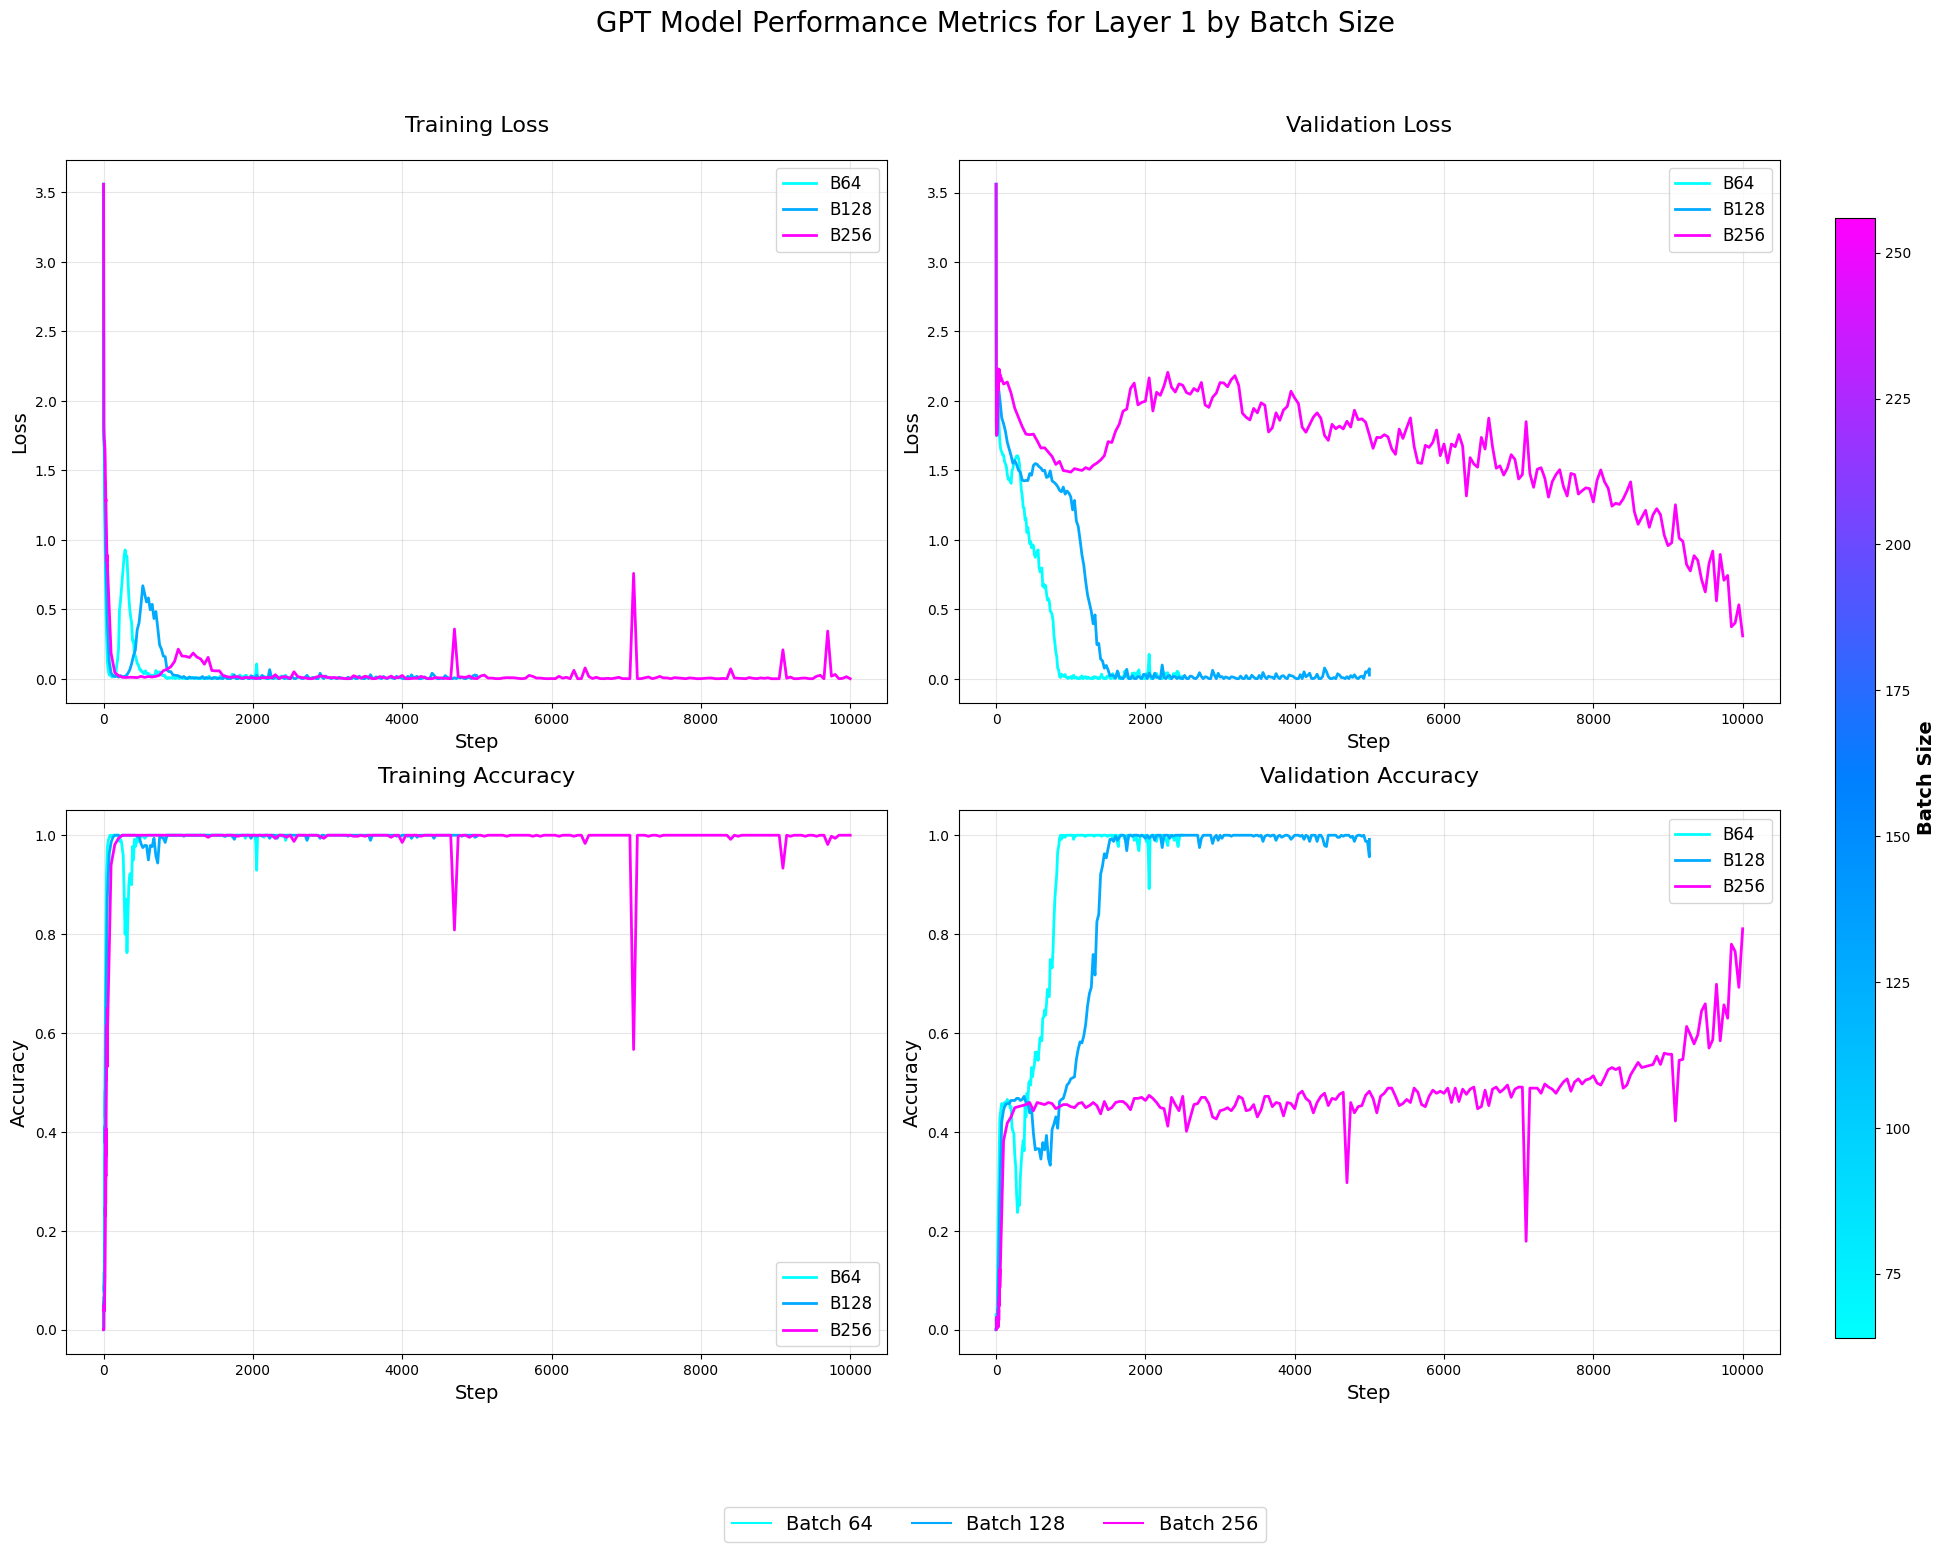

In [ ]:
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from collections import defaultdict
from matplotlib.lines import Line2D

# Base directory containing the logs
base_dir = "/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt"

# Configuration parameters
layer = 1  # Only use layer 1
batch_sizes = [64, 128, 256]  # 2^6=64, 2^7=128, 2^8=256

# Initialize dictionaries to store paths and metrics
file_paths = defaultdict(list)
metrics = defaultdict(dict)

def to_np(x):
    """Convert torch.Tensors or lists to numpy arrays"""
    if isinstance(x, torch.Tensor):
        return x.cpu().numpy()
    elif isinstance(x, list):
        return np.array(x)
    return x

# Collect all the log file paths for layer 1 only
for b in batch_sizes:
    # Construct the path pattern
    dir_path = os.path.join(base_dir, f"layer_{layer}", f"b={b}")

    # Find all subdirectories (like '0/', '1/', etc.)
    try:
        subdirs = [d for d in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, d))]
    except FileNotFoundError:
        print(f"Directory not found: {dir_path}")
        continue

    for subdir in subdirs:
        # Try multiple possible filename patterns
        possible_files = [
            os.path.join(dir_path, subdir, f"B={b}.pth"),
            os.path.join(dir_path, subdir, f"B={b}_L={layer}.pth"),
            os.path.join(dir_path, subdir, f"b={b}.pth")
        ]

        for file_path in possible_files:
            if os.path.exists(file_path):
                file_paths[b].append(file_path)
                break  # Use the first valid file found

# Extract metrics for all found files
for b, paths in file_paths.items():
    for path in paths:
        try:
            data = torch.load(path, map_location=torch.device('cpu'))

            # Verify the expected keys are present
            if not all(k in data for k in ['train', 'test', 'steps_epoch']):
                print(f"Unexpected data format in {path}")
                continue

            # Convert all metrics to numpy arrays
            processed_data = {
                'train_loss': to_np(data['train']['loss']),
                'val_loss': to_np(data['test']['loss']),
                'train_acc': to_np(data['train']['accuracy']),
                'val_acc': to_np(data['test']['accuracy']),
                'steps': to_np(list(data['steps_epoch'].values()))
            }
            metrics[b] = processed_data
        except Exception as e:
            print(f"Error processing {path}: {e}")

# Create visualization if we found any valid data
if not metrics:
    print("No valid data found to plot!")
else:
    # Create a custom colormap for batch sizes
    colors = ["#00FFFF", "#0080FF", "#FF00FF"]  # Cyan → Blue → Magenta
    cmap = LinearSegmentedColormap.from_list("batch_cmap", colors)
    norm = plt.Normalize(min(batch_sizes), max(batch_sizes))

    # Create a 2x2 grid of plots
    fig, axs = plt.subplots(2, 2, figsize=(20, 16))
    plot_titles = ['Training Loss', 'Validation Loss', 'Training Accuracy', 'Validation Accuracy']
    plot_keys = ['train_loss', 'val_loss', 'train_acc', 'val_acc']

    # Plot each metric in its respective subplot
    for i, (title, key) in enumerate(zip(plot_titles, plot_keys)):
        row, col = i // 2, i % 2
        ax = axs[row, col]

        for b, data in metrics.items():
            if data and len(data[key]) > 0:
                color = cmap(norm(b))
                steps = data['steps'][:len(data[key])]

                ax.plot(steps, data[key][:len(steps)],
                        color=color,
                        linewidth=2,
                        label=f'B{b}')

        ax.set_title(title, fontsize=16, pad=20)
        ax.set_xlabel('Step', fontsize=14)
        ax.set_ylabel('Loss' if 'loss' in key else 'Accuracy', fontsize=14)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=12)

    # Create custom legend for batch sizes
    legend_handles = []
    # Batch size color examples
    for b in batch_sizes:
        legend_handles.append(Line2D([0], [0],
                               color=cmap(norm(b)),
                               label=f'Batch {b}'))

    # Add the legend to the figure
    fig.legend(handles=legend_handles,
               loc='upper center',
               bbox_to_anchor=(0.5, 0.05),
               ncol=len(batch_sizes),
               fontsize=14)

    # Add colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.set_label('Batch Size', fontsize=14, weight='bold')

    # Add main title
    fig.suptitle('GPT Model Performance Metrics for Layer 1 by Batch Size', fontsize=20, y=0.98)

    plt.tight_layout(rect=[0, 0.1, 0.9, 0.95])
    plt.show()

<ipython-input-46-690c4877cee3>:135: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 0.9, 0.95])


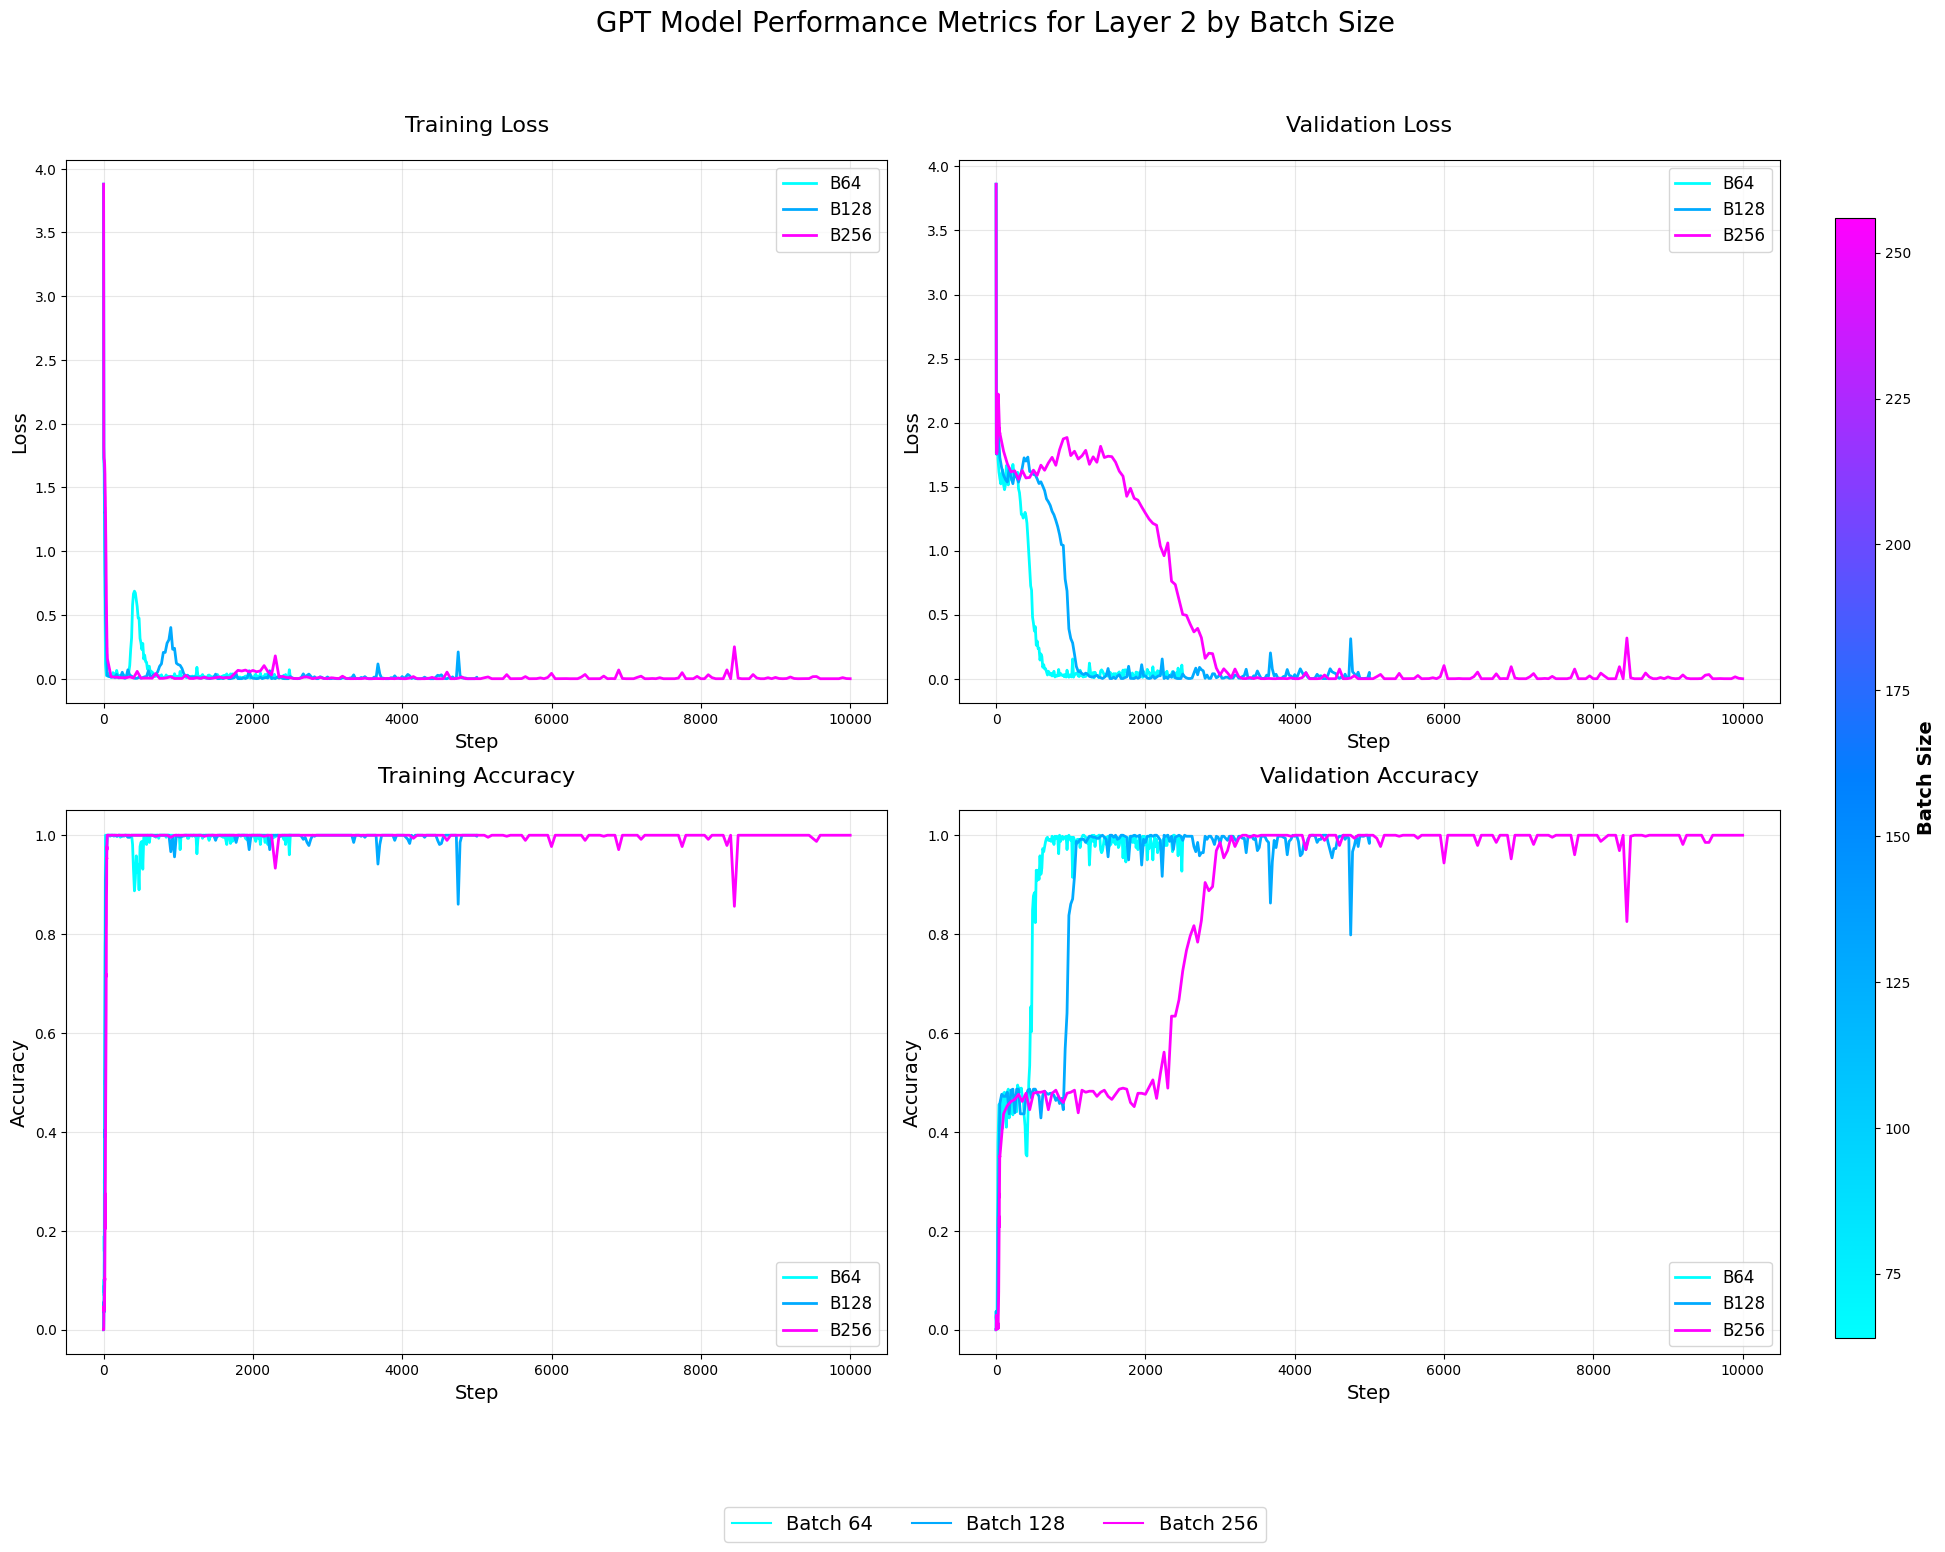

In [ ]:
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from collections import defaultdict
from matplotlib.lines import Line2D

# Base directory containing the logs
base_dir = "/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt"

# Configuration parameters
layer = 2  # Only use layer 1
batch_sizes = [64, 128, 256]  # 2^6=64, 2^7=128, 2^8=256

# Initialize dictionaries to store paths and metrics
file_paths = defaultdict(list)
metrics = defaultdict(dict)

def to_np(x):
    """Convert torch.Tensors or lists to numpy arrays"""
    if isinstance(x, torch.Tensor):
        return x.cpu().numpy()
    elif isinstance(x, list):
        return np.array(x)
    return x

# Collect all the log file paths for layer 1 only
for b in batch_sizes:
    # Construct the path pattern
    dir_path = os.path.join(base_dir, f"layer_{layer}", f"b={b}")

    # Find all subdirectories (like '0/', '1/', etc.)
    try:
        subdirs = [d for d in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, d))]
    except FileNotFoundError:
        print(f"Directory not found: {dir_path}")
        continue

    for subdir in subdirs:
        # Try multiple possible filename patterns
        possible_files = [
            os.path.join(dir_path, subdir, f"B={b}.pth"),
            os.path.join(dir_path, subdir, f"B={b}_L={layer}.pth"),
            os.path.join(dir_path, subdir, f"b={b}.pth")
        ]

        for file_path in possible_files:
            if os.path.exists(file_path):
                file_paths[b].append(file_path)
                break  # Use the first valid file found

# Extract metrics for all found files
for b, paths in file_paths.items():
    for path in paths:
        try:
            data = torch.load(path, map_location=torch.device('cpu'))

            # Verify the expected keys are present
            if not all(k in data for k in ['train', 'test', 'steps_epoch']):
                print(f"Unexpected data format in {path}")
                continue

            # Convert all metrics to numpy arrays
            processed_data = {
                'train_loss': to_np(data['train']['loss']),
                'val_loss': to_np(data['test']['loss']),
                'train_acc': to_np(data['train']['accuracy']),
                'val_acc': to_np(data['test']['accuracy']),
                'steps': to_np(list(data['steps_epoch'].values()))
            }
            metrics[b] = processed_data
        except Exception as e:
            print(f"Error processing {path}: {e}")

# Create visualization if we found any valid data
if not metrics:
    print("No valid data found to plot!")
else:
    # Create a custom colormap for batch sizes
    colors = ["#00FFFF", "#0080FF", "#FF00FF"]  # Cyan → Blue → Magenta
    cmap = LinearSegmentedColormap.from_list("batch_cmap", colors)
    norm = plt.Normalize(min(batch_sizes), max(batch_sizes))

    # Create a 2x2 grid of plots
    fig, axs = plt.subplots(2, 2, figsize=(20, 16))
    plot_titles = ['Training Loss', 'Validation Loss', 'Training Accuracy', 'Validation Accuracy']
    plot_keys = ['train_loss', 'val_loss', 'train_acc', 'val_acc']

    # Plot each metric in its respective subplot
    for i, (title, key) in enumerate(zip(plot_titles, plot_keys)):
        row, col = i // 2, i % 2
        ax = axs[row, col]

        for b, data in metrics.items():
            if data and len(data[key]) > 0:
                color = cmap(norm(b))
                steps = data['steps'][:len(data[key])]

                ax.plot(steps, data[key][:len(steps)],
                        color=color,
                        linewidth=2,
                        label=f'B{b}')

        ax.set_title(title, fontsize=16, pad=20)
        ax.set_xlabel('Step', fontsize=14)
        ax.set_ylabel('Loss' if 'loss' in key else 'Accuracy', fontsize=14)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=12)

    # Create custom legend for batch sizes
    legend_handles = []
    # Batch size color examples
    for b in batch_sizes:
        legend_handles.append(Line2D([0], [0],
                               color=cmap(norm(b)),
                               label=f'Batch {b}'))

    # Add the legend to the figure
    fig.legend(handles=legend_handles,
               loc='upper center',
               bbox_to_anchor=(0.5, 0.05),
               ncol=len(batch_sizes),
               fontsize=14)

    # Add colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.set_label('Batch Size', fontsize=14, weight='bold')

    # Add main title
    fig.suptitle('GPT Model Performance Metrics for Layer 2 by Batch Size', fontsize=20, y=0.98)

    plt.tight_layout(rect=[0, 0.1, 0.9, 0.95])
    plt.show()

<ipython-input-47-82763853c100>:135: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 0.9, 0.95])


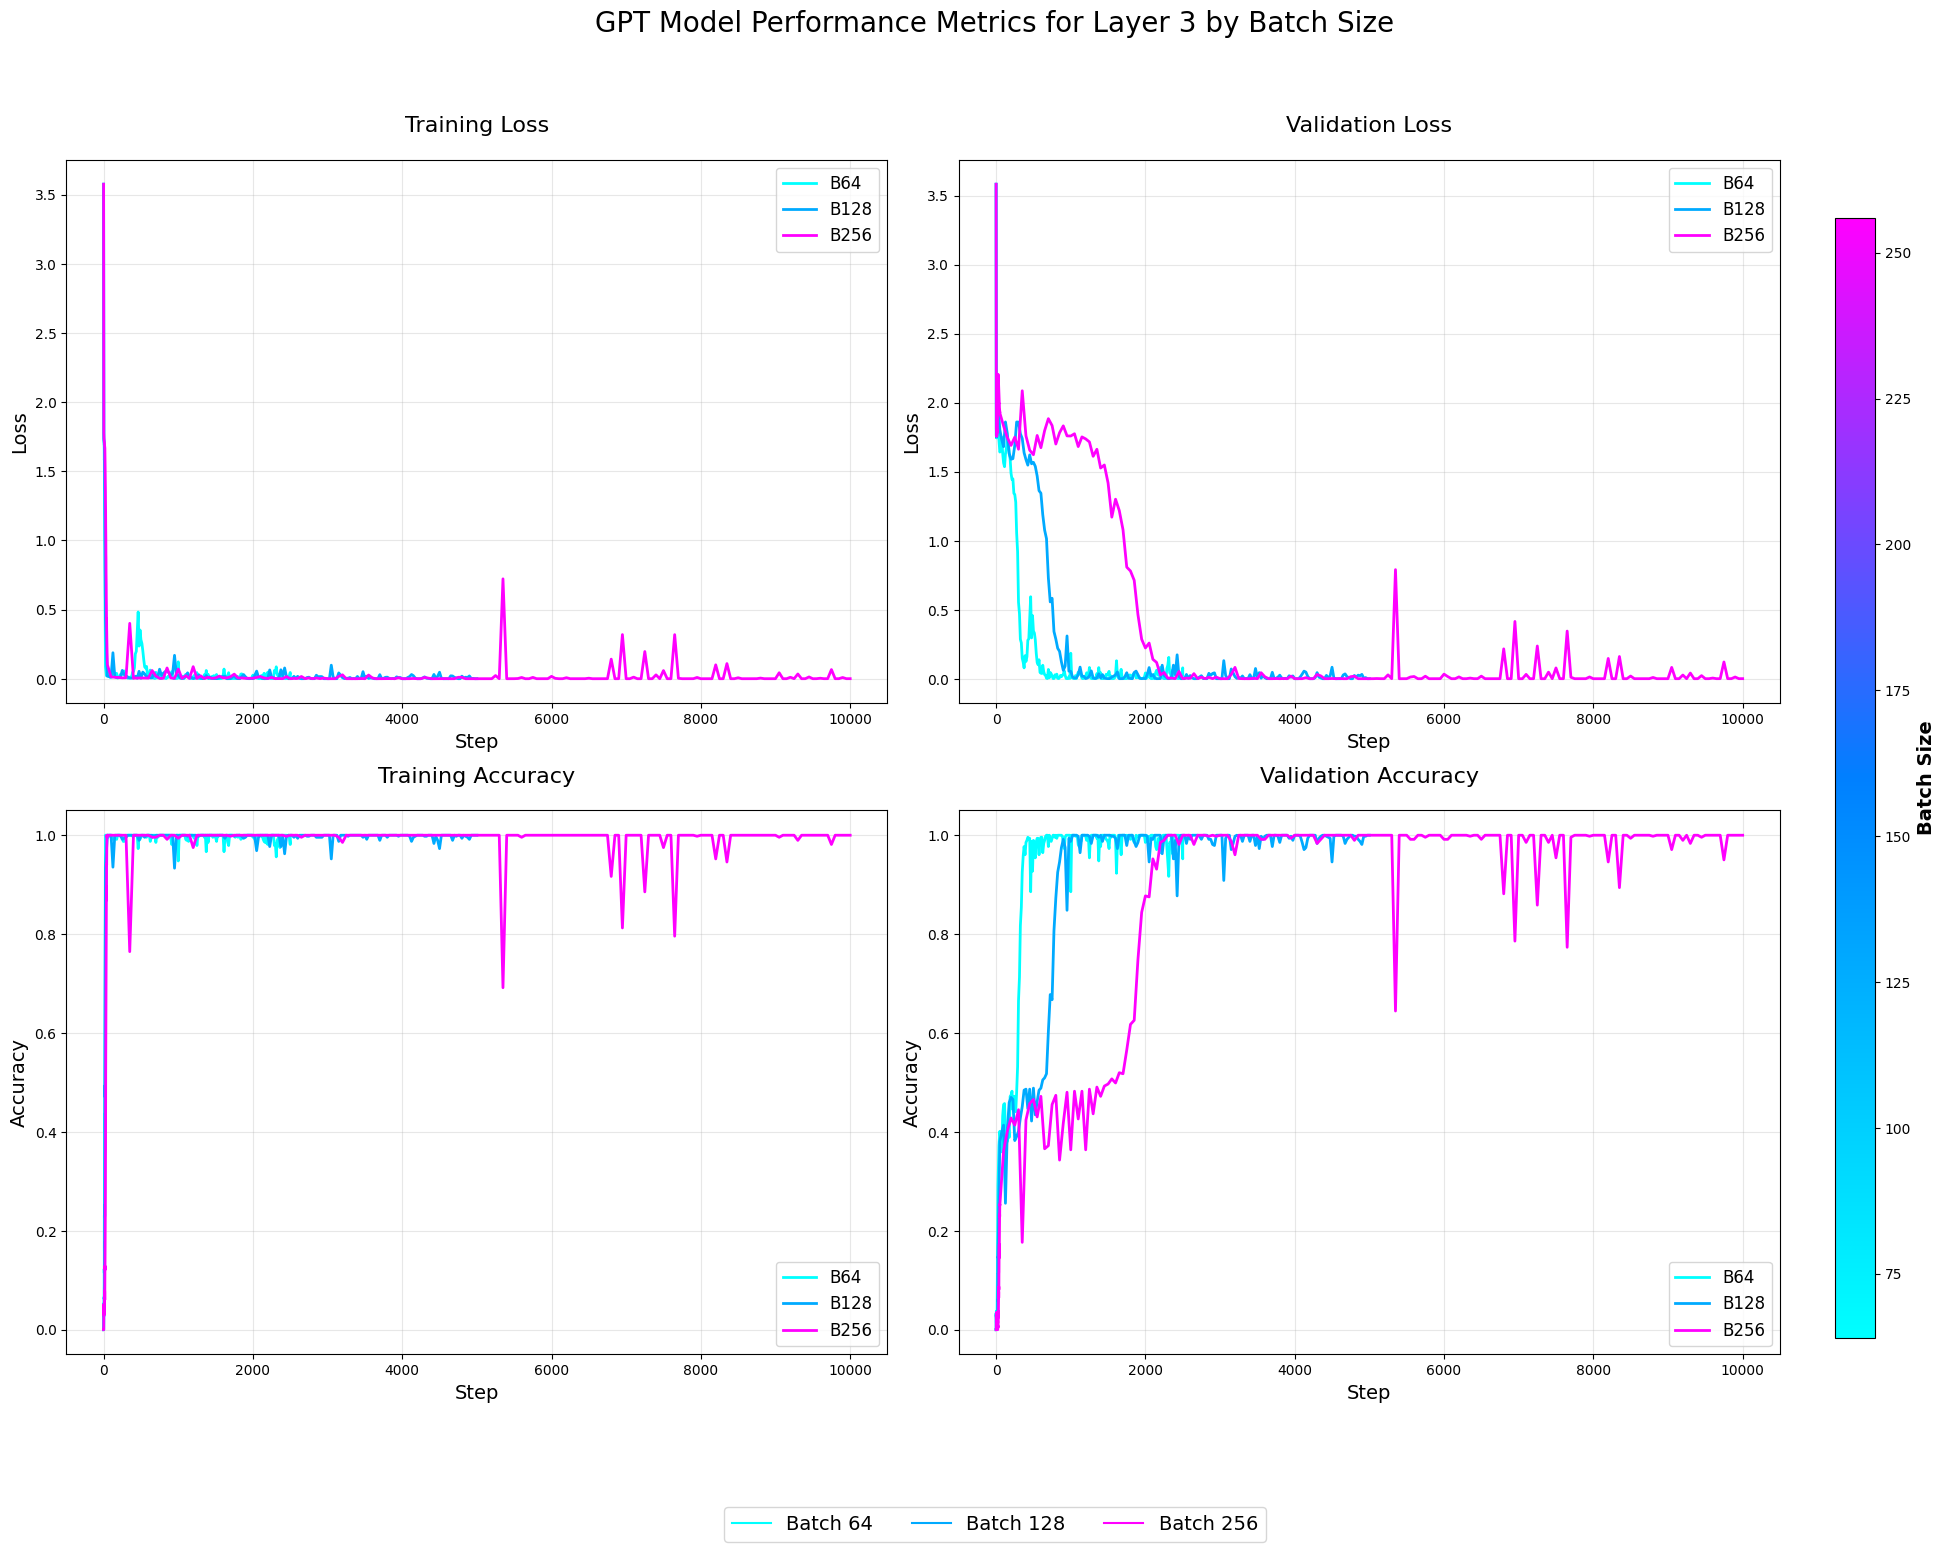

In [ ]:
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from collections import defaultdict
from matplotlib.lines import Line2D

# Base directory containing the logs
base_dir = "/content/gdrive/MyDrive/Colab Notebooks/IFT6135_W25_A2_release/logs/gpt"

# Configuration parameters
layer = 3 # Only use layer 1
batch_sizes = [64, 128, 256]  # 2^6=64, 2^7=128, 2^8=256

# Initialize dictionaries to store paths and metrics
file_paths = defaultdict(list)
metrics = defaultdict(dict)

def to_np(x):
    """Convert torch.Tensors or lists to numpy arrays"""
    if isinstance(x, torch.Tensor):
        return x.cpu().numpy()
    elif isinstance(x, list):
        return np.array(x)
    return x

# Collect all the log file paths for layer 1 only
for b in batch_sizes:
    # Construct the path pattern
    dir_path = os.path.join(base_dir, f"layer_{layer}", f"b={b}")

    # Find all subdirectories (like '0/', '1/', etc.)
    try:
        subdirs = [d for d in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, d))]
    except FileNotFoundError:
        print(f"Directory not found: {dir_path}")
        continue

    for subdir in subdirs:
        # Try multiple possible filename patterns
        possible_files = [
            os.path.join(dir_path, subdir, f"B={b}.pth"),
            os.path.join(dir_path, subdir, f"B={b}_L={layer}.pth"),
            os.path.join(dir_path, subdir, f"b={b}.pth")
        ]

        for file_path in possible_files:
            if os.path.exists(file_path):
                file_paths[b].append(file_path)
                break  # Use the first valid file found

# Extract metrics for all found files
for b, paths in file_paths.items():
    for path in paths:
        try:
            data = torch.load(path, map_location=torch.device('cpu'))

            # Verify the expected keys are present
            if not all(k in data for k in ['train', 'test', 'steps_epoch']):
                print(f"Unexpected data format in {path}")
                continue

            # Convert all metrics to numpy arrays
            processed_data = {
                'train_loss': to_np(data['train']['loss']),
                'val_loss': to_np(data['test']['loss']),
                'train_acc': to_np(data['train']['accuracy']),
                'val_acc': to_np(data['test']['accuracy']),
                'steps': to_np(list(data['steps_epoch'].values()))
            }
            metrics[b] = processed_data
        except Exception as e:
            print(f"Error processing {path}: {e}")

# Create visualization if we found any valid data
if not metrics:
    print("No valid data found to plot!")
else:
    # Create a custom colormap for batch sizes
    colors = ["#00FFFF", "#0080FF", "#FF00FF"]  # Cyan → Blue → Magenta
    cmap = LinearSegmentedColormap.from_list("batch_cmap", colors)
    norm = plt.Normalize(min(batch_sizes), max(batch_sizes))

    # Create a 2x2 grid of plots
    fig, axs = plt.subplots(2, 2, figsize=(20, 16))
    plot_titles = ['Training Loss', 'Validation Loss', 'Training Accuracy', 'Validation Accuracy']
    plot_keys = ['train_loss', 'val_loss', 'train_acc', 'val_acc']

    # Plot each metric in its respective subplot
    for i, (title, key) in enumerate(zip(plot_titles, plot_keys)):
        row, col = i // 2, i % 2
        ax = axs[row, col]

        for b, data in metrics.items():
            if data and len(data[key]) > 0:
                color = cmap(norm(b))
                steps = data['steps'][:len(data[key])]

                ax.plot(steps, data[key][:len(steps)],
                        color=color,
                        linewidth=2,
                        label=f'B{b}')

        ax.set_title(title, fontsize=16, pad=20)
        ax.set_xlabel('Step', fontsize=14)
        ax.set_ylabel('Loss' if 'loss' in key else 'Accuracy', fontsize=14)
        ax.grid(True, alpha=0.3)
        ax.legend(fontsize=12)

    # Create custom legend for batch sizes
    legend_handles = []
    # Batch size color examples
    for b in batch_sizes:
        legend_handles.append(Line2D([0], [0],
                               color=cmap(norm(b)),
                               label=f'Batch {b}'))

    # Add the legend to the figure
    fig.legend(handles=legend_handles,
               loc='upper center',
               bbox_to_anchor=(0.5, 0.05),
               ncol=len(batch_sizes),
               fontsize=14)

    # Add colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.set_label('Batch Size', fontsize=14, weight='bold')

    # Add main title
    fig.suptitle('GPT Model Performance Metrics for Layer 3 by Batch Size', fontsize=20, y=0.98)

    plt.tight_layout(rect=[0, 0.1, 0.9, 0.95])
    plt.show()